In [2]:
f = open("../Data/images/63빌딩.jpg","r")
data = f.read()
print(data)
f.close

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [3]:
from PIL import Image

In [6]:
image = Image.open("../Data/images/63빌딩.jpg")

# 이미지 보기
image.show()

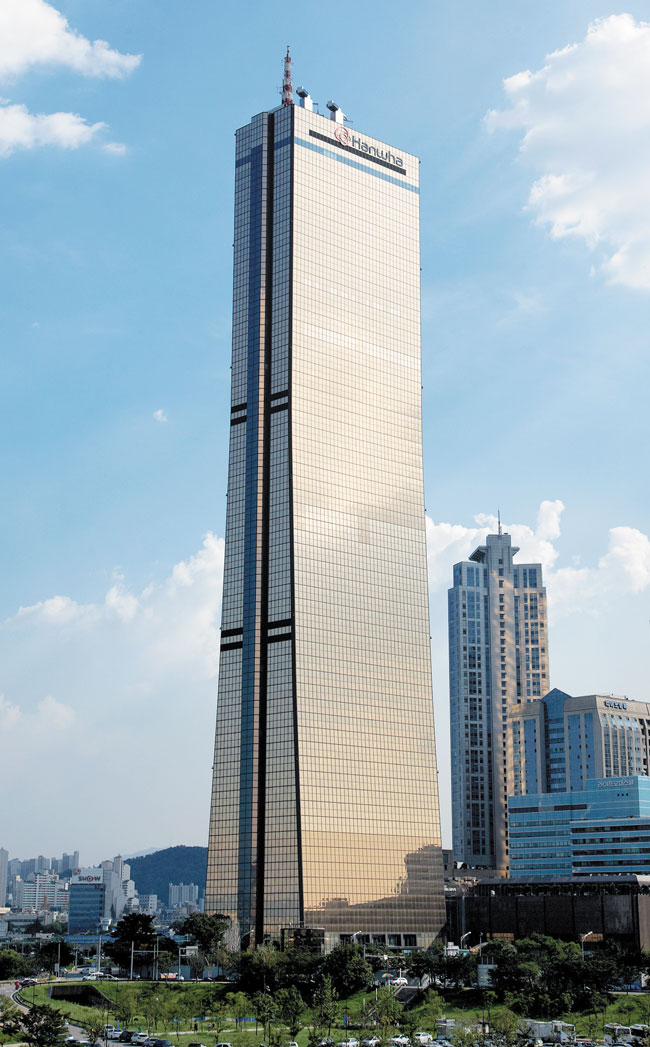

In [7]:
image

In [13]:
  
from urllib.request import urlopen,Request   
from urllib.parse import urlencode, quote_plus  
    
url = "http://api.vworld.kr/ned/wms/AdresSpceService"    
queryParams = "?" + urlencode({ quote_plus("key") : "06F7E9C5-FCFD-30A8-921D-E9C9EB0A23F1"   
                               , quote_plus("domain") : "도메인"   
                               , quote_plus("layers") : "dt_d001_sig" #/* 화면에 표출할 레이어명의 나열, 값은 쉼표로 구분(layer : dt_d001_sig,dt_d001_emd,dt_d001_lio) */  
                               , quote_plus("crs") : "EPSG:4326" #/* 좌표 체계(산출물을 위한 SRS) */  
                               , quote_plus("bbox") : "37.4672284355348,127.043997521728,37.4976286396027,127.081424518082" #/* 크기(extent)를 정의하는 범위(bounding box)(xmin,ymin,xmax,ymax)<span class="red">예외) EPSG:4326, EPSG:5185, EPSG:5186, EPSG:5187, EPSG:5188</span> 경우 (ymin,xmin,ymax,xmax) */  
                               , quote_plus("width") : "915" #/* 반환 이미지의 너비(픽셀) */  
                               , quote_plus("height") : "700" #/* 반환 이미지의 높이(픽셀) */  
                               , quote_plus("format") : "image/png" #/* 반환 이미지 형식(image/png 또는 image/jpeg 또는 image/gif) */  
                               , quote_plus("transparent") : "false" #/* 반환 이미지 배경의 투명 여부(true 또는 false[기본값]) */  
                               , quote_plus("bgcolor") : "0xFFFFFF" #/* 반환 이미지의 배경색(0xRRGGBB) */  
                               , quote_plus("exceptions") : "blank"  
                                })   
    
request = Request(url + queryParams)    
request.get_method = lambda: "GET"    
response_body = urlopen(request).read()    
print (response_body) 
    
 #var_dump($response);    
    

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x93\x00\x00\x02\xbc\x08\x02\x00\x00\x00\xfd\x00|\x89\x00\x00]PIDATx^\xed\xdd\x8f\x9fUU\xbd7\xf0\xfeF\x07D\x13\x151\xf2G\xe6oK3J3\xbb^-3M\xcb,\xcb\xab\xf9\xe8c\xa5=z\xbd\x96\xcfcz\x95\xdf\xbf\x11\xf9!\x08\x82\x10A\x80B \xa1\xd6}>\xe3\xc2\xed4\xc00s\xe6\x9c9g\x9d\xfd\xee\xc5\x8b\xd74s\xce\xde\xdf\xfd^\xcb3\x1f\xd6^{\xad/\xfc\x8f\xff\x11 @\x80\x00\x01\x02\x04\x08\x10\xa8A\xe0\x0b5\x14\xa9F\x02\x04\x08\x10 @\x80\x00\x01\x02\xff#\xb9\xea\x04\x04\x08\x10 @\x80\x00\x01\x02u\x08H\xaeu\xb4\x93*\t\x10 @\x80\x00\x01\x02\x04$W}\x80\x00\x01\x02\x04\x08\x10 @\xa0\x0e\x01\xc9\xb5\x8evR%\x01\x02\x04\x08\x10 @\x80\x80\xe4\xaa\x0f\x10 @\x80\x00\x01\x02\x04\x08\xd4! \xb9\xd6\xd1N\xaa$@\x80\x00\x01\x02\x04\x08\x10\x90\\\xf5\x01\x02\x04\x08\x10 @\x80\x00\x81:\x04$\xd7:\xdaI\x95\x04\x08\x10 @\x80\x00\x01\x02\x92\xab>@\x80\x00\x01\x02\x04\x08\x10 P\x87\x80\xe4ZG;\xa9\x92\x00\x01\x02\x04\x08\x10 @@r\xd5\x07\x08\x10 @\x80\x00\x01\x02\x04\xea\x10\x90\\\xebh\'U\x

<function dict.values>

In [40]:
def style_function(feature):
    return {
        'fillColor': '#ff0000',  # 채우기 색상 (여기서는 빨간색)
        'color': '#000000',      # 테두리 색상 (여기서는 검은색)
        'weight': 1,             # 테두리 두께
        'fillOpacity': 0.5       # 채우기 불투명도
    }

In [91]:
import folium
import json
from folium.plugins import MousePosition
from folium.plugins import Search
from folium.plugins import FloatImage
# GeoJSON 데이터 파일 경로
geojson_file = "Data/json/korea_map.json"

# 폴리움 맵 객체 생성
m = folium.Map(location=[37.5, 127], zoom_start=7)

# GeoJSON 파일 열기
with open("../Data/json/korea_map.json", "r") as f:
    geojson_data = json.load(f)

style_function = lambda feature: {
    #'fillColor': 'white',  # 예시 채우기 색상
    'color': 'black',  # 경계선 색상
    'weight': 1,  # 경계선 굵기 (얇게 설정)
    'fillOpacity': 0.1,  # 채우기 불투명도
}

# GeoJSON 데이터를 폴리움 객체로 변환하여 맵에 추가
ser = folium.GeoJson(
    geojson_data,
    name="geojson",
    
    style_function=style_function
).add_to(m)
MousePosition().add_to(m)

statesearch = Search(
    layer=ser,
    geom_type="Polygon",
    placeholder="지역 검색",
    collapsed=False,
    search_label='CTP_KOR_NM',
    weight=10,

).add_to(m)


url = (" https://raw.githubusercontent.com/ocefpaf/secoora_assets_map/"
    "a250729bbcf2ddd12f46912d36c33f7539131bec/secoora_icons/rose.png")
FloatImage(url, bottom=65, left=80).add_to(m)

css = """
<style>
    .leaflet-control-search {
        width: 250px;
    }
    .leaflet-control-search input {
        width: 200px;
    }
</style>
"""

m.get_root().html.add_child(folium.Element(css))

m

In [36]:
geojson_data.keys()

dict_keys(['type', 'features'])

In [46]:
geojson_data['properties']['CTP_KOR_NM']

KeyError: 'properties'

In [47]:
geojson_data.properties

AttributeError: 'dict' object has no attribute 'properties'

In [50]:
geojson_data['features']

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[127.10764676633492, 38.28991192876396],
      [127.10370663715548, 38.28900167553917],
      [127.10536980254686, 38.28684490349956],
      [127.10764676633492, 38.28991192876396]]],
    [[[127.15006852493241, 38.30705488622532],
      [127.15116104007485, 38.30513279120003],
      [127.14976077845085, 38.303648603776956],
      [127.15101492687698, 38.299676940085455],
      [127.15463952393084, 38.298803327536405],
      [127.15466641186042, 38.30054990845676],
      [127.15875983095725, 38.300513891822575],
      [127.16046729545833, 38.3025894670074],
      [127.16444350951325, 38.30146554071825],
      [127.16608789278534, 38.302647121120245],
      [127.16690009365361, 38.30796589936082],
      [127.16043523428813, 38.30572181305675],
      [127.15763033115607, 38.305643607182304],
      [127.15547279900574, 38.30402607303847],
      [127.15231643380382, 38.304443151893466],
      [127.1500685249324

In [65]:
features_list

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [64]:
features_list = []
for feature in geojson_data['features']:
    properties = feature['properties']
    ctp_kor_nm = properties['CTP_KOR_NM']

    features_list.append(ctp_kor_nm)



In [56]:
features_list

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[127.10764676633492, 38.28991192876396],
      [127.10370663715548, 38.28900167553917],
      [127.10536980254686, 38.28684490349956],
      [127.10764676633492, 38.28991192876396]]],
    [[[127.15006852493241, 38.30705488622532],
      [127.15116104007485, 38.30513279120003],
      [127.14976077845085, 38.303648603776956],
      [127.15101492687698, 38.299676940085455],
      [127.15463952393084, 38.298803327536405],
      [127.15466641186042, 38.30054990845676],
      [127.15875983095725, 38.300513891822575],
      [127.16046729545833, 38.3025894670074],
      [127.16444350951325, 38.30146554071825],
      [127.16608789278534, 38.302647121120245],
      [127.16690009365361, 38.30796589936082],
      [127.16043523428813, 38.30572181305675],
      [127.15763033115607, 38.305643607182304],
      [127.15547279900574, 38.30402607303847],
      [127.15231643380382, 38.304443151893466],
      [127.1500685249324

In [61]:
import folium
import json

# GeoJSON 데이터 파일 경로
geojson_file = "Data/json/korea_map.json"

# 폴리움 맵 객체 생성
m = folium.Map(location=[37.5, 127], zoom_start=7)

# GeoJSON 파일 열기
with open("../Data/json/korea_map.json", "r") as f:
    geojson_data = json.load(f)

# GeoJSON 데이터를 폴리움 객체로 변환하여 맵에 추가
folium.GeoJson(
    features_list,
    name="geojson",
    #style_function=style_function
).add_to(m)

m

ValueError: Cannot render objects with any missing geometries: [{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[127.10764676633492, 38.28991192876396], [127.10370663715548, 38.28900167553917], [127.10536980254686, 38.28684490349956], [127.10764676633492, 38.28991192876396]]], [[[127.15006852493241, 38.30705488622532], [127.15116104007485, 38.30513279120003], [127.14976077845085, 38.303648603776956], [127.15101492687698, 38.299676940085455], [127.15463952393084, 38.298803327536405], [127.15466641186042, 38.30054990845676], [127.15875983095725, 38.300513891822575], [127.16046729545833, 38.3025894670074], [127.16444350951325, 38.30146554071825], [127.16608789278534, 38.302647121120245], [127.16690009365361, 38.30796589936082], [127.16043523428813, 38.30572181305675], [127.15763033115607, 38.305643607182304], [127.15547279900574, 38.30402607303847], [127.15231643380382, 38.304443151893466], [127.15006852493241, 38.30705488622532]]], [[[127.80796676428463, 38.314572978429446], [127.80718167852746, 38.31262240541992], [127.80368331015252, 38.312088798641724], [127.80339292354127, 38.30996159091698], [127.8067782253687, 38.30902983508849], [127.80798111761614, 38.30680732698181], [127.80631330518406, 38.30541635152286], [127.8086273110223, 38.302877773061454], [127.81090058768571, 38.304607038834476], [127.8112706739889, 38.306850637010555], [127.81332753029955, 38.309776138223114], [127.81664225161876, 38.3085149569541], [127.81522896572419, 38.3060605032733], [127.81651291427761, 38.30363262801016], [127.81994055736418, 38.3044246859733], [127.8204720799941, 38.301571126599164], [127.81931934891051, 38.29622620221989], [127.81739796407487, 38.29704967316056], [127.81511274878598, 38.29443698410604], [127.81443945369179, 38.291751588244026], [127.81888526760926, 38.29433921517805], [127.82017150480019, 38.296276398949765], [127.82091975761558, 38.30438869838276], [127.81992277432855, 38.30618043701801], [127.81444518116629, 38.31095167754886], [127.80796676428463, 38.314572978429446]]], [[[127.80374796213638, 38.31679798739641], [127.79797185767377, 38.31434251733178], [127.79587763825072, 38.3116088456187], [127.79378679524692, 38.31069364735629], [127.78923816364036, 38.31101876808626], [127.78799221202227, 38.30804528389949], [127.78874685816555, 38.30661990809823], [127.79317742330461, 38.306557147875985], [127.79510460405476, 38.30779236828097], [127.79560885717099, 38.31039433337329], [127.79788766502313, 38.31326733585828], [127.80374796213638, 38.31679798739641]]], [[[127.3247664127154, 38.32087680908447], [127.32470852255038, 38.31881979691542], [127.32683310094954, 38.31649977162351], [127.33158720198274, 38.316627504972786], [127.33541543470257, 38.313481888458206], [127.34066435495102, 38.31486157660229], [127.34257095983111, 38.31279502101264], [127.34513162899405, 38.31251615351416], [127.34724277124971, 38.310297026630735], [127.34906767160048, 38.30984343389153], [127.3529916137843, 38.30399813878839], [127.35600729531365, 38.30651168412713], [127.35824440061108, 38.30972277541988], [127.35742245766316, 38.31099401140283], [127.35355251985553, 38.31177904855134], [127.3523313840719, 38.310556351605264], [127.3472712162402, 38.313458861357965], [127.34473768339005, 38.31426938965515], [127.34339512694454, 38.3166917555997], [127.33762740023532, 38.31858193408117], [127.33816998824692, 38.31670871508764], [127.33667367968867, 38.315250590069446], [127.33332632719471, 38.317007774275496], [127.33129543105548, 38.320026665298776], [127.32823889146003, 38.318347368404034], [127.3248507541268, 38.31968397944117], [127.3247664127154, 38.32087680908447]]], [[[127.48787553282456, 38.32502058751349], [127.48553534651874, 38.32680673474258], [127.48515415277943, 38.328384052203816], [127.48212675760473, 38.32770166064584], [127.48366343975142, 38.32468390055255], [127.48696562872331, 38.32359285703887], [127.48792541643905, 38.32150527084531], [127.48979689625646, 38.32191670408604], [127.48987128065673, 38.32433187369115], [127.48787553282456, 38.32502058751349]]], [[[127.34695351771583, 38.329065483976024], [127.35017142269531, 38.32749090488893], [127.35530425737929, 38.327547876788806], [127.36038968256156, 38.32129492057822], [127.36208315028934, 38.32380021136817], [127.35530443619282, 38.3275843426555], [127.35021401254421, 38.32752703824078], [127.34695351771583, 38.329065483976024]]], [[[127.71377950605816, 38.33393299957184], [127.71098189844149, 38.33372080501138], [127.71198803718465, 38.33083104421574], [127.71367445808154, 38.33083613901864], [127.71377950605816, 38.33393299957184]]], [[[127.70979307922654, 38.33481371801233], [127.70604028346756, 38.334651203829736], [127.70610183574715, 38.331539732644], [127.70859831708444, 38.33043438785286], [127.71147026960509, 38.326714937939975], [127.71374147329833, 38.32835486824785], [127.70898311920037, 38.332350526587206], [127.70979307922654, 38.33481371801233]]], [[[127.70247453770094, 38.336131844251305], [127.7004064672789, 38.33615788928076], [127.69752917034414, 38.334745082384146], [127.69507532534796, 38.33189701744611], [127.69386891221308, 38.32873600614661], [127.69142009658509, 38.325443059646865], [127.68559745229535, 38.324006371332956], [127.68772886408227, 38.3160653950613], [127.68866146935733, 38.31479226666739], [127.69372056506586, 38.31906299047035], [127.69563573426099, 38.318865122339055], [127.6971553838019, 38.32114853082156], [127.69472091836332, 38.326263026075296], [127.69815199378623, 38.32591955112357], [127.69881246210267, 38.328164127044694], [127.70047410795065, 38.32892421569601], [127.7065770064942, 38.32891303019743], [127.70733240615813, 38.33095648145116], [127.70523051075916, 38.33173636882653], [127.70581127711117, 38.3349134583238], [127.70247453770094, 38.336131844251305]]], [[[128.0438255500856, 38.33631108686339], [128.04309343101164, 38.332473833370706], [128.04361010292652, 38.33067143571428], [128.04274445183069, 38.327856381581235], [128.04024379699902, 38.326709322983426], [128.03976159022363, 38.324403243153895], [128.04030300569542, 38.31900237642829], [128.03823315440764, 38.315308451673346], [128.03931521091266, 38.31209067141979], [128.03714595253206, 38.31060507221084], [128.03433667172388, 38.31174008178717], [128.0308467615847, 38.3115568186807], [128.03343358001428, 38.31490537323534], [128.0333873710507, 38.316809829065065], [128.0293019900875, 38.32029869585367], [128.02811124152618, 38.31770499594911], [128.0306357838671, 38.31533885314415], [128.0297870516554, 38.31278835384763], [128.03043514936368, 38.31112804415458], [128.03636605762074, 38.309903309974665], [128.03725815309443, 38.30704049372631], [128.0358131506015, 38.30443530358301], [128.0374323709831, 38.30071810013999], [128.04376991885292, 38.297551460730105], [128.04531304510084, 38.298632126492684], [128.044283056183, 38.30169183993446], [128.04403649355007, 38.30959238719351], [128.03984254995044, 38.31496482479203], [128.04158265317085, 38.32021992299934], [128.04140118626185, 38.32290543514741], [128.04273448152566, 38.32626255567079], [128.04447313891896, 38.327437057694596], [128.04318022229094, 38.33308172094134], [128.0438255500856, 38.33631108686339]]], [[[127.77560223807073, 38.338665702497885], [127.77469097222463, 38.34051594340687], [127.77221848038118, 38.339968006694306], [127.7712192609252, 38.33798349960882], [127.77315460340763, 38.33632042421557], [127.77560223807073, 38.338665702497885]]], [[[127.74608334321088, 38.34213602271774], [127.7419785543933, 38.34124910611375], [127.74070630193118, 38.339978868683666], [127.73724256164431, 38.3395146123664], [127.7353864336244, 38.34027518300894], [127.73262306141532, 38.33745979232872], [127.72865005902275, 38.3350208387013], [127.7233031520672, 38.33332330085037], [127.72018686230062, 38.33137189147923], [127.72308774560287, 38.329687653327085], [127.72567297988957, 38.33046145294338], [127.72796064558878, 38.32940381168953], [127.72909190535108, 38.331485511050445], [127.73140928752282, 38.33228751841598], [127.73402139560237, 38.33043453763189], [127.73584839905803, 38.331434124004026], [127.7388346677524, 38.33100154525136], [127.73975386752515, 38.33306753630359], [127.73382459535632, 38.33504164058382], [127.7397114291683, 38.33709128150896], [127.74265927480378, 38.33896321983373], [127.74608334321088, 38.34213602271774]]], [[[127.78142086788127, 38.34781536604692], [127.7787713982643, 38.34619170127511], [127.77735603091875, 38.34390397986946], [127.77983727425041, 38.343067558201824], [127.78585145966663, 38.34316654456257], [127.78484071966015, 38.346313469399036], [127.78142086788127, 38.34781536604692]]], [[[128.30718291332116, 38.478564000853765], [128.3018879870972, 38.47586016418294], [128.3029691074455, 38.473552914726206], [128.30699094514344, 38.47757312546316], [128.30718291332116, 38.478564000853765]]], [[[128.30223118612167, 38.487894462232255], [128.3050674634765, 38.492943044517006], [128.30368839611347, 38.49480331175999], [128.30158192743258, 38.49186880845386], [128.3011741293063, 38.489291434070324], [128.30223118612167, 38.487894462232255]]], [[[128.316158022749, 38.56053807729068], [128.31220665117718, 38.56036849300822], [128.3122614109299, 38.555518747785236], [128.31535354232648, 38.55860127351829], [128.316158022749, 38.56053807729068]]], [[[128.32326174569835, 38.573686595609495], [128.31998289840854, 38.57236531729927], [128.31528117961977, 38.56955516008251], [128.31212226667316, 38.5700850091459], [128.31222457015846, 38.56077706665202], [128.3144124392743, 38.560638329694314], [128.31502311628228, 38.56520593779071], [128.31690879963827, 38.56597388862356], [128.31951969122366, 38.57109521137433], [128.32326174569835, 38.573686595609495]]], [[[128.54880989369863, 38.30195082056222], [128.54770837052425, 38.305736140696006], [128.54235585997512, 38.30748601372841], [128.542500680246, 38.310998082152764], [128.5375827724249, 38.312737334052244], [128.53174026458612, 38.31755391413889], [128.53028807339916, 38.31998733620101], [128.52823150966032, 38.32096750403095], [128.52687161655632, 38.324347144999464], [128.52805785155067, 38.327921182669776], [128.5275968023611, 38.33237909414872], [128.52260418790615, 38.335013531192864], [128.51670027089855, 38.34082336743921], [128.5126705662088, 38.346258103462205], [128.5100128653238, 38.35233501133663], [128.51156036531708, 38.355742162809285], [128.50982659681577, 38.356583145118314], [128.50677168401347, 38.36124386036047], [128.5060309150307, 38.36362066614898], [128.50757052528084, 38.3659532323523], [128.51162663773846, 38.36808752869677], [128.51082239601797, 38.370189108950385], [128.51132834571538, 38.372461529208046], [128.50894144468913, 38.373047244654906], [128.50864295025613, 38.37547750158849], [128.50592146365707, 38.37541876947828], [128.5017630659979, 38.37972329015141], [128.49786520313148, 38.38268242258444], [128.49538032422655, 38.38386109254977], [128.49555365316874, 38.385271641015855], [128.4898052248229, 38.39082867773368], [128.4806240843636, 38.40046612660081], [128.477322258744, 38.40075043649798], [128.4761932264563, 38.40515444497191], [128.4708347352584, 38.411245286121726], [128.46339678843648, 38.42094201763671], [128.45995327016988, 38.42691988194506], [128.45579087293757, 38.43326940338538], [128.45458454177847, 38.43714117145035], [128.45475565013737, 38.444276876248836], [128.45586674406422, 38.44620094448518], [128.459732678845, 38.44865340548045], [128.4618250110319, 38.4488922013405], [128.4645177462472, 38.44713638710028], [128.46696944384405, 38.44997892498544], [128.46533637968025, 38.45275695949084], [128.46098120942023, 38.45491981649464], [128.45989248760958, 38.457435896365794], [128.45562254814624, 38.46067616248056], [128.45541894975023, 38.46240927145203], [128.4526429814913, 38.46378132354666], [128.44921275958842, 38.467927960973796], [128.4501527469576, 38.468616314485985], [128.44861084041273, 38.47196339888732], [128.44199343683024, 38.474415843268176], [128.43920687322145, 38.47681654180324], [128.43740988667145, 38.48095471333313], [128.4391249923671, 38.48453725031078], [128.43737104618785, 38.48747794158383], [128.43410622901163, 38.48730834285663], [128.430131838897, 38.49067501624944], [128.42880649093578, 38.49344761341296], [128.42970001678495, 38.496339905171396], [128.427553536916, 38.497405363076794], [128.424904554424, 38.50135101478183], [128.42896405483808, 38.50241693522091], [128.4286825567974, 38.50416440308646], [128.4243136946223, 38.50411215230322], [128.42099347972393, 38.506446494714574], [128.4202436825562, 38.508878502431365], [128.42106041389815, 38.510387296189165], [128.41854493346813, 38.51179529615303], [128.41933784294773, 38.51806821231016], [128.41839549220202, 38.52048121183244], [128.42291555022305, 38.520364850445006], [128.4229405474454, 38.52359597662687], [128.41877417949436, 38.523484295868336], [128.4167728681537, 38.52708321748926], [128.41204690357728, 38.531491133799506], [128.41234328800502, 38.53497873640761], [128.4102915796604, 38.537925660132885], [128.40719039281652, 38.54012907809983], [128.40511561413464, 38.542613611908145], [128.40511939132332, 38.54512410130781], [128.40768885004155, 38.54571601680249], [128.40953353514985, 38.54829357980518], [128.40787963883838, 38.549255808890926], [128.41106112951638, 38.55187472896882], [128.40991840015988, 38.552589818393095], [128.41084047487348, 38.55588118140249], [128.40789791330184, 38.5549026579761], [128.40478018732696, 38.555357750184484], [128.40307744233493, 38.56554968890127], [128.40106558889826, 38.56493077093258], [128.39705138979818, 38.56630487537774], [128.39454410530118, 38.569337250217465], [128.39395083852796, 38.572042648511754], [128.38964202810809, 38.573784806291485], [128.37967411123805, 38.58318110284666], [128.37752313446623, 38.58701852469106], [128.37204739210125, 38.590626041764985], [128.36933457435623, 38.59054347077124], [128.36997972645509, 38.588292466061944], [128.36578759662854, 38.5851702582335], [128.3608083840407, 38.58352889268142], [128.36242364978665, 38.582272396211124], [128.36449563176745, 38.58333260685491], [128.3679194215972, 38.58206059469693], [128.3668860504829, 38.58002287238462], [128.36736919705717, 38.57616428729374], [128.363535519689, 38.572260517627534], [128.3616657620603, 38.574471043705984], [128.3564877039481, 38.571768590067684], [128.353324483307, 38.56874790443573], [128.3487798208439, 38.57283692403454], [128.34578869216915, 38.57663450240744], [128.34241481201997, 38.57491370532252], [128.34283315375606, 38.57254712010045], [128.34089941211195, 38.57091854673673], [128.34349669203624, 38.56630921782978], [128.34365418295639, 38.56369904431769], [128.34717049722326, 38.560647670921405], [128.3486495076886, 38.5577041223213], [128.34745559221764, 38.5544298832602], [128.34580790796468, 38.55331244622602], [128.34583993037103, 38.55014181631899], [128.34702972152812, 38.546447843685335], [128.3460930018771, 38.545273846035855], [128.34692820734958, 38.541458489667754], [128.34829224583862, 38.5395163981199], [128.3465168368203, 38.53659222646247], [128.3418699294708, 38.535840963310264], [128.34125652298803, 38.530321026012444], [128.3347007659578, 38.52596638225182], [128.3348476536573, 38.522534534639796], [128.337889225328, 38.51805600386138], [128.3386141793126, 38.51517492742571], [128.34087300538073, 38.51064205342022], [128.3406798529289, 38.50553092357838], [128.34284152568114, 38.50254966675157], [128.34559822640108, 38.50061987486481], [128.34381092728302, 38.49692149571972], [128.34357886382122, 38.4941377099084], [128.3395924724799, 38.49171136936279], [128.34033725783334, 38.48670608772832], [128.33920919744097, 38.478895789593864], [128.33507998914789, 38.47762740918012], [128.332168318604, 38.47458082264707], [128.32580692023058, 38.47056451098977], [128.3271581906132, 38.468668750342694], [128.32023585626874, 38.46224523200227], [128.32048137269493, 38.45965375472773], [128.31929461607413, 38.4586141124024], [128.31953493294805, 38.45511815560631], [128.32079102355044, 38.45206656654614], [128.32080002604596, 38.44942708207719], [128.31811339561304, 38.44836149815721], [128.3163842594968, 38.44406386672352], [128.3164479274195, 38.44169682594071], [128.32010012518023, 38.43993903641947], [128.3208230162645, 38.43773781897805], [128.3227059258589, 38.43623755628287], [128.3237951379771, 38.43328505020027], [128.3185244305766, 38.430843157240076], [128.31422799996216, 38.42420488995934], [128.3098138731233, 38.42035823985993], [128.3068305602403, 38.41978839532053], [128.3027603580068, 38.42054971366721], [128.30238696566838, 38.42407267833407], [128.30001166459053, 38.42436354519049], [128.29864679565463, 38.426550210586015], [128.29648228265674, 38.42579602450974], [128.29369573222297, 38.42693770714617], [128.28877995642563, 38.427137726270566], [128.28702331630535, 38.42459217201058], [128.28437345135802, 38.426037220775896], [128.28454286173687, 38.42897367043601], [128.28606323524065, 38.434355281130756], [128.28560985000678, 38.436073979906375], [128.28117066111864, 38.43643929594598], [128.27840498314248, 38.433345996790976], [128.28061981074728, 38.432487109438306], [128.2796144607491, 38.43044175326615], [128.27994705822985, 38.42668639867285], [128.27927696621992, 38.424821262893715], [128.28011481510026, 38.42208521009688], [128.28180241488465, 38.42069073435812], [128.27920350822438, 38.419569927634946], [128.27297895015317, 38.418809570875446], [128.268538636767, 38.41574753657812], [128.2673687990153, 38.41300227846555], [128.26797223062962, 38.407927768635304], [128.2658959326857, 38.40525505380742], [128.2686591482857, 38.402545720304396], [128.26855343880896, 38.40003250761376], [128.27058099535702, 38.39669667918238], [128.2706299583476, 38.393315836615784], [128.26982685518703, 38.39083185513906], [128.27050346512604, 38.38609067553056], [128.26872013536627, 38.384708777214954], [128.26986706697127, 38.38243206330028], [128.2674223748485, 38.376808622148175], [128.26518502344788, 38.37559461894696], [128.26201120509643, 38.376467154523695], [128.2576629367551, 38.37275412767533], [128.25213620513168, 38.3720534765455], [128.24852406264628, 38.370777920409786], [128.24671229941984, 38.37246929421272], [128.24221747687722, 38.37485674395965], [128.23714728060824, 38.37546908106889], [128.23368002161192, 38.3723814483498], [128.23012249885153, 38.376532557659715], [128.22917183249254, 38.378966209944615], [128.22365393319825, 38.374210454003595], [128.22072441444516, 38.3727317732464], [128.22052998149977, 38.371370552742334], [128.2170730548892, 38.369565303737176], [128.21445316668908, 38.36983304274991], [128.2125033041915, 38.364527620898585], [128.21015270382514, 38.36239870883393], [128.20818315738643, 38.36304085331584], [128.2060895636795, 38.35901024635016], [128.2041417755099, 38.3579680948769], [128.20127071260777, 38.35883031974185], [128.19623452903, 38.361738425904896], [128.19420913135147, 38.36154047276997], [128.19503568762676, 38.357475543837694], [128.1934930192177, 38.35368156661255], [128.1940290544112, 38.348894832217844], [128.19648499084508, 38.346446115475665], [128.1949153151685, 38.340711960774364], [128.197334589441, 38.33838882637362], [128.19791562074832, 38.333033610679124], [128.19709040852652, 38.331013102669544], [128.19424013089312, 38.32961435915314], [128.19292166062652, 38.32686509548454], [128.19267967278267, 38.32429411881149], [128.19382390307706, 38.321954142736686], [128.18821751051027, 38.32295835203395], [128.18363862705903, 38.322414160197475], [128.18185478089592, 38.32287531132197], [128.17801939556335, 38.32113867519762], [128.1706821481264, 38.315648793692056], [128.1677203722029, 38.31745631338812], [128.16490896811518, 38.320608644501796], [128.16188203073636, 38.320788185387656], [128.15924201521207, 38.322997227402404], [128.15852744716102, 38.32585904989925], [128.15680152610304, 38.328278665468574], [128.15314630445727, 38.328643939587316], [128.15129780159927, 38.325913466865096], [128.14787834998057, 38.32702920647856], [128.14465894485517, 38.32446027670535], [128.13698352473935, 38.32440119030644], [128.13153031996623, 38.327154512092726], [128.12785468270388, 38.328480680372245], [128.1217412783447, 38.326069882639246], [128.11299165785584, 38.32769934494469], [128.1086154123226, 38.32531506583229], [128.1017437051827, 38.3204899890148], [128.09996092142535, 38.32034644916783], [128.09480731881362, 38.31719088201885], [128.09265489556114, 38.31496006439981], [128.09030608314617, 38.31421766692047], [128.0860356333068, 38.30946356710312], [128.08480018369997, 38.307258113094825], [128.0846204242067, 38.30429656824829], [128.08240603062018, 38.29960481905792], [128.08493517529408, 38.29534592833412], [128.08592697453085, 38.29030510918954], [128.07956138957812, 38.288255488276874], [128.06931634162387, 38.28835641484028], [128.06666330063373, 38.28737877073865], [128.06349716683647, 38.28860930393121], [128.05832329849824, 38.28878041111723], [128.05639891244178, 38.290076401762185], [128.05189132047465, 38.28958209810907], [128.04174626193384, 38.289379949407895], [128.03702441197495, 38.29077065329738], [128.03250849321952, 38.29094810145993], [128.03137076420347, 38.28964750296156], [128.02538059708309, 38.289163201999216], [128.0159659351578, 38.289886647668375], [128.0148847979326, 38.2880106420126], [128.01078072081054, 38.28608007874685], [128.01059839977455, 38.28387340558397], [128.0087063421915, 38.28189906532171], [128.0062394776861, 38.277803087451765], [128.0025639140829, 38.27551045518532], [127.99947102007866, 38.27777478411585], [127.99175721084958, 38.27874835583229], [127.98892990770221, 38.27731559446582], [127.98975295584458, 38.27537600513261], [127.98580421517374, 38.273476587617324], [127.98257596182259, 38.27811699486199], [127.98246829607251, 38.280641016970534], [127.97829927187989, 38.28391920011026], [127.97654927256022, 38.28616899387725], [127.97224408869317, 38.28990895805669], [127.9709297384929, 38.289688569523804], [127.96691539622601, 38.29307958674358], [127.96314031262987, 38.293641153783746], [127.96065149110444, 38.29798906035031], [127.95822438725943, 38.300219502093114], [127.95616564282092, 38.300285595104306], [127.95159287320047, 38.30216856000402], [127.94874152713128, 38.30440790819763], [127.94222791263559, 38.30638452031712], [127.9350922432384, 38.305913865068085], [127.92980140050017, 38.30698497220795], [127.92679177254836, 38.30938089545832], [127.92096742735049, 38.309721422267586], [127.91869044097308, 38.30874739794689], [127.9149137942776, 38.31074531639797], [127.91275406820193, 38.31040540411643], [127.9076493655145, 38.31096293506971], [127.90398377172852, 38.30972586342562], [127.90208557034941, 38.311103065394775], [127.89712432187513, 38.312784438686556], [127.89490512127861, 38.312914589319384], [127.89193106626776, 38.309505025245706], [127.8884681007168, 38.30876519535196], [127.88702900746026, 38.305817301212706], [127.88307647145086, 38.30315728567476], [127.87740147728397, 38.29644582699619], [127.87516850367295, 38.2921218033548], [127.87086965691594, 38.28889182906521], [127.86698994775966, 38.28797421284488], [127.86081375264075, 38.2825544337615], [127.85228420444018, 38.28464663308066], [127.84461935038989, 38.28378652128826], [127.8388168123196, 38.28709667377882], [127.83368512525213, 38.2868666208927], [127.83082285621924, 38.286144266512764], [127.82616590434917, 38.28640934051848], [127.82098199630751, 38.28755837239226], [127.81065972384191, 38.288124646199755], [127.80913413133892, 38.28908820942314], [127.79970850501579, 38.298204866473306], [127.78895280247933, 38.304610060438826], [127.7817999633969, 38.310786848506], [127.75893324289099, 38.319304437105], [127.7585873645689, 38.31705141846741], [127.75340768581444, 38.31658375074317], [127.74315751909582, 38.313400161160864], [127.72827697671163, 38.313601670055796], [127.72426005118774, 38.31197019091171], [127.72020923443635, 38.31100937041737], [127.71177037688832, 38.30991547126479], [127.70289307373402, 38.309159067667444], [127.69416570115257, 38.30914071010944], [127.68259538602199, 38.31021158042298], [127.67980489453166, 38.315394452961655], [127.68754422931616, 38.31665561842709], [127.68531061363693, 38.32311761914262], [127.68247163150671, 38.325748231109976], [127.67877101444925, 38.32444122703011], [127.67211636124057, 38.323685698679206], [127.66879760375348, 38.32279899400641], [127.6614410141789, 38.325271974906194], [127.65820690525625, 38.32353114524256], [127.6529364458715, 38.32546162450037], [127.63422384649799, 38.32536223715186], [127.6335154795674, 38.32278582523984], [127.62975728251354, 38.32551132949029], [127.62190944845497, 38.32475449764079], [127.61837050409521, 38.32520604419865], [127.61589521994725, 38.32667797728947], [127.61732882781214, 38.32854263360336], [127.61313074012155, 38.33560717851874], [127.60904551144588, 38.33674551097105], [127.59999968385056, 38.336185768578375], [127.59954810618264, 38.333591300823244], [127.594309129969, 38.33592505114455], [127.59210574644571, 38.335594685977426], [127.58754558444492, 38.33708780671109], [127.58393697544385, 38.33667023501178], [127.58297942652597, 38.33526815841561], [127.57721539830214, 38.33614477938818], [127.57340742827985, 38.33376005114261], [127.57057386135322, 38.33127971073115], [127.56502966807331, 38.330487787217194], [127.56035421002653, 38.3285928537233], [127.55382728720322, 38.3271952285582], [127.55070294657875, 38.32751165039697], [127.54971953448575, 38.32596498537518], [127.54719155326369, 38.32546374163011], [127.54349783659124, 38.32074767247537], [127.541560903342, 38.320300470513374], [127.53824800022576, 38.31772898233409], [127.53277779723611, 38.31598002111776], [127.52549186167843, 38.309868370669776], [127.51721064981538, 38.307319925341226], [127.51574418070365, 38.304679302238725], [127.5114162734096, 38.30269577348151], [127.50419891398546, 38.300619297083756], [127.50015129873141, 38.30078458209386], [127.49830723136014, 38.299870969963266], [127.49480402910432, 38.30115725391961], [127.49344825281662, 38.30337263094276], [127.48937833467913, 38.30546306077899], [127.48833530845721, 38.30692395983145], [127.4833677080739, 38.30622710059494], [127.48162327006575, 38.30679706851174], [127.47909519026813, 38.31102199428031], [127.47667954733978, 38.313909503075536], [127.47623092415088, 38.31573040201483], [127.47233045222326, 38.316264947198995], [127.46476519462233, 38.31863508471479], [127.46438913324253, 38.32095981051429], [127.46203456105437, 38.32177944220921], [127.45875472549686, 38.32633942613982], [127.45455456088273, 38.32712044805504], [127.45156101170014, 38.32653988803284], [127.45068764858905, 38.32437091756896], [127.45111092412151, 38.322179517671195], [127.4535003600314, 38.320020752648624], [127.4539198111088, 38.31821243938881], [127.45025996406996, 38.31686644053835], [127.44526379365051, 38.316826926612336], [127.44335738511441, 38.31817404307987], [127.44031299195424, 38.31821161429919], [127.43549700977651, 38.321561401598665], [127.43199641452301, 38.322054111653216], [127.42678887134711, 38.326907170701176], [127.41789248276741, 38.32872469325986], [127.41551734633643, 38.327710284644], [127.4157002880213, 38.32466866640883], [127.41309009871942, 38.3250928655116], [127.41075262705476, 38.32737046022731], [127.4110759907748, 38.329875251432725], [127.40997341354387, 38.331544130304806], [127.40674849449127, 38.33255541095249], [127.40311937592429, 38.33151430486042], [127.4012323793262, 38.33383609128766], [127.3977772987665, 38.33288531194542], [127.3896989983921, 38.33320327731842], [127.38851299366402, 38.33515590303808], [127.3837252015426, 38.334338391926046], [127.3831541142262, 38.3361615316666], [127.38076564558718, 38.33714495126525], [127.37546658894267, 38.333506721602774], [127.37455000010517, 38.33176784368825], [127.3706099019928, 38.33102524645074], [127.36935220978783, 38.32881834552476], [127.36356421506568, 38.32672771221886], [127.3639319166682, 38.325339807825344], [127.36183902386837, 38.32227085488226], [127.36594546363463, 38.320875842808846], [127.36668926342428, 38.318053344419646], [127.36445346452936, 38.315559534336266], [127.3591274338785, 38.314763009361116], [127.3581960616, 38.31387860536745], [127.3595675540292, 38.31102007722176], [127.35691860526344, 38.3068194486489], [127.3532002948707, 38.30369538963349], [127.35193773745834, 38.30150864323063], [127.34967905676277, 38.30301572438394], [127.34393352430746, 38.30254772149036], [127.33572707295319, 38.30559884362024], [127.32783978223554, 38.307517931238266], [127.32499156811983, 38.30856924379809], [127.32247063967021, 38.3084703244943], [127.3208283050991, 38.30723245071988], [127.3143084278426, 38.30684728909239], [127.31090508856036, 38.3037102269769], [127.31058721219213, 38.301905896281234], [127.30624245238985, 38.3019689266871], [127.30263692525347, 38.3009811686279], [127.29911385232359, 38.30115826075165], [127.30020727571103, 38.30298507155344], [127.29859917371301, 38.3040666150644], [127.30131660512181, 38.307804842451006], [127.30092963018193, 38.31316200484382], [127.2974281698247, 38.31690423996883], [127.29635157845544, 38.31292122006476], [127.29330323058116, 38.312343248120165], [127.29055723611182, 38.30948036595656], [127.29484219939562, 38.30879099695127], [127.29609461911097, 38.30411344400935], [127.29507927367816, 38.3026073882071], [127.29103048309412, 38.30094164614626], [127.28989206830458, 38.30425439856855], [127.29126953002185, 38.30661909923482], [127.29011946904534, 38.30765562067361], [127.28869752738781, 38.31220103335253], [127.28611993120793, 38.31330063884406], [127.2855374841623, 38.319040945831766], [127.28657797886412, 38.322694294504124], [127.28804621604078, 38.32388902729928], [127.28401635267716, 38.32692035081502], [127.28092604075835, 38.324803125883875], [127.27072389396027, 38.326945719003305], [127.26811757450149, 38.32649582179459], [127.26746872703771, 38.323541525100076], [127.26440335601188, 38.3194752688419], [127.26012850219989, 38.31584553244431], [127.25799791815554, 38.3169332009442], [127.25762574451058, 38.32071332669502], [127.26037727238435, 38.323002992511604], [127.26320296806384, 38.32213139293474], [127.26429667186517, 38.3243077283277], [127.26381391626776, 38.327403493053644], [127.26100403823398, 38.32689373335328], [127.25839590556421, 38.324496926898135], [127.25346744993514, 38.32717715351005], [127.25193896459272, 38.32920004809606], [127.24855076740748, 38.32819684539748], [127.24827780567286, 38.329933907397304], [127.24541515618644, 38.330307583019554], [127.24236426228639, 38.333134488455904], [127.23518612472067, 38.330243445282235], [127.23158271436995, 38.33074964098398], [127.2286107725464, 38.330273086930006], [127.22677909588691, 38.328432495085394], [127.22436677209498, 38.328427581537966], [127.22259689987325, 38.326718503555796], [127.21889912677217, 38.3262485477706], [127.21787620655212, 38.322454450055574], [127.21572155878268, 38.32031161170893], [127.21064552815332, 38.31956408474425], [127.2085264361067, 38.32029039419806], [127.20653251179955, 38.31913892530431], [127.19718614611332, 38.316214163163444], [127.19076847762373, 38.31242896628231], [127.19426914701731, 38.311039823496365], [127.19608626459576, 38.3053335429787], [127.19344367827958, 38.30422094697695], [127.19120619370767, 38.30623067817443], [127.19083825159018, 38.30891529713165], [127.18933266667717, 38.30960767759216], [127.18524817031852, 38.30552667677958], [127.17988417037715, 38.30534621100783], [127.1768883626192, 38.30770589771275], [127.17272256624868, 38.308452830274426], [127.16752777888595, 38.3047211930179], [127.16511787746286, 38.30010485899305], [127.162660152571, 38.29825666446732], [127.16484184971705, 38.29653266239702], [127.16526916425082, 38.294049370417], [127.1672739051462, 38.291891886557615], [127.16566591513765, 38.28818353875916], [127.16640986765728, 38.28596114922749], [127.16155105881388, 38.284061845305445], [127.15870073182052, 38.28226109802362], [127.15081967189597, 38.27965978892136], [127.14861904207766, 38.28117722376017], [127.1464050633562, 38.27882887559628], [127.14019664563618, 38.28030977057217], [127.14110102384102, 38.28305093351463], [127.1408284918566, 38.28653124643963], [127.1439983247253, 38.28687667605025], [127.14721508356116, 38.284934228049956], [127.15338634218784, 38.28459426903711], [127.15493883080568, 38.286678003747724], [127.15336273120997, 38.288238957343516], [127.15110678297864, 38.28701188916633], [127.14589717075964, 38.28701098132795], [127.1476224621871, 38.28941975470199], [127.14715060314137, 38.291419854018265], [127.140064681394, 38.287980184552964], [127.13901549968591, 38.29078931480104], [127.13995821818044, 38.29521802852866], [127.13687985411123, 38.29415196614467], [127.13475982955465, 38.29554293994878], [127.13312674985019, 38.29855463407084], [127.13037413342921, 38.29856849949073], [127.13073465816848, 38.30086456822712], [127.13359637071615, 38.30067763108819], [127.134689912126, 38.30202804851552], [127.13175344877155, 38.308379227303774], [127.12962759602863, 38.30551181577024], [127.12785581700923, 38.29946986063593], [127.11987136007994, 38.29888901391817], [127.11543001405724, 38.29751990637052], [127.11080228618182, 38.29498243370486], [127.11277408440452, 38.290852054592925], [127.11740638906988, 38.29065177596719], [127.11812881237412, 38.28979811040518], [127.1171871813548, 38.28662206325411], [127.11723896433433, 38.2819367828562], [127.11381103207866, 38.279695080794404], [127.10949682178182, 38.28268550402267], [127.10721064452754, 38.28528647198242], [127.0999314870488, 38.284259089748154], [127.09658581778928, 38.2857743132579], [127.0950377143348, 38.28108054122484], [127.10321187367393, 38.28078716687345], [127.10453730667604, 38.27942567512964], [127.10101740136018, 38.275598292727345], [127.10167790580212, 38.27338775780854], [127.1053114898494, 38.272191503932156], [127.10965335462626, 38.27165437176076], [127.11181178201335, 38.26716779322533], [127.11450934522628, 38.266854567207545], [127.11125191174067, 38.26297120550882], [127.10875126859983, 38.260887670328856], [127.10890772523548, 38.25611359511072], [127.110253331374, 38.25289836024336], [127.11069977504413, 38.24894708048758], [127.1115661686747, 38.24738759990303], [127.10957333887688, 38.24419182827534], [127.10990065481893, 38.24183993199962], [127.11133579788027, 38.241044630298234], [127.11356982977287, 38.236817975712434], [127.11679958980598, 38.236996745519306], [127.12304891071409, 38.23280379774503], [127.12670149932947, 38.23409019682157], [127.13115669560547, 38.232753450276505], [127.13509483509542, 38.234125308400955], [127.14001390568411, 38.237714706198], [127.14323307882742, 38.23767600020903], [127.14729347631227, 38.2400611639136], [127.14892264337992, 38.24234367132796], [127.15324385896477, 38.24186652571163], [127.15385952549758, 38.24030593090333], [127.15778622950774, 38.238922668203], [127.16329367183695, 38.23848128824043], [127.16149253301207, 38.23476677947837], [127.16291132627501, 38.23244085182752], [127.16076433804503, 38.22835265694426], [127.16020130047637, 38.22540393670638], [127.16184207347014, 38.22363134962593], [127.16008392272126, 38.21919427531865], [127.1644607627859, 38.21596923228766], [127.17116639660127, 38.21349255409085], [127.17211614092064, 38.20969043893205], [127.17513521138335, 38.2054839549853], [127.17345596796645, 38.2016724736294], [127.16961667028754, 38.19812396807269], [127.17259644598884, 38.19537036239997], [127.1755616235912, 38.19123942072535], [127.18055979834706, 38.18614591475428], [127.1833405815376, 38.185896761861954], [127.18534498263172, 38.187558265248015], [127.18832005479666, 38.18776273956715], [127.189297356208, 38.186522932773975], [127.18843995502348, 38.184167592759636], [127.18900938722757, 38.18108430986432], [127.18680794285973, 38.17723587311766], [127.18585654816148, 38.173879623665556], [127.18754434421432, 38.16913325823318], [127.18893160343661, 38.16181931730792], [127.190828780105, 38.15972080930251], [127.19521391441047, 38.156636407401564], [127.19894530868429, 38.155707379068616], [127.203365865745, 38.15215880178311], [127.20826322618625, 38.147184268677876], [127.2125783993645, 38.146013132035804], [127.21255358149885, 38.14342089691329], [127.21696910472582, 38.14127420387312], [127.22093397127313, 38.13837306166978], [127.22413646844333, 38.140730311260604], [127.22382150658753, 38.147035228183015], [127.22634355845231, 38.14837471233597], [127.22846765958485, 38.147558721827984], [127.23126220406478, 38.1478263691405], [127.23465224873006, 38.14710735187412], [127.23776222559155, 38.151208706357856], [127.23721121803999, 38.15428844574381], [127.23929359923814, 38.15650174203713], [127.24398963822274, 38.15749790140505], [127.2526746023516, 38.16244681844519], [127.2560503218887, 38.16299098968213], [127.25618917525634, 38.16433221034416], [127.26011343470044, 38.17037539060446], [127.26435350852655, 38.171576780443516], [127.26646143473424, 38.175767338932374], [127.2646766579191, 38.17852470365631], [127.26602128671477, 38.18023767389736], [127.27115436238745, 38.181950722664354], [127.27484759619107, 38.181123500063514], [127.27625960788055, 38.18240120868432], [127.28392173978789, 38.182587916040085], [127.28443683356197, 38.180471725224365], [127.28765165434314, 38.17812388832292], [127.29072769095319, 38.176942799286664], [127.29399106478095, 38.17727548917696], [127.29773968362078, 38.17627765372923], [127.29619197082826, 38.17248248620701], [127.29269757153199, 38.1717738651368], [127.2889957905912, 38.169456708163665], [127.28823838040846, 38.167986419479256], [127.28856906952134, 38.16455880191576], [127.28699177530449, 38.16367445449896], [127.28700027292835, 38.16139389304834], [127.28461194857073, 38.16044865421896], [127.28401324035401, 38.15735240438], [127.28640541213544, 38.15263893713509], [127.28465972006121, 38.14946052642851], [127.28426390777507, 38.14684780929625], [127.28194678326155, 38.1437375565729], [127.27974489061201, 38.14254293331369], [127.27590700555264, 38.1388987738954], [127.27461664234926, 38.135828475279986], [127.27632253038607, 38.13265330773336], [127.27677614134848, 38.12804348763779], [127.27574627537791, 38.12486281912125], [127.28056836491766, 38.12514328659741], [127.28311110621898, 38.12208085318603], [127.28202645518047, 38.12034135699873], [127.2827512636685, 38.11648798595886], [127.28654770024718, 38.11479813353738], [127.28923886805256, 38.11567538664845], [127.29229295998148, 38.11431077902695], [127.29708498956865, 38.11590797639366], [127.30058927518814, 38.115233092245425], [127.30632327061898, 38.11632987120675], [127.30762758106302, 38.117993562006696], [127.30982194778086, 38.11802536542906], [127.31137033514264, 38.11593110383103], [127.31099021398474, 38.114291232117424], [127.31262173367763, 38.110389012785696], [127.31210838490097, 38.109447414235134], [127.3134754037448, 38.10601340188732], [127.31632518651357, 38.10202129841369], [127.3162730495111, 38.098637682833754], [127.31754667798339, 38.09827582295652], [127.32067039675483, 38.09468368515182], [127.32342447153216, 38.09491715783233], [127.32872003964151, 38.094380973118625], [127.33290557603598, 38.09139599319046], [127.33761773492567, 38.090072841722126], [127.33886858433802, 38.09267974364933], [127.33828523767893, 38.095858101664696], [127.33926539614721, 38.10076720974255], [127.3409824286975, 38.10180565269239], [127.34517856821603, 38.102589231344005], [127.34813424477248, 38.10482602292677], [127.35341938406931, 38.10416085415453], [127.35633940688881, 38.105961867403146], [127.36220108745104, 38.107089148260094], [127.36594145397056, 38.106929798320884], [127.36677516449446, 38.108190228756136], [127.3718393814333, 38.11049997204328], [127.37221317965782, 38.11374115779387], [127.3770540112804, 38.11776894230962], [127.37861383445167, 38.11842887282643], [127.38174712029097, 38.116875653438484], [127.38389354012934, 38.1146017645718], [127.39170254595315, 38.11453729078946], [127.39332346145467, 38.11353486414381], [127.40067174761823, 38.1137611319105], [127.40345206050863, 38.11296102525182], [127.40330530002605, 38.11031138753249], [127.40440058505577, 38.106936886181906], [127.40554205597114, 38.106292823007685], [127.40552367017982, 38.10295383549386], [127.41039600776097, 38.102936991983135], [127.41340856362515, 38.10201250879017], [127.42174303999668, 38.106177301932256], [127.42507210423312, 38.10900762405051], [127.42540830838661, 38.11114728173043], [127.42888419022424, 38.114293375045385], [127.4309301777684, 38.11536199533365], [127.43293663020543, 38.11150583575648], [127.43748178605246, 38.110481388260034], [127.44045277622018, 38.10883216232191], [127.44157712909768, 38.10350980528693], [127.44516756343232, 38.09746958209482], [127.44587731878885, 38.09269050705935], [127.44480205646127, 38.08798369040021], [127.44644207172419, 38.085562220235865], [127.44707601211033, 38.080728558709076], [127.44638298913536, 38.07763312254897], [127.44448012821556, 38.07477767796517], [127.44674449525438, 38.07121617511952], [127.44674029849892, 38.06723477822436], [127.44479513229422, 38.061333504920725], [127.4445837954499, 38.05726059255935], [127.44672252023992, 38.054221322670045], [127.44618950591308, 38.051230084774105], [127.4483581947248, 38.05051175826745], [127.45290604213851, 38.04718610029927], [127.4526974862481, 38.043975172156955], [127.45102199819411, 38.0380850326027], [127.45340096152871, 38.03079705933691], [127.45538261571316, 38.02921235650091], [127.45635642354983, 38.02671660379351], [127.45524296502461, 38.02520623902984], [127.45752913794077, 38.01699022552607], [127.46296036687167, 38.011716647737394], [127.46965824868968, 38.008841625238176], [127.47155605147863, 38.00645248366237], [127.48152103319993, 38.00623404346609], [127.48529823454267, 38.004895232839836], [127.48965704800864, 38.005028118022004], [127.49739967985832, 38.00371417760483], [127.49805867656453, 38.00128337291017], [127.50053443850913, 38.00049257891319], [127.50392259514621, 37.99795320961992], [127.50890420364209, 38.00131098001854], [127.51237225224996, 38.0002084846797], [127.52337889370159, 38.00155250492816], [127.52934037962324, 38.00165192190148], [127.53109483974366, 38.002388376874094], [127.53692216957542, 38.0006591721597], [127.53987722230579, 38.00056767212369], [127.54364258179793, 37.99118252514549], [127.54461557422293, 37.9860974499144], [127.5461079872778, 37.98390836567557], [127.54588214556186, 37.98157716756338], [127.54716581395357, 37.978281187095675], [127.54424521414455, 37.974110791433134], [127.54430878053024, 37.96938884925937], [127.54737632929958, 37.966458227348326], [127.55066342997328, 37.966111842334925], [127.55631873446971, 37.96460640078915], [127.55838465749244, 37.96314447109046], [127.56189128166527, 37.962769706439495], [127.57133068757396, 37.96399944444141], [127.57653440429819, 37.96298228069765], [127.57786765201456, 37.96140055817831], [127.5847226144783, 37.961752199254164], [127.5902689413535, 37.95973214539162], [127.59478556582818, 37.95722630573146], [127.6004176423626, 37.95653672380237], [127.60244484958602, 37.954998487033436], [127.60266142506187, 37.951708187982845], [127.60175796498497, 37.94810152633409], [127.60373636176111, 37.9444905657837], [127.6089681626034, 37.943070350811205], [127.61267186946228, 37.94047567234343], [127.6126059054124, 37.93776818667502], [127.61597051062449, 37.930909031806436], [127.6165840333409, 37.92826556493994], [127.61204548891337, 37.92405543717721], [127.6121384850005, 37.92092425252076], [127.61389569607107, 37.91960906704069], [127.61495328497736, 37.91557785349493], [127.61658390829395, 37.91190484068021], [127.61705261376977, 37.90599571361823], [127.61581762099742, 37.904729891046756], [127.61346141134526, 37.89882139751972], [127.61118186508965, 37.897210722643244], [127.61021122179048, 37.89390990794515], [127.60901056320887, 37.89332347189056], [127.6074026131262, 37.88966020627903], [127.60763196224862, 37.88647987139583], [127.60909536701564, 37.883517854395706], [127.60671249777434, 37.87949847533349], [127.60584948753208, 37.87649211563931], [127.60321203820091, 37.87420065989495], [127.59816734725312, 37.874847406383736], [127.59423722893546, 37.87601735509333], [127.59059748420731, 37.875707340926006], [127.58462096729362, 37.87629397434131], [127.58061469888462, 37.87430636771042], [127.57788661084287, 37.87401428327295], [127.56980348104705, 37.86823327487872], [127.5685955520566, 37.86697273109057], [127.56588717498241, 37.861236392487164], [127.56683770109022, 37.859222752697825], [127.56386506464278, 37.85751085324956], [127.56323907796187, 37.855879484678375], [127.55852814594797, 37.85645256679156], [127.5500881781318, 37.85193092642075], [127.5496519940245, 37.84653776268776], [127.54045872887198, 37.846552317136364], [127.53703121909783, 37.84501946879823], [127.52944304397563, 37.839722994263745], [127.5256188413857, 37.832923920895446], [127.52480267255848, 37.82967178348064], [127.52459204145295, 37.82500134954331], [127.52563897387203, 37.82287245227428], [127.5320292687319, 37.820281518084066], [127.53494045311166, 37.817710541017206], [127.5366282139202, 37.81412052215007], [127.53735452809818, 37.81054048444148], [127.53308730460954, 37.80691888690828], [127.52675622794034, 37.799765362943525], [127.52304984208727, 37.79616961162224], [127.52081456426367, 37.792543038225276], [127.52225815136116, 37.78894753867008], [127.52567840556283, 37.78534519759417], [127.53061649771085, 37.78172750721963], [127.5336157652172, 37.77811191256114], [127.54092429740628, 37.77087505918883], [127.54498756750726, 37.763631628512634], [127.5448801541132, 37.76007450353319], [127.54208583914001, 37.75466448648617], [127.5340756238138, 37.7486020861242], [127.5226676429262, 37.742788159660044], [127.51687153893818, 37.7402673263855], [127.51121503309355, 37.73643443343286], [127.50711205560003, 37.73135917193937], [127.50614819495685, 37.72415257135394], [127.50706723916157, 37.72059379657132], [127.5095054112685, 37.71692881172121], [127.51186212821092, 37.71568235044956], [127.51342515403734, 37.71759151321373], [127.52470491840013, 37.7264682141251], [127.52962306419155, 37.726422925580934], [127.53388727751903, 37.72192910192293], [127.54017203772813, 37.71945783392267], [127.54251144413445, 37.719863813867484], [127.54927504032314, 37.72393136902131], [127.55122926300666, 37.72756409853138], [127.5566022394398, 37.729226516341356], [127.55991214676882, 37.72857656104408], [127.55934755745976, 37.72492784161821], [127.56186276371152, 37.72007159372663], [127.5610808222414, 37.71695547320315], [127.55804510738602, 37.71391475705478], [127.55890444692872, 37.71222028094395], [127.55829772357849, 37.70961798045268], [127.55863032160329, 37.70604327219084], [127.55579574305864, 37.70436255289249], [127.55657365441321, 37.70168727765199], [127.5552608948547, 37.700108043673666], [127.55416571234915, 37.69529953435717], [127.55149745533464, 37.69018640085592], [127.5506395450077, 37.68704210400227], [127.55112858775833, 37.682283037768734], [127.55080061545748, 37.67724735703276], [127.54954122661309, 37.674876362925616], [127.54982317974836, 37.67133624513047], [127.5490494133041, 37.66861414180019], [127.55170301025345, 37.66512942971922], [127.55281595280647, 37.66152826471384], [127.5493247254629, 37.65906012221498], [127.54621908067669, 37.657859894335594], [127.5438544933778, 37.65173014664376], [127.53829750448814, 37.650594162937374], [127.53565514361559, 37.650694558380174], [127.53568194281716, 37.64501751346278], [127.53793696434572, 37.64147830408323], [127.54264820502407, 37.639527874277206], [127.54371648566121, 37.63785927892015], [127.54717010805709, 37.63735711577908], [127.5482576137907, 37.63320791872805], [127.55136226281508, 37.63224662866996], [127.55946128556232, 37.62848563876709], [127.56468093927275, 37.63315713668907], [127.5714172166283, 37.6320005585166], [127.57536577183606, 37.63360851290206], [127.57792091163437, 37.63282066064097], [127.58065493744066, 37.633398252306534], [127.58348636924113, 37.63559028400258], [127.5832559182401, 37.6401339716691], [127.58486118326044, 37.642302444254575], [127.59151384064374, 37.6436272892396], [127.59319701318222, 37.64506434004011], [127.59661117587098, 37.64580763653256], [127.60031440854486, 37.64786055664193], [127.60219381476671, 37.65153650078761], [127.60903120448563, 37.649882288827285], [127.61001388060488, 37.64762876279352], [127.61332425862125, 37.6456574000902], [127.61550381702341, 37.64703102847637], [127.61810619040025, 37.64584986163391], [127.61893104897182, 37.6434132261254], [127.62460186060893, 37.64260042396315], [127.62643945953315, 37.64308313467196], [127.63088898390568, 37.63935511743412], [127.63434824017516, 37.6392445465394], [127.63370916697652, 37.635963679132786], [127.63885603862161, 37.63503474804838], [127.6394328483217, 37.63264266103821], [127.64698799769768, 37.632736718104226], [127.64736105078211, 37.62900272193555], [127.64985091677872, 37.62414919288018], [127.65339412663857, 37.622306066243404], [127.65740830165586, 37.622560300471456], [127.6617073386634, 37.62432221087049], [127.6644038720048, 37.622933402717464], [127.66472722174998, 37.62024305274008], [127.66752109932284, 37.61725075502169], [127.6699111267291, 37.616200005620556], [127.67943040472855, 37.60940760991037], [127.68337762694368, 37.60822910367802], [127.68594141000095, 37.606364184076845], [127.68668614152509, 37.60450640514313], [127.68917284216593, 37.60418983785003], [127.69167924284282, 37.60133491270832], [127.69618965017987, 37.600794053470324], [127.69711528135859, 37.59874988524421], [127.69998286890036, 37.59695973280304], [127.69743103998043, 37.591847464367895], [127.69944361212814, 37.590065180164736], [127.70634886843901, 37.588404659026864], [127.70789509996605, 37.58635303096584], [127.71159428726016, 37.58748914782299], [127.71366746704003, 37.58899703993679], [127.71588798986137, 37.58806941892046], [127.7231254591103, 37.59062609043561], [127.72682184424805, 37.589057152852384], [127.72950470316232, 37.589589388529824], [127.73286588020629, 37.58849561333427], [127.73764307748797, 37.58810130555233], [127.73939617013178, 37.58709451244793], [127.74154207588944, 37.58795867508933], [127.74470432972893, 37.58787742392369], [127.74753281441019, 37.58994673209698], [127.75502264994772, 37.5915445436674], [127.75706151785091, 37.58931654267416], [127.75798439972027, 37.58681213850339], [127.76128446242896, 37.58759111851059], [127.76461588615751, 37.585854695949465], [127.76657092175476, 37.58266867023055], [127.77148357083347, 37.58194693218124], [127.77607540758419, 37.5800451356692], [127.7791996896228, 37.57995561683852], [127.78328722646322, 37.578438647329975], [127.78786139128695, 37.57890913945302], [127.79007802585419, 37.58061351164634], [127.79131957704317, 37.58364230613118], [127.79290252726202, 37.58528947849993], [127.79997635056104, 37.58277460638215], [127.80074566329463, 37.580970850960945], [127.80407738249873, 37.57930989801482], [127.80563266545701, 37.574091182701714], [127.80908917408567, 37.57377195483638], [127.81100722316219, 37.569103362371834], [127.81261506139398, 37.56846812993869], [127.81413018597513, 37.56415194317499], [127.82061135668232, 37.562800189331234], [127.82704200604857, 37.56060829234572], [127.83232034083942, 37.5615662665001], [127.83951127886904, 37.55921686054094], [127.840388779259, 37.55679070020041], [127.84475605601094, 37.553583409674204], [127.84800416807384, 37.55244662830001], [127.84761841878067, 37.549523182444084], [127.84513808262379, 37.54772497957413], [127.84602637667126, 37.54446966354479], [127.84304369919172, 37.54191820074722], [127.84202301094696, 37.53890081347511], [127.83730106231143, 37.53819066883637], [127.83297446159942, 37.538938381889245], [127.82827213289912, 37.536638679435725], [127.82568863042945, 37.53787263263031], [127.82204332716633, 37.53844890573616], [127.81525476781295, 37.53712846940576], [127.81046869763513, 37.53778509299125], [127.8062320357004, 37.53491969023504], [127.80647305792638, 37.531171387072575], [127.80501427076096, 37.53016484646083], [127.79778033371112, 37.528521544729664], [127.79503560846996, 37.52489027944069], [127.79448717161978, 37.52250526812192], [127.78878734016126, 37.518551761066796], [127.78663983650671, 37.51427817286631], [127.78370432740773, 37.5121379771261], [127.78111926292897, 37.513061420481776], [127.77873825637242, 37.51008514253519], [127.77484938801602, 37.50665955854652], [127.77179051913217, 37.505185257083525], [127.76970518300685, 37.50540075386043], [127.76466120585174, 37.50265562469803], [127.76026394732476, 37.50341915643004], [127.75942155974583, 37.4954152531536], [127.76019297572111, 37.49221820542015], [127.76404317636525, 37.49191839395952], [127.76530087160695, 37.493072938502415], [127.76818229444561, 37.49216988230165], [127.7746891039744, 37.491746265141884], [127.77606630835623, 37.488544500049485], [127.78018816031576, 37.488651083940425], [127.78128842207067, 37.48639050492924], [127.78216676285612, 37.48168014158639], [127.78369553781923, 37.48142751433457], [127.78484596502959, 37.47869012263625], [127.78775847699832, 37.476423722926235], [127.79515078723315, 37.47258259099749], [127.79978720024059, 37.47238306561306], [127.80097399376127, 37.47003734086676], [127.79942730664055, 37.46556433248789], [127.79626629653356, 37.463043866446874], [127.79722946601338, 37.45690357951766], [127.79938199418697, 37.45177012173397], [127.79937200736748, 37.44581783103126], [127.79838851260283, 37.44259086823572], [127.79936150607027, 37.43929178973176], [127.801688755506, 37.43640335635638], [127.80386893710852, 37.431954042332535], [127.80400508245506, 37.42909641475766], [127.8023123742766, 37.42729326184393], [127.79777347993884, 37.42685485055163], [127.7936436281986, 37.422508580052636], [127.79377483276375, 37.42018398858347], [127.79218387267375, 37.418447008356175], [127.79179111412319, 37.41416092707722], [127.78959375288167, 37.40698399918067], [127.78782257943391, 37.405325020714315], [127.78782851829065, 37.40113113793117], [127.78476102404073, 37.39870502449157], [127.78452770365719, 37.39551255973348], [127.78168276263571, 37.393042081894656], [127.7840943800148, 37.3888294914845], [127.78274357791467, 37.387127380654974], [127.78037319503443, 37.38683471437328], [127.77665850270535, 37.38332581708373], [127.77579247227077, 37.378955454735646], [127.77743395793742, 37.376468651752646], [127.77736523710657, 37.371234592544205], [127.77532329457655, 37.37037597508145], [127.76707994642119, 37.36952496499285], [127.76287266112658, 37.36997727467839], [127.75948255649021, 37.367290990031904], [127.76114209256646, 37.36495745298408], [127.76051992276277, 37.36097396839559], [127.75935428393362, 37.35972792724556], [127.76054104769888, 37.3573979902329], [127.75972846466748, 37.355338218839314], [127.76075797350106, 37.35263509324149], [127.7583509445394, 37.35078939242136], [127.7579838733374, 37.34577006180846], [127.75907180168342, 37.341376348048065], [127.76069328594006, 37.34081662218324], [127.76083737095145, 37.3370528859571], [127.7629657797376, 37.334427703034436], [127.75839450011442, 37.33084683007319], [127.75978397485291, 37.33009826407165], [127.76293599199543, 37.32249662909251], [127.76209661674086, 37.32113897657862], [127.76370559786488, 37.31805872751251], [127.76526055791726, 37.31724737558767], [127.7656830358797, 37.31350068852149], [127.76814804298711, 37.309527075861034], [127.76832018406782, 37.306693132584975], [127.7671542166112, 37.301797236090174], [127.7621438381964, 37.30224147524574], [127.7575557937095, 37.30013096770595], [127.75461363465405, 37.29774234762371], [127.75065623547928, 37.297977226324456], [127.74957559475315, 37.295303278755966], [127.75003766151933, 37.291962394811186], [127.75353178890838, 37.28897732848977], [127.75556471589111, 37.28497742248971], [127.75397713201583, 37.28422589029571], [127.7590841406423, 37.2770457649108], [127.7593244558021, 37.270088129869045], [127.76066020778478, 37.26901158279862], [127.75933701261265, 37.2667354334127], [127.75944075940264, 37.26429189677715], [127.75695381193185, 37.25782358594441], [127.75267140521933, 37.252609172718174], [127.7494147134121, 37.24716540063477], [127.746882998298, 37.23997322266273], [127.74724515225965, 37.23394340622384], [127.74798133473023, 37.2324273089472], [127.74691527287831, 37.229766726526066], [127.74717938657962, 37.227157457939064], [127.74920745809052, 37.22193817972989], [127.74893530631913, 37.21833581195626], [127.74413482399318, 37.21123103816134], [127.74425818561593, 37.20754677353648], [127.74650780477417, 37.200330089421], [127.74785171271624, 37.20032951436139], [127.75013190939949, 37.19038329243876], [127.74939486469424, 37.18955562565965], [127.75104121690761, 37.18246456089338], [127.7551475580564, 37.17349385591746], [127.75552758811821, 37.17144075219209], [127.7598690550581, 37.16646499824551], [127.76466129871619, 37.160016377060025], [127.76868921325219, 37.15664979598146], [127.77794990297515, 37.150751106374734], [127.77918083628752, 37.14966320537629], [127.78731890557646, 37.145227425580345], [127.78952371248586, 37.143408195597004], [127.79335689599424, 37.145742223342324], [127.797667343372, 37.1454968210049], [127.80164726570487, 37.144263201576926], [127.80693921131225, 37.147064195897464], [127.81159569306003, 37.146512118131305], [127.81739186653752, 37.14721683640003], [127.82537034804362, 37.152262589670684], [127.83090190452897, 37.15258526692242], [127.83737698607632, 37.15163340029884], [127.84739145128468, 37.15293585544612], [127.85052719586912, 37.155081517358454], [127.85121988829856, 37.1583543188191], [127.85265804010764, 37.160143795075875], [127.85528630219623, 37.15995087465958], [127.85577474879544, 37.15658625625077], [127.86185398099272, 37.156525107178155], [127.86196502050012, 37.16104546646474], [127.86418778357621, 37.16238111992835], [127.86760347446675, 37.16243673983543], [127.87205010355552, 37.164343889213306], [127.87505956988994, 37.163760289519686], [127.87905003348683, 37.16179361109512], [127.880156829775, 37.16224943693824], [127.88657003625683, 37.161074032910946], [127.89056723655224, 37.159209128356814], [127.8954258251814, 37.156093340119966], [127.89889431784086, 37.14980445698171], [127.90163986607662, 37.15180221483478], [127.9038683625623, 37.15695825947147], [127.90408407965008, 37.16021999642189], [127.90617911112783, 37.16172956612817], [127.9071531639056, 37.16522905887505], [127.90863342849603, 37.167124239627185], [127.91504529055896, 37.16888152798573], [127.92080046815133, 37.16586760579606], [127.9231683471111, 37.16396157897955], [127.92632705936903, 37.16552726923553], [127.92730074939074, 37.16978231889222], [127.93065752262382, 37.172008877843716], [127.93171013370761, 37.17478110252203], [127.93362559554858, 37.17580277798848], [127.93259711988031, 37.18237279132849], [127.93400416432421, 37.18527369853883], [127.93586677857627, 37.18683833147372], [127.93625936609726, 37.18876678493396], [127.9344892614167, 37.19037835216975], [127.93216117840291, 37.195226375341704], [127.93092108886258, 37.20113070993609], [127.9324728202208, 37.20698945806606], [127.92956456862017, 37.21168514846432], [127.92729214929594, 37.21744800218393], [127.92709707177998, 37.22015397136445], [127.92246116975693, 37.22214698680554], [127.92158341093494, 37.22504520277936], [127.92661824160605, 37.23159715173229], [127.93120487557839, 37.23415754206458], [127.9388814814729, 37.24074307976942], [127.94519126751365, 37.240562031065245], [127.94694349632819, 37.24184409796785], [127.94738160867317, 37.24418321181491], [127.95268367225792, 37.24792355585177], [127.95765067919511, 37.24980466232492], [127.96454764845515, 37.25101017327303], [127.96973777567898, 37.25569951368129], [127.97398802370047, 37.25630748941076], [127.9798978207515, 37.2583341958499], [127.98140843778373, 37.25687645279057], [127.98545598824428, 37.25813778560035], [127.99031200670231, 37.255511179357875], [127.99536883163374, 37.25430598343752], [127.99845418048919, 37.25463538093038], [128.0050854711669, 37.25254140666316], [128.0079653522467, 37.25212221615275], [128.0108365884148, 37.25002744936294], [128.0125861430213, 37.24768850213773], [128.01659208539792, 37.2468973881492], [128.0192155748978, 37.244377694416414], [128.02009305484302, 37.24043953653558], [128.0199226120717, 37.236566132563], [128.0211007336709, 37.230302208111866], [128.02301528590857, 37.225633439763314], [128.0321273988984, 37.22380007383043], [128.0321604687107, 37.221081858084446], [128.03343623394125, 37.21951820578668], [128.0360781049194, 37.218608798376316], [128.03875488824312, 37.216036964201535], [128.03687864906547, 37.212755988077454], [128.03308244158544, 37.21080774902243], [128.0311358733858, 37.20781419773007], [128.0295367274517, 37.20366911172666], [128.02829810708795, 37.202323272479276], [128.03223601052116, 37.19803604954149], [128.03221785129318, 37.19387863197361], [128.0339070479052, 37.19140896144378], [128.03720314004804, 37.18928056813219], [128.04107359420203, 37.18899044112027], [128.04427693857474, 37.190863133875375], [128.04703266479552, 37.18963966149236], [128.04980929421677, 37.189578805725056], [128.0604747045663, 37.19409287130094], [128.06356504763113, 37.192823795980196], [128.06577411107435, 37.1938930589088], [128.07201522504525, 37.19448526269602], [128.07391634372698, 37.19310614621419], [128.07754317175343, 37.1937003051729], [128.08565116971116, 37.19702709873973], [128.08826564325048, 37.19941219470014], [128.0925688511763, 37.19928451354768], [128.10000096046764, 37.20169527325779], [128.10880503792887, 37.20572692145449], [128.1115041942181, 37.20767146784547], [128.11222530281023, 37.2107816002474], [128.114170890959, 37.21305300058002], [128.11521108654716, 37.216639605605025], [128.11551202047985, 37.22027314203738], [128.1184396973876, 37.22283958828783], [128.12236208012632, 37.22520424088331], [128.121508369564, 37.229330989305005], [128.1232969325242, 37.23095866313958], [128.1253223077701, 37.23453723372492], [128.12957218015643, 37.233749848622985], [128.13348525924349, 37.22973068947321], [128.13844388505856, 37.22997150665055], [128.14204051813624, 37.22859810204521], [128.14232314920758, 37.22433593577767], [128.14561348515142, 37.221843637536104], [128.15086136995393, 37.22073753962754], [128.15254392997113, 37.217446935630505], [128.15466826300474, 37.21566566953717], [128.15802013570854, 37.21631042557508], [128.16146379503044, 37.215404472169915], [128.1640406869549, 37.21330861827099], [128.16828201517956, 37.21595609666085], [128.16966847130547, 37.217810294293805], [128.17306872265755, 37.219064566859586], [128.1725321529773, 37.22493813576875], [128.17592918350604, 37.22854955795822], [128.1736204875447, 37.23101327552691], [128.17409867344892, 37.232604978004346], [128.17710310819768, 37.2339235819111], [128.17787784400116, 37.23533071018064], [128.18419242570346, 37.23828049988661], [128.19279672092023, 37.244862114977884], [128.20020113090746, 37.24724341973919], [128.20117556394325, 37.24897018958067], [128.2077992612778, 37.24882293062955], [128.2102416440504, 37.245792675736055], [128.21464573654546, 37.24607452322415], [128.21460847806503, 37.242365946992926], [128.2203134976347, 37.2402981708969], [128.22435048516087, 37.232937183485404], [128.2262281639509, 37.2328352868696], [128.2286228757247, 37.230177643754644], [128.2284989362547, 37.228026418639864], [128.23174893692234, 37.227010910390774], [128.2344599111904, 37.227343963922486], [128.23742375153486, 37.2293183156281], [128.24178659979987, 37.227157085113085], [128.24450865520532, 37.22661780132089], [128.24812469296492, 37.22894683809151], [128.25093340248432, 37.22958228381003], [128.25395383705018, 37.22506939061582], [128.25797558492823, 37.22123759572272], [128.2597944907251, 37.21640985309437], [128.2616877670389, 37.21412093343198], [128.26651312907566, 37.210595074836114], [128.26839367231904, 37.2079232708952], [128.27285583832574, 37.2098570555988], [128.27854359103148, 37.210095446125806], [128.2804360400789, 37.20942631909324], [128.28394717444934, 37.21018093992819], [128.28465078963808, 37.211673169056894], [128.28818059582068, 37.21507324883721], [128.2912762023114, 37.21460232354296], [128.29364688939555, 37.215945408607155], [128.29886112141924, 37.216091974149414], [128.3042061105551, 37.21714629526272], [128.30914092819873, 37.21745680486353], [128.31014589725575, 37.219261740751186], [128.31404069722174, 37.222690788047245], [128.31868377227974, 37.22164929256854], [128.32005738419048, 37.21985964121529], [128.32382906214053, 37.21923363985491], [128.32606001349495, 37.21723670032691], [128.3333966560443, 37.215786624874184], [128.33111230834237, 37.21270223605276], [128.32985125805675, 37.20964630561586], [128.32870351735713, 37.204612282943074], [128.32964151183694, 37.20225809364335], [128.32574458312354, 37.19693244807388], [128.32243511981096, 37.19834733192087], [128.32175809844009, 37.19554748596868], [128.31880276063077, 37.19643969390417], [128.314499102069, 37.19680929556337], [128.31285497570573, 37.19505257479509], [128.31370748031458, 37.19332845251675], [128.31299394224718, 37.191142465100235], [128.31110053173745, 37.18983784045201], [128.31048793652968, 37.18733705795404], [128.30264347797882, 37.1866238527424], [128.29992354570433, 37.18358189759225], [128.29562361446503, 37.18328825773312], [128.29606066668592, 37.17846349405836], [128.2973001600666, 37.176146515044856], [128.29807287027822, 37.17165932198192], [128.28967582728308, 37.17014827334584], [128.287815076837, 37.17129697885594], [128.28243314980176, 37.17178775273132], [128.28111422642198, 37.17340238084742], [128.27366613908697, 37.16964128081611], [128.27004845588206, 37.16487694608135], [128.27038528518784, 37.16177139539903], [128.26444160942842, 37.16041498243346], [128.26620098798205, 37.15602669779143], [128.2705856602763, 37.15422851637223], [128.2718970739164, 37.152149788253645], [128.2722571593073, 37.148948534475004], [128.27328641090267, 37.14762908139976], [128.2767230978734, 37.14613592281483], [128.27758813318815, 37.14415568975813], [128.27993161315678, 37.14246275335801], [128.28468607250124, 37.143153852170514], [128.29267401680954, 37.13929842235408], [128.29570826921383, 37.136027385339894], [128.29611217634115, 37.13422184235396], [128.29833699263733, 37.13418959300455], [128.30099310182612, 37.1359485721814], [128.30636098934693, 37.13752584780208], [128.30588269637985, 37.13953328995454], [128.30948121900812, 37.143146290114956], [128.3095150877648, 37.14492524949163], [128.31211416173898, 37.14500053795969], [128.31672048326328, 37.14755925032576], [128.31978532090147, 37.14726414850918], [128.3220192388469, 37.14922187169818], [128.32444359219298, 37.147956760088846], [128.32598722564921, 37.14910555860087], [128.327844470568, 37.15301228021679], [128.3306728118321, 37.15034308253053], [128.33487222730844, 37.15511540717328], [128.3354988852477, 37.157247300917675], [128.34048635545867, 37.158092499396304], [128.34258861970858, 37.15594204426633], [128.34705238039325, 37.157171443742335], [128.3508018704735, 37.15757148807519], [128.35398489798382, 37.15567471539441], [128.35602259794075, 37.15328977438298], [128.36020156623482, 37.15064380407087], [128.36535295771, 37.15763793311924], [128.36788817456113, 37.15443071160753], [128.36931072002199, 37.155120789493196], [128.37491604014454, 37.15329638248257], [128.3780153647027, 37.15171324912473], [128.3786456449368, 37.15451732264571], [128.38332012400122, 37.156603289506634], [128.38435173376368, 37.15812153587162], [128.38875879719774, 37.15461566816986], [128.3918767520206, 37.15513347179559], [128.39317767248187, 37.15173426593217], [128.395366381718, 37.15053948209561], [128.39637478014532, 37.14856869216911], [128.40087435548523, 37.146876240562456], [128.40241440131877, 37.14155158625083], [128.40366348168635, 37.13961840240366], [128.40182228947302, 37.13851612067419], [128.40179303998994, 37.134808395030475], [128.39809274318205, 37.13165295440419], [128.39600254009176, 37.128593989463354], [128.4012950810369, 37.12788165960967], [128.40728541841747, 37.126378296410806], [128.41104418124993, 37.12213432920191], [128.41536088313325, 37.12024321728964], [128.41847337711516, 37.11981437638356], [128.420020179909, 37.11800331266608], [128.4210463330834, 37.11370336896794], [128.42356065098636, 37.112244206481556], [128.4221618478883, 37.11015760317431], [128.4230626978278, 37.10324860105065], [128.4247005190408, 37.10246392592915], [128.4301232413319, 37.103670786113106], [128.4305807530189, 37.10675353765995], [128.43555131000954, 37.10950801659683], [128.4364529684607, 37.11186190474111], [128.43981746667149, 37.10995708268159], [128.44291568356527, 37.109014436970575], [128.44413868706144, 37.10742207539022], [128.44644886886255, 37.10828605205316], [128.4501941579684, 37.11199597214554], [128.45531112863793, 37.11184539172487], [128.45804572868235, 37.11027546411365], [128.46235510889454, 37.110464677229075], [128.46507975688496, 37.10986671074741], [128.47780599029625, 37.110154836441495], [128.48187400247977, 37.112700239303706], [128.4817613740924, 37.11418286151848], [128.48555594413511, 37.11776714463157], [128.48684932342266, 37.120066093313895], [128.48944607898056, 37.121011913844555], [128.49099660760686, 37.12381770536103], [128.49655398940013, 37.12579061344581], [128.50298530602518, 37.11966498040764], [128.5066721796382, 37.115442080582746], [128.5107584729835, 37.113954147662454], [128.5111907526919, 37.11086839009226], [128.51391201566062, 37.105111852304674], [128.51551703061753, 37.10325120987044], [128.5184316813365, 37.101887051693836], [128.52183567015675, 37.10309129446499], [128.5249427001191, 37.101464744375605], [128.52771016650982, 37.10152754429693], [128.53413593097537, 37.0981122226406], [128.53557378229561, 37.091865903899816], [128.53683437330392, 37.09013596936423], [128.54446549797402, 37.08758581263535], [128.54933650402464, 37.08655723141914], [128.55384902080294, 37.08658969591452], [128.55667726641633, 37.087226524929655], [128.56170220976855, 37.09023619198642], [128.5648351354799, 37.08865758605944], [128.5674096187727, 37.088237179870156], [128.57073430974728, 37.08596860341456], [128.57440628767577, 37.08131699548538], [128.58042346402723, 37.081421020824514], [128.5886849566096, 37.07997540185694], [128.5908318681775, 37.07836676116668], [128.59356523816487, 37.078840473150834], [128.59398382063395, 37.08085623545009], [128.59689539108084, 37.082416445687514], [128.5992177672853, 37.08209453065965], [128.60224511061298, 37.0783232635086], [128.6044863200708, 37.07937402391435], [128.60610024912532, 37.076705857504564], [128.60796936252177, 37.077507149385404], [128.60992022613223, 37.07991327791234], [128.61401655392356, 37.08123977987758], [128.61754046624034, 37.084233452794], [128.622642389399, 37.0874017407965], [128.6245559135353, 37.08442836531043], [128.62827856933677, 37.08133251384654], [128.62730364897192, 37.07746499970015], [128.6282129848644, 37.075156027354076], [128.63352530261494, 37.072320113512006], [128.63436232765244, 37.07070071907404], [128.63739691938372, 37.07225732812511], [128.63910002954572, 37.07066220455349], [128.64267085778954, 37.07076237341272], [128.64593303964105, 37.0690968464437], [128.65059940650298, 37.06582839343812], [128.6560064285984, 37.06446280949928], [128.65739772028377, 37.06116671432228], [128.6594101961331, 37.06034941367227], [128.66190589878613, 37.0610414542177], [128.66730863222307, 37.060264078913484], [128.67191774491033, 37.05859385166192], [128.67565099669352, 37.05884753975139], [128.6797582943701, 37.05579436094745], [128.68061503669975, 37.05383109114], [128.68288039611824, 37.05314439580812], [128.68373243891412, 37.051435134724116], [128.68907353354456, 37.05305447787217], [128.69216807790366, 37.04946710352833], [128.6967078856139, 37.04528773605401], [128.70040363357757, 37.04082747869684], [128.70413102868704, 37.040917632368526], [128.70909906524932, 37.039355698798985], [128.71151645547764, 37.04190267484021], [128.7186689543502, 37.043751340402196], [128.7222526188299, 37.0424976587287], [128.7258824197713, 37.04235177579525], [128.72745625863297, 37.041026780041754], [128.7301185253994, 37.04112854738015], [128.7358281018545, 37.03975377893963], [128.7405722375483, 37.03670009109049], [128.74311271788525, 37.03391664554765], [128.74907905868295, 37.02886281272909], [128.75376501303163, 37.02783241130985], [128.75455020097027, 37.031962648172566], [128.75978465792127, 37.03561596893957], [128.7621759463928, 37.03615534895535], [128.76219573227922, 37.04179190208106], [128.76142043345982, 37.04443880727032], [128.7591023325425, 37.04700126994607], [128.75725130611238, 37.04757658096027], [128.75519349437275, 37.05016455058843], [128.75464029174213, 37.052794630970276], [128.75302131179572, 37.05371786105069], [128.75258497977592, 37.057860855521284], [128.75455066321206, 37.05974568413789], [128.75526057363942, 37.06621802748637], [128.7571786971107, 37.070005134797206], [128.76015149339005, 37.066757093320774], [128.76475224092823, 37.063548079899526], [128.76838762749196, 37.067809615932006], [128.76857591985996, 37.07270611202802], [128.7713404350975, 37.076349189331324], [128.77541373530678, 37.078653056562466], [128.7777733807824, 37.07883193199668], [128.77784031650094, 37.08328025734508], [128.77359142793773, 37.08750797671667], [128.78028234029676, 37.09234264419107], [128.78269121986037, 37.0914406726141], [128.78580648262943, 37.08785345551569], [128.79942342605293, 37.086944181201304], [128.8015263161722, 37.0843539679487], [128.80011377270662, 37.08127550632492], [128.79996565177996, 37.07897484266625], [128.8038128889321, 37.07794150815982], [128.80787119930207, 37.07600456360569], [128.81256969319273, 37.07871170790219], [128.8194281333236, 37.077030877845374], [128.82435286060715, 37.07785175271227], [128.8258052434986, 37.078698541120396], [128.82938364072, 37.07845897867219], [128.8320819446269, 37.07507537829571], [128.83126357271118, 37.07410661801479], [128.83093115690147, 37.070167228933755], [128.83166605431498, 37.0674039804158], [128.83595275745333, 37.06594266491562], [128.84066938599167, 37.06040068952725], [128.84064754116326, 37.059356422756274], [128.84384145920362, 37.05723077046269], [128.843924990064, 37.05462267119856], [128.84687483082692, 37.051606535625886], [128.85620959747868, 37.04934892435501], [128.8589788538943, 37.04965729456763], [128.86594858149144, 37.04794264619481], [128.86736646311323, 37.0462072336366], [128.87247951909825, 37.04394518457748], [128.87566382455648, 37.044745824908894], [128.87684225402384, 37.04607800089583], [128.87712096194664, 37.04903785189448], [128.87835203840112, 37.050863457373666], [128.8809700135586, 37.051825143406475], [128.8873412190946, 37.05035514323258], [128.8947936862084, 37.045250977253374], [128.8976488111209, 37.04546044057779], [128.89680276661477, 37.055064560561846], [128.89807452271174, 37.057603991326715], [128.904860858071, 37.06204207040741], [128.9055452493399, 37.063972574048336], [128.9104166838625, 37.06613475698671], [128.91091495768765, 37.071182267419026], [128.91320756083348, 37.07303135896297], [128.91421680539221, 37.075932398769666], [128.91687513561035, 37.078607745356905], [128.9164091121512, 37.082110017539485], [128.915011695515, 37.08367935378079], [128.91791947902107, 37.085782499866546], [128.91938092199706, 37.08905540620594], [128.92319827324246, 37.092120644019246], [128.93208723574983, 37.090868937613564], [128.94055215942373, 37.093302635725735], [128.9437383180391, 37.09332705499124], [128.94744481413113, 37.09180594615944], [128.95024986158714, 37.088712510159354], [128.95112779681634, 37.08653445999425], [128.95343907196832, 37.08495867609405], [128.95309821671918, 37.08176659289762], [128.95481545601976, 37.07958821032273], [128.95927445248205, 37.07757656280534], [128.96559189046175, 37.07922662773787], [128.96997036734126, 37.07980689534484], [128.97185446280315, 37.08165148069775], [128.9775231202428, 37.08154222032378], [128.9841741552959, 37.08469362223567], [128.98861393156432, 37.084374356530795], [128.9912431385626, 37.082559402294365], [128.99643551971724, 37.081264370142094], [128.99880152754412, 37.08146918707965], [129.00062540615076, 37.080364393005766], [129.00846353251006, 37.07907599423832], [129.01389527044955, 37.078548673956725], [129.01517316992818, 37.079529241802426], [129.02187927407408, 37.076894577149226], [129.02434970267097, 37.07834712004691], [129.0304366586802, 37.07703195956095], [129.03240814205017, 37.07492273667049], [129.0366899865124, 37.076178439428986], [129.0418803834627, 37.07104050020584], [129.0483257199601, 37.07008621969399], [129.05002155361404, 37.06839954488523], [129.0532154804957, 37.07036826764534], [129.05680058835674, 37.06808009654314], [129.0570777786513, 37.064956467806134], [129.0606762559659, 37.06595682080972], [129.06213145585394, 37.06826911338618], [129.06394506861872, 37.06844028629522], [129.06741826532263, 37.07619487449722], [129.06560500086695, 37.07875207927612], [129.06859875975468, 37.08175511061445], [129.07086879916574, 37.08501421115268], [129.07001527420448, 37.08738130432974], [129.07685834208334, 37.092919922069726], [129.08256759768256, 37.094016344131916], [129.0873957467163, 37.097066887623264], [129.09120408107646, 37.097154092662706], [129.09234596365636, 37.098560474529926], [129.09578690999112, 37.10040102454904], [129.09824630664534, 37.09900746496569], [129.10047599849884, 37.099477438204254], [129.10457591223562, 37.09772481479382], [129.10777955349525, 37.093497299394315], [129.11200309020134, 37.092497397745866], [129.11807366040318, 37.09274206410809], [129.1229769543405, 37.091416475631476], [129.1225517475413, 37.089951062986586], [129.12668954059146, 37.088927360462534], [129.1262004421177, 37.087573642086284], [129.12718836707455, 37.08444348872413], [129.13168136746677, 37.08308779626318], [129.13354920753676, 37.08174985916412], [129.13776196232837, 37.08133062527883], [129.13947190445745, 37.08227314336696], [129.14218092716865, 37.08034593841258], [129.144272978453, 37.0765799938567], [129.14804560110585, 37.07612999711052], [129.14975638684686, 37.074483854638856], [129.1547798747927, 37.07180739039617], [129.15799718664357, 37.07131496609393], [129.16169241040285, 37.068883557428165], [129.166184168784, 37.06921625210972], [129.16677863821002, 37.065216264406594], [129.16921548239787, 37.06343855729166], [129.17039771104788, 37.060356046110854], [129.17570592096973, 37.057803157414966], [129.18042225590904, 37.053221045309115], [129.1816789151977, 37.05042488055], [129.18502956619986, 37.04657953030475], [129.18445197384563, 37.04378083826798], [129.1854095542563, 37.0417190025961], [129.19060946060267, 37.040650613893995], [129.19475228463946, 37.04062970283823], [129.19593878626702, 37.04249080564609], [129.19961444271394, 37.04268044607019], [129.20214934905036, 37.04443193554189], [129.2050461651645, 37.0449724009841], [129.20806212009484, 37.043945216334805], [129.2138023367825, 37.043034736151334], [129.2151132272693, 37.04392445056323], [129.2182440410872, 37.043619752816355], [129.2253141992321, 37.04455991297867], [129.23034008498212, 37.042478520458886], [129.2335921441798, 37.04040173890325], [129.23820930651945, 37.0407878901388], [129.23251668783965, 37.044674692646986], [129.23281804732488, 37.05024295156856], [129.23113019998158, 37.05221935807535], [129.23177117985222, 37.05425515557942], [129.22953937326983, 37.05473822182054], [129.22852089056641, 37.05723463003229], [129.23080112191198, 37.05884465627058], [129.23307505793662, 37.06388186169119], [129.2304707586554, 37.067218871286784], [129.23086175351398, 37.06890205210297], [129.2285425117819, 37.071614712583944], [129.22537777431663, 37.07372003423934], [129.23085943075, 37.076622707123335], [129.23288417982252, 37.0797683400494], [129.235776903074, 37.08154523107307], [129.23725276947425, 37.08381242495818], [129.2404594981955, 37.08503505447437], [129.24195326771414, 37.08759894246208], [129.24624226360172, 37.09316718246569], [129.24903022945918, 37.096151291811736], [129.255207223075, 37.097998845887915], [129.25526033337937, 37.09935285202935], [129.25907525149347, 37.101045104466344], [129.2656583393887, 37.10214944137394], [129.2688619817466, 37.10627706236854], [129.26977794906165, 37.11297931574882], [129.2712383357972, 37.116380490320076], [129.27673889088092, 37.118553432922894], [129.28199686424307, 37.116098250882125], [129.28538551659955, 37.117248356684165], [129.28753589241865, 37.11560957528363], [129.2925501025454, 37.11431906432045], [129.29459169058936, 37.11436503628769], [129.29523063445214, 37.12029787609367], [129.29759474628878, 37.12248417181107], [129.2980039792138, 37.12453686789572], [129.30055415789494, 37.12494101793691], [129.3011289673871, 37.1265839447928], [129.30386575921383, 37.128240503745154], [129.30617875423422, 37.127683056884464], [129.31026687943242, 37.12884744482258], [129.31180124192207, 37.13221277151888], [129.31496345712836, 37.13200299648841], [129.31814732181454, 37.13295224717537], [129.32295106653714, 37.138197847209675], [129.32298748115952, 37.13994647257471], [129.3248299235856, 37.142286140251024], [129.32707975803322, 37.14215767398749], [129.33056929618192, 37.14049688173105], [129.33324139796605, 37.14070727199427], [129.33457644232007, 37.14265478912878], [129.33643541336127, 37.141976286486006], [129.33834598186672, 37.1434569304926], [129.34461119456873, 37.14602147951227], [129.34783590807896, 37.14644755055364], [129.35325566647845, 37.14617253204901], [129.35637850344386, 37.14486469337063], [129.36201157440064, 37.14493680145803], [129.36374284961371, 37.14817619120718], [129.36178390571172, 37.1490565754488], [129.36057363593392, 37.15260459389999], [129.35911014594438, 37.15413569213554], [129.35850940177755, 37.15749095851453], [129.35265682151368, 37.161712342327476], [129.34929817447266, 37.162336542271284], [129.34727035658432, 37.165872090045575], [129.35198985100178, 37.16527439095037], [129.35637939514137, 37.165823491442595], [129.35115685010834, 37.171758796327524], [129.34986642081935, 37.173854193302276], [129.34501964195178, 37.171215663550754], [129.34443503048874, 37.17438005294789], [129.341191828067, 37.17718338215139], [129.3422366012621, 37.18029728554408], [129.34248767812844, 37.184930645534834], [129.3407029996089, 37.18841490445978], [129.3394020065897, 37.193208610506126], [129.33995419493473, 37.19468036383088], [129.342537973499, 37.19555519193112], [129.34274883029096, 37.19774953257419], [129.344605114961, 37.20129836332031], [129.34648423999542, 37.202690152567065], [129.34521862889463, 37.206193788812726], [129.34778313421825, 37.21063589991044], [129.3459349182248, 37.213125074155634], [129.34609566289186, 37.21475099149572], [129.34382888294007, 37.21785439780611], [129.34385359532342, 37.21912739541978], [129.34102949221307, 37.22163626459572], [129.34087552702252, 37.226012604511375], [129.3434224761218, 37.22958710187526], [129.34609685221824, 37.229418155285636], [129.34895229345167, 37.23081816963331], [129.35527819347075, 37.23505980402563], [129.35409136691752, 37.23697256556712], [129.35025934328436, 37.23851619197299], [129.3483430655215, 37.244042787642705], [129.34849975235306, 37.24750525573391], [129.34658116968788, 37.24856601651905], [129.3420011992473, 37.248626982627115], [129.34160371997663, 37.25268127384354], [129.33480046602995, 37.25773462682475], [129.33348124795074, 37.260134935372605], [129.3309462670061, 37.26096269016322], [129.32922556569608, 37.26331185281686], [129.32691947926637, 37.26471076973654], [129.3284199600035, 37.26625948262897], [129.3275422415714, 37.268372233240285], [129.32906435065757, 37.27254773814781], [129.32734066147233, 37.27503686646221], [129.32899805922108, 37.27657617195901], [129.3282367930282, 37.28042103090533], [129.32662923664262, 37.27975051877625], [129.32002739684302, 37.282090972798564], [129.32025552405193, 37.286053431474066], [129.31939247057605, 37.28873496373537], [129.31707728498844, 37.286744397896236], [129.31297362310565, 37.28549530316443], [129.30984962151035, 37.28659662785464], [129.30918829036153, 37.290429618516626], [129.30656374436788, 37.289510176185416], [129.3027473326881, 37.290289138351206], [129.30059800912525, 37.291858405454896], [129.30095103869948, 37.2961854915606], [129.30002964010887, 37.297555712353514], [129.30170675282372, 37.29950130430593], [129.30166510914975, 37.30305758057072], [129.3001388935653, 37.3035957138648], [129.2976631081193, 37.31068293883793], [129.28936026500963, 37.30903218295248], [129.28084694694897, 37.31347366292404], [129.2674348123116, 37.32293784859635], [129.26755331050043, 37.326082173573944], [129.2700508093734, 37.32779373922274], [129.26601837229217, 37.33227072455197], [129.26771521872757, 37.338038941644534], [129.2654252896975, 37.341582355513246], [129.26602394900397, 37.342492168241485], [129.26273919863849, 37.34432568321693], [129.2608628926904, 37.347356935743186], [129.26052425780696, 37.35213066157576], [129.2563017620361, 37.354885628485356], [129.2545914433026, 37.35879262964322], [129.25285220866093, 37.361131048806946], [129.25067721197468, 37.362368874195575], [129.25113888481874, 37.369269239522275], [129.25220980542048, 37.37430552538626], [129.2549639220538, 37.37971119566021], [129.25132339783727, 37.38008836063044], [129.24055683323647, 37.386339936558855], [129.23889370193632, 37.38558026154714], [129.23488194978208, 37.38884197239994], [129.2266484244875, 37.39304175696172], [129.2188341277448, 37.39784466945177], [129.21106223886244, 37.403316611454194], [129.20430357171782, 37.40904976279183], [129.19776432621362, 37.41521414728486], [129.19597468443968, 37.41959662932344], [129.19505894483328, 37.423340659211284], [129.19226083025455, 37.4242882481896], [129.1925306295725, 37.42929305686128], [129.1902404405908, 37.43195757443291], [129.1892284917864, 37.434399596664264], [129.18943975972624, 37.43714256027569], [129.1928407166656, 37.437486488214404], [129.19336261799782, 37.44088777410949], [129.1899150045269, 37.44658690056955], [129.18932196235625, 37.452044510273396], [129.18642144482675, 37.45321237188986], [129.18667241954182, 37.4562781702724], [129.1845078545802, 37.45709495009822], [129.18227482871632, 37.46031763449103], [129.17972540886188, 37.4608048680582], [129.17958161426864, 37.46258843383934], [129.17293072844723, 37.46547087349738], [129.16743496753065, 37.469201474526315], [129.15951355550868, 37.476469448201286], [129.15796659204054, 37.4811567074082], [129.1469736311538, 37.49175594354337], [129.14557614084748, 37.49098323705498], [129.14222769393703, 37.49186487323083], [129.14378563629722, 37.494260145903795], [129.1421707298458, 37.49490594272294], [129.12678550596013, 37.48760918684584], [129.12442861375774, 37.490685714727206], [129.13620907876364, 37.49643830753739], [129.13346094252904, 37.49841376790588], [129.13119997406244, 37.501423103588984], [129.13544684796312, 37.504389850315256], [129.1279278960271, 37.51315043575441], [129.1241673384647, 37.5169914737065], [129.1216340069535, 37.52066201433435], [129.12383224109618, 37.52560863858392], [129.1224922257705, 37.5286402028782], [129.12089403813934, 37.52897198597848], [129.11611598282155, 37.53409041438182], [129.11548970752835, 37.54018580871542], [129.11379088667087, 37.54050037793902], [129.1137807322811, 37.54297272985155], [129.1124611303569, 37.544420889724066], [129.11182323424092, 37.54883798205126], [129.11391381937153, 37.5516779006597], [129.116766073906, 37.551824446510764], [129.12014390889098, 37.553461643880944], [129.12177159103018, 37.55823075107894], [129.120315237092, 37.559023456940274], [129.11943182682396, 37.56401639126099], [129.12007270479984, 37.565866517623384], [129.11679197239172, 37.56918243065157], [129.11630145274364, 37.57093347495603], [129.11695901438821, 37.5750935494598], [129.1155087856647, 37.57855036229734], [129.11144753438106, 37.58159412719947], [129.1103845115876, 37.580826875874656], [129.10236196552424, 37.585566468337234], [129.0999122450331, 37.58809690946012], [129.0951550944741, 37.58974464553155], [129.08183217890314, 37.59946911480164], [129.07445140790622, 37.60453701675905], [129.07247110087462, 37.605293870023964], [129.06404251332248, 37.61289901109083], [129.0615893449091, 37.61689652231686], [129.0596150785065, 37.61682373551957], [129.05979006020192, 37.6202945116378], [129.0539218024349, 37.62123228302314], [129.05392890479337, 37.6260203527681], [129.0502481684444, 37.62608040359186], [129.04563719745258, 37.63373470824467], [129.0437507243044, 37.63909551641039], [129.04353313088922, 37.64274596325977], [129.04550801705474, 37.64423725354522], [129.04636251754036, 37.64777003205633], [129.0489957052747, 37.65196583058007], [129.05405142374707, 37.653227781889534], [129.05548936691886, 37.65736794636303], [129.05678080010736, 37.658821667339076], [129.05500192512375, 37.66152388872275], [129.05468756085935, 37.664495618780286], [129.05299716543584, 37.665595620979055], [129.05607390544614, 37.66856543799029], [129.05505018452868, 37.67522404407077], [129.05301874393533, 37.67710525155621], [129.0494521929662, 37.678949203876705], [129.04458468133348, 37.6844934982411], [129.04046604690075, 37.685898306407864], [129.03360894062266, 37.6913487444618], [129.02328452243918, 37.698896714033076], [129.02078600464662, 37.70168818086031], [129.0181216944701, 37.703062514124795], [129.01482411619241, 37.70600771917542], [129.01338372110405, 37.70968685440736], [129.01067649438792, 37.713292143764384], [129.00852671779754, 37.714110793555186], [129.00581798286265, 37.71654351320269], [129.00163149562107, 37.72140872211915], [128.99895801757927, 37.722982371706415], [128.99524890429578, 37.726223408975045], [128.99210160787712, 37.73057664755387], [128.9889665771386, 37.736118120146166], [128.9890864040871, 37.73915413407653], [128.98527711721317, 37.74045442470593], [128.9812020071684, 37.74366486773997], [128.9779826932396, 37.74538177930294], [128.97475844934783, 37.749494608946094], [128.97006652585765, 37.752463049506304], [128.96722404352855, 37.753196824102055], [128.95609817824047, 37.763716093238834], [128.95437818668634, 37.764464427645095], [128.95002113300262, 37.76850358662925], [128.95215288618203, 37.77020775244724], [128.9483568229198, 37.77184135782679], [128.93388430341315, 37.782902524640114], [128.93171201714574, 37.78488786564557], [128.9221727298282, 37.7921265552159], [128.90792167035016, 37.80561882306196], [128.9032806141747, 37.808584103851366], [128.88916477208187, 37.82053548608378], [128.88513515899137, 37.823620880861405], [128.87862266990797, 37.82942514828367], [128.87558717038968, 37.834620605523604], [128.8765871951507, 37.84059798982986], [128.869534033961, 37.84599402057892], [128.85806578325568, 37.85519524270353], [128.84683275718982, 37.86495806752374], [128.8482419728995, 37.86665907527254], [128.839138524518, 37.87400225246326], [128.83492120198866, 37.87826812076804], [128.83001997196058, 37.884584554246935], [128.8288648930368, 37.88794681884623], [128.82936018430456, 37.89279316258324], [128.83153872904083, 37.894540403603685], [128.83410927791118, 37.89424283176138], [128.83469835029908, 37.897740950470514], [128.8337563284474, 37.89996574263214], [128.83159701027952, 37.90086751076813], [128.82932965528013, 37.90345067178523], [128.83004070656378, 37.90592505016024], [128.82842695570716, 37.90678563354612], [128.82336894588477, 37.90753318800722], [128.81861988080024, 37.91174479015322], [128.81593676169237, 37.91281059877728], [128.80966163917782, 37.91701523498805], [128.79622729589562, 37.92733224575036], [128.794636710872, 37.92801060957443], [128.79126256961587, 37.93226545956992], [128.7876115131155, 37.9359433360218], [128.78691420102916, 37.93809261436664], [128.7885434438569, 37.940032620664574], [128.78556441699465, 37.943464040603324], [128.78656843185416, 37.94586723404485], [128.78268007358437, 37.94598725868154], [128.77666534896724, 37.95052394104458], [128.76938124590032, 37.956809551077114], [128.76960802245827, 37.959768561170186], [128.76680719752505, 37.963204519737154], [128.76277814612362, 37.966134674424204], [128.7625566272811, 37.97097559997961], [128.7603374989857, 37.972360991059546], [128.7587405603835, 37.97620698603773], [128.76153778348407, 37.98162498896123], [128.75713026515803, 37.981723070869464], [128.75196528485438, 37.98444247337154], [128.74937393224457, 37.98681514707598], [128.74782475803318, 37.989527222612814], [128.74920788228172, 37.991601912032145], [128.74418411121496, 37.99199327147495], [128.73963974754557, 37.996345319860566], [128.7375983431842, 38.000507918049664], [128.73533576741923, 38.003179777151956], [128.7309669319493, 38.0055562155864], [128.73017489008166, 38.0079151496859], [128.73130535153854, 38.009805547500676], [128.72963351970978, 38.012388904418955], [128.73213940958126, 38.012735120481004], [128.73333415710349, 38.01532146684915], [128.73326744934698, 38.017870543530094], [128.73543429109648, 38.02008219014837], [128.73474076502734, 38.023006743091024], [128.7307578901784, 38.02121522900214], [128.7277467816662, 38.02161512798597], [128.72251064970533, 38.0243815807823], [128.7077702108143, 38.035212730271276], [128.70414319054015, 38.03730350863751], [128.70010269434943, 38.041468591087614], [128.694583332438, 38.045348045516874], [128.69258606482325, 38.04907784229513], [128.6844872794031, 38.056632742480566], [128.67640447332008, 38.06508391731418], [128.6747768163507, 38.07086247041599], [128.6764060143862, 38.072120584398476], [128.67530895077934, 38.07617593431258], [128.67325426924256, 38.07698665027557], [128.673390655303, 38.08000198763332], [128.67506712110514, 38.08212776847554], [128.6740330037599, 38.083883127529965], [128.67143765615128, 38.08281476141404], [128.6693944592742, 38.0863420876212], [128.667492668126, 38.087038610280594], [128.66631380621772, 38.08908298343128], [128.6597820790582, 38.093073988111264], [128.65347912369256, 38.099543609091576], [128.64815202066833, 38.10343080593228], [128.64643479206123, 38.10349750267261], [128.6420685444751, 38.10658862761601], [128.64147873215293, 38.10910735639673], [128.63941660617294, 38.11171087421502], [128.63284332246198, 38.118515967239816], [128.6309737076248, 38.12169380106317], [128.6338696871036, 38.12336034570381], [128.63046456441643, 38.12542058156539], [128.6286397407984, 38.12877613664491], [128.6265758553584, 38.128075930259136], [128.62302134564257, 38.13013589449991], [128.62186839314774, 38.13242547103217], [128.62317998542787, 38.1346848094644], [128.61878303234636, 38.13586394846559], [128.61566767149904, 38.139426890743074], [128.61011097982507, 38.147414466733615], [128.6076594287513, 38.15215810018182], [128.60814697106264, 38.15426923913555], [128.610155623728, 38.1561715384865], [128.6087110856347, 38.16128021343278], [128.6089595776711, 38.164584784676514], [128.60786838023185, 38.16820104990399], [128.60780732193308, 38.17362048800915], [128.6106478268685, 38.173629976936], [128.61062994484612, 38.17695417574436], [128.6091941008818, 38.17922693612704], [128.6127710592639, 38.17943718124368], [128.6138290846045, 38.18159894039899], [128.6088308165015, 38.18299444848093], [128.60723099224487, 38.18578232033258], [128.60286378840854, 38.19108024674448], [128.60315239044314, 38.191698325314604], [128.59559722785477, 38.20009984829477], [128.59341888697386, 38.20059413480147], [128.59349560879764, 38.19155297242475], [128.5917373957394, 38.19230222982917], [128.5833806204454, 38.19209196778204], [128.58349145427985, 38.19939745261565], [128.5922093970601, 38.20143613595757], [128.5921395949868, 38.20406641555343], [128.59442192281213, 38.20690876207265], [128.5944500483053, 38.21069018823771], [128.60019207563926, 38.210702562004236], [128.60218207688126, 38.211549206808506], [128.60218391511293, 38.214219623415225], [128.59761716763077, 38.21480959201847], [128.5906757601492, 38.22176631271707], [128.58654291450532, 38.22934928212418], [128.5812942856325, 38.2339430008073], [128.57404052038737, 38.2416334269965], [128.57059676967225, 38.247127588328766], [128.56791529674373, 38.24951249947773], [128.56749971602923, 38.25185005496974], [128.56415181461009, 38.25351285154408], [128.56009217328116, 38.25735515111206], [128.56006833328505, 38.26029808070933], [128.55800066524813, 38.2618829132613], [128.5592030047236, 38.26560585175743], [128.5568778341669, 38.26713268704557], [128.55728036007733, 38.270423762285795], [128.55598028507714, 38.27485056558852], [128.55314060094622, 38.27540521681191], [128.55255874544332, 38.278730665479266], [128.55364597475509, 38.28015199066837], [128.55252940918993, 38.28231395330461], [128.54861279655356, 38.28581451672733], [128.54817700378024, 38.28925124264349], [128.54687662567255, 38.292519578764136], [128.54956870457605, 38.29587350566163], [128.54714479863466, 38.297566669640624], [128.54617448584378, 38.30097496861767], [128.54880989369863, 38.30195082056222]]], [[[128.34947843524654, 38.5951774333157], [128.3507814035266, 38.592335274009095], [128.35364106013822, 38.59130638018716], [128.35449274494917, 38.58989121344368], [128.35257922306562, 38.587530924462854], [128.35671700373828, 38.58743982275179], [128.35923031507173, 38.58935073954292], [128.35972307759928, 38.59108884228886], [128.35350462821881, 38.59202851316086], [128.35000512215564, 38.59401054728466], [128.34947843524654, 38.5951774333157]]], [[[128.3135615347595, 38.58656181304884], [128.3136016578269, 38.58800294152833], [128.3108336876896, 38.58932264016726], [128.30982073223058, 38.590956521764994], [128.31535550576817, 38.59357594076072], [128.3095039143749, 38.59355796190502], [128.30995023306903, 38.589046043125855], [128.3135615347595, 38.58656181304884]]], [[[128.36205232076685, 38.60366953453613], [128.36051013609213, 38.60272232931305], [128.3556558662538, 38.60321007676526], [128.3561735280372, 38.60027137968495], [128.35845117162202, 38.60182550332732], [128.36093747850097, 38.59951829334777], [128.36666028696692, 38.59894771535449], [128.3651948567376, 38.60277928125862], [128.36205232076685, 38.60366953453613]]], [[[128.3569718558775, 38.61366197219423], [128.3530838333022, 38.61245412718283], [128.35451966413459, 38.61128406153845], [128.35744959422178, 38.61100163190989], [128.3569718558775, 38.61366197219423]]]]}, 'properties': {'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[126.5590088837485, 37.06153931423608], [126.55678961057787, 37.0642691053592], [126.55259941977982, 37.0590415502959], [126.5590088837485, 37.06153931423608]]], [[[126.46009718176295, 37.09015260918692], [126.4582745658586, 37.092884880647944], [126.45665381132677, 37.09145857271384], [126.45691903939542, 37.08880254844209], [126.46009718176295, 37.09015260918692]]], [[[126.44856909352723, 37.104430898037016], [126.44864305543669, 37.10134036378483], [126.44731395959397, 37.09901480721543], [126.4492504665919, 37.09570516130209], [126.45269345468536, 37.095810970202116], [126.45368409962458, 37.0972642660062], [126.45047058295305, 37.099342063952136], [126.45050307043064, 37.10155541033086], [126.44856909352723, 37.104430898037016]]], [[[126.5374640958398, 37.11242990202135], [126.53700303975342, 37.10893793279612], [126.53827504905475, 37.10535644856505], [126.53723798733385, 37.102671765375526], [126.53875727782716, 37.10092403112798], [126.54130042477337, 37.10372276377606], [126.54114025361251, 37.10898391100674], [126.54013519754689, 37.11180930232726], [126.5374640958398, 37.11242990202135]]], [[[126.38792622519456, 37.11473199660041], [126.38561418171452, 37.11596034825427], [126.38072547556459, 37.11324749274368], [126.38016890451723, 37.106555452479036], [126.38245569928084, 37.10544589203331], [126.3846259749798, 37.103175593868635], [126.38851292376965, 37.102356085492865], [126.39232646812692, 37.09910437345029], [126.39502381451518, 37.101960719698496], [126.39421474409377, 37.10473433046767], [126.3948646886469, 37.10635306082586], [126.39360225560019, 37.10916715382964], [126.39383036016329, 37.113113491013344], [126.39074755872436, 37.114893540097654], [126.38792622519456, 37.11473199660041]]], [[[126.6226393047637, 37.17830638877968], [126.62069646178475, 37.178386038725336], [126.61785991995035, 37.17523422244552], [126.61793161257094, 37.16968290180027], [126.61930666794169, 37.16014358699001], [126.62137732937795, 37.16273089390528], [126.62725253432234, 37.16724186925499], [126.6290643276235, 37.16943542149947], [126.63063469918283, 37.17345674804751], [126.6324579598555, 37.1748638524602], [126.62710238309003, 37.17560448792209], [126.62322503144306, 37.17725121973083], [126.6226393047637, 37.17830638877968]]], [[[126.54102111836494, 37.20622488256577], [126.53980123187759, 37.20693842993232], [126.53391063382495, 37.199110937364395], [126.53687738763062, 37.19810584459905], [126.54167722073508, 37.20298707847787], [126.54102111836494, 37.20622488256577]]], [[[126.65265296815012, 37.24845397388982], [126.65059048845094, 37.248425074978044], [126.64983578819378, 37.24646984705401], [126.65077182751305, 37.24224283935583], [126.65257746319845, 37.240803977464104], [126.65348626337584, 37.245595933147875], [126.65515888055084, 37.24779541222039], [126.65265296815012, 37.24845397388982]]], [[[126.680075927519, 37.2768546645505], [126.68230359145707, 37.27992221719135], [126.67950366334613, 37.28252902232487], [126.67578557856481, 37.2814103060305], [126.67197421366603, 37.27896022357838], [126.66945443358834, 37.27606106125014], [126.67507585107845, 37.27456419071024], [126.680075927519, 37.2768546645505]]], [[[126.74101588245195, 37.28847257077375], [126.73740242014655, 37.28832969007954], [126.73527064247797, 37.284092050740476], [126.738977403527, 37.283644462633454], [126.73992464885451, 37.28230965839219], [126.7452826102228, 37.28438811342499], [126.74502542844199, 37.28665392407613], [126.74181017532669, 37.28730382592147], [126.74101588245195, 37.28847257077375]]], [[[126.64982569006806, 37.29294166464131], [126.6477870506043, 37.29274087682144], [126.63393547890283, 37.289367853034626], [126.63148135331465, 37.28818923191024], [126.62891252632761, 37.2841066797475], [126.61175432279028, 37.2782997467745], [126.58912211260879, 37.290264395104096], [126.58898738461549, 37.2900742321786], [126.61068622089095, 37.27859933067792], [126.61293498385997, 37.2784644332987], [126.62519745535981, 37.28261603816542], [126.62846681176717, 37.2827480339504], [126.63188353649853, 37.28818012842115], [126.63328509990407, 37.28893306781405], [126.64982569006806, 37.29294166464131]]], [[[127.12839639659919, 37.46835582940525], [127.1266672363328, 37.46862510855249], [127.12448814562448, 37.46664392051484], [127.1169892936912, 37.46148450969185], [127.11689609352192, 37.45864052476978], [127.11327111600677, 37.460054919058024], [127.11182032194718, 37.461644589082944], [127.10646728772973, 37.46242432956108], [127.1043412288601, 37.46217475452491], [127.10394165975187, 37.46005099248744], [127.10138119234145, 37.458972815781536], [127.09909570610806, 37.456218777712095], [127.09576933785513, 37.456519654224586], [127.09354041449099, 37.45588845579491], [127.09272551216061, 37.45363404119014], [127.09095910977696, 37.452782535190224], [127.08832681896736, 37.44862776005297], [127.08816133966036, 37.44538538415566], [127.08386195485316, 37.44392178878276], [127.08243187215353, 37.44157986984614], [127.0801716543493, 37.441051495459256], [127.07601063055793, 37.44213933760638], [127.07162594472807, 37.441523981849464], [127.07200782626056, 37.43885677165817], [127.0737601924292, 37.437789434042806], [127.07143952784806, 37.43586351925806], [127.07062900413727, 37.43204455534816], [127.06568165793492, 37.42898531829727], [127.06114498974488, 37.429985283397784], [127.0580699302578, 37.4300107344788], [127.05216948277747, 37.42833977558485], [127.0495797504187, 37.430270142535775], [127.04736923740163, 37.430701821526604], [127.04631164514858, 37.43344720400154], [127.04005277581827, 37.4382371452715], [127.03557372504424, 37.4390040971443], [127.03517186122276, 37.44094194777359], [127.03748293814174, 37.44326670627609], [127.03781196515574, 37.448922396888136], [127.03475468784553, 37.45261742289918], [127.03712769972812, 37.45520768067654], [127.03501609857815, 37.4578935818437], [127.0337322220804, 37.46123694644344], [127.03469338756699, 37.464154808748276], [127.03119554503685, 37.46562606049796], [127.02952727385176, 37.46537447555259], [127.02931628635132, 37.46270135373696], [127.02527761474228, 37.4574938689404], [127.02279276447284, 37.45725050304406], [127.019692009044, 37.4557866075265], [127.01754537576338, 37.45613521060989], [127.01450961581895, 37.45486122699861], [127.01065451065485, 37.45603795891502], [127.00853164946889, 37.458051571843995], [127.00446966903453, 37.46407327585751], [127.00490546568798, 37.46584260183243], [127.00273482094622, 37.467124610385696], [126.99877950528767, 37.46723411183168], [126.99623104562409, 37.46660839569647], [126.99737077067377, 37.4636874918505], [126.99676862777987, 37.46187335127698], [126.99335441297858, 37.46149587011429], [126.98661263281456, 37.457212338185094], [126.98239804551694, 37.45589120033667], [126.97847746325789, 37.45573479858524], [126.97457956036183, 37.45441287567676], [126.97175282507685, 37.45173733567479], [126.97056939209276, 37.44945270118523], [126.96428976685067, 37.44626723641776], [126.96463403891309, 37.442039646599476], [126.96294292707324, 37.440280457740364], [126.96005591320748, 37.440400549599026], [126.95896605560684, 37.43906976923223], [126.95510885653532, 37.43869214770739], [126.9524110919845, 37.4391902710128], [126.94836312531933, 37.43871267834453], [126.94509063792975, 37.43708822145657], [126.94142442982306, 37.43740429910037], [126.94022030691882, 37.4357123162286], [126.9377466598776, 37.43738575829854], [126.93786433239816, 37.44019753356914], [126.93664720079302, 37.44174575901974], [126.93055434616019, 37.44546848153309], [126.93016629291105, 37.44838413052548], [126.92891079983104, 37.44986552258073], [126.92325327428252, 37.44577274647927], [126.92276280901152, 37.444041081616255], [126.91926389435051, 37.43985239375941], [126.91612479501316, 37.4400531817985], [126.91230879020584, 37.438579459661725], [126.90939591740285, 37.43386044875019], [126.90298757232425, 37.43406758520908], [126.90275059293931, 37.43586152054962], [126.90084922876898, 37.43698420313956], [126.89726919555874, 37.445436775769785], [126.8946500686331, 37.44669809732917], [126.89590822969139, 37.44841564623192], [126.89398299795293, 37.45271733921122], [126.88950365774363, 37.45270107011355], [126.88926489115286, 37.45448229266777], [126.88640323922837, 37.45617343888844], [126.88607197977123, 37.46085946703649], [126.8827456160664, 37.4643909267413], [126.88461752729256, 37.46601233941354], [126.87801141461563, 37.47382773822524], [126.87598571331277, 37.47710383547183], [126.87176262336949, 37.48526938798603], [126.87459137770456, 37.48538874421201], [126.87679035458386, 37.48857076946131], [126.8730777477611, 37.48825285759647], [126.87022812494111, 37.48959615212978], [126.86934591767026, 37.49163649162158], [126.8697094568856, 37.49409550874776], [126.86540403973173, 37.49150813709614], [126.86138442446665, 37.48996807192681], [126.85797103256938, 37.486084611517], [126.85550694699661, 37.48540667918449], [126.85270046730044, 37.48181861263186], [126.84701576635656, 37.481910137682966], [126.84604936921387, 37.48092537218016], [126.84536055146752, 37.47381246484216], [126.83487200371323, 37.47575106081897], [126.83174817075657, 37.47765139349494], [126.8278721202305, 37.47598960305519], [126.81907929288379, 37.47613290384995], [126.81863262484148, 37.47408075134249], [126.81462854531878, 37.47464943281413], [126.81529553373466, 37.47636210934907], [126.81899737698718, 37.47916239427502], [126.81998294056737, 37.48164053627715], [126.8193269979726, 37.48550425902098], [126.8235064062896, 37.48773524350537], [126.82276239363729, 37.489979311171794], [126.817889347917, 37.49153562947248], [126.81457493429467, 37.49319333355583], [126.8130123992156, 37.496400656297375], [126.8196402046675, 37.49921061612993], [126.819415320323, 37.50078898892684], [126.82156445225655, 37.50215644648479], [126.82255053818253, 37.50568506862697], [126.82222289193983, 37.50768731550637], [126.8261337404194, 37.50871947481187], [126.82683257757412, 37.51042649360203], [126.82385670204854, 37.51087508402084], [126.82425573460802, 37.51446756613038], [126.82310455539994, 37.51622024142647], [126.82561738648994, 37.52007997934888], [126.82513734664157, 37.52300552290352], [126.82842776305907, 37.52670277981201], [126.82706975368733, 37.52970869509694], [126.82555838680271, 37.529846944037025], [126.82192192579659, 37.534827626585994], [126.82232182638262, 37.53792397983901], [126.82093622401378, 37.540752108437225], [126.81233421031168, 37.54073667827568], [126.80724117340235, 37.543613263321234], [126.80184999394167, 37.54271594965414], [126.79886154281773, 37.54029254615159], [126.79947900995559, 37.53776744931243], [126.79604199782399, 37.536749597836426], [126.79396340016996, 37.53736032107545], [126.79494447866934, 37.5413720211033], [126.79181012623502, 37.54190286530726], [126.79075996662151, 37.54383981815825], [126.78726079581733, 37.54607642018256], [126.78331228549429, 37.54601766150077], [126.77756301659132, 37.54671192366175], [126.77529336025704, 37.548971621603286], [126.77169082605955, 37.548307221283494], [126.76978912717391, 37.55106672332771], [126.76746505373652, 37.551950739294014], [126.76339421663678, 37.5467317846755], [126.76212329035098, 37.541980159319955], [126.7623216152302, 37.53950283778299], [126.76014371001342, 37.535493222327105], [126.76057697089571, 37.52269860431807], [126.76027622579346, 37.51591576130571], [126.75701451335577, 37.5158642834879], [126.75374744671825, 37.51684913749705], [126.75239499634885, 37.51542130803731], [126.74510916143765, 37.51413672985431], [126.74365280945361, 37.510253095117164], [126.74147075314005, 37.508988034995966], [126.74373703839333, 37.50179236328182], [126.74175751264983, 37.4950801087805], [126.74235365745976, 37.48694907496872], [126.74629112235077, 37.48554109706629], [126.75000614285491, 37.48541250879148], [126.75554943251926, 37.48287293531412], [126.75523112699675, 37.480812659763295], [126.75825609217014, 37.47882433010563], [126.75915927645202, 37.47692029967421], [126.76515976852492, 37.47518225403472], [126.76775786926297, 37.47176446497389], [126.77282450877524, 37.47237945450355], [126.77459554007417, 37.47142105924485], [126.77711104228965, 37.47222070812454], [126.77943392331731, 37.46830066792934], [126.77981989148431, 37.465830681788155], [126.77774413933068, 37.46278785177349], [126.77883805065854, 37.45970173906908], [126.77805561710187, 37.45700034399358], [126.78043222962333, 37.45497812193134], [126.77902288729265, 37.45102090637133], [126.77374239246384, 37.45051671086045], [126.7703333420143, 37.44750044905192], [126.77111081027968, 37.4464137247975], [126.76824198630824, 37.443457026495345], [126.76934737629783, 37.442292959556596], [126.7711397819525, 37.43477362103996], [126.77109492593563, 37.43149668038459], [126.76920609756478, 37.4275060425204], [126.76452563135584, 37.42603429937569], [126.75843144112412, 37.4264575002354], [126.7584878982092, 37.425097093915944], [126.75325356385675, 37.42270221385962], [126.7550463626757, 37.41821049061197], [126.75540196536258, 37.413439538851144], [126.75360598623142, 37.41244942514092], [126.75340390303393, 37.407093845831106], [126.75163548111145, 37.40729664282139], [126.74905456214022, 37.40344533076757], [126.75051732481398, 37.40066856251], [126.76377203966769, 37.39934148205514], [126.76823973351449, 37.39526865729781], [126.77350669271529, 37.395363282770454], [126.77481629968536, 37.39422979357972], [126.7785137025358, 37.39368356657975], [126.7768426047429, 37.391917254125744], [126.7727258612085, 37.39414521670474], [126.76431882823731, 37.39410761442688], [126.76181469313534, 37.397426527236966], [126.75686407991812, 37.396846119560855], [126.74465444617975, 37.39847854253457], [126.73953522266127, 37.39526443079874], [126.7344026561062, 37.389973556278015], [126.73565527990779, 37.38726324720647], [126.73744161040317, 37.38833873516928], [126.74087550053156, 37.38697527991828], [126.74245958493175, 37.38485606172067], [126.74207349049526, 37.382474105185516], [126.73284324963248, 37.38615945880034], [126.73003915606361, 37.38563317011164], [126.70091249800316, 37.35456410283381], [126.70329946880098, 37.351282148517704], [126.70157234105814, 37.3500343490697], [126.69823837119932, 37.34595646125727], [126.69575379595203, 37.34541568169177], [126.69410514158064, 37.34757467422493], [126.68863322354811, 37.34859563759077], [126.6859220158564, 37.34119557443538], [126.69174238163481, 37.33924590513557], [126.69259483930564, 37.33394348492444], [126.73236591819193, 37.30936520719564], [126.74732655675555, 37.30510039049856], [126.75292732304754, 37.30382066578553], [126.75081517179372, 37.29899306861745], [126.75503949761199, 37.29778752597828], [126.75734508154228, 37.30254305671619], [126.7844433882313, 37.29483048555654], [126.78877251839411, 37.29541500419709], [126.7893646218817, 37.29340677201017], [126.80125688983914, 37.29561698966306], [126.80133166951643, 37.29719391555974], [126.80568301975687, 37.29801211891573], [126.80585953002891, 37.299535150111886], [126.81736772138916, 37.29795879279566], [126.81450816996491, 37.29510895286455], [126.82070453813864, 37.29186056430427], [126.82282702898168, 37.29002612031271], [126.82644468523836, 37.28562206417136], [126.82790977366825, 37.28050825897113], [126.82942145510874, 37.27876174269699], [126.83494897218638, 37.278396442192445], [126.84004030509003, 37.27557425398424], [126.8472709726986, 37.268447705946656], [126.84908568588548, 37.268657293465495], [126.8528439328535, 37.272383348855975], [126.8585013469806, 37.27370582586095], [126.85420491285093, 37.26809106725002], [126.84984409174876, 37.26600163319265], [126.85142380007937, 37.264329416793764], [126.84886182802326, 37.26174130020346], [126.85063937784948, 37.25966669252065], [126.84965962599068, 37.257507742273205], [126.84488245351943, 37.25985209291656], [126.84491050282654, 37.263570592920466], [126.84170962855232, 37.265956866916646], [126.83737179982815, 37.27072020599519], [126.83539241968325, 37.27102766196807], [126.83128481608581, 37.27378286187185], [126.82889895468777, 37.27063957884296], [126.82736018268113, 37.27051196473258], [126.82534211399393, 37.2726506618437], [126.8206467694143, 37.27566380624794], [126.8116976126508, 37.27900890554667], [126.80971023719047, 37.280501234118596], [126.81235159367328, 37.28415874086019], [126.81258519167436, 37.286078182668426], [126.81055376204759, 37.28663136342913], [126.80514806032599, 37.28461701575273], [126.80336249982996, 37.27963964765287], [126.80128802901868, 37.2777726353884], [126.80407183321158, 37.27682228939256], [126.80825766893072, 37.27002586239226], [126.81092783145895, 37.26841653085449], [126.80955927698886, 37.266510617201455], [126.80303535785926, 37.26908107712442], [126.7962838534737, 37.2707265386369], [126.79510234948825, 37.26879188699321], [126.79168672727856, 37.26817677599489], [126.79054936498027, 37.26682624212958], [126.79233190079012, 37.26388780167592], [126.79161817936063, 37.261844030666545], [126.79336961988534, 37.25923040266258], [126.78830654820075, 37.25519141905697], [126.78977297385448, 37.24763138170704], [126.78956491149354, 37.244129483949635], [126.77825136442515, 37.24554273086956], [126.77847615670831, 37.23911740360819], [126.78322693230555, 37.23443957199093], [126.78637222701981, 37.23357186095265], [126.78345422539509, 37.22948669550742], [126.78390367246527, 37.227036111027395], [126.77548627917844, 37.220111024901065], [126.77379531100084, 37.21572682086746], [126.7720805819191, 37.220511909616235], [126.7801521558233, 37.22727350310594], [126.78154807605576, 37.23014983124861], [126.78011265361494, 37.23439130740458], [126.77641027697886, 37.23648992713795], [126.7760631563955, 37.24542496470604], [126.77419177959821, 37.248059737167274], [126.77135708808302, 37.248649431804324], [126.76700234334547, 37.24671851095839], [126.76756676385244, 37.230971954005156], [126.7667777246237, 37.23189313684937], [126.76512958158443, 37.23811525248065], [126.76659426256079, 37.23951588216211], [126.76640033273824, 37.24392064621624], [126.76367684699837, 37.24914246693706], [126.75772140201987, 37.2489113237091], [126.75816936591625, 37.25161006079862], [126.75727798419399, 37.25385549594443], [126.74940907134916, 37.25437971531496], [126.74666771677171, 37.253522379018804], [126.74532815458791, 37.2550733758711], [126.74189029252223, 37.25340738199687], [126.73882060980385, 37.25334266654976], [126.73490438555427, 37.24937075069067], [126.7337231590533, 37.249366661788855], [126.72935341026903, 37.25399853030587], [126.72654492405005, 37.25369389905815], [126.72608802412182, 37.25578518146602], [126.72323333938958, 37.25634405876931], [126.7161022441974, 37.2547858138507], [126.71021073218577, 37.257726035607206], [126.70367523185034, 37.257998432091604], [126.69968884570073, 37.259627343047384], [126.69816958531014, 37.26103096303514], [126.6933250748513, 37.260730645273085], [126.68945098500203, 37.26228348227601], [126.68744043994627, 37.26211115110996], [126.68620004023379, 37.25922881444542], [126.68344012223815, 37.25724036951585], [126.68118407441324, 37.25666393444589], [126.67717068146948, 37.246268135191954], [126.67093054150023, 37.24275250769441], [126.66862502136662, 37.24216692783871], [126.66615423936236, 37.24527221829442], [126.66389163060906, 37.243638360173655], [126.664864777598, 37.24214485538729], [126.66146735929632, 37.23858975012872], [126.66474196029374, 37.2368210949773], [126.66490066071445, 37.23471105157976], [126.66687128443871, 37.232028423468435], [126.6674983319115, 37.229557471526434], [126.66957397133862, 37.23046362204565], [126.6731694486544, 37.22959325053417], [126.67361363691248, 37.227911399119634], [126.67743042602375, 37.22372632449856], [126.67542698113407, 37.2209893040418], [126.67241157573534, 37.22035853682515], [126.67010205693947, 37.21774151187486], [126.6670473093565, 37.21791570160242], [126.667549306127, 37.21509822016298], [126.66596110860083, 37.2126295989819], [126.6665754598649, 37.208494009715835], [126.66818932875859, 37.20733937430371], [126.67271336901103, 37.20015542671793], [126.67447959634076, 37.19983235440219], [126.67686659809385, 37.20121516895033], [126.67850367882124, 37.203739304337276], [126.67900599714032, 37.207371278686686], [126.684083543589, 37.20945040993824], [126.68828021365195, 37.20764884158016], [126.69045418108307, 37.213743876186165], [126.69248682108176, 37.214271195107], [126.69903115041583, 37.21408537963183], [126.69461339666464, 37.209512215998814], [126.69139619828482, 37.20327596470115], [126.68407628624928, 37.20126052040265], [126.680335815946, 37.199558717014604], [126.68018801457207, 37.198223892354946], [126.67637723131699, 37.19719620232915], [126.67522802704015, 37.19483284609193], [126.67306276509717, 37.19361350273685], [126.6618825602713, 37.19676719937033], [126.66012720683074, 37.19619275970543], [126.65822740069679, 37.19209663301924], [126.65655968827546, 37.1908251501227], [126.64717167122008, 37.19252379115733], [126.64951644689442, 37.19542907732439], [126.65313980746106, 37.20403670181037], [126.65470957037707, 37.21178015222699], [126.65117737608419, 37.21122248593344], [126.6497865503299, 37.20857944702089], [126.64754115660365, 37.208526580778965], [126.64901451487512, 37.21762695483978], [126.65106241111087, 37.2197915818711], [126.6502796031282, 37.22509327973154], [126.64577578771421, 37.226577243222195], [126.6435619487219, 37.2284154346083], [126.63978430525037, 37.230112554763714], [126.63485072704442, 37.23122959030025], [126.62219950561517, 37.23657370736934], [126.62273994935626, 37.2413486610164], [126.623623144691, 37.24249833524839], [126.61949811203841, 37.245037555612946], [126.61872649211018, 37.247843464834595], [126.61406064346119, 37.250148166490106], [126.61468644853397, 37.253960737168924], [126.61751332155654, 37.25619997986219], [126.61451238838839, 37.25889499646919], [126.60949706533702, 37.25961818017704], [126.60788584162466, 37.26136336477642], [126.60422746748397, 37.26295751853923], [126.60289775044482, 37.26205737257251], [126.59836520313094, 37.26186660547544], [126.5934451676646, 37.26226478301179], [126.59015282239127, 37.26389382252359], [126.5852638520485, 37.26783563775308], [126.58399659568276, 37.272075860743385], [126.58048697550525, 37.27211664847989], [126.57892113391924, 37.273739116795674], [126.57382166493596, 37.275650117982025], [126.56965674714013, 37.2713903251718], [126.56992256786505, 37.274263028656314], [126.56937701652323, 37.27856738498008], [126.57204765003225, 37.28270915204174], [126.57454495846022, 37.28361639507369], [126.57527825567102, 37.286274237581324], [126.57802423686024, 37.2885529910434], [126.58147108157891, 37.2891201141758], [126.58255847983011, 37.29073707133874], [126.57818946942376, 37.29291756112615], [126.58063447133067, 37.29400802713225], [126.60158385302242, 37.306189101945336], [126.61028845267985, 37.31108233682367], [126.61060779023636, 37.31230810609844], [126.580299925708, 37.294654925837605], [126.57624664557645, 37.29278650270657], [126.57804838852611, 37.2903101030976], [126.57081672061017, 37.28497808294784], [126.56893826898956, 37.28433544494816], [126.5673662522823, 37.27982822105499], [126.56393039989688, 37.27765338973863], [126.5565754928592, 37.27666272596325], [126.55627264192991, 37.27878490771499], [126.55453531429046, 37.2796512287744], [126.55570473140637, 37.28330957389695], [126.55240788711751, 37.2814021498635], [126.55114510511068, 37.28294739333337], [126.54776254677007, 37.284306853641475], [126.54600862810229, 37.28390957824178], [126.54097942522206, 37.28531824195103], [126.53889014216307, 37.28266079665935], [126.54841793402672, 37.27999344757329], [126.55061573594438, 37.273719727626954], [126.55533622469983, 37.27183306881045], [126.55584578397622, 37.26781105637322], [126.55856317945123, 37.266787333990045], [126.55941491107461, 37.2621110747227], [126.55934885364155, 37.25816460456999], [126.56307898787567, 37.25686835319985], [126.56370206115108, 37.25577613304316], [126.56303592167981, 37.251342607275404], [126.56021659378074, 37.24760553457129], [126.56157105348939, 37.24615061473836], [126.56103001706023, 37.24240454294033], [126.56479220178116, 37.23989276827346], [126.56733402600527, 37.236248159506765], [126.56074855714623, 37.23672869212527], [126.55646574318413, 37.2340839150489], [126.55370752772953, 37.23324315359512], [126.54888486247278, 37.234384909408874], [126.54625675605801, 37.23353209227965], [126.5431605308524, 37.23410102607728], [126.54469530488632, 37.22997904150959], [126.54306742968002, 37.22787058766279], [126.54091988252972, 37.22702204701987], [126.54215808620158, 37.224733443496184], [126.54526882674001, 37.22449627736096], [126.54848427719605, 37.22208540734591], [126.54975825210664, 37.2238126525284], [126.55229679577994, 37.223894667699604], [126.55353377289234, 37.22121314559076], [126.55727493224663, 37.217854268545814], [126.55425519320308, 37.21441840514881], [126.54668933289783, 37.21547732639417], [126.54417976974854, 37.21399530972995], [126.54580746479931, 37.209116845891614], [126.54538347623443, 37.20612546983175], [126.55241338257419, 37.20467349304242], [126.55779891765016, 37.201543825229095], [126.56035445529915, 37.199125072717095], [126.56118462164763, 37.19594355500418], [126.56547283884211, 37.19611428049609], [126.56607430992878, 37.19879116956121], [126.56937020638792, 37.19955560401378], [126.5679065504023, 37.20113748912464], [126.56810781445752, 37.204291850103154], [126.56935969300818, 37.20683425288396], [126.57208542703559, 37.20873155704755], [126.57607517156939, 37.217459808014674], [126.57642721334958, 37.22198427564161], [126.5835747812467, 37.22026564538789], [126.58677557000942, 37.220599579018916], [126.58891151440092, 37.21447614097777], [126.59057233581282, 37.213529255661015], [126.59510201642767, 37.21429978867128], [126.59650318047068, 37.21618634862679], [126.60018844634436, 37.21735728127452], [126.6001700210457, 37.21980634634919], [126.60136766544764, 37.221100289128096], [126.60311646947584, 37.21625776514279], [126.60135399380599, 37.21402372139632], [126.60425615365621, 37.21239023315784], [126.60805386150832, 37.21142134522365], [126.60828701230771, 37.20998017141438], [126.61449706492897, 37.2080470642241], [126.61502941794939, 37.20899713517901], [126.61303072897927, 37.21216027834851], [126.61253895701513, 37.21502622257992], [126.61025682537492, 37.21776179450374], [126.61123126052674, 37.21908164848012], [126.6092566304679, 37.22094478503896], [126.60453021740095, 37.22374927500799], [126.6023145451692, 37.223822647332376], [126.59851824383846, 37.22773914064845], [126.59594290198658, 37.229657995460165], [126.59308408012923, 37.23044727157434], [126.59190379417609, 37.23368636213344], [126.60022649246127, 37.228187573181486], [126.60253769925369, 37.230521176456925], [126.61031958955037, 37.23004902483353], [126.60947541513096, 37.23251872987321], [126.61096205056731, 37.233941647377655], [126.61336132448237, 37.233041744246634], [126.61548227160976, 37.23070317552006], [126.61860224671182, 37.229548986277], [126.61968628267813, 37.23108791203718], [126.6191139092962, 37.233279236049526], [126.62158652901499, 37.236437434481765], [126.62434864786212, 37.23550327763013], [126.62337052734422, 37.2339847262278], [126.62372057997797, 37.225938197290475], [126.62562214439625, 37.22321438866293], [126.62870290773913, 37.222601005532894], [126.62900121311165, 37.21864696042642], [126.63186021478445, 37.21751272607581], [126.63748313814331, 37.21669358099734], [126.64206064067825, 37.21442708820172], [126.64648184723808, 37.211050265440996], [126.64703203465938, 37.20835499767453], [126.64625011608469, 37.2069380230254], [126.65188569075384, 37.20729359786026], [126.65310684845483, 37.20432088382971], [126.65043557504109, 37.199640248481614], [126.64847184164522, 37.20004551292965], [126.64845438082, 37.202660161827005], [126.64559486104008, 37.204303049569354], [126.64473467792597, 37.206060597148955], [126.6418842754466, 37.20437208932219], [126.64293277975705, 37.20061202197008], [126.64146560884672, 37.19713519030128], [126.64442588674711, 37.19453535673744], [126.64537871786067, 37.190822431051124], [126.64740560579041, 37.19201857485177], [126.65546368007733, 37.19064849467735], [126.64992904043295, 37.185357311890094], [126.65021024132533, 37.1828293247147], [126.65260254590875, 37.18307210578797], [126.65414093922199, 37.18592054153001], [126.65800094048487, 37.18994593782406], [126.6646341117931, 37.19164930033916], [126.6700464015882, 37.18919834038006], [126.66516342980648, 37.187874221075326], [126.66619089834398, 37.18578194779893], [126.66520014394466, 37.18236497077575], [126.66283999150984, 37.18080594933505], [126.66002583500278, 37.17641399789447], [126.65765811468825, 37.17668860137876], [126.65519956550536, 37.174917026625494], [126.65687963876452, 37.1723539118735], [126.65839145314885, 37.16664937624952], [126.66106725203876, 37.163715926265475], [126.66096038122211, 37.162223748127445], [126.65784159897994, 37.15910163933097], [126.65324578712428, 37.1563703699079], [126.65042324365564, 37.15647293466364], [126.64979361038989, 37.15456839911398], [126.65277666027067, 37.15464626064195], [126.65396718413615, 37.153583962631785], [126.6582760688627, 37.15511783791671], [126.66022368866047, 37.15488166581904], [126.66405473378941, 37.156996553335354], [126.66968818184806, 37.15603560608174], [126.68261604524153, 37.160538531374215], [126.69140131935272, 37.15699629025188], [126.69451910701767, 37.1521618489449], [126.68702815197544, 37.149468511319824], [126.68339108865499, 37.148756735867416], [126.67970598843293, 37.14107201960559], [126.67753355210526, 37.14001016184706], [126.67424346064988, 37.1370476622084], [126.67894361137768, 37.134170180698135], [126.67989549758971, 37.13132494938861], [126.68247377159007, 37.12861726307632], [126.68488846372772, 37.12217147076926], [126.68522397260497, 37.1189425770211], [126.68377815661913, 37.11683224641222], [126.68096213941655, 37.11765802450568], [126.68102973844852, 37.115023246708525], [126.68374720564056, 37.11444604650291], [126.68383140967997, 37.11233438110416], [126.69691856202223, 37.10205920339013], [126.7553094226792, 37.05646106722568], [126.75668110523871, 37.05545536567059], [126.74888451382586, 37.048761101674984], [126.74577979436806, 37.041520719450126], [126.7458614509657, 37.036895349196364], [126.74852760466528, 37.035965043157596], [126.74885375061059, 37.03157980820834], [126.75110191678476, 37.029818938784885], [126.7889566933859, 37.02991113909302], [126.79525538772495, 37.02582499955299], [126.79582339751046, 37.01861307849953], [126.79802354477202, 37.01671279933655], [126.79763776995148, 37.014131143974645], [126.7872964129321, 37.012768983303694], [126.77901062847084, 37.00724188286608], [126.78557894477771, 37.00022974233407], [126.78921884021206, 36.99498236896033], [126.79297463964728, 36.994553806949625], [126.79464503478374, 36.99745862107501], [126.79715009275121, 36.99742954827574], [126.79829742115089, 36.9922359214515], [126.80138860869793, 36.991067882125805], [126.82080640613191, 36.98475842294244], [126.82360417630343, 36.98501819360843], [126.82606060952922, 36.98630894589436], [126.82840114362162, 36.9829750774646], [126.8253428420711, 36.98162561833223], [126.8425062529224, 36.957208439021095], [126.84417287377043, 36.95795575325647], [126.8462446676862, 36.95537309838977], [126.82918370784651, 36.94756141124398], [126.83082677944832, 36.944963448436525], [126.83933896486394, 36.917645242422395], [126.84041224403724, 36.91527485236679], [126.84353348745056, 36.91176781068996], [126.84626072435832, 36.91003856695399], [126.8514526061682, 36.90837787183533], [126.8574822462199, 36.90834109047806], [126.90584281477577, 36.91576040063998], [126.90717830889464, 36.912409023666385], [126.90965817883816, 36.90159519032418], [126.91674289720378, 36.906208052236956], [126.93962592593232, 36.9173309023335], [126.95420041408666, 36.920573072050786], [126.96523748576664, 36.92383185203846], [126.97374569529504, 36.92586243686], [126.97978309934281, 36.928206221964594], [126.9855512576119, 36.9324856099007], [126.99152711630713, 36.93351068881512], [126.99518163539226, 36.935359002486436], [126.99969286043715, 36.93377776038967], [127.00263027876076, 36.93363122408389], [127.00334054727121, 36.934962119805014], [127.0064148792083, 36.93415302911141], [127.00744469123809, 36.935729034096966], [127.01049316467106, 36.93582542995417], [127.0113129096737, 36.93430956836701], [127.01501692408695, 36.93541725085915], [127.01910815230795, 36.93359174641797], [127.0220348904535, 36.9306289473276], [127.02411567852592, 36.93035909109266], [127.02579668130977, 36.92874638162449], [127.03344648942439, 36.928724854808664], [127.0372158607318, 36.9322487224533], [127.0422354137041, 36.93280155444151], [127.04348919623828, 36.93368868644254], [127.04757977252122, 36.93321747925415], [127.05277881761754, 36.9352709501318], [127.05470988080198, 36.93758111358828], [127.05721442766581, 36.93697622982849], [127.05931265848355, 36.93908236032066], [127.06237406020158, 36.939738900933996], [127.06548675667896, 36.94192605378103], [127.06773096614627, 36.942240770420504], [127.0683568427392, 36.940259440146995], [127.07154564702371, 36.94067519180015], [127.07490309027801, 36.93985572735603], [127.07814769432883, 36.94236826182722], [127.08415691782743, 36.94596068228223], [127.08621227151465, 36.94773746807118], [127.08983228766978, 36.94570090538442], [127.09191476211578, 36.94344719674008], [127.0957641555165, 36.94237387890513], [127.09700288313267, 36.94799368577583], [127.10291917386898, 36.952744525182965], [127.10074732909946, 36.95443013685283], [127.09843638418066, 36.95446273753537], [127.09639521146323, 36.95572055646901], [127.09651497554171, 36.959536941872585], [127.10051284120895, 36.96075998441665], [127.10250523326604, 36.964760529138836], [127.10691738710663, 36.96625529015032], [127.10747647305173, 36.9684466693841], [127.11123609099161, 36.96961889337739], [127.11175093014307, 36.9719496715094], [127.12021395084085, 36.970346601640536], [127.12162566575505, 36.968228081869015], [127.12432102292523, 36.9683604942835], [127.12966310909111, 36.96641752755955], [127.132336701326, 36.966991302383384], [127.13545628394466, 36.96572631313228], [127.1356505148321, 36.96761837098397], [127.1436636214292, 36.971051162594044], [127.1472120088548, 36.970875655212474], [127.14889396604278, 36.96954899265547], [127.15236364224455, 36.96936441920277], [127.15461179759272, 36.970451847296616], [127.15805608889406, 36.968825413435965], [127.15775971492643, 36.96667222462178], [127.15519834686971, 36.96615294038223], [127.1554306447356, 36.96440454530867], [127.16175184758286, 36.96401772870365], [127.16493636687518, 36.96188684054721], [127.17231670176871, 36.963246094486976], [127.17521129202842, 36.96230477199458], [127.17819865370524, 36.96251662305156], [127.17917642725368, 36.95805481710814], [127.18040847089561, 36.956746400895575], [127.18512037622152, 36.95499111085077], [127.18659255870655, 36.95554749620329], [127.19075051640577, 36.952486278064725], [127.19545342862227, 36.95194705208854], [127.20129177056168, 36.952000450297646], [127.20427251896449, 36.94984181246249], [127.20486188268683, 36.947705250868665], [127.20686723060052, 36.9461339081676], [127.20573360045172, 36.94201791754786], [127.21124705907107, 36.93855744840604], [127.21179286934644, 36.936952276165876], [127.21015761921376, 36.93416179195274], [127.20985781968778, 36.93123379411028], [127.21160586786009, 36.930167437421424], [127.21674796023807, 36.930680850574255], [127.21948575107068, 36.930360487214415], [127.22199488617117, 36.928598740612905], [127.22563843553368, 36.9271592069578], [127.22864946128638, 36.92441418068466], [127.23188255815136, 36.92467827903145], [127.2337423911626, 36.923611377161336], [127.23634650680371, 36.92372340095908], [127.23731425872923, 36.92091009630112], [127.23940842264155, 36.9194641841753], [127.24404864941168, 36.91759856465963], [127.24893499076826, 36.91903923640297], [127.24890833781231, 36.921210906722806], [127.25313213636625, 36.92243651310678], [127.25860936407985, 36.91587390348202], [127.26162414733058, 36.91471395175475], [127.26573252166752, 36.91505630768573], [127.26688378071225, 36.9137291459939], [127.27328610692334, 36.91224590396717], [127.27457510090231, 36.908683657204364], [127.27884147680855, 36.90624985087358], [127.27975501423153, 36.90444554126592], [127.27915694672625, 36.90041006782919], [127.28277120253226, 36.89776138052753], [127.28454606930626, 36.8953242276115], [127.28750214268176, 36.893785298715684], [127.28961825324961, 36.89564544057388], [127.29053576413821, 36.89796801938337], [127.29643287126599, 36.90268423623748], [127.29760850922304, 36.90495205259349], [127.2972899846281, 36.90672798490786], [127.30195667094848, 36.912167846252146], [127.30336476977477, 36.916390367100185], [127.29844041715145, 36.9227283803337], [127.29837816952491, 36.92404412663927], [127.29537911106148, 36.929250834535154], [127.2964148629791, 36.930068253514555], [127.30019477772325, 36.92940101947906], [127.30384516794686, 36.93005858505955], [127.30582930334748, 36.92942275962759], [127.30970371627183, 36.929953420877695], [127.31330066100337, 36.931241592553896], [127.31621082412792, 36.93472110368774], [127.31815074728138, 36.934247385735944], [127.3228746718604, 36.93652344724894], [127.32681215866977, 36.93593603568322], [127.33032138228533, 36.93757535114366], [127.33319583519933, 36.94035169892862], [127.33882935307948, 36.94250743459504], [127.34193047801301, 36.943129343179706], [127.34315940468257, 36.944315240535936], [127.34239372265615, 36.946317835511245], [127.34582313459907, 36.950002366776125], [127.34963055932174, 36.952793621010656], [127.3539974609331, 36.952672609451], [127.35761192913422, 36.94768787576197], [127.36176307457113, 36.94949553521932], [127.36453351656326, 36.94894644989491], [127.36730178131145, 36.95029857537994], [127.36862296266845, 36.9495466142498], [127.37201523234008, 36.949905520457456], [127.37533259691187, 36.94871471258703], [127.37821202289764, 36.952084655587356], [127.3787234483613, 36.95789497798871], [127.38262915937219, 36.959810812220105], [127.38481776425992, 36.9596235519371], [127.3872675117499, 36.96446340599987], [127.39006117563389, 36.96399473942979], [127.39303404538217, 36.965633952211725], [127.39802704833369, 36.96486048038166], [127.40153404660347, 36.96767809282929], [127.39834898133144, 36.970635292004964], [127.39667377420939, 36.97460561399712], [127.39431634036272, 36.976983249771024], [127.39062802865611, 36.978292949164455], [127.38937921819391, 36.98008114109402], [127.3860950914215, 36.98140740171037], [127.38503080753233, 36.984186146723175], [127.38837089252235, 36.98722994329968], [127.39092917865493, 36.99110520673751], [127.39254160522441, 36.996686525786075], [127.39421289798193, 36.99837502964727], [127.39730254345493, 36.99842785144961], [127.3997927420972, 36.999861223839495], [127.40683973172295, 36.998323574767475], [127.41134332422794, 37.00018234549102], [127.41391215620524, 36.999470604728366], [127.41855248275571, 37.001634978201245], [127.42035045571404, 37.003764171905075], [127.42882398697876, 37.00219315108327], [127.43142045389874, 37.00241805347842], [127.43303925038649, 37.00458375348943], [127.43618949377061, 37.005365198407034], [127.43693384097328, 37.00783138576977], [127.44060881751349, 37.01190869786947], [127.44456445100265, 37.0120021256801], [127.44623171243131, 37.01081549282664], [127.4482759122876, 37.01260994815736], [127.4483326190936, 37.01653838091772], [127.45370921556542, 37.021248608303274], [127.45836811046091, 37.02047387180353], [127.45974415247296, 37.02506399394203], [127.4579755093132, 37.029981604294846], [127.45635279975507, 37.03114120560754], [127.45963911601285, 37.035642877481045], [127.45948935673023, 37.0387791510868], [127.4568572222931, 37.042213313788295], [127.46033178427264, 37.04615558549417], [127.46342405615019, 37.04817097426231], [127.46838361384383, 37.05035014678552], [127.46821171029487, 37.05348651062897], [127.4719010541335, 37.05379632023976], [127.47511081915428, 37.05290952398187], [127.48342317713448, 37.05361491793992], [127.48647724205331, 37.05478285983612], [127.49580143368807, 37.04850905405871], [127.49907784171558, 37.04757627948126], [127.50349065324836, 37.04852182510071], [127.5045439279162, 37.04800375962256], [127.50889249884833, 37.04941792616504], [127.51001728432513, 37.052882182642854], [127.51251378652168, 37.056349537528206], [127.5182051712219, 37.05839731715405], [127.52249196433307, 37.05558529499184], [127.52817767218153, 37.05515471310437], [127.53040810108092, 37.05579355166314], [127.5327985919874, 37.05519718384416], [127.53467618279998, 37.05199902099016], [127.54096254640471, 37.050735597446064], [127.54308680132621, 37.04906853461666], [127.55142009307997, 37.044858308804095], [127.55320850164019, 37.0450121976579], [127.55691317298415, 37.041264537401496], [127.5619117377658, 37.04386310830535], [127.56244692586755, 37.044797680143795], [127.56708713885736, 37.04752387255854], [127.56798721847, 37.04914148007728], [127.56715221959027, 37.051749515376535], [127.56826235371531, 37.0559070914667], [127.56472312029098, 37.05923982799949], [127.56619261992907, 37.06334164913534], [127.57026283291617, 37.06635876404658], [127.57039788384749, 37.067880895289555], [127.57331130759972, 37.0695338176425], [127.57598438421273, 37.07359366648401], [127.5779767457217, 37.07534104218445], [127.58304938883347, 37.075469467455136], [127.58676341774972, 37.07440598104313], [127.58927007772625, 37.07281674703268], [127.59522679221058, 37.073859332554136], [127.59769462365138, 37.073081059746606], [127.59876930745386, 37.07103026822408], [127.60410668757315, 37.070543737982675], [127.60506990948036, 37.07573790284623], [127.59955503754067, 37.0823074596228], [127.59954897282049, 37.0858305912971], [127.60119475596791, 37.087732505269514], [127.60726932845292, 37.08645818841424], [127.61194320164785, 37.087254177648035], [127.61609224523289, 37.0898998509509], [127.61941266936111, 37.09019796481577], [127.6219808794442, 37.09204071229467], [127.63181443481238, 37.096476066984096], [127.6340265054731, 37.09871690327847], [127.6351701077332, 37.10366654450269], [127.63413142288464, 37.10727626839411], [127.63627266867414, 37.11446416186209], [127.63505633777928, 37.1156690557182], [127.63389229387971, 37.12045980470873], [127.63397583467588, 37.12373915105301], [127.63516237914156, 37.12974275962329], [127.63647140228751, 37.13287137484016], [127.63640926667223, 37.134863006398774], [127.63776772461799, 37.14119002905008], [127.63492972769251, 37.14368308393208], [127.6274548560069, 37.151724012346264], [127.62746135007146, 37.15387745950411], [127.63223358090875, 37.153888056494445], [127.63454503478879, 37.15294429437504], [127.63867469139534, 37.15310662688184], [127.64153257113043, 37.15118849031037], [127.64366010430788, 37.151693512559824], [127.6480885489461, 37.15060497102489], [127.65013800415201, 37.14781575011817], [127.65236840643543, 37.14804642384023], [127.65637445992165, 37.14488056004193], [127.65733343075449, 37.14233504340835], [127.65994358536798, 37.13991513648781], [127.66245440735072, 37.139187947851724], [127.66600390306931, 37.139455516105805], [127.6702124942131, 37.13610800277318], [127.67739888321172, 37.136757629790104], [127.68064253937298, 37.13565441278069], [127.6824610153286, 37.13640914223816], [127.68679786810118, 37.135055498661316], [127.68859287261736, 37.13554068765335], [127.69545572159787, 37.140425884904204], [127.69453452213811, 37.14125890356027], [127.69408340812026, 37.14559579907632], [127.69449612511494, 37.148827265413644], [127.69623769821659, 37.15211991989583], [127.70057148310546, 37.15364646066517], [127.70427262300528, 37.15764769560347], [127.70488871743193, 37.16065855437138], [127.7048548461352, 37.16752011435799], [127.70660944088078, 37.16982702074677], [127.70965322634122, 37.17219238612778], [127.71110938282068, 37.17661110315104], [127.71390999892137, 37.17844564422466], [127.71451717242606, 37.18112169794854], [127.71763705125315, 37.18383131446341], [127.72151948113996, 37.18306219461235], [127.72279856583194, 37.18156912371225], [127.72640712759656, 37.18254047552422], [127.72796044802959, 37.18646959019162], [127.72834996054138, 37.191786917966404], [127.7325008794794, 37.195800228698246], [127.73221235076214, 37.199864507789265], [127.73557801146339, 37.205527758871895], [127.73513940305031, 37.20705461198586], [127.7367402301128, 37.21019347605038], [127.74179840715014, 37.21218365416589], [127.74412984194693, 37.21486087339522], [127.74635918557658, 37.21447678111416], [127.74893523717063, 37.21833589412374], [127.74920740108934, 37.221938260476946], [127.74717931791884, 37.227157538001855], [127.74691520502856, 37.22976680804477], [127.74798126760518, 37.23242739011434], [127.74724508535716, 37.233943488308725], [127.74688292923081, 37.23997330290683], [127.74941465823365, 37.247165481494235], [127.75267133776215, 37.25260925363126], [127.75695374435817, 37.25782366662709], [127.75944069234967, 37.26429197781703], [127.75933694467854, 37.26673551475744], [127.76066013919075, 37.26901167346235], [127.75932439754057, 37.270088211419726], [127.75908407339963, 37.277045845253994], [127.75397707474623, 37.28422598140513], [127.75556464681262, 37.284977502637254], [127.75353172078206, 37.28897741772761], [127.75003759333455, 37.291962484393395], [127.74957552611771, 37.2953033586069], [127.75065617902209, 37.29797730720596], [127.75461356804504, 37.29774242774872], [127.7575557255578, 37.30013105925376], [127.76214377026362, 37.30224155630357], [127.7671541592543, 37.301797317164606], [127.76832012573189, 37.30669322192875], [127.76814797515793, 37.30952714752845], [127.7656829680595, 37.31350077028583], [127.76526049003284, 37.31724745556312], [127.76370553053594, 37.31805881796776], [127.76209654956108, 37.3211390589182], [127.76293593630328, 37.32249671845486], [127.75978391796035, 37.33009834464507], [127.7583944336923, 37.33084690179015], [127.7629657128557, 37.334427784916976], [127.76083729118906, 37.3370529666369], [127.76069321804876, 37.34081670321235], [127.75907173277712, 37.34137641997286], [127.75798379338632, 37.345770135062445], [127.75835087802373, 37.35078947241549], [127.76075790596913, 37.35263518365734], [127.75972838761494, 37.35533830905456], [127.76054097966991, 37.35739807152617], [127.75935420548514, 37.359728009080776], [127.76051984447531, 37.36097405042569], [127.76114202532767, 37.364957534455314], [127.7594824897509, 37.36729107325618], [127.76287259254907, 37.36997735611451], [127.76707987606207, 37.36952504528646], [127.77532322450125, 37.370376057394765], [127.77736516869027, 37.37123467316545], [127.77743389028392, 37.37646873216448], [127.7757924040776, 37.378955536102076], [127.77665843488002, 37.38332589777122], [127.78037312558133, 37.38683479551648], [127.78274350976007, 37.38712746208949], [127.78409431371635, 37.3888295723681], [127.78168269626306, 37.39304216337682], [127.78452763350592, 37.39551264161394], [127.78476095614792, 37.39870510490455], [127.78782845118212, 37.4011312188977], [127.78782251181603, 37.405325102144545], [127.78959368494922, 37.40698408106116], [127.79179104638528, 37.414161007592405], [127.79218380481076, 37.418447091775136], [127.79377476519274, 37.42018406999424], [127.79364355985172, 37.42250865958226], [127.79777342230705, 37.426854932167224], [127.80231230414799, 37.42729334359122], [127.80400501339938, 37.42909649600616], [127.80386886871256, 37.431954123967216], [127.80168868644209, 37.43640343798706], [127.79936143975053, 37.43929187169886], [127.79838844479451, 37.442590948627966], [127.79937192720028, 37.4458179025689], [127.79938192687219, 37.451770203170035], [127.79722939766482, 37.456903660868996], [127.79626622739916, 37.46304395766957], [127.79942723558212, 37.465564415006945], [127.80097392516186, 37.47003742272061], [127.79978712973632, 37.4723831478088], [127.79515071894232, 37.472582672074324], [127.78775840928941, 37.47642380579032], [127.78484589622208, 37.47869021192014], [127.78369547079079, 37.481427595090835], [127.78216669264727, 37.48168023144466], [127.78128834251291, 37.48639058729164], [127.78018809176702, 37.48865116437624], [127.77606624186105, 37.488544580765755], [127.77468903565807, 37.4917463483915], [127.76818222558126, 37.49216995466653], [127.76530080226767, 37.49307301963146], [127.76404310668929, 37.49191847521122], [127.76019290789428, 37.492218286650534], [127.75942149059648, 37.49541533535774], [127.76026387852876, 37.50341923915751], [127.7646611374275, 37.50265570644913], [127.76970512610976, 37.50540083508005], [127.77179044951015, 37.50518533657775], [127.77484931795436, 37.50665964015527], [127.77873819843181, 37.51008522388705], [127.78111919404222, 37.51306151054975], [127.78370426791126, 37.512138057100714], [127.78663976739709, 37.51427824610624], [127.78878727165072, 37.518551841498855], [127.79448710060562, 37.52250534896041], [127.79503554218842, 37.52489036127589], [127.79778027698212, 37.528521627101576], [127.8050141911758, 37.530164926397646], [127.80647297816759, 37.531171469134016], [127.80623196688819, 37.5349197716396], [127.81046862897301, 37.53778517430328], [127.81525468674967, 37.53712855027536], [127.82204325794034, 37.538448988554826], [127.82568856221069, 37.5378727144931], [127.82827207654242, 37.53663876257565], [127.8329743917098, 37.53893846398087], [127.83730099425422, 37.5381907500834], [127.84202294206881, 37.538900896395354], [127.84304362880697, 37.54191828152681], [127.84602630588542, 37.54446974498674], [127.84513802485756, 37.547725060345044], [127.84761835120004, 37.54952326598551], [127.8480040983434, 37.55244671067318], [127.84475599804067, 37.55358349096653], [127.84038871013584, 37.556790781785324], [127.839511211523, 37.559216950133134], [127.83232027230879, 37.56156634806084], [127.82704193812991, 37.560608373498326], [127.82061128807074, 37.56280027978709], [127.81413011596534, 37.56415202425697], [127.81261499445424, 37.56846821077203], [127.81100715588354, 37.56910345383901], [127.80908911857823, 37.573772036762406], [127.80563259596823, 37.57409126536345], [127.80407731299417, 37.57930997957558], [127.80074559284785, 37.58097093313937], [127.79997628084148, 37.58277468758172], [127.79290245685151, 37.58528955968361], [127.79131950696471, 37.58364238903512], [127.79007795738256, 37.58061359257112], [127.78786132198503, 37.578909228912664], [127.78328715739232, 37.578438729395266], [127.77919962160433, 37.579955697482866], [127.77607533749106, 37.58004521650478], [127.77148350376856, 37.5819470119952], [127.76657085337253, 37.5826687508617], [127.76461581814685, 37.58585477730723], [127.76128439080972, 37.587591198873675], [127.75798433069914, 37.58681222005974], [127.75706144633237, 37.589316625037675], [127.75502258208508, 37.59154462541079], [127.74753274443023, 37.58994681387619], [127.74470426158584, 37.58787750614841], [127.74154200418933, 37.587958755955135], [127.73939611244352, 37.58709459460501], [127.73764300814872, 37.5881013879411], [127.73286582312656, 37.58849569601548], [127.72950463407739, 37.589589469186464], [127.72682177377902, 37.58905723356295], [127.72312540194886, 37.59062617250833], [127.71588792305228, 37.58806950072901], [127.71366739897938, 37.588997121791394], [127.71159421662318, 37.587489228552364], [127.70789503229544, 37.586353111164165], [127.70634880001177, 37.588404741165334], [127.69944354229942, 37.59006526040822], [127.69743097282576, 37.591847546452215], [127.69998279946077, 37.59695981430794], [127.69711520103226, 37.598749968083794], [127.69618957982973, 37.60079413538043], [127.69167917257079, 37.60133499545022], [127.68917277458786, 37.60418992104919], [127.68668607191645, 37.604506486794136], [127.68594134134415, 37.60636426539839], [127.6833775566264, 37.60822918595328], [127.67943033556865, 37.609407693688226], [127.66991105786727, 37.616200086931904], [127.66752103019842, 37.617250836802704], [127.66472715100484, 37.620243134510766], [127.66440380199748, 37.62293348463879], [127.66170726870756, 37.62432229243632], [127.65740824345283, 37.62256038225715], [127.65339405628919, 37.62230614751276], [127.64985084656693, 37.62414927515956], [127.6473609812063, 37.62900280353], [127.64698792595426, 37.63273680031186], [127.63943278151976, 37.6326427429223], [127.63885596726357, 37.63503482979107], [127.63370908598877, 37.635963761386385], [127.63434817077675, 37.63924462694543], [127.63088891282008, 37.63935520031062], [127.62643938955483, 37.643083216558395], [127.62460179105848, 37.642600506209014], [127.61893098058295, 37.643413309185384], [127.61810612231939, 37.64584994528701], [127.6155037467113, 37.647031110871694], [127.61332418873747, 37.645657481956796], [127.61001381052411, 37.64762884558095], [127.60903113525218, 37.649882370259775], [127.6021937448245, 37.65153658305783], [127.60031433832847, 37.64786063937266], [127.59661110707825, 37.645807717933224], [127.59319694546124, 37.64506442280737], [127.59151377260274, 37.64362737073526], [127.58486111230104, 37.642302526865684], [127.58325584761685, 37.6401340543141], [127.58348630186065, 37.6355903656152], [127.58065486830651, 37.63339833404291], [127.57792084277303, 37.632820740967105], [127.57536570188361, 37.63360859624669], [127.5714171486041, 37.63200064147941], [127.56468086882775, 37.633157219465296], [127.55946121643885, 37.628485721130964], [127.55136219213283, 37.63224671044626], [127.54825755586853, 37.63320799091686], [127.54717004015052, 37.6373571978271], [127.54371642756573, 37.63785936068154], [127.54264813660616, 37.63952796531054], [127.5379368941981, 37.64147839417082], [127.53568187382946, 37.64501758593962], [127.53565507463803, 37.650694640691974], [127.53829742580726, 37.650594244662706], [127.54385443483521, 37.651730228859314], [127.54621902238067, 37.65785997753271], [127.54932465669323, 37.659060203746876], [127.55281588200063, 37.66152834689798], [127.55170295282929, 37.665129511174776], [127.54904935484467, 37.66861423205971], [127.54982309742287, 37.671336327620764], [127.54954115852749, 37.6748764451429], [127.55080054500559, 37.6772474295324], [127.55112851734899, 37.68228312862477], [127.55063947467437, 37.6870421859788], [127.55149738591021, 37.69018647355681], [127.55416565567096, 37.69529961608179], [127.5552608251344, 37.70010812556343], [127.55657357595312, 37.70168735813246], [127.55579567199433, 37.70436263470551], [127.55863025156329, 37.706043355292614], [127.55829766505494, 37.709618063222116], [127.5589043782538, 37.71222037335821], [127.55804503766457, 37.71391484945801], [127.56108075194119, 37.716955556361604], [127.56186269409353, 37.72007167633737], [127.55934749734303, 37.724927914660874], [127.55991207752874, 37.72857664394925], [127.55660217070022, 37.729226598365], [127.55122919345948, 37.72756418085367], [127.54927498262414, 37.72393145066503], [127.54251137576435, 37.7198639051941], [127.54017196571596, 37.7194579251146], [127.53388720542038, 37.721929176079286], [127.52962300816634, 37.726423007457804], [127.52470483818936, 37.726468306860056], [127.5134250850838, 37.7175915968254], [127.5118620711487, 37.715682433646386], [127.50950535395845, 37.71692888504623], [127.5070671693104, 37.720593877090224], [127.50614812656785, 37.72415265297296], [127.50711197519858, 37.73135925391613], [127.511214951282, 37.73643450656437], [127.5168714592926, 37.74026739898229], [127.5226675714934, 37.74278823372615], [127.53407555268255, 37.74860215872056], [127.54208576929241, 37.75466456951395], [127.5448800834211, 37.76007459686606], [127.54498749919722, 37.76363172025631], [127.54092422713649, 37.770875140442065], [127.53361570722807, 37.77811199501287], [127.5306164276959, 37.78172758945619], [127.52567834793379, 37.78534528881933], [127.5222580812156, 37.78894762128952], [127.52081449374019, 37.79254312210156], [127.52304977163715, 37.796169685279025], [127.52675615836827, 37.799765444870644], [127.53308722297396, 37.806918977903415], [127.53735445667152, 37.81054056778122], [127.53662814395642, 37.8141206033137], [127.53494038158574, 37.81771062309863], [127.53202919809951, 37.820281601528905], [127.52563891509593, 37.82287253347715], [127.52459197000331, 37.82500143318391], [127.52480260179381, 37.82967186693201], [127.52561877163001, 37.8329239960027], [127.52944297527426, 37.83972307669083], [127.53703114936441, 37.84501955208995], [127.5404586712714, 37.846552398960526], [127.54965192538643, 37.846537846043184], [127.55008810828494, 37.85193100072527], [127.55852807547213, 37.856452648742994], [127.56323900530681, 37.85587956716319], [127.5638649961056, 37.85751093550361], [127.56683763054292, 37.85922283412938], [127.56588710583848, 37.861236473917806], [127.568595483036, 37.866972811946326], [127.56980341027973, 37.86823335583706], [127.57788653982323, 37.87401436583431], [127.5806146291358, 37.874306450007126], [127.58462089642558, 37.87629405689075], [127.59059741369299, 37.87570742359669], [127.59423716832455, 37.876017427012854], [127.59816727794033, 37.874847487617814], [127.6032119670046, 37.87420074191951], [127.60584940559329, 37.87649219687366], [127.60671242841065, 37.879498559244425], [127.60909529621982, 37.88351793678541], [127.60763189085924, 37.886479953846994], [127.60740254123034, 37.88966028739885], [127.60901048203688, 37.89332354594875], [127.61021115074615, 37.8939099910949], [127.6111817923728, 37.89721080421823], [127.613461341845, 37.8988214805335], [127.61581755975467, 37.90472997409011], [127.61705254486415, 37.90599578767697], [127.61658383631098, 37.91190492305217], [127.61495321457436, 37.91557792628878], [127.61389562394942, 37.91960915807907], [127.61213840252871, 37.92092433613999], [127.6120454190986, 37.92405551905411], [127.61658396191856, 37.928265647535326], [127.61597044059108, 37.930909115198986], [127.61260583319876, 37.9377682702645], [127.61267179878875, 37.94047575599192], [127.60896809099988, 37.943070432445644], [127.60373629154027, 37.94449064839088], [127.60175789488369, 37.94810161806942], [127.60266134422778, 37.95170827050603], [127.60244477969616, 37.95499857122943], [127.6004175579853, 37.95653680770197], [127.59478549619777, 37.95722638946736], [127.59026887093083, 37.95973222803523], [127.58472254436221, 37.96175228119708], [127.57786758155014, 37.961400640337146], [127.57653432065499, 37.962982353515194], [127.57133061541491, 37.96399952702434], [127.56189121028619, 37.962769788601136], [127.55838458406888, 37.96314455345879], [127.55631866402116, 37.96460647400305], [127.55066335814084, 37.96611192639136], [127.54737624478935, 37.96645831005795], [127.54430872139625, 37.96938894268604], [127.54424514363275, 37.974110874432036], [127.54716574326154, 37.978281270719805], [127.5458820760934, 37.98157725002727], [127.54610791595856, 37.983908448746995], [127.54461551333199, 37.98609753312593], [127.5436425115838, 37.99118260828037], [127.53987715267588, 38.00056775473298], [127.53692209966943, 38.00065925415052], [127.53109477026547, 38.00238845932858], [127.52934030738322, 38.00165200306562], [127.52337882187207, 38.00155258766708], [127.51237217954508, 38.00020856634201], [127.50890413257926, 38.00131106204863], [127.5039225243893, 37.99795329094023], [127.5005343675801, 38.00049266167768], [127.49805860562508, 38.00128345663236], [127.49739960897763, 38.00371426079525], [127.48965697597063, 38.00502819938338], [127.48529816451169, 38.00489531603391], [127.48152096366803, 38.0062341258883], [127.47155598091673, 38.00645256611953], [127.4696581778895, 38.00884170944804], [127.46296029439485, 38.0117167319516], [127.45752906576806, 38.01699031057092], [127.4552428946081, 38.02520632318104], [127.45635635137705, 38.02671668594033], [127.45538254426242, 38.029212440070225], [127.45340089027854, 38.03079714314499], [127.4510219266171, 38.03808511657425], [127.45269741514825, 38.04397525495274], [127.4529059712857, 38.04718618257184], [127.44599706244628, 38.05179744924015], [127.44672244745026, 38.054221406230994], [127.44458372211722, 38.057260676471444], [127.4447950601356, 38.06133358813544], [127.44674022707328, 38.06723486136676], [127.44674442373348, 38.07121625637535], [127.44448005849024, 38.07477776136084], [127.44638291736266, 38.077633205608116], [127.44707594223411, 38.08072865082171], [127.44644201198679, 38.085562303190464], [127.44480198479275, 38.08798377380337], [127.44587724715451, 38.0926905895519], [127.44516749212741, 38.09746966575102], [127.44157705808396, 38.10350988839512], [127.4404527043368, 38.10883224392158], [127.43748171351638, 38.110481470559826], [127.43293655955397, 38.11150591953525], [127.43093010679574, 38.11536207694589], [127.42888411863834, 38.11429345806739], [127.42540823732642, 38.11114736506967], [127.42507203016334, 38.109007698708496], [127.4217429686088, 38.10617738536946], [127.41340849120319, 38.102012600322055], [127.41039594827558, 38.10293706588235], [127.40552359940507, 38.102953917418326], [127.40554198442271, 38.10629290587312], [127.404400512611, 38.106936969047716], [127.4033052373531, 38.11031147090905], [127.40345198970368, 38.112961107550305], [127.40067167710986, 38.113761214325535], [127.39332338848483, 38.113534946643455], [127.39170247487957, 38.1145373745429], [127.38389347014399, 38.11460184768719], [127.38174704988084, 38.116875737225186], [127.37861375177563, 38.11842895647184], [127.37705395188502, 38.11776902614517], [127.37221310629016, 38.11374123288152], [127.371839313063, 38.11050005447581], [127.36677509351746, 38.10819031172872], [127.36594138156191, 38.10692988238555], [127.3622010168463, 38.10708923195609], [127.35633933422903, 38.10596195075757], [127.35341931091703, 38.104160937110876], [127.34813417368528, 38.10482610456037], [127.34517849642577, 38.10258931392723], [127.34098235747595, 38.10180573459909], [127.33926532515478, 38.10076729250325], [127.33828516734364, 38.09585818609069], [127.3388685126619, 38.092679828472725], [127.33761766448025, 38.090072925069265], [127.33290550456798, 38.09139607699478], [127.32871996979358, 38.094381046738114], [127.32342440196662, 38.09491724155554], [127.32067032629679, 38.09468376963082], [127.31754660783149, 38.098275896443184], [127.31627297801836, 38.09863776703185], [127.31632511528097, 38.10202138237875], [127.31347533217077, 38.10601348506261], [127.31210831400068, 38.109447497778824], [127.31262166378319, 38.11038909497159], [127.31099014310671, 38.11429131562135], [127.31137026487053, 38.11593118820296], [127.30982187602623, 38.118025456330244], [127.30762750844627, 38.11799364522448], [127.30632319991561, 38.11632996463541], [127.3005892059501, 38.1152331838678], [127.29708491835342, 38.11590805991917], [127.29229290158901, 38.11431086262473], [127.28923879832115, 38.115675470870094], [127.28654762861919, 38.11479821842206], [127.28275119159184, 38.11648806963481], [127.2820263843681, 38.120341441970346], [127.28311103513832, 38.12208093532333], [127.28056829482055, 38.12514337859419], [127.27574620273097, 38.12486291253156], [127.27677606973793, 38.12804358178607], [127.27632245918753, 38.132653399554854], [127.27461657036193, 38.135828558753005], [127.2759069347445, 38.138898858169355], [127.27974481999506, 38.14254301504827], [127.2819467126459, 38.143737640224025], [127.28426383534286, 38.14684789279437], [127.2846596599969, 38.14946060972913], [127.28640534058106, 38.15263901068466], [127.28401315852244, 38.15735248793782], [127.28461187719086, 38.160448737308066], [127.28700019964745, 38.161393976353224], [127.28699170269493, 38.16367453801679], [127.28856901021766, 38.164558885001775], [127.28823830824817, 38.1679865024734], [127.28899571736439, 38.16945678321658], [127.29269749961936, 38.17177394771878], [127.29619190078809, 38.17248256922394], [127.2977396110707, 38.176277736949395], [127.29399099210116, 38.177275571935596], [127.29072761709824, 38.17694287448115], [127.28765158309304, 38.178123973690795], [127.28443676167397, 38.18047180877431], [127.28392166785218, 38.182587998866445], [127.2762595375901, 38.18240129338937], [127.27484753357031, 38.18112358229272], [127.27115428960771, 38.18195081436499], [127.2660212156004, 38.18023775715593], [127.26467658517933, 38.17852477679151], [127.26646136286696, 38.17576742235417], [127.2643534466105, 38.171576862576615], [127.26011336278192, 38.17037547406328], [127.25618910346992, 38.16433229475138], [127.25605025064066, 38.16299107322544], [127.25267453197198, 38.16244690424287], [127.24398956725712, 38.157497984219944], [127.23929352772097, 38.15650182494227], [127.23721114532447, 38.154288529865994], [127.23776215399867, 38.15120878859749], [127.23465217697336, 38.1471074346963], [127.23126213183832, 38.147826452573455], [127.22846758953817, 38.147558804803666], [127.2263434758566, 38.14837479589992], [127.2238214349035, 38.14703531123939], [127.22413639751335, 38.140730394048376], [127.22093389872069, 38.13837314519707], [127.21696903279144, 38.141274286408176], [127.21255351040602, 38.143420979177215], [127.21257832738894, 38.146013215171294], [127.20826315567439, 38.14718436195876], [127.20336579333787, 38.15215888602576], [127.19894524863513, 38.15570746312586], [127.19521383234928, 38.15663649029166], [127.19082871043719, 38.15972089283278], [127.18893153415269, 38.161819401167584], [127.18754427306882, 38.169133341774916], [127.18585647713877, 38.17387970715129], [127.18680787224501, 38.17723596588212], [127.18900932853599, 38.181084393360564], [127.18843988516433, 38.18416767628516], [127.1892972855183, 38.186523016510485], [127.18831998553789, 38.18776282329701], [127.18534491060124, 38.18755834760012], [127.1833405100581, 38.18589684531348], [127.18055972516169, 38.186145998722495], [127.17556155302043, 38.19123950524085], [127.17259637399093, 38.19537044595023], [127.16961660006511, 38.19812405180396], [127.17345589541164, 38.20167255776633], [127.17513513792511, 38.205484037406855], [127.17211607049485, 38.20969052377273], [127.17116632445882, 38.21349263888565], [127.16446068995778, 38.215969315727705], [127.16008385075745, 38.21919435734852], [127.16184200193592, 38.22363143319261], [127.16020122766773, 38.22540402020267], [127.1607642664054, 38.22835274074465], [127.16291125574045, 38.23244093556815], [127.16149246176468, 38.234766863961745], [127.16329360261292, 38.23848137222126], [127.1577861578888, 38.23892275274609], [127.15385945331003, 38.24030601313207], [127.15324378650865, 38.24186661013036], [127.14892257085124, 38.242343754582514], [127.14729340353395, 38.24006124818708], [127.14323300829071, 38.23767608246037], [127.14001383487523, 38.237714788968304], [127.13509476457132, 38.23412539127603], [127.13115662503752, 38.232753533178126], [127.12670142749948, 38.23409028189378], [127.12304883927523, 38.232803880980406], [127.11679951766247, 38.23699682944101], [127.11356975653538, 38.23681806092587], [127.111335725643, 38.24104471403259], [127.10598523525513, 38.240753089032985], [127.10508025745251, 38.239957365577766], [127.09593471961287, 38.239826799821635], [127.0931040232385, 38.240941932478734], [127.0886057616262, 38.239278016411305], [127.08309558775768, 38.238115759461806], [127.0791891206672, 38.23926182133654], [127.07557444797841, 38.23803361945768], [127.07138681316259, 38.238409036498815], [127.06698843875097, 38.242034108162464], [127.06278847608776, 38.240514863289604], [127.06287972973544, 38.2379029242789], [127.06074376328363, 38.232139598870134], [127.0578641243725, 38.229181912689405], [127.0554881030337, 38.228491301103844], [127.05504211988531, 38.22621003634075], [127.05183900893067, 38.22317317620838], [127.05154482674156, 38.221278898322225], [127.04822328282569, 38.217915377989975], [127.05019642889953, 38.21376094915357], [127.05019357918711, 38.20864107223147], [127.04865303822577, 38.20782124128756], [127.04528843793206, 38.21127428351047], [127.04379899565554, 38.20862231320148], [127.04141504681964, 38.208197568166746], [127.03889398806551, 38.206179835299196], [127.03477509854044, 38.20552172152563], [127.03113604868925, 38.20601824863981], [127.0295925369609, 38.20707440756396], [127.0302141991119, 38.20977184394513], [127.0286501926781, 38.213634488810584], [127.02677329342217, 38.21453597705968], [127.02875985953378, 38.216377839341256], [127.02933519270421, 38.219453139003356], [127.02789742483674, 38.22032662932271], [127.0248250814818, 38.21973397273987], [127.01800339783676, 38.2202758579802], [127.01589613256806, 38.223881098159], [127.01419729658231, 38.22491170154367], [127.01116375420823, 38.22490096139041], [127.00962257395851, 38.22610036613489], [127.00641006223726, 38.22581351154212], [127.0050663655581, 38.22191008737867], [127.0003375145983, 38.22293691318731], [126.99676555613044, 38.22617014217606], [126.9946350579334, 38.22669330588577], [126.9915906602166, 38.22947233078993], [126.99085296921768, 38.22723478820437], [126.98876556312605, 38.225362583225696], [126.9872577273887, 38.22722519106352], [126.98356305788388, 38.226663762947375], [126.97891270566095, 38.22267883210625], [126.9812150266644, 38.219717378110126], [126.98008244211444, 38.217497919859916], [126.98365410988978, 38.213286944959044], [126.98300731884493, 38.20913398985399], [126.98484360058697, 38.20616598692085], [126.98596026384402, 38.202146567830454], [126.98558494917559, 38.199765867831815], [126.98343132357743, 38.19703001832053], [126.980355874704, 38.19463716917075], [126.98154140520946, 38.18948883307824], [126.97623158121907, 38.18911001065496], [126.9725333906188, 38.18574156290354], [126.96962432746557, 38.18513259771673], [126.96879023368588, 38.18053057661821], [126.96580476491631, 38.17782489063714], [126.96488122058592, 38.17298752179419], [126.96559799090292, 38.171102539302524], [126.9637070122593, 38.169362432468205], [126.961005514261, 38.16850620359778], [126.95943372511793, 38.16614515051146], [126.95371218943474, 38.16270287009587], [126.9515538223628, 38.15781827274576], [126.95797888299435, 38.15456722993878], [126.96309406436728, 38.15021826321617], [126.9679793633953, 38.14746028955213], [126.96935555592628, 38.1448363656917], [126.96604597990432, 38.13967910398964], [126.96085832453194, 38.13967742044452], [126.9608603256856, 38.136073821134985], [126.95753073776085, 38.134654071239765], [126.95186159577287, 38.13492368486301], [126.95007350876476, 38.13572809401891], [126.94612006725089, 38.13436383682362], [126.94016853711665, 38.13391010355261], [126.93772200146923, 38.13113324164412], [126.93695844859192, 38.12728402826661], [126.9341863855384, 38.12518459539761], [126.9295100297671, 38.12627778798124], [126.92706386769306, 38.125834982194824], [126.92596419072139, 38.128453786297776], [126.92384731473071, 38.130320515371544], [126.92187257065531, 38.133444925449325], [126.91895466785232, 38.13464660289941], [126.91705819490107, 38.13671821696282], [126.91224683847955, 38.13617941611622], [126.90967819323136, 38.13778562311925], [126.90460393336075, 38.13754874558655], [126.90214785733575, 38.13543476603189], [126.90206967119775, 38.134129529245705], [126.89892855882204, 38.13280109815131], [126.89749423046702, 38.133171990027876], [126.89508349450391, 38.13067708270237], [126.8922605729238, 38.130269571147295], [126.88800454246208, 38.12808096726797], [126.8877806595795, 38.12614981234319], [126.88548685380697, 38.12421021388857], [126.88414008902673, 38.116709077669256], [126.88069788289864, 38.11438735834607], [126.87766748320374, 38.11456903137117], [126.87708855602625, 38.113096270174516], [126.87329304364837, 38.11355692928187], [126.87123369305247, 38.11140824292657], [126.86716740555781, 38.111179932796716], [126.8609902204584, 38.10689130359478], [126.86022251627153, 38.10436979605126], [126.8568501170305, 38.09987472421072], [126.85632394731145, 38.09698472498665], [126.85970779975254, 38.096100222278814], [126.86323769474004, 38.094380095211626], [126.86154826911667, 38.09212288207079], [126.85907469913462, 38.09182218624673], [126.85868671317932, 38.090114686315616], [126.86018681185935, 38.085265672506694], [126.86476193103606, 38.083356115567334], [126.86533834977912, 38.08167647277081], [126.86889640305318, 38.08012015892268], [126.8694790925834, 38.077554172057326], [126.86579303134292, 38.067918299172064], [126.86098882482277, 38.06462399619064], [126.85900014554049, 38.06421691229207], [126.85835134999256, 38.060317510658244], [126.85836370731869, 38.0539743112789], [126.85784031668366, 38.053014434493136], [126.85253465947605, 38.05310298376893], [126.8529159002236, 38.04949981385955], [126.85268896636184, 38.0430892373441], [126.8548142370151, 38.04043297644405], [126.85260678870493, 38.0380642273686], [126.85237652496897, 38.035089671738085], [126.85495312616891, 38.031645971897866], [126.84699349336547, 38.03343626060348], [126.84496399212063, 38.032092392492906], [126.84073068302801, 38.03290682741582], [126.83665113148521, 38.02686150757605], [126.83632748782426, 38.02354064284023], [126.83180912460237, 38.02282893389258], [126.82903923372723, 38.02108157418499], [126.8246478485695, 38.020292054918194], [126.82605790871789, 38.017549367135814], [126.82238258782414, 38.016851316972904], [126.82107790980393, 38.0142776871741], [126.81858818069125, 38.01300307622031], [126.81871879353947, 38.01109979189748], [126.82142509064562, 38.00975790582797], [126.82343854740543, 38.004890582968336], [126.82189162067219, 38.00193934663302], [126.81936431191004, 38.00213702353261], [126.81950560119924, 37.99997428533903], [126.81620087563117, 37.99972652434551], [126.81378913596342, 38.00055188724748], [126.81127131203341, 37.998812092059644], [126.80016323173665, 37.999101776448434], [126.80155056427266, 37.9970995595567], [126.80338855554209, 37.998029212568554], [126.80960153172553, 37.99745179946154], [126.81434694585136, 37.99813324720356], [126.81763538245164, 37.99760617125715], [126.82319292424309, 37.99792928602026], [126.82474533897218, 37.9972432249391], [126.82884967878636, 37.998048882040784], [126.82666504217754, 37.99451433998639], [126.82691391608785, 37.992415426063594], [126.82355116011601, 37.9922188770423], [126.81927295993037, 37.993793345560384], [126.8156841298915, 37.992528069775055], [126.8133490255089, 37.993569795300324], [126.80760800505834, 37.99366113968092], [126.80477928276275, 37.992435350507535], [126.80150330548781, 37.99006917558832], [126.80045680266804, 37.9924517353282], [126.79639386414331, 37.993695035718275], [126.79366522602575, 37.99230254634349], [126.79247909447034, 37.990127809082935], [126.79043599098047, 37.988854985839076], [126.78608112337997, 37.98410430193723], [126.78210176491999, 37.98052957192133], [126.78030758906755, 37.982797663517786], [126.77630016888786, 37.98386496718964], [126.77271519997926, 37.98345037974542], [126.77475423973421, 37.979248155203614], [126.77237576298464, 37.978444534251764], [126.77019252986267, 37.98055827746862], [126.76940801229982, 37.98260013207791], [126.7671598711199, 37.9825199439602], [126.76313555488512, 37.98507160176162], [126.75375641076171, 37.98163631993481], [126.74968196485158, 37.97942716239087], [126.74817156683532, 37.976312915874715], [126.74469674738816, 37.97383487833269], [126.73949382638557, 37.97147086615241], [126.73756516365134, 37.96639998389253], [126.7304138097899, 37.96879453993658], [126.72777826627377, 37.968678073532], [126.72518601890441, 37.96645151284359], [126.7219734742388, 37.96650107899742], [126.71939400060957, 37.96495208811978], [126.71767131963675, 37.96765100565574], [126.71485255374155, 37.969353950898714], [126.71203804227575, 37.96839799125072], [126.70947982293616, 37.97058654202713], [126.70884731178612, 37.975155461041055], [126.70248604505262, 37.97431878455335], [126.70092799556734, 37.97123900027915], [126.69457821144937, 37.9670231751896], [126.69139820278386, 37.96613137268545], [126.69117620595853, 37.96336467220898], [126.68826656836812, 37.960401360290106], [126.68730695894692, 37.95719714075193], [126.68129762650709, 37.95810523279415], [126.67919256025085, 37.955786927996165], [126.67184374066551, 37.95799641544954], [126.670990264828, 37.955177723092945], [126.67197085759004, 37.94822898712949], [126.66975920607447, 37.94598424890631], [126.6696494683355, 37.941015049780816], [126.67199191324546, 37.93989181674887], [126.66934449962355, 37.93741048074587], [126.66970803002818, 37.935858811633864], [126.66753188259186, 37.93446382194042], [126.66682838597063, 37.93250850060453], [126.6677155325115, 37.930798969119], [126.66785697558798, 37.92659513141145], [126.66614508169958, 37.923416183736045], [126.66599639572607, 37.91906088772547], [126.66817440906293, 37.91623420932246], [126.67186795733616, 37.91490841455762], [126.67291806932619, 37.913674543949476], [126.67850157940575, 37.91401546127461], [126.68177464900188, 37.91563763369529], [126.68250801662832, 37.91221130109902], [126.67546869481322, 37.90655808642224], [126.67672292265401, 37.90529039152405], [126.67734939289899, 37.89779184896119], [126.67593268106022, 37.8942796491076], [126.6739511026362, 37.893160369907896], [126.67351907885298, 37.890639081294644], [126.67172262465992, 37.88683634159533], [126.673964100103, 37.886416061534], [126.67426530756974, 37.884538448936574], [126.67230522045804, 37.88308557543866], [126.67481121806499, 37.88150099073838], [126.67633049363661, 37.88234448111636], [126.67638953751268, 37.884549117741955], [126.67971273935005, 37.88466748657416], [126.67865154107288, 37.88213323023213], [126.68166277469673, 37.87928914842555], [126.67549285843413, 37.87723582844661], [126.67190803836753, 37.87727820918302], [126.67680811751175, 37.87347776177177], [126.67431244606495, 37.87255724650664], [126.67258824664346, 37.870124693453874], [126.68041565930305, 37.870611131435695], [126.68346304097311, 37.871157235120215], [126.68583498215261, 37.86564048630172], [126.68504255540132, 37.86388243765603], [126.6856964896755, 37.85827663827277], [126.67996936939406, 37.85275864442091], [126.67957465645603, 37.84603034577284], [126.67618473535758, 37.84404008375922], [126.67007605972096, 37.84553044272802], [126.66441258110406, 37.84307477949903], [126.66093731951051, 37.843663068492916], [126.6593232422353, 37.84030322816121], [126.66017132923771, 37.83888866900227], [126.66977687672194, 37.834484323859876], [126.6713524346742, 37.83477930569516], [126.67144103440783, 37.81488894276863], [126.67711930442653, 37.814904716234096], [126.67721117316306, 37.7938985148281], [126.67153724914323, 37.793266456424284], [126.6716333596068, 37.7716438911035], [126.67535348165646, 37.77165424609105], [126.67731714014688, 37.76964040364648], [126.67734849397391, 37.762457912393124], [126.68302504902958, 37.761938447915796], [126.68309098791627, 37.74659675893716], [126.67693594104168, 37.74656983028318], [126.67543327486207, 37.752952613725206], [126.6651062188177, 37.769328009805776], [126.6630342060316, 37.780683084564274], [126.63207754731789, 37.780941468816195], [126.6255028327692, 37.779136779887146], [126.61920847194109, 37.77585509391427], [126.6081226623174, 37.76656583480833], [126.60061190011439, 37.76400884658478], [126.59377284063545, 37.761156393674106], [126.57534545594338, 37.7627039043896], [126.55468058945299, 37.77761918735395], [126.52278344725596, 37.790098158305604], [126.5179979693127, 37.77706894423709], [126.51704986130818, 37.77102869612129], [126.52450058501566, 37.76845534733327], [126.51923209009051, 37.76531661880743], [126.51834060303344, 37.76279030738841], [126.52083250249481, 37.76002557080349], [126.52576923865952, 37.7564417973496], [126.5306896225047, 37.74999272059532], [126.53110304735362, 37.7474176457549], [126.52994038178463, 37.741106328836835], [126.5265304473722, 37.73321829635512], [126.52660783188664, 37.73175906145087], [126.52451778610286, 37.72865133605654], [126.52294715585109, 37.72417622127154], [126.52195544414661, 37.719658400091575], [126.5216263284261, 37.714413507904474], [126.52420694372483, 37.70991918365535], [126.52694702336873, 37.70882206450739], [126.53028702468495, 37.70609654383254], [126.53187527015015, 37.702399937294736], [126.53353485907667, 37.692739228570645], [126.53405387959108, 37.68772293027123], [126.53018438327649, 37.67752664875845], [126.5279001979287, 37.67485964682311], [126.52786453649276, 37.67333688513483], [126.53461689053452, 37.672057399648345], [126.53972356894326, 37.6692574911415], [126.53959677390569, 37.665941441942856], [126.54410480531126, 37.662715531696705], [126.54139787425395, 37.65875877192369], [126.53808449651964, 37.65761058370558], [126.5377224654946, 37.655690100624895], [126.53393744462088, 37.65569317856217], [126.53302576134968, 37.652896564207396], [126.53536142954283, 37.650878646769186], [126.5372128506898, 37.64471430593686], [126.53888742434918, 37.64144135685277], [126.54182195643858, 37.63835626840648], [126.54425706543715, 37.6378854313073], [126.54704135209317, 37.63462566579734], [126.5482772940708, 37.634450235162404], [126.55069697381614, 37.631486299597476], [126.55071999118469, 37.62767527775776], [126.55357984665422, 37.62303715215733], [126.55548502305992, 37.61508877532319], [126.55525015395041, 37.61079925949624], [126.56079118813008, 37.60455829475539], [126.56112495867262, 37.60364954630066], [126.5657775275833, 37.6039551263694], [126.56999209906984, 37.60167314016629], [126.57179557920543, 37.59919300574421], [126.57636234150446, 37.60259722726298], [126.57794544785388, 37.60499952380111], [126.58200552464868, 37.60194168668413], [126.58144889822603, 37.600236861394684], [126.58526941108141, 37.59945753679018], [126.5918056513304, 37.599020907383476], [126.5902328928209, 37.59673596510954], [126.59155544637592, 37.59302853664309], [126.60138874754136, 37.59770006476422], [126.60546826403036, 37.600264438151974], [126.6094704091087, 37.60454392789906], [126.61435608470093, 37.60628711185659], [126.61691135437599, 37.60355226887528], [126.62091563450917, 37.60368661248508], [126.62581693829914, 37.60268223745192], [126.62579184819178, 37.604716672766294], [126.62764899841359, 37.60575982106173], [126.62918304213969, 37.60925961508551], [126.62947658683343, 37.611753147520375], [126.63149048103226, 37.61356735181793], [126.63172485922993, 37.61741272252377], [126.63322587487316, 37.61923006154556], [126.6364612739547, 37.62035113451268], [126.6372598650949, 37.62650979340748], [126.63990775866547, 37.62676964306976], [126.64221331826626, 37.628102803450325], [126.64756423601916, 37.628933808363605], [126.65041540446747, 37.63263012175294], [126.65177464223682, 37.63645484448721], [126.65125284998578, 37.63798805013654], [126.65742218997585, 37.637955244203376], [126.65888674994692, 37.638642273070545], [126.6616315348311, 37.63663203230139], [126.66697455807244, 37.635939479829936], [126.6724222551306, 37.633842015731304], [126.67414718144519, 37.63205049468551], [126.67470560553953, 37.62987900066642], [126.68055177962306, 37.629309413181495], [126.68087697444062, 37.627526086709814], [126.68373453223612, 37.625230698082], [126.69062042423042, 37.620720508715664], [126.69446878366819, 37.620339217527885], [126.69819439330412, 37.617834847329746], [126.70090554483983, 37.6142716617152], [126.70543637499645, 37.61176375598093], [126.7061257158199, 37.60767700285865], [126.70458579273011, 37.606270151944265], [126.70419997753811, 37.60299158863045], [126.70840831926982, 37.60491106648466], [126.7117331732189, 37.60500036453555], [126.71562513039706, 37.60380620136452], [126.71637748158903, 37.59940757186377], [126.72204383922242, 37.595813551338395], [126.72566531581133, 37.59184225520459], [126.72920584410704, 37.59275398829167], [126.73132220003355, 37.5917615819991], [126.736631105352, 37.59072172801075], [126.7367743981416, 37.59297365825757], [126.73902504877171, 37.59356009593597], [126.7443243245621, 37.592495368397074], [126.74525885646956, 37.58871665257902], [126.74977883067741, 37.58369805547256], [126.74952565140642, 37.581083247820814], [126.7519151071122, 37.57960000644481], [126.75469863233323, 37.58013716898207], [126.75602797120216, 37.58352678513113], [126.75801148554505, 37.585221929841545], [126.7638238876414, 37.58585602312138], [126.76734477931082, 37.588288399461064], [126.77299065864231, 37.585047472587604], [126.77605394277148, 37.585030838431635], [126.78204998544524, 37.58383763122814], [126.78411343025493, 37.5825851357453], [126.78704802377315, 37.58557952626768], [126.79368152411818, 37.581576093017055], [126.79567991736465, 37.58336411033876], [126.80052027688906, 37.590308902335806], [126.79880128452704, 37.59132265908568], [126.79865974987209, 37.59366751203348], [126.79708250490569, 37.59773892646601], [126.7978652019466, 37.599896158774904], [126.80258140634335, 37.60503275108421], [126.81136891708428, 37.598960823573634], [126.81752598516171, 37.59533033345669], [126.81930252917964, 37.592849754967084], [126.82781176166702, 37.58748483686037], [126.83175964866726, 37.58584318549289], [126.84324022471523, 37.578879040591005], [126.85363185295044, 37.57179049115484], [126.85362858545642, 37.57379911997883], [126.85929416836888, 37.57524090338737], [126.86494118447514, 37.57747243957508], [126.87626055922334, 37.57818522996195], [126.87763166629291, 37.57974848132844], [126.87666278872632, 37.581259989844824], [126.87754234323975, 37.58624787206521], [126.8791330942936, 37.58677238077808], [126.88034913857302, 37.58950615959586], [126.8835751476661, 37.591852545146025], [126.88715927925938, 37.588532846086764], [126.89685903415011, 37.588566621978636], [126.89964383852495, 37.58981692097247], [126.8989616300827, 37.59267837047449], [126.9018297577917, 37.595141350839995], [126.90132268758232, 37.59936653426079], [126.89998230221633, 37.60204018188707], [126.90210847407972, 37.60374175865371], [126.90030432202951, 37.611191345536845], [126.90336123098417, 37.61883930744088], [126.90523109045499, 37.61907454260137], [126.9071174676412, 37.62194146306271], [126.90662714795275, 37.62449562537888], [126.9086108245006, 37.62626565566166], [126.90877004152864, 37.62932770192244], [126.90729415547612, 37.630867206867016], [126.9070962477539, 37.633397949887716], [126.91085445863452, 37.63531660036899], [126.91009200307175, 37.63850941832146], [126.91227986090391, 37.644315358006885], [126.9241229094111, 37.64610630177598], [126.92969937264958, 37.65004815642819], [126.93570568948076, 37.651202655071984], [126.93716331811297, 37.6523157048424], [126.94012815874287, 37.65663592714984], [126.9420999554689, 37.65772216062021], [126.94756485205238, 37.6592153858505], [126.94788243270189, 37.657125811964086], [126.95137605415023, 37.6549496830584], [126.95435154556942, 37.65459531320899], [126.95710810476903, 37.652837230146226], [126.95783916122394, 37.648047691224185], [126.95902701425699, 37.64678338043758], [126.95926778209022, 37.64213273510223], [126.95997124000856, 37.64146170301373], [126.96332878901428, 37.63324512891426], [126.95982243935927, 37.62976115539379], [126.96376722240906, 37.62979311657364], [126.96522847624084, 37.630768038311345], [126.9682355495111, 37.630730074661436], [126.97302977221726, 37.63237476757624], [126.97538835555046, 37.63173308724589], [126.97780476531082, 37.63391058592557], [126.98141567857158, 37.63482968774579], [126.98508458074717, 37.637314422044305], [126.98567650902527, 37.64004446508791], [126.98324743638857, 37.643683502455865], [126.98510610348583, 37.64572842314612], [126.9839372067781, 37.649610056533255], [126.98104806627427, 37.65271261456041], [126.97965838956341, 37.656038648095254], [126.98301026676442, 37.657003541853605], [126.98727702063341, 37.660600149012446], [126.98826853391448, 37.66439111153566], [126.99222479520425, 37.66523164668958], [126.99356086719563, 37.66780402253293], [126.99407413105246, 37.672761090297776], [126.99324753533641, 37.67766063723155], [126.99219784540433, 37.679626929630516], [126.99407602796974, 37.68032418930269], [126.99731144674146, 37.68346620535304], [127.0045267648925, 37.685088825681774], [127.00844015206754, 37.68543159740964], [127.00829302757172, 37.690114957108754], [127.00762104208886, 37.69161849387387], [127.0097116579725, 37.69336342693537], [127.00966648955689, 37.696699836086665], [127.01387862629959, 37.69880069051419], [127.01541538466694, 37.70145528472335], [127.01982735949588, 37.70101742429217], [127.02214837742498, 37.699720772999775], [127.02531548856547, 37.69958052685662], [127.02768762270017, 37.70093738658832], [127.02928585391011, 37.69929162930634], [127.03102640996767, 37.69307453230984], [127.03241429462419, 37.691839001247075], [127.03676312528606, 37.692639925108296], [127.04110878638086, 37.69529978214277], [127.04307278479571, 37.69523096701278], [127.04564934621092, 37.69238015790974], [127.04863195974667, 37.69406296977011], [127.04996602963323, 37.69087018724183], [127.04982029730989, 37.687977008808936], [127.05180443514672, 37.687066760028465], [127.05517879536183, 37.689204796120926], [127.05966013437211, 37.69033198300351], [127.06236779423018, 37.69302423579614], [127.06273214192116, 37.69467591055514], [127.0678274064515, 37.69477310835653], [127.06915124469361, 37.69368950065622], [127.07265787502709, 37.693799499736016], [127.07490708171034, 37.695219678968925], [127.08110505186673, 37.696137468108475], [127.08384356373277, 37.694268890439446], [127.08390529328457, 37.691782451248386], [127.0865309051924, 37.68991221205321], [127.09303699692421, 37.689966464511755], [127.09599623525008, 37.68907104624892], [127.0964233887995, 37.685637441380926], [127.09291932784681, 37.68155150726065], [127.09218986533494, 37.678030102512615], [127.093854012802, 37.676659344408364], [127.09461490238253, 37.673536321204296], [127.09575103263974, 37.67267301802317], [127.09623764690504, 37.66882941390156], [127.09497956971464, 37.66760002201805], [127.09414239340252, 37.663298824671095], [127.09120718676634, 37.659334556068], [127.0923519217559, 37.655491863952456], [127.0940001877656, 37.65229522940858], [127.09246614829435, 37.649709766858216], [127.09457024652482, 37.64457060015832], [127.0975591854898, 37.64396483019069], [127.10392096432483, 37.64549282476754], [127.10769251696551, 37.64496664517945], [127.11075156288545, 37.64273027983868], [127.11222352308864, 37.64037567401425], [127.1105666010278, 37.63936360897433], [127.1124834678611, 37.63648911818691], [127.11163259457841, 37.63150328281768], [127.10596379040437, 37.627330708831316], [127.10406649287954, 37.62165311230693], [127.10566226396388, 37.62041624533254], [127.1105193305567, 37.621054654918595], [127.11502134403955, 37.619537603496994], [127.1171470208813, 37.61788844069119], [127.11667194423926, 37.61601542339206], [127.11748333598781, 37.61177128902662], [127.1166980556403, 37.608849220985036], [127.1184772075975, 37.60761284630709], [127.11804728680987, 37.60460229825291], [127.1140641358648, 37.599520962691095], [127.11687775860089, 37.59549705097122], [127.1166647623914, 37.594016545970575], [127.11333764836816, 37.5932598177753], [127.11067553402015, 37.58915579331319], [127.10896693470218, 37.58337922659331], [127.10344074333885, 37.58059529734579], [127.10114378812, 37.57607092826522], [127.10093589088694, 37.573355194869755], [127.10423047496235, 37.57138765504895], [127.10345573552674, 37.57005007977631], [127.1012049647425, 37.56157990150372], [127.10185950177416, 37.55949382636119], [127.10639618953267, 37.556461722496465], [127.10952882093103, 37.55855426623055], [127.11229754306537, 37.55900050126781], [127.11525258053243, 37.5567598241048], [127.11733926618616, 37.559463619979354], [127.12295556872044, 37.56348990147829], [127.12861049324997, 37.56616043564285], [127.13426726290936, 37.56795422296839], [127.13766579065039, 37.56842420965469], [127.14894981939638, 37.568434317764314], [127.15689944281627, 37.572954114066064], [127.1625553136614, 37.5767301207847], [127.16674743781502, 37.578975667125086], [127.17025148631723, 37.579016885145606], [127.17510641332865, 37.5802669993477], [127.1756831339696, 37.57489908553977], [127.17921602313928, 37.56891831700013], [127.17958442212328, 37.56549598155393], [127.18199541949765, 37.560992446166225], [127.18134037342082, 37.55296535359771], [127.18311908996084, 37.55108181604348], [127.18282541409023, 37.54634446499203], [127.17933128074283, 37.546567422587025], [127.17571746768195, 37.54520809559023], [127.17210709296201, 37.5455346232268], [127.16663735286484, 37.54425256597282], [127.16316277800674, 37.54499140160195], [127.15765144321618, 37.53927020487902], [127.15356673835163, 37.53366545267978], [127.15393354908208, 37.53191986431629], [127.15268697687713, 37.52852950546055], [127.15040202369902, 37.526372842546664], [127.14779748179615, 37.52214986668567], [127.14566577610975, 37.521932311221256], [127.14478590335709, 37.519624581461954], [127.14543921422373, 37.51606513632543], [127.1421362599406, 37.515653249856406], [127.14352840069705, 37.51265717841321], [127.14143967105278, 37.51240063599962], [127.13996586275486, 37.50864127918252], [127.1410121952258, 37.505484586042776], [127.14595211408187, 37.50322728199574], [127.15020461898719, 37.50474243967587], [127.15210918762254, 37.50297069235498], [127.15655506169037, 37.50189444011883], [127.15772928741126, 37.50317934710312], [127.16139035330959, 37.500201444075], [127.1597794768907, 37.49682402447141], [127.16002626418802, 37.49437495056564], [127.15738637743047, 37.48999210137285], [127.15731681479414, 37.48994863880354], [127.1584258835746, 37.489802245347356], [127.15851360244915, 37.48966557332504], [127.15816702315837, 37.489465623999614], [127.15642724370598, 37.48857439644424], [127.15550457562023, 37.487993259331965], [127.15043019994377, 37.48524889316852], [127.14777037560927, 37.48262416791897], [127.14714532953985, 37.477221797874954], [127.14437047303531, 37.47733114286968], [127.14352658768853, 37.47393041836933], [127.14009984281314, 37.474038183142056], [127.13587801504254, 37.47421844800494], [127.13528289205419, 37.474265650935074], [127.13506038512998, 37.47429618528682], [127.13285604904866, 37.47462645849702], [127.132623541552, 37.47239535738698], [127.13280016170394, 37.471849793469666], [127.13253354046944, 37.4707153035364], [127.13198277646599, 37.469798241493095], [127.13224370704877, 37.46935934489966], [127.13234980328443, 37.469135688643455], [127.13101155994151, 37.467808741689545], [127.12839639659919, 37.46835582940525]], [[126.78880717195398, 37.17382562903112], [126.79475018132297, 37.18153392362424], [126.79476558040079, 37.18573852732461], [126.7964266800552, 37.1873577991473], [126.79419913366331, 37.19090931084646], [126.79801893573847, 37.190383514239265], [126.7971665888629, 37.18897051552161], [126.79646109365385, 37.18061809974336], [126.79272879318515, 37.17617807336399], [126.79230067635987, 37.173236030347454], [126.79657041499756, 37.17152966265296], [126.79580589665228, 37.16891884954758], [126.79638799465641, 37.16507259836847], [126.80014389754646, 37.164328745030936], [126.7978138174104, 37.16233192239936], [126.79459880526323, 37.15739456759775], [126.79086281628099, 37.15650628258765], [126.78975411489334, 37.15536657832512], [126.78555810226818, 37.15462001158725], [126.78279744077155, 37.15152825797234], [126.79196536075844, 37.15075080479893], [126.80001139056985, 37.15390744883734], [126.80449746730596, 37.15240314441229], [126.80740703561904, 37.145368085209284], [126.80815987500579, 37.14480057161029], [126.81639544167368, 37.14369708050575], [126.8117841903445, 37.139109992541094], [126.81017481683209, 37.13975340672295], [126.80624663087957, 37.13819723586494], [126.80136725809027, 37.13835917231709], [126.79624739115268, 37.13443912715143], [126.7950030559191, 37.1287527949374], [126.78722284426476, 37.12961038843752], [126.78650934465621, 37.13256801274644], [126.78250758838622, 37.134864816190934], [126.77631883890638, 37.13204623444368], [126.77573569350223, 37.12967603940963], [126.77213475517871, 37.12749288420662], [126.77125151684506, 37.128978262398874], [126.76515604997306, 37.12390886760747], [126.76410947493808, 37.121768159793746], [126.76040961258808, 37.11792637197095], [126.75828684390237, 37.11142130734628], [126.7654212901782, 37.1060617160507], [126.76639750666145, 37.10393333981973], [126.76885143947273, 37.10332934398207], [126.7708098751931, 37.10160344546784], [126.76825855720706, 37.094835669349905], [126.76654134246573, 37.09426600917633], [126.76733319074192, 37.09109156689497], [126.76472119870388, 37.08689898516977], [126.76480300588928, 37.08201344569978], [126.76291462309325, 37.0801259673696], [126.76397484108816, 37.078923241316396], [126.76325984461793, 37.07522741910517], [126.76450546217733, 37.06875748462012], [126.76163757720919, 37.06812458966424], [126.76312501678923, 37.06306634260397], [126.76693965936721, 37.064364728943495], [126.77011126254543, 37.063197150923536], [126.76955214358541, 37.05972675534592], [126.76424676733022, 37.05852248903649], [126.7567856728832, 37.05601180861626], [126.75627621181668, 37.056274408175746], [126.73461595953425, 37.07342579581491], [126.6980955173379, 37.102104930566234], [126.69789023602429, 37.103030060274136], [126.68981252112793, 37.10933964978116], [126.68612196187306, 37.11163442920393], [126.68404715515646, 37.11460976052498], [126.69054841872449, 37.1160804786848], [126.69160503293652, 37.11887182640656], [126.69118362633353, 37.12103619896741], [126.69450701397804, 37.122484670711046], [126.69745927646478, 37.12214769747823], [126.69957039599579, 37.12442723341434], [126.70133222764268, 37.12440876627452], [126.70135962029211, 37.12717520287417], [126.70417340507852, 37.129206750640556], [126.70617139953826, 37.131739448346984], [126.7145023634262, 37.13140839981386], [126.71898653007884, 37.1322146465537], [126.72044926750362, 37.13553953609937], [126.72263231554507, 37.137457885488296], [126.72745793924989, 37.13906781174703], [126.72986720770037, 37.14229719175644], [126.7317106869631, 37.14623447877514], [126.73081679760197, 37.14934186557458], [126.73582926200704, 37.15027980997594], [126.74160593694974, 37.15296309404131], [126.74203106627573, 37.15556928340522], [126.74385995726698, 37.157065248077885], [126.74692620027045, 37.16166209479359], [126.74613436417123, 37.16634712887873], [126.75002131950843, 37.168101139108366], [126.76089901800819, 37.165783863883306], [126.77192175268704, 37.16519326009501], [126.77750169258213, 37.165204145284264], [126.78002806124881, 37.17029719225935], [126.78385235262745, 37.169730950027976], [126.7854064398585, 37.171225045880234], [126.78628756006228, 37.17391879848273], [126.78880717195398, 37.17382562903112]], [[126.82737086837243, 38.002748552167034], [126.82609031451595, 38.00234771182979], [126.8253944777515, 38.00684839807174], [126.82449297492886, 38.0087795424344], [126.82492007433711, 38.01262751471078], [126.82598109010807, 38.01566657826707], [126.82973839489765, 38.01822662619684], [126.83252220747931, 38.015846163941326], [126.83045150286513, 38.015031866653175], [126.83013731702958, 38.01221142468367], [126.82822623392451, 38.00924608633265], [126.828630813366, 38.00626860236525], [126.82682031396325, 38.00443854594927], [126.82737086837243, 38.002748552167034]], [[126.86828392375844, 38.05181699053745], [126.86757658668202, 38.054187154663346], [126.86993375427738, 38.05540728267187], [126.86937987497753, 38.05764552829606], [126.86690636330003, 38.05802156529132], [126.86463939145455, 38.057083024963895], [126.8642093203405, 38.05963437455426], [126.86963133687897, 38.06012447292772], [126.86719056993502, 38.06303287696322], [126.8634639129898, 38.06100170672459], [126.86200623274446, 38.06311250653754], [126.86479424037321, 38.06509164254605], [126.87049453945062, 38.064707257205065], [126.87351108881853, 38.066085047261005], [126.87643361792756, 38.064506779757195], [126.8810985410017, 38.06305029273753], [126.88085120005857, 38.065687735135214], [126.87475579618832, 38.06768523463179], [126.86788995197497, 38.066950854275255], [126.87008896578344, 38.07105999837221], [126.87198947313927, 38.070036385991294], [126.87863536697478, 38.07308779817149], [126.88464485444962, 38.0715069748578], [126.88491065734007, 38.07359091683272], [126.88851629607382, 38.07435936526307], [126.89332898880404, 38.07164949784077], [126.89103475511132, 38.070641262859276], [126.88815649381274, 38.06727661165651], [126.88652300508588, 38.06290451489067], [126.88424654987134, 38.06205183389435], [126.88363603169017, 38.060302002829744], [126.87824549572451, 38.05867508391973], [126.87433637944886, 38.056507360309226], [126.87445942439436, 38.0555377330807], [126.87133189328084, 38.05313169319598], [126.86828392375844, 38.05181699053745]], [[126.89092632506721, 38.07434647831866], [126.87254561050418, 38.077272591455724], [126.87104928176514, 38.07813521872171], [126.8712135454014, 38.080592377445335], [126.87391732691762, 38.07943137957085], [126.87961810726104, 38.078137023629296], [126.88177145696243, 38.07657205945711], [126.88760939821637, 38.076602305062394], [126.89092632506721, 38.07434647831866]], [[126.95177731540423, 38.12309923263555], [126.94854599438789, 38.12283682845693], [126.94614333625628, 38.12560939967864], [126.94165824388038, 38.12483190136145], [126.93933579839015, 38.12554916526955], [126.93819665361097, 38.12766396470375], [126.940038720562, 38.130193323801926], [126.94193464476388, 38.12720291840777], [126.94411655406614, 38.12655233834444], [126.9411291721783, 38.132487044366634], [126.94195560393125, 38.13415069171233], [126.94649446475496, 38.133244499805144], [126.95133775497024, 38.13404708257832], [126.95326348824696, 38.1332469085574], [126.95419125196578, 38.13131173513655], [126.95650621249563, 38.12987379881909], [126.95516259723402, 38.12748836268048], [126.95506446945564, 38.12343844573137], [126.95177731540423, 38.12309923263555]], [[126.9736037806238, 38.18409290869825], [126.97629580249323, 38.186584605523514], [126.97891886668162, 38.18524892636599], [126.97963598428309, 38.1827327497223], [126.97729068438068, 38.18283822507861], [126.97525964680867, 38.179460986773805], [126.97657388967387, 38.17647354828675], [126.9751661834179, 38.17373767388176], [126.97491378917384, 38.1708520409404], [126.97008175794221, 38.16563259676593], [126.96914624226076, 38.16158807344818], [126.96626213746008, 38.16275936338002], [126.9661440618618, 38.159925755959215], [126.96260326683793, 38.15964389745195], [126.96263778235502, 38.16329656719635], [126.96085634681228, 38.1661611389516], [126.96704540848266, 38.16862470970734], [126.96958311368857, 38.16753901848425], [126.97191456315471, 38.169118693429766], [126.97015388356711, 38.170697802897685], [126.96932507840351, 38.17535537689728], [126.97010275796116, 38.178059234828865], [126.97006940041673, 38.18291033040313], [126.97168468673385, 38.18484727750774], [126.9736037806238, 38.18409290869825]], [[126.9829558712958, 38.187524217153936], [126.98750728365032, 38.18532195919867], [126.98668242789458, 38.18375038495616], [126.98061073513833, 38.18370418193097], [126.98010436079807, 38.18632619245763], [126.9829558712958, 38.187524217153936]], [[126.99180465868231, 38.18330006086571], [126.98898246128094, 38.18352956481193], [126.98852687422595, 38.18517606868939], [126.99131311895192, 38.185906680063304], [126.99180465868231, 38.18330006086571]]], [[[126.55045047895547, 37.59915841248425], [126.54934914501189, 37.6052538119883], [126.54755097882263, 37.60485047296888], [126.54904878213851, 37.60062164664925], [126.55045047895547, 37.59915841248425]]], [[[126.79459335360424, 37.99902505393987], [126.79008324842813, 37.9989534712098], [126.7897188087722, 37.9953479359069], [126.78717890200731, 37.99416555981117], [126.78747606583241, 37.99108992232018], [126.78581365518343, 37.9880999255908], [126.78951341247127, 37.98844183996187], [126.79189644299828, 37.99058019701109], [126.78936138800785, 37.9918209777867], [126.79149201470774, 37.99513933564625], [126.79395363167964, 37.99609559149576], [126.79220038327618, 37.99808569097954], [126.79459335360424, 37.99902505393987]]], [[[126.97041265283423, 38.1993300291439], [126.9665334317994, 38.198951671250086], [126.9665116744192, 38.19291965539823], [126.96926294124343, 38.19045613439776], [126.9723433974571, 38.189190044336755], [126.9728529920424, 38.19108203459838], [126.97578975121473, 38.192917452140655], [126.97407153709186, 38.19559753158885], [126.96909861857861, 38.195386058993385], [126.96886370681797, 38.19784433629991], [126.97041265283423, 38.1993300291439]]], [[[126.98165162022339, 38.20910894855525], [126.98019213670783, 38.20803112100307], [126.97975976460611, 38.20530413758738], [126.97439562611943, 38.204545776841584], [126.97441454486025, 38.20094221952339], [126.97541924805184, 38.197108471280046], [126.9781551966187, 38.19640040828931], [126.97948378291588, 38.1975785890627], [126.97548399187752, 38.19943572274962], [126.97793323385518, 38.200918089094515], [126.9804838944956, 38.199844424209616], [126.98001265732383, 38.204487878577915], [126.98033592307668, 38.20745818090542], [126.98371690682626, 38.201549733448914], [126.98560794243585, 38.20274611715394], [126.9834435730745, 38.20458744818695], [126.98386615653213, 38.207260074515], [126.98165162022339, 38.20910894855525]]], [[[127.03512061279793, 38.21157825790406], [127.03318830451704, 38.210653456034606], [127.03327030956501, 38.207844830493706], [127.03528694089904, 38.20799798599346], [127.03512061279793, 38.21157825790406]]], [[[127.04520094088383, 38.22931434760764], [127.046351840129, 38.22681088159519], [127.04879832913875, 38.22816350483891], [127.04520094088383, 38.22931434760764]]], [[[127.03891156577653, 38.233477079734755], [127.03728855806455, 38.232661608835784], [127.03605472888424, 38.23003003106628], [127.03818045513269, 38.229361054211225], [127.03891156577653, 38.233477079734755]]], [[[126.97790720583589, 38.234033865673595], [126.97867179425364, 38.23197920556725], [126.9861832550635, 38.2286073845682], [126.99201055191322, 38.23207165729919], [126.99258509072133, 38.22982146875463], [126.99507109566375, 38.22882993750337], [126.99507084714179, 38.23162483736334], [126.9922004339987, 38.23267301333486], [126.98682002317908, 38.230910995740174], [126.98504503258785, 38.23277954967414], [126.97790720583589, 38.234033865673595]]], [[[127.02901085249243, 38.23816944423006], [127.02572872394347, 38.23678357005167], [127.01783782784554, 38.237943361038184], [127.01539385921048, 38.236834405535845], [127.01802859307055, 38.23350271759074], [127.01980571640544, 38.23625936186359], [127.02651673994605, 38.233809438614095], [127.02862371422783, 38.23609713060105], [127.02901085249243, 38.23816944423006]]], [[[127.02887116993539, 38.24384293215115], [127.02742074864928, 38.24432361279343], [127.0233134176231, 38.24094770749772], [127.02947734533697, 38.24066601110075], [127.03123357552796, 38.24268787623776], [127.02887116993539, 38.24384293215115]]], [[[127.02321459086009, 38.24100130149214], [127.02701450807182, 38.24439497896126], [127.02601389676157, 38.245402957402526], [127.02321459086009, 38.24100130149214]]], [[[127.03194902744285, 38.24457154976593], [127.03114578917837, 38.24654507700148], [127.02809831686683, 38.244104339038536], [127.03128474135269, 38.24269141159223], [127.03194902744285, 38.24457154976593]]], [[[127.04975730795152, 38.25050274805641], [127.04714973363075, 38.250040044102235], [127.04773854182822, 38.24747200774521], [127.04677432896531, 38.24578316461259], [127.04902744550483, 38.244224222625384], [127.05275528038774, 38.24476193321615], [127.05389839665074, 38.24638930672957], [127.05287159055226, 38.25026705390095], [127.04975730795152, 38.25050274805641]]], [[[127.055806673279, 38.25069996807814], [127.05294926573318, 38.250123617452054], [127.0539583494079, 38.24645219821186], [127.05641712626597, 38.247767887229074], [127.055806673279, 38.25069996807814]]], [[[127.03764802853405, 38.25045664993907], [127.03376837050597, 38.24865179524302], [127.03121723623998, 38.24658057224817], [127.03236463664562, 38.24391377790279], [127.03675816634266, 38.24560169976674], [127.04035006813602, 38.24614750229095], [127.03979107742346, 38.24833926401464], [127.03764802853405, 38.25045664993907]]], [[[127.03938651714715, 38.25209453684937], [127.04106154587116, 38.248887444689885], [127.04417834606656, 38.24497514255304], [127.04734260490027, 38.246812716370805], [127.04580764758875, 38.25046577438411], [127.03938651714715, 38.25209453684937]]], [[[127.06245461163674, 38.25584053766592], [127.05942860002651, 38.25533007099301], [127.05983675435549, 38.253269172771994], [127.05860818013794, 38.25175823206141], [127.05763784565029, 38.248008188550834], [127.0604075022949, 38.248874868896905], [127.05936769867164, 38.2504358053377], [127.06128152761276, 38.2521463972278], [127.06021608277716, 38.25538173342429], [127.06245461163674, 38.25584053766592]]], [[[127.05084348221851, 38.25575927143842], [127.04966886521636, 38.25622536159447], [127.04574012891035, 38.2531382602595], [127.04818915992777, 38.252368228119444], [127.05084348221851, 38.25575927143842]]], [[[127.04245706616251, 38.25666604419601], [127.04021738918604, 38.256655910677416], [127.03864291422761, 38.25434283731246], [127.044705914177, 38.25353896971056], [127.04245706616251, 38.25666604419601]]], [[[127.07014002116107, 38.25893398858486], [127.07284410988662, 38.258554420662065], [127.07416581356345, 38.2539351484567], [127.0772335796405, 38.252745595814744], [127.07715376724742, 38.25058388900806], [127.07940517586913, 38.247368831751224], [127.07720756214523, 38.246140752489], [127.07048178792489, 38.2453000193065], [127.07052613186156, 38.24410298029509], [127.07753623336903, 38.245445491579225], [127.07951676771613, 38.24439093290542], [127.0809770783158, 38.24581763796941], [127.08458748642337, 38.24736006299148], [127.08027296540662, 38.25022834950684], [127.078605288064, 38.25626049511392], [127.08030017192439, 38.257168936756784], [127.08333516396422, 38.25336233631446], [127.08646832031145, 38.254626345378085], [127.09095383193673, 38.25175400966945], [127.09022487153142, 38.25491041718388], [127.09309695578447, 38.25674725487133], [127.09210203359645, 38.25804795290681], [127.08923650620605, 38.25564015461588], [127.08540258062284, 38.25740223395175], [127.09121362916116, 38.2593661567247], [127.08918671399799, 38.260775495993876], [127.08629541234112, 38.259265696446164], [127.08296822561452, 38.258797936657515], [127.07996403124861, 38.26132531522153], [127.08073642852821, 38.263049640924166], [127.07704552622165, 38.26508545317694], [127.07977115984299, 38.26672551135859], [127.07863974127663, 38.26800868158104], [127.07338961301153, 38.268595748469025], [127.07142399118952, 38.26686190337117], [127.06842554139736, 38.266670221559494], [127.0645334949068, 38.264586819052205], [127.0611772195779, 38.26411075506749], [127.05934129509001, 38.26223154307101], [127.063272184698, 38.25725754182868], [127.06490237428463, 38.25357793775735], [127.06261491605918, 38.249765488068554], [127.0639522636635, 38.24482216009783], [127.06693288439892, 38.24612244889152], [127.0648094126075, 38.247764266932705], [127.06421213886301, 38.250739663079145], [127.0677264643638, 38.25646621092631], [127.06587040248847, 38.257962454617186], [127.06506562545327, 38.26175676675632], [127.06899224364724, 38.258842107328476], [127.07014002116107, 38.25893398858486]]], [[[127.09503764108076, 38.28108062579146], [127.09211898565948, 38.280164732784534], [127.0858625432129, 38.27927091276439], [127.08299374179167, 38.28019492442777], [127.0808775092735, 38.279007575160904], [127.0757699065884, 38.2780289054995], [127.08030976452228, 38.27574464158565], [127.07910285098431, 38.273563759326706], [127.08126739673334, 38.27165848889129], [127.08341275214124, 38.27329923435114], [127.08672381803605, 38.272704657587006], [127.08592550176367, 38.27527939793501], [127.08961075132214, 38.27544796475929], [127.09342531153476, 38.277625662411495], [127.09504374300842, 38.27522441462571], [127.09987551278948, 38.276029851367284], [127.09965300924827, 38.27311052366205], [127.09433043445028, 38.27308251078907], [127.09164277171476, 38.27004817340172], [127.09690485535569, 38.27052862496769], [127.09967873484737, 38.26756602957179], [127.10417323469228, 38.265250751086874], [127.10355233741531, 38.26349099887504], [127.10037524154187, 38.26184326658576], [127.1000858124864, 38.25955343437445], [127.09804499264581, 38.25833313904173], [127.09609685859841, 38.25491192369971], [127.09856870758276, 38.253363270737054], [127.09943254275021, 38.25601057990721], [127.1047086332535, 38.25673574825615], [127.10264475819228, 38.25978551331754], [127.10584255026677, 38.26014229299291], [127.1062300044937, 38.26389146848985], [127.10775964894101, 38.26661245676632], [127.10691895270872, 38.2709156632731], [127.10167784542907, 38.27338784182689], [127.10101733079186, 38.275598377315376], [127.10453723489094, 38.279425758732195], [127.10321180258084, 38.28078725013709], [127.09503764108076, 38.28108062579146]]], [[[126.69698857359111, 37.120932428216335], [126.69810770977396, 37.119580743418595], [126.70486034033722, 37.123164650653706], [126.70205922105902, 37.12414291078679], [126.69698857359111, 37.120932428216335]]]]}, 'properties': {'CTPRVN_CD': '41', 'CTP_ENG_NM': 'Gyeonggi-do', 'CTP_KOR_NM': '경기도'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[128.44686476932026, 34.54671641474836], [128.4450551704407, 34.54648136551528], [128.44118251727912, 34.5429216678632], [128.44010743732096, 34.54118638810022], [128.43615660579033, 34.5387268435458], [128.43745838570365, 34.53592589305065], [128.44135911918002, 34.53742182225217], [128.44519747055816, 34.54111666728329], [128.44655219228622, 34.54156962386068], [128.4484136712377, 34.54570729172154], [128.44686476932026, 34.54671641474836]]], [[[128.18913346370772, 34.57241666805104], [128.18780399377886, 34.57276878207057], [128.1826834333794, 34.572070098337655], [128.1828979699083, 34.56995619891336], [128.1849709703572, 34.56847558828361], [128.18502290316133, 34.56627363734025], [128.18305216525889, 34.56165008623502], [128.1791479423738, 34.56146670024702], [128.1790482678233, 34.55911734783506], [128.18227610831977, 34.55905747032922], [128.18448258755956, 34.562008323210925], [128.18733794554802, 34.563317206565216], [128.18775343036836, 34.56961859493149], [128.18913346370772, 34.57241666805104]]], [[[128.3052080283634, 34.62374760462712], [128.30233416842742, 34.62183334846766], [128.30161545462894, 34.619992068198165], [128.3047083643527, 34.6184077733312], [128.30623261734098, 34.62064207249611], [128.3065874141065, 34.62331951960031], [128.3052080283634, 34.62374760462712]]], [[[128.31917792580262, 34.622694377558126], [128.31878488027291, 34.620408451155036], [128.3213982360909, 34.62017818544367], [128.32211130056243, 34.62282567824577], [128.31917792580262, 34.622694377558126]]], [[[128.5486599256425, 34.62222477835785], [128.54595770651056, 34.621674037009456], [128.5452697603054, 34.620302678211644], [128.54949628435568, 34.619937664556915], [128.5486599256425, 34.62222477835785]]], [[[128.55536895144877, 34.63083936053432], [128.55178786338865, 34.63148135816545], [128.54907728049764, 34.63121666766553], [128.54525515547104, 34.62852770186695], [128.5472553021508, 34.62527144814085], [128.55105327578548, 34.62319710820902], [128.55516816001548, 34.62913892763353], [128.55536895144877, 34.63083936053432]]], [[[128.2433850670185, 34.652214422360444], [128.2395163872366, 34.65053747266143], [128.2364136622674, 34.6507087849107], [128.23434065188988, 34.65210850282571], [128.23305623832016, 34.64955264870044], [128.2289074051051, 34.648080614247625], [128.23113897894967, 34.64596221158412], [128.23521801131852, 34.644104191038316], [128.23537190023373, 34.640519564433845], [128.2341679993027, 34.63896741232262], [128.23108854466403, 34.63983619071847], [128.22762140869764, 34.639484898240106], [128.22512161728952, 34.63797187964759], [128.22627546148487, 34.633011374033714], [128.22971639072372, 34.631443080182116], [128.23233171788033, 34.63280440391964], [128.2364165612966, 34.63592534501071], [128.23798875055485, 34.63364075978675], [128.2352231018344, 34.629458855704], [128.23967113271556, 34.62526881015021], [128.24312656636033, 34.623593268042754], [128.24283893003488, 34.61967975305169], [128.24093232334215, 34.61819082787628], [128.2368943781959, 34.61663671143528], [128.2346917786063, 34.617406149652155], [128.23299770502635, 34.61650947086792], [128.23429722301245, 34.613171011000865], [128.23799639728196, 34.61137035057758], [128.2419357396756, 34.61306510243882], [128.24437953066504, 34.61322555978282], [128.24549274553442, 34.61536302377292], [128.24396876932877, 34.617707182926246], [128.24403144082154, 34.61942487046641], [128.2490619071841, 34.61933341601496], [128.2520603159972, 34.620844438770206], [128.25616408368464, 34.62131947147772], [128.25966586175662, 34.62313713130397], [128.26137602090722, 34.62662924108931], [128.26418172156502, 34.628064135688824], [128.2717480580589, 34.62455947847834], [128.27248439839155, 34.62215879496677], [128.27663219383126, 34.6205324873843], [128.28335505998794, 34.62228034355466], [128.2875434365258, 34.622101531417584], [128.2863219955877, 34.62392300497518], [128.28678834210262, 34.6261475871505], [128.2903577328522, 34.63068535455462], [128.29170732288233, 34.62904671756584], [128.29355089005097, 34.63201877663088], [128.2932738003395, 34.63484915154097], [128.2946815886072, 34.63673075123188], [128.29877538612456, 34.63874115216797], [128.29760725481663, 34.63959910377257], [128.29023783211312, 34.64041565627101], [128.28555150368987, 34.63881279608209], [128.2833612152148, 34.63735963358352], [128.28280891066316, 34.63534021081063], [128.2799255538634, 34.634937548062254], [128.27729014413714, 34.6300786202176], [128.27883688662243, 34.628299480142346], [128.27588595317306, 34.626171901603364], [128.27349199137097, 34.6259110595009], [128.27220787879534, 34.62786203334958], [128.26588070827577, 34.63190897128027], [128.2650544180162, 34.63440381199062], [128.26610216331, 34.635386925673444], [128.26871816282932, 34.633745458145405], [128.2705015057919, 34.63510228319023], [128.27341418511799, 34.63476368384925], [128.27363047280593, 34.63719539285829], [128.27571117022558, 34.63919503230911], [128.2712698699243, 34.64048993279063], [128.26945586827625, 34.64250634982285], [128.2645356941464, 34.64530226621805], [128.26307541229377, 34.64461170193786], [128.25859285984515, 34.644738341782116], [128.2519871979706, 34.64930921240259], [128.24911995249178, 34.64999713141758], [128.24779728654437, 34.6516651599034], [128.2433850670185, 34.652214422360444]]], [[[128.35395153938393, 34.65021045945269], [128.34988451058348, 34.64844536275462], [128.34659408517618, 34.64943488448721], [128.34494031821416, 34.64844660244522], [128.34361864068742, 34.645522199946114], [128.34576236192916, 34.64405322267396], [128.345588330517, 34.64265529788328], [128.3495175721419, 34.63979005211687], [128.35289499163167, 34.64084231192201], [128.35532888931868, 34.63975010617531], [128.35746815832923, 34.64014734227497], [128.358749804241, 34.64280930220453], [128.36268401963167, 34.64284097630922], [128.3677107705891, 34.63971920511065], [128.37066224178977, 34.63902048589301], [128.3725271938834, 34.63750326516928], [128.37428527885294, 34.6400578468627], [128.3780394328046, 34.639109200218115], [128.3766615457562, 34.64322627843849], [128.3740400538623, 34.641840933479294], [128.37140194338622, 34.63938534334292], [128.36948774220568, 34.64125130693001], [128.36648576895584, 34.64252997411586], [128.36636923185037, 34.64541254364069], [128.36341990590034, 34.644776131373966], [128.361499501895, 34.647037888477506], [128.360139852192, 34.64584353238514], [128.35772438040206, 34.646879409782095], [128.35395153938393, 34.65021045945269]]], [[[128.57905683022193, 34.65028311821521], [128.57677550457285, 34.65066879279939], [128.57564827068293, 34.64806142048843], [128.57300115338785, 34.646649409034836], [128.57262721576015, 34.644057324510605], [128.57036315574797, 34.64091010986326], [128.56574036301504, 34.639022240535496], [128.5605314096026, 34.635553088990136], [128.56311052955132, 34.63368303114602], [128.5716521790524, 34.634365516926565], [128.5743257652633, 34.63800835897873], [128.57666970824633, 34.63927602383236], [128.57717831725333, 34.64114692295589], [128.58338215578058, 34.64180233383589], [128.5832999256727, 34.645062591043136], [128.57945949746798, 34.6451440223398], [128.5774867411237, 34.64594528023297], [128.57905683022193, 34.65028311821521]]], [[[128.5755173555429, 34.65798562692358], [128.57154627810803, 34.65644258397213], [128.57304998497514, 34.6541016192899], [128.57823226508873, 34.656396289940346], [128.5755173555429, 34.65798562692358]]], [[[128.34748215576107, 34.66116493040779], [128.34507452730895, 34.66209800391244], [128.34130814946488, 34.661151285228144], [128.34155993592776, 34.65736471441613], [128.345318945067, 34.65730254662601], [128.34522670559005, 34.65600642780386], [128.35145531066314, 34.654700832472486], [128.3489392396235, 34.65988970821187], [128.34748215576107, 34.66116493040779]]], [[[128.25328968040168, 34.6675119724957], [128.24983163378263, 34.66735784772134], [128.24786726969148, 34.665771199895175], [128.24443948380457, 34.6671765398932], [128.2426121821004, 34.66551405792988], [128.24457789591992, 34.6633099038641], [128.24869790019048, 34.662727016268605], [128.2503340111417, 34.661026912867634], [128.2527437751331, 34.662500417516576], [128.2521645046452, 34.665047754731646], [128.2553619671088, 34.66564368223331], [128.25328968040168, 34.6675119724957]]], [[[128.30292995530525, 34.67072742343446], [128.30357849820064, 34.6687129283543], [128.30159345193664, 34.66740652844432], [128.30521912076813, 34.66619016347676], [128.30653186533223, 34.6677067215558], [128.30491002645184, 34.67025292084498], [128.30292995530525, 34.67072742343446]]], [[[128.25175700623012, 34.67735233131405], [128.24769361921963, 34.67704948114752], [128.24522641008573, 34.67871011049811], [128.243968674404, 34.677333635504084], [128.2411783636931, 34.67762066672227], [128.2377895001731, 34.6759788351979], [128.23573357824444, 34.67621619381178], [128.23556353375392, 34.67211275216958], [128.2430998677786, 34.671170269378266], [128.24309180661632, 34.66972030889605], [128.24797616779375, 34.66936164785605], [128.25510450018626, 34.67104278868416], [128.25442362714716, 34.67410368629278], [128.25175700623012, 34.67735233131405]]], [[[128.58162928089638, 34.68314245254888], [128.57794312091553, 34.68737663052291], [128.57616903116815, 34.683906830428036], [128.57608377772164, 34.68195318058995], [128.57848979087595, 34.68098281997133], [128.5810868133689, 34.68171652328325], [128.58162928089638, 34.68314245254888]]], [[[128.04897218699125, 34.691066303647965], [128.04725631327398, 34.69156471598654], [128.04400369661442, 34.68797510856231], [128.04320922025641, 34.684434009865875], [128.04426385389564, 34.682353996884615], [128.04686777464323, 34.6817266891961], [128.04739441685203, 34.68448127227648], [128.05030665525572, 34.68323236253674], [128.05133122790753, 34.68521737608144], [128.05110167948993, 34.688531623388386], [128.04897218699125, 34.691066303647965]]], [[[128.39827121222564, 34.6964698251341], [128.3935022575418, 34.696465851871636], [128.39361273929225, 34.69503423186968], [128.39704031489492, 34.694047370198035], [128.39827121222564, 34.6964698251341]]], [[[128.0530552100299, 34.699272007338614], [128.0501152204219, 34.69972017597529], [128.04856257016664, 34.6979670225779], [128.04766956967447, 34.69517999329466], [128.05148588960492, 34.69610830106413], [128.05380876556595, 34.69508747255563], [128.0569565618181, 34.695334355630884], [128.05629007819695, 34.698687903290214], [128.0530552100299, 34.699272007338614]]], [[[128.5431921502617, 34.70100922236678], [128.54403582394966, 34.69816334805522], [128.5475865745137, 34.698022444317324], [128.5470785026764, 34.70035378836649], [128.5431921502617, 34.70100922236678]]], [[[128.39908795773897, 34.70930630002251], [128.3952472156152, 34.70890430178646], [128.3947270456745, 34.705549227001775], [128.39914534318075, 34.70556022805435], [128.39908795773897, 34.70930630002251]]], [[[128.17807846588616, 34.71054540549426], [128.17469761470863, 34.71153010418173], [128.17376314043705, 34.71020126062029], [128.16799278942833, 34.706642988631245], [128.16771377547622, 34.702904814778755], [128.1713753524009, 34.699093142380804], [128.1783578522192, 34.69561206034914], [128.17956537315368, 34.69425331295056], [128.1842009547785, 34.69199694061492], [128.18853598281453, 34.691998924051845], [128.19373514202087, 34.69338018048718], [128.19938484815535, 34.69170071494118], [128.20184066694947, 34.69224234590295], [128.20154421913057, 34.69649999703097], [128.200264142106, 34.69910949528886], [128.20148715966036, 34.70131018345942], [128.20090595071392, 34.70298138879021], [128.19863726953835, 34.704840717776406], [128.19851267100475, 34.706296401917996], [128.19380902339057, 34.70808925531433], [128.19139678110804, 34.71084391930097], [128.1877496122449, 34.71094525462423], [128.18260599780913, 34.70938754137919], [128.17807846588616, 34.71054540549426]]], [[[128.45878083682442, 34.71655698681729], [128.4566457066788, 34.715286759153], [128.45065416018636, 34.71321783072748], [128.45113840980875, 34.71103570210573], [128.44767940789922, 34.70889782166876], [128.4512076293528, 34.70738074463771], [128.45202151003096, 34.70542097842906], [128.45802219795962, 34.7042585743569], [128.46205384377942, 34.704735851587685], [128.4661022813778, 34.70824245246203], [128.46587427110245, 34.71114996215101], [128.46009337933847, 34.71695800046398], [128.45878083682442, 34.71655698681729]]], [[[128.5546985712897, 34.717908808882214], [128.55530361976642, 34.71618805951942], [128.55827523391883, 34.71352155693751], [128.56084210355095, 34.707425514673915], [128.56329326613024, 34.70911459563353], [128.55751635289036, 34.716832348372414], [128.5546985712897, 34.717908808882214]]], [[[127.93980248839088, 34.731095057290325], [127.93576372918035, 34.730833713530906], [127.93635086218941, 34.72692231901466], [127.93837219475013, 34.72449204557534], [127.94223927272664, 34.72380814980017], [127.94264272565573, 34.72922211595457], [127.93980248839088, 34.731095057290325]]], [[[128.42624802326446, 34.719967746199515], [128.42770157384362, 34.72089926834959], [128.42754834220287, 34.72615132573657], [128.4294303174209, 34.72861876419925], [128.4295432251315, 34.73139708546114], [128.427059592938, 34.732864558261994], [128.42565630904951, 34.731148378470756], [128.4248453908005, 34.72706519877184], [128.4238467537366, 34.72539751213229], [128.42624802326446, 34.719967746199515]]], [[[128.4673046000663, 34.73213368380868], [128.46579238775112, 34.73476938489043], [128.46271968629182, 34.7343840970371], [128.46047459186659, 34.730415692480555], [128.4564155220281, 34.72986799001051], [128.4555402504747, 34.72668311212751], [128.45618110693437, 34.72443688351194], [128.45932892577198, 34.72224145050813], [128.46220807105095, 34.721418469284146], [128.46661229229386, 34.723752585935436], [128.46716962329162, 34.725354494892784], [128.4702113671733, 34.72898751853556], [128.47015606062112, 34.73062813152486], [128.4673046000663, 34.73213368380868]]], [[[128.52926301277486, 34.73453590904857], [128.52651685373698, 34.732630997460895], [128.5216482293369, 34.73128987017583], [128.52610599161656, 34.728433051779696], [128.53045379439064, 34.727438673690536], [128.5339499183763, 34.72953003993462], [128.53521800293038, 34.72919801549209], [128.53707753886147, 34.73208189259043], [128.53522274604754, 34.73341496732868], [128.52926301277486, 34.73453590904857]]], [[[128.40010742123982, 34.73987183478053], [128.3961359552817, 34.73664400038201], [128.3980872414407, 34.731037519850986], [128.40096988132024, 34.72953290017461], [128.40463940587887, 34.72953474200734], [128.40640255313366, 34.73198442684006], [128.4059112350364, 34.73487870622398], [128.40010742123982, 34.73987183478053]]], [[[128.38136341825233, 34.741792287883435], [128.37940749058495, 34.73966606560494], [128.38158116437427, 34.73841999190328], [128.38905123621336, 34.7402413923128], [128.38136341825233, 34.741792287883435]]], [[[128.4961757136629, 34.74897606708736], [128.49445001846198, 34.750030560093094], [128.4898493863104, 34.74873648674168], [128.4864797706405, 34.74558343497664], [128.4847474872764, 34.7448972617654], [128.48065757745124, 34.74515249152959], [128.47675161010756, 34.746322920945495], [128.4740927695549, 34.74576799266615], [128.46698897524112, 34.742113279690514], [128.46860448558968, 34.7402861886123], [128.4749423059571, 34.740555044196654], [128.48191454354486, 34.73996961895491], [128.48374555438025, 34.73726650266354], [128.48761146512598, 34.73645109915244], [128.48836726583156, 34.73351758684053], [128.4907781629853, 34.73595891530374], [128.49302678207266, 34.73554636440705], [128.4945874329486, 34.733007639082075], [128.49718967716362, 34.732893205376875], [128.500618528, 34.73740931617168], [128.50295239998647, 34.73815275035768], [128.50472416659883, 34.734547070784814], [128.50443979842632, 34.73321076544174], [128.51240338703036, 34.73379276286447], [128.51404250234216, 34.73602901568826], [128.51058915452307, 34.73700120794933], [128.50623993974776, 34.73989541646188], [128.5034389224629, 34.73888871868129], [128.5001427767017, 34.741503931816325], [128.4981793248952, 34.74444130300557], [128.49713418158916, 34.74829893901448], [128.4961757136629, 34.74897606708736]]], [[[128.40464233623464, 34.74846727881318], [128.40228039012248, 34.748519672460404], [128.399254238324, 34.74618115711523], [128.40357525277633, 34.74589584359877], [128.40434400946538, 34.74175618620898], [128.40734471075606, 34.7446974240697], [128.41042948676065, 34.74601755056897], [128.40821495246027, 34.747449312183605], [128.40464233623464, 34.74846727881318]]], [[[128.0727796517929, 34.75102135603527], [128.07339012435355, 34.75203548505697], [128.0705475842969, 34.75414030816877], [128.07049330746946, 34.75127610000743], [128.0727796517929, 34.75102135603527]]], [[[128.40624278129462, 34.755357587386975], [128.40387046717794, 34.75298613726009], [128.4084429827641, 34.75259477998639], [128.40828231357278, 34.75510686292436], [128.40624278129462, 34.755357587386975]]], [[[128.42209102383077, 34.75574277612484], [128.42251663487374, 34.75284991924965], [128.42129927972442, 34.75144715643872], [128.4215665039505, 34.74825055909052], [128.42530751655323, 34.75432070941479], [128.42209102383077, 34.75574277612484]]], [[[128.40091388659124, 34.75346425402976], [128.40101917587532, 34.75587935536683], [128.39863672785654, 34.7558725079988], [128.39812770272556, 34.75349797820993], [128.39408587288506, 34.75151282280356], [128.39977172747913, 34.750812345420876], [128.40091388659124, 34.75346425402976]]], [[[128.29613307942665, 34.76133098595374], [128.293836033254, 34.76260072565702], [128.28968353936352, 34.76099500942964], [128.2861440769079, 34.75890435400136], [128.28883598156247, 34.75798697930679], [128.28738850893598, 34.754197547706994], [128.28893672556603, 34.75310159115275], [128.29082511246932, 34.74917677960789], [128.29246362521198, 34.74851241987012], [128.2971838631063, 34.74897606249935], [128.29712234538812, 34.750103311808495], [128.29931751833664, 34.75370246374752], [128.30547108934462, 34.752839466069744], [128.3072682703588, 34.7557654025821], [128.3063547503785, 34.75683448877412], [128.29961930796287, 34.758157418103785], [128.29613307942665, 34.76133098595374]]], [[[128.51609118031777, 34.765888210634614], [128.51243913078542, 34.76646886826598], [128.50961259793516, 34.765118091466206], [128.5115665108801, 34.761263574517564], [128.51135057163793, 34.75959253292648], [128.51509516447604, 34.759220661475226], [128.52623126635558, 34.75481683508282], [128.53052055763538, 34.75612606628165], [128.53708202868347, 34.75492543099826], [128.54194233738428, 34.75170939819492], [128.54608929962137, 34.75073125415663], [128.5482140909139, 34.74895404310546], [128.5523456145754, 34.748216997091795], [128.55473129289078, 34.74915889685391], [128.55994832268445, 34.74967357617867], [128.5608036024942, 34.751008015042565], [128.55386621149242, 34.752797447911924], [128.55434763926877, 34.75540959763189], [128.55992056364641, 34.755401101332815], [128.560239386344, 34.75739818526304], [128.55851910575853, 34.75982343789019], [128.55107415124397, 34.760072250895604], [128.54738101779978, 34.761317095864534], [128.5420369543516, 34.76043349888453], [128.54147142526202, 34.75841260439676], [128.53878393583685, 34.756444159585016], [128.53617347367813, 34.757389242823734], [128.53179028624916, 34.75724460890203], [128.52974695878225, 34.758111047879794], [128.52981985452084, 34.762315576621816], [128.5340833228243, 34.764509977347025], [128.53161270471372, 34.76518718544724], [128.52728819292756, 34.76416115768728], [128.52106599890178, 34.76635452896018], [128.51609118031777, 34.765888210634614]]], [[[128.36966002914875, 34.78256730760191], [128.36867237820033, 34.78551795969296], [128.3629877401459, 34.782057041983386], [128.36143598735862, 34.7791808367033], [128.35827032974026, 34.78050863419884], [128.35599733056836, 34.78051167650996], [128.35605895217944, 34.77762212394862], [128.3578955531495, 34.776979380293525], [128.35940966896126, 34.77418577579719], [128.36162411480515, 34.77518371864672], [128.36485622369966, 34.77856657732412], [128.36936034629238, 34.776213451132065], [128.37223843830085, 34.77652440383384], [128.37161189773528, 34.77899315128896], [128.3739886078815, 34.78188504056106], [128.37281864919316, 34.78285003895216], [128.36966002914875, 34.78256730760191]]], [[[128.51403244335106, 34.79760660251041], [128.51166508798926, 34.79487902401027], [128.51660989406156, 34.79316191524552], [128.5194717421654, 34.79367617080774], [128.51797105498844, 34.796981099347015], [128.51403244335106, 34.79760660251041]]], [[[128.50126975712774, 34.802795158146935], [128.4991786817881, 34.80280406216141], [128.49717245291637, 34.79493849849084], [128.4949019590267, 34.79445046514649], [128.49496240995154, 34.79165288802633], [128.4984876741487, 34.79041038912683], [128.49944154026235, 34.79305075216248], [128.50229400719715, 34.78807925617357], [128.50411917042737, 34.788512059220736], [128.50602239023388, 34.793906964171036], [128.50598613726257, 34.795658619265325], [128.50766273967008, 34.800209528492964], [128.50126975712774, 34.802795158146935]]], [[[128.48330729184283, 34.81700725435987], [128.47841530593738, 34.81549406916316], [128.47557661231204, 34.81584410636128], [128.47364040318476, 34.81732952036281], [128.46824198850157, 34.81680327056596], [128.46827161936255, 34.81376434566137], [128.4662806253781, 34.81170145700856], [128.4675515874564, 34.81034849687584], [128.46938700112128, 34.80466917953441], [128.47841660570947, 34.806249666539294], [128.47885196173624, 34.80508069837065], [128.483085042234, 34.80190724721616], [128.48591737352248, 34.79797336156564], [128.4821981438519, 34.79737134861451], [128.4819181992685, 34.79991474989484], [128.4777300647269, 34.80335838383998], [128.47582185412205, 34.80430914416515], [128.47327504597115, 34.80318892513259], [128.4749176721685, 34.79798165114011], [128.47348434426507, 34.797298186616764], [128.47515893868476, 34.79423582437191], [128.47167884688932, 34.79325116877759], [128.469738951625, 34.793898405365084], [128.46825359753538, 34.792493076645556], [128.46886332987907, 34.79007993940455], [128.46764672992592, 34.78772323649224], [128.4652415337661, 34.78943190136632], [128.46545057786102, 34.79428303531624], [128.46810845963148, 34.801402454908946], [128.46545591789035, 34.802329506176456], [128.46309480155804, 34.80435259633913], [128.4622211267166, 34.80094252995909], [128.46445060706668, 34.797465853692295], [128.4616185849888, 34.7949285920333], [128.4626380922203, 34.789330005052946], [128.46020832294892, 34.786827441228596], [128.4626940585185, 34.78523120351262], [128.4655628174572, 34.78183454596167], [128.46873384460616, 34.78354545339361], [128.4704794163214, 34.778094094613266], [128.4733657795313, 34.77580413384569], [128.47370019214105, 34.77049868549921], [128.47047934022962, 34.76772027929201], [128.4713982207743, 34.76611210180861], [128.47253238038414, 34.76104055954903], [128.47520354441986, 34.75979888811099], [128.47860087460285, 34.762519670734555], [128.48312193799237, 34.76008411341476], [128.48429429288694, 34.758170364336536], [128.48682100940613, 34.75739510808011], [128.48993931820002, 34.757484106528814], [128.4933978027911, 34.75941645169917], [128.4957122705734, 34.76151948549525], [128.49929295500007, 34.76347745498717], [128.50320012104933, 34.76648834884297], [128.50834244540266, 34.76670415558482], [128.5100419565724, 34.76985780089893], [128.5098373374664, 34.773320663590205], [128.5088473995242, 34.774906706729276], [128.51063666817635, 34.77830170262257], [128.50779375990047, 34.779230793049976], [128.5023185571298, 34.78303331535508], [128.50051493854428, 34.78327083614615], [128.49832851312445, 34.78165175960185], [128.4934518656705, 34.781746013854985], [128.49327441751058, 34.78435646323391], [128.4912180368012, 34.790090588314214], [128.49008369329528, 34.79808238380556], [128.49194665192002, 34.799586910305436], [128.4913749414246, 34.801674294008926], [128.48495783197347, 34.80631066546662], [128.48483530935593, 34.80855510448308], [128.48693636161315, 34.81054289044796], [128.48428521840512, 34.81156852680746], [128.48259072292367, 34.80834446492563], [128.47942624466475, 34.80939284597824], [128.47749850666943, 34.813418380522386], [128.47935844486133, 34.81528268600695], [128.48253586415964, 34.81582723308799], [128.48330729184283, 34.81700725435987]]], [[[128.35240333483355, 34.82062236932296], [128.35147260828643, 34.822552143298005], [128.34650676895006, 34.81894665728668], [128.34705130331685, 34.81625501063967], [128.3512940946546, 34.816507868376725], [128.35733031651964, 34.81252746433681], [128.35820548602328, 34.81379405297207], [128.3573521211329, 34.81704298509883], [128.36040981479348, 34.818574496417355], [128.35821199371154, 34.82027099880852], [128.35478784230864, 34.82117309247167], [128.35240333483355, 34.82062236932296]]], [[[128.1323975500883, 34.83582624781354], [128.12748649236917, 34.8351584329638], [128.12580577359563, 34.833891276086874], [128.12558737436913, 34.830354947856016], [128.12931843458787, 34.826850508576875], [128.1350356072269, 34.82453544834425], [128.14042239800924, 34.826125754037086], [128.13976895502438, 34.828400130815595], [128.14248338216586, 34.82913577895838], [128.14181145773438, 34.83249625583771], [128.13918285551364, 34.83398215469647], [128.13729267744884, 34.83325733763687], [128.1323975500883, 34.83582624781354]]], [[[128.32275755916922, 34.837850166983], [128.31618808566364, 34.837327458472394], [128.3180117915048, 34.83537120315261], [128.32275755916922, 34.837850166983]]], [[[128.23750525453568, 34.83847431585412], [128.23664247211417, 34.84157290538175], [128.23238066626706, 34.84040435502709], [128.23042182368403, 34.8390011982412], [128.2260244126268, 34.83778868826302], [128.22218520703845, 34.83881687124465], [128.21927632578854, 34.83756875706658], [128.21833506590372, 34.83878175542369], [128.21500630161313, 34.836018212121935], [128.21499703945855, 34.8343502146979], [128.21285291823443, 34.831032943807195], [128.20778065089578, 34.8281932443607], [128.21092443056753, 34.82437980542343], [128.21397706867873, 34.82267236670467], [128.2130950813306, 34.82095078715511], [128.20455277025823, 34.822404774754354], [128.20229063699165, 34.82032690714777], [128.19971604691315, 34.82007012453544], [128.19956666621994, 34.8177025361944], [128.2053357327525, 34.816443066706285], [128.21105222124766, 34.81728362891156], [128.21060062495246, 34.815244720247286], [128.21326367677017, 34.81532184124133], [128.21494672858128, 34.81379211536533], [128.2141300650907, 34.81222266546568], [128.21072236047965, 34.81164589956486], [128.20894042955456, 34.80949000526426], [128.2133208253652, 34.80692277277498], [128.21709575060268, 34.8071977259264], [128.22020445644935, 34.80846955572632], [128.22439983225348, 34.808130969777], [128.22274775202013, 34.80505896874638], [128.22334004208372, 34.80195511627578], [128.22637782107856, 34.801700399046695], [128.22807622428343, 34.800271710241795], [128.23477670383332, 34.800260216883665], [128.2366288605578, 34.80157604023462], [128.2388471245515, 34.79965942679776], [128.24057618901688, 34.795804828805785], [128.24252035314686, 34.796655972988276], [128.24586299525177, 34.799700100514904], [128.24474051988827, 34.80141556809633], [128.24278257479133, 34.80839318569636], [128.23827911943803, 34.80923022656782], [128.2381229042107, 34.81118853755807], [128.24551685870705, 34.81028540423613], [128.2536842180228, 34.80803920757626], [128.25591224913677, 34.808486009050306], [128.25715481943035, 34.81104531517071], [128.26087997447257, 34.809582808847594], [128.2612055632139, 34.815142206051604], [128.26377204238946, 34.81417718793728], [128.26500797292198, 34.818177805904675], [128.25840328183688, 34.82032098472443], [128.25406433434614, 34.82301866493595], [128.2498643817585, 34.82439783699381], [128.2484464522287, 34.825712661248375], [128.2479078372774, 34.82987561875943], [128.24632407871923, 34.82968309861409], [128.24495161299023, 34.832866680891065], [128.24300516494793, 34.832670799443875], [128.2427675465592, 34.82961896926948], [128.2395895177786, 34.83325661510105], [128.24099890876974, 34.83571932912781], [128.23750525453568, 34.83847431585412]]], [[[128.02715183049216, 34.84316615370425], [128.02728238093962, 34.8416639599278], [128.03067838068674, 34.8409760503081], [128.03106981152524, 34.8427451906777], [128.02715183049216, 34.84316615370425]]], [[[128.35072153740657, 34.84051218140237], [128.34908108562186, 34.842536923505236], [128.34691332213447, 34.840501053711684], [128.34938573551437, 34.83532165474807], [128.34611366023836, 34.833037132163845], [128.34383899921755, 34.83326039767163], [128.34206070447107, 34.834758371175276], [128.3396358512442, 34.83212378665649], [128.33990874921122, 34.82915242740378], [128.33563894834836, 34.825979270877376], [128.33098244881714, 34.82782903892166], [128.33093330262588, 34.82597321600024], [128.33350091014307, 34.822713900276476], [128.33628307788703, 34.823260669675186], [128.33726643299812, 34.82095402714403], [128.33548072026193, 34.81822721538627], [128.33835659140234, 34.81757674209224], [128.3403403860525, 34.82053071872105], [128.34462796087436, 34.82379770605942], [128.34547354569813, 34.82554447355544], [128.35270397641557, 34.8251429932954], [128.35621538885934, 34.82422244907376], [128.36341107514926, 34.821296321799004], [128.36682816146998, 34.8187241023126], [128.37426510203719, 34.81728717062346], [128.3773758189802, 34.81531016992741], [128.37966468309568, 34.81496535865307], [128.38176615489976, 34.81107871875982], [128.37730237103395, 34.810544550331116], [128.37646326888319, 34.807042857291705], [128.3784982644133, 34.80747586137568], [128.38078724516413, 34.80602873763798], [128.37778603231072, 34.80244535461356], [128.377604182776, 34.79820631155025], [128.36912605794205, 34.8007193469966], [128.36670969089104, 34.798773208857696], [128.36425432119745, 34.7955682881932], [128.36750753612398, 34.79567001469977], [128.36938359965347, 34.79412696444376], [128.37198790392907, 34.79491468957388], [128.37394158654718, 34.79393119266117], [128.37386451640032, 34.789928114225575], [128.37610072209927, 34.78920466479859], [128.37761603407472, 34.79213943798726], [128.37719016323092, 34.79409834757454], [128.37940687455796, 34.79598507566454], [128.38255541496608, 34.79748049492449], [128.38365001943652, 34.796885070891065], [128.38204893411972, 34.792811022128205], [128.3856311813847, 34.791176162458626], [128.3874749930956, 34.79109515706533], [128.39001946395987, 34.78923909751935], [128.3915004646855, 34.7859634483643], [128.39084924104563, 34.78431888251915], [128.38735521609618, 34.782590842664824], [128.38556961361923, 34.780039243749854], [128.38862376755588, 34.77870176386184], [128.3947762273455, 34.78116203915107], [128.39764278627823, 34.779336797517246], [128.39459022131828, 34.77350079469468], [128.3969671482814, 34.77259012083355], [128.39781544676129, 34.77036178969602], [128.39741385384062, 34.76615386787319], [128.39895190253668, 34.76536384120573], [128.40218152453278, 34.76791293547743], [128.40786350652175, 34.768099864146336], [128.40449780235147, 34.76407670156243], [128.4065406788802, 34.762458831047965], [128.4115123371872, 34.76327866307784], [128.4145897746711, 34.76277859062595], [128.42108875998764, 34.76531621779146], [128.42491470774644, 34.76536315536637], [128.42547104987557, 34.768627649396606], [128.42427298312157, 34.77081802352296], [128.42761298488895, 34.772261721444586], [128.43052974826844, 34.776621273211916], [128.43516547837584, 34.77974313197241], [128.43456021900536, 34.78262448627655], [128.42668759518116, 34.78662078423135], [128.42559507534892, 34.78812616997384], [128.421360725931, 34.78837347363269], [128.4195259182611, 34.792415371934304], [128.4209202527982, 34.7936411829587], [128.42771530175972, 34.79046667123074], [128.4301798760823, 34.79146893153866], [128.43393722066142, 34.78914702628079], [128.43469189986874, 34.790504455882136], [128.43780319267697, 34.79195870816281], [128.43998764236395, 34.79481695723551], [128.43696860676638, 34.79887734055861], [128.43223109166516, 34.800424684302826], [128.43105762696962, 34.80221166499405], [128.43206168965008, 34.80355766540239], [128.43123563630547, 34.80605137501358], [128.43364940654234, 34.80599697673782], [128.43580536371667, 34.802816318669805], [128.43756727217269, 34.802599841052], [128.4417258650789, 34.80418731592059], [128.4404691678662, 34.80547102645249], [128.4408445018463, 34.810727658130794], [128.43944969840902, 34.81218819525477], [128.4388102502778, 34.81630038002095], [128.43956768529918, 34.819809172572704], [128.44121461047024, 34.82107039324688], [128.43971537363797, 34.82327303114233], [128.44108934500204, 34.82614415578731], [128.43988007729075, 34.82861327400944], [128.4364175336667, 34.825290270236906], [128.43336750075767, 34.82639923665125], [128.43456281867728, 34.82837134453756], [128.43305821783773, 34.82958286735673], [128.4308724099579, 34.8283998752369], [128.42877043447947, 34.829501628776804], [128.42774985091452, 34.83182351255128], [128.42009537636906, 34.83320432098335], [128.41768782080484, 34.834444081368574], [128.41501015968382, 34.83320227108366], [128.40814643824388, 34.833953993677355], [128.40615154986548, 34.830650345974504], [128.40424418878985, 34.83061189291641], [128.40431814779427, 34.82821066364236], [128.40073615591535, 34.828691218456115], [128.39425542507342, 34.82476637366009], [128.39193043925505, 34.82531311438133], [128.39042998372364, 34.82685637095553], [128.38579131696605, 34.82785693567359], [128.38522243595787, 34.82533547261126], [128.38588495390553, 34.82166816184896], [128.38810904459814, 34.815199938186964], [128.38631047719517, 34.813500125942525], [128.38471515282023, 34.81702300574621], [128.3817290093745, 34.819920137106735], [128.38251579912153, 34.82324001944862], [128.37890891848284, 34.826298735462075], [128.37572066634635, 34.826120745465815], [128.378688178684, 34.829249365973304], [128.37222056709066, 34.82974613145817], [128.373518534476, 34.832433304099375], [128.3708069035934, 34.83422687070795], [128.36784015684293, 34.83283704242873], [128.36655718376, 34.83056240845707], [128.36245625947026, 34.83321720269559], [128.35807641317365, 34.83264162706519], [128.35715472920688, 34.83475394636992], [128.3583342142629, 34.83992321122149], [128.35658783448673, 34.840746356551364], [128.35463438557312, 34.839726490949694], [128.35350737199167, 34.84200211975007], [128.35072153740657, 34.84051218140237]]], [[[128.33910127444656, 34.84061240212625], [128.33954255586974, 34.838845049271285], [128.33887130342453, 34.83530137916083], [128.34138894484818, 34.836350790203284], [128.34187987755084, 34.841572517531645], [128.33910127444656, 34.84061240212625]]], [[[128.19926207184483, 34.85966182690536], [128.19591118925388, 34.85980805374463], [128.1935548902905, 34.85856539175095], [128.19038355483252, 34.85936345538452], [128.18810965179543, 34.85770298446204], [128.18460953488363, 34.857116975209806], [128.18210653207404, 34.855267774200804], [128.17781804188317, 34.855371408058296], [128.17540509958525, 34.85418129139488], [128.17096042165502, 34.853620731904606], [128.16783320079318, 34.851245101662414], [128.1687830216372, 34.84685583369506], [128.16764133944457, 34.845118251445], [128.1685191112697, 34.84138577397515], [128.17264126110325, 34.83887598882919], [128.17686789748913, 34.83874349987244], [128.17873107190545, 34.83658990678129], [128.18240640278427, 34.837897338241206], [128.1840738091341, 34.836444754034524], [128.18390334838372, 34.83315944303948], [128.18061963471433, 34.83236163138335], [128.17932435813083, 34.83105716348683], [128.18160434113577, 34.82754075712686], [128.18584678985363, 34.82630116583524], [128.18826906394204, 34.82711054178727], [128.19033223501597, 34.82634452599617], [128.19550132265056, 34.82957941046908], [128.1950649682247, 34.83078933445809], [128.19830264069367, 34.83280008860637], [128.1997541193648, 34.83933769002442], [128.2036833370811, 34.8424929226045], [128.21405264333234, 34.843679132237284], [128.21808915561795, 34.84242445874477], [128.2208598028813, 34.84223714513761], [128.22118218368672, 34.84443374849659], [128.22309265248228, 34.844335885577706], [128.22907279434384, 34.84234466911961], [128.23159894233436, 34.84543015827296], [128.22991178098087, 34.848377432797015], [128.2256921219661, 34.850043794239994], [128.22255681350288, 34.85213421215519], [128.21609590602938, 34.8522222564512], [128.2122272105483, 34.851059360953585], [128.20955587785093, 34.8532260728492], [128.20882734235, 34.85598259594472], [128.20632772150265, 34.85583905076773], [128.20590521878745, 34.85804909689864], [128.20212946410115, 34.859647924025836], [128.19926207184483, 34.85966182690536]]], [[[128.2537610020036, 34.89551856050028], [128.25123093092347, 34.896561628785214], [128.24981079538952, 34.89365378792311], [128.2528842766384, 34.89328858922633], [128.2537610020036, 34.89551856050028]]], [[[128.42507223097755, 34.89567655814676], [128.42358508264982, 34.89662843104613], [128.4213797159241, 34.89555174092403], [128.42120639125343, 34.893051075557395], [128.42390683555007, 34.89346754428321], [128.42507223097755, 34.89567655814676]]], [[[128.07584504994423, 34.91004015686339], [128.07352250816805, 34.90977183485657], [128.07479501100516, 34.907092974376084], [128.0729973630258, 34.904281360472204], [128.0756497625195, 34.90151300648871], [128.07218258652006, 34.89836579604046], [128.07333724042735, 34.89677482437559], [128.0731331927441, 34.89335510017721], [128.07149090419642, 34.88973427570416], [128.0751902050235, 34.88693960195221], [128.07838982929584, 34.88830439663113], [128.07835943112207, 34.88936947691159], [128.07532771665052, 34.8911102428238], [128.07524460921317, 34.89398783083013], [128.07818363929778, 34.895595534557124], [128.07967028263099, 34.898370997923976], [128.07889723823797, 34.90067275062491], [128.0806315295119, 34.902081060535366], [128.07756696237936, 34.90432079539628], [128.08019773089796, 34.9062396699538], [128.07739746687218, 34.907734991373495], [128.07584504994423, 34.91004015686339]]], [[[128.03112185609848, 34.921748999801174], [128.0287423687914, 34.92161640649535], [128.0254066733571, 34.920025133759665], [128.0211305508285, 34.91947618543858], [128.01928951548348, 34.92075382203797], [128.00946575723182, 34.91778766172991], [128.0079660471223, 34.91620670855979], [128.00473273163956, 34.91532783062948], [128.00296382328028, 34.9129962985051], [127.99848885530281, 34.91043024681431], [127.99606465171941, 34.909913260636394], [127.99653815665698, 34.90684014261609], [127.99504510511001, 34.90650040092398], [127.99399393475981, 34.903873583114525], [127.9908832830308, 34.902502796634124], [127.99219830373075, 34.89893259564417], [127.99122580477052, 34.895428943052465], [127.98960943955682, 34.89357912604843], [127.98558827732165, 34.89194799565375], [127.98413927082905, 34.88792291069916], [127.98222248976502, 34.88542382418548], [127.97788615958756, 34.88318143283046], [127.97892164537623, 34.88079799076431], [127.97629561622665, 34.87851924286665], [127.97390917129344, 34.87851015083225], [127.97037459570454, 34.87677834788757], [127.96717587853458, 34.87291182945642], [127.96455420070698, 34.87187500376292], [127.9620421065053, 34.869370030591405], [127.9623669955087, 34.86656884037652], [127.96151669912919, 34.86333287059239], [127.96352722514885, 34.859678725304995], [127.96526531125467, 34.85836428138959], [127.96447298073414, 34.85473892537571], [127.96519085996266, 34.85260208173176], [127.97080665968257, 34.84852154891263], [127.97197963339654, 34.845553331777154], [127.9698210404098, 34.84517205696539], [127.971221659878, 34.84215925330169], [127.97489255516626, 34.84218630163281], [127.97562414301565, 34.84097457413187], [127.97864859204564, 34.841588726526574], [127.9824522944375, 34.838812010756094], [127.98670264455986, 34.83686323232157], [127.9905002767339, 34.83629435773976], [127.99681820432, 34.83651584573644], [128.0007157268373, 34.83598623514775], [128.00952048241345, 34.83766164692233], [128.01220487971736, 34.83939512628758], [128.01464981719053, 34.838113495289335], [128.01755316266448, 34.83815715708823], [128.01898489196046, 34.839430726747125], [128.01693550618663, 34.84643675911937], [128.0175423510523, 34.84837184131733], [128.02076090807913, 34.85300602878785], [128.02217191404566, 34.85110515367902], [128.0226740473057, 34.848458754802195], [128.02416094971076, 34.84738568601593], [128.0315674793457, 34.84394907483708], [128.0345827071264, 34.84414870253668], [128.03467033407125, 34.84225451048192], [128.03914212734045, 34.839855984411265], [128.04223582074513, 34.839948638631036], [128.04547348622586, 34.83643556094569], [128.0506742122202, 34.83705401719553], [128.05230379924112, 34.83876404249542], [128.05448629273715, 34.83896602742909], [128.05579779944583, 34.83722371530218], [128.06004097239537, 34.836170898123875], [128.06259020762192, 34.834795085917754], [128.06526967940403, 34.8307452840461], [128.06963677919256, 34.83260824909085], [128.07002680311848, 34.836221916716546], [128.07554094825122, 34.83515019649449], [128.07841300493115, 34.832295292433734], [128.07847751986088, 34.82918909953605], [128.08254074558928, 34.82949992450661], [128.08679510851778, 34.828820382583075], [128.08346334515005, 34.832691460599754], [128.08353580318482, 34.83452489520664], [128.08142455928615, 34.836570020748496], [128.08171884959833, 34.838223019317766], [128.07641456708896, 34.838499746088594], [128.07564239402456, 34.840608382781305], [128.07715515356895, 34.84132561840971], [128.07546088025842, 34.84414116447997], [128.07162383468423, 34.84509796474782], [128.06948149687832, 34.84451921168991], [128.06700824801214, 34.84577411836864], [128.06515540800535, 34.84372699927207], [128.06075989967567, 34.844526438598635], [128.059684119695, 34.84711273845331], [128.0621056847399, 34.850658968400275], [128.0612456647433, 34.8553023346199], [128.0588251239499, 34.85355370124969], [128.0545628816227, 34.85159937367985], [128.05307665081855, 34.85316804079452], [128.05562039099368, 34.855636944683276], [128.05546214597217, 34.85721165214391], [128.05905823824554, 34.86002164517243], [128.0619240393941, 34.86128375317992], [128.0643452546421, 34.86133830015369], [128.06606518773165, 34.865328443948094], [128.06630545383157, 34.87004551459886], [128.06352723099852, 34.87049476214851], [128.06196058494393, 34.87551556102068], [128.06396117938382, 34.87797416416359], [128.06053959297438, 34.879093913352676], [128.05632427591985, 34.88215278262946], [128.05452146740103, 34.8846914876026], [128.04979102529902, 34.88344442548558], [128.04773481962732, 34.88175458817054], [128.04635073368894, 34.88330806171088], [128.05026199640315, 34.886686198418566], [128.04758768312507, 34.88770564042637], [128.04659950840198, 34.89022933835666], [128.04157158397388, 34.88918333472402], [128.04226224883686, 34.891077057768946], [128.04566374767626, 34.89478336338206], [128.04200050976146, 34.8951599104382], [128.0403858675925, 34.89264294898562], [128.0370053271107, 34.892541714644466], [128.03873303056412, 34.89643488938482], [128.03789433106022, 34.897968268912486], [128.03552511634035, 34.897473404221486], [128.0351291209071, 34.89366246985346], [128.03117529544892, 34.89320389458143], [128.02953329236962, 34.890790717756516], [128.0296964041698, 34.88714930300294], [128.02562237245348, 34.884720930160604], [128.0259193225012, 34.88205535790284], [128.0230635537566, 34.882918596081126], [128.02146091683994, 34.880558592623835], [128.02265384934407, 34.87946853117824], [128.02190587236618, 34.87453951289043], [128.02351762097686, 34.86979809097207], [128.02564618164698, 34.86814150359054], [128.024458917843, 34.86594960339919], [128.02003590645248, 34.863426623444305], [128.01851796160085, 34.86545669332422], [128.01176890079464, 34.86574883990234], [128.00979870507524, 34.86782219831206], [128.01073218174457, 34.8711203956115], [128.00961659099082, 34.874369973865626], [128.0122213179699, 34.87708526331433], [128.0119392693739, 34.88095327220875], [128.01360900203872, 34.88146753570472], [128.01352149632876, 34.88369698756371], [128.0148317038343, 34.88571467055251], [128.01400493333648, 34.88882073192661], [128.01619522755317, 34.890542218235], [128.0150310913463, 34.892402329822865], [128.01586771698092, 34.89437749858309], [128.0193762021178, 34.896347430572646], [128.0211208245929, 34.899476335910634], [128.02594479508863, 34.90300647690192], [128.02821333367112, 34.907757535318986], [128.028257768274, 34.90954876599664], [128.0310786748712, 34.91436007928491], [128.03265201595505, 34.91948417821324], [128.03112185609848, 34.921748999801174]]], [[[128.4720945278575, 34.9152753574167], [128.47219155746754, 34.91740580182804], [128.4742591710253, 34.91885921992857], [128.47226761781903, 34.92003769567189], [128.46560144616524, 34.91563112729538], [128.46395148933112, 34.910909878400076], [128.4643286249736, 34.90860788249614], [128.46614755547296, 34.90585858026876], [128.47095767296216, 34.90452804088361], [128.4764217911964, 34.90508368576104], [128.4771386070996, 34.90714837941678], [128.47604007173072, 34.91069133918], [128.47210164542628, 34.91527271750847], [128.4720945278575, 34.9152753574167]]], [[[128.0371141328134, 34.92593865927827], [128.03502278572319, 34.92740449547009], [128.03308064259906, 34.924814746169204], [128.03564481532356, 34.92314721267696], [128.03432369735617, 34.92200237959561], [128.0373047525783, 34.91900446715927], [128.04174510706315, 34.92241703380153], [128.0391343065159, 34.92319961200295], [128.0371141328134, 34.92593865927827]]], [[[128.0445584563386, 34.92742247688383], [128.04251937954322, 34.92655581890757], [128.04344046915898, 34.924482281698815], [128.0457941209503, 34.92479257190649], [128.0445584563386, 34.92742247688383]]], [[[128.32232874206434, 34.92596537728683], [128.32001928843263, 34.92698829247884], [128.3176664388845, 34.923053286826665], [128.32216234231578, 34.924379013576356], [128.32232874206434, 34.92596537728683]]], [[[128.3320069039878, 34.92757523066809], [128.32878930189844, 34.92602884837043], [128.32995194248448, 34.92390910329996], [128.33184440793383, 34.92339666242771], [128.3320069039878, 34.92757523066809]]], [[[128.22643456616618, 34.93326400587745], [128.22382040519022, 34.93373531765622], [128.22022389388022, 34.93127650940625], [128.220958096569, 34.92779417220941], [128.2186702191576, 34.927812886785865], [128.21805265638267, 34.92622552204399], [128.220726698873, 34.92394982294596], [128.22349099575956, 34.923406823437595], [128.22744326225086, 34.93016256125512], [128.22643456616618, 34.93326400587745]]], [[[128.03006126670655, 34.93854346222481], [128.02817601300185, 34.937948089394695], [128.0282711179112, 34.935548087690606], [128.0319534528897, 34.93412907685251], [128.03319038980936, 34.936230022367575], [128.03032822084887, 34.93701658481296], [128.03006126670655, 34.93854346222481]]], [[[127.83136678306839, 34.93979842084968], [127.83253570456519, 34.93668793980582], [127.82932744542978, 34.93273608308957], [127.83084155110116, 34.932199698384146], [127.8297301506547, 34.92867859707892], [127.83376977760418, 34.927811991873234], [127.83450939757878, 34.929292772518636], [127.83206244601233, 34.93187698314593], [127.83353102391874, 34.936036189560944], [127.83384428869462, 34.939375915493464], [127.83136678306839, 34.93979842084968]]], [[[128.49068763254198, 34.93485964972975], [128.4897302161821, 34.93799447529336], [128.48528331912732, 34.93363619909161], [128.487472095911, 34.92893724464997], [128.49057902634507, 34.92877081869015], [128.4919985156539, 34.93087396607991], [128.49199355427015, 34.933919967462984], [128.49068763254198, 34.93485964972975]]], [[[127.89106754839015, 34.94678258222795], [127.8897764333183, 34.945677999828746], [127.88225362813056, 34.94397996982292], [127.87335212047797, 34.94097580600082], [127.870757926578, 34.94195589598788], [127.86512535015451, 34.93618493527786], [127.86509244636265, 34.931441649319716], [127.86162202506344, 34.93086219919616], [127.85983735020162, 34.928190291277154], [127.85454293648122, 34.92715025212], [127.85843519767069, 34.92421550739334], [127.85643228200757, 34.92210640295262], [127.85414414367844, 34.918332452131985], [127.85149833725237, 34.91667449308954], [127.8538403571793, 34.91421219997841], [127.85641591935351, 34.91389857979184], [127.85834723235091, 34.908495417347844], [127.86097743151394, 34.90701690703505], [127.8644818202334, 34.903983398047416], [127.86210794697547, 34.90136248038348], [127.85375314381422, 34.90284449861318], [127.85107852352913, 34.902776388166686], [127.8471905128581, 34.90089243415028], [127.84431588642965, 34.90163057808588], [127.84404057117892, 34.90429753470525], [127.84186758827974, 34.903624420393186], [127.8417603848186, 34.901308407052454], [127.84318994299412, 34.89893743059052], [127.83988384593684, 34.89586128653716], [127.83653230591042, 34.89513033457376], [127.83579438592739, 34.89831760103873], [127.83332704017653, 34.899839622507514], [127.83207944906476, 34.89696570127309], [127.82990490050668, 34.8985352279749], [127.83133269559343, 34.901352315536585], [127.82704906044358, 34.903478214044455], [127.82550582557721, 34.90187137665719], [127.8291427221421, 34.89996772431462], [127.82860858933233, 34.89811656666499], [127.83062779690856, 34.89728124605436], [127.83069810767249, 34.89450072509552], [127.83307581860339, 34.89275761771885], [127.83250934477928, 34.88920981132114], [127.8298079493577, 34.885063567219404], [127.82764446581474, 34.88524338245946], [127.8265418097837, 34.88289479889222], [127.82969251227115, 34.87991173892634], [127.82862536074698, 34.87570222542457], [127.82622740092246, 34.87360840177607], [127.82276013833383, 34.87407458740987], [127.81937752512297, 34.8756960590252], [127.81816548241525, 34.87368033601786], [127.81783369960976, 34.870657147572466], [127.81853344141284, 34.86786005169826], [127.81377347435426, 34.86151661948401], [127.81252923933108, 34.8631774024794], [127.81042062420126, 34.85943168880968], [127.80754061639105, 34.85756316764834], [127.81079675576466, 34.856868851170084], [127.81110397336013, 34.85387792132823], [127.80920707611325, 34.853586648067854], [127.80910560474928, 34.85147075249449], [127.81227908529705, 34.84858432967221], [127.81307500160952, 34.84382721564414], [127.81210199481026, 34.84003816799412], [127.81358934925083, 34.83638267086307], [127.81287721295189, 34.83465970121703], [127.81551003591429, 34.83200385927085], [127.81719838964256, 34.82821790328895], [127.82055911698167, 34.824390405604944], [127.82212222429906, 34.821183901456806], [127.82382168019737, 34.819427965365676], [127.82642938393731, 34.81848306136522], [127.82841546840648, 34.81634598038995], [127.82807587371194, 34.81109169494081], [127.83079918801133, 34.81007508212752], [127.83293321929632, 34.81030605916299], [127.8335007644174, 34.808305848284505], [127.83131089409285, 34.80736519307622], [127.83288033700516, 34.80339927657722], [127.8354570322897, 34.802949166537054], [127.83675782304766, 34.79878803578862], [127.83440910220898, 34.796314057505114], [127.83684016834587, 34.79097266388603], [127.83948207524352, 34.78926620815228], [127.84449247121064, 34.78802403545067], [127.84706293604282, 34.78456624900198], [127.84640178604826, 34.78002278230765], [127.85070135367054, 34.775854830895675], [127.85231138733089, 34.775387826337315], [127.85671522860787, 34.77670049656517], [127.85779045416275, 34.77599603029594], [127.85027245777786, 34.77411249600864], [127.8524279225081, 34.76898056145664], [127.84886099431029, 34.76734731939342], [127.8466242670632, 34.76832668355034], [127.8413328153326, 34.76739676011173], [127.84211205501084, 34.7646336393568], [127.84384862713092, 34.7626359351303], [127.84074387768419, 34.76000451598384], [127.8419916691528, 34.75742470203375], [127.83664434656174, 34.75728516850795], [127.83568585782018, 34.75595610864492], [127.8370208649683, 34.7538639712238], [127.83676810096786, 34.75042763832441], [127.83795545530593, 34.74960124119109], [127.8441823295943, 34.75056563958609], [127.84365930952502, 34.74777702186219], [127.84583389188315, 34.74753616789614], [127.84793922415295, 34.74988431549214], [127.85171123690708, 34.74929703698343], [127.85602895233825, 34.74407103963644], [127.85616154347501, 34.74095513179029], [127.85254141673941, 34.73933488364169], [127.85389445547763, 34.7355832424825], [127.85702030130115, 34.737095342870774], [127.85920303747855, 34.736696029340415], [127.86203021147017, 34.7341801071143], [127.8625481361558, 34.731916871239115], [127.86028778450758, 34.73073110564704], [127.85965530325288, 34.72872831738649], [127.86702579432794, 34.727051804099375], [127.86878613172426, 34.72786929595497], [127.87532263592819, 34.727681442150484], [127.87772957891862, 34.725875366921294], [127.88528163475198, 34.72303705451271], [127.89067204518855, 34.72233093963075], [127.89118164731514, 34.72384569626567], [127.89810385528867, 34.726557447893114], [127.902091106439, 34.72689308262897], [127.9061055695995, 34.72827037152943], [127.90581969052859, 34.72980935576784], [127.90854701907767, 34.731279236387806], [127.91239772724248, 34.7365050102961], [127.91249548950177, 34.740510287179596], [127.90945892981138, 34.74379069295976], [127.91034236466743, 34.749710318056245], [127.90756592857724, 34.75040753656972], [127.90491339311986, 34.75449368242516], [127.90609975316268, 34.757078744826075], [127.90548363027621, 34.75994917053347], [127.9025983442081, 34.76336829859834], [127.90313617303359, 34.76496215605441], [127.90579142186323, 34.76723208799084], [127.91095473346229, 34.76953071732507], [127.91420958570589, 34.76941067799633], [127.9186182814993, 34.770085087532614], [127.91944089974746, 34.77237111175085], [127.92263468993093, 34.774012793691774], [127.9242988602685, 34.77368644959932], [127.92854215749706, 34.77603950828688], [127.93355375248973, 34.776150200695916], [127.93923319577053, 34.77575160373686], [127.94417432540665, 34.77806965578796], [127.94945832867678, 34.777729096931935], [127.95261165622489, 34.77596653719614], [127.95470990397705, 34.772831301078924], [127.94852153107071, 34.7658810776332], [127.948177096559, 34.759956604253695], [127.94680786496195, 34.75858336871871], [127.94589227418831, 34.75288508763245], [127.945843965296, 34.749754302441545], [127.94436082043745, 34.74715243492413], [127.94600661912419, 34.74261744691264], [127.94768022915144, 34.74031009008374], [127.946581344418, 34.73767751442255], [127.94635300636837, 34.73386298361216], [127.9490063261254, 34.72995264127367], [127.95454721255837, 34.73083240327104], [127.9500885586257, 34.72630016536271], [127.95054670764405, 34.7245230676637], [127.95754632019751, 34.72309762912191], [127.95634944880737, 34.72071929935833], [127.95899339287439, 34.71764951616373], [127.95481140223775, 34.7174717971195], [127.95319979081236, 34.715184246238856], [127.95500790775257, 34.71222809583019], [127.95915307901583, 34.710216484566224], [127.96520151641387, 34.71013165532558], [127.96612086517523, 34.71185127303089], [127.96877208867416, 34.71323062055262], [127.97380324052858, 34.71134852253558], [127.98016214384064, 34.71177357917156], [127.98046479073493, 34.71029910278796], [127.98275102425885, 34.709253720234415], [127.98704033570503, 34.71192871187579], [127.98512199705048, 34.71341547562212], [127.98500054602066, 34.716116738272824], [127.98368199054542, 34.71708894334039], [127.98628172417803, 34.720153527758335], [127.99041207947738, 34.72087565274108], [127.99197365955726, 34.72027558582257], [127.9913170843704, 34.71705556808046], [127.9944089548585, 34.71486099975097], [127.9990491904433, 34.71737592428785], [128.0015687660473, 34.71686740006729], [128.0048522192235, 34.71444186807236], [128.00684948367328, 34.71181059528209], [128.0111226696231, 34.71662946751676], [128.0088427301154, 34.71727406545273], [128.00686350824915, 34.72002550830182], [128.00823886405504, 34.721923325671945], [128.0130859160201, 34.72416906418015], [128.01513357048046, 34.72448165600786], [128.0189177770478, 34.72240394388512], [128.02103965766503, 34.72329351320467], [128.02421915010464, 34.72183400823388], [128.02657276584839, 34.71814326382052], [128.0237597075533, 34.71377190286252], [128.02409046580073, 34.711467179393736], [128.02224172367264, 34.71098572098781], [128.02277238129133, 34.70700161316686], [128.02043692790377, 34.7042363327897], [128.02417049235763, 34.70114735512573], [128.02679187634902, 34.70308304288278], [128.02574322062014, 34.70632901282851], [128.0266947593637, 34.707787621117944], [128.02935598861842, 34.708714415348155], [128.03470633231677, 34.70830045543883], [128.03665508160756, 34.70758731751897], [128.0372230415578, 34.70563636895854], [128.03533417390108, 34.70502707557072], [128.03607799784336, 34.70304966392882], [128.04350500722796, 34.70223010831959], [128.04475101181595, 34.70467437971377], [128.04266072595365, 34.70656232206006], [128.04542211745462, 34.70745501599799], [128.04773195977148, 34.71014578278475], [128.04841353083924, 34.70713035749863], [128.05332984109128, 34.708530040789284], [128.05364469459184, 34.71221277183965], [128.05674139655417, 34.708811233724], [128.0593859506697, 34.71044466042104], [128.05354235103727, 34.71483163200571], [128.0486917237988, 34.714785467720304], [128.04693267268271, 34.71351989351221], [128.04463865007506, 34.71413201761734], [128.0436357304731, 34.716069853455664], [128.04033892520738, 34.71868830098773], [128.03794392619915, 34.719223210803506], [128.03435462473232, 34.721510037100366], [128.03357961361164, 34.724120053921176], [128.0359965722788, 34.72615702191352], [128.03457226436703, 34.727136862732934], [128.03518706501248, 34.731564434443484], [128.03835068698535, 34.73246630281255], [128.03924969195364, 34.735365571107764], [128.04341598430017, 34.7393152788184], [128.04844372367978, 34.73979949585084], [128.04884597529414, 34.74310623335749], [128.0513754895517, 34.744485414148286], [128.05355315278854, 34.74446437692189], [128.05618006968817, 34.746066748152], [128.05675820989097, 34.75373361804801], [128.05414388273758, 34.75509537243542], [128.0536414379716, 34.75751148696068], [128.05357595434856, 34.76395616860245], [128.05411641276137, 34.7693974574549], [128.05262973781566, 34.77144391372796], [128.0497644342603, 34.77335676154947], [128.04956935098866, 34.77661616724839], [128.05028623153828, 34.77858188668561], [128.04900304734505, 34.77985507263629], [128.0488878485284, 34.78242984689408], [128.05100719146265, 34.785159514434824], [128.05505677277694, 34.78688504263116], [128.05521927920398, 34.78982537396174], [128.05692228116487, 34.79228857212535], [128.05069325615838, 34.79469712464492], [128.05120203216566, 34.798625505582905], [128.05391222125468, 34.80155791085089], [128.0562782787394, 34.80206670937366], [128.06151391322874, 34.79966962003123], [128.06425522818995, 34.80058356821875], [128.06135383558063, 34.804452127474164], [128.0630395587107, 34.8101361666109], [128.06535809050925, 34.81152045714528], [128.06296265864367, 34.813920001424286], [128.06359670683148, 34.81703383938999], [128.06137356351144, 34.818646842772786], [128.0593348086109, 34.821608129830125], [128.05516166868557, 34.82139015440962], [128.0493034469093, 34.8259344211228], [128.0463913809102, 34.823616115744876], [128.04243241951932, 34.822588439675116], [128.03525956885912, 34.826111995982565], [128.03209335827816, 34.82939431306398], [128.030581960454, 34.834053941743335], [128.02784682298025, 34.83441326442276], [128.02362058912817, 34.83285350082919], [128.02001163481302, 34.832951525245925], [128.01666709503044, 34.83007264390803], [128.01398794387777, 34.830976191751354], [128.00793742581902, 34.83075069341231], [127.99845226744657, 34.832899763362065], [127.99436265626446, 34.83153458670034], [127.99051931876672, 34.83306652862172], [127.98850153499183, 34.830167704203284], [127.98460340671433, 34.82919562550952], [127.98331343615634, 34.82700666798181], [127.98132595055831, 34.82606519660218], [127.97691082120105, 34.82559524047368], [127.97509007498219, 34.82269377532937], [127.97921164697453, 34.82060044023442], [127.97613434249621, 34.81906646459259], [127.97146373372296, 34.81766266075852], [127.9704958558272, 34.815740713278366], [127.96789088076666, 34.816983937840405], [127.96430282909095, 34.81507679181496], [127.96225841589498, 34.814906416204224], [127.96061364590652, 34.81308671698814], [127.96434826472337, 34.81146782218987], [127.96614973676253, 34.80910028579984], [127.96258602675414, 34.80777948090487], [127.95969484868175, 34.80553672316405], [127.95421140589087, 34.804987844334974], [127.94998490407245, 34.8076446770718], [127.94388345052582, 34.80947201546915], [127.94341785973121, 34.81354613481524], [127.94088370982776, 34.81573127020834], [127.94079596760747, 34.8181344146912], [127.94234401878717, 34.82686199085162], [127.93999228696501, 34.82782952403872], [127.93629971397685, 34.83148615201394], [127.93252371571023, 34.833215511753494], [127.92843747665275, 34.83193024368195], [127.92685779017857, 34.830720436825914], [127.92403446942912, 34.830756970335024], [127.92370111772071, 34.832114660511884], [127.91989113670532, 34.83553185162283], [127.91725336640634, 34.83703613801905], [127.91410973504853, 34.84574520842142], [127.91449406161237, 34.8476863171461], [127.91287732194698, 34.8502837813142], [127.90889154155383, 34.85177181521315], [127.90502049533188, 34.8586710436462], [127.9033813258926, 34.85942057809056], [127.90125715359257, 34.863634254180404], [127.90184363074661, 34.86486310962741], [127.89938781219804, 34.86872544974487], [127.89743199972277, 34.87444042462279], [127.90153301228926, 34.87829750419115], [127.90067013628261, 34.88224169410793], [127.90123792098002, 34.88401776388179], [127.90421899543139, 34.88503832586663], [127.90684739482536, 34.883622686772604], [127.91062991493587, 34.883838761675214], [127.90932871345207, 34.88557254503871], [127.91278534068152, 34.88774079726213], [127.91349566267354, 34.88920641008994], [127.91589156512471, 34.88969701896215], [127.92017799912466, 34.892275237425885], [127.92513580196422, 34.89172973412186], [127.9237510742933, 34.89736472182704], [127.92052459256048, 34.90013825200202], [127.92089803816644, 34.90187901379671], [127.9233959853656, 34.90238650880664], [127.92598917902731, 34.90536751050053], [127.92647791023025, 34.908753703374956], [127.92466714523826, 34.91054194066458], [127.92763875072525, 34.91168224683888], [127.9274041098738, 34.913470368368934], [127.92876448778264, 34.915538318282245], [127.92771824840818, 34.918500202073126], [127.92476997466962, 34.91965636696177], [127.92456959456153, 34.92126575178573], [127.92701428501948, 34.92308664814127], [127.92490509076859, 34.9245076826867], [127.92359985316615, 34.927139753697105], [127.92615267737663, 34.92790338178276], [127.92781117331297, 34.92952001541337], [127.9271872521074, 34.93091103566225], [127.92442595149336, 34.93041310022885], [127.92158063858957, 34.9322202810039], [127.92077440836238, 34.93371151609548], [127.92266659331369, 34.93694993196453], [127.92532597436987, 34.93929478326036], [127.92311580555932, 34.94179794524114], [127.92065773445448, 34.94016881703528], [127.91578565948166, 34.93857554051247], [127.91516308430435, 34.94132290856885], [127.91344969236582, 34.94154179592683], [127.9106986691971, 34.938367534695864], [127.9083502064082, 34.93867283540218], [127.90727161116808, 34.94302269387482], [127.90465845392309, 34.94122958462683], [127.90255783157858, 34.94109808502057], [127.89869143909384, 34.94254866084747], [127.8952347814437, 34.94629861364462], [127.89106754839015, 34.94678258222795]]], [[[127.96478223116686, 34.96619542758268], [127.96169971577612, 34.96422919202887], [127.96105012945343, 34.96138205087499], [127.96472131428816, 34.9610744068541], [127.96354430388207, 34.963600787117805], [127.96478223116686, 34.96619542758268]]], [[[128.48725060670247, 34.966736547024475], [128.48372688657102, 34.96625104482659], [128.4821620541012, 34.96348815248693], [128.4844240691026, 34.96072366650321], [128.48387428053326, 34.955867932189655], [128.48515808542763, 34.954364216249154], [128.48888386612734, 34.95383504283609], [128.4877260650315, 34.95611614215262], [128.48549363177165, 34.95794411012309], [128.48487231099335, 34.96007718082211], [128.486840524278, 34.964276807132904], [128.48725060670247, 34.966736547024475]]], [[[127.99592076099239, 34.977830629056534], [127.99487872364176, 34.97304124603948], [127.99817318853326, 34.97449707940207], [127.99592076099239, 34.977830629056534]]], [[[127.96755583529186, 34.98949033647775], [127.96556641167845, 34.988264355965256], [127.96604917398825, 34.98305600077712], [127.96226660732529, 34.980022283574456], [127.96472418102637, 34.97409623561961], [127.96233316516356, 34.97180268606156], [127.96798729506818, 34.969576008349534], [127.96908002824544, 34.96729044588518], [127.97374677060645, 34.96571934357777], [127.97778982756739, 34.96566873654795], [127.97923761391188, 34.96412255987566], [127.98232626357755, 34.964125109172144], [127.98355379260994, 34.96572000417913], [127.98773107552378, 34.966049644010795], [127.98925886773345, 34.96762075913636], [127.99221935865641, 34.96861881234158], [127.9905011221432, 34.97122289868983], [127.98847501727406, 34.97019383452523], [127.98831103860925, 34.968589100474325], [127.98481332437615, 34.967813448487675], [127.98024084479601, 34.96878637312769], [127.97941754193337, 34.97053977003829], [127.98071646134659, 34.97191891010741], [127.97717565370439, 34.97435426055524], [127.97667530775799, 34.97593816034045], [127.97136555331907, 34.98004937466204], [127.97082657412375, 34.98170594568368], [127.96708161232912, 34.981243283098976], [127.96570773146496, 34.982073297352215], [127.96823203340881, 34.98443289138181], [127.96953686971858, 34.988231341985916], [127.96755583529186, 34.98949033647775]]], [[[128.66806102594495, 35.061088797251344], [128.6634923082589, 35.059474458273286], [128.66475618375887, 35.058380578861076], [128.66909028307776, 35.05842907089745], [128.670089658258, 35.060273698644885], [128.66806102594495, 35.061088797251344]]], [[[128.57518202909807, 35.06249774984799], [128.57147164845202, 35.0626138162487], [128.5698874328671, 35.06130347098717], [128.57049943396686, 35.05708949200248], [128.5727242076407, 35.05751780604483], [128.5730764122197, 35.059735417446326], [128.57483538940528, 35.06022032278519], [128.57518202909807, 35.06249774984799]]], [[[128.6371770053862, 35.065918742691046], [128.63504180835156, 35.065646699027226], [128.63252441800552, 35.06325359334483], [128.63175029116448, 35.06087284564535], [128.6339587942278, 35.0599914873184], [128.63710294396287, 35.063849785509305], [128.6371770053862, 35.065918742691046]]], [[[128.76707723081523, 35.0666554392243], [128.76294207457195, 35.065620597127165], [128.7619040551541, 35.06137161817116], [128.764065442618, 35.06120024422653], [128.76545310187458, 35.062829026700726], [128.76933228964694, 35.065087836797524], [128.76707723081523, 35.0666554392243]]], [[[128.55297345663382, 35.06966096842623], [128.5506126693152, 35.069050979829306], [128.5479455014397, 35.06980020708334], [128.54227932092155, 35.069044274533], [128.5428922698763, 35.066584559690135], [128.54684800689532, 35.064294319942896], [128.54934988489282, 35.06193501586717], [128.55091522191802, 35.05771735112598], [128.55519466156792, 35.053836573814905], [128.56188345324858, 35.05224576107207], [128.56697290193344, 35.05630881982653], [128.56248664842317, 35.058679304100366], [128.56276837501431, 35.0607691177415], [128.5600397383437, 35.06372196482621], [128.56247605782949, 35.0642627160461], [128.56225398477656, 35.065921173121666], [128.55821215225765, 35.06612998240506], [128.55716915765822, 35.06799303473697], [128.55297345663382, 35.06966096842623]]], [[[128.48903910795835, 35.08355523686894], [128.48805436616271, 35.07854388483241], [128.49095453222705, 35.077026203106584], [128.49391387736165, 35.079347712867026], [128.49462081992553, 35.080811919654636], [128.48903910795835, 35.08355523686894]]], [[[128.74433655908382, 35.08046931740223], [128.74446950891527, 35.07858795684767], [128.741251573193, 35.074445699937726], [128.73878164380756, 35.073295445106154], [128.74225079251678, 35.07169571995526], [128.74617722240959, 35.07351371695347], [128.745616914355, 35.07560465810434], [128.74632398179966, 35.07802133524015], [128.7501316038094, 35.07925690637948], [128.74623992177882, 35.08098453675859], [128.74433655908382, 35.08046931740223]]], [[[128.70937460274536, 35.08224784708445], [128.708137922986, 35.08037947421266], [128.71308685566703, 35.080301574655984], [128.71178734386, 35.08240846044272], [128.70937460274536, 35.08224784708445]]], [[[128.5445680556265, 35.08522553323771], [128.54216672195005, 35.085308356331176], [128.54134720719057, 35.08348130142952], [128.542476233472, 35.07751022277608], [128.54405232813477, 35.07800196834995], [128.54373856065817, 35.081114131271114], [128.5445680556265, 35.08522553323771]]], [[[128.49325994548397, 35.09380815167498], [128.48956212599342, 35.09350587826797], [128.4893958030564, 35.091624108043966], [128.49302346534674, 35.08881375449264], [128.49325994548397, 35.09380815167498]]], [[[128.71974967615967, 35.092905874296086], [128.71818302737432, 35.091091471091715], [128.71924056629558, 35.08975572982035], [128.72262075556682, 35.091151627478474], [128.71974967615967, 35.092905874296086]]], [[[128.52042755532977, 35.0966433036694], [128.5171699772376, 35.09653830932376], [128.51438311455084, 35.09463123249887], [128.51591415829435, 35.08977682091043], [128.51845782125042, 35.091611504471004], [128.51811012115328, 35.092740340652576], [128.52042755532977, 35.0966433036694]]], [[[128.65589568317446, 35.105027710072555], [128.6509668749862, 35.105817781176704], [128.64889166479966, 35.104437348019744], [128.64961556524008, 35.1025681061084], [128.6455383154507, 35.102285294746565], [128.64514264255297, 35.10073916941233], [128.64675286429423, 35.09910949378582], [128.65224502740386, 35.09957505929059], [128.65726147722427, 35.097611812356526], [128.65810750454293, 35.09988448977126], [128.65540894159162, 35.10050983364931], [128.65589568317446, 35.105027710072555]]], [[[128.57983337611904, 35.180099676972596], [128.57856787395332, 35.178570003170385], [128.58404605004515, 35.17720417837837], [128.58313935677515, 35.17974734770386], [128.57983337611904, 35.180099676972596]]], [[[128.19943018949633, 34.93347467377904], [128.1961331379887, 34.936028189966855], [128.20126454749735, 34.940052025263675], [128.20543546080313, 34.93971984569925], [128.20775505601307, 34.93839628848315], [128.2116435346392, 34.939852551624085], [128.21036221104345, 34.941720581937986], [128.2138141337134, 34.94272127177499], [128.21609736064454, 34.94118196753509], [128.21871830092746, 34.940844549944266], [128.21912128081186, 34.94460645717195], [128.22257872267116, 34.946609353208615], [128.22483654559142, 34.944542859596204], [128.22716022426707, 34.94096978757685], [128.2311452410011, 34.94230871526655], [128.23638354663362, 34.94214603117906], [128.2388428381915, 34.943798731388476], [128.24151634556583, 34.943984966811456], [128.24678369545518, 34.9415580337504], [128.24423398786087, 34.94020020679327], [128.24840542163037, 34.937534614585374], [128.24798643087175, 34.94238830681024], [128.2521463450423, 34.94212939354975], [128.2536632302987, 34.93894226996924], [128.25575101583703, 34.937193327227625], [128.25842818939236, 34.939096126161175], [128.259024187079, 34.940812852347285], [128.2626347120334, 34.9376605356903], [128.26742847681479, 34.939504196093154], [128.26848019404355, 34.936642175393956], [128.2700345421506, 34.93502734935371], [128.26768377563303, 34.93349423358759], [128.26847957139842, 34.92993062882451], [128.26642025774166, 34.929307686635156], [128.26570182340654, 34.92756564447999], [128.26133057366616, 34.927129555035016], [128.25838874180315, 34.93078903789512], [128.25715785130498, 34.93013480350165], [128.2606789842268, 34.92672296347855], [128.26387600201866, 34.92071411410229], [128.26747753585374, 34.91888587643582], [128.26804010093008, 34.91722515372374], [128.26601340429505, 34.91453173114102], [128.26872727782307, 34.91396747215042], [128.27187574093506, 34.914567965482796], [128.27173253483244, 34.91133045183224], [128.2759652781963, 34.910200301886476], [128.27467488319326, 34.90740787267991], [128.27602304836034, 34.9063987420899], [128.27496438336885, 34.90428634595089], [128.28227424216453, 34.90440235781354], [128.2818391800181, 34.9074532310309], [128.2798943299131, 34.90830534656104], [128.28165113862406, 34.91140374954238], [128.2815871626742, 34.91504751697078], [128.28425549319923, 34.9158271202534], [128.28662583076974, 34.91146674858595], [128.28861877705356, 34.91002726050093], [128.29073118706563, 34.910041253635065], [128.29166499661304, 34.91202510522608], [128.2949098333767, 34.91129163054609], [128.2947460361099, 34.91389574050665], [128.29701694989782, 34.914368477716756], [128.29865540721607, 34.912787724561746], [128.3007712332596, 34.91348630575152], [128.29818398424766, 34.91685808139355], [128.30103990265224, 34.917244522320836], [128.30387184946989, 34.9191482030532], [128.30291499661678, 34.92104654743569], [128.3009850060169, 34.92071180352896], [128.30125691889265, 34.92616787444011], [128.29844651906447, 34.92670354572165], [128.30116092331474, 34.9289919960969], [128.29945226242765, 34.93325021283523], [128.30038368833866, 34.936547754955825], [128.307587289826, 34.93694144014228], [128.30635908378983, 34.93880345536509], [128.30732987409866, 34.94127670865509], [128.3096632074683, 34.93977987915931], [128.31341083757033, 34.940212353472], [128.31347839845907, 34.9423944996391], [128.31790930453766, 34.944534752390716], [128.31935683884538, 34.946763633775895], [128.31579605501804, 34.950500124502604], [128.3187916247699, 34.95130606720496], [128.31867662308588, 34.95481267270324], [128.316806880113, 34.955633278047294], [128.3166942331709, 34.961137130730755], [128.3197342502616, 34.96215392312667], [128.3223582687967, 34.95702508421554], [128.32875384084653, 34.95526684846636], [128.3327588260611, 34.956262858456945], [128.3307016645814, 34.95133808899474], [128.33118194126962, 34.94724792059731], [128.33236946189868, 34.945715465785206], [128.33656256825927, 34.94530380303014], [128.3395789738397, 34.94866990325852], [128.34198543802302, 34.945534959915705], [128.34176425117425, 34.9401200873286], [128.34005034075372, 34.938635285582095], [128.34567476624997, 34.93692023419837], [128.34665424428158, 34.93268899697554], [128.3440389939383, 34.929145503393265], [128.34160632371956, 34.92411780354858], [128.33728533469758, 34.92506337115955], [128.33638769057708, 34.923377516393124], [128.3420648805912, 34.92404440671836], [128.34277742014788, 34.925565627104355], [128.3506585743011, 34.92368470979796], [128.3471205639707, 34.922432566444044], [128.34631522018955, 34.921154166862436], [128.34978584237567, 34.91921022813219], [128.35285242085482, 34.919821122786374], [128.35470682760297, 34.918029905117244], [128.35258771563656, 34.915558406950915], [128.35301159792402, 34.912836038072726], [128.35590137086848, 34.9090102960526], [128.34967908145302, 34.905175794064306], [128.34636622526776, 34.90483190413879], [128.33860842720046, 34.90851651451764], [128.335534643881, 34.90782929156196], [128.3327861099573, 34.908819808026465], [128.32774163700103, 34.907883703397566], [128.32695235245498, 34.907142752837146], [128.3220798515339, 34.90667319518409], [128.31928171696194, 34.90943670216874], [128.31675490677128, 34.90868092795186], [128.3121145484896, 34.909054942087295], [128.30789254940444, 34.90854898041037], [128.30522467407664, 34.907068155233844], [128.30271881722948, 34.90428491191378], [128.29782576359253, 34.90200966163935], [128.29829778983535, 34.89980532507739], [128.30000986391912, 34.8981603187498], [128.3037819517479, 34.89803503035752], [128.30562702099638, 34.897199875409406], [128.30667915672967, 34.894982283786625], [128.3100095777005, 34.89247364567008], [128.30978925401098, 34.889886175353], [128.31060426211639, 34.88631214193753], [128.31392337090782, 34.885754034114456], [128.31647821923738, 34.88378402623913], [128.317165956643, 34.88039370296758], [128.3195377213965, 34.879887637565176], [128.32183034076394, 34.88218068973099], [128.32146185183998, 34.883957311685734], [128.32487750520227, 34.885107247433076], [128.3261277613827, 34.886818525842074], [128.3295725823282, 34.88500419012162], [128.32559604309148, 34.88131163629529], [128.32561768678553, 34.87926064106406], [128.32767521135239, 34.877203619981884], [128.32975818077566, 34.87681008439106], [128.33239307072247, 34.87764004012826], [128.3343904354192, 34.8795234782536], [128.33270032740867, 34.88225974731423], [128.3341503495754, 34.88304879263692], [128.33846125695817, 34.881351198255736], [128.33988673713174, 34.882379410677636], [128.34251794872588, 34.8808083593304], [128.34192576705567, 34.87724762385515], [128.34288654736085, 34.87407095300366], [128.34416031352947, 34.872686983793905], [128.34869860064452, 34.87366531342361], [128.35041535532946, 34.87668842401591], [128.3491468796492, 34.882025238069744], [128.34995581666956, 34.88394465716975], [128.347864621582, 34.88655040669073], [128.35132214453998, 34.88676733844427], [128.35291867796195, 34.87982144973642], [128.35743126847876, 34.88022018178394], [128.35738878268228, 34.876952826457334], [128.35529991196304, 34.87482306561331], [128.35618360409862, 34.87109416044757], [128.36036091040012, 34.87019660434171], [128.36373215766451, 34.87019183341322], [128.3679848374687, 34.872669272116916], [128.37270637001217, 34.869449487241866], [128.37494816623453, 34.86979226908828], [128.37546048980658, 34.87287704857211], [128.37164841476402, 34.875373860445215], [128.37225013168694, 34.87965293227285], [128.371533761531, 34.88179855906505], [128.36940916417532, 34.88343326845962], [128.36965641386462, 34.88600263806028], [128.37203216260556, 34.88517227325362], [128.37527878293577, 34.88193703874431], [128.37784289148607, 34.882644421648834], [128.37983323927872, 34.88510548737635], [128.37627524510887, 34.89121102578982], [128.3811128294223, 34.88940507516749], [128.38138681582515, 34.88743616163087], [128.38301802642553, 34.88611083647328], [128.3852819279323, 34.880456899489786], [128.38196456642657, 34.87788255159004], [128.3837661127261, 34.87602394394764], [128.38150083470606, 34.875229468862905], [128.38224035950978, 34.87231363259494], [128.38854646601905, 34.87627339593947], [128.39072334990095, 34.87388550625036], [128.3906425989697, 34.87235052102355], [128.38699512840796, 34.87353167317433], [128.3849560025011, 34.871304156080626], [128.38507116698625, 34.868601529510244], [128.38678397955593, 34.86725386462465], [128.394075084794, 34.86668346192969], [128.39551103419979, 34.86734163948248], [128.40533069203994, 34.86559157974407], [128.4058515244282, 34.867840411186485], [128.4123329352482, 34.866087713580356], [128.4139662594463, 34.86760231109674], [128.41661175527378, 34.86724945322557], [128.41923701742869, 34.865611871074485], [128.42080183122826, 34.862540849454724], [128.41812239040232, 34.85921850828442], [128.41504116756877, 34.861418443773466], [128.41358923600833, 34.85792483017887], [128.41118175961634, 34.85995088324214], [128.40423730360848, 34.86143971334759], [128.40123273272124, 34.86246334120186], [128.39835842933044, 34.85895080379293], [128.3964531230497, 34.86300905388457], [128.38977170592807, 34.86169148893155], [128.38811545438415, 34.859757012263174], [128.38448341280522, 34.859409123269984], [128.38538853194294, 34.85590782246948], [128.38249858242725, 34.85583838248077], [128.38164584327865, 34.854287447934745], [128.3793434256849, 34.85352860130961], [128.37853859338736, 34.851484527269015], [128.37487067708108, 34.85116002061134], [128.3730114718594, 34.85300460820715], [128.3707865378787, 34.851304722835536], [128.37053194874272, 34.84932575250684], [128.37312986759684, 34.84872411467416], [128.37399515650517, 34.84721028289527], [128.37770075705478, 34.845729385337634], [128.3767923381168, 34.84355057828056], [128.37352107186263, 34.84338464622559], [128.37469776637738, 34.841373437931715], [128.3774078057477, 34.84018376925251], [128.3808600150274, 34.8415640522884], [128.38235838235883, 34.844242341330045], [128.38679435771422, 34.84351249614196], [128.38861799323155, 34.842017196965394], [128.38889644279357, 34.838913987981], [128.38402244523508, 34.83830727017433], [128.38333112018964, 34.835926402976796], [128.3845160496659, 34.83389890116498], [128.38831748942425, 34.835938419379126], [128.39072051796796, 34.83578087433611], [128.39378808602265, 34.83362628413979], [128.3949266864118, 34.8292038151324], [128.3970295250911, 34.83139698722172], [128.3965936821021, 34.83328200832956], [128.39846119221178, 34.835341237702615], [128.40208071862165, 34.8361050937734], [128.40367691677142, 34.83317752729087], [128.40504416341656, 34.832697930877266], [128.40744292187532, 34.83444059016975], [128.41006848387937, 34.83476450329182], [128.41485067804413, 34.83721872205232], [128.41798571554813, 34.839744700581306], [128.41889936616244, 34.839024860242986], [128.42521165371846, 34.840039228243654], [128.4253860729546, 34.84174710112011], [128.42356928098496, 34.842759312553795], [128.424573161388, 34.84447771197027], [128.4268605619089, 34.84421881553446], [128.42651389050198, 34.84162845953196], [128.42760250221045, 34.839670441942516], [128.4306417419149, 34.838911981604696], [128.43265529881367, 34.839543801899396], [128.43509121308463, 34.838476872839315], [128.43492337470818, 34.841464460231556], [128.43271940310507, 34.84112769318061], [128.4317166847719, 34.84278579013292], [128.43495122487846, 34.84373464278019], [128.44142042784154, 34.842548174004435], [128.4427884827171, 34.843530956549735], [128.45209568838737, 34.84737796432126], [128.45167208191194, 34.84975659470821], [128.45026163964042, 34.85140022823659], [128.4535466590223, 34.854340041077066], [128.45223039569592, 34.858505392816596], [128.45068952829564, 34.85880990906581], [128.4485419368227, 34.86212750999547], [128.44660720808574, 34.863683350237665], [128.4469316643577, 34.865774356091805], [128.45109961457803, 34.8680189681844], [128.45178047258727, 34.86567924310302], [128.45640286374643, 34.86536155754805], [128.45565734895874, 34.86807515945658], [128.45652553366733, 34.869523114807755], [128.45341974900725, 34.87128493794025], [128.45187369813794, 34.87402450446006], [128.4558149652144, 34.87601442455377], [128.45512290540861, 34.87782701854516], [128.4563941340044, 34.87991353923342], [128.45539605093356, 34.88198932465745], [128.45777262649378, 34.882689053503306], [128.4601159254805, 34.8811195398545], [128.4605370116835, 34.87856587599875], [128.4593606283067, 34.877665292444824], [128.46098303858236, 34.87437784263313], [128.4604051434513, 34.87276568080024], [128.46198905277717, 34.871461977349725], [128.46640370019898, 34.87125523488027], [128.46732019010983, 34.87235067851732], [128.46642943554667, 34.874890323720564], [128.46657280180514, 34.87740687930133], [128.4681701448104, 34.879954858181236], [128.4672002358969, 34.8815577121611], [128.471095056962, 34.88443788023561], [128.4690181324385, 34.88633515517037], [128.46981253586665, 34.88860552586669], [128.4725030260443, 34.88877436318201], [128.47456775283226, 34.89049901016107], [128.47331082308312, 34.89311787425162], [128.47140422585377, 34.89182704541978], [128.46671927885382, 34.89129330233629], [128.46384655884071, 34.894526281277265], [128.46575296544876, 34.89602313753179], [128.4649781798549, 34.89883751753262], [128.4625963589433, 34.89996123337228], [128.4599827697428, 34.89919069444662], [128.45604688228883, 34.899699496434174], [128.45383510042407, 34.90128329950145], [128.46024475504566, 34.90513325056245], [128.45742428019918, 34.90546364331678], [128.45696534008167, 34.907755993918954], [128.45196018242416, 34.91061944001923], [128.45328940111452, 34.91312482691956], [128.45055135611918, 34.91522680776125], [128.44742495861163, 34.91392573489778], [128.43873105450177, 34.91243068396587], [128.44007177557725, 34.91105015129751], [128.44333969213105, 34.910196120445754], [128.44672185890676, 34.90454648723248], [128.44915936244405, 34.90561052315571], [128.45144358344282, 34.90229694674816], [128.44797182483887, 34.90171069815833], [128.44520662734152, 34.90046222112041], [128.44227488254336, 34.89666824375378], [128.44427269881814, 34.894743461659175], [128.44121847635864, 34.89423565774364], [128.43929484434807, 34.892528830091464], [128.44226246204465, 34.89173105053983], [128.4458633852173, 34.88881846864785], [128.44494203032357, 34.88823800135847], [128.43649250704686, 34.889493513431226], [128.4358844446369, 34.886460966092976], [128.43285320610045, 34.88833815924456], [128.43089358867402, 34.88692878346073], [128.43072913419596, 34.88412452892324], [128.43454940539107, 34.88437091972803], [128.43443301690098, 34.88089093804822], [128.4322817982299, 34.880228071479905], [128.43278868083326, 34.87745055460758], [128.430230130093, 34.87618921169352], [128.4277548212183, 34.87640077579232], [128.42474680583592, 34.87278209405006], [128.42229536864517, 34.8721004994256], [128.42146306837392, 34.87410639861107], [128.42335088904193, 34.88317913354038], [128.42310407375223, 34.88438743262598], [128.41872221331406, 34.89006367945084], [128.41790297293187, 34.89207153681681], [128.41977971008328, 34.8950663740394], [128.41952409984495, 34.89675336089554], [128.4217252704631, 34.898702370981766], [128.42163062956482, 34.9018014787017], [128.42569920011942, 34.9035967022709], [128.42424653890356, 34.90486170187963], [128.420734731412, 34.90425941280783], [128.4177293854947, 34.909209051416276], [128.41881430466515, 34.911966356598334], [128.42056214119512, 34.913564632073964], [128.4244724009899, 34.91495583661395], [128.42576346017887, 34.91645753125156], [128.429489795015, 34.917555252137674], [128.42992567542842, 34.92212796139587], [128.42846858859428, 34.92579947401786], [128.4283304153185, 34.92831357545747], [128.43448805529917, 34.93041066342277], [128.43151205835136, 34.93226563168617], [128.4300851562403, 34.934588357900566], [128.42807423369987, 34.93524373027943], [128.42738416520135, 34.938844482949094], [128.42468098561318, 34.94028347655071], [128.4262567805156, 34.943085019800485], [128.4294501425907, 34.944246433200504], [128.42992755851463, 34.9458793516726], [128.42678899345097, 34.94958981313877], [128.41991736763316, 34.95443400274999], [128.42306628945602, 34.957019589403096], [128.42395192016136, 34.95864477195912], [128.42659330840124, 34.95975807005465], [128.43002471527024, 34.9596961674073], [128.432336014475, 34.96084226606483], [128.43520474958078, 34.96376301156748], [128.4359329636904, 34.96690403486778], [128.43952120935325, 34.96927851501859], [128.44318491996125, 34.973575964013], [128.44362181254314, 34.97765163126657], [128.44150394647636, 34.982354231142565], [128.4361804924579, 34.98353389024789], [128.43404841396656, 34.98505763978681], [128.42951663047327, 34.985346692636064], [128.42704104901935, 34.9833920505534], [128.4261391889648, 34.985329899453475], [128.41781977943998, 34.98677492526205], [128.4133875139708, 34.98520610500196], [128.40887877616916, 34.98244268633432], [128.4061333226273, 34.98483009541081], [128.4055666406905, 34.98635420999135], [128.40813463141183, 34.989143444875715], [128.40727774343787, 34.9940137113999], [128.4146136370923, 34.996951420011044], [128.41803253846635, 34.996131963796955], [128.42201782249944, 34.993037646908284], [128.42380941266757, 34.994189321744265], [128.42608483529835, 34.99335564596628], [128.4295478268899, 34.993407999392794], [128.43845170829107, 34.9947388798336], [128.44826963025756, 34.992282782808715], [128.45775450974912, 34.99168070703014], [128.46169760763598, 34.989629806696854], [128.46365316001987, 34.98794672723372], [128.46662935320202, 34.9880433559954], [128.47042071037652, 34.99020888248313], [128.46450619924914, 34.997228256622215], [128.4670252303186, 34.99802866118633], [128.4716098856701, 34.994719028590666], [128.47771851092534, 34.99477415971244], [128.4786659256658, 34.99614912234822], [128.4762273825533, 34.998516726618], [128.48435500274974, 35.0002264170357], [128.4811683009525, 35.002578266007134], [128.48060810662557, 35.00394462260562], [128.4840154284693, 35.00582546261615], [128.48273526656968, 35.008341424252535], [128.4832245160953, 35.0104588447523], [128.48500380104872, 35.011666666803], [128.48719676678832, 35.01140744255468], [128.48849384522777, 35.008289296001365], [128.4908860182847, 35.00549231188902], [128.49241455292258, 35.00548612070277], [128.49419943059243, 35.00889520171877], [128.49643135352463, 35.010293024895724], [128.49683007657418, 35.0125928668553], [128.5002689738587, 35.01279356947601], [128.50147875244866, 35.01473571900689], [128.50048093961237, 35.016945392826955], [128.50009625971933, 35.020974083510204], [128.4967341252238, 35.02272380241391], [128.4917420616474, 35.02290536880302], [128.48555060416692, 35.025877537604146], [128.4847699481066, 35.02771942261094], [128.48227156166624, 35.027794859587154], [128.48077170497487, 35.02904342644928], [128.48145665617298, 35.031477994451706], [128.48444662203016, 35.03295351555647], [128.48508241537272, 35.03833852058743], [128.48295180452786, 35.03655054619867], [128.48091217180652, 35.039326188930765], [128.47647495747506, 35.04214162494125], [128.4748990459225, 35.039555303316824], [128.47499520027728, 35.03690394597737], [128.47401092546184, 35.03439644958231], [128.47095182263448, 35.037215593865426], [128.4712882888206, 35.0402663468126], [128.46963213431061, 35.04148808642493], [128.46501608803268, 35.04321336538104], [128.46243084482256, 35.04342484175891], [128.46130799216488, 35.045989360284295], [128.45874411124313, 35.04766788607557], [128.46094016649425, 35.05034241811561], [128.46560046301454, 35.049357416592684], [128.46843862365702, 35.04947050052558], [128.46954115742517, 35.04810505914918], [128.47365279175742, 35.048619401622766], [128.47525194284358, 35.047328913666256], [128.47862898479076, 35.04782358383099], [128.48208190951027, 35.05253571808987], [128.48029462472797, 35.05397106645472], [128.47532687495416, 35.053809679688186], [128.47548907167644, 35.056746484284965], [128.47985522881385, 35.060294419043885], [128.47920812205487, 35.06196945606594], [128.48191068288992, 35.065523032612006], [128.47953591375378, 35.066099242899085], [128.4759806102828, 35.06478739246217], [128.47684448138904, 35.0690258731354], [128.4742832483124, 35.070661617663205], [128.4705571287529, 35.07441447107112], [128.46888453770876, 35.07532145545148], [128.46709907948048, 35.074034815239045], [128.46898253199572, 35.06932435201992], [128.46686814431732, 35.06664981652803], [128.46329162620296, 35.06519212196012], [128.4600708748494, 35.062648172394205], [128.458430659252, 35.06361177176437], [128.45580734022286, 35.06947450137671], [128.45205467138035, 35.07124893208773], [128.4502620664057, 35.070498876073025], [128.44452061443104, 35.06606463316321], [128.44247042131053, 35.06052681573707], [128.44463980240823, 35.05605864034846], [128.44712667887558, 35.05359539085485], [128.45038770570304, 35.0515309437515], [128.4461548917476, 35.05062636807433], [128.44153799883617, 35.0506038967538], [128.4389145699495, 35.04904119288511], [128.43966416616001, 35.047722403671365], [128.4381372646141, 35.045525558586235], [128.43477356494873, 35.04719743293166], [128.43280383747384, 35.04730883705003], [128.4282570353136, 35.044660709256256], [128.42485846196817, 35.045471710768645], [128.42148395083464, 35.04499909899032], [128.4180376957554, 35.04258049920546], [128.41623357048252, 35.04305036044963], [128.40927183512113, 35.043122890373965], [128.40361505298225, 35.041039591499946], [128.3994405724029, 35.04000904658843], [128.39528351224956, 35.0370094244479], [128.39018378097632, 35.03454683657754], [128.38936884280517, 35.03276206384537], [128.38967753157328, 35.02785125331107], [128.3880977778553, 35.02559560227394], [128.38895890204304, 35.019349701529656], [128.38842538619548, 35.01665911297158], [128.38566025169388, 35.01813558350416], [128.3824447476859, 35.01860381559288], [128.3754721860154, 35.015405199374044], [128.37277099954542, 35.01519970126428], [128.3680232647239, 35.01624708289715], [128.36587382118373, 35.01962305775303], [128.36597491751812, 35.02155502336966], [128.36911329936635, 35.023589534229025], [128.372183675575, 35.02421761256793], [128.3693974301891, 35.028297859195774], [128.36891900774594, 35.0309882304418], [128.3727162474222, 35.0315216003181], [128.37409814270583, 35.03008964735049], [128.38215083228647, 35.03657355594028], [128.38034959694988, 35.03916531008116], [128.377389508727, 35.03861604308682], [128.374210691967, 35.03970093722611], [128.3710085717921, 35.0428483738966], [128.36889727575752, 35.04316520904838], [128.3673906358329, 35.04510537729287], [128.36352937042363, 35.04725904788427], [128.3648961818378, 35.04805984941584], [128.37133808904898, 35.04453969188276], [128.37378253545174, 35.04497852125219], [128.37325797590645, 35.049903613118396], [128.37593590381888, 35.049882268949084], [128.38217359591673, 35.04762096241104], [128.38425982896928, 35.05067988921547], [128.38678760384894, 35.05075545606646], [128.39676364239793, 35.053280857269456], [128.4011211655647, 35.05496329568618], [128.4027872800928, 35.05795296224388], [128.40651185763184, 35.057365052412294], [128.41002864777673, 35.058688445223915], [128.41030094589965, 35.06078958294854], [128.4121233506977, 35.06192350105213], [128.41591831918063, 35.062041099561924], [128.41752871390744, 35.05989275309123], [128.41545046787647, 35.05771281092693], [128.41531711412205, 35.05535551253697], [128.41874824220073, 35.05485317644451], [128.42092444591802, 35.05784181985182], [128.4283410527156, 35.055523432795894], [128.43205834420695, 35.05888271030505], [128.43043385769136, 35.06036808690493], [128.433917711601, 35.062280236416804], [128.4355191337836, 35.065102620479905], [128.43531545394464, 35.06684015528691], [128.4388156247483, 35.066832212053455], [128.4404841822944, 35.070218186789674], [128.43983519610703, 35.072066908537586], [128.44616419578782, 35.07177423566006], [128.4487267921731, 35.072891890643355], [128.4539866715272, 35.073723621780786], [128.45754570545975, 35.07312417036311], [128.4615023467477, 35.07170109520423], [128.46454174355048, 35.07373249485144], [128.46481607678052, 35.07827554082315], [128.46548231297714, 35.07985234064908], [128.46831070838002, 35.08164385108211], [128.4709403385327, 35.0813753977194], [128.47286466841567, 35.0777134600609], [128.47282101258475, 35.07614167753966], [128.47593213056768, 35.07588999863336], [128.47926931683688, 35.07839933378863], [128.47905801765063, 35.08163526719351], [128.469493989926, 35.083952429518455], [128.46810488795649, 35.08528567505034], [128.46597649456402, 35.085032796145676], [128.4584234880018, 35.090622097661786], [128.45483195543733, 35.091664482020725], [128.4498857598466, 35.09543564417085], [128.4472171128188, 35.0982378065173], [128.44887105254375, 35.10060689134849], [128.45081071812453, 35.100715566029905], [128.45253142039252, 35.10311870402334], [128.45181265993057, 35.105635144506394], [128.45792746775197, 35.104622490746785], [128.45967457831242, 35.10582516608222], [128.46347092889, 35.10207372484097], [128.46764576522358, 35.1005374820927], [128.46873766972746, 35.09899154695868], [128.47406621237107, 35.09854542525526], [128.47875083719143, 35.1000682431866], [128.481451175973, 35.09972101551231], [128.48545426049964, 35.102030542498035], [128.48499698486035, 35.1035899061424], [128.48641094930858, 35.1060751936117], [128.48390977172878, 35.10817356850917], [128.48714797254607, 35.109499510868524], [128.48836045240583, 35.1082545964413], [128.4959930032973, 35.106799420424444], [128.4967895033931, 35.104165046387024], [128.49911399598835, 35.10225057139577], [128.5050589204201, 35.09955790132264], [128.51276061018206, 35.099100346619934], [128.5148988217519, 35.09950849501611], [128.517395561338, 35.0980225227667], [128.51957671041203, 35.10007207068433], [128.5198123622428, 35.105020586394915], [128.52480779101717, 35.105944075751815], [128.52694986662527, 35.104582981355136], [128.5287262619479, 35.10576773794253], [128.52897380114152, 35.109606487452254], [128.53150119285888, 35.111258042710354], [128.53468222078718, 35.11456223962616], [128.53356559866705, 35.11590503130388], [128.53544056619165, 35.11728766029684], [128.53585720008448, 35.11961502764625], [128.53836776380817, 35.120332764228145], [128.53932721537484, 35.11813445141161], [128.54125080680575, 35.11678002582363], [128.5387536353826, 35.114477572120826], [128.54064712657538, 35.11106591064511], [128.5441015302948, 35.11078116648972], [128.54710345796366, 35.109317074128434], [128.54886770801482, 35.10739590391781], [128.54736647961502, 35.104092048463116], [128.54392430205328, 35.10387488908083], [128.54143176377536, 35.10147532123875], [128.54763278908567, 35.101118793198], [128.54750405046414, 35.09894248419389], [128.54568904310196, 35.09763994723365], [128.5475233768476, 35.09607959696259], [128.55088450571972, 35.09668758541988], [128.5527967022109, 35.09584459023591], [128.5572218479367, 35.09556539988365], [128.55860775999173, 35.09468988236725], [128.56890788063518, 35.09343664913985], [128.57298712830536, 35.09150405674542], [128.57669688133583, 35.09067278876944], [128.58088907003054, 35.09167663689296], [128.5825017785905, 35.090145388404366], [128.58294567704112, 35.08740455911291], [128.57864390425348, 35.08760596272654], [128.57332687755436, 35.08616739438653], [128.5697915816616, 35.08263407895453], [128.56698225280354, 35.08190569571496], [128.56409389177927, 35.08219861785227], [128.56456597003702, 35.07855432604099], [128.56291055541175, 35.07575357376618], [128.5659641612667, 35.07332639937045], [128.56603991355328, 35.07012600893297], [128.5614008960496, 35.069756610953526], [128.56258670262227, 35.06731751929732], [128.56703665858396, 35.06761873031786], [128.56919002371302, 35.0700368499129], [128.57414954165347, 35.068441271987915], [128.576850678233, 35.06839681915129], [128.57982268968172, 35.06687797386522], [128.58169700328824, 35.064829505245406], [128.58777182343013, 35.07005066646724], [128.58692956597298, 35.072784265046735], [128.59036589953274, 35.07258906318764], [128.5941258770099, 35.06847619297073], [128.58909632898832, 35.0657418862043], [128.58836897945466, 35.06278871523689], [128.58551000040987, 35.06267078162361], [128.58430499545506, 35.060929269844316], [128.58089067174473, 35.06124479429229], [128.5754933684888, 35.05799331220368], [128.57230841665907, 35.05534137742812], [128.57540353470574, 35.05408446540559], [128.58110610917808, 35.054322232295696], [128.5886404710712, 35.05613885822288], [128.5957998695644, 35.057294032775665], [128.6016145922144, 35.05635820951688], [128.60686782371693, 35.05786562501302], [128.6087757257363, 35.060638150748865], [128.61067398310564, 35.06069638825], [128.61297521755645, 35.0625360773764], [128.61681030750532, 35.06233479178406], [128.6196681503618, 35.06464089287744], [128.62411168712, 35.064544653667305], [128.62904419431908, 35.067465014142975], [128.63414352322036, 35.06840327841892], [128.63542260977215, 35.07128727615695], [128.63028185256104, 35.07145091727488], [128.62597097688803, 35.07387211008078], [128.6212209168902, 35.07311744019182], [128.61436980398614, 35.069321987140334], [128.60748665469907, 35.070507461899474], [128.61188311007822, 35.07280486277882], [128.61120899898566, 35.075146233346025], [128.6066532615277, 35.075038119084105], [128.60602355310533, 35.0730405374783], [128.6028506115488, 35.07448937194698], [128.60327121557003, 35.07670415825238], [128.6066017950456, 35.07792075264328], [128.60273125745096, 35.0802888069318], [128.60999731302087, 35.08130424194721], [128.61557809413236, 35.08094074268911], [128.61857522046847, 35.081457824075876], [128.623968570965, 35.08402121648649], [128.62719403173142, 35.0837000983292], [128.62458982982346, 35.08793320949073], [128.62138309026463, 35.09019942137679], [128.61660012482912, 35.0892582127109], [128.61158302881694, 35.09191425992323], [128.61539563897668, 35.09228883913185], [128.6142918112167, 35.0943326698873], [128.60846925642045, 35.09705885656212], [128.60682105209577, 35.099842075895275], [128.6016076463999, 35.1020903930015], [128.60066190923706, 35.107271860447476], [128.6008104128989, 35.111106914879166], [128.5992210792986, 35.114298225976825], [128.59949071630032, 35.11913093480451], [128.59661498954884, 35.118322581216965], [128.5935001810536, 35.11988961107692], [128.58937680917475, 35.11968736430422], [128.58747327319392, 35.1180699731551], [128.58579028246, 35.12033396272332], [128.59073823476413, 35.1226579529633], [128.59513494264286, 35.122099685551106], [128.59932501628398, 35.124505577772865], [128.59846265661952, 35.12671494782408], [128.60024780476945, 35.129557281089674], [128.59900878298973, 35.13281426376972], [128.59408017656358, 35.132583161321115], [128.5923269215141, 35.13172097279981], [128.59121771531645, 35.12940257965089], [128.58375233918053, 35.12790830396466], [128.57916594439163, 35.12987890861921], [128.57515304665702, 35.13018765246252], [128.57184856291678, 35.13263188786138], [128.57503178951382, 35.13323650626884], [128.57500442460628, 35.137432805125556], [128.57656993258794, 35.137096838732006], [128.57901018854633, 35.139590137520855], [128.58103898992186, 35.136496405037136], [128.5852937878994, 35.1341585637124], [128.5856274390147, 35.132466440550395], [128.58856497118543, 35.13310235307966], [128.59154300568792, 35.135871576144766], [128.5944305981054, 35.13746092499702], [128.5945164775874, 35.139289270548986], [128.59725478026112, 35.14173434051648], [128.5965956200759, 35.143486239868686], [128.59223139313238, 35.14497697929576], [128.59074462051518, 35.14672197300931], [128.58666106423885, 35.14608107012779], [128.58660714624753, 35.14807652394607], [128.59132216717015, 35.15030143654791], [128.59091749977796, 35.15298476588044], [128.58717254149818, 35.15374892192254], [128.5841983787654, 35.15519538599431], [128.590101303063, 35.15649871795943], [128.59078010909616, 35.157919091844455], [128.58803755133275, 35.16038449690347], [128.58460916529816, 35.16096076971583], [128.58241662749978, 35.163896806721695], [128.5755857624036, 35.16214493730797], [128.57546830136442, 35.16451112594344], [128.57227839238095, 35.16796526029564], [128.57475133447025, 35.17101703716415], [128.57893473750823, 35.17220103154998], [128.5761329499926, 35.174411499232946], [128.5735165268351, 35.1752764470834], [128.57038209238385, 35.17496509264154], [128.56455953315972, 35.184551823899255], [128.56447730494543, 35.18674193200994], [128.57127963054526, 35.194050359305315], [128.57269775546717, 35.193505885312334], [128.57630401621935, 35.19741813018546], [128.57592444532153, 35.19950977582556], [128.58417081023256, 35.204931722647984], [128.5872417591062, 35.21272855700343], [128.58764882332795, 35.20972807894303], [128.5935447540999, 35.20988850135334], [128.593549805097, 35.21069690468817], [128.6024452863819, 35.2108893423282], [128.60868541100987, 35.21323210846679], [128.61804545725417, 35.212940157687356], [128.6217366761495, 35.216000573408216], [128.6276579935013, 35.21730963469486], [128.63232638164135, 35.22104614561665], [128.63273233035812, 35.21826720570042], [128.63000305682658, 35.217276275375795], [128.62520784848994, 35.21305516821148], [128.62299445214188, 35.21207062810583], [128.61859051319038, 35.21188379193682], [128.6168302513708, 35.21118227536949], [128.61177712006855, 35.21220020407003], [128.6080911995129, 35.21167451363944], [128.60084502382938, 35.20667218778031], [128.58932213049536, 35.19939927802532], [128.59075416386818, 35.1960754182487], [128.58925850433232, 35.19527646128308], [128.59241149724568, 35.1913229759636], [128.5920813331685, 35.1818473300781], [128.59259374918602, 35.17959474504771], [128.59147118009705, 35.17820703548149], [128.59264851532794, 35.17483250356897], [128.5944753811563, 35.17228348648719], [128.59771342208094, 35.16945265467653], [128.60081706285513, 35.16799465798237], [128.59978744105635, 35.16496305829124], [128.60138415523974, 35.16299503091179], [128.60552057434177, 35.1604812130409], [128.60881491176528, 35.16405403126764], [128.61108085666555, 35.163726401472175], [128.60949779644594, 35.161129198352036], [128.6094309258199, 35.15909160308132], [128.60763079296973, 35.15717036320366], [128.6099339644737, 35.15401956627605], [128.6082748795723, 35.152726906268455], [128.61074897760813, 35.149051949394845], [128.61250470672107, 35.147577761502134], [128.6150281728036, 35.14708046562088], [128.61504562597682, 35.1446646054795], [128.61036497572397, 35.14363474246838], [128.60782307425654, 35.14114186854284], [128.60700983735885, 35.13789580431791], [128.61168379096668, 35.13826840104748], [128.6147995285812, 35.14013107276385], [128.61635158865653, 35.14002257035961], [128.61701387806377, 35.13740176698476], [128.61875374587822, 35.13587194714891], [128.62170271254584, 35.137628962315816], [128.6254685530522, 35.14463507043691], [128.6251248248003, 35.147215796490705], [128.62628845889594, 35.14834772377487], [128.62970198127948, 35.148761381400696], [128.63579258890252, 35.145937089178304], [128.63713840473406, 35.14751325937773], [128.63472080490993, 35.149526894425975], [128.64349326556604, 35.14961728302373], [128.6470615054361, 35.15047080402209], [128.64702873641733, 35.146527100035534], [128.64213742882131, 35.14541409321646], [128.64445590036107, 35.13561768827833], [128.64895743244855, 35.13573934147344], [128.64892002833292, 35.137966592385], [128.65398185962695, 35.13659341516193], [128.65856111131956, 35.136956533668595], [128.6590055458535, 35.134649108321376], [128.6636500154131, 35.13020099952263], [128.66280289680583, 35.12741542470261], [128.66380173277273, 35.12459383329333], [128.66284315436917, 35.12151561041869], [128.667658543005, 35.12057446538218], [128.67078082464607, 35.12094169862569], [128.67070751549124, 35.12332899107186], [128.67715496942807, 35.124784631441834], [128.67765481718305, 35.12669423620041], [128.6765630615562, 35.12972661858497], [128.67402115262027, 35.13238051274796], [128.67298245591, 35.13598919196531], [128.6732844523219, 35.14093434777516], [128.67082749619038, 35.1424763746318], [128.6747394994815, 35.145081760967386], [128.67957598250857, 35.14678319666132], [128.6880544393117, 35.14715773050687], [128.69044567204762, 35.14597816239375], [128.68787146955162, 35.142428698646036], [128.68880928730442, 35.14017328613362], [128.69200694591143, 35.14172182641151], [128.69369949390375, 35.139298726532836], [128.6963115709014, 35.138780238326135], [128.6973529311536, 35.13443895009396], [128.69338965862076, 35.13294086824755], [128.696964941745, 35.12794585004714], [128.69972235047928, 35.12577752138796], [128.70061981055665, 35.1157448678326], [128.69760704788362, 35.11285287477567], [128.6950932824945, 35.11253302937028], [128.69620463523202, 35.10906648798832], [128.69359258578734, 35.10743514868131], [128.6894563248631, 35.10888099986119], [128.69116962188934, 35.10594348077878], [128.68831299661412, 35.103692600687666], [128.69170991931423, 35.100707694858805], [128.69172860921867, 35.098990444793394], [128.69463678216792, 35.09724161127006], [128.69616259250054, 35.10011661708252], [128.69874069588855, 35.098218516513114], [128.70274145783148, 35.10082330879559], [128.70012202646896, 35.102876126929885], [128.70378506296137, 35.10605338022632], [128.70498081618905, 35.10492283329595], [128.71034225545634, 35.10356201703853], [128.7119851250731, 35.106758618463495], [128.71464544657172, 35.1064226493844], [128.71540700819926, 35.10419923515657], [128.71414267248767, 35.09758258070916], [128.71910949374828, 35.09525559506707], [128.7219221758161, 35.097212863135596], [128.72443509638063, 35.097636473693505], [128.72728006132854, 35.09317644299267], [128.72831720519977, 35.09435955782903], [128.73083431776004, 35.093623948472946], [128.72919600540322, 35.09034159629042], [128.73363126767282, 35.09189461230577], [128.7364074057961, 35.095016051619595], [128.73831168963383, 35.09927991375158], [128.73988660853198, 35.10024573147954], [128.74368749834986, 35.09986727601741], [128.74383684550978, 35.09821391151314], [128.73955356633658, 35.09642445811427], [128.73599196841062, 35.091086422043304], [128.73599623920035, 35.08946346576026], [128.73925863894718, 35.08402962161742], [128.74349334533605, 35.08595510830465], [128.7487821361426, 35.08404272347138], [128.75124197493304, 35.082422349767846], [128.755831568618, 35.07794547976579], [128.76301875060875, 35.07756037192441], [128.7650237604628, 35.07529733688222], [128.7644251127769, 35.0733434327479], [128.76661037310095, 35.06865902189875], [128.76789606862107, 35.072898022457025], [128.76755156514147, 35.076677134193325], [128.7650310576118, 35.07889935815336], [128.7650272956201, 35.08301647555172], [128.77918177421802, 35.08289460647937], [128.77912876377434, 35.08634799454038], [128.78410341685725, 35.09233061740921], [128.78408907294917, 35.097530191151854], [128.76537622326623, 35.097494123818564], [128.764244717446, 35.100918369961846], [128.75971345941207, 35.10232700016143], [128.75969819932476, 35.103929697867805], [128.76319401904226, 35.10521682895267], [128.76536796903872, 35.10404826648285], [128.76953240928515, 35.10361752943066], [128.77132146402704, 35.09926670519904], [128.77960291310424, 35.103412898379005], [128.78107217838874, 35.10770590188585], [128.7812303923137, 35.110253731800526], [128.7843745111496, 35.113916994176925], [128.78916868603827, 35.112439356711384], [128.7885775381358, 35.10774966050103], [128.78938711942467, 35.10482004207375], [128.7916657258241, 35.101716788111176], [128.78877244522374, 35.099081330459164], [128.7899008726679, 35.09812391230452], [128.7942670006634, 35.09888105987182], [128.79692189079714, 35.10043592688743], [128.80256516514706, 35.09920485106897], [128.80194670878382, 35.09573311200359], [128.80013341511437, 35.09330281669579], [128.79758610362128, 35.09261426482561], [128.7925085484903, 35.09484680716032], [128.79043940635827, 35.09458827386326], [128.78246735045875, 35.08534174765555], [128.7862208358199, 35.08018016905913], [128.78830630917045, 35.080497968326725], [128.79194771944665, 35.07883261403649], [128.79728251330985, 35.08184983759174], [128.79729211045722, 35.07755701234609], [128.81151489723268, 35.07758038799423], [128.81150291249324, 35.08298883099815], [128.81852749435018, 35.08300143116533], [128.81854127690906, 35.084440931546176], [128.82153770143253, 35.085846404917646], [128.82643223133957, 35.08621402239428], [128.8264955210046, 35.088105807292784], [128.82865581219278, 35.089932815081255], [128.82327176648067, 35.09423691399312], [128.82031024365, 35.091734794511176], [128.8193588674312, 35.092281542409744], [128.82346827332788, 35.10187713607658], [128.82486260408592, 35.10233578644703], [128.8315862605034, 35.10264717675914], [128.83392173022358, 35.10180741771686], [128.8417004846228, 35.10598958110918], [128.84316917686846, 35.10916710342092], [128.84296220171322, 35.11315835781061], [128.8416627076878, 35.11456679439465], [128.83848850380045, 35.11520396909198], [128.83678796086429, 35.11756315349], [128.8363714740842, 35.120021993053896], [128.83818704022173, 35.12308843415872], [128.83510779786127, 35.1261729626613], [128.83451702323472, 35.128766106761915], [128.83297503277427, 35.12994098567316], [128.82979266398533, 35.12821818949718], [128.82726974102613, 35.128159769968846], [128.82657180447774, 35.12952660309152], [128.8179494998676, 35.132453004869944], [128.81535669842526, 35.13263491083099], [128.8111299555175, 35.13687436313874], [128.80731620983042, 35.139479561544256], [128.80715198732793, 35.142149296200344], [128.80213258981254, 35.141901537337844], [128.801998784303, 35.14605330329519], [128.79785564061385, 35.15137870296025], [128.79430329236635, 35.153913301366856], [128.79451966412392, 35.15853793155212], [128.797092106501, 35.15899703842925], [128.80059522822086, 35.15806778641508], [128.80232092168953, 35.159472663575926], [128.8058716720845, 35.16043761193313], [128.80870681894254, 35.15893919469001], [128.81158246680866, 35.15979928966168], [128.81338442823525, 35.159220925778236], [128.81596562785282, 35.160162059720705], [128.82215198036292, 35.15735534344741], [128.8229925349604, 35.15615874739542], [128.82752650375994, 35.15558862688223], [128.82848437136198, 35.15657535836184], [128.8338637761292, 35.15726687347807], [128.83600548179388, 35.159137953594936], [128.8405955507503, 35.15878784671105], [128.84293309137027, 35.15798870571579], [128.84418311809134, 35.15990783915053], [128.84401355416352, 35.16204455608338], [128.84628864170855, 35.16468788850466], [128.85212017158042, 35.166338789096436], [128.85763374997083, 35.16693734068748], [128.8597432339918, 35.16817075102058], [128.86511273408746, 35.167408264725346], [128.86738636443278, 35.167714863930094], [128.87150013928252, 35.16506246412598], [128.8720964154655, 35.162616800215844], [128.86953643725542, 35.15870585023193], [128.86652798014742, 35.159742258518584], [128.86526756344065, 35.1581723200424], [128.8716628550012, 35.15046485671317], [128.87665683246794, 35.15127927719188], [128.87469454855756, 35.15360077286111], [128.87459293095245, 35.157484092000615], [128.87534341949714, 35.15928640338812], [128.88147009368973, 35.15958405017975], [128.88167308598474, 35.16174318347898], [128.87887112782943, 35.162391716619794], [128.87794580873742, 35.16440346557875], [128.87603808827413, 35.16554301612828], [128.87712466494818, 35.169862608502896], [128.87235365717166, 35.172274289896684], [128.87347883353905, 35.17413785778254], [128.8804342620701, 35.171529758322556], [128.8802711779819, 35.180300838611444], [128.8814171494631, 35.18281581254399], [128.87588402559672, 35.18845403716699], [128.87619370485766, 35.19263060824641], [128.87035480986856, 35.201558715279056], [128.87434533388688, 35.2044677147938], [128.8789876316181, 35.20999454844124], [128.88161795948076, 35.21038923724086], [128.88606851365265, 35.214398864745064], [128.88908450425885, 35.21479921395228], [128.89661225427355, 35.21314239421068], [128.9046679924944, 35.21530132711573], [128.90969418806304, 35.21546100136467], [128.90501825848355, 35.22007305316334], [128.90948220268905, 35.22305803242902], [128.91250327242645, 35.22251513733483], [128.91665298959305, 35.216960813528864], [128.9201282469601, 35.21642265903319], [128.9292397827164, 35.22003168383109], [128.93472866829433, 35.22352348268746], [128.93979665890967, 35.227249858565195], [128.9439980832322, 35.22832542668036], [128.94853474669324, 35.225242047489736], [128.95669620875495, 35.22525197297887], [128.96674028105102, 35.2267782621596], [128.97357792188853, 35.22736078422964], [128.98415781389883, 35.22975593562957], [128.98970124570246, 35.23167626497343], [128.99429202286296, 35.23404133622488], [128.9988030011556, 35.23808216144365], [129.0021823050719, 35.24529289346352], [129.00612773452272, 35.25249230877687], [129.01162338163743, 35.2633192950332], [129.01481782087893, 35.270529732521936], [129.01348293626788, 35.27375792523957], [129.01712048166098, 35.275459531334086], [129.02731257842888, 35.27673656353385], [129.0306828894006, 35.27687802697381], [129.03590801946825, 35.27547020374982], [129.04459791876027, 35.27450352600149], [129.04728081060492, 35.27600195215859], [129.0507676357129, 35.2803179686459], [129.05270245059958, 35.28098410797641], [129.05386888004963, 35.282867419481924], [129.0521671047977, 35.28586062698797], [129.0534991539767, 35.28899667338564], [129.0564248545609, 35.29152819354603], [129.0589450008684, 35.29497908200165], [129.07055411116565, 35.29452232133103], [129.07360693452074, 35.29084310927816], [129.07467388684972, 35.29126609617938], [129.08062627818938, 35.29637286916367], [129.08490624937272, 35.29955187262318], [129.08633739838612, 35.301551646927095], [129.0905505824876, 35.303423400081535], [129.0931010698775, 35.3031782330331], [129.09909415414637, 35.30402072486361], [129.10621111295856, 35.306457363572434], [129.10904669059585, 35.30548148720888], [129.1114801572366, 35.30788588452629], [129.1124068072993, 35.310138295561835], [129.11189590146068, 35.31461835385792], [129.11217580276875, 35.31735050224728], [129.11366330732272, 35.320223041593906], [129.11864904957986, 35.323093618899335], [129.12106602072296, 35.32874256055659], [129.12533742325144, 35.33141514295071], [129.12594533872053, 35.3334245259337], [129.1240275278951, 35.33807732067757], [129.12628598159043, 35.3404364432732], [129.12666297141266, 35.34233793512477], [129.12842514382137, 35.34370605963859], [129.1273833667798, 35.34576219121256], [129.13075537461273, 35.34936389192432], [129.1335948321281, 35.35007287658841], [129.13467749339225, 35.352919886598194], [129.1332310269078, 35.35635558431666], [129.13067189629515, 35.35902619590646], [129.1289452472427, 35.3595508253602], [129.12703515175292, 35.36240099958315], [129.12333948794765, 35.36323402808735], [129.12059274516832, 35.36658597815021], [129.12363250273316, 35.36782149718336], [129.12757156828027, 35.36772730895912], [129.1310350111346, 35.365966001060514], [129.13352106762014, 35.36559380291938], [129.13893555786706, 35.366128623247874], [129.14027666994122, 35.36536090150123], [129.148758486045, 35.36425131039131], [129.159115577503, 35.360272383217264], [129.16280584207777, 35.356806419228], [129.1662358074128, 35.35548583828867], [129.16859783378246, 35.353797146080474], [129.17032517606378, 35.35384006385944], [129.17434723832355, 35.35171593950015], [129.17818812126185, 35.35177492872886], [129.18240811790932, 35.35515625976678], [129.1857269516146, 35.358567541958095], [129.19015320628827, 35.3597592580475], [129.19336953497944, 35.36124225976207], [129.1937813846687, 35.36334068852905], [129.1987624675345, 35.36649641797114], [129.1978282063349, 35.3714100636553], [129.19918184613397, 35.37597753746949], [129.19716078583255, 35.377648387677816], [129.19359479274812, 35.382088579381524], [129.1993677191074, 35.389037448191644], [129.20177261334132, 35.38845392813105], [129.20281549928254, 35.3926106525223], [129.2078056514944, 35.39578473351308], [129.20891849755117, 35.39943273999275], [129.21168562302424, 35.39989086249244], [129.2152080513719, 35.404396196061064], [129.21888378273798, 35.40697148167406], [129.21817541225104, 35.41152947335002], [129.2147880267345, 35.413020139505214], [129.2128633557525, 35.41736306611939], [129.21023972996846, 35.41974766748672], [129.2056304429198, 35.420260987935556], [129.20213735224058, 35.421547834897126], [129.2001574499009, 35.424147739941546], [129.2010660426097, 35.428536059803974], [129.1999430519233, 35.430451930907665], [129.2021121777713, 35.432074232006556], [129.19934855554564, 35.435866555968836], [129.19650269035455, 35.43834331416243], [129.19336289928623, 35.43748547432865], [129.19051314164062, 35.4350885417618], [129.1855462154052, 35.43518198429902], [129.17804560605867, 35.43187987113635], [129.17720626435255, 35.433706118466034], [129.17063319782733, 35.43326963579128], [129.16804993542715, 35.431792540845784], [129.16564558827318, 35.43212016272861], [129.1651939976695, 35.43360962791365], [129.16081410725047, 35.4351240582945], [129.15509162138787, 35.43887417497187], [129.15204441685506, 35.44186558282874], [129.14779653216587, 35.44414239081166], [129.14558908719064, 35.44425391611689], [129.13959301710264, 35.448529337164345], [129.13808867645938, 35.45210812574299], [129.13128449965723, 35.456353755540455], [129.13088394982907, 35.458165963335986], [129.12638468870233, 35.46167694079761], [129.1217660646558, 35.463442699256916], [129.1205820361066, 35.46549351337035], [129.12169083823116, 35.46748881102024], [129.12127176693278, 35.470106680739285], [129.11883782856665, 35.47195731243476], [129.117277167514, 35.47597654105877], [129.1096285401978, 35.479498591064534], [129.1083224709978, 35.48107422949295], [129.10794794642408, 35.48391114152416], [129.10926828566107, 35.485372473240155], [129.1088239573425, 35.4878899094883], [129.106789376805, 35.48947743098613], [129.10621850272153, 35.4918201942428], [129.106723230352, 35.49513585358124], [129.10259919953253, 35.497672746593096], [129.0995319020901, 35.49647922256587], [129.0967918203326, 35.498146017930466], [129.09434797697122, 35.49739265930278], [129.09045593318916, 35.49837956414291], [129.08625695456166, 35.502022439344564], [129.0803265443242, 35.50284383574675], [129.0757456804656, 35.50474088683596], [129.07169590665893, 35.5056405310781], [129.0644056290677, 35.509256245671025], [129.06161364816677, 35.509625655514], [129.05263706394052, 35.51444823923753], [129.0521549871047, 35.518079136247486], [129.05105640794434, 35.51984009504914], [129.05218976828544, 35.521339443087726], [129.05211296660187, 35.524401499360465], [129.05330746792785, 35.52574027016608], [129.056569285858, 35.527109925757344], [129.05682878602047, 35.530699791388976], [129.05582321066782, 35.532267526547336], [129.0482341125103, 35.52957905983981], [129.04581905906434, 35.52945308639043], [129.03245577397578, 35.52567997656458], [129.02734328092748, 35.527114386008094], [129.02033385537592, 35.52412914713161], [129.01606925897687, 35.52426746600636], [129.01087789230598, 35.52321416512797], [129.00896437078623, 35.52489522498815], [129.00969338755857, 35.52806099384692], [129.0075970561703, 35.52910887876643], [129.00427280916864, 35.52917913331851], [128.99539238030772, 35.527824396021295], [128.99466345014983, 35.530431365154676], [128.9962071204159, 35.532257700604504], [128.99592161486436, 35.535247747199506], [128.99883355200402, 35.538542090343114], [128.99834892401697, 35.54172069638174], [128.99668474213095, 35.54303780815755], [128.99699374832505, 35.544972228354354], [128.9922911229457, 35.54737110687939], [128.98934785209644, 35.551604824181894], [128.98548318975332, 35.54954420886523], [128.98092199174874, 35.54637320738752], [128.97967899144373, 35.548635243292495], [128.97291613963475, 35.556062620629376], [128.97185560552356, 35.56023761497677], [128.97790547574527, 35.563446998472166], [128.9849924428058, 35.56459662170256], [128.98845750801038, 35.56616459402673], [128.995814235331, 35.56788550709052], [128.99716871276294, 35.56972448229976], [129.0021478081761, 35.57366207990947], [129.00377696965793, 35.57617568483618], [129.00793073120388, 35.58019162822832], [129.0103598965846, 35.5809382825764], [129.01225467500072, 35.582697477542226], [129.01447281483735, 35.58257178061239], [129.0188954322414, 35.58381993337288], [129.01893192933494, 35.58676123774744], [129.02275488646328, 35.59126495749163], [129.0224652189678, 35.59448529080634], [129.02462285805103, 35.599916144959685], [129.02264796701104, 35.60295357282865], [129.02360085605028, 35.6092455169336], [129.02245486012032, 35.6142233594782], [129.01667528643648, 35.61628859750454], [129.01327675291225, 35.615335167244204], [129.00791724209944, 35.61619165874266], [129.00646748973634, 35.618500283974754], [129.0027397911264, 35.620258455859144], [129.00014102728588, 35.61722168026238], [128.99709609850873, 35.61500444381999], [128.99138450752554, 35.61256795146597], [128.9867497124448, 35.6091201948349], [128.98264227075674, 35.608705175358374], [128.97968388237942, 35.60956160288966], [128.97800109034338, 35.611455396189335], [128.9728074737421, 35.61344696570548], [128.9653721078717, 35.615072773673454], [128.96087683371965, 35.61558127315552], [128.96126135124283, 35.620562278019264], [128.95756727664593, 35.623199078271384], [128.95359180739095, 35.625239957795785], [128.9537884492788, 35.62697923662573], [128.95119795263176, 35.63015352621383], [128.94670527454895, 35.631815420212476], [128.9411451557884, 35.63507343842021], [128.92923532840226, 35.63679664862811], [128.92662440930386, 35.63830315396839], [128.91505369230893, 35.6406187457134], [128.91285135219923, 35.64000273232641], [128.90713570176894, 35.63713752242737], [128.90166724623728, 35.63321112011537], [128.8919161548853, 35.62930967026343], [128.88724486024032, 35.629107754661185], [128.8847119600906, 35.631989578839594], [128.88479461995698, 35.633984586032284], [128.88146070211243, 35.63547786465911], [128.8770783786661, 35.6337049411443], [128.87537847272927, 35.63232984383994], [128.87595350618975, 35.630499422862385], [128.87487551570837, 35.62847238086935], [128.87387627884033, 35.62163606680706], [128.87196571474624, 35.61825125423881], [128.86814753597523, 35.61612118391582], [128.86479033167998, 35.609047120208814], [128.85935857442473, 35.60622093697786], [128.85642361169815, 35.601641010555106], [128.854256983576, 35.600141399017424], [128.8540751589553, 35.5971819952288], [128.85167944689428, 35.5946283953862], [128.8477334720995, 35.59230725868049], [128.84569629742168, 35.58961936140043], [128.84263870174067, 35.58899376140265], [128.83811778060763, 35.59355373941725], [128.83364828200558, 35.597354136945846], [128.82629469037582, 35.59677529358676], [128.82291126007584, 35.59577215300146], [128.82139185679924, 35.59355765362446], [128.8184483356177, 35.59297892854951], [128.8095635931509, 35.588984237081924], [128.80264546299765, 35.58914694657446], [128.8007157466235, 35.58762507624809], [128.7996825226565, 35.580414018128806], [128.79878056773725, 35.57830629867184], [128.79234593883479, 35.57046619335926], [128.78773290509704, 35.56749680211488], [128.7855286917069, 35.56688816193553], [128.77103726044925, 35.56863110408512], [128.7684664786835, 35.57084404236104], [128.7663462268441, 35.56824082815673], [128.76382645931443, 35.569012125782365], [128.75813554241333, 35.56749336592834], [128.75561347043052, 35.56837968958887], [128.75384764755094, 35.57033906012437], [128.7487630373866, 35.570733099628534], [128.73741826915236, 35.57715400036532], [128.73197271451755, 35.57595308661337], [128.72767937963837, 35.57751024978292], [128.72462030067172, 35.58147667588174], [128.72258380082343, 35.581401429282884], [128.71495797722204, 35.57759729715684], [128.71240770607338, 35.57910790749237], [128.7073913634338, 35.577977753790144], [128.7033084016308, 35.57801011312389], [128.70229905797504, 35.57899930836985], [128.69494028131373, 35.58341755399601], [128.69319295140366, 35.590875471790106], [128.6916053059042, 35.59331909362824], [128.68760365714715, 35.59502512110531], [128.68069671413093, 35.59513692135353], [128.67828374367386, 35.594747851809515], [128.67424283943504, 35.59609971936633], [128.67004918734781, 35.59427625540573], [128.66441875053775, 35.59375283114416], [128.662025564743, 35.595854832893295], [128.6582924691211, 35.59768682846782], [128.65221564835971, 35.59577427959108], [128.65060791595997, 35.594613578650026], [128.64409080548137, 35.59305252429378], [128.64090275537077, 35.588817844114864], [128.63806565043438, 35.58859582822796], [128.63653239546966, 35.58469792475909], [128.63194280623003, 35.58618500660994], [128.6307467039467, 35.58742017676517], [128.62680727928088, 35.585438409775534], [128.621351539198, 35.58498660505992], [128.61683592316658, 35.58391890354722], [128.6147036168798, 35.58165591419709], [128.61106723984688, 35.581697557680535], [128.60815750128873, 35.580677254187144], [128.60285725292434, 35.580065275564905], [128.59996924447077, 35.58042255126978], [128.59269291297335, 35.584870142554955], [128.58814857830222, 35.585147987184925], [128.5847830474581, 35.58644364056522], [128.57862253669146, 35.58997124058219], [128.5758061542326, 35.5925708712842], [128.57295715854792, 35.59321600876833], [128.57267503686091, 35.597717600172864], [128.5697669065214, 35.59940264500391], [128.56903355516945, 35.602454057436695], [128.56625515880253, 35.60206969110421], [128.5619761001784, 35.60268442895666], [128.5600942768782, 35.6041953160308], [128.55873483429912, 35.607366562694686], [128.55953255494325, 35.61106049721965], [128.55816446382116, 35.61242488303063], [128.55873261747348, 35.61480002781269], [128.5561045230725, 35.61684787849237], [128.55056571120664, 35.61690669145468], [128.54717372210644, 35.619613005015104], [128.54121179505128, 35.62156960873574], [128.53655427978708, 35.62449660047383], [128.53619889745445, 35.62758790139359], [128.5381698416849, 35.63190820354389], [128.53733702181387, 35.63343931813611], [128.53734033099653, 35.63677636048667], [128.53476820700433, 35.64370158475831], [128.536270765091, 35.64819106468575], [128.53783772102477, 35.65078510755701], [128.53803431439695, 35.65431125927706], [128.5374341799543, 35.65976079725071], [128.53568186184825, 35.662029234801324], [128.53145551952835, 35.662170906772516], [128.5308415371109, 35.66523527687266], [128.52680844774218, 35.67350443894923], [128.52681304717066, 35.675567006867034], [128.52891690065405, 35.677725309931], [128.52998118115042, 35.68300589417231], [128.5279253785942, 35.683155115080254], [128.51816515413321, 35.679428035463935], [128.51480215223046, 35.67541666949191], [128.5094550584378, 35.674714638054176], [128.50755118605565, 35.67285771495623], [128.50897656786495, 35.67004801108745], [128.50914870596608, 35.66545469107794], [128.5080272786318, 35.66372103791441], [128.50794884027914, 35.658489445467886], [128.50716677602503, 35.65539726287779], [128.50681391607404, 35.650148405356894], [128.51061045982942, 35.646570560388945], [128.50988548992868, 35.64300574499713], [128.50623621142753, 35.63955696986521], [128.50274620753518, 35.63873761823999], [128.49569360675292, 35.6390364848649], [128.4878420432122, 35.63592508999763], [128.48134003227548, 35.63526569928138], [128.48054947743557, 35.638953593000906], [128.47849424152972, 35.64052835547161], [128.4761874319241, 35.640206822039524], [128.47069078190836, 35.636615336666786], [128.46626306318092, 35.636744051547524], [128.4628287093538, 35.638692388086284], [128.4611108065983, 35.640657474992175], [128.45750770744206, 35.63962869181002], [128.45648221733376, 35.63741320540258], [128.45246140649718, 35.63696914351436], [128.4464760172355, 35.63841360818932], [128.44569412034394, 35.63585807590491], [128.44107355285433, 35.63399143075275], [128.44045385583024, 35.63059028018172], [128.43785822287782, 35.63075759052773], [128.43199451356446, 35.62374525457754], [128.43098032341467, 35.621638800327], [128.425164025562, 35.62529262209617], [128.42271637496827, 35.625081798432944], [128.41903981659428, 35.61969778487156], [128.4182942038819, 35.621654729401975], [128.4156037254509, 35.620944030124406], [128.41527810517917, 35.618904233293215], [128.4129987056374, 35.61655807527897], [128.41015645300868, 35.615096854079304], [128.40654261644218, 35.61419723696242], [128.40487901508976, 35.616324346240056], [128.40292388764448, 35.61520968309772], [128.39929244896595, 35.61591912407554], [128.39519472678498, 35.614510105326865], [128.39348546276, 35.61278853066718], [128.39012895278606, 35.61238115425122], [128.38775183390356, 35.61015130667196], [128.38394867235115, 35.60959846063605], [128.3819175896775, 35.60661490768069], [128.37981875806702, 35.60925200343871], [128.377078914069, 35.606980076523115], [128.37124639071973, 35.60959065127935], [128.37174762383856, 35.61088094381677], [128.36463416583447, 35.6133569643548], [128.36276804844792, 35.62599866713728], [128.36043215455123, 35.632470898362186], [128.35793856734017, 35.63735575396997], [128.35475742085396, 35.64180512219248], [128.35213771395712, 35.64458279129758], [128.34916806172546, 35.646445690917616], [128.34649927206968, 35.64577029461669], [128.3424435389945, 35.64624785224605], [128.34167814373686, 35.64481957646616], [128.3369670487167, 35.64524732043457], [128.33480964571666, 35.64708858444924], [128.3295415792429, 35.64853125175049], [128.32678083920294, 35.64684253765627], [128.3240418145889, 35.64661224962924], [128.31791044652508, 35.65149194958426], [128.30598968186578, 35.655476192005004], [128.30301492320288, 35.65479008150084], [128.29905022854146, 35.65610636502891], [128.29778822934372, 35.65531177635624], [128.2962539104263, 35.650729464114285], [128.2930145646972, 35.6508617317153], [128.28813979021945, 35.65246180412772], [128.27948507711363, 35.65231177225759], [128.27780390499598, 35.650310002108874], [128.27735647256566, 35.64728846819707], [128.27203848239662, 35.64682806691841], [128.2703926692787, 35.64564901277283], [128.2669817427628, 35.64518524958167], [128.26234380995027, 35.64273693844177], [128.25864358938512, 35.64779676430049], [128.24987757465928, 35.651194320099165], [128.24543101702452, 35.6540733919319], [128.2444422634155, 35.65542657894724], [128.24184032472584, 35.655117227048734], [128.24022555930844, 35.652079211485685], [128.23636066960955, 35.65108309634587], [128.23766626579248, 35.64369601320469], [128.2357280670248, 35.64043814835491], [128.22915220194304, 35.6395565385759], [128.22654239779908, 35.64154089974274], [128.2201792322164, 35.63998700297522], [128.2174746321047, 35.640990760341815], [128.21178886309892, 35.64134774820801], [128.21039002050492, 35.64378765599238], [128.20123098632703, 35.64372192012593], [128.19985811516582, 35.6455892281275], [128.19886997399087, 35.64915376261377], [128.19581497257488, 35.65089286379222], [128.1917369559662, 35.65493641753598], [128.18523703237545, 35.65767256525956], [128.18128693680302, 35.656872069575016], [128.17710389673866, 35.65677988994934], [128.17298269791792, 35.654847213971735], [128.16589423304583, 35.65299196954659], [128.16149826149245, 35.65378735901428], [128.16018044835667, 35.65488016442216], [128.15952915160142, 35.657529186309375], [128.16166134761602, 35.65978384754286], [128.16009486257445, 35.66750003941271], [128.16212839456227, 35.66946695354119], [128.1623277565325, 35.67201283444303], [128.1639187498544, 35.67346086607958], [128.16659560359773, 35.6740900780203], [128.1731929037625, 35.67296931827839], [128.17568560138446, 35.67417228191521], [128.17887866159876, 35.6729279765207], [128.18230131852826, 35.67635705233301], [128.18386128305096, 35.67674352081278], [128.18413842925517, 35.680047409933195], [128.18866637819352, 35.68015853315954], [128.1913108883589, 35.67877716095691], [128.19249421584075, 35.68187409929634], [128.1947887064849, 35.68111108695894], [128.19822661649442, 35.6823261773163], [128.19845922868578, 35.68425243372633], [128.20481849565306, 35.68392320453095], [128.20369602452257, 35.68636035286329], [128.2040751385963, 35.68919394217607], [128.20263990821107, 35.69264566625975], [128.2045903705204, 35.69618389926803], [128.20330788953362, 35.70304168567175], [128.20151378798485, 35.705164391634256], [128.20025176097496, 35.70931141056257], [128.20249753649455, 35.71191627892093], [128.2022550995896, 35.717600999431774], [128.2015116665828, 35.71997412483451], [128.1994022527191, 35.72029259767721], [128.20124795528076, 35.7231594874586], [128.19663339749775, 35.73038327178583], [128.198092935062, 35.73606280861464], [128.19344415702471, 35.73970624743857], [128.1914420558536, 35.744423989996534], [128.19063894183537, 35.7476141531404], [128.1885245508644, 35.74967154894599], [128.1892794102309, 35.751759721567865], [128.18610915839795, 35.75384488016665], [128.18254985059303, 35.75469515450933], [128.17879285365282, 35.75718489569464], [128.17138224769445, 35.75967177342393], [128.16822844673698, 35.762030009086494], [128.1649997644957, 35.76348937273854], [128.16153428418497, 35.770011172451376], [128.16350997612307, 35.777010915402606], [128.1604418389051, 35.778329195716935], [128.15806798711168, 35.78146476978324], [128.15903514343785, 35.783671702545675], [128.15478387249405, 35.7852643563271], [128.15437040986748, 35.78644802180524], [128.14796516022608, 35.78400810165866], [128.14486585389997, 35.78487562191173], [128.1395578156666, 35.78412039839], [128.1357801073544, 35.784839930600896], [128.13221042644315, 35.7878308137455], [128.12863033691582, 35.78934152668732], [128.12788851620084, 35.79494031552276], [128.12487358245096, 35.79926509179325], [128.1245747001922, 35.80085620533229], [128.12242534801706, 35.80304420957296], [128.12340414523396, 35.80561391286104], [128.12202744730618, 35.80723713782092], [128.12193701074426, 35.81180090133162], [128.12314602580975, 35.81427116151322], [128.12399266735378, 35.82004082278338], [128.12308830328791, 35.82240450177747], [128.12084652265563, 35.82313893446139], [128.1193717453522, 35.824898676732886], [128.11703064516854, 35.8234714235596], [128.1109218318858, 35.823882021842806], [128.1092975815376, 35.824637185074415], [128.10539862793075, 35.8281424216597], [128.09984470212768, 35.82993605798012], [128.09700787326358, 35.83201676320905], [128.09478373693884, 35.832263890134264], [128.09112132485123, 35.830562095342664], [128.08626984029402, 35.83300029003963], [128.08556583625708, 35.83485029791407], [128.08228716809853, 35.83749923953662], [128.0773597321057, 35.83965734377667], [128.07420635392907, 35.838958377516974], [128.0697857891432, 35.841201898962254], [128.0624442681883, 35.83648084925107], [128.0615930241306, 35.834681309422805], [128.05705049926078, 35.83357548895483], [128.05486684438685, 35.834361805126555], [128.0532955360743, 35.83335692161177], [128.05165366975268, 35.82988263585845], [128.04793096651383, 35.83018321148437], [128.043431131142, 35.8312779898679], [128.03844880484203, 35.83405272343694], [128.0339957420066, 35.835286849173286], [128.02978168873804, 35.83564868113572], [128.02529141555934, 35.83322460512248], [128.02160985253923, 35.833518109024745], [128.01750714455414, 35.832520130109366], [128.01178052452528, 35.828934018344], [128.00795075168352, 35.83079052996288], [128.00682413460828, 35.83304748491355], [128.0040395746219, 35.835124381176676], [127.99912221104216, 35.83617311335247], [127.99647599891745, 35.8376375398801], [127.99591761335942, 35.84003685098269], [127.99250908577106, 35.843157696492185], [127.9893743436622, 35.848293512540586], [127.98649948952517, 35.85198728002879], [127.98650847703124, 35.85388776386984], [127.98422184358355, 35.85764468267048], [127.98174926125353, 35.85873533204598], [127.97397994927874, 35.85206813683715], [127.97110785795914, 35.85233763248863], [127.9667432701598, 35.85496432019507], [127.96254846409953, 35.85537124332403], [127.96126723977942, 35.85624579793731], [127.96028515740981, 35.859784415370854], [127.95534935474858, 35.86079869474683], [127.95285737432465, 35.86065623661479], [127.95011238902106, 35.86166673540466], [127.94704711347958, 35.859717242711795], [127.9447531433908, 35.85590090474139], [127.94223971093874, 35.85454247262842], [127.93761950774241, 35.85523460805074], [127.93576458591423, 35.854530616945404], [127.9303465283538, 35.85637448209947], [127.92578279125726, 35.85562273582016], [127.92720187455983, 35.858430142302296], [127.9292526010384, 35.85800483599165], [127.93190581186583, 35.8596678851206], [127.93320824516755, 35.86424018046199], [127.9317295896812, 35.86800685893536], [127.9287930284566, 35.870347363730346], [127.9298993080719, 35.873706817145944], [127.92841802776144, 35.87676997583229], [127.93022044531327, 35.87862944299984], [127.92721006304352, 35.88150303261451], [127.92287398130749, 35.882581494312866], [127.92202021908354, 35.8855699114846], [127.91851559946076, 35.89038073287808], [127.91950411904672, 35.893174809050464], [127.91200168046304, 35.889835491291265], [127.90666581977781, 35.8892776525148], [127.90277429365484, 35.89067703131159], [127.90114213261592, 35.88756010430464], [127.8980565979986, 35.88782143906536], [127.89313835522239, 35.887079904091046], [127.89080942251626, 35.89034856917657], [127.88824256795178, 35.89234879781217], [127.88478334861787, 35.89310653166917], [127.88444346818805, 35.897875585490084], [127.88273263445082, 35.89903888610236], [127.88401880603884, 35.901309491643076], [127.88219221361135, 35.903185870642645], [127.88499218082642, 35.90950023963782], [127.87951079172635, 35.90985022983393], [127.87732815332068, 35.90765568383253], [127.87070877818688, 35.90434621207354], [127.86750523005814, 35.90398014131772], [127.86409233528292, 35.90661568097401], [127.8595402333288, 35.90649058796328], [127.85814400220973, 35.901886073650566], [127.8588540856094, 35.89984370581047], [127.85708221802344, 35.89498894637536], [127.85123590699932, 35.889513345579495], [127.85141661703857, 35.88738098222421], [127.85367520121515, 35.88134317672947], [127.85106238009408, 35.87764248247555], [127.8497914619788, 35.876969642667156], [127.84677732372204, 35.87790309390776], [127.84433253715912, 35.875128473788756], [127.84451748260183, 35.86933065952042], [127.84175147729822, 35.866247035182084], [127.83735669295548, 35.86717440872724], [127.83495189362954, 35.86689877595716], [127.83273229821151, 35.86891796307304], [127.82955120347992, 35.86909228963853], [127.82656192210135, 35.86834682624592], [127.82319653633193, 35.86645480431862], [127.81940905913673, 35.86252936795542], [127.81944438046958, 35.85963677375227], [127.81729503501899, 35.859144726976474], [127.81453583381366, 35.8567929394255], [127.81435431856197, 35.85388941806582], [127.81192445116992, 35.853857959665056], [127.80930998286965, 35.855101505864], [127.80435552384655, 35.85868918376888], [127.8003017368427, 35.85570851818475], [127.79483355154207, 35.85396314586991], [127.79204712156763, 35.852408033336346], [127.787572238491, 35.852632846621056], [127.7837541162423, 35.850835322355955], [127.77917001199877, 35.84723764355084], [127.77920859499585, 35.84573249727545], [127.77722618924764, 35.843245389292704], [127.77276495227616, 35.83957880729475], [127.76884984802923, 35.83831313409941], [127.76431799361667, 35.838834852416824], [127.75947743390985, 35.836907274777985], [127.75666117002085, 35.83728775141007], [127.75407087419846, 35.83896564566868], [127.75253252246753, 35.84139942789596], [127.74578731362908, 35.84343240365973], [127.74445342248646, 35.844422574179546], [127.73778334750179, 35.83438732264957], [127.73947140950268, 35.8297105696237], [127.73798395914706, 35.82637923082827], [127.73557193603305, 35.82533870074283], [127.73246290481893, 35.82091359432877], [127.73117437237968, 35.814858662706584], [127.72965297533304, 35.813004308693216], [127.72526267444421, 35.81318389380457], [127.72346675273657, 35.810699683982214], [127.72420632409046, 35.805891662063026], [127.72335933416602, 35.80406457078901], [127.7208271134289, 35.802326143023244], [127.71938601485131, 35.7973160016802], [127.71453249661484, 35.794733550430486], [127.70941947255784, 35.79138637139855], [127.7065307521923, 35.79202013511682], [127.7002773651563, 35.78912563999319], [127.69978944275184, 35.788118843745316], [127.68481111971424, 35.77767938979718], [127.68434224410368, 35.774968426495846], [127.68123311388264, 35.77214232430181], [127.6794362655277, 35.768498736097115], [127.67576741150103, 35.77087505775301], [127.66951338331401, 35.771373664997974], [127.66582075311854, 35.768834171950054], [127.66228754779715, 35.76082974263069], [127.66364997108863, 35.75594481912679], [127.66183417644969, 35.74918066586748], [127.66315676125676, 35.74605480591973], [127.66313494156225, 35.74158220718646], [127.66038946807771, 35.73745941827084], [127.66249648197466, 35.7320664240544], [127.66240869442478, 35.72741969390497], [127.66345134246323, 35.72504705630584], [127.66231277446171, 35.72379382612243], [127.6608812833501, 35.71796114825363], [127.66095634391797, 35.70990593459368], [127.65749982407883, 35.70579455316301], [127.65544607870976, 35.70637956562383], [127.64907492849068, 35.70299953076929], [127.64975002773775, 35.7014060300733], [127.64500151801008, 35.698595649075045], [127.64529441765256, 35.69594524019512], [127.64179529949295, 35.69289273062245], [127.64236568178855, 35.68989710910714], [127.63951540628736, 35.68629905646066], [127.64063687642954, 35.68441750026027], [127.6390500433028, 35.67898625621275], [127.63925018726191, 35.67602935592241], [127.64046236359174, 35.672813879701714], [127.63908064708555, 35.669922817174715], [127.63513937395724, 35.66704113975155], [127.63235775572475, 35.66645091934841], [127.63122880357469, 35.66464655649387], [127.62894522117409, 35.664024493702655], [127.62791451819886, 35.66221466562252], [127.62948135860101, 35.656640230528104], [127.62215793705572, 35.65101656957107], [127.62216267340433, 35.648327130445196], [127.62038944181559, 35.64698872070381], [127.61977132597636, 35.64345541356157], [127.6212155115314, 35.6402208963992], [127.62330910106498, 35.63959569726944], [127.62515274253018, 35.63573593303184], [127.62425700774342, 35.631785704564365], [127.625674470882, 35.629134835963555], [127.62857950968804, 35.62639638352958], [127.62927223924277, 35.62481316179226], [127.63213090637389, 35.62305864174967], [127.63533525863174, 35.61848395451979], [127.63398999583534, 35.61753680821924], [127.62912160241157, 35.61824961823675], [127.6256042882726, 35.61490897963242], [127.62139708077316, 35.61511812708998], [127.61872497606683, 35.612194554528806], [127.61748192781, 35.609806494732325], [127.61432645262792, 35.60932421803202], [127.61238812208157, 35.6068454188836], [127.61305632405664, 35.60514538785952], [127.61203075521628, 35.60259112245195], [127.61304571755683, 35.59971782418201], [127.60887424154181, 35.59773232130041], [127.60745604666575, 35.594912564591745], [127.6080830183875, 35.591060272511314], [127.60975042172188, 35.58926917861502], [127.61030315852383, 35.58296141890372], [127.60632579924719, 35.58158530518752], [127.60678931703812, 35.58009165597668], [127.60484589764775, 35.57758909504383], [127.60347105453963, 35.577871137749526], [127.59921731051456, 35.575832314439566], [127.59607493930098, 35.57368719747897], [127.59472061440921, 35.57033886913761], [127.59233613298908, 35.56686079703869], [127.5887717221526, 35.56476669985967], [127.58728878429415, 35.557039671255964], [127.58486117327689, 35.55390555085938], [127.59024159432391, 35.554006840828244], [127.59340826388986, 35.55128566841531], [127.59471075889977, 35.54769710283122], [127.59862853584168, 35.54758820568829], [127.60045857494954, 35.54504836054298], [127.60362365427366, 35.54446901900585], [127.60653094485211, 35.54285637966659], [127.60957781033652, 35.54026226380888], [127.60919571354518, 35.53903577309891], [127.61207465185296, 35.53592969284313], [127.61556643519418, 35.53548132356805], [127.61915186860257, 35.536600880224256], [127.62070312119029, 35.53383838562058], [127.62472804684784, 35.53368768027726], [127.62869361856941, 35.53598481912799], [127.62880725781852, 35.53371891345186], [127.6253302361938, 35.531402630900075], [127.62578161167959, 35.52517680146099], [127.62841099105763, 35.52399417468299], [127.63107967065366, 35.52046372336474], [127.63423430185408, 35.52045891641178], [127.63429837954635, 35.516748530682946], [127.63305986453017, 35.51526888710306], [127.63427952899883, 35.51204406809624], [127.63629813728907, 35.51173519175518], [127.63755398674743, 35.50807585370057], [127.63942761313082, 35.507548425976104], [127.64181915899772, 35.50507524984908], [127.64431306181886, 35.499018019455356], [127.64584277884977, 35.49821856006803], [127.65038819881981, 35.49789988386006], [127.6509342343678, 35.49265399983551], [127.64999750617582, 35.49132795729102], [127.65074467958931, 35.489019179613344], [127.65310711782337, 35.48686870307733], [127.64802773857778, 35.48433369489945], [127.64480002177122, 35.48194620150861], [127.6409986418201, 35.48020973421248], [127.63739464759828, 35.479269339456756], [127.63656644918456, 35.47777164081844], [127.63780077880031, 35.47426560678412], [127.63789443563965, 35.47042111406136], [127.63573374692044, 35.468813266541176], [127.63687129377928, 35.46706581125606], [127.63570218635532, 35.46290870995686], [127.63668808903857, 35.45935201634213], [127.64253657631649, 35.45295854176267], [127.6451865167013, 35.4491273342964], [127.64983041397412, 35.45162355819504], [127.65338927709014, 35.45158383494354], [127.65784670697415, 35.44866118292166], [127.66115708434138, 35.44754357276152], [127.66777934638654, 35.449079112144986], [127.67276875538367, 35.44779318098582], [127.67406961648572, 35.445720019188414], [127.67163558077425, 35.44232314947824], [127.67068186568945, 35.43962131805812], [127.66746603765597, 35.43814169147186], [127.6651768944584, 35.43564884721043], [127.66618282179154, 35.43351245919379], [127.66577460540408, 35.42742632211316], [127.66355273252795, 35.42621389012977], [127.66322402310189, 35.42113337933785], [127.66141162656811, 35.41804156936239], [127.66047407466593, 35.414433753741406], [127.65683737433588, 35.41392080271981], [127.65246387578937, 35.4098086182313], [127.65063956552468, 35.406734725814886], [127.64847736361789, 35.405742652090424], [127.64644684529453, 35.40266417388389], [127.64343847098833, 35.4015961084036], [127.63691577224253, 35.401038829538955], [127.63670030223147, 35.399401291094364], [127.63280797208705, 35.395093190379264], [127.63179707308765, 35.39229162845466], [127.6273304620317, 35.38809619936078], [127.62528707752267, 35.38470167186159], [127.62487924194093, 35.38238489532235], [127.62565371870635, 35.37691082310443], [127.62128872678748, 35.37222425418484], [127.61563707950481, 35.36961510613216], [127.6126605668921, 35.36893098311455], [127.61019737720387, 35.365918117798145], [127.61166893914384, 35.36144754305756], [127.61124388190792, 35.359287251925934], [127.61223658809101, 35.355850367876165], [127.61439162920016, 35.35387897681929], [127.6158359209557, 35.34997094463586], [127.62059635966828, 35.34725371687258], [127.62333075063204, 35.34216601299069], [127.62260175441997, 35.33770996451412], [127.6209170205524, 35.334904132202176], [127.62073946811694, 35.33249121385369], [127.61513605675006, 35.33072858215106], [127.61273201454266, 35.32798724487841], [127.60768544496752, 35.3250443784352], [127.60654029677785, 35.32066029672199], [127.60478061607603, 35.318374687240315], [127.60179722412055, 35.317166559913325], [127.59296427053276, 35.31182656146685], [127.58566739569481, 35.30914400555536], [127.5795491188047, 35.30959012241297], [127.5768757514175, 35.30839966837217], [127.57607074422863, 35.30608038679163], [127.57736791676054, 35.2951568576814], [127.58407158210257, 35.29110475418494], [127.5910721471106, 35.27720807615797], [127.59171116606096, 35.27456719889172], [127.59556782742413, 35.27201395088062], [127.59569677414879, 35.26813330860487], [127.60161848407058, 35.26656216204103], [127.6057309327521, 35.263494388190956], [127.61015829782758, 35.26204555802711], [127.61265787910428, 35.253468348969456], [127.6152504334509, 35.25039003419898], [127.6124338005291, 35.24796927934698], [127.61362283595979, 35.244314720174586], [127.61282043497616, 35.24161665813315], [127.61668965910127, 35.238932519721], [127.61928665504779, 35.23560294639805], [127.61860639381817, 35.23095006024598], [127.62104508968481, 35.22492652149513], [127.62028121136161, 35.22116827989531], [127.62072789786743, 35.21265682746225], [127.61706649168038, 35.20958186733397], [127.61695481069903, 35.20646557408911], [127.61802616860885, 35.19974210309583], [127.62001946902133, 35.19787374455821], [127.61999473666214, 35.19481543818013], [127.62148923392594, 35.191788137066474], [127.61814412360192, 35.19089806166096], [127.62103112238852, 35.18793437556], [127.62462470167377, 35.182574109893494], [127.62745753585865, 35.181595076342035], [127.63202952386624, 35.17620054165766], [127.63749559149545, 35.1731258804564], [127.63999616353146, 35.170736016525645], [127.64139510935424, 35.167877607097914], [127.6483717591199, 35.16039172670993], [127.659335747074, 35.158964768325035], [127.66023397230157, 35.15696047545213], [127.66478979156716, 35.15480453008903], [127.66827356865126, 35.15205056018477], [127.67570296867632, 35.14734489411657], [127.67840152179825, 35.14424489348992], [127.6841662489737, 35.13880143928276], [127.68868386441663, 35.135171121121694], [127.69202636501576, 35.13108596808958], [127.6938483602407, 35.12793104390519], [127.6952329380968, 35.12071242787382], [127.69479514194936, 35.11710901318705], [127.69485365627102, 35.106293167760406], [127.69726290505768, 35.10177829692736], [127.70271963929939, 35.09865878505819], [127.70662406617282, 35.09540920492629], [127.71245444842619, 35.08816752057576], [127.71357642832267, 35.08592533037519], [127.71768900689072, 35.082614872125255], [127.72596083167187, 35.07933274038012], [127.7342166853004, 35.075334560101744], [127.73635453604827, 35.073600476204156], [127.73866960454095, 35.06998105807079], [127.73994442899881, 35.06336237659656], [127.74326140318318, 35.06095583968639], [127.75154153835263, 35.05672437506087], [127.7571637668219, 35.05501425380322], [127.76344665571408, 35.054832278293794], [127.76532179539102, 35.05362803609573], [127.76807061419991, 35.050399951198074], [127.7696585742328, 35.04645301000557], [127.7707446674758, 35.040938348332915], [127.77080608721874, 35.03733314825668], [127.77162528479377, 35.03372256203382], [127.77516989693201, 35.03004266886237], [127.77878877686382, 35.02472681078904], [127.78168030118519, 35.02334229291844], [127.78484104792233, 35.02093532895477], [127.78626514776667, 35.01761030863453], [127.78682339474823, 35.01021423610508], [127.78496264345269, 35.00424680725932], [127.78157217790198, 34.99760484979655], [127.78047728567881, 34.99400620073896], [127.78057078392658, 34.9904001973425], [127.77905790611305, 34.988114974460295], [127.77684050577055, 34.986819518796466], [127.77404632502571, 34.983102910970224], [127.76952907332713, 34.97965432077651], [127.76740163266743, 34.97904822248125], [127.76349613046544, 34.97608691573138], [127.75939213031252, 34.966776388618044], [127.7633639625172, 34.96684958422154], [127.76626399924315, 34.969493761428076], [127.76795813687318, 34.966851962044984], [127.7700439819175, 34.96730064201052], [127.77254312346811, 34.9633624889937], [127.77204749484146, 34.96013823102301], [127.7732710071337, 34.95898153073439], [127.77394812820809, 34.95504750052138], [127.77687841581654, 34.953139576310846], [127.77887892194039, 34.950324678561365], [127.78113000594337, 34.949288823246256], [127.78035120464641, 34.94676112269688], [127.78207637283424, 34.943691607167366], [127.78532386544688, 34.94198668055962], [127.78692915754134, 34.9433517565607], [127.79134463000685, 34.9413888590521], [127.80764953537133, 34.94454473117894], [127.80973811596256, 34.939551446525], [127.81550792027898, 34.939867352442164], [127.81928830141231, 34.94342337151653], [127.8179672607701, 34.946181435413344], [127.81513521071382, 34.948881211260165], [127.81859622674648, 34.94922323444295], [127.81984005328718, 34.94620201096385], [127.82189932713592, 34.945796464130716], [127.82887073595674, 34.94807902606929], [127.82709791913588, 34.95070277007149], [127.83098063007846, 34.95118929426752], [127.83480153088897, 34.949446253447064], [127.83903530927101, 34.950920643742066], [127.83861792151802, 34.95608148084468], [127.84040265923053, 34.96019655287999], [127.8404561713368, 34.962332592042024], [127.84436479633567, 34.96092760620794], [127.8458364711371, 34.9587311400095], [127.84320769685256, 34.95581680574426], [127.84450446776398, 34.95509031767257], [127.844171997596, 34.95127865509668], [127.84831311165168, 34.950090733445805], [127.84711576752983, 34.946881464453305], [127.85049180492187, 34.94719445271394], [127.85436331184333, 34.950172032365046], [127.85762156028119, 34.95102585456176], [127.85936842076522, 34.95003667216875], [127.85912254511044, 34.9482318395319], [127.86320632202023, 34.947840278316264], [127.86570636415209, 34.94623097476738], [127.86791713059418, 34.94781231089153], [127.87220530916429, 34.946472725154], [127.87342190421442, 34.94735880514589], [127.88032467554464, 34.94941403428218], [127.88219893605212, 34.9506597162236], [127.88121259966346, 34.952933386128514], [127.8831301878519, 34.95519111428046], [127.88535310624863, 34.95629360305869], [127.88771136682092, 34.95537702717257], [127.89056335830941, 34.956193724483036], [127.89415233501184, 34.958221226615535], [127.8956481292088, 34.95691919777716], [127.89816224508209, 34.95978393401551], [127.89620714374972, 34.961799999609], [127.9002026632473, 34.96482373465355], [127.8998473589922, 34.967240489738096], [127.9014746576549, 34.97031236449553], [127.90109715938608, 34.97154006173264], [127.90636772506797, 34.973767285195855], [127.91037306749405, 34.97479900932578], [127.90983161813935, 34.9774861872734], [127.91080439078766, 34.980138379450985], [127.90734977026155, 34.983157497464006], [127.91164871430621, 34.98479161228541], [127.91431926102847, 34.98514127468799], [127.91814933087167, 34.983751609079384], [127.91659857940064, 34.98701682360087], [127.91780560305882, 34.98916608762783], [127.91551817036864, 34.99064747666461], [127.91459810909348, 34.992427192747535], [127.91717252323852, 34.99342710025426], [127.91641328426775, 34.996913355259025], [127.91848928580816, 35.00010419527534], [127.9195246261608, 35.00429035940754], [127.92225789375131, 35.006882570421446], [127.91810749988102, 35.010474600599544], [127.92216856596482, 35.01451045008778], [127.92673472439232, 35.013468493232324], [127.93065389744784, 35.01118225386344], [127.93026470745465, 35.009764644091284], [127.93275816096494, 35.00648509348094], [127.93519402834983, 35.00490396966362], [127.93833122229505, 35.00524511101486], [127.94051717662799, 35.004274500512516], [127.94192502243936, 35.001497510912685], [127.94256898440216, 34.99823177713313], [127.93840471567206, 34.996861421091694], [127.93899415411637, 34.99448733299704], [127.93615797848541, 34.992832584286255], [127.93607306437008, 34.99557091441361], [127.933718972689, 34.99501032081839], [127.93218140236887, 34.992196423656864], [127.93444590100378, 34.99112877975073], [127.93450938378128, 34.988175204418845], [127.93814943449063, 34.989834501331075], [127.93967332426041, 34.98777655237432], [127.94122211416291, 34.98793428126083], [127.94143720139466, 34.98483384396978], [127.94246956903146, 34.98341568073771], [127.93641172895121, 34.98396483606079], [127.93473160614175, 34.981967202905096], [127.93912453322834, 34.98064852357902], [127.94110479617817, 34.979263140159965], [127.94386758384356, 34.97979665659051], [127.94540284023122, 34.977743343160476], [127.9481881424014, 34.98018582813094], [127.95161129499695, 34.98198726105898], [127.94676817492736, 34.98294332216285], [127.94988583105847, 34.98588613389801], [127.95305876722679, 34.98682033640065], [127.95656504281149, 34.984722397405775], [127.9601106467356, 34.988040105445194], [127.96210792981665, 34.992837607109024], [127.96158565749435, 34.99464780656605], [127.96513304225734, 34.99491599109023], [127.96777040112165, 34.99207922507056], [127.96802733894629, 34.99365983822462], [127.97223933162067, 34.994106723922215], [127.97338893011576, 34.99092301662], [127.97493918353307, 34.98992464299706], [127.97277476720228, 34.98766920399491], [127.97520652843403, 34.98527172818537], [127.97793624946928, 34.98531403099882], [127.97680128405587, 34.98278562462872], [127.98008404233757, 34.98077592975101], [127.98304067644553, 34.97647173424811], [127.98518332483177, 34.97907067948819], [127.987209338819, 34.97773646636918], [127.98976901481154, 34.979582126926104], [127.99175325393965, 34.982262794526804], [127.98779345746964, 34.985622399523], [127.98852549584115, 34.98877346364876], [127.9909080516185, 34.98855450955282], [127.99228816791674, 34.98711745743771], [127.99520301173705, 34.98699659810806], [127.9933358652537, 34.989670721400415], [127.993189248253, 34.991486445068304], [127.99777347021066, 34.996133921949905], [128.00031288695092, 34.995119331420845], [128.00040566998095, 34.99216699848515], [128.00322961581543, 34.987476268807896], [128.00534948168198, 34.98830061578269], [128.00651128544337, 34.98223883668965], [128.0084308298264, 34.98436177119459], [128.0105983930439, 34.98515736673918], [128.00952848425237, 34.98722143824885], [128.00847708007322, 34.99294897593631], [128.0072621535491, 34.99497266542519], [128.01204984807623, 34.99448717495134], [128.01297988119228, 34.991766414172226], [128.01475188937943, 34.99194191472634], [128.01510503263424, 34.99539313359166], [128.01742313235286, 34.99901684573149], [128.0180721988156, 35.00121056451136], [128.0147250856411, 35.00177021223409], [128.01984419503802, 35.00465170523506], [128.01812154953544, 35.00699904595591], [128.01588352396655, 35.00822140722518], [128.01634447535858, 35.010765695992625], [128.012833759976, 35.01018646642], [128.01023771887995, 35.0124411093181], [128.00750012954626, 35.0128792929391], [128.00684449659337, 35.01494302422552], [128.0092081557603, 35.01740091833968], [128.00697513110651, 35.021396269722764], [128.0079575747713, 35.02288601058426], [128.00381402556874, 35.02699360408465], [128.0007578402121, 35.02765889407063], [127.99865426630912, 35.030413128044245], [127.99418767565044, 35.032173208434884], [127.99687092085037, 35.03439416473529], [127.99599671220344, 35.037596265600115], [127.99212784981032, 35.03719105957888], [127.98941643533868, 35.039339730417886], [127.98780679387714, 35.03913608755108], [127.98764096391558, 35.03499258305947], [127.98910822993882, 35.03421339747954], [127.98553176761995, 35.03196421926588], [127.97695790956709, 35.03147686840848], [127.97371682079383, 35.035214949810246], [127.97845484805981, 35.034453016095505], [127.98087018762165, 35.035320635911035], [127.98136704359628, 35.039267304691144], [127.98431500028525, 35.04410776253365], [127.98458308338408, 35.04572966965323], [127.98712568277139, 35.04663599880611], [127.99036727635183, 35.04531734429498], [127.99430652664117, 35.046468714717584], [127.99653183912879, 35.04444476607784], [128.00021722397136, 35.042774488731084], [128.00481234488979, 35.04188214412108], [128.0077700056693, 35.038924824723026], [128.0140150569519, 35.03960673641499], [128.014819140673, 35.04090849313725], [128.01383237301678, 35.043040782174764], [128.00848466765765, 35.047433467877596], [128.00980754859367, 35.050061934263574], [128.0122641236229, 35.047483567009905], [128.01578366586466, 35.045822225500004], [128.01965775803993, 35.04070856591617], [128.0178398074447, 35.0385928843552], [128.00987113134323, 35.03481001566638], [128.00591931353372, 35.0335782624681], [128.0083972817682, 35.03146059121359], [128.01447040770006, 35.0286917031571], [128.01546140395362, 35.02977416068492], [128.0187129195099, 35.02826821391148], [128.02085657553113, 35.0290490254767], [128.0207144622456, 35.031338171737865], [128.0251345821916, 35.03317825714247], [128.0256584187096, 35.03742498828761], [128.0271380349979, 35.04147097943759], [128.02589693965808, 35.04257026193302], [128.02876475282014, 35.046335192773576], [128.02799774922354, 35.049804368640245], [128.0254740876854, 35.05230925771984], [128.0256341482698, 35.05523927761752], [128.02888078581083, 35.06003006340081], [128.0320160274326, 35.06198130134081], [128.0345348660734, 35.062552070310495], [128.0329556432699, 35.06612206752172], [128.0325171020533, 35.069575297802295], [128.0354082343004, 35.06935775067336], [128.03933071260295, 35.07069579536007], [128.04116467687754, 35.07313379311982], [128.03996027462063, 35.07588045552103], [128.03665930911646, 35.07616527003152], [128.03601984368146, 35.07821360349634], [128.0413347944735, 35.07881639307507], [128.04479159672516, 35.075371845425046], [128.05097607384482, 35.078790514654415], [128.05225149021462, 35.08068687678905], [128.0541407487638, 35.08576262955267], [128.05612029956615, 35.08611315346176], [128.054223157989, 35.0817792403641], [128.05731060043715, 35.078762426255054], [128.06205555775173, 35.07864931025906], [128.05734062084667, 35.07604401037047], [128.0456541560744, 35.06757063757501], [128.04347235785986, 35.06499879790042], [128.03912343841165, 35.055611852203405], [128.0383445774164, 35.04917773866316], [128.04071330760962, 35.04539688931444], [128.0394086913116, 35.04169630482408], [128.0390025833256, 35.036202871142955], [128.04233879682704, 35.03226266787109], [128.0419940008161, 35.03096504552678], [128.03810131075076, 35.02743912459841], [128.0355999919339, 35.0232905700329], [128.03767801787214, 35.02125266704496], [128.04321082995517, 35.02498476427213], [128.04515510721825, 35.02370604923654], [128.05076490828637, 35.0154736497379], [128.0492398996172, 35.01377545295173], [128.04809488025703, 35.01018652817496], [128.04361226245734, 35.00723742312359], [128.04156204429614, 35.00332293845787], [128.03979437754626, 35.00280446204949], [128.0400378230839, 34.999549155385], [128.03878538387923, 34.997826918790146], [128.03934225955922, 34.992855014103725], [128.04027541157154, 34.9908586898069], [128.04249444242282, 34.98920896229547], [128.04441236936916, 34.98574638472734], [128.04366767463515, 34.98321123307883], [128.0489675741165, 34.97871272707891], [128.0515657340897, 34.97832845877042], [128.05150688399448, 34.97507272974955], [128.05014598746754, 34.97410669236535], [128.05013200492363, 34.969143714134404], [128.04735814640964, 34.969935025761366], [128.0459824088409, 34.96647028310487], [128.04276556215177, 34.965535444379725], [128.0374434765784, 34.9616897339118], [128.03319658383563, 34.95812350906881], [128.03010403754107, 34.95839268075422], [128.0308097317762, 34.955726064198636], [128.03484504203502, 34.95098257680919], [128.03931058187473, 34.94657305869355], [128.03946878922184, 34.94184680307569], [128.0432409886366, 34.93793939922048], [128.0468746457602, 34.934850269382075], [128.0505333865858, 34.93270495048448], [128.05505662628374, 34.928799643303044], [128.05666307822509, 34.92930691233486], [128.06279527758824, 34.928030422873306], [128.06507538165738, 34.92626240905016], [128.06924767847676, 34.92623412613836], [128.07203090468838, 34.92737220829782], [128.07310092699277, 34.92609296473631], [128.0718978053722, 34.92405310914867], [128.07562378432476, 34.92380952742114], [128.0769691634104, 34.92740700503084], [128.0795759180536, 34.92847863931399], [128.08138756936785, 34.927043001048496], [128.08606464974443, 34.926972137297035], [128.08799158837644, 34.92618459007389], [128.08592989152504, 34.918974260423596], [128.08912659368696, 34.91907232038126], [128.0910210192005, 34.92103518613914], [128.09174074429404, 34.923248967266055], [128.09562917315355, 34.92673555204535], [128.09719405581748, 34.92693466150255], [128.0984798579884, 34.92453763402842], [128.102311950397, 34.92598298319528], [128.10277606231026, 34.924295544172395], [128.105432958033, 34.92248441029613], [128.10790948324157, 34.92258116258604], [128.1105571613025, 34.92416434985692], [128.1132771395971, 34.92387552967035], [128.11743653705201, 34.92242460332735], [128.12158979199188, 34.92285219904616], [128.12147925582752, 34.92128014090377], [128.11719706247018, 34.92072785827836], [128.1123748382083, 34.923018722164166], [128.1083871211978, 34.92125834335998], [128.1101026403654, 34.916716528483114], [128.1063596275041, 34.915250664934184], [128.10209568657896, 34.91474684033979], [128.10399714248007, 34.91117204078213], [128.10976433376015, 34.904096582781925], [128.11267252372753, 34.9026695761037], [128.1145195478167, 34.90949263369385], [128.11849477232067, 34.91019887614219], [128.12052104093146, 34.9086881168394], [128.12023957038372, 34.905827283248804], [128.1229055893408, 34.90477865584398], [128.1229236436775, 34.90245773976132], [128.12508038847383, 34.9016927793298], [128.12785748588567, 34.89395470351088], [128.12925016427934, 34.893987346128306], [128.13294313862815, 34.88939614302953], [128.13757229759423, 34.89184467919134], [128.13721799837776, 34.89351011717686], [128.1393189342451, 34.895955964304285], [128.14072412016648, 34.902412348001], [128.14330950837711, 34.90348977802827], [128.14451811360968, 34.90033655582685], [128.14751805461316, 34.9010798176973], [128.14600798590382, 34.90547250762652], [128.14827469383522, 34.9055525079512], [128.15037219164637, 34.90426847287345], [128.15152078290788, 34.90646311515877], [128.15431891981788, 34.907580495371185], [128.1568757409194, 34.909569434175964], [128.16027305228494, 34.90711855731315], [128.1602929129729, 34.90267938317378], [128.1633740101227, 34.899352129306536], [128.16558317623858, 34.90261030154777], [128.1691860145449, 34.900787621520365], [128.16878539814246, 34.897444552835076], [128.17345482932578, 34.89722572581143], [128.17492075755422, 34.89840139674046], [128.17428558677074, 34.90208058641443], [128.1722164049845, 34.90413940135603], [128.17470235436792, 34.90761369277275], [128.1793333704206, 34.906722301136085], [128.17932408437872, 34.90448672781439], [128.17783644231275, 34.90252101895999], [128.17772207565645, 34.90036255003795], [128.181313866645, 34.8963644723147], [128.1844199751405, 34.89699697167746], [128.18492189124564, 34.90006242500167], [128.1864257593013, 34.901713131784966], [128.1846771019255, 34.905306587367626], [128.18914177844974, 34.90587046486269], [128.18977409983316, 34.90346883748592], [128.18884488259837, 34.89956150714708], [128.18669028702126, 34.898835855571235], [128.18743609903228, 34.89465682587821], [128.19975833177998, 34.89351002096827], [128.2032452566121, 34.895069457235124], [128.20310669254113, 34.89965792191082], [128.20051739856632, 34.900935228218195], [128.19872288704983, 34.903509329545116], [128.19597954523815, 34.91141556408916], [128.20119380237563, 34.92211665831914], [128.20363026993974, 34.92395649867129], [128.20402972150515, 34.92780590826107], [128.20042886073605, 34.92921942320198], [128.19922610863702, 34.931600430175266], [128.19943018949633, 34.93347467377904]], [[127.83689733059877, 34.95954867757178], [127.83798522170966, 34.95685587363861], [127.83890309913733, 34.95093792406164], [127.83480057884813, 34.94955669307889], [127.83253925067662, 34.94995608141561], [127.83219621383837, 34.95252932921839], [127.83302131246008, 34.958195433542045], [127.83689733059877, 34.95954867757178]], [[127.80835373035814, 34.94722139011413], [127.80891044182951, 34.948118874093524], [127.81469035057448, 34.94891302414054], [127.81700713362537, 34.94641005095565], [127.81854582830827, 34.94255225930195], [127.81546247854536, 34.93999637033703], [127.81176798748794, 34.94010769866189], [127.80862696226134, 34.941858536673855], [127.81014686336852, 34.944548439735584], [127.80835373035814, 34.94722139011413]]], [[[128.53871943167186, 34.80642455003142], [128.54075841809743, 34.80739949368482], [128.54309625551642, 34.812867209141785], [128.54643104537496, 34.81631458553906], [128.54729238915363, 34.81892387502294], [128.54647335228626, 34.822530193655226], [128.5436188542603, 34.82459948381587], [128.53796695989215, 34.82441991018398], [128.5346120508307, 34.8224364465736], [128.53275446541704, 34.81849133538076], [128.5309572163491, 34.81314351237674], [128.52664607695976, 34.811661342156455], [128.52676109272193, 34.80698795024602], [128.52799127362522, 34.80277559067814], [128.5340114930951, 34.802863976842644], [128.53871943167186, 34.80642455003142]]], [[[128.47437106402734, 34.828311402276896], [128.47305317269456, 34.82776714094092], [128.4704330363255, 34.82963422402806], [128.47309218060903, 34.83128370876546], [128.47294760830087, 34.833064958827485], [128.46932684035096, 34.83291493269302], [128.46574169671212, 34.83516267106397], [128.4634152212436, 34.83059120007229], [128.4640885653621, 34.826134617354924], [128.4714670934516, 34.825123537708755], [128.4712943343857, 34.82226357039358], [128.47309096876268, 34.8210214333116], [128.47628985795149, 34.82104226672758], [128.47850045282942, 34.822428654932494], [128.479964462934, 34.82516997820874], [128.47697374559104, 34.825702565128644], [128.47437106402734, 34.828311402276896]]], [[[128.5272912585613, 34.92872487532359], [128.53007192111284, 34.9296649882563], [128.52749845662615, 34.931455256702876], [128.52929029997, 34.93267577631948], [128.5285608850048, 34.9345289227137], [128.52474449668114, 34.93499480508162], [128.52597166241463, 34.93989404844216], [128.53272607110276, 34.93825776540579], [128.5339701511741, 34.94139090637294], [128.53217240580776, 34.943838146360825], [128.5267893981873, 34.945837841670745], [128.52405146186877, 34.94897498018845], [128.52382065187123, 34.95277224384343], [128.5211509539558, 34.95489875165159], [128.52227551529194, 34.956922677598804], [128.53081273175343, 34.95994854585521], [128.53662644034355, 34.965205347932965], [128.53542388933366, 34.96819882581266], [128.5361222006769, 34.96931771891411], [128.53262839836358, 34.97142643939877], [128.53199113484044, 34.972631474683645], [128.5284397379617, 34.973844606981665], [128.52093114430053, 34.974621660200086], [128.51770150124975, 34.97559443449884], [128.51725998089896, 34.97331894695258], [128.51462161410439, 34.96895610677052], [128.5138555088577, 34.96528717827584], [128.51210893576555, 34.96445017913559], [128.51344900640618, 34.962230864484226], [128.5181923729763, 34.959047662535895], [128.5168747239548, 34.95666234393387], [128.5194273429552, 34.95281202018439], [128.51916252814073, 34.951325412870894], [128.5160049930729, 34.949717321207885], [128.5181376865879, 34.94841131266967], [128.51781907809456, 34.94617392986301], [128.51198106795457, 34.94353636138191], [128.51304648674446, 34.94006769112621], [128.5178099468251, 34.935070158276986], [128.52021324588233, 34.93354880043351], [128.5203739972266, 34.93039541579713], [128.5232778649591, 34.9297491595842], [128.5242671451769, 34.92815319129658], [128.5272912585613, 34.92872487532359]]], [[[128.64739388078314, 34.98873323251209], [128.64627104761573, 34.99018791779134], [128.64510627767922, 34.99409964187067], [128.65081724246951, 34.996021114716754], [128.64661536902537, 34.99709796515143], [128.649546337768, 35.004292845355586], [128.65315675974605, 35.0053803250304], [128.65217313502887, 35.00904953603208], [128.6527999587998, 35.01114640525851], [128.654800916195, 35.0125980528193], [128.65187972896413, 35.01797461003007], [128.65014465041952, 35.018636398552246], [128.64860838713156, 35.02115526516261], [128.64687675607166, 35.01587660786532], [128.64462783841353, 35.01554685842617], [128.64374613060815, 35.01223305042287], [128.64103550177265, 35.01113003808242], [128.640541295029, 35.01317699853234], [128.63837339683218, 35.015567179027045], [128.6341130240446, 35.010211576414875], [128.63133558507377, 35.00863017543036], [128.63136653213056, 35.0057039313107], [128.63511552977573, 35.00292286957904], [128.63456756846801, 34.9992221535334], [128.63110096251924, 34.99923410879636], [128.62765710095405, 34.99785504590692], [128.62407703126436, 34.99988234380547], [128.61702799924944, 34.99901612100395], [128.61595371325382, 34.995519040512704], [128.61891071120445, 34.99509748270364], [128.6247701107013, 34.99550051709553], [128.62662915987852, 34.993156390422676], [128.62485657399446, 34.991938071591655], [128.62421987358607, 34.98976441569934], [128.62237263475623, 34.98957941567486], [128.6222367372766, 34.98621010603391], [128.61799306087858, 34.98435490227501], [128.61588168090321, 34.98648363511612], [128.6129960586991, 34.98574816529576], [128.61035919118558, 34.98394147829394], [128.61322123817072, 34.980213698493024], [128.60883424311902, 34.97593681205448], [128.61087539722183, 34.97331793901548], [128.61369369794133, 34.97296398567633], [128.61777445770008, 34.9758965561702], [128.61899780077874, 34.98192051960189], [128.62167471525916, 34.98342583377201], [128.62460716705712, 34.98248764239811], [128.62615999007647, 34.98018712125537], [128.62972339238556, 34.980800686551646], [128.6303432136889, 34.97875105162055], [128.62780309630452, 34.97848682154592], [128.62665336187857, 34.97703218103551], [128.62881800752606, 34.97590984175311], [128.63088089148064, 34.97794407832835], [128.63400056411163, 34.9772721353333], [128.6348951942433, 34.97845272090174], [128.63815672855736, 34.97710338158341], [128.64354332901692, 34.978426037759625], [128.64700200514213, 34.98096355903177], [128.6461900926597, 34.982710856030835], [128.6477227833943, 34.98623920324365], [128.64739388078314, 34.98873323251209]]], [[[128.6587080038302, 34.980727848181196], [128.655337586268, 34.97840534820509], [128.65413851661717, 34.97940630168259], [128.65054199637362, 34.97956983822003], [128.65035578821124, 34.976580200539175], [128.65140523887155, 34.97460121038763], [128.64920108194798, 34.97226535459011], [128.64931722767713, 34.96919838488016], [128.64740618643043, 34.96698328183378], [128.64728313357384, 34.962901139644735], [128.6513965848898, 34.96169832957505], [128.64936345215582, 34.95829972557769], [128.64727889760812, 34.95991804112653], [128.64511152201737, 34.958654368798435], [128.642069213531, 34.95863336378915], [128.63846515077202, 34.962553586977464], [128.6342511779852, 34.962969914067756], [128.6314666237345, 34.961119326771964], [128.62458051514716, 34.963886813039025], [128.62035393002142, 34.96123659115225], [128.61746197322023, 34.96258446258384], [128.61211852113297, 34.96056129310596], [128.60909977984724, 34.958043460339084], [128.60614344891135, 34.9578547538654], [128.60665939593238, 34.96192893685658], [128.60967522024754, 34.96695306172758], [128.6059455709991, 34.96991784163532], [128.59944216778297, 34.96730136535597], [128.5982391194681, 34.96585123648409], [128.59870148745065, 34.96146980816063], [128.60078120534575, 34.958054390434505], [128.5989440244104, 34.95341298086698], [128.59654738809374, 34.95072857163022], [128.5931749108428, 34.94908309423332], [128.5913949176305, 34.951603194285035], [128.58899362650132, 34.952493910444005], [128.58866968196494, 34.948998698477965], [128.58652975890152, 34.94507289914305], [128.58736706645357, 34.94167911522953], [128.59479699442147, 34.93696021914293], [128.5922666185886, 34.93516937933279], [128.59754497045571, 34.930110243817445], [128.60016421546283, 34.93159967531706], [128.60022319404138, 34.92867779768568], [128.60360844223197, 34.92477718953168], [128.60771196635488, 34.92393481718858], [128.60962263999568, 34.924520996518815], [128.61149202982364, 34.92292240323892], [128.6110644511697, 34.92069193631581], [128.60819832215734, 34.917413638552226], [128.60815686075574, 34.9150062498587], [128.61262619025925, 34.91464275153899], [128.61470864845052, 34.916552777202796], [128.61737868936248, 34.912627826440705], [128.61639742384023, 34.909224930985815], [128.61798068216507, 34.90634389727917], [128.62071233891416, 34.90395963377034], [128.6220767562045, 34.90182224443143], [128.62585155913874, 34.898519295225576], [128.6235704100787, 34.893997039738935], [128.62280352660272, 34.8976271831163], [128.61563166556306, 34.89548521041046], [128.61282188874563, 34.89984653696628], [128.61111552690875, 34.90150297439199], [128.60897167526497, 34.90016903240963], [128.6094150670365, 34.89771410306716], [128.606179102327, 34.89869687164859], [128.60737052249107, 34.905951796628436], [128.60552734461555, 34.9069545205635], [128.60491199651145, 34.90347005626722], [128.59702774509074, 34.90253415043619], [128.59638457587292, 34.906217918301586], [128.58537944383397, 34.905365525310316], [128.5832742005801, 34.907734441037526], [128.5856463605051, 34.90964466218032], [128.58517958954934, 34.913022623463], [128.58063687426355, 34.91271242622472], [128.57767609722887, 34.91193402527722], [128.57506310019625, 34.909299715021966], [128.57081178077976, 34.908232046234446], [128.5763384103105, 34.90373317616259], [128.5761375685937, 34.90114630108504], [128.57303816742603, 34.898739040010234], [128.56877331010557, 34.89843806097228], [128.5653824385874, 34.89919586290805], [128.56162738490326, 34.90154187157988], [128.5575151358342, 34.905351378518766], [128.54955961116053, 34.906887000024625], [128.54366940521066, 34.910976111385224], [128.54272563556785, 34.91278134764171], [128.54494134701972, 34.91443030423934], [128.5398365027359, 34.916559114228484], [128.5371522121367, 34.91864920619425], [128.53839278539442, 34.92114245313881], [128.5351519229251, 34.9222352618961], [128.53319168839968, 34.92007003661391], [128.53150096178905, 34.921480858897134], [128.52848578654604, 34.92167369404313], [128.52722280396475, 34.92284767793698], [128.52270815031554, 34.92111740041824], [128.52156350030418, 34.91810707201623], [128.51885228147563, 34.91507942536738], [128.51492986054083, 34.91275966922209], [128.5168015163186, 34.910869343349525], [128.51586900138236, 34.90971934410506], [128.50987651018855, 34.90746156186063], [128.5067684670214, 34.90716901966004], [128.50378048351692, 34.910143475741876], [128.50308416204544, 34.907804514259944], [128.50648409346468, 34.90631138759864], [128.50632353916967, 34.90365824748948], [128.5001981009322, 34.90501377048346], [128.49740922468476, 34.90713742901855], [128.49662008695077, 34.90526824172242], [128.49790089505515, 34.903464266062365], [128.50239142375943, 34.90220271517314], [128.49975169149357, 34.90046468457728], [128.49821732402862, 34.898049272972585], [128.49516918005565, 34.900646008618665], [128.49204006554444, 34.9006837199081], [128.4927439658077, 34.8979037689553], [128.49039598221032, 34.89520799189764], [128.4877200095354, 34.893271712400626], [128.48486161710946, 34.88984363108957], [128.48431284574093, 34.8882080826728], [128.48118599179074, 34.8878694784905], [128.47867831599282, 34.884826442802115], [128.4761038896025, 34.88375731202929], [128.47593694536158, 34.87907550795063], [128.47278949900704, 34.8767404584793], [128.4738878078019, 34.87433704537375], [128.47215277590837, 34.87282623976588], [128.47304805070027, 34.86994227664704], [128.475804403568, 34.868882114495214], [128.47560477140263, 34.86288283574706], [128.47488766876162, 34.86061469347822], [128.47804935885145, 34.85764657108406], [128.47632404337762, 34.85685535118261], [128.47765769090913, 34.85494490559811], [128.48158374388885, 34.85541175807598], [128.47876038476895, 34.8515485508703], [128.4782940061985, 34.84877625540279], [128.480077542825, 34.84740499571829], [128.48177894513128, 34.843782102941205], [128.48199951266986, 34.84030336561846], [128.48619481737177, 34.839593433334194], [128.49290834366295, 34.83681514813337], [128.49539138213018, 34.83329455387223], [128.5016520531974, 34.83323960566223], [128.5030716754459, 34.82806555103859], [128.50152585986226, 34.82707376197322], [128.50146863938943, 34.82280746768087], [128.5034924670572, 34.82212038648455], [128.50913190166375, 34.817860449240776], [128.5099137126488, 34.81484732640401], [128.5095038022571, 34.8121249979852], [128.5117731645768, 34.80913538700242], [128.51593696216662, 34.808222891556206], [128.51743761477053, 34.811157739118585], [128.52002775242605, 34.812084371794974], [128.52383312880244, 34.816950415934016], [128.5190879272789, 34.822305661622735], [128.52262063432286, 34.82415213991874], [128.52460624726916, 34.8226783243481], [128.52816935317446, 34.82161181422659], [128.52749303351487, 34.8251628037303], [128.52506036973173, 34.826046567423475], [128.52223301486646, 34.82580776388962], [128.5225188639018, 34.82810924631474], [128.52682185076347, 34.828457703198865], [128.5276236131932, 34.82951877587606], [128.52692114172362, 34.83247101313293], [128.52919103810558, 34.83384276050675], [128.53400609369479, 34.83295947524221], [128.5328409888102, 34.83172586222328], [128.53684304072942, 34.829449785834605], [128.53870138949588, 34.83069221027946], [128.5378724975977, 34.83422838626795], [128.5394657314362, 34.83482443552894], [128.54276810705554, 34.83378898826936], [128.5515734875171, 34.83352605538696], [128.5557205693848, 34.832883914051834], [128.55785095522808, 34.833551367543635], [128.56094016329004, 34.83271317142025], [128.56315396722437, 34.833219484564765], [128.56395393579288, 34.835008125555255], [128.56315709298477, 34.837364377551104], [128.56244916257558, 34.84302029647498], [128.56450576121912, 34.84626900183361], [128.56728953709106, 34.8462545052116], [128.568053777871, 34.84798899529073], [128.57088910449164, 34.850450851906295], [128.57050373102803, 34.85167247831807], [128.57295255121474, 34.85438243943677], [128.5781738966472, 34.85368029252715], [128.58402527406108, 34.84907837858252], [128.58638701478506, 34.84905415414547], [128.58897299328734, 34.84644135528643], [128.5873353189874, 34.84075029287826], [128.58460856326786, 34.84171399969976], [128.58148210120035, 34.844235992777215], [128.57907655638024, 34.84317272727101], [128.58074658738235, 34.8396407041501], [128.58251755350048, 34.840233524060686], [128.58468160651717, 34.839106650875266], [128.58709835708282, 34.83562649810427], [128.5851565917168, 34.83358560045577], [128.58743311280338, 34.8312807653901], [128.5896390022751, 34.830936274338065], [128.59255917158305, 34.828318164748296], [128.59530881128418, 34.82940228929632], [128.59566384367815, 34.82673260817507], [128.59339494652346, 34.824287651831256], [128.59140273060933, 34.82409387877101], [128.58905230344115, 34.82117963232538], [128.5866856099989, 34.820045725058435], [128.5849824290826, 34.81810183990577], [128.5844963361035, 34.815329250841046], [128.58654624217172, 34.8104724269268], [128.5851218963912, 34.80679465838878], [128.585399333998, 34.80162766509299], [128.5842286186019, 34.79784720422772], [128.58143747528766, 34.796224548538234], [128.57986593891556, 34.794276046828045], [128.57750077396224, 34.793425545365665], [128.57381746675944, 34.79378132585315], [128.5708380989641, 34.7930005939453], [128.56565522274067, 34.79357119704079], [128.5628309290061, 34.79057927362122], [128.5608701598473, 34.79068524674366], [128.5589869758846, 34.792429702907306], [128.55515713076684, 34.790199520753255], [128.55365278423622, 34.793983303268554], [128.55064391259947, 34.79415261274539], [128.5499718337415, 34.790090557939735], [128.54627372381688, 34.78780306692963], [128.5412547051243, 34.78842082062293], [128.53886015889307, 34.78706154657228], [128.5406363423538, 34.78562322037525], [128.5438754388437, 34.78584274196101], [128.54477772784233, 34.78413841665345], [128.54279622487357, 34.78284820179761], [128.541223311008, 34.77875988174006], [128.54270156824273, 34.775428208552384], [128.54455375137005, 34.77596185333899], [128.54497731551652, 34.77797524561968], [128.5468250477124, 34.77855862366963], [128.5497548938133, 34.78147933515711], [128.55438415811278, 34.78429844738894], [128.5552602019558, 34.78810508800756], [128.55655404036202, 34.789501757627924], [128.55977451032706, 34.78968377718501], [128.56136210617152, 34.788363610810016], [128.5664539026999, 34.78801109277624], [128.56896752064483, 34.786147566549566], [128.5684447088641, 34.78424496677446], [128.56519674374883, 34.783247435948745], [128.56128712489217, 34.778361482320555], [128.56002297421495, 34.777811827398914], [128.555852107639, 34.778366510031205], [128.5521661855397, 34.77444824143983], [128.55272358971283, 34.76932276325294], [128.55353158392268, 34.76772351076226], [128.55771361096757, 34.766845431259306], [128.56325248976296, 34.76699460605862], [128.56547308665665, 34.76817214899458], [128.56670814283228, 34.77007898750209], [128.566909644165, 34.772796331100224], [128.5680614809863, 34.77385278009078], [128.573491405188, 34.77579111057618], [128.57499253896026, 34.778805406553936], [128.57761593621777, 34.778879621338426], [128.58204656901248, 34.77550442390836], [128.58492028757016, 34.77641174454176], [128.59068555726435, 34.776211469333305], [128.5947762045366, 34.778603808380396], [128.59763250744084, 34.777389361456855], [128.59644361051122, 34.774039326646744], [128.59289160948828, 34.77098003544024], [128.59418991162624, 34.76983798643737], [128.60112147240307, 34.76713251574046], [128.60102771650082, 34.76395429967531], [128.59943088150254, 34.76279036162994], [128.59222732349465, 34.764502945278885], [128.58802498677508, 34.76179630513942], [128.58612971456677, 34.76146963170533], [128.58303885782843, 34.763017654668005], [128.57969893032555, 34.762101825076385], [128.58212441436905, 34.755993671171694], [128.57814021033442, 34.753340036883806], [128.57698871646292, 34.74629202438002], [128.57703351194294, 34.7417691920706], [128.57566748845883, 34.739853429022226], [128.58291848739566, 34.740167459342004], [128.5833985317391, 34.738716756837185], [128.5862648862787, 34.73739373534375], [128.5910786333718, 34.73881502901757], [128.59449377691215, 34.73624481107114], [128.5974530303963, 34.735420243056595], [128.60013989572784, 34.737107180683346], [128.6022305930799, 34.73690762704865], [128.60661796816046, 34.73487466852916], [128.6070585369884, 34.73099086848371], [128.60467605105143, 34.730540773853534], [128.60499253025725, 34.727920877167946], [128.6038354505093, 34.725981423135444], [128.60168949745696, 34.726690347583], [128.59982197928306, 34.72522172771523], [128.59677971868032, 34.72444044913965], [128.59232173445042, 34.722408732619805], [128.58903168526993, 34.723163967355696], [128.58599247142217, 34.722444339084596], [128.58551049669515, 34.720432518468755], [128.58763749194236, 34.71984013208005], [128.58736290098938, 34.71641331691035], [128.5847364372499, 34.71589680464395], [128.58134805978938, 34.71645695420196], [128.5789553086317, 34.71497095940278], [128.5780807121856, 34.71177083700327], [128.57854965670376, 34.709181270975094], [128.57675857523583, 34.70725087540139], [128.58031250470577, 34.703393490705395], [128.58237811728736, 34.70430152085422], [128.58497666275204, 34.70856444648013], [128.58849081162634, 34.709873765626384], [128.59267718438846, 34.70768434561097], [128.59606545268147, 34.70856161653702], [128.59876499085547, 34.706608880694425], [128.59963319842555, 34.704669422164365], [128.60158723431604, 34.7040039970926], [128.6043155513108, 34.70447707494036], [128.60942025473395, 34.70358766137569], [128.61032488812984, 34.702293060831686], [128.61526949565587, 34.70656951516254], [128.61901235452427, 34.706941235300725], [128.6194688542285, 34.71041670398522], [128.62184018090673, 34.71322285428559], [128.62602839198388, 34.714078219481344], [128.631851936851, 34.70928792574248], [128.6371657344047, 34.707569583093914], [128.63921829577953, 34.70944049690325], [128.6389166051311, 34.71417224837628], [128.63653079267732, 34.71746964235282], [128.63038900757306, 34.72017131046466], [128.62653282452217, 34.72777662995036], [128.624566176847, 34.73001020301687], [128.62174940522445, 34.72795864886547], [128.61994029173465, 34.73131777124205], [128.62129260319145, 34.732923383947785], [128.62318914605763, 34.73283533307623], [128.62733463590686, 34.73701358479478], [128.6305163524206, 34.73519082536], [128.62986823536727, 34.73188270497513], [128.63527175843896, 34.7336770838869], [128.63956763956958, 34.73619438613121], [128.64504925256773, 34.734775209282525], [128.6493534617212, 34.73539188795858], [128.6525694548114, 34.736887551555505], [128.6518615130515, 34.73901545100285], [128.6533943871567, 34.74031322233661], [128.65582170105054, 34.7399898831383], [128.65719458788885, 34.7384129910533], [128.6622992782185, 34.739580774956366], [128.66310014602914, 34.737540824881734], [128.6670302719242, 34.73558726389309], [128.6701196384088, 34.739185591268374], [128.67273123512837, 34.737836013044834], [128.67093145813033, 34.735223183994215], [128.672533781243, 34.73255425262214], [128.67159768096943, 34.73114940131783], [128.6757839488234, 34.73043539464863], [128.67494976433403, 34.73549150828413], [128.67745319019465, 34.73832441985159], [128.68091087812363, 34.73942506991587], [128.67780984817736, 34.741015183795994], [128.676581659546, 34.743100388048106], [128.67408782032044, 34.74325437031199], [128.67137589951497, 34.7421687918408], [128.6702871315162, 34.74449367933532], [128.66218470070376, 34.74349673069628], [128.65576390636144, 34.742036870666645], [128.6513776328854, 34.74235774938934], [128.65113628719521, 34.74360507775908], [128.64717618988016, 34.74587469947814], [128.64669461228053, 34.74764082012518], [128.6494636733623, 34.75052692198497], [128.64484059178076, 34.75347295616481], [128.64310454636376, 34.7555365143859], [128.64283914811645, 34.75762812020526], [128.63961102154914, 34.75948979753672], [128.63790105297198, 34.76131423960856], [128.63782418942253, 34.76639429093563], [128.63878387785704, 34.76962248733476], [128.64105845765098, 34.77459356701638], [128.6433083730361, 34.77706485768502], [128.64558023381008, 34.77838217245505], [128.64908484121148, 34.779168466894745], [128.65462651539949, 34.777188376522304], [128.65490606985162, 34.77568239922818], [128.65798610346673, 34.77468065822663], [128.66061407243131, 34.77561895279772], [128.66356753586476, 34.778044216669485], [128.6633907803595, 34.77944333098222], [128.66802793872745, 34.78019839920534], [128.67031228439467, 34.78434916417473], [128.6730265961021, 34.7858392931722], [128.6728566141775, 34.78758291928368], [128.66723154380034, 34.79102926383901], [128.66599883053934, 34.79332762807585], [128.66629780263708, 34.79536042424717], [128.6681899787608, 34.7983125342484], [128.66575178950265, 34.80024829617243], [128.66589982936875, 34.80221132975194], [128.66838284570142, 34.80599212531526], [128.66605381887038, 34.810412651395815], [128.6674941100531, 34.81244333288376], [128.6724752565893, 34.81468283861076], [128.68402215242813, 34.81025095914548], [128.68655336619258, 34.810258589189374], [128.69178923496304, 34.8082647163656], [128.69347488105672, 34.806166389131185], [128.69130323794744, 34.80140322094365], [128.6885635174354, 34.79941111908103], [128.68911398764212, 34.79783978039836], [128.69352542084394, 34.79816437492629], [128.6948156245567, 34.79719333051204], [128.69859545049218, 34.79780325507053], [128.69825464464037, 34.80081584727948], [128.69918298680685, 34.802722174282856], [128.695374790093, 34.80475928619963], [128.69680770797217, 34.80742185022419], [128.70511846186702, 34.81116876028623], [128.70571822527376, 34.813104530571024], [128.70861603678756, 34.812917726942885], [128.71232293511403, 34.807664782840064], [128.71264729467984, 34.80492121954728], [128.71407226685093, 34.804429135460005], [128.7152799831266, 34.80053955358643], [128.71395516634385, 34.79894952633004], [128.71055330439785, 34.79834676027033], [128.70949778037019, 34.79623711744651], [128.71334140648557, 34.79393599048112], [128.71710289935865, 34.79443729978262], [128.71932751862965, 34.792888118245244], [128.72399966123334, 34.79203319067159], [128.7282903957168, 34.79412709874127], [128.73138298101532, 34.79373774068654], [128.73456397448635, 34.79077195303006], [128.73551833180454, 34.78701191048771], [128.73881979591482, 34.786846394514136], [128.73909470842446, 34.79187983206059], [128.73703262434034, 34.795919034989055], [128.7371216262482, 34.79902487820768], [128.73444052272657, 34.80053341502444], [128.7280748836193, 34.81134544093346], [128.72603646273652, 34.8114223681571], [128.72172145472243, 34.81398488864446], [128.72229484278716, 34.81684280498163], [128.72126296809358, 34.82166394537657], [128.71889009930763, 34.82161818418092], [128.7184302215897, 34.82432424095382], [128.7204127550012, 34.82601258144908], [128.72263115189125, 34.82578575421663], [128.7250535075379, 34.82826611361953], [128.72488729423245, 34.831271637206235], [128.7184439844141, 34.835812461123496], [128.71643943663483, 34.835717029012216], [128.71505963642446, 34.831943088851496], [128.7122324254416, 34.83113274008645], [128.7103118596329, 34.828358643131644], [128.70691159336468, 34.82898429769367], [128.70289398818701, 34.832560852473875], [128.70191740484134, 34.837377838137435], [128.70193685608197, 34.840655732551355], [128.70276657971385, 34.84240471862425], [128.70806055162137, 34.84455468093051], [128.70936107051406, 34.846123349527396], [128.71731991465262, 34.849736108018426], [128.72008857331144, 34.84945586276343], [128.7209519430403, 34.84712185683066], [128.722659191887, 34.84595345887888], [128.72524436324358, 34.841665290664345], [128.72726414053898, 34.84146132076214], [128.73514869819093, 34.8437851005872], [128.73461885015405, 34.84880280080173], [128.73278894684316, 34.852320958510916], [128.72924093088946, 34.85299343640738], [128.7283266755435, 34.8551359283459], [128.72907480859607, 34.858741309423316], [128.72744573661208, 34.85972555398088], [128.7237339530341, 34.8643108026797], [128.72466591296424, 34.86667546520274], [128.7293752492901, 34.867190820383], [128.7303845027947, 34.86274285637939], [128.7333002686618, 34.86212638287426], [128.73555092771142, 34.86345745807443], [128.7363875414051, 34.86525324243356], [128.73937187994906, 34.865312008836696], [128.74300604881734, 34.86769957869353], [128.74345241917987, 34.87061972250988], [128.74129478809945, 34.87526038302926], [128.7384328678715, 34.87799944078598], [128.74040464512825, 34.880375905802154], [128.7447725016375, 34.88045908238745], [128.74271770173667, 34.88401933308462], [128.74405084341615, 34.885954244458084], [128.7469730465701, 34.887354733087555], [128.7499190973666, 34.891117912638784], [128.74931816448714, 34.89250419894621], [128.7435718359852, 34.88879667275277], [128.74176339998542, 34.888199310818784], [128.73995168810907, 34.88484892618399], [128.736776394378, 34.8851379200414], [128.73466419075442, 34.888248516693416], [128.7337742412578, 34.89094017273984], [128.73216993715909, 34.89142069555401], [128.72914858460223, 34.88852883601218], [128.72391302687774, 34.886921209214904], [128.71673780150647, 34.8801291488141], [128.718075156844, 34.87745286312127], [128.71011785568768, 34.869404235479486], [128.7083429746731, 34.86988556993993], [128.7046346187398, 34.87239125788642], [128.7090200104813, 34.8765318519064], [128.70477352079308, 34.87938870792465], [128.6987542002954, 34.874163505647594], [128.69773073516146, 34.876129434465824], [128.6997252679105, 34.87870720964127], [128.697355932586, 34.88004402201927], [128.6970025167685, 34.88147996620354], [128.6987977118737, 34.883298544635046], [128.69608550629158, 34.88948756849515], [128.69667019445714, 34.89130290462767], [128.7014294950457, 34.89068053247885], [128.7039996814776, 34.89254001740391], [128.70446441901797, 34.89458667950327], [128.70732500593076, 34.89935489446544], [128.7144573772292, 34.89980039024061], [128.71608083048713, 34.90246449309459], [128.71316238736156, 34.90373429913694], [128.71337973573642, 34.906661859627874], [128.7103279591811, 34.91071299227615], [128.7122638435204, 34.912742437903646], [128.717334631884, 34.91187177520505], [128.71919306870421, 34.91007624843675], [128.72375747302945, 34.914632238465025], [128.72285503952736, 34.916558629754164], [128.7192591056904, 34.91849665513595], [128.71939554227515, 34.919579610153555], [128.71613993900473, 34.924918613867156], [128.71931162557777, 34.92643015298912], [128.719150110508, 34.92832759224183], [128.71609370541591, 34.92977940066574], [128.71885933589172, 34.930931389421644], [128.71861837116361, 34.933431533222254], [128.71605689719505, 34.93466609343543], [128.71596904602075, 34.93734601031502], [128.71916555877002, 34.93815534104299], [128.7174695457149, 34.940241059235554], [128.7201084170157, 34.94144662492175], [128.72315910017744, 34.93720107207605], [128.72642120768555, 34.9377100479597], [128.72694006378094, 34.93984989143311], [128.72543442166352, 34.94576048771068], [128.72292842035284, 34.94918627145566], [128.71994029770912, 34.94946882737596], [128.71475485511903, 34.958367268152195], [128.71504134464777, 34.96037975470297], [128.71788604641242, 34.96082766368198], [128.71689960408455, 34.96367615408671], [128.71209453032327, 34.965171856595866], [128.7086804583917, 34.96451698036517], [128.7073227652855, 34.96508070453087], [128.70380395592412, 34.96964110933449], [128.703958167686, 34.97160394294253], [128.6997006339886, 34.97056884239776], [128.6968751119912, 34.97270668385521], [128.69523168888432, 34.976253594707345], [128.69477673055624, 34.9801220977791], [128.69739206821313, 34.982346026507564], [128.6975122195214, 34.98686056725423], [128.69983979765172, 34.98749861436916], [128.7004339820493, 34.99043482602991], [128.69819196712996, 34.991757217576236], [128.69678069212182, 34.99003035295809], [128.69269312885137, 34.99574225769455], [128.69434195817118, 34.997824622603524], [128.6993997570038, 34.99725539181251], [128.70279508432824, 34.998903148944386], [128.7036993033851, 34.9973382841053], [128.70595135745535, 34.997958460815816], [128.70664802336, 35.000803785181304], [128.70399522405137, 35.001524652049035], [128.70185276235168, 35.0010006159487], [128.70077975325475, 35.004063672817004], [128.70195924935751, 35.00669201117695], [128.7044221515257, 35.00857838169981], [128.70867007158483, 35.00959610305768], [128.71112851060562, 35.007160816712094], [128.7119862255349, 35.004986172464136], [128.71669073216992, 35.01018822133527], [128.71702313398046, 35.01322083329619], [128.72010384472654, 35.017416151968256], [128.71953590765625, 35.022701355606564], [128.714552619442, 35.027826071517225], [128.71184185111127, 35.0312891442064], [128.709552883027, 35.03204463330805], [128.7056922313418, 35.03148088061944], [128.70232191163294, 35.03367481139291], [128.69927178094562, 35.036507569388505], [128.7000862985344, 35.031373896993685], [128.69356440368952, 35.03033440885484], [128.68950215315573, 35.03227908840221], [128.6896814934823, 35.034223127136606], [128.68738958633932, 35.03564967343024], [128.6861892601874, 35.038777735936215], [128.68070059600936, 35.0389536766128], [128.6784665229437, 35.04067735931224], [128.67589497191045, 35.03892378046709], [128.6850153247189, 35.0355192971439], [128.68488870439205, 35.03356972915544], [128.68309796883378, 35.03230310981285], [128.6765044474014, 35.03264667810783], [128.67482792898946, 35.03082323252481], [128.67621545297294, 35.02935872701338], [128.67516189228033, 35.02596446801566], [128.67612392809212, 35.02159735074628], [128.67510509508523, 35.02018786423638], [128.67211642109768, 35.02071375505762], [128.67133725501603, 35.01876285652727], [128.67193097036105, 35.01274113567255], [128.66810691856762, 35.01058411354112], [128.66945277767303, 35.00713878110456], [128.6715583060535, 35.00746032590429], [128.6734524656998, 35.005468818095785], [128.67751835370794, 35.00502224299653], [128.67899450951975, 35.00850205665949], [128.68207164811966, 35.00688624141007], [128.68247064419674, 35.001342436725245], [128.68040841245372, 35.00036975464692], [128.67775717483377, 35.001376932030844], [128.67386455764625, 35.00082623494404], [128.67370119411822, 34.9983318905123], [128.67898587931305, 34.996644886221866], [128.68034658080433, 34.994327335122705], [128.68154484940175, 34.98969186726436], [128.67797177842692, 34.98723129908512], [128.67458734501912, 34.990055818660835], [128.6747160280772, 34.99353530194562], [128.67326169895352, 34.99483026981914], [128.6714243585712, 34.998663603032284], [128.66855352617588, 34.997487089015394], [128.6659537933242, 34.993958903672876], [128.66451941841882, 34.99483699889502], [128.6642651661667, 34.99717387193849], [128.66113007677436, 34.99530965534909], [128.66008289384575, 34.99353386562795], [128.66491586066059, 34.99193017363903], [128.66715999258312, 34.990181467585884], [128.66085222763843, 34.989954963402816], [128.65824279550642, 34.988430178089445], [128.65474790847918, 34.98966761748846], [128.65393689470724, 34.98268974456237], [128.65639707810286, 34.98334131577519], [128.65886080617528, 34.98267261086505], [128.6587080038302, 34.980727848181196]]], [[[128.68525868889702, 34.73534011257097], [128.6829444973503, 34.734817511129215], [128.682572839243, 34.73046580098709], [128.68515202941683, 34.73193234669801], [128.68525868889702, 34.73534011257097]]], [[[128.71115056106345, 34.771357163650734], [128.7097995769537, 34.770543730841716], [128.7104321694481, 34.767818778259176], [128.71336755498294, 34.76779316286057], [128.71345298472545, 34.77011189844672], [128.71115056106345, 34.771357163650734]]], [[[128.71463520654424, 34.78948861399907], [128.71104770681788, 34.78713422558593], [128.71229677281707, 34.7843708976894], [128.71513673782357, 34.78340051992299], [128.71581198644708, 34.78800381635844], [128.71463520654424, 34.78948861399907]]], [[[128.75303357310443, 34.82621808303988], [128.74946710544765, 34.823564494571116], [128.74769949836653, 34.81735964814907], [128.75069552111532, 34.81642168322721], [128.75212796834123, 34.81743076372887], [128.750751076867, 34.81938827065599], [128.75327961577293, 34.82470789814448], [128.75303357310443, 34.82621808303988]]], [[[128.4959193422639, 34.82856133123022], [128.4966795906895, 34.83140923600438], [128.4943333690676, 34.8315850761351], [128.4959193422639, 34.82856133123022]]], [[[128.72771513928788, 34.970095320599334], [128.7265168749269, 34.96766013175398], [128.72961090680832, 34.96520643505707], [128.7359130905235, 34.96770384183599], [128.73375948265152, 34.9693663978103], [128.72937063804605, 34.97065926603763], [128.72771513928788, 34.970095320599334]]], [[[128.62639808807222, 35.006638296438354], [128.62687300539793, 35.00896406552945], [128.62348340337803, 35.00943005097341], [128.62101614466044, 35.01193722194992], [128.619349204878, 35.00973829403142], [128.6211934765095, 35.007649254108166], [128.62531429601188, 35.008193242864216], [128.62639808807222, 35.006638296438354]]], [[[128.6417027506043, 35.02052711038823], [128.63840381645753, 35.01877676087171], [128.64179750969075, 35.01630685173327], [128.6417027506043, 35.02052711038823]]], [[[128.73955887678227, 35.020741575554716], [128.7375054488604, 35.02203720435142], [128.73532361461986, 35.019622260090884], [128.73555804790965, 35.017706040436806], [128.73860231968456, 35.01646808160653], [128.7427710273304, 35.01584294763583], [128.74403181503374, 35.01456734482774], [128.74627565026285, 35.01636642882426], [128.74315595318325, 35.01846465444109], [128.7428461724604, 35.02093650586955], [128.73955887678227, 35.020741575554716]]]]}, 'properties': {'CTPRVN_CD': '48', 'CTP_ENG_NM': 'Gyeongsangnam-do', 'CTP_KOR_NM': '경상남도'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[129.57892488010953, 36.0517577657585], [129.57697448040182, 36.05209946471004], [129.57716592952735, 36.05579320257059], [129.57444120700274, 36.063013647848535], [129.57218812318786, 36.065910792138546], [129.56846343606503, 36.067579757116945], [129.56996233175232, 36.07346923438376], [129.56987755161373, 36.07757293273816], [129.56557573573662, 36.07913430438057], [129.56194441235638, 36.07830769635183], [129.55977639306676, 36.07993846701932], [129.5593783502851, 36.08333700699146], [129.555687953041, 36.08581172617892], [129.55124376454003, 36.08403613456876], [129.54722492884434, 36.084628459757326], [129.54552480899622, 36.08072018141683], [129.54601902949727, 36.07815513789663], [129.54484750177753, 36.0748583787375], [129.54143904266027, 36.073253675755154], [129.5395598889616, 36.06613012853741], [129.53708685260312, 36.06579760988261], [129.53596698546107, 36.06277230024893], [129.53241630957493, 36.061450353232836], [129.53360860995627, 36.0597240478858], [129.53310358363981, 36.057374974858355], [129.53042538027168, 36.05639915274525], [129.5260501706361, 36.05771808866772], [129.52315378516795, 36.05531097250015], [129.52349235297868, 36.053614957228916], [129.52214731630937, 36.05157506160865], [129.5200860285319, 36.050648134822445], [129.51941897371444, 36.048746374282736], [129.51596928241725, 36.04561629178074], [129.5163584455008, 36.0437631921048], [129.51033590311226, 36.040142655083265], [129.50822973876274, 36.039448630519395], [129.5034396245936, 36.03442339483806], [129.50374378874824, 36.02593974019266], [129.5030307142666, 36.024780158171794], [129.49591240967922, 36.021981306671236], [129.49425619627405, 36.01965003725391], [129.48804822658877, 36.01616288618949], [129.48241666463824, 36.016372322864086], [129.48117643616962, 36.01496209960035], [129.47772089834578, 36.014366134150926], [129.47305708332667, 36.011514193260425], [129.46986517670905, 36.0101230535519], [129.46151846737004, 36.00391582450592], [129.4590335207078, 36.00344092149951], [129.4566213295718, 36.00002827631907], [129.45815127473537, 35.997705480460745], [129.45645424960927, 35.993357077516116], [129.44998640264228, 35.99096136481609], [129.4447394793346, 35.99114139071086], [129.4440196542136, 35.99172252399193], [129.4354284179537, 35.99395626521053], [129.4295729658267, 35.995852410454496], [129.42038221490915, 36.000717644386135], [129.41990099711327, 36.003676733765], [129.41534226492874, 36.00599066971038], [129.42306120154643, 36.01120522117619], [129.4235767181982, 36.01983314369399], [129.42231843422135, 36.01888226567583], [129.42247389230727, 36.01346625197102], [129.41792857488693, 36.01278986667936], [129.4182557954469, 36.01683604992359], [129.41603545534892, 36.01661055491657], [129.41567235951618, 36.01211022037904], [129.41234031422954, 36.011781748927554], [129.41268667450362, 36.01626637931931], [129.410091530421, 36.016019248259916], [129.4097116279661, 36.01119453700905], [129.40708774991774, 36.008951384422815], [129.40261288774744, 36.01259366018009], [129.39996672946492, 36.013923605942665], [129.39556490993866, 36.01794103636904], [129.39718141330826, 36.02079436290703], [129.4009412487211, 36.021602109785974], [129.4076173440137, 36.029226302380245], [129.4082267639237, 36.02936013151735], [129.41836207278004, 36.02642757239349], [129.43178559392524, 36.027372958291345], [129.43140031005385, 36.03029896756136], [129.41235508480676, 36.035843682702094], [129.41185885875797, 36.035621387384786], [129.40132017634195, 36.03861923617418], [129.39013809745853, 36.03038509223089], [129.38583247618337, 36.02844894929784], [129.38297973348938, 36.03146868438018], [129.37921906110415, 36.03706254556737], [129.37676395725654, 36.042508627797545], [129.37711918110995, 36.04651714376114], [129.37620933086026, 36.04997033135519], [129.37414985850327, 36.049610900976184], [129.37340481808724, 36.04387670672016], [129.37172111107338, 36.03815186693343], [129.36985507113982, 36.037339190818756], [129.37080868827536, 36.04254642608867], [129.37281526526309, 36.05077817731436], [129.3776015692052, 36.05251034043851], [129.37749445494916, 36.05472497973793], [129.38026118207827, 36.06047118768262], [129.38339288790604, 36.063390437725694], [129.38646436549072, 36.06449422374355], [129.390058582664, 36.062722018270556], [129.39586506323528, 36.06315259949519], [129.39958368554161, 36.06622309349438], [129.40064967077677, 36.06906926175577], [129.40551415359565, 36.071997382270055], [129.40937698182952, 36.07325247514711], [129.41290791885777, 36.07223978483446], [129.41790349458196, 36.07368559445617], [129.4197940227486, 36.07644375305194], [129.41669411107668, 36.081363308947886], [129.4170141267761, 36.08636728833154], [129.41886471981562, 36.089462129838026], [129.42058453149562, 36.08943162391096], [129.42388129312647, 36.09233771580191], [129.42721240238757, 36.09619576533811], [129.4297698758796, 36.09734109857319], [129.4396572705196, 36.097303540395906], [129.43963467538896, 36.11064251509522], [129.4322196652414, 36.110661933364405], [129.4229871861576, 36.11516276557416], [129.4142663070517, 36.12129314850603], [129.40858920578015, 36.1245923840565], [129.40532300563845, 36.125439306031666], [129.4014487165317, 36.1299087500184], [129.398064766064, 36.132973110126244], [129.39694964352296, 36.13490874000662], [129.3971543388861, 36.13737172314558], [129.39487922275, 36.140295449074095], [129.39902894183595, 36.15246456213447], [129.3975490530432, 36.157357619942985], [129.39926951026516, 36.158913531240756], [129.39742375040547, 36.16075442352724], [129.3994013148148, 36.16413721790937], [129.39768684846157, 36.16686958129224], [129.39693966741953, 36.17110401596468], [129.39495938311254, 36.172990381626676], [129.39505163780655, 36.17577560926326], [129.393470815213, 36.17745420774607], [129.39337645120654, 36.18075514245279], [129.39131194593284, 36.184257400044125], [129.38771628598022, 36.183635964980226], [129.3819645245177, 36.18547844559502], [129.37645978529025, 36.18993307900542], [129.37285488698132, 36.19496310788744], [129.3710092072158, 36.20205051825802], [129.37244753412034, 36.208004911822115], [129.37721374056702, 36.20848570010768], [129.38406843322664, 36.21216280352754], [129.3859575366302, 36.21723496355317], [129.3857592201565, 36.22426401792788], [129.38258940359125, 36.22405871797391], [129.38009055721037, 36.229980138566404], [129.3803009830095, 36.23166328614387], [129.38318058764705, 36.23345639717663], [129.38505018892363, 36.2380755833923], [129.38414537555238, 36.24098255306246], [129.37945908349465, 36.242714488867705], [129.3788848121961, 36.24399232690807], [129.37410115624306, 36.24992444883745], [129.37259692368582, 36.254711313763366], [129.37353532808592, 36.25612917848847], [129.37463923720637, 36.26342165910009], [129.37594238234365, 36.2667640731036], [129.37566766949254, 36.26930264432874], [129.38053428242412, 36.27521012812059], [129.37795682858072, 36.2778422725205], [129.37751096590003, 36.27966972786689], [129.3751349437349, 36.28330683945665], [129.3743944466857, 36.28990886570614], [129.37765065484672, 36.290453847110314], [129.37866573250002, 36.29403094113659], [129.37808959449552, 36.29738730116724], [129.37932398164367, 36.29848636701093], [129.37829754622805, 36.30053396374751], [129.3775714239513, 36.30456807919392], [129.37655058427032, 36.30628982017037], [129.37878479105396, 36.30836527305622], [129.37887367252318, 36.318816919822694], [129.381674858428, 36.32175866803452], [129.3800345636378, 36.32715924514528], [129.37898067950485, 36.33250401727059], [129.38227859267772, 36.33900432264063], [129.38239266952485, 36.34211887401609], [129.3842164346689, 36.343920417849525], [129.38630379093544, 36.344263764712096], [129.3882025260205, 36.349643747793394], [129.38721730326992, 36.35387896672659], [129.38871650389916, 36.35826244717855], [129.3920119935279, 36.360427023964704], [129.39395381513233, 36.362728100120904], [129.39453796688764, 36.3670877033406], [129.39616596425392, 36.36950346387737], [129.39774485992638, 36.37004370338215], [129.3985457742562, 36.37246594636834], [129.40590011644724, 36.38196047165656], [129.40748023703537, 36.389408768608206], [129.41130710007832, 36.3902082610282], [129.41500880334652, 36.39348912530602], [129.41752152055415, 36.39864147578028], [129.42145642863107, 36.40056120157053], [129.42561107295944, 36.40678890086995], [129.42710134930417, 36.40674853457914], [129.42921984941154, 36.40912372994406], [129.43069113401657, 36.417310999729445], [129.43429501464027, 36.42304295034393], [129.43548352703283, 36.42633071465114], [129.43491853089697, 36.43087419592816], [129.4326319632959, 36.438083532316575], [129.43266894554074, 36.4413092147887], [129.43481675679962, 36.44254636527712], [129.4342004504386, 36.44542260391749], [129.43623579104022, 36.44666204486535], [129.43554881343564, 36.45135294493919], [129.43458690243483, 36.45288251322558], [129.43540241233143, 36.457722197172515], [129.43739093064102, 36.463686095941625], [129.43546631434006, 36.46958266513521], [129.43553409255998, 36.47180553642898], [129.43262276958362, 36.47614545261954], [129.43321952405128, 36.47820546528619], [129.432607936501, 36.48107818498366], [129.43425505053054, 36.48378894961326], [129.43725010235156, 36.48517764841528], [129.4397914500428, 36.487299247092366], [129.44438286783594, 36.489141000340915], [129.44382035950008, 36.492451562832514], [129.4455700940176, 36.49695253972745], [129.4464381834206, 36.50328353215126], [129.44793689601195, 36.505528478309756], [129.45077552837296, 36.505646459259374], [129.45290432484683, 36.508390533372676], [129.451498296618, 36.509453327295695], [129.44785565337634, 36.50894829752921], [129.4486333718232, 36.51168623803872], [129.44386894452865, 36.51215405764621], [129.44461010770755, 36.51728727850393], [129.44161343278228, 36.52232850176346], [129.4415991937002, 36.526566087380566], [129.43982191664927, 36.530248601974996], [129.43965441406115, 36.53589831008864], [129.43892495564694, 36.5365630544041], [129.43992079595, 36.543141577678895], [129.43966276480967, 36.55228240480108], [129.43410743732338, 36.55710084501756], [129.4331451480868, 36.55953804019199], [129.43153109616705, 36.56034022475111], [129.42960397717098, 36.56365648149745], [129.4250030134767, 36.56431824281092], [129.4241026025219, 36.566959169172875], [129.41462973002885, 36.5769883607118], [129.41357136040173, 36.58088929181356], [129.41106872120815, 36.586562357834694], [129.40952091713984, 36.593458030649444], [129.4102514186423, 36.5982863492418], [129.41257684994383, 36.60060378143915], [129.41491809586455, 36.599814286663445], [129.41563649512318, 36.60333604119307], [129.41304565797714, 36.612100282064986], [129.41203255124336, 36.616832915173], [129.4119144720409, 36.6220212957098], [129.41265560061933, 36.62425277762259], [129.41675549151512, 36.63041593506756], [129.41684297394985, 36.63757114359054], [129.41906298190563, 36.640681823059566], [129.42262206087008, 36.64248658394466], [129.42319587703756, 36.6447727405548], [129.4279135231673, 36.648890888031026], [129.4301794062066, 36.65472487379938], [129.43079041120217, 36.65927610316597], [129.4332630444001, 36.662373644951806], [129.43344737139793, 36.66426504918336], [129.43756431430006, 36.67070387665518], [129.44252136960785, 36.67536077004061], [129.4468479426749, 36.67798002547594], [129.4530223403172, 36.67964137939589], [129.45672714046407, 36.68146945581305], [129.45902083090667, 36.68177359644389], [129.46184254917026, 36.67776955817144], [129.46520522333702, 36.68029585849514], [129.46435935633565, 36.684943421323474], [129.465499390725, 36.688428079334315], [129.46773041929262, 36.688476586132914], [129.4679180787076, 36.69330657454027], [129.4693963629686, 36.695630272218146], [129.47196146710345, 36.69627644674385], [129.47600487812787, 36.69934465172829], [129.4742614191397, 36.70565162056218], [129.47421001679535, 36.70842359046242], [129.47521814506172, 36.710938092439214], [129.4719306610554, 36.71698157322417], [129.4715071537932, 36.72115053906472], [129.47223592764627, 36.72432509075961], [129.47640707937816, 36.72607092992774], [129.47550415436962, 36.73063816770491], [129.47569880046052, 36.734164746789425], [129.47372397361735, 36.73555660105415], [129.470111709704, 36.7360615120863], [129.47262090719892, 36.73823647792411], [129.46959953591633, 36.744887810288866], [129.46750623137467, 36.750933655687234], [129.4675029768626, 36.756922396957926], [129.4681488138711, 36.75884077847957], [129.47247267819458, 36.7609153230171], [129.4772834047018, 36.76554930389289], [129.47775144190308, 36.7681776069113], [129.47545780264605, 36.771396764166596], [129.47251723734882, 36.7741263008812], [129.4689877395215, 36.78132330127466], [129.46171514962626, 36.78863831859764], [129.46254343363236, 36.79615095971731], [129.46001501131474, 36.798120955850756], [129.45751667373412, 36.80269456379623], [129.4583115464151, 36.805957309219224], [129.45703685408859, 36.80843389941792], [129.45623690539603, 36.81470220892097], [129.453885078295, 36.816547359055996], [129.45228679427393, 36.81903754318215], [129.44789794977112, 36.823466405830665], [129.44547799693052, 36.82740239391285], [129.44583788402372, 36.83101771976101], [129.43809247269064, 36.83906989753241], [129.43077489522133, 36.84611371681633], [129.42681921925077, 36.85146429215077], [129.42650742489874, 36.853391095729336], [129.42343857987927, 36.85857430021358], [129.42299277153325, 36.860777463], [129.4209785089431, 36.86345962140328], [129.4196619209706, 36.86838558090825], [129.4201240870671, 36.8714595160203], [129.42123800425162, 36.8729187682774], [129.4206158556045, 36.876525426111066], [129.41752311652513, 36.8811778241832], [129.41633434097528, 36.88384273717736], [129.41502399557785, 36.890911393818115], [129.4195850548771, 36.89477360891383], [129.42035508920543, 36.89742895492452], [129.41545852543896, 36.90834007439195], [129.41649386830377, 36.91082479433913], [129.41542817068, 36.91642908504412], [129.41788244914216, 36.91885940623746], [129.41883795640575, 36.92199793537166], [129.41874542333278, 36.92489586756551], [129.4170868791809, 36.929823718989894], [129.4172813561809, 36.93169367114483], [129.42046514051478, 36.93617128642545], [129.4208029543343, 36.940369735123916], [129.42022915885758, 36.94312076972397], [129.41801648222764, 36.94771683909676], [129.41837824881316, 36.954017235031586], [129.41609245022667, 36.95833796794919], [129.41470577858726, 36.962271996096774], [129.41479400332435, 36.96495203813453], [129.41329023397054, 36.96861499407559], [129.41072554868788, 36.968375848639184], [129.4116152992196, 36.971704583273144], [129.40804479195046, 36.979983861958395], [129.40919525053113, 36.98066714784958], [129.41047047133014, 36.98472112041522], [129.41448472392634, 36.98938772511464], [129.41822372885733, 36.99306936594636], [129.4166550765968, 36.99607648242078], [129.41758816774913, 36.99950232747087], [129.41767054090963, 37.00379103073933], [129.4161676087147, 37.00710730351356], [129.41596066936856, 37.01074665852716], [129.41431963574456, 37.01310967819778], [129.40952052942117, 37.023240121113076], [129.40928459289296, 37.02880786334184], [129.40996924790073, 37.030711567871705], [129.4125010246274, 37.03308143059651], [129.41560758732203, 37.03337003641122], [129.41561250973012, 37.03541286774739], [129.4139022112456, 37.0394265504328], [129.41306499545004, 37.04439432577152], [129.41323352946102, 37.0482699509802], [129.41491580879062, 37.05358194479586], [129.41666478527551, 37.05596432582946], [129.42180131304195, 37.05831864429114], [129.42438467345866, 37.0580669437718], [129.42618226088928, 37.05570201392063], [129.42808471704544, 37.05558672772964], [129.4299911385623, 37.05819543986489], [129.42748150015805, 37.05980427344522], [129.42701269345193, 37.063661763436635], [129.42149450827276, 37.06644945498022], [129.4196737233015, 37.06897499826455], [129.4169281349053, 37.06978727131306], [129.40174147648696, 37.07874018735102], [129.3975396629461, 37.08187242969549], [129.39280902656282, 37.08649525541929], [129.39374035334035, 37.087169712499495], [129.38351893325012, 37.097088550904054], [129.38251741947528, 37.0963422639745], [129.37950199180332, 37.09894983009117], [129.378418121383, 37.10102255332986], [129.37559721981467, 37.10229283785354], [129.37596655108993, 37.106848000519825], [129.37438097999785, 37.10914926276332], [129.37488835891497, 37.11361459628701], [129.3783255585696, 37.116800399095084], [129.37865915813188, 37.11818240912746], [129.3759062958746, 37.119555210437994], [129.37333174274156, 37.12200792171207], [129.372076835096, 37.125283472589516], [129.37054654985187, 37.12653496901034], [129.37174545327932, 37.12855119981417], [129.37053269417504, 37.1299392193306], [129.37276006405517, 37.132122289898504], [129.37446054430941, 37.13526673577463], [129.3714060226461, 37.135183208828686], [129.36620235085482, 37.140649109841256], [129.36559955150048, 37.14351720965055], [129.36385354033834, 37.14600725807044], [129.36201154213035, 37.144936840785235], [129.35637846864202, 37.14486473401934], [129.35325563389813, 37.14617257005594], [129.34783587355622, 37.146447588791425], [129.34461116169095, 37.14602151764538], [129.33834594795692, 37.14345696998504], [129.33643537796485, 37.14197632589258], [129.33457640856616, 37.14265482785661], [129.33324136496628, 37.14070730992852], [129.33056926090535, 37.14049692068252], [129.3270797251799, 37.142157712771535], [129.3248298896526, 37.14228617990911], [129.32298744714603, 37.13994651234848], [129.32295103274447, 37.13819788576648], [129.3181472873556, 37.13295228578372], [129.31496342311613, 37.132003036250765], [129.31180120638533, 37.13221281141944], [129.31026684266988, 37.12884748396262], [129.3061787187781, 37.12768309645393], [129.30386572448927, 37.12824054301729], [129.30112893280761, 37.12658398462237], [129.30055412422465, 37.12494105803403], [129.29800394403378, 37.12453690537504], [129.29759471200984, 37.12248420995097], [129.2952306005673, 37.12029791481152], [129.2945916558936, 37.114365074994396], [129.29255006725688, 37.114319103628], [129.2875358603542, 37.11560961437076], [129.2853854833122, 37.1172483969105], [129.28199682982924, 37.11609828976401], [129.27673885660937, 37.11855347038021], [129.27123830332732, 37.116380529908845], [129.26977791735504, 37.11297935545269], [129.2688619476246, 37.10627710215049], [129.26565830608578, 37.10214947965913], [129.2590752188419, 37.101045144475506], [129.25526029894985, 37.09935289048755], [129.25520718907595, 37.097998884467906], [129.24903019687957, 37.09615133182131], [129.246242227491, 37.093167221632456], [129.24195323439773, 37.08759898100319], [129.2404594641381, 37.08503509393216], [129.237252734127, 37.08381246329367], [129.23577686793905, 37.08154527102303], [129.23288414616232, 37.079768377865115], [129.23085939760787, 37.076622746825095], [129.2253777402099, 37.07372007284394], [129.22854247751607, 37.071614752436446], [129.23086171885672, 37.068902088953365], [129.2304707262408, 37.067218910576976], [129.23307502421255, 37.06388190026498], [129.23080108958783, 37.058844696425425], [129.22852085591683, 37.05723467029221], [129.22953933735513, 37.05473826016268], [129.23177114693877, 37.05425519375724], [129.23113016628884, 37.05221939642238], [129.23281801082575, 37.05024298967544], [129.23251665298346, 37.044674730517045], [129.23820927300807, 37.04078792888321], [129.23359210938656, 37.0404017778046], [129.2303400519462, 37.04247855843846], [129.22531416420352, 37.04455995277609], [129.21824400715417, 37.04361979360162], [129.21511319477423, 37.043924489198474], [129.2138023033095, 37.043034776013045], [129.20806208644825, 37.043945255170115], [129.20504613118615, 37.04497243945835], [129.20214931540912, 37.04443197495074], [129.19961441028383, 37.04268048412153], [129.19593875417527, 37.0424908438618], [129.19475225248297, 37.04062974100321], [129.1906094273246, 37.0406506539735], [129.18540952093, 37.04171904193736], [129.18452466325098, 37.04363332312698], [129.18511880910657, 37.04648070958287], [129.18042941960812, 37.05320732115691], [129.17569705576818, 37.057780249], [129.17032912320164, 37.06034505474813], [129.1692149389316, 37.06346665677998], [129.16676227441863, 37.06526106501454], [129.16613642047196, 37.06915776124355], [129.16177322757093, 37.068825926067], [129.15773057445102, 37.0712077693504], [129.15480060271324, 37.07172001699464], [129.14806116368152, 37.076246983998736], [129.14430475452255, 37.076667641871296], [129.14224527350837, 37.08038546631276], [129.13940063709848, 37.08226804675257], [129.13786577073174, 37.081390781242966], [129.13357852578284, 37.08178253865148], [129.1316989414605, 37.083144375272695], [129.12644341185128, 37.08506916438744], [129.12631213526848, 37.0891842480708], [129.12255087994316, 37.08993631627325], [129.12289116699185, 37.09127661231225], [129.1179893662902, 37.09272673164219], [129.11194118670676, 37.092478833338326], [129.10773519576503, 37.09347632935707], [129.1044965137157, 37.09770462290619], [129.10172517894796, 37.09916484181286], [129.09820248224608, 37.098974091235085], [129.09578087946267, 37.10040196999613], [129.09239887148505, 37.09864024250241], [129.091290087992, 37.097249516583894], [129.08749010340728, 37.09710893597746], [129.08268194994275, 37.09409494090698], [129.07695404284618, 37.09298916527318], [129.07293733683943, 37.090277616490894], [129.07009297641085, 37.08757451398816], [129.07087026901672, 37.085281740358], [129.06878242760084, 37.0820004949388], [129.06573760691063, 37.07878574537813], [129.06763084365585, 37.07632911578309], [129.06430144652418, 37.068066419362616], [129.06232919280924, 37.068260473673696], [129.06094202271618, 37.06592815471742], [129.05740400085227, 37.0650509666224], [129.05706731922209, 37.06789947537666], [129.05343068866983, 37.070193792785275], [129.05092029262852, 37.067758446633896], [129.04833275305663, 37.069986255321936], [129.041749030854, 37.07105664874461], [129.03664291093574, 37.07629758555502], [129.0322972454399, 37.07521993934382], [129.03042708145512, 37.07730779053091], [129.0243232930725, 37.07852462117913], [129.02038299034777, 37.076694422514386], [129.01511831756076, 37.07968280992751], [129.01386126934315, 37.07872278362405], [129.00885361800206, 37.0791379939968], [129.00061405666298, 37.08047899416605], [128.9987890944103, 37.081616765339675], [128.99645560955827, 37.08137776279214], [128.99156779512663, 37.08227619273896], [128.98858061454962, 37.08433215002596], [128.9840638273556, 37.08462704051534], [128.97743748222288, 37.081454623810046], [128.9717985638652, 37.08151397751807], [128.96998720824627, 37.07982289699256], [128.96562265521783, 37.0791137189226], [128.95931564488794, 37.077475859407826], [128.9549297681395, 37.07948775491372], [128.9534944465278, 37.0812019242939], [128.95364808954915, 37.0848433280045], [128.95127569804188, 37.08644884300471], [128.95032855528757, 37.08858609314784], [128.94748552723647, 37.0916838270487], [128.9437014119194, 37.093325815137106], [128.94045494834106, 37.093405517442655], [128.9367450207229, 37.09210916639628], [128.9331262840624, 37.091795249852126], [128.932034382976, 37.09085570842738], [128.9233155587022, 37.092116911800254], [128.91947672306182, 37.08901832405122], [128.91798047027262, 37.085854883260815], [128.9150479415966, 37.0837294903155], [128.91650560128932, 37.082076084473066], [128.91693021081824, 37.078695334943575], [128.91418838876334, 37.07603033489656], [128.9132279878046, 37.073093125959026], [128.91084084095675, 37.07114720713314], [128.91041665097296, 37.06613479624511], [128.90554521698522, 37.06397261452852], [128.9048608252344, 37.06204211036393], [128.89807449134418, 37.057604031724715], [128.89680273170367, 37.05506459967543], [128.89764877731622, 37.045460480706424], [128.89479365079654, 37.04525101570611], [128.88734118683726, 37.05035518259572], [128.88096998063452, 37.05182518277819], [128.87835200560832, 37.05086349591692], [128.87712092782132, 37.04903789082629], [128.87684222074898, 37.04607803872231], [128.87566379171167, 37.044745864215635], [128.87247948581785, 37.043945222967395], [128.86736642763523, 37.046207271701086], [128.8659485483226, 37.04794268680716], [128.85897882020868, 37.049657333845886], [128.85620956344263, 37.0493489627884], [128.84687479658177, 37.05160657571348], [128.84392495545524, 37.05462270928315], [128.8438414261897, 37.05723080985765], [128.8406475060897, 37.059356462130935], [128.8406693522276, 37.06040072880121], [128.83595272308662, 37.06594270351828], [128.83166602247803, 37.06740402009918], [128.83093112326188, 37.070167269367516], [128.8312635383397, 37.07410665816943], [128.83208191076707, 37.07507541818524], [128.82938360698427, 37.07845901916785], [128.8258052102816, 37.078698582231574], [128.82435282631786, 37.077851792430806], [128.81942809960185, 37.077030918230626], [128.81256965942262, 37.078711747941334], [128.80787116409203, 37.07600460388478], [128.80381285663609, 37.07794154760571], [128.79996561605233, 37.07897488203281], [128.80011373852682, 37.081275545128825], [128.80152628187378, 37.08435400801952], [128.79942339313786, 37.086944220413926], [128.78580644913617, 37.08785349450489], [128.7826911848772, 37.09144071213276], [128.78028230782178, 37.0923426837642], [128.77359139334283, 37.087508015824255], [128.77784028289136, 37.08328029607069], [128.77777334618904, 37.0788319709023], [128.77541370099976, 37.078653094903885], [128.77134040047684, 37.07634922778144], [128.76857588415268, 37.07270615058228], [128.76838759512975, 37.06780965474613], [128.76475220914267, 37.06354811725441], [128.76015145959985, 37.06675713228109], [128.7571786632434, 37.07000517536385], [128.75526053892617, 37.06621806627244], [128.75455062921085, 37.05974572452212], [128.75258494637998, 37.05786089447189], [128.75302127650497, 37.0537179012057], [128.7546402582282, 37.05279466939739], [128.7551934616705, 37.050164590545585], [128.75725127461325, 37.04757661974068], [128.75910230002168, 37.04700130914862], [128.761420399698, 37.04443884644162], [128.7621956984686, 37.041791942488565], [128.76217591424515, 37.03615538835504], [128.75978462258084, 37.03561600894248], [128.75455016858538, 37.03196268869127], [128.753764979446, 37.027832451345446], [128.74907902467078, 37.028862852599126], [128.7431126837064, 37.03391668446966], [128.74057220345946, 37.036700130136936], [128.73582806832079, 37.03975381911861], [128.73011849199514, 37.04112858694167], [128.72745622433658, 37.0410268180349], [128.72588238612937, 37.04235181549793], [128.72225258747744, 37.04249769935438], [128.71866892174657, 37.04375137985094], [128.7115164222728, 37.0419027149896], [128.70909904079866, 37.03935575135546], [128.70413099463363, 37.0409176719445], [128.70040360101527, 37.040827518787744], [128.69670785212895, 37.045287776023066], [128.6921680427137, 37.04946714328841], [128.68907349934156, 37.053054517100904], [128.68373240502407, 37.0514351746178], [128.68288036218877, 37.05314444265456], [128.68061499266685, 37.053831129617286], [128.67975826021217, 37.0557943993473], [128.67565096249535, 37.0588475807208], [128.67191771276148, 37.058593890370474], [128.66730858841362, 37.0602641182469], [128.66190585426807, 37.06104149495894], [128.65941015045536, 37.06034944525169], [128.65739768703037, 37.061166753022945], [128.65600640785874, 37.064462859205264], [128.65224534122018, 37.065578677113706], [128.65187410035824, 37.0634930488558], [128.64613418733995, 37.06108781092825], [128.6417374968954, 37.05528060078003], [128.63934886223538, 37.053995951789226], [128.63903818226748, 37.05250181505556], [128.63663326482455, 37.05001032081381], [128.63408523974496, 37.04566755695585], [128.63292480932532, 37.0405018316289], [128.62826540245212, 37.04214336022883], [128.62466799418914, 37.04546990951042], [128.6217376067349, 37.04667869643032], [128.6217144383942, 37.04907502611066], [128.61774335783642, 37.0506622569491], [128.60975981231172, 37.05203241661254], [128.60709572335261, 37.04974793952229], [128.60783951727998, 37.04722247720864], [128.60666243205654, 37.04616990910485], [128.6071259503624, 37.04384645480718], [128.60516082688537, 37.04333132812094], [128.60163924362055, 37.04409712997281], [128.59805655342652, 37.04310589866115], [128.5968311486659, 37.04176586240047], [128.592480847977, 37.041885104998244], [128.59074273237547, 37.0431036009932], [128.5860323376775, 37.04295347410505], [128.58352595876968, 37.04373360626587], [128.58213493250247, 37.042643393988016], [128.58056387751304, 37.03920231305003], [128.57885689662868, 37.038367690474914], [128.57773411017462, 37.03556706263286], [128.57297139500696, 37.03593855102885], [128.56929122670942, 37.03488467316602], [128.56564476241192, 37.031530209390084], [128.56686860855174, 37.02937367639244], [128.56692605308098, 37.025995659759865], [128.56912659803183, 37.02373218325614], [128.57260802794292, 37.021966671498916], [128.57034429022377, 37.01399508015621], [128.56741390864477, 37.011510202851134], [128.5634635827929, 37.01012857407296], [128.56292248490797, 37.007893947184044], [128.5575570014921, 37.005775314997024], [128.55593992127962, 37.0057030262705], [128.5556061267696, 37.00008470342595], [128.5547312503289, 36.99828602550967], [128.5476334162722, 36.994403669206946], [128.5457037107696, 36.99434263524043], [128.5442070164041, 36.99257167695035], [128.53553391642726, 36.99022495970082], [128.52968366192522, 36.990810615095825], [128.5260269690008, 36.99007236741422], [128.52132152961937, 36.9881499735707], [128.51547483372883, 36.986823380785076], [128.5156231563677, 36.98357538907438], [128.51386788961875, 36.980397552948084], [128.5146143903805, 36.977581457580094], [128.5097452968488, 36.97462058472339], [128.5064184769702, 36.973192501271456], [128.5064970259319, 36.970052956067875], [128.50225834645565, 36.96788510050097], [128.49385176296198, 36.964423124950365], [128.48956134718574, 36.96372662283863], [128.48601559329737, 36.961929603342746], [128.4848957921183, 36.95747126944644], [128.481441907102, 36.95789870195713], [128.477046749771, 36.957440396632066], [128.4671696202233, 36.95145029000459], [128.46278177061473, 36.94738426382293], [128.46342318581804, 36.94375744097664], [128.4601903190457, 36.937720774188485], [128.46039552764535, 36.93400499317436], [128.45598095706023, 36.934052668217745], [128.4526681333602, 36.9307183626051], [128.450436048997, 36.93078925989641], [128.44545918269776, 36.92812714348086], [128.4415936987791, 36.92734853253202], [128.44313591219958, 36.92284927945308], [128.44282757964078, 36.91984563410772], [128.44517439336823, 36.91741369358956], [128.44474976542023, 36.91369346242557], [128.4430994884562, 36.91240141218132], [128.44237676073394, 36.90822273481837], [128.44016170179103, 36.90287393292812], [128.4361588097239, 36.897081811949306], [128.4336046261106, 36.89543562385497], [128.4318841191932, 36.892865656076864], [128.42937667507132, 36.892228783858776], [128.42678635989503, 36.88924487282732], [128.42815847003564, 36.88476753501173], [128.4270512387309, 36.88126348728149], [128.4247837931424, 36.87939121371449], [128.42396978316043, 36.87652841637918], [128.42821824012537, 36.875056406440706], [128.4317115983684, 36.87553756826656], [128.43842836045994, 36.873270728836744], [128.4395485727978, 36.871127964332416], [128.44333848346665, 36.86844911270021], [128.44912630793277, 36.86287410612151], [128.4478026366055, 36.86147169037222], [128.44729401804707, 36.8568123022137], [128.4479364480184, 36.85552025434132], [128.44665915170032, 36.85337166004067], [128.4482441634633, 36.85141631730146], [128.44903109456848, 36.84784210130867], [128.44716060645086, 36.846164427786455], [128.44671582195883, 36.843281702104996], [128.44244910556492, 36.840292351163086], [128.44150477176322, 36.83760291429791], [128.43411314453334, 36.83414397822714], [128.43319283963623, 36.8289126605658], [128.4336120165361, 36.827620607993964], [128.43115897227085, 36.822949213681774], [128.42800878013273, 36.82086819681577], [128.42603694489804, 36.81837223546527], [128.4252548998282, 36.81477928613241], [128.42047895449403, 36.81151367022529], [128.41509525364566, 36.81219067334177], [128.41297178510226, 36.811274875487804], [128.40818949288084, 36.81226527409055], [128.4060662740108, 36.81192243860448], [128.39963502971358, 36.81286918157972], [128.39435550920996, 36.814874124572256], [128.38126371868955, 36.81388124630108], [128.37861025303044, 36.81108475025241], [128.37331114146687, 36.80766943713849], [128.37274952234355, 36.80540731895786], [128.36839886987562, 36.80207599505017], [128.3661864279478, 36.80300292675381], [128.36250508842016, 36.80300488585902], [128.35686801180927, 36.80677453362248], [128.35676243611314, 36.81061625953177], [128.35318104303911, 36.81244993050972], [128.34824230794595, 36.81301509136706], [128.33726231030346, 36.815623741704236], [128.33489493235982, 36.81687934403206], [128.32894141736574, 36.816193093028666], [128.32724855499924, 36.81679681368258], [128.32084906872993, 36.815639910645125], [128.31825625412563, 36.816932464604875], [128.31612115634283, 36.81686386091002], [128.31536782277786, 36.8199234858307], [128.3157493638263, 36.82275566155522], [128.31184785344786, 36.824902737674385], [128.30905594667948, 36.82895771785182], [128.30599635486797, 36.82886439514882], [128.3016432714959, 36.83266310374923], [128.2956243057417, 36.83534119374704], [128.29294383728998, 36.83946655669454], [128.2906785294166, 36.841233516212576], [128.28898344886935, 36.84391084167079], [128.2865557293873, 36.84503360159225], [128.28550918236738, 36.847310412742935], [128.28565398872448, 36.84977996418769], [128.28243419814177, 36.856398947093005], [128.27607342667184, 36.857192381423395], [128.2749440253268, 36.858064881819274], [128.2683129216145, 36.86054014339234], [128.265274263915, 36.86398430560315], [128.25196335910755, 36.867016859004785], [128.24685130510886, 36.86932589815351], [128.24184107549854, 36.872328633357974], [128.23967126906203, 36.867746006629886], [128.23949580697118, 36.86510300454865], [128.23465588798967, 36.86283060887469], [128.23523541658918, 36.858249012249274], [128.23422993518392, 36.855991081917374], [128.23623291989313, 36.85183902492219], [128.2387142045034, 36.8501831967134], [128.23684162162334, 36.847598944558825], [128.2370225744429, 36.8453458758227], [128.23012923723897, 36.845369171887924], [128.22377780874007, 36.84670933944106], [128.22039275920864, 36.848322608459405], [128.2166630349692, 36.849286052953765], [128.2127491987657, 36.8491792968075], [128.21076377392387, 36.84549088366897], [128.21111991819004, 36.841166187190346], [128.21300763257366, 36.83913370352398], [128.2145087183441, 36.834851386560224], [128.21434084696023, 36.830807979808704], [128.2158363915745, 36.82787360807671], [128.2163854672549, 36.820731445250814], [128.21732522153044, 36.81827943806613], [128.2162124298282, 36.812463578322685], [128.21422241111256, 36.811695189636694], [128.20716558337395, 36.81242415649469], [128.2036652060564, 36.81335276073274], [128.1936760066727, 36.81711636900271], [128.18827495227714, 36.8162761108416], [128.18480002303107, 36.81663257728416], [128.1752236918241, 36.820848666345746], [128.17131943002258, 36.82210130791849], [128.16262653069126, 36.82099234153838], [128.15833690796586, 36.82232266289104], [128.1553393148668, 36.822004321148114], [128.15143201702736, 36.82324310147679], [128.1498444384574, 36.82758489526138], [128.14744919535508, 36.829361960708894], [128.14422464790033, 36.83016733662232], [128.14106492693884, 36.83348255621544], [128.13869186119044, 36.83278443728534], [128.13357114229223, 36.83279529355848], [128.13397562987564, 36.828440766958515], [128.12893338807402, 36.82480478722863], [128.1263376829972, 36.82499804018404], [128.1226625045444, 36.823272042334516], [128.11902147696884, 36.82304135188444], [128.11843709009784, 36.82148717809606], [128.11291153682913, 36.82101436621247], [128.1098229684788, 36.82131774031579], [128.1092493682923, 36.81619607417903], [128.10827420735197, 36.81350959261993], [128.1081809999604, 36.810440665651775], [128.10584759858355, 36.8059477857228], [128.10195056907315, 36.806289986792706], [128.09296032965332, 36.802863498207074], [128.09349613280258, 36.79677670651743], [128.09006782525117, 36.796637489401895], [128.0838334485859, 36.79929901954902], [128.0838634874074, 36.802230290047945], [128.08537351016253, 36.804203936282775], [128.082671746223, 36.806825552926874], [128.07910385916074, 36.808526866076654], [128.07716107133996, 36.81098041093257], [128.0717957782531, 36.81455422576218], [128.06735954600344, 36.816766746640276], [128.06419724376403, 36.81743818232459], [128.05963659850315, 36.816772652459065], [128.05925871038983, 36.81359124391766], [128.05768637923893, 36.81175272066546], [128.05794961547073, 36.80701253146561], [128.05500716183076, 36.80609666557739], [128.05553568637507, 36.79944166683119], [128.05612728022794, 36.79841856314044], [128.05497797949232, 36.79266263528322], [128.05324322768539, 36.791684140219594], [128.05119713226034, 36.788843433693415], [128.0500611741564, 36.78559966307278], [128.04831222346527, 36.783219218674375], [128.04556465885895, 36.782441179309984], [128.04690779188675, 36.7786070107854], [128.0446797556237, 36.77459645964673], [128.0448049384306, 36.771051124471434], [128.04108798257823, 36.76725991034569], [128.0373569064281, 36.76103545129645], [128.03236708888394, 36.75517039430188], [128.0327279564293, 36.75265027259662], [128.0323247224032, 36.74757581563605], [128.03438217437537, 36.7455622835366], [128.03839516218065, 36.74365432004567], [128.04235378139774, 36.74067928272475], [128.04627196441598, 36.739146739463976], [128.0507198686076, 36.73670908051601], [128.0527843406646, 36.7334006204524], [128.05556459424602, 36.73041942656855], [128.05845977640388, 36.73016330878908], [128.06064249995362, 36.726884766450475], [128.06798800405792, 36.7222340722918], [128.0677929685336, 36.72126796829033], [128.07148622817704, 36.7156115135042], [128.07272383648123, 36.71188622121862], [128.0703838373922, 36.70770457340329], [128.06689546257917, 36.70829828442441], [128.06382098191187, 36.70802746392481], [128.05869924356404, 36.70895241541099], [128.05216710479047, 36.707761453800785], [128.04969497022122, 36.70775539103656], [128.04645633724405, 36.70940159722918], [128.04318947190703, 36.71241957361836], [128.03676513780368, 36.7149263001557], [128.03086320643055, 36.71929150573358], [128.0256322419191, 36.71932914004708], [128.0193871769518, 36.72370235199627], [128.01954583526307, 36.72502122106519], [128.01484222488392, 36.73019128071705], [128.0112709142955, 36.7296087113997], [128.00868131517205, 36.72656767758194], [128.0065053831324, 36.72544791096192], [128.00609619363217, 36.72302094841246], [128.00416763310278, 36.7211993297115], [128.00193913757957, 36.71725677011438], [127.99743961572992, 36.71832091282699], [127.99346461449923, 36.71752557960597], [127.98684829263593, 36.71754929158053], [127.9800922570988, 36.72029726035693], [127.97314581406215, 36.72619595291959], [127.97072204166922, 36.73090498565974], [127.96823876839909, 36.73128640362697], [127.96315758894453, 36.73338582977207], [127.96055501777481, 36.737188520572424], [127.95697271782487, 36.73558958212386], [127.95515700261076, 36.73199921022217], [127.95534345723564, 36.72949110534392], [127.95360553437587, 36.722677029741874], [127.95144972261987, 36.720615239461715], [127.94918365185731, 36.71987564711117], [127.94873743914977, 36.717545989952136], [127.94964732829915, 36.71598875797239], [127.94952839907616, 36.70805012680879], [127.94647955146587, 36.70621242274447], [127.94290032671108, 36.70688568781245], [127.93782601199203, 36.70686594848539], [127.93458797694949, 36.70571224989659], [127.93356920170172, 36.70648733040857], [127.93086219139836, 36.70135732123537], [127.93165765037487, 36.697560433372196], [127.93158732803897, 36.69442142208661], [127.92892220487705, 36.690946145575], [127.92597202034311, 36.69053720646028], [127.92260755050904, 36.69212513691667], [127.91871724810113, 36.69223807690054], [127.91535404463866, 36.69396917369584], [127.91271752446382, 36.69264801979505], [127.91018148835617, 36.693220890340434], [127.90681939140741, 36.692653013338834], [127.90436696405075, 36.69349430888462], [127.89784618322376, 36.693250854026495], [127.89501830552024, 36.694858480434334], [127.89417965119482, 36.6921572278496], [127.88857542818894, 36.6918580455446], [127.88646491714695, 36.69011231046134], [127.88583184518622, 36.68824824809528], [127.88160034265756, 36.687740279975536], [127.88207048343088, 36.68357022258997], [127.87759033527553, 36.68234826098991], [127.87707229065866, 36.68077646384928], [127.88000998430964, 36.67870934895605], [127.88194006515778, 36.680018156809474], [127.88762237877283, 36.678631456258024], [127.89166961440164, 36.68243949832727], [127.89473810233956, 36.68113887387835], [127.90036726636683, 36.68220452038689], [127.90170897057439, 36.68053090591868], [127.90856803958344, 36.679482742111276], [127.91003098418585, 36.677934311732585], [127.91296923706824, 36.67767060149105], [127.91755136613654, 36.6684486814923], [127.9231913607709, 36.668124726051396], [127.92957198723424, 36.6687650392672], [127.92983466873868, 36.666603816762176], [127.9322105835634, 36.664524291501515], [127.93159623634376, 36.659633901031306], [127.93163710291884, 36.655399467193895], [127.9340733022328, 36.653323567049966], [127.9390824768776, 36.65274756688683], [127.93899915356351, 36.64598959063306], [127.93572705256737, 36.64418172808616], [127.93431224719347, 36.641085944831666], [127.93380700648868, 36.63608221138033], [127.93595663436112, 36.63300170122214], [127.93284739323651, 36.62874446657145], [127.93140138546913, 36.62410760455028], [127.93288209022529, 36.62040773440873], [127.93237734983714, 36.61874305893449], [127.92408915090108, 36.6154503587869], [127.92423888868443, 36.60983444304348], [127.92508750730259, 36.60470176425639], [127.92592241677791, 36.60293885957898], [127.91996222287929, 36.60111828641399], [127.91872209955645, 36.60343149413836], [127.91880299131824, 36.608681218504756], [127.91391754487736, 36.612224646675116], [127.91138146144871, 36.61531890333326], [127.91044202638327, 36.61911719820219], [127.9086345173459, 36.62217474358519], [127.90859248374551, 36.625926559042696], [127.90528554653892, 36.62608562435593], [127.90304196240376, 36.62751757260819], [127.89730513070494, 36.62627160543484], [127.89296532240824, 36.62809407089315], [127.88935145704154, 36.62865885708214], [127.88781377468446, 36.63142077350505], [127.88723969895575, 36.6344747797648], [127.88860143562076, 36.636561601202864], [127.88877733013965, 36.63934813740675], [127.88715797801795, 36.64122290079631], [127.8844893412473, 36.6426555233068], [127.88423269562578, 36.6442251877226], [127.88199404097904, 36.64642041074501], [127.88103938910781, 36.65263903961819], [127.87993736389082, 36.6567568071427], [127.87632072883501, 36.65638964860394], [127.8739360456735, 36.65504548500105], [127.87233078899452, 36.65024687799205], [127.87004665877782, 36.64859552986914], [127.87013237118732, 36.64552394474635], [127.86745060284885, 36.64415906260405], [127.86540947061403, 36.6412857863168], [127.86352861378944, 36.64069608201682], [127.86197398984386, 36.636101547444945], [127.85657725876426, 36.63446541749665], [127.8513726937494, 36.63476895166181], [127.84675320478186, 36.63398884002909], [127.85056188991415, 36.63125487763213], [127.85059754731321, 36.62915251715458], [127.84784294156994, 36.624935592880256], [127.84981068608099, 36.61957994665734], [127.85118724264093, 36.618352481047275], [127.85572849299864, 36.617578117337466], [127.85830355176687, 36.61353280600369], [127.8551915595338, 36.611877005589115], [127.85161173647026, 36.61324805856909], [127.84911370518591, 36.612824837152175], [127.84122715687741, 36.608787646675864], [127.83765728199916, 36.609372615609395], [127.83216138167664, 36.61260343094596], [127.8299355819557, 36.612622720265044], [127.82752506064168, 36.61076734418206], [127.82273860820663, 36.612336898916986], [127.81856982342418, 36.60830204874167], [127.81299475313158, 36.607681300914365], [127.80834897338525, 36.605795890571784], [127.80648468930343, 36.6036532220345], [127.80198209718151, 36.60185465790703], [127.79918241377437, 36.60238220363728], [127.79742508575848, 36.60029868277655], [127.79723499769418, 36.59705044534693], [127.79615216415839, 36.59526449868625], [127.79658804703311, 36.59266063128173], [127.79942588625859, 36.5895344865983], [127.79847594101258, 36.58644221650585], [127.80414429341208, 36.58347203726387], [127.8048966513431, 36.58138653149502], [127.80808797978858, 36.580152314730825], [127.81297352030171, 36.57951244867229], [127.81620326262744, 36.57808137308146], [127.81818358126118, 36.57467693746165], [127.82155116551203, 36.573097267822156], [127.82447139075609, 36.570907276235914], [127.82736423128878, 36.57152207833834], [127.83016051723423, 36.57427527152735], [127.83420627745943, 36.57312405492665], [127.8361094859098, 36.570518450563036], [127.84261879190632, 36.57053513076719], [127.8448273394569, 36.569109080556466], [127.84888735926216, 36.57091081543836], [127.85236292791791, 36.57115327639591], [127.8574361603799, 36.56955239331422], [127.86042277831534, 36.56795065816627], [127.86022397510186, 36.56592076480336], [127.86456336572355, 36.564013627362], [127.86646797798554, 36.56042131142238], [127.87032173977542, 36.55915365884207], [127.87298863175097, 36.55132760514924], [127.87047580786084, 36.542824614143726], [127.87388282240023, 36.541315656701336], [127.87609183782723, 36.537015150771744], [127.87901066368764, 36.53470678465229], [127.8833418050877, 36.53489698169297], [127.890502646517, 36.53250230709674], [127.89297146337294, 36.53051643588314], [127.89635420677506, 36.531195746954836], [127.89895925025995, 36.53027915585783], [127.90260374586131, 36.52745341460483], [127.9009079492493, 36.52501481133269], [127.90216518437748, 36.52070736281739], [127.90107191139504, 36.519455764205624], [127.90339210615024, 36.5172733246833], [127.90254444383523, 36.513237172424915], [127.90318229300941, 36.51101144080625], [127.90614080593376, 36.50802015052293], [127.90462514871236, 36.5040171690068], [127.90132305275891, 36.50189613156606], [127.90081850359029, 36.50001600182151], [127.89760699738163, 36.498479631467], [127.89486102466029, 36.49835545884943], [127.89285038770902, 36.49600604438469], [127.89023821319597, 36.494858607959216], [127.8887147343936, 36.49313669215041], [127.88524362539077, 36.4936361971838], [127.88046642327478, 36.49327052489162], [127.88036418453751, 36.48996577861296], [127.87609471983343, 36.488368038495196], [127.87527776461663, 36.48316539134482], [127.88061864725385, 36.48062715877093], [127.88238179527059, 36.47587154818214], [127.88031537911304, 36.473995225517555], [127.88081624933496, 36.46851810932097], [127.87836736584892, 36.46707629710787], [127.88196128641391, 36.46183888812378], [127.87897773029201, 36.45774327559617], [127.87968327310001, 36.45406861327138], [127.87738222191545, 36.4493930836736], [127.87477142188912, 36.4488181619163], [127.87260861863047, 36.441666156130665], [127.8742381095298, 36.43830533168085], [127.87335387968844, 36.436356797716066], [127.8744999818764, 36.4347192857755], [127.87560140096343, 36.42799971372556], [127.87380344869025, 36.42615231618329], [127.87367887806222, 36.42384853945191], [127.88272364075377, 36.42435225116857], [127.88259474341477, 36.42154692542396], [127.88097151045433, 36.42004134367504], [127.8790731526863, 36.416613476571726], [127.87568962492563, 36.41435151107714], [127.87538644307446, 36.41130935922425], [127.87322396705785, 36.40955458294647], [127.8736679390787, 36.40657233078185], [127.86951480236876, 36.4036442520563], [127.8638656401721, 36.40304250690572], [127.86391359699773, 36.39977845107726], [127.86526665004939, 36.39808879209039], [127.86614847423708, 36.394796502397185], [127.86300654350637, 36.3935627122708], [127.86464203981815, 36.39146650067897], [127.87152945705314, 36.39073996601651], [127.8748187218609, 36.39103858838872], [127.8773542328988, 36.388571637531605], [127.8792011761665, 36.383355754652776], [127.88219706966782, 36.38205221811176], [127.88416675296344, 36.38001308872077], [127.88313198117689, 36.377359007803314], [127.8830965217024, 36.37417021681199], [127.88007310967981, 36.37120595322225], [127.88367103244819, 36.37063773295565], [127.88522265236668, 36.368893036994606], [127.88540557643377, 36.366026946018565], [127.88653201320028, 36.36360847134649], [127.89023222271761, 36.36122850447307], [127.89126748495335, 36.35967906936947], [127.89083595348202, 36.35657052808067], [127.88563977297319, 36.354704368857014], [127.88550595260806, 36.35016144065851], [127.88278411444674, 36.34774452404878], [127.88260668039037, 36.345915455585654], [127.87932718616837, 36.34495239148924], [127.87706348344919, 36.345683110551406], [127.87362975117057, 36.34510778678151], [127.8701493455985, 36.34348656750639], [127.86977880322799, 36.33954753743129], [127.86780563117127, 36.33729192209551], [127.86430537845786, 36.33536418067403], [127.8624285254506, 36.33627047163202], [127.86035437161162, 36.33368526764696], [127.85670071232093, 36.331277486829535], [127.85203287224873, 36.33040514744227], [127.85151117829216, 36.32401039401837], [127.85039183337764, 36.32025376315712], [127.84577222767602, 36.31811783816958], [127.84423946665903, 36.315046338409594], [127.84464604766843, 36.31335238296279], [127.84147820456967, 36.31000157977847], [127.8415701021432, 36.30820889645318], [127.84516372663973, 36.3043814120531], [127.84686223757558, 36.30076322230076], [127.84558671477161, 36.2948279192342], [127.84678832199648, 36.29137205250837], [127.84918105302303, 36.28879786595105], [127.85026687992864, 36.28349847084467], [127.84951647663343, 36.2811860546875], [127.85059071559232, 36.27693086926216], [127.85231543909384, 36.27383250430055], [127.86086186386258, 36.277060212445726], [127.86483738054811, 36.27563249076531], [127.86738800472871, 36.27660130888315], [127.87642606158887, 36.2757935029777], [127.8826355765326, 36.27374962940687], [127.88584539805824, 36.28020018086092], [127.88682900655938, 36.283711807003854], [127.88871410106178, 36.287359760798495], [127.8921012077163, 36.29192760991189], [127.8935679291016, 36.29264859899871], [127.89846226383725, 36.297576730744154], [127.90336661737025, 36.30130558909283], [127.9056347792351, 36.29859686882059], [127.90636989623385, 36.292689627110455], [127.90557111794439, 36.29122217385962], [127.90712030263221, 36.28649333997722], [127.91153002823839, 36.283194530372164], [127.91550173804274, 36.281869742720225], [127.9184320743184, 36.2802219702428], [127.92353449848807, 36.27870841217795], [127.93090728241165, 36.27801326259214], [127.93377719755308, 36.2759169632144], [127.93468071409899, 36.272254423719154], [127.9369345500787, 36.27111140692674], [127.9379311598725, 36.269060230690755], [127.94280296158091, 36.26672947231108], [127.94736303638189, 36.267228888796005], [127.94848187935966, 36.263133872383584], [127.94834244926682, 36.25748351757664], [127.94925127695288, 36.25664668492111], [127.95461520719941, 36.257208330209195], [127.96016745135358, 36.25237116916539], [127.96247889420809, 36.25206460248257], [127.9648156193953, 36.25318379592281], [127.96811506005962, 36.25032931905224], [127.97056219331239, 36.25040099587866], [127.97198734574746, 36.252126267302906], [127.9783239016983, 36.25458763931228], [127.97863661875017, 36.25607511364154], [127.97671870305902, 36.25928666400777], [127.98119089695136, 36.263647960713236], [127.9839346122919, 36.262842604310315], [127.98777083211563, 36.263845819405724], [127.99052822987889, 36.26337823309557], [127.99406696252368, 36.26726416518586], [127.99840370153883, 36.26840701563111], [128.00047780496615, 36.2664383751743], [128.00828649869285, 36.271707025203796], [128.0113420427177, 36.27195441406652], [128.01516616932673, 36.269433189598324], [128.01560377381014, 36.26830251437516], [128.01903435844733, 36.26729437033481], [128.02622492458758, 36.26789597118384], [128.02691602802403, 36.26535405802145], [128.03022346347066, 36.264300575755044], [128.03132701140746, 36.26199649689894], [128.0337382424331, 36.26152859975669], [128.04078467740732, 36.25859488203396], [128.04359684201668, 36.2583961481572], [128.04735245955808, 36.256551022252914], [128.0454316756111, 36.251896070658475], [128.04026230901079, 36.25202497928134], [128.03767778402687, 36.24766473275166], [128.0354926285527, 36.246127477285], [128.0358129340507, 36.2446848414974], [128.03368118274452, 36.2417525685169], [128.03071524063392, 36.23971843732862], [128.0331253767779, 36.23371490357702], [128.0366718403763, 36.23120160555089], [128.03682122626316, 36.229718780435746], [128.0393389112546, 36.22867668997161], [128.03947997524318, 36.22557016338283], [128.04046466725845, 36.224679903493495], [128.03899868151663, 36.222181795714775], [128.04222477974017, 36.217548911709706], [128.0475795196621, 36.21613979808791], [128.05009120865049, 36.216462778589886], [128.04935276159043, 36.210732310528314], [128.05079107902202, 36.20599626758658], [128.05626555969022, 36.2020841773742], [128.05481295868523, 36.20045913360264], [128.0529036636966, 36.20082089005993], [128.04753848738036, 36.19830440430864], [128.04447264149667, 36.195946205831795], [128.0423718145168, 36.19653222167813], [128.0407825311141, 36.19463135764454], [128.03863370183709, 36.19415802354781], [128.0332758617813, 36.20018066971117], [128.0296073286289, 36.20242935372622], [128.02802520948043, 36.202553606908175], [128.02668156840963, 36.20519113799553], [128.0199298432972, 36.20801166362387], [128.01350907468284, 36.209126954471614], [128.00974805160982, 36.20936203072518], [128.00636759170524, 36.20732061887886], [128.0000470710805, 36.20692885733508], [127.9987754922946, 36.20746579616383], [127.9947531826494, 36.20420750095498], [127.99303856493552, 36.200032748282204], [127.98921035714788, 36.1995656616436], [127.98753377386691, 36.200829838940486], [127.98409956928637, 36.20050099998026], [127.98043289068472, 36.19860397362958], [127.97801616248054, 36.19811062343393], [127.98042177943461, 36.195172623974905], [127.97875671686101, 36.19323072209373], [127.97626291327137, 36.192053079708344], [127.97616745613786, 36.18841599376567], [127.97533191403011, 36.187710591621745], [127.98018146344043, 36.1826442569246], [127.98133852434688, 36.1791261908289], [127.98406945152084, 36.17700973043344], [127.98236235815921, 36.17217266450286], [127.9829520203949, 36.16988000716722], [127.9892632783553, 36.16587538133533], [127.99048052517112, 36.1588762681264], [127.99482420828717, 36.157472798217356], [127.99719741891403, 36.15546715510043], [127.99502833718418, 36.15311876511803], [127.99077098758693, 36.151423778001366], [127.99084197265242, 36.15013565341021], [127.98748207623674, 36.147383560335925], [127.98917118421497, 36.14396745586752], [127.98728673258712, 36.14087396892676], [127.98739000677722, 36.13775169779805], [127.98885340972234, 36.132656216040324], [127.98846013716421, 36.130359804898035], [127.98686214696373, 36.12804850630536], [127.98407025833347, 36.127696612724584], [127.98090228580274, 36.12534684747122], [127.97860088281561, 36.12520935480089], [127.97710505092873, 36.1230990104522], [127.97297552474451, 36.121867266890135], [127.97015995943582, 36.12188246857339], [127.96679585069617, 36.118060502537126], [127.9667027135328, 36.11538505740946], [127.96520090131084, 36.11282880642856], [127.9657644767124, 36.1097859180952], [127.96795461413375, 36.10728188117771], [127.96897781225047, 36.10434790510205], [127.96665097089792, 36.100262683994345], [127.96488720407469, 36.09862293945409], [127.96463041599695, 36.095552565360556], [127.95971302710781, 36.09451170048661], [127.95858069784263, 36.0908977476732], [127.95872589528724, 36.08753351489958], [127.96083465478158, 36.08561628877237], [127.96169424823663, 36.08297938380796], [127.96093590400609, 36.079644069801915], [127.96183490750012, 36.077171022120496], [127.9609660365313, 36.0739852778916], [127.96087456709091, 36.070339056761085], [127.95775165160597, 36.06922627262971], [127.95459846212637, 36.06726597780438], [127.95197104151045, 36.064709186625706], [127.9522216481268, 36.063743225467256], [127.94989005819934, 36.05972355481287], [127.94718862468791, 36.05717906893642], [127.94384347404825, 36.05624678071557], [127.93629483076239, 36.051079016344055], [127.93346110965149, 36.0508121373636], [127.93017780427968, 36.04943937642754], [127.9252005414215, 36.05284459823715], [127.92058210078505, 36.054096964835416], [127.91633964642661, 36.05446511135792], [127.91309714101962, 36.05129595152095], [127.9104287673825, 36.05065469122901], [127.9061155899577, 36.04667900767519], [127.90351156336895, 36.0434230972151], [127.90269391186297, 36.03910382923563], [127.89383851865436, 36.037645643205174], [127.89156240520094, 36.03603451736277], [127.8875179763914, 36.034692117490245], [127.88344298727718, 36.032339364668275], [127.88345875122627, 36.0280622609048], [127.88058909899412, 36.02525133204721], [127.876787948156, 36.02270680307565], [127.87527103628821, 36.01593694667695], [127.87578612921297, 36.014051963729514], [127.87569715601829, 36.00894452737157], [127.87794664723347, 36.00630957537476], [127.87864163121795, 36.00249583714073], [127.8763246555697, 36.000170492467305], [127.87548709124067, 35.996977919370444], [127.87885780491277, 35.99494673998499], [127.8869690859433, 35.99127194044325], [127.89415532190596, 35.985433567240975], [127.89170100489095, 35.9833069643843], [127.8896053857279, 35.979660816117395], [127.89634622078053, 35.977660763432915], [127.89692056307155, 35.97405957751519], [127.89645049906068, 35.97158197922868], [127.90014810254284, 35.96656254763988], [127.90011482647006, 35.962249432998675], [127.9014498144548, 35.96154015425918], [127.9017952372701, 35.958126245012885], [127.90346460575904, 35.956307928550274], [127.90395442994196, 35.954087298886094], [127.90648402917904, 35.95366355275838], [127.9100753964424, 35.951228813314366], [127.91136740942893, 35.94918147566708], [127.91011716402859, 35.94592239654184], [127.90797973504021, 35.943815942014915], [127.9085930472391, 35.941599150923594], [127.90420485031912, 35.94005005513051], [127.89895572674662, 35.93759534202319], [127.89567907074571, 35.9341901463996], [127.8918347902055, 35.93235605291167], [127.88607302631537, 35.93157912139588], [127.88320640453067, 35.930008164386926], [127.88227645475688, 35.927303774300775], [127.88363746803024, 35.924799137761845], [127.88253159371068, 35.919244838787435], [127.88807099477344, 35.914947837851706], [127.88785635048838, 35.912062171315036], [127.88574483840529, 35.91080957514409], [127.88469631295551, 35.90760955865335], [127.88219224291133, 35.903185831252664], [127.88401883802257, 35.90130945407029], [127.88273266387553, 35.89903884629016], [127.88444349804541, 35.897875547945134], [127.88478337990468, 35.893106492285256], [127.88824259788329, 35.89234875810782], [127.89080945268084, 35.890348529622045], [127.8931383860829, 35.887079865702724], [127.89805662881712, 35.88782140215807], [127.90114216223263, 35.88756006546886], [127.90277432353726, 35.89067699295873], [127.90666585178622, 35.889277613758885], [127.91200171157655, 35.88983545258849], [127.91950415133627, 35.89317476868757], [127.9185156286592, 35.890380692720484], [127.92202024824715, 35.88556987132459], [127.92287401117848, 35.88258145559685], [127.92721009292295, 35.88150299274121], [127.93022047589817, 35.878629403302526], [127.92841805826995, 35.87676993638659], [127.92989933908297, 35.87370677972652], [127.9287930586181, 35.87034732614018], [127.93172962059067, 35.86800681921624], [127.93320827420165, 35.86424014229179], [127.93190584047736, 35.85966784440944], [127.92925263142295, 35.8580047968741], [127.92720190627774, 35.85843010376124], [127.92578282179761, 35.855622697323355], [127.93034655865985, 35.85637444288094], [127.93576461594685, 35.85453057768493], [127.9376195374424, 35.85523457053734], [127.94223974072737, 35.854542432892195], [127.94475317497725, 35.85590086540107], [127.947047144243, 35.85971720424243], [127.95011241919948, 35.86166669802467], [127.95285740526397, 35.860656198452105], [127.95534938350214, 35.86079865569881], [127.96028518891517, 35.85978437690544], [127.96126727117458, 35.85624575765551], [127.96254849378684, 35.85537120368941], [127.96674330259553, 35.854964279277276], [127.9711078863764, 35.852337593621534], [127.97397997888928, 35.8520680980159], [127.98174929088462, 35.85873529486893], [127.98422187477935, 35.85764464536309], [127.98650850726021, 35.853887724807365], [127.98649951918296, 35.85198724025524], [127.98937437244554, 35.84829347347159], [127.99250911524643, 35.843157656951796], [127.99591764515186, 35.840036811297146], [127.9964760290134, 35.83763749982567], [127.99912224075473, 35.83617307257907], [128.00403960680023, 35.83512434317025], [128.00682416453088, 35.83304744673162], [128.00795078403362, 35.83079049238788], [128.01178055433107, 35.82893397887346], [128.01750717544417, 35.83252009221399], [128.02160988273292, 35.83351806972213], [128.02529144525775, 35.83322456494953], [128.02978171786685, 35.835648643533524], [128.03399577057655, 35.83528680912828], [128.0384488355177, 35.83405268521158], [128.04343116251908, 35.83127795220334], [128.04793099540484, 35.83018317207844], [128.0516537002443, 35.82988259661956], [128.0532955642247, 35.833356883378656], [128.0548668747053, 35.83436176781052], [128.05705052815554, 35.83357545037838], [128.06159305297064, 35.83468127000757], [128.06244429892294, 35.83648080977531], [128.0697858205533, 35.84120186089272], [128.07420638367643, 35.83895833811461], [128.07735976254594, 35.839657303995345], [128.08228719751133, 35.837499200316024], [128.085565866246, 35.83485025919659], [128.0862698694793, 35.83300025094083], [128.09112135526092, 35.830562047772005], [128.0947837664187, 35.83226385188631], [128.09700790490774, 35.83201672481261], [128.09984474236703, 35.8299360290732], [128.10539865737792, 35.82814238447024], [128.1092976132894, 35.82463714638808], [128.11092186126157, 35.82388197418948], [128.11703067569687, 35.8234713850776], [128.11937177649253, 35.824898638110334], [128.12084656540785, 35.823138895149434], [128.1230883323364, 35.822404464118215], [128.12399270801845, 35.82004078456373], [128.12314605460148, 35.814271121663374], [128.12193704106616, 35.81180086364356], [128.12202747868358, 35.80723709965171], [128.12340417466544, 35.80561387507392], [128.12242537851145, 35.803044171582464], [128.1245747308897, 35.80085616671902], [128.1248736120161, 35.799265052376455], [128.12788854611324, 35.79494027693308], [128.1286303679245, 35.78934148810424], [128.13221045742807, 35.787830775145444], [128.13578013670994, 35.7848398907999], [128.13955784553718, 35.784120360373784], [128.14486588547393, 35.78487558378006], [128.14796519011725, 35.78400806242999], [128.15437044199024, 35.786447982820185], [128.15478390102473, 35.785264317638685], [128.1590351716704, 35.78367166427611], [128.1580680185744, 35.781464730162334], [128.16044187019662, 35.778329157413005], [128.16351000578513, 35.77701087584371], [128.16153431397706, 35.77001113488705], [128.16499979564136, 35.763489333154716], [128.16822847725464, 35.76202997146486], [128.17138227637233, 35.75967173381222], [128.17879288471275, 35.75718485673452], [128.18254988161533, 35.754695116771856], [128.186109187979, 35.75384484119161], [128.1892794391125, 35.75175968260438], [128.18852458046405, 35.749671510658864], [128.19063897167072, 35.74761411394198], [128.1914420857097, 35.74442394240382], [128.19344417424963, 35.73970620969783], [128.1980929647904, 35.73606277047696], [128.19663342839252, 35.73038323366012], [128.20124798440403, 35.723159449430945], [128.19940227294057, 35.7202925600555], [128.20151170828322, 35.71997409456281], [128.20225513003183, 35.71760096163471], [128.2024975674159, 35.7119162402931], [128.20025178963016, 35.70931137174687], [128.20151381840137, 35.70516435399423], [128.20330791971395, 35.70304164700664], [128.2045904015764, 35.696183861298046], [128.20263993815223, 35.69264562820865], [128.20407516754503, 35.689193905184254], [128.20369605332152, 35.68636031413614], [128.2048185271672, 35.683923166375465], [128.19845925977242, 35.68425239553674], [128.19822664783544, 35.682326139881425], [128.19478873647688, 35.68111104668825], [128.19249424657704, 35.681874060310996], [128.1913109180896, 35.67877712320852], [128.18866640941127, 35.68015849539219], [128.18413846057263, 35.68004737078579], [128.18386131418472, 35.67674348134798], [128.18230134937775, 35.67635701351813], [128.17887869156849, 35.67292793847353], [128.17568563172932, 35.674172244348924], [128.17319293188922, 35.67296928096457], [128.1665956338896, 35.67409004105323], [128.16391878082916, 35.67346082845183], [128.16232778603054, 35.67201279534312], [128.16212842648918, 35.66946691600863], [128.1600948942001, 35.66750000116594], [128.161661378995, 35.6597838086598], [128.15952918080436, 35.65752914789576], [128.16018048100983, 35.65488011639179], [128.1614982923593, 35.6537873205348], [128.16589426360537, 35.652991940358156], [128.17298272741075, 35.654847176300215], [128.1771039361449, 35.65677985143361], [128.1812869675474, 35.65687203013229], [128.18523706163435, 35.6576725264571], [128.19173698579635, 35.65493637878045], [128.19581500127657, 35.650892826075776], [128.1988700036126, 35.64915372487483], [128.19985814384165, 35.645589189372004], [128.2012310164282, 35.64372188177078], [128.2103900503786, 35.64378761710335], [128.21178889324563, 35.64134771041478], [128.21747466264338, 35.64099072154929], [128.22017926184088, 35.63998696409982], [128.22654242781368, 35.64154086104407], [128.2291522336678, 35.63955650065102], [128.23572809718777, 35.64043810889717], [128.23766629494253, 35.64369597431079], [128.23636069957482, 35.651083058073134], [128.24022558884664, 35.65207917207575], [128.24184035402385, 35.65511718765392], [128.24444229426513, 35.65542654130606], [128.2454310457973, 35.654073353731114], [128.2498776064977, 35.651194283507564], [128.25864362025519, 35.64779672562524], [128.26234383961034, 35.64273690061981], [128.26698177272695, 35.64518521000483], [128.27039269759382, 35.64564897452527], [128.27203851282545, 35.646828027674864], [128.2773565030063, 35.647288430572566], [128.27780393552345, 35.650309964068555], [128.2794851065741, 35.65231173379876], [128.2881398205574, 35.65246176432712], [128.2930145934636, 35.650861693476706], [128.2962539394631, 35.65072942576298], [128.29778825853785, 35.655311738659954], [128.29905025849985, 35.656106327201265], [128.30301495156723, 35.65479004342765], [128.30598971154933, 35.655476153680354], [128.31791047755652, 35.65149191099608], [128.32404184476593, 35.64661221212625], [128.32678087022305, 35.64684250839717], [128.32954160888076, 35.648531214290294], [128.33480967751484, 35.64708854608346], [128.33696707995264, 35.64524728212672], [128.34167817209683, 35.64481953813213], [128.34244356772632, 35.646247813789174], [128.34649930192876, 35.64577025632578], [128.3491680915379, 35.646445652228735], [128.35213774411866, 35.64458275277596], [128.35475745094243, 35.64180508397431], [128.35793859604678, 35.63735571627684], [128.36043218514789, 35.63247085958141], [128.36276807640576, 35.625998629932546], [128.36463419617914, 35.61335692723704], [128.37174765470093, 35.610880905793685], [128.37341355826572, 35.61248617929782], [128.378411950676, 35.61364855581963], [128.38837584571053, 35.61792824857819], [128.39526519610607, 35.62583736775684], [128.3972013897884, 35.62913611867573], [128.40125144382299, 35.632728658143954], [128.40195433318456, 35.63574301327706], [128.40003665592357, 35.645554844793956], [128.39791162846603, 35.6488091848651], [128.39227034955817, 35.653449111188365], [128.38368630026233, 35.65848584447888], [128.38266944720465, 35.65954409571106], [128.3725111400049, 35.66662059800128], [128.3674102132618, 35.671414304040766], [128.36231944713165, 35.675574228709884], [128.357186453187, 35.68219519471809], [128.35329817547108, 35.69092245796772], [128.3515483959235, 35.69745775616773], [128.3517967745507, 35.70401559999555], [128.355343406836, 35.70733315460589], [128.35887832892072, 35.70870119150133], [128.36498681390165, 35.70744136531005], [128.3720816346833, 35.70510233323614], [128.37692498654985, 35.703062882457445], [128.3819729974412, 35.70154766657668], [128.3920284256867, 35.70094031173422], [128.39706280795002, 35.70022322150129], [128.41220178694522, 35.69584186306601], [128.41911432130934, 35.69639331060032], [128.42222352085076, 35.69726910269722], [128.4254583706056, 35.6992293618145], [128.42776634572903, 35.70157191414461], [128.43214665854347, 35.704894508551206], [128.43398081242876, 35.70707025385652], [128.43482041454072, 35.710539322519395], [128.4348893963111, 35.71475768417472], [128.43385815442733, 35.72130176360331], [128.43181594128185, 35.72559806206901], [128.42388974376843, 35.73102815704582], [128.42164610166523, 35.73313463075847], [128.41150867336992, 35.738557231008826], [128.4064491885374, 35.7406735131867], [128.4013800893358, 35.743354643696776], [128.39632262793174, 35.74530602537817], [128.3912469802169, 35.748352634076575], [128.3877336258775, 35.7535787729092], [128.38329419163054, 35.758585180198715], [128.3834693007585, 35.76008681021254], [128.38597219062876, 35.763390513510146], [128.38963138128844, 35.76998709636203], [128.39212325377963, 35.77329194463296], [128.39690321356363, 35.77768383955999], [128.39881005608135, 35.78099829521636], [128.40068051725538, 35.78649529156471], [128.4081191979015, 35.79920833126745], [128.4105450371901, 35.79935071433829], [128.41244046123546, 35.80282433192756], [128.415772118187, 35.80281490275358], [128.41578631944853, 35.80609209807517], [128.42081606912342, 35.80630409769317], [128.42082954640162, 35.80935453671852], [128.4409455135943, 35.80929414452658], [128.44102909216195, 35.80601668292754], [128.4704331856713, 35.80592229793668], [128.4738817307286, 35.807182739827354], [128.47279336976064, 35.80898202711763], [128.477898329281, 35.81234623738891], [128.48153708364057, 35.81601211422131], [128.48271593489366, 35.81551707108558], [128.48306899122852, 35.8211387694279], [128.4824595280047, 35.82600296181939], [128.48121715955142, 35.83008643806261], [128.47415506847932, 35.83254323522698], [128.4725462409518, 35.83360829216924], [128.4686945758057, 35.83846437043445], [128.46660451161975, 35.839732343610144], [128.46035603335636, 35.841604978328526], [128.4500015891624, 35.84665683126911], [128.44472037123114, 35.84792067541378], [128.43618221850704, 35.848334047011996], [128.4307659626942, 35.84972373241746], [128.41917787160554, 35.85055291037598], [128.41598218918674, 35.85175701681338], [128.38953376942564, 35.8520112479316], [128.38351020186965, 35.85283461302247], [128.38359484838696, 35.86255464964532], [128.38534820350748, 35.8679911181568], [128.38844954473703, 35.87176011637426], [128.39031356863975, 35.87824964501549], [128.3926451192597, 35.88186640444615], [128.39469153912728, 35.88725601022158], [128.39806680103558, 35.892708515959114], [128.39913482056926, 35.89631879155269], [128.3989767186248, 35.89992648667249], [128.4041477736218, 35.90051822495827], [128.40677158723463, 35.90142304813137], [128.40896155242731, 35.90377987594347], [128.41016576630565, 35.906545866032886], [128.41300490714823, 35.90917327204504], [128.4148237526125, 35.91235436342133], [128.4182947189584, 35.91663239590712], [128.41809280272105, 35.92129195123667], [128.42378204547026, 35.92311474395944], [128.42490165021843, 35.928040796416155], [128.4265001534659, 35.92724057730399], [128.4286276561418, 35.92940704551898], [128.43103625803323, 35.930526434407156], [128.440130388489, 35.932530752779364], [128.44110781389512, 35.93494413965798], [128.44543592248726, 35.93533390950112], [128.45033821053528, 35.93504161813399], [128.45277737353948, 35.93661713602992], [128.45378977587154, 35.938893755817645], [128.4541553054047, 35.94314939935416], [128.4582047469793, 35.94122275437796], [128.4598662349007, 35.941448476332155], [128.46276727674004, 35.93882860160937], [128.46793239119268, 35.93852806527182], [128.47244536744893, 35.937368602549824], [128.47641889790594, 35.93443929883196], [128.47617276105822, 35.92821315111003], [128.47326431294871, 35.92321437701034], [128.4739704619912, 35.91741724772511], [128.47275540488062, 35.91443588420968], [128.46872058541055, 35.91084457685944], [128.46539905025128, 35.90859042946839], [128.4673399681023, 35.906423238523786], [128.46775468018382, 35.90021845073519], [128.47329435693092, 35.89549806379001], [128.47526959351617, 35.89445750109544], [128.47847683012176, 35.89682425804542], [128.484489066751, 35.89434218374909], [128.4851239291424, 35.89586723272604], [128.48798051928313, 35.89761571233093], [128.49061700005905, 35.89757913613876], [128.4925033456482, 35.895094830843846], [128.4947218980802, 35.8907892320607], [128.49635747483572, 35.88922763091122], [128.49936357062757, 35.889876559988004], [128.5003359039099, 35.886448080132446], [128.50224956519082, 35.887069274724325], [128.50416090557948, 35.88959016198869], [128.5046324398986, 35.89339273361768], [128.50584513337677, 35.89668064949751], [128.50464653421736, 35.89800791821216], [128.50596897765408, 35.90039367398875], [128.5057407756731, 35.90325315336233], [128.50739727638697, 35.9064752701496], [128.51012076935854, 35.909933781375976], [128.5134570925242, 35.91152094426623], [128.51690282053784, 35.91184339831824], [128.52000795246988, 35.91544711538036], [128.5231591162917, 35.9175666436025], [128.52327607706204, 35.91959934743389], [128.52559637522063, 35.922010967958705], [128.52945581207, 35.923590007840886], [128.53022177139732, 35.92789422567131], [128.5335578887119, 35.932138339027446], [128.53375458801517, 35.93479205373726], [128.53505489062462, 35.93788882086439], [128.53364545147207, 35.94918093617326], [128.5325486932856, 35.950542311190866], [128.53481083635558, 35.958383131792544], [128.5334781976138, 35.96087614883868], [128.53049733735537, 35.96198970247756], [128.5292028884306, 35.96880062674303], [128.52774099218084, 35.971495334609955], [128.52818485765684, 35.97323835824108], [128.52689563496182, 35.975850631584365], [128.52895007733912, 35.977199966194185], [128.52835388301818, 35.98034990261252], [128.53119500185826, 35.98034694787122], [128.53414967101446, 35.978977287931755], [128.53592153579433, 35.97916425776611], [128.53705794996418, 35.97711648777945], [128.54201244975349, 35.975155105308325], [128.54484053932677, 35.970719380679945], [128.545871949473, 35.96609456802805], [128.54856128448944, 35.96321953020953], [128.55332244969586, 35.96076454847756], [128.5540821938182, 35.963330692730445], [128.5561767375875, 35.96692236810599], [128.55636684160834, 35.97173840507607], [128.55851791924826, 35.97274984170728], [128.5647073673994, 35.97293733449787], [128.56567043516375, 35.9749207798537], [128.57283759998148, 35.97831250423757], [128.57430170405988, 35.97782276496351], [128.57856132041675, 35.97843198497197], [128.5850970532879, 35.97795756412236], [128.58736391531306, 35.97939364992355], [128.59015557318176, 35.9792353621259], [128.59304158966046, 35.98084161259584], [128.59292521453543, 35.98336178644135], [128.59612385158897, 35.98454878623157], [128.60350438449183, 35.9860133956146], [128.60335926221674, 35.98798730570333], [128.608643451042, 35.9935964426534], [128.6125159914089, 35.99929685530853], [128.61571664845255, 36.00097698298669], [128.61748585130155, 36.00673732754081], [128.62052309776607, 36.006018832064846], [128.62359797176796, 36.00639460782584], [128.62609861485532, 36.00785266848505], [128.63058112940283, 36.00712081420354], [128.6348464136259, 36.00903024022948], [128.6388112121147, 36.00924253532029], [128.64072043345848, 36.0105148318125], [128.64471933656262, 36.0104743597803], [128.65101085107605, 36.00730674343524], [128.65419152758616, 36.009455468605886], [128.66543649650987, 36.01051026716547], [128.66672272277918, 36.01214284911276], [128.6695233237497, 36.01326550549093], [128.6774531667351, 36.01324645284209], [128.6800863184479, 36.01481641874522], [128.68708322555116, 36.01412972802593], [128.69037106998786, 36.015557058088795], [128.6955964201935, 36.01616507980211], [128.69680123460563, 36.013172077356046], [128.70138210297912, 36.01085255781912], [128.70442223618454, 36.01007774579808], [128.7118506308517, 36.00916229810671], [128.71366720179347, 36.00833360780708], [128.71786487719, 36.00812703240435], [128.7226591203409, 36.00613135255757], [128.72471926264436, 36.00403824446994], [128.72781431030853, 36.002226845443026], [128.7290839452258, 35.99792779055576], [128.7326202934043, 35.99689991555113], [128.73485573927942, 35.99295600286832], [128.7315918608993, 35.989381261642755], [128.7309739779699, 35.98536139758129], [128.7322398238905, 35.98375303108192], [128.73670286671287, 35.98114851636735], [128.73802744970843, 35.977515931105174], [128.7402939574135, 35.97581437114402], [128.74533552884736, 35.97403135066836], [128.74621032695333, 35.972868510127206], [128.74539150272693, 35.968481444284734], [128.74336873611966, 35.96432943045844], [128.7429946636667, 35.95994535224873], [128.73890606931784, 35.95723711826292], [128.74094373739968, 35.951617922084544], [128.74243891123933, 35.94960085540208], [128.74408673776915, 35.94395803481], [128.73974550729721, 35.93747214361433], [128.73945273361153, 35.93506029513279], [128.73807333414354, 35.93413043915828], [128.73843035372988, 35.93112542990205], [128.73764616056485, 35.92810285610793], [128.7400959114678, 35.92566142856165], [128.74267752633028, 35.9203987025225], [128.74559255847853, 35.91860570127059], [128.7552958538316, 35.915005153452825], [128.7574189778412, 35.911753202198355], [128.75741583266782, 35.91046836092464], [128.7598014482361, 35.9068333049958], [128.75673488573057, 35.90466665915132], [128.75750736789124, 35.89626584496062], [128.7602177365446, 35.89086048870563], [128.7622963441796, 35.88883685031721], [128.7609775212496, 35.88580210193706], [128.76099535420462, 35.88351185331788], [128.7587320526829, 35.878552991542136], [128.75693969883127, 35.877811201773056], [128.76115508385254, 35.87468166367306], [128.759471766993, 35.871360775289595], [128.75775181332185, 35.870023573375285], [128.75987092525747, 35.868459829212085], [128.75979532211156, 35.86607486396422], [128.75592580494072, 35.86415778262985], [128.75075172493916, 35.85750869408365], [128.7454892393093, 35.8558643579466], [128.7385724299925, 35.8512981516451], [128.73501976488492, 35.851441871238], [128.72551086836532, 35.85780095259609], [128.7231675361801, 35.857877652535585], [128.72274481187972, 35.85544504544358], [128.7254241780985, 35.853813321885276], [128.72556491894488, 35.85020148119582], [128.7268716007231, 35.84721239488773], [128.72634717342413, 35.842560842143826], [128.7243835143317, 35.84055134907202], [128.72408547822718, 35.838396027690294], [128.7250504752792, 35.83598844281972], [128.72169674497198, 35.83467820720341], [128.71977020132195, 35.83605828686134], [128.71780891218154, 35.83414285372004], [128.7147987165525, 35.83272748226359], [128.70863737751014, 35.8265679045153], [128.70906479255817, 35.82159830083638], [128.7138853909887, 35.81750814256953], [128.71584022696672, 35.80934755683585], [128.7175814616344, 35.80808612378439], [128.7160577270118, 35.80528426569702], [128.71023644714685, 35.80429701626925], [128.70778862786776, 35.802519464829], [128.70787960917488, 35.80038850066077], [128.7038713773541, 35.79931221063734], [128.70040656052302, 35.796627001468195], [128.6998085787745, 35.795049009186016], [128.69747087739503, 35.79435140886332], [128.69456445376704, 35.796780236323244], [128.69125704025427, 35.79568727669118], [128.68976797405392, 35.79275731291263], [128.6872779052161, 35.79229653634766], [128.68251173324597, 35.790148581749015], [128.68140379075814, 35.78586456337746], [128.68156239287896, 35.783962785845596], [128.68492833779067, 35.77823771434759], [128.68707050059515, 35.77549882210481], [128.68609070852597, 35.77122549939428], [128.68635018831748, 35.76872363675719], [128.68861644523676, 35.76802282060774], [128.69143374799162, 35.76394806749691], [128.69116510863327, 35.760225360140794], [128.6942005779265, 35.7581428764941], [128.69548566367186, 35.75574214608467], [128.69433092318616, 35.75366731044551], [128.6940875188171, 35.74991623376997], [128.69243777873677, 35.74670490079695], [128.69365714845986, 35.7436533959049], [128.6892839468586, 35.74019351636079], [128.6890789878647, 35.738114616660255], [128.69194709521847, 35.73530074911461], [128.69096428415537, 35.730888798012366], [128.68313751732865, 35.7255782475032], [128.68323973956885, 35.721454405936925], [128.67958777901578, 35.72093453419306], [128.67509263983985, 35.721212707031626], [128.67176981017857, 35.720525627473464], [128.67093290807318, 35.71889433952284], [128.66555708766901, 35.71894518521927], [128.66352373529654, 35.720502476290015], [128.6610334960413, 35.720048728752964], [128.65661027333365, 35.71785951507039], [128.655102000501, 35.715266406111745], [128.6490604258516, 35.71164714663628], [128.64727036604637, 35.71149157135526], [128.64621200070067, 35.708173746713044], [128.6434942926643, 35.70699731947597], [128.63824801841125, 35.70579052490181], [128.63050115450073, 35.70667217661878], [128.62449763322823, 35.703354916698025], [128.6239975012059, 35.70229666737233], [128.6197767736106, 35.7028494360167], [128.6197882148409, 35.70450859498992], [128.6171037832145, 35.70739067651525], [128.6139160867663, 35.70984083841157], [128.61395124109129, 35.71417406360879], [128.6166671869168, 35.716377537971425], [128.61582492756656, 35.720167263516394], [128.60993450388244, 35.72487572374875], [128.61010373107968, 35.72621297458404], [128.61479845493147, 35.73094197089751], [128.61374478037237, 35.7324338734587], [128.61389075121352, 35.73689022779359], [128.61243469697192, 35.73851886693293], [128.60749899345743, 35.73899831100744], [128.60512478455354, 35.73755151609464], [128.60000317562952, 35.736339240091105], [128.59562185441303, 35.73721132023188], [128.59216285967548, 35.73265596020037], [128.58960090728027, 35.73150372477396], [128.58514723809492, 35.734544809532345], [128.5824158349844, 35.73833340285182], [128.5805159351164, 35.73866656402491], [128.5746353574831, 35.736487583153654], [128.57084097613114, 35.73453249724616], [128.5662926510336, 35.736832596600756], [128.56354939436676, 35.73587570857276], [128.56265595114618, 35.73224475676616], [128.5609870957399, 35.72971363381112], [128.5523308064528, 35.726353786206154], [128.54567220926103, 35.722060344715466], [128.54408575674424, 35.719434051871886], [128.5410144243847, 35.719116192148824], [128.53681821675164, 35.71683912300043], [128.5333100505754, 35.71646722381672], [128.53029944846867, 35.71348896377584], [128.52790489769066, 35.71274075724973], [128.53056087300567, 35.70939999585068], [128.53131772898482, 35.706991968766836], [128.53388669453838, 35.70326014616806], [128.53261815943034, 35.70071135866577], [128.53186414257684, 35.696616212200446], [128.53526369495196, 35.69405156430094], [128.53131982971365, 35.68786028100268], [128.53179906900897, 35.68333408196836], [128.52990838832653, 35.683496318078554], [128.52891692882764, 35.677725271595406], [128.52681307737382, 35.67556696940794], [128.52680847840733, 35.67350440107544], [128.53084156570327, 35.66523523820552], [128.53145555130953, 35.66217086942788], [128.53568189303297, 35.66202919751491], [128.53743420904917, 35.65976076033837], [128.5380343449732, 35.65431122160636], [128.53783775142963, 35.650785069523906], [128.5362707950844, 35.64819102597287], [128.53476823734036, 35.64370154786315], [128.53734035962722, 35.63677632352522], [128.53733705032798, 35.633439281715944], [128.53816987079344, 35.63190816696705], [128.53619892747113, 35.62758786315402], [128.53655430836233, 35.62449656354294], [128.5412118256437, 35.621569571812486], [128.5471737516063, 35.61961296765339], [128.55056574231998, 35.616906653262745], [128.55610455371388, 35.61684784183959], [128.55873263765054, 35.61479999125859], [128.55816448140573, 35.61242484553041], [128.55953258537912, 35.611060459172016], [128.5587348634108, 35.607366524526185], [128.56009430667788, 35.604195277059176], [128.56197613071768, 35.602684380554116], [128.56625518935405, 35.60206965370895], [128.56903358457328, 35.602454019497046], [128.56976693653837, 35.59940259785169], [128.57267506697127, 35.59771756040412], [128.5729571781492, 35.59321597052004], [128.57580618640682, 35.59257082556862], [128.57862255574372, 35.5899712021589], [128.5847830781851, 35.586443602769066], [128.5881486075245, 35.58514795047932], [128.59269294308837, 35.584870103830816], [128.59996926421937, 35.58042251431738], [128.60285728491525, 35.58006523942947], [128.60815753041302, 35.58067721702181], [128.61106726912607, 35.581697520206745], [128.6147036578387, 35.581655876974054], [128.61683596334217, 35.58391886646498], [128.62135156863053, 35.58498656742895], [128.62680731851097, 35.58543837243792], [128.63074674401872, 35.58742014742346], [128.63194283624506, 35.58618497602521], [128.6365324357613, 35.58469788668296], [128.63806568137275, 35.58859578965849], [128.64090278502965, 35.58881780705995], [128.64409083429092, 35.593052494500775], [128.65060794443906, 35.59461353261393], [128.65221566710488, 35.595774242916306], [128.65829250951697, 35.597686791714196], [128.66202559609278, 35.59585480483156], [128.66441879207403, 35.59375278584416], [128.67004921765795, 35.59427622622473], [128.67424287083398, 35.596099681246926], [128.67828378350404, 35.59474781439937], [128.68069674397907, 35.59513688191618], [128.68760369700342, 35.5950250924874], [128.69160533355233, 35.593319056682866], [128.6931929702294, 35.59087543326613], [128.69494031093774, 35.583417515674796], [128.70229909975453, 35.578999270455064], [128.7033084436319, 35.578010074339595], [128.70739139205622, 35.57797771681027], [128.7124077359236, 35.57910786903628], [128.71495800586166, 35.57759725173912], [128.72258381913184, 35.58140139127014], [128.7246203299733, 35.5814766479531], [128.72767942078744, 35.577510212514085], [128.73197273375428, 35.57595304922844], [128.7374183093891, 35.57715395393298], [128.74876306693815, 35.570733070775056], [128.75384767750057, 35.5703390146939], [128.7556135124413, 35.568379642887145], [128.7581355730638, 35.56749333769399], [128.7638264895338, 35.569012098287295], [128.7663462582254, 35.56824079160005], [128.76846650980946, 35.57084400600886], [128.77103730135573, 35.56863107566576], [128.78552872191622, 35.56688812495785], [128.78773293500691, 35.56749676511204], [128.79234596987766, 35.57046615525287], [128.79878059733534, 35.578306270697176], [128.7996825511348, 35.580413981670304], [128.8007157763707, 35.587625029188125], [128.80264549315905, 35.589146908668745], [128.8095636237934, 35.58898419981041], [128.81844836683587, 35.5929789010818], [128.82139188645084, 35.593557616432264], [128.8229112897614, 35.595772125299874], [128.82629471903553, 35.596775257292116], [128.83364831432206, 35.59735409916575], [128.83811782197452, 35.593553701986686], [128.84263873119158, 35.588993732295314], [128.84569632683858, 35.589619324054695], [128.84773350061616, 35.59230722129371], [128.8516794760814, 35.594628358315035], [128.85407518869727, 35.59718195768508], [128.85425701221612, 35.60014137029851], [128.8564236299758, 35.60164097354828], [128.85935860490972, 35.6062208911878], [128.8647903629035, 35.609047083201894], [128.86814756354042, 35.616121154631905], [128.8719657426261, 35.61825121698866], [128.87387630862273, 35.6216360295372], [128.87487554564603, 35.62847234401255], [128.8759535484447, 35.63049939443958], [128.87537851379054, 35.6323297968624], [128.87707842025245, 35.63370490315071], [128.88146073175608, 35.635477827694466], [128.8847946509939, 35.63398455708599], [128.88471198954076, 35.63198953255293], [128.88724490087094, 35.629107717117336], [128.89191618360633, 35.62930962442578], [128.9016672750198, 35.633211083942484], [128.90713573111182, 35.63713747584671], [128.91285138084046, 35.64000269476585], [128.91505373373346, 35.640618707820344], [128.926624428751, 35.638303116230304], [128.92923535951735, 35.63679661036527], [128.9411451849235, 35.635073400618545], [128.94670530656296, 35.63181538244432], [128.95119798421237, 35.63015348982998], [128.95378848021974, 35.62697919955709], [128.95359183874808, 35.625239931104225], [128.9575672944059, 35.62319904173176], [128.96126138086274, 35.620562241524595], [128.96087686367932, 35.61558123571779], [128.9653721380869, 35.61507273580757], [128.9728075048964, 35.61344692714303], [128.97800111976815, 35.61145535912916], [128.979683913369, 35.60956156592287], [128.98264230135916, 35.608705130010804], [128.98674975443905, 35.60912015740678], [128.99138454910366, 35.61256791460126], [128.99709612803517, 35.6150044067658], [129.00247591890465, 35.61944754464891], [129.00386552902555, 35.62170771386554], [129.00966641569454, 35.625893388378486], [129.0126217638102, 35.62688429443802], [129.01802321117998, 35.629647723650635], [129.02067212912507, 35.634965491982356], [129.02661075826052, 35.6363954459332], [129.0289686138593, 35.63464450313539], [129.03261730737694, 35.63359642307457], [129.03548625334142, 35.63202087808092], [129.03696708690853, 35.63246169259761], [129.03796746952003, 35.634871605971895], [129.04056472999164, 35.636564808684305], [129.04334343363485, 35.64096743463135], [129.04690111191528, 35.65051757011005], [129.05204647422528, 35.649059957998624], [129.05768207387175, 35.64825620285926], [129.06400295367624, 35.646415319114375], [129.06930228998414, 35.645413470645614], [129.0721976366121, 35.64371359221795], [129.07554605349415, 35.640355852963985], [129.08085482930932, 35.643253094528376], [129.08136282250044, 35.645163638556305], [129.0797644051493, 35.649113094781484], [129.07617656335944, 35.65091732319485], [129.07217671051427, 35.655638194607285], [129.0703591771963, 35.6586358696909], [129.06807628777577, 35.658563419895415], [129.0672733913362, 35.66199191464085], [129.06845306450373, 35.66374286275193], [129.06817420863322, 35.66710040832873], [129.06903960164047, 35.66905217646609], [129.06715351766752, 35.67134643141345], [129.06809485636936, 35.67319060400939], [129.07302830363307, 35.67737934423708], [129.07070533199877, 35.67863562310718], [129.06987686277336, 35.68237220335174], [129.07411520494395, 35.68704266531117], [129.07446908729156, 35.68862007885326], [129.07711320258463, 35.693047681299056], [129.0797994564944, 35.69453823178379], [129.08028512263564, 35.69627962605399], [129.08573841778752, 35.69809123339742], [129.0899252925493, 35.7009716380444], [129.0902911372165, 35.70267524374129], [129.0936893232776, 35.70297113507631], [129.09571075220788, 35.704018948620345], [129.09985845151746, 35.704734006112005], [129.10175906756226, 35.70606710636051], [129.1110722045126, 35.7071149977858], [129.1127462638029, 35.70838359777173], [129.11569786581717, 35.708478476072656], [129.1175004553635, 35.70666505067553], [129.12421215417092, 35.708275195416654], [129.12620538698067, 35.71357266698865], [129.12736416529646, 35.714120433633525], [129.13061374791528, 35.71257225714673], [129.135292860004, 35.71234236746415], [129.13656953002118, 35.71548233914432], [129.13951496687034, 35.7182429139543], [129.13753471138634, 35.72069929261632], [129.14204669182894, 35.72434964712806], [129.14721449244865, 35.724665025782336], [129.1528688734014, 35.721963043404294], [129.15404854966602, 35.72196757392807], [129.15892042541947, 35.71729372973263], [129.16031498955815, 35.71481006897886], [129.16410654134845, 35.71482742855682], [129.1681255548103, 35.71554326359666], [129.1719409289504, 35.71394338211077], [129.1784318205394, 35.71721254584038], [129.17879872327632, 35.719338750030964], [129.18096997509429, 35.72149575693252], [129.18172425598684, 35.723667733293375], [129.18623518613097, 35.72128409257583], [129.18664929884787, 35.71951810379494], [129.19214336731625, 35.718628615025246], [129.19764573111584, 35.715794282398456], [129.20082894429822, 35.71598771803179], [129.20170142031267, 35.718886970724824], [129.20546625323297, 35.721174169111336], [129.20893940274198, 35.721080214146816], [129.20936647829976, 35.71865107079359], [129.21800667590009, 35.71317243012077], [129.22010046907275, 35.714073610500485], [129.2243661708344, 35.709560968433934], [129.2264636408092, 35.708633534496194], [129.22832964052753, 35.709290293043054], [129.23176417156512, 35.70843711795011], [129.23370616717898, 35.70614833235126], [129.23400764939856, 35.703874619489376], [129.24136786925914, 35.70386776427614], [129.24692123189345, 35.70174490915248], [129.25095138868718, 35.70197274706836], [129.2568504609818, 35.70070332877371], [129.25975675451127, 35.696886238424284], [129.2600813410949, 35.694968799129924], [129.26187935681983, 35.69340310879928], [129.26259310143544, 35.691127076433126], [129.2618648524984, 35.685319700080925], [129.25864289961265, 35.683111502862964], [129.25951224165888, 35.6800618852804], [129.26103175075025, 35.679069670122075], [129.25910461227335, 35.671106892309325], [129.25474507907168, 35.66641173313867], [129.2555037345722, 35.66045564490362], [129.25774403729244, 35.65892411683831], [129.26044486323624, 35.65463752314109], [129.26547632188792, 35.65359577239125], [129.2697773404798, 35.65107942638403], [129.2749480204507, 35.653087397754206], [129.28065477223967, 35.65011907878647], [129.2828985779793, 35.651733092814226], [129.29015565597044, 35.64787175912025], [129.29154444642427, 35.64519865729928], [129.29625733721954, 35.64474146116626], [129.2983702828403, 35.647647038144534], [129.30305932391246, 35.64830266811569], [129.30393289682343, 35.65164714636558], [129.3042727375451, 35.657006094886796], [129.30740574571297, 35.65719643919989], [129.31114252660285, 35.66052440320406], [129.314877472217, 35.6582300622855], [129.31648286821536, 35.65935421586055], [129.3207143584372, 35.65667621705462], [129.32364575007261, 35.65858889562294], [129.32564499980822, 35.657715863357915], [129.3278207278579, 35.658836319573595], [129.32863985378293, 35.66268904023885], [129.3325454886274, 35.66652777155512], [129.33408878477655, 35.66976047221641], [129.33576960631484, 35.66913305568191], [129.34005789362615, 35.66963688993572], [129.34471889196269, 35.67357442465028], [129.34785758647112, 35.67552567618449], [129.3487514652453, 35.677178253049966], [129.35355875651717, 35.679380194823146], [129.3592518497038, 35.67936564706771], [129.36435416373175, 35.67825275564356], [129.36417843613452, 35.67674051044966], [129.36672759901845, 35.67527820529913], [129.36820202138026, 35.67299593883594], [129.37054728642897, 35.67290685763327], [129.37265446082182, 35.66922674979799], [129.38184942136644, 35.67118476458217], [129.38641537486347, 35.67033947231777], [129.39366386330647, 35.66805427769283], [129.40069566610586, 35.6672355827737], [129.40315077558142, 35.66307049134831], [129.4068474296396, 35.66281772531633], [129.41096982104906, 35.66382734455195], [129.41578586432985, 35.66192851084968], [129.42574494639166, 35.65717043195912], [129.4283988752344, 35.655580293895405], [129.43280126368654, 35.656646584380304], [129.43308439351335, 35.65434495645852], [129.4350794572537, 35.65244600811325], [129.43926912394963, 35.65524462513233], [129.44235004755683, 35.65467100075973], [129.44958245234736, 35.651067466290264], [129.4515621375443, 35.656900534315575], [129.45165986433133, 35.660120799110445], [129.45270416381112, 35.66492544814575], [129.45792925804474, 35.66686970463181], [129.46462995154175, 35.666723457342414], [129.46510462081517, 35.66863922596477], [129.4637701973198, 35.673744707669975], [129.46449093186882, 35.678062410895485], [129.4661957219446, 35.67953330851335], [129.46949885055218, 35.67920445825669], [129.470756332208, 35.680546642783916], [129.47492062768808, 35.688446559393434], [129.47421431195755, 35.69152562492848], [129.47558506470423, 35.69317345164151], [129.475717281094, 35.69756312719585], [129.47390320866236, 35.69923348781301], [129.47190851291953, 35.70423604261537], [129.47219619323585, 35.707270318143394], [129.4737925834505, 35.708916619133056], [129.47707456329263, 35.71057791737271], [129.4791934404615, 35.71279186765136], [129.47817835808993, 35.71702691977122], [129.48059507899922, 35.71935267776803], [129.4815618064999, 35.725275822019256], [129.48328188089604, 35.7265163814177], [129.4855490571713, 35.730438322703776], [129.48440339014638, 35.73802444880043], [129.4830519878905, 35.74367288125274], [129.48444081757737, 35.744031773279886], [129.49161339852418, 35.75109872629746], [129.49419621228546, 35.752290829940435], [129.49137571986535, 35.75483207320815], [129.49092391955259, 35.758966283411816], [129.49411479893564, 35.76200169567692], [129.49356249963677, 35.767450204150094], [129.49406832995086, 35.7702406760673], [129.49629481074726, 35.77201518781711], [129.49484986676887, 35.775927734908315], [129.49251652657688, 35.77972183940787], [129.4906140211356, 35.78430689290459], [129.49111043204636, 35.78769136555612], [129.49251398271224, 35.7906867869932], [129.4945102904112, 35.79191170929876], [129.49739170106255, 35.79079519909375], [129.49845723326018, 35.79259883132072], [129.50102769714258, 35.79345948047546], [129.4986609821348, 35.79870934743008], [129.50054166223606, 35.801330407002986], [129.5025994982802, 35.80134207032442], [129.50480800931933, 35.80345591425049], [129.50316145573655, 35.80464627895964], [129.50352847086438, 35.80744238674086], [129.50622658085263, 35.808762565123246], [129.50961268744462, 35.80670019222244], [129.51154004033748, 35.806910394011354], [129.51007788872542, 35.811719094641845], [129.5115793542197, 35.814800624244704], [129.5132768698262, 35.816047356009804], [129.5096485855883, 35.82034256342044], [129.5084683903804, 35.824079527275416], [129.5101388045313, 35.82520734352851], [129.5133707536548, 35.83071602747757], [129.5147569577951, 35.833897322244816], [129.51830814020906, 35.83740548340792], [129.52020831828358, 35.83782571012542], [129.51761096964987, 35.842045455868615], [129.51877754422043, 35.84700443625419], [129.51827861941527, 35.84810765436519], [129.52057035661494, 35.8520087323883], [129.52523842234982, 35.85339568006563], [129.52423548481377, 35.85494326553538], [129.52500814924127, 35.858492620215564], [129.52695199142408, 35.860148324227346], [129.5261010134142, 35.86271211658799], [129.52959169740754, 35.86508990499952], [129.53341756045955, 35.86850617088274], [129.53335371448108, 35.87093837611963], [129.53173614903588, 35.87139417093402], [129.5249819975566, 35.871062738228396], [129.52231583663928, 35.87266641560552], [129.5191967648273, 35.872911964289024], [129.5179308793386, 35.87686905503613], [129.5192456772288, 35.88083190485744], [129.52041421918048, 35.88176529915585], [129.5272662663328, 35.88127474622066], [129.52842888576993, 35.88365398506721], [129.52794575339823, 35.8862412288546], [129.52612761990488, 35.88685104667072], [129.52463353003768, 35.88908472794392], [129.5242381244506, 35.89148288394145], [129.52487830264658, 35.89580264240697], [129.52707929603835, 35.89822888168121], [129.52910088398573, 35.89793388462708], [129.53331314305393, 35.89970707220674], [129.52597120733088, 35.907004122697785], [129.52624502169803, 35.91027833970934], [129.52283801607183, 35.9136902494471], [129.52318081182116, 35.91562387267735], [129.51973037627343, 35.91819238548025], [129.51834912768717, 35.920456765688634], [129.51828833304708, 35.927796696132035], [129.5202533138056, 35.93135989513019], [129.52362614924476, 35.933996005946575], [129.5288529960931, 35.93446658019216], [129.53305118519822, 35.93648483727697], [129.53437030965634, 35.939586811912825], [129.53520539608806, 35.943902501999254], [129.53902005742967, 35.94544881655768], [129.53884478513933, 35.9471850272904], [129.54014057082702, 35.949747148047265], [129.5429074947713, 35.95169851922613], [129.54656063171174, 35.952898076385445], [129.54604193510644, 35.95466598093809], [129.54684371583608, 35.95727250539491], [129.5498723615841, 35.96054000169634], [129.54698833405314, 35.964398259969876], [129.54918275718106, 35.966853104050905], [129.55254840008698, 35.96714804972734], [129.5542284946676, 35.968121806502516], [129.5530312122534, 35.971713053866864], [129.5515405390374, 35.97298328971952], [129.5524282728987, 35.97476419851375], [129.55131571453214, 35.97798355371599], [129.55224247365433, 35.979839473946534], [129.5551666833967, 35.98037744335766], [129.55454349360474, 35.9829578026186], [129.55193493843532, 35.985599668989494], [129.55254743882597, 35.98729734712848], [129.55643449304242, 35.990679193624956], [129.55833393501578, 35.990876942483865], [129.5603160669223, 35.989503182798636], [129.56531349538494, 35.99028019894208], [129.56773117222656, 35.991448557972], [129.56559839227958, 35.99586077519692], [129.56755372678808, 35.99855210262851], [129.57040882694648, 36.00081951539738], [129.57183199030376, 36.003981653419494], [129.57496233990446, 36.00405629177325], [129.57771230053308, 36.01203602631545], [129.58071132446412, 36.01363700599041], [129.5825272938095, 36.01763720799739], [129.58177199770705, 36.01968209997963], [129.57758709689182, 36.02424466689352], [129.57758617223107, 36.02688070343126], [129.58190965570122, 36.028526536764915], [129.58207289844006, 36.03132935524455], [129.57776048789736, 36.03198663559632], [129.57680441869368, 36.03356467520428], [129.57770278755723, 36.03582324274718], [129.58079163042393, 36.03689826628957], [129.57873635436957, 36.0396869990157], [129.58118053484793, 36.044057365602605], [129.58319241251525, 36.04587861411212], [129.581460595157, 36.0477861295837], [129.57788877913805, 36.05006876300716], [129.57892488010953, 36.0517577657585]], [[129.43067721518986, 36.10080568201098], [129.4319223709075, 36.10392846048892], [129.43128670678726, 36.10981199500878], [129.43267192198383, 36.109600588806146], [129.43262383137332, 36.100791633760856], [129.43067721518986, 36.10080568201098]]], [[[129.4641994610622, 36.098206308634566], [129.43972290228183, 36.11824735569252], [129.4395893708094, 36.118139691765265], [129.46351394012663, 36.09849019267284], [129.4641994610622, 36.098206308634566]]], [[[131.865247158048, 37.24407579583595], [131.86342143348932, 37.24152327036391], [131.86550486010907, 37.239994784447916], [131.86685752829155, 37.241834953064085], [131.865247158048, 37.24407579583595]]], [[[130.9382426283874, 37.52603289064945], [130.9396030224916, 37.52941039197643], [130.9413257022954, 37.5314457552181], [130.93845957654588, 37.53527269721117], [130.93606344813432, 37.536054202932014], [130.9347611633224, 37.53286732563419], [130.93510182405979, 37.530042840289134], [130.93714618499703, 37.526109895614475], [130.9382426283874, 37.52603289064945]]], [[[130.92205905384256, 37.54176675184016], [130.92326798413538, 37.54481089798684], [130.92200188443795, 37.546532161952726], [130.9182379069865, 37.54427252588504], [130.92205905384256, 37.54176675184016]]], [[[130.90612387179394, 37.54948520782737], [130.9025492493215, 37.54938160535626], [130.8968283218601, 37.54611834649915], [130.8931619380621, 37.541717424341165], [130.88885611606818, 37.54084711233025], [130.8859005879343, 37.54272837353664], [130.88423494785042, 37.54229349461939], [130.88015766701804, 37.54338521841031], [130.87582887021819, 37.543110574258506], [130.87084437759336, 37.53986544945169], [130.86739760715955, 37.53666652767743], [130.86381339171515, 37.536452237834695], [130.85682611855938, 37.534495574287845], [130.8500534833777, 37.53422861234434], [130.84671571300657, 37.53536851263706], [130.84102891859487, 37.53382959032093], [130.83905242028555, 37.53205258773855], [130.83214952364892, 37.52949841419447], [130.83027075805617, 37.5270414676628], [130.82196512875822, 37.5268243669481], [130.81719241123494, 37.52571764311662], [130.8136854628834, 37.52237484152355], [130.80953954807802, 37.52148181086542], [130.80591190645163, 37.52158954722499], [130.80297335213163, 37.51883302589606], [130.80135956892937, 37.51853181479239], [130.792625016088, 37.51931207299046], [130.79224631087794, 37.5171223912349], [130.79403712507016, 37.512787884981364], [130.79769040154576, 37.511269710018865], [130.79881769528916, 37.50923916992632], [130.80123185176282, 37.5082658864447], [130.80320169582643, 37.50605736079658], [130.80468748021147, 37.50290130757526], [130.80402770146432, 37.50077101242423], [130.80506989893098, 37.497879185322226], [130.80420245397605, 37.49468794460196], [130.80286030299328, 37.49353370334177], [130.80292860233405, 37.49104423973767], [130.801166345858, 37.48892552679073], [130.80241693302776, 37.48719394203713], [130.8032726095062, 37.4829348055654], [130.80814770352728, 37.48019853366043], [130.80943900080794, 37.47530806334609], [130.811731499893, 37.47345104278303], [130.8179620027034, 37.47233019011784], [130.82213775254147, 37.47281555950135], [130.82873097884485, 37.47088947294847], [130.83261803855495, 37.46647628572169], [130.83445142679253, 37.46718701379053], [130.83925609324214, 37.4653853015261], [130.84096180995647, 37.462861668472335], [130.84403849325022, 37.46380422240626], [130.85081285132281, 37.463802615356975], [130.85634929415525, 37.46040130509433], [130.86268266197771, 37.46029151155368], [130.86716037557858, 37.45937737235016], [130.87126486942782, 37.45679829178035], [130.87336528039688, 37.453353724310055], [130.87586209216562, 37.454854566664515], [130.8753893000537, 37.457671387664796], [130.87830608704485, 37.46511637026158], [130.88229643545876, 37.46900124958248], [130.8872587163301, 37.4716496605012], [130.89036626771008, 37.47389036903837], [130.89494482561815, 37.47494343818121], [130.89621602547084, 37.47587092680253], [130.89914591329403, 37.475298537853156], [130.90365264371084, 37.47546903145347], [130.9084776341176, 37.478485557927684], [130.9113709526756, 37.482987199290946], [130.9138378535292, 37.48203601252439], [130.91962055897773, 37.48489987828756], [130.91761432175963, 37.48649306425329], [130.91392384532608, 37.48673334575709], [130.9135546731813, 37.49157658626051], [130.91024089120282, 37.493346240769746], [130.91012371905668, 37.497041952510195], [130.91454571767974, 37.499659639018084], [130.91526520534455, 37.500745384070925], [130.91369726666562, 37.50752965165578], [130.91560542663308, 37.508609532836914], [130.9170230732091, 37.51100425884076], [130.91714578455498, 37.51555858889086], [130.9147121513595, 37.51721106464295], [130.91153572055418, 37.52124251584937], [130.9099629230856, 37.521765829266464], [130.90760679956563, 37.528250307914405], [130.90914390325165, 37.532023756578525], [130.91060760247885, 37.53297555912725], [130.91199739275314, 37.538037203085594], [130.91802562944181, 37.53968181822329], [130.91874749194324, 37.542145215141026], [130.91385089541137, 37.54241189669275], [130.91029884925138, 37.54189060183026], [130.90836857137512, 37.544336333848264], [130.9097010404413, 37.546285367149125], [130.90850476993447, 37.548384029577896], [130.90612387179394, 37.54948520782737]]]]}, 'properties': {'CTPRVN_CD': '47', 'CTP_ENG_NM': 'Gyeongsangbuk-do', 'CTP_KOR_NM': '경상북도'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.7602893648317, 35.25870397600078], [126.75790439296298, 35.25836683210369], [126.75505547322558, 35.25646009214384], [126.75269837944043, 35.256863828374996], [126.7494549343086, 35.25588620746876], [126.74839321352113, 35.25333236113688], [126.74177451523032, 35.25080798201381], [126.73865052640987, 35.25182284196435], [126.73630100004037, 35.250762594217775], [126.72990010455081, 35.24338827720097], [126.73043259737658, 35.24071179234926], [126.72909043093678, 35.23730101590619], [126.72698737313927, 35.23651265973902], [126.72491005107638, 35.23366885732812], [126.72220867121065, 35.22769676832494], [126.7198795203626, 35.22676623798742], [126.72007153683901, 35.225284817382665], [126.71847734430621, 35.2217986901158], [126.7207217631757, 35.21883004682076], [126.72021676936144, 35.216022321652964], [126.71835690384876, 35.214816949258626], [126.71769487049148, 35.21238966196749], [126.71069933095724, 35.21227280177183], [126.70255613945079, 35.2075644439578], [126.69851384658325, 35.20947242034344], [126.69700919443223, 35.2092648623797], [126.69127010441757, 35.21351124796024], [126.68712233671981, 35.21521282129969], [126.68569297291411, 35.213624012459164], [126.6845428080472, 35.20984213254403], [126.68068601650589, 35.20799394305251], [126.67997763827648, 35.20404010159254], [126.67773505023081, 35.202859984606974], [126.67812234299545, 35.19943436505231], [126.6764926749922, 35.19655626774235], [126.67784387474273, 35.193764168830945], [126.67717552472817, 35.19107229187107], [126.67449250901484, 35.19124140906815], [126.67294441859796, 35.19297751782152], [126.66960256055565, 35.1944916790645], [126.66331915741927, 35.19253471647883], [126.66172315287355, 35.19372171873747], [126.6590708851031, 35.192262663201674], [126.65624555937674, 35.19409859444359], [126.6532039312848, 35.19251802512111], [126.65540298888159, 35.18896191014794], [126.65792049653767, 35.186285323084874], [126.66123610541459, 35.18523687163482], [126.66368334733897, 35.18221871548094], [126.66258133887384, 35.180449000305515], [126.66635387877422, 35.17858539818094], [126.66846732263765, 35.174887115516725], [126.67054754808055, 35.17501914813033], [126.67211672959233, 35.17308975536827], [126.67042955076289, 35.169517507188466], [126.6642841905106, 35.16844007143908], [126.66264837231309, 35.16639930956429], [126.65707845491329, 35.16661598258488], [126.65397485589504, 35.16419727817806], [126.65366265764119, 35.161271228453884], [126.65533578553077, 35.1588784321915], [126.65141744626266, 35.154818434283996], [126.6535568496047, 35.15301076484775], [126.6506671892602, 35.150108263777724], [126.64910571508605, 35.14717518439841], [126.6449776107567, 35.14655554783108], [126.64756409792506, 35.14403568742383], [126.6533160552732, 35.143959958352276], [126.65282701042041, 35.140913112527265], [126.65495154849621, 35.137014098935715], [126.65454244491718, 35.13350455936398], [126.65356808946088, 35.132112692341856], [126.65312821515273, 35.12654698000468], [126.65172341638001, 35.12465868258011], [126.65261756408674, 35.12196128920908], [126.65165860824837, 35.120411856202175], [126.65271621894044, 35.11867950733628], [126.6549606893749, 35.11781445011153], [126.65519808877015, 35.11485587150737], [126.65705889544112, 35.113283655380506], [126.65992757070914, 35.11352331040388], [126.66338878819806, 35.11480095703354], [126.66910870169643, 35.11125796572676], [126.66896225572113, 35.10790015537189], [126.66747242391648, 35.105124532418486], [126.66942088782493, 35.10460244541673], [126.67340100131631, 35.10519240100543], [126.676329201621, 35.10488692199364], [126.68001074304283, 35.1075508114033], [126.68304998031978, 35.10739560375569], [126.6851023838397, 35.10843711321289], [126.68365525579688, 35.111163034295295], [126.68489984741407, 35.112017224962614], [126.69148082484783, 35.11030164920422], [126.69569415367583, 35.10766870232761], [126.69753015980233, 35.107587121477195], [126.70003332742013, 35.109093147995786], [126.70162842046422, 35.112324520954196], [126.70535504036174, 35.11294209536566], [126.70862254019218, 35.10953262455996], [126.71548859495128, 35.110739643167875], [126.71910849076725, 35.10856656107851], [126.7235933590797, 35.108353132440335], [126.72838657284625, 35.10741097953619], [126.73075314458728, 35.107741334029996], [126.7308482983631, 35.1119856728721], [126.73243982244882, 35.11293198080418], [126.73643742682233, 35.10822710451143], [126.74298482432091, 35.10530971222777], [126.74912334727898, 35.10029093602243], [126.75099497152904, 35.09689429867477], [126.75319764820557, 35.09457880600834], [126.75428200843523, 35.091677654973395], [126.75870720352209, 35.09165715460173], [126.76187234958354, 35.09103305417358], [126.76173387396314, 35.088522775800655], [126.76331214872533, 35.08427103020081], [126.76534449259911, 35.0836879908872], [126.76568384490258, 35.080674573498875], [126.7648020785048, 35.07875464648489], [126.76726573038077, 35.07515242150928], [126.77054431455787, 35.072681784010584], [126.77135310040836, 35.07017020716223], [126.76699767797842, 35.06818125288262], [126.76064359306793, 35.0686977995358], [126.75697866970098, 35.068375270839496], [126.75413845112601, 35.06685156090143], [126.7533335937792, 35.064448481674006], [126.75537390785097, 35.0625555417792], [126.75584983556449, 35.059092582927235], [126.75850036022537, 35.05998956915579], [126.75963299886897, 35.062451435036266], [126.76510877384437, 35.06436185467279], [126.76746780321861, 35.06287241316873], [126.76863177456696, 35.060198297365964], [126.76734404604206, 35.05635811489683], [126.76921070397367, 35.053971384192955], [126.77279601064834, 35.052905989752226], [126.77610334681283, 35.052803030605986], [126.77804197592842, 35.05398796621725], [126.78158701376027, 35.053844589338524], [126.78506308951292, 35.0555600478849], [126.79156751964838, 35.06048816233661], [126.79489572173746, 35.061122857111876], [126.79750499958222, 35.058963007535155], [126.79921140230624, 35.05941738584187], [126.8030682301202, 35.055152397088634], [126.80367730727927, 35.05237098474449], [126.80743622112456, 35.05089542852144], [126.80850919663622, 35.05220975751455], [126.81534864905711, 35.05341264430865], [126.81861323241273, 35.05281086914693], [126.81914034317394, 35.05499424502452], [126.8218592711777, 35.059948216463404], [126.82675513073806, 35.06219131498624], [126.82984155713712, 35.061966159555475], [126.83596509612313, 35.06385682979526], [126.83695846264644, 35.06623582498023], [126.84397733255982, 35.06538123210403], [126.84586779957337, 35.06707373448341], [126.84818408264952, 35.071947857503424], [126.85338290775157, 35.073806910312804], [126.85560924868967, 35.07835953047272], [126.86113104398274, 35.078941934942634], [126.86236607237944, 35.0767519121558], [126.87167669963911, 35.07433782555521], [126.87633317873913, 35.076036871243886], [126.87644225850345, 35.07709003154378], [126.88126112792769, 35.078872007466366], [126.88540282228502, 35.08159026824887], [126.8919765030806, 35.0779452891452], [126.89510537160562, 35.08071413859103], [126.89989297667557, 35.0807148611024], [126.90453184391184, 35.081390506887296], [126.91071144767272, 35.087431278444214], [126.91064480677561, 35.08865933786425], [126.91669987800516, 35.0912469758638], [126.92057624598804, 35.091686225151584], [126.92466935299048, 35.08799582369091], [126.92632302236537, 35.08441167977073], [126.92609306770217, 35.08239219914047], [126.92768735053367, 35.080442136788506], [126.93252838576227, 35.077807090592636], [126.93229620578798, 35.07439232049307], [126.9359950127323, 35.074481687726696], [126.94379329018959, 35.07351301502194], [126.9467430038951, 35.07269878778698], [126.95188207343763, 35.0731566099695], [126.95498651341448, 35.074842691638715], [126.9595829878958, 35.080451846636926], [126.95855516571066, 35.082120988631516], [126.96304572560393, 35.08733069070726], [126.96651299766825, 35.089385588681246], [126.97201870350843, 35.09034446955282], [126.97403360899371, 35.09186204616447], [126.9787334776343, 35.091747525083946], [126.98346995378137, 35.09341796131904], [126.98765179827771, 35.0939527110922], [126.98895069186884, 35.09498758160966], [126.98782657101088, 35.09814449621692], [126.98875590276249, 35.10132837422374], [126.98635174542797, 35.10594532938441], [126.98885404033997, 35.10727005842353], [126.98933598124039, 35.11073964762891], [126.99439896928985, 35.11175083387187], [126.99993185318249, 35.11405020295535], [126.99868658226912, 35.115755583212994], [127.00394978141287, 35.11968848575923], [127.00431802162919, 35.12129063623568], [127.00786924329445, 35.123987124960436], [127.01060803835949, 35.1243139708622], [127.01183208720728, 35.12781621186098], [127.00963313564878, 35.13079339758887], [127.00868038037318, 35.1334959832293], [127.00927933079815, 35.14178266712484], [127.00718409776825, 35.14387210273475], [127.00794298384015, 35.14804126109728], [127.00966537891895, 35.14962246810946], [127.00844559015586, 35.1523257643531], [127.00819000018984, 35.155491085806695], [127.01111988145321, 35.158929699255246], [127.01172846752543, 35.16131696685633], [127.00999676024963, 35.163679072393144], [127.01135845764189, 35.16616909275663], [127.01681121330448, 35.165331959277594], [127.02087241635151, 35.167257315345445], [127.02227522372881, 35.17135964365064], [127.02141648256965, 35.1730379983486], [127.01852629934405, 35.17369502162135], [127.01579514077252, 35.17563384190065], [127.01338536019055, 35.18038352317041], [127.01178738659307, 35.18098108582362], [127.00700036539409, 35.185227059994624], [127.00364971890603, 35.186308076008665], [126.99996890795069, 35.188816094081496], [126.99708763529048, 35.18903038398092], [126.99314261841417, 35.186473165161516], [126.9889371382301, 35.18711092415798], [126.98720090419214, 35.18886934760773], [126.98388717492877, 35.18704861844718], [126.98474548258027, 35.18607752585001], [126.98276489477578, 35.1840156860077], [126.98000844255753, 35.184281263421475], [126.97822243590122, 35.18620729145114], [126.97397336206134, 35.186133032731334], [126.97212053398628, 35.184952388352514], [126.97169473152492, 35.1798372537654], [126.96814715595247, 35.18114273113264], [126.96634909459482, 35.18431497838614], [126.96414158932771, 35.1867041591553], [126.95954618225724, 35.19050677714986], [126.95870809291318, 35.192863513067635], [126.96106599487314, 35.19507037375894], [126.96450583100557, 35.20025817337225], [126.96627532973451, 35.20105484276187], [126.96553565536631, 35.20335954344546], [126.96105674102174, 35.20442932135819], [126.9541268423971, 35.2105873839439], [126.95217878593822, 35.214347609600324], [126.95079296546032, 35.215019676313574], [126.9489007572249, 35.2190805494536], [126.94895758751419, 35.220904815464706], [126.95184100162545, 35.22459112465927], [126.94757293373286, 35.230773367731075], [126.94353055604877, 35.2317394543027], [126.94280213077691, 35.23549545073487], [126.93429423446008, 35.23995324326069], [126.93228483977386, 35.240652337518625], [126.93377444522974, 35.24677835336364], [126.93125022176527, 35.25081028023735], [126.92521595623016, 35.25304547827492], [126.92104989060891, 35.25339500842999], [126.91924090349261, 35.2553160355674], [126.91466128579636, 35.25820163114811], [126.90546612641128, 35.25824229714659], [126.90343278878777, 35.257419042895265], [126.9001646747003, 35.253821134648895], [126.89273831414509, 35.25060422814137], [126.89095539456616, 35.24943594609217], [126.88962248942055, 35.24665774625805], [126.88632123960271, 35.24622186376233], [126.88030436464174, 35.24759448374571], [126.87865651586846, 35.24947197349497], [126.87958926410766, 35.251423893501816], [126.87420883490995, 35.25005775748564], [126.86871276911607, 35.24612764536764], [126.86351939705233, 35.24573017959259], [126.861577051582, 35.244237214609264], [126.86023016689731, 35.24054212695253], [126.85591011130515, 35.23869193756497], [126.85237394454114, 35.23848947470694], [126.84807441164187, 35.23574093381581], [126.84727221151086, 35.237228958239086], [126.84429921809809, 35.23699247213006], [126.8449153380212, 35.2347378070157], [126.84080650368985, 35.23439442136872], [126.83848461689068, 35.22982419038051], [126.83533770714321, 35.22992779527777], [126.83326454787166, 35.22838068096943], [126.82984764031994, 35.230470092202665], [126.82534148240347, 35.23191549411294], [126.82429339979085, 35.2307305209103], [126.82495564586999, 35.22698386860825], [126.82394322758441, 35.22578107887389], [126.81963595059493, 35.225457667109474], [126.81782284831458, 35.223852234978054], [126.81564408455073, 35.224655757204985], [126.80872732846609, 35.22104689179147], [126.8062244269327, 35.2193080754893], [126.80439594251402, 35.22131581228574], [126.80128916337617, 35.21980223722749], [126.79527046479062, 35.21979861884793], [126.78953594737027, 35.223894605282425], [126.78763877049622, 35.22330062012231], [126.78019708151568, 35.225677348288535], [126.77536336904191, 35.230574961605306], [126.7715742360758, 35.231166650190865], [126.77029624927893, 35.23283620419468], [126.76718462336214, 35.23199986273051], [126.76030969744234, 35.23397311689662], [126.75525910012112, 35.23436123543294], [126.75384980993594, 35.237086744384406], [126.75559659635682, 35.24334151654466], [126.75936472873384, 35.245657521019574], [126.76081645822865, 35.24744042414113], [126.76139511428813, 35.25084256531035], [126.76370514919934, 35.253367490557764], [126.76345284090603, 35.256457031379654], [126.7602893648317, 35.25870397600078]]]}, 'properties': {'CTPRVN_CD': '29', 'CTP_ENG_NM': 'Gwangju', 'CTP_KOR_NM': '광주광역시'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[128.69604125336627, 36.01557339944815], [128.69037103922466, 36.01555709649138], [128.68708319519905, 36.01412976625393], [128.68008628672726, 36.01481645612052], [128.67745313562352, 36.01324649121232], [128.6695232926269, 36.01326554347295], [128.666722691017, 36.0121428860912], [128.66543646529786, 36.01051030419514], [128.65419149658265, 36.00945550608283], [128.6510108197639, 36.007306781883806], [128.6447193052842, 36.01047439669951], [128.6406413931233, 36.010511901597674], [128.63881113481483, 36.009242680578794], [128.63484631573996, 36.0090303587644], [128.63058109768556, 36.0071208520337], [128.62609858347076, 36.007852705599134], [128.6235979398374, 36.00639464532155], [128.62052306703686, 36.00601887090514], [128.61748582038734, 36.00673736481011], [128.6157165933482, 36.00097715540545], [128.61251597181436, 35.99929680275818], [128.60864341836802, 35.99359652582998], [128.60335923053327, 35.98798734371359], [128.6035043526503, 35.98601336153351], [128.5961238208233, 35.98454882409057], [128.59292518287688, 35.98336183377006], [128.5930415686018, 35.98084165090007], [128.59015554231837, 35.97923535533708], [128.58736384114403, 35.9793936605877], [128.58509702292582, 35.97795759228522], [128.57856128905684, 35.97843202240381], [128.57430167183915, 35.977822802490756], [128.57283756882114, 35.9783125426878], [128.5656704042142, 35.97492081855245], [128.56470733619187, 35.972937372843184], [128.55995599210536, 35.973217146360604], [128.55582100477517, 35.972211966235584], [128.55561115062568, 35.96617233387426], [128.55355517283533, 35.9636901394062], [128.55338047619404, 35.96069304787769], [128.54858158195555, 35.96386250681855], [128.5463401066921, 35.96633542356955], [128.54624244964262, 35.96895052337514], [128.5428233731852, 35.97524187010381], [128.5372821424143, 35.977500989967474], [128.53611544629308, 35.979441236747604], [128.53421904060644, 35.97923259725686], [128.53124055125627, 35.980562331834534], [128.52835385168373, 35.98034988598136], [128.52895004674804, 35.97719987792794], [128.52665053698072, 35.97544743154838], [128.5279026062561, 35.97303787773906], [128.52733373266116, 35.971560212415056], [128.52883572621909, 35.968749282966385], [128.52901966562789, 35.965530736961085], [128.53044679649912, 35.961378052476725], [128.53333812227064, 35.960718826653064], [128.53484659548062, 35.95846080547557], [128.53240616844215, 35.95241748805511], [128.53452132181442, 35.938688157819634], [128.5330885897535, 35.93193158958621], [128.53035051951863, 35.92902428037268], [128.52904377577357, 35.92369491397648], [128.5256562626656, 35.923039591417776], [128.52441082165265, 35.92047025262937], [128.52263315039286, 35.919010420032485], [128.5220682897284, 35.9168286475311], [128.51992027320318, 35.91583698082871], [128.51689771840367, 35.91186115260595], [128.51415806873268, 35.91156621440497], [128.51008028519172, 35.90992759718476], [128.50904671293313, 35.90781444535716], [128.50691385266617, 35.90610256892151], [128.50503993140987, 35.90285067200678], [128.5059515659942, 35.90054301857344], [128.50457223884058, 35.89794190419957], [128.5058271148348, 35.89652771905221], [128.50440230670083, 35.89323695174329], [128.5041608744016, 35.88959019924604], [128.50224953483513, 35.88706931360051], [128.50033587233355, 35.886448118065736], [128.49936353984108, 35.8898765978456], [128.49635744425063, 35.88922766889555], [128.4947218666513, 35.890789269219695], [128.49250331458288, 35.89509486786006], [128.4906169691326, 35.89757917356991], [128.48798048728148, 35.89761575003849], [128.48512389820104, 35.89586726990379], [128.48448903491752, 35.894342221820864], [128.4784767982108, 35.896824295565374], [128.4752695618789, 35.894457539435734], [128.4732943258219, 35.8954981021199], [128.46775464851333, 35.90021848896404], [128.46733993829486, 35.906423276366034], [128.46539901844108, 35.908590467474255], [128.4687205544102, 35.910844615235305], [128.4727553731888, 35.91443592142321], [128.47397043202253, 35.91741728561184], [128.47326428074075, 35.92321441490949], [128.4761727291527, 35.928213189429634], [128.4764188660098, 35.934439337201354], [128.47244533712987, 35.937368640953395], [128.46793235982625, 35.93852810254091], [128.4627672463135, 35.93882863873897], [128.45986620334924, 35.94144851365113], [128.45820471456423, 35.941222792534894], [128.45415527391967, 35.9431494384076], [128.4537897446717, 35.9388937941914], [128.4527773412637, 35.9366171745027], [128.45033817962465, 35.935041655283506], [128.4454358913547, 35.93533394702871], [128.4411077821172, 35.93494417670003], [128.44013035716216, 35.932530789895296], [128.43103622595766, 35.93052647223374], [128.42862762521614, 35.92940708347224], [128.42650012154675, 35.927240615965005], [128.4249016195119, 35.92804083533257], [128.42378201395246, 35.92311478206344], [128.4180927716689, 35.92129198855948], [128.4182946882887, 35.91663243294873], [128.41482372194204, 35.91235440101417], [128.41300487638657, 35.90917330927241], [128.410165734484, 35.906545903538785], [128.40896152071957, 35.90377991400311], [128.40677155655956, 35.9014230855312], [128.40414774246793, 35.900518263361164], [128.39897668668664, 35.8999265255866], [128.39913478931484, 35.896318828665216], [128.39806677074657, 35.89270855372664], [128.39469150720595, 35.887256048456074], [128.39264508791297, 35.881866442612], [128.39031353795406, 35.87824968206516], [128.38844951276772, 35.87176015395446], [128.3853481724541, 35.86799115546348], [128.3835948166953, 35.86255468805507], [128.38351017124933, 35.8528346505991], [128.38953373888447, 35.852011286485315], [128.41598215810063, 35.85175705377666], [128.41917784015814, 35.850552947783974], [128.4307659308874, 35.849723769334304], [128.43618218686143, 35.84833408486632], [128.44472034050682, 35.84792071242619], [128.45000155718913, 35.84665686997269], [128.4603560012796, 35.84160501659957], [128.46660448179412, 35.83973238078373], [128.46869457721147, 35.838464363471374], [128.47254620951924, 35.833608329902745], [128.4741550364862, 35.83254327312143], [128.4812171291081, 35.830086476084865], [128.4824594965307, 35.826002999470916], [128.48306896006355, 35.821138807504646], [128.48271590446407, 35.81551710844177], [128.48153705235936, 35.81601215235625], [128.47789829837174, 35.81234627475529], [128.4727933392288, 35.808982064523164], [128.47388169870266, 35.80718277789172], [128.4704331540782, 35.805922336034854], [128.44102906192106, 35.80601672104864], [128.4409454828748, 35.80929418173507], [128.42082951653012, 35.809354573995904], [128.4208160379765, 35.806304136000676], [128.41578628810282, 35.80609213681693], [128.4157720879447, 35.80281494119814], [128.41244043110333, 35.802824369037545], [128.41054500634135, 35.7993507529262], [128.40811916748538, 35.79920836957286], [128.40068048535454, 35.786495328758306], [128.3988100263017, 35.78099833328253], [128.3969031816077, 35.77768387691266], [128.39212322300506, 35.77329198270049], [128.3896313505779, 35.76998713332539], [128.38597215990455, 35.7633905509913], [128.38346927073934, 35.760086848704034], [128.383294161869, 35.75858521798375], [128.38773359491594, 35.75357881076356], [128.39124694912584, 35.74835267227997], [128.39632259862734, 35.74530606355291], [128.40138005790303, 35.743354680685556], [128.40644915662548, 35.740673550535035], [128.41150864211528, 35.73855726928039], [128.42164607131815, 35.73313466773695], [128.42388971333904, 35.73102819562055], [128.43181591139052, 35.72559809983627], [128.43385812425683, 35.72130180105245], [128.43488936529806, 35.714757722988665], [128.43482038334565, 35.71053935951903], [128.43398078083717, 35.70707029176177], [128.43214662690616, 35.7048945455739], [128.42776631502036, 35.70157195125725], [128.42545834064526, 35.699229399701196], [128.42222349026204, 35.69726914076699], [128.41911429008042, 35.69639334742898], [128.4122017560316, 35.69584190035221], [128.3970627763248, 35.700223258290514], [128.39202839576456, 35.700940349517715], [128.38197296827278, 35.70154770445489], [128.376924956587, 35.70306292084639], [128.37208160473264, 35.7051023715251], [128.3649867846121, 35.70744140395108], [128.35887829808277, 35.708701229592336], [128.35534337593347, 35.70733319173359], [128.3517967449111, 35.70401563730712], [128.35154836598002, 35.6974577935124], [128.353298143982, 35.69092249622178], [128.35718642347177, 35.682195232489924], [128.3623194171333, 35.675574265733154], [128.36741018238868, 35.67141434141765], [128.3725111095012, 35.66662063582587], [128.3826694169376, 35.65954413395795], [128.38368627096014, 35.65848588210259], [128.39227031919785, 35.65344914808713], [128.39791159818085, 35.64880922266387], [128.40003662664995, 35.645554882424484], [128.40195430394158, 35.63574305124191], [128.40125141360213, 35.63272869576621], [128.39720135975716, 35.6291361574864], [128.3952651648079, 35.62583740560985], [128.38837581523757, 35.61792828684961], [128.3784119199705, 35.61364859387081], [128.37341352689614, 35.61248621721395], [128.3711482826959, 35.61023282455055], [128.372738883663, 35.60844908535307], [128.37834526793432, 35.60699870723601], [128.37981875864918, 35.60925200337912], [128.3819175882916, 35.6066149067863], [128.38394867295293, 35.609598460769895], [128.38775183285892, 35.61015130655809], [128.3901289519744, 35.61238115447011], [128.3934854626332, 35.61278853047461], [128.39519472635047, 35.61451010566419], [128.39929244817344, 35.61591912303039], [128.40292388603334, 35.61520968363252], [128.40487901468836, 35.61632434601941], [128.406542614815, 35.614197235643196], [128.41015645285475, 35.61509685405335], [128.4129987053548, 35.61655807397402], [128.41527810520418, 35.61890423266035], [128.41560372399545, 35.62094403043328], [128.4182942030237, 35.62165472877616], [128.41903981667411, 35.61969778349959], [128.4227163739336, 35.62508179839398], [128.42516402457971, 35.62529262148847], [128.43098032264066, 35.62163880020014], [128.43199451447032, 35.62374525341893], [128.4378582236455, 35.630757590482894], [128.44045385605807, 35.630590280462265], [128.44107355378821, 35.63399142978356], [128.44569411960816, 35.63585807608247], [128.44647601602577, 35.63841360717528], [128.45246140497758, 35.63696914290136], [128.45648221727978, 35.63741320473692], [128.4575077076042, 35.63962869045282], [128.46111080545347, 35.640657473968595], [128.46282870918344, 35.63869238705203], [128.46626306315872, 35.63674405140014], [128.47069078134783, 35.636615336914204], [128.47618743061298, 35.64020682099108], [128.4784942418422, 35.64052835482372], [128.4805494783799, 35.63895359196715], [128.48134003287905, 35.63526569874426], [128.48784204333137, 35.63592508941147], [128.4956936058526, 35.63903648520668], [128.50274620630148, 35.63873761875046], [128.50623621037377, 35.639556969566314], [128.509885489649, 35.64300574397762], [128.5106104594537, 35.646570560562296], [128.5068139157985, 35.650148404695685], [128.5071667759282, 35.65539726329782], [128.5079488388821, 35.65848944496499], [128.5080272772175, 35.66372103662829], [128.50914870520364, 35.66545469138964], [128.50897656709378, 35.67004801089796], [128.50755118681312, 35.672857713726366], [128.50945505835645, 35.6747146370807], [128.5148021515274, 35.67541666969423], [128.51816515311958, 35.679428035606634], [128.52792537813355, 35.68315511432711], [128.53179903823428, 35.683334119142756], [128.53131979981953, 35.687860317746804], [128.53526366372037, 35.694051602330326], [128.53186411181784, 35.696616249821446], [128.53261812887825, 35.700711396805495], [128.5338866638368, 35.703260183722776], [128.531317699034, 35.706992005874106], [128.53056084312732, 35.709400033099655], [128.52790486607074, 35.71274079389233], [128.53029941819597, 35.71348900085806], [128.53331001989852, 35.716467260681625], [128.53681818501073, 35.71683916100245], [128.5410143940625, 35.71911622875994], [128.54408572508626, 35.719434089551065], [128.54567217811464, 35.722060381489676], [128.55233077569133, 35.72635382408353], [128.5609870661918, 35.72971367102856], [128.56265591928747, 35.73224479364437], [128.56354936256483, 35.73587574648694], [128.56629261975976, 35.73683263450617], [128.5708409462919, 35.73453253388644], [128.57463532610794, 35.736487619922045], [128.5805159039868, 35.738666601718656], [128.5824158046817, 35.73833344025401], [128.5851472073421, 35.734544847366834], [128.58960087757515, 35.73150376232834], [128.59216282888178, 35.73265599719016], [128.5956218224682, 35.737211358000295], [128.6000031441147, 35.73633927780519], [128.60512475274854, 35.73755155405522], [128.60749896168647, 35.73899834945526], [128.61243466605538, 35.738518904158504], [128.61389071980548, 35.73689026492596], [128.61374474951205, 35.73243391094356], [128.61479842452303, 35.73094200790935], [128.61010370162694, 35.72621301125272], [128.6099344733812, 35.72487576143717], [128.61582489709258, 35.72016730120987], [128.61666715600325, 35.716377575505845], [128.6139512092922, 35.71417410162981], [128.6139160574844, 35.709840876242446], [128.6171037538088, 35.707390713786175], [128.61978818350804, 35.70450863300016], [128.6197767431538, 35.70284947283046], [128.62399747118278, 35.70229670504314], [128.62449760328602, 35.703354953768915], [128.63050112407862, 35.706672214356885], [128.63824798817822, 35.70579056198636], [128.64349426152634, 35.706997356511536], [128.64621196905685, 35.70817378351878], [128.6472703367975, 35.71149160820962], [128.64906039559543, 35.71164718470549], [128.65510196920562, 35.7152664435762], [128.65661024151714, 35.71785955292139], [128.66103346556332, 35.72004876536592], [128.6635237055986, 35.72050251386488], [128.66555705829612, 35.71894522208671], [128.67093287641185, 35.718894376543254], [128.6717697795014, 35.72052566520525], [128.67509261045615, 35.72121274428504], [128.67958774752765, 35.720934570635826], [128.68323970851884, 35.72145444394746], [128.68313748579857, 35.725578284434945], [128.69096425410893, 35.730888835080584], [128.69194706336597, 35.73530078561326], [128.6890789572786, 35.73811465453867], [128.68928391635464, 35.74019355426068], [128.69365711844515, 35.74365343269984], [128.69243774868224, 35.74670493878304], [128.69408748785784, 35.74991627059765], [128.69433089228838, 35.75366734888988], [128.69548563411783, 35.75574218307255], [128.69420054650175, 35.75814291326379], [128.69116507673618, 35.76022539751588], [128.69143371606938, 35.763948105296095], [128.6886164148045, 35.768022858702466], [128.68635015821874, 35.768723674392895], [128.68609067769316, 35.77122553770272], [128.6870704711026, 35.77549885949042], [128.6849283062757, 35.778237750945465], [128.6815623619686, 35.783962822495944], [128.68140375971026, 35.78586460133589], [128.68251170311981, 35.79014861903068], [128.6872778850224, 35.79229657408603], [128.68976794222192, 35.79275735006374], [128.6912569986101, 35.79568731515566], [128.69456442417678, 35.79678026425144], [128.6974708478517, 35.79435144601254], [128.6998085476878, 35.79504905567221], [128.70040652930922, 35.79662703908652], [128.70387135645035, 35.79931224740848], [128.70787957799993, 35.80038853767139], [128.70778859686428, 35.80251950335696], [128.71016038770867, 35.80424554237048], [128.71605769486246, 35.80528430375315], [128.71758143044792, 35.808086160920794], [128.7158401953197, 35.80934759551173], [128.7138853597233, 35.81750817960354], [128.70906476181284, 35.82159833814379], [128.70863734633141, 35.826567932787015], [128.71456986559562, 35.832850625495816], [128.71780891433758, 35.8341428739173], [128.71977011488275, 35.83605828029846], [128.721696646961, 35.83467824399802], [128.7250410894623, 35.83599848156413], [128.72436192759295, 35.84044142069174], [128.72634713115107, 35.84256087959781], [128.72679841766197, 35.84738404229221], [128.72556488768285, 35.85020150993612], [128.72542418025986, 35.853813323593286], [128.72274478116492, 35.855445155159295], [128.7231675159116, 35.85787767155478], [128.72551084993825, 35.85780098742393], [128.73501973522406, 35.85144190924539], [128.7385723651609, 35.8512982250052], [128.74548920709643, 35.85586439559502], [128.75075169427427, 35.85750873113491], [128.75592580688246, 35.86415784642771], [128.7597953687761, 35.866074991106395], [128.75987089508612, 35.868459866834606], [128.75775178288677, 35.87002361011931], [128.75947173707522, 35.87136081283474], [128.76115501987954, 35.874681828039044], [128.75693966760568, 35.87781123932128], [128.75873210028217, 35.878552948375294], [128.7609953548626, 35.88351197127187], [128.76097751196426, 35.885802184177244], [128.76229633468893, 35.888836769881905], [128.76021771522713, 35.890860661211526], [128.75750735928352, 35.89626587403565], [128.75673491031833, 35.90466678758067], [128.75980138461725, 35.90683328792055], [128.75741586774902, 35.9104684175934], [128.75741900123595, 35.91175329377263], [128.75529583415974, 35.91500523544364], [128.74559252718734, 35.91860573886748], [128.74267749624258, 35.920398740764085], [128.7400958809792, 35.92566146569539], [128.7376461285747, 35.92810289282532], [128.73843032243397, 35.93112546657907], [128.73807330298365, 35.93413047584605], [128.73945270127825, 35.93506033365346], [128.73974547705552, 35.93747218170313], [128.74408670707524, 35.94395801895181], [128.7424388796538, 35.94960089214371], [128.74094370484502, 35.95161795926114], [128.7389060368243, 35.957237154999326], [128.74299463111336, 35.95994538989702], [128.74336870488585, 35.96432946837423], [128.74539147061628, 35.96848148124552], [128.74621026146593, 35.97286863802282], [128.74533549627992, 35.97403138808808], [128.7402939253794, 35.975814409267265], [128.73802741773622, 35.97751596796474], [128.73670283563723, 35.9811485544548], [128.73223983822948, 35.98375301391941], [128.73097394552155, 35.98536143562495], [128.73159182965767, 35.98938129987356], [128.73485570687907, 35.99295603978268], [128.73262030641533, 35.99689994467425], [128.7290838918705, 35.99792778226985], [128.72781435606885, 36.00222685547594], [128.72471923113673, 36.00403837237033], [128.72265904444208, 36.00613148077515], [128.71786491256987, 36.00812713272107], [128.71366712766394, 36.00833357254536], [128.71185059954078, 36.009162318518776], [128.7044222497051, 36.01007790173284], [128.70138199267225, 36.01085262298499], [128.69680123520158, 36.01317219610195], [128.69604125336627, 36.01557339944815]]]}, 'properties': {'CTPRVN_CD': '27', 'CTP_ENG_NM': 'Daegu', 'CTP_KOR_NM': '대구광역시'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[127.40244418174665, 36.48598533284732], [127.39811383534598, 36.489838692319644], [127.39689732186439, 36.490996766102015], [127.39658982721045, 36.49129262167864], [127.39614094465637, 36.491708392087254], [127.38693270054429, 36.49863871586662], [127.3838552500863, 36.500230678285526], [127.380336816239, 36.49953929709073], [127.37759147169768, 36.49561927192761], [127.37421445009063, 36.49253751885877], [127.36814333529082, 36.48822687207737], [127.3609842153368, 36.49088391878463], [127.3591290376762, 36.487317603198235], [127.35776358342245, 36.483181196367184], [127.36082079825826, 36.48059783478325], [127.36158172131948, 36.47702304882055], [127.36389113081681, 36.47521881379414], [127.36208217082134, 36.47120263791819], [127.35978193653983, 36.469831364413146], [127.35884764967929, 36.46492514094956], [127.35606692652584, 36.46401932379799], [127.35717086474946, 36.46172345342348], [127.3567713851812, 36.458754776649556], [127.35862181410043, 36.45589570058128], [127.3557608167703, 36.45355729669026], [127.35579885646419, 36.45027303535917], [127.35215128884728, 36.44708948446342], [127.34964706117464, 36.44776113497406], [127.34426074588042, 36.44315380436038], [127.34310858877913, 36.43873214327902], [127.34016036260493, 36.436160143448625], [127.34100922619992, 36.43097213054178], [127.33757293385705, 36.42834878657407], [127.33272817226899, 36.42650481302724], [127.32914938130857, 36.42332148420341], [127.3263170069765, 36.422208964084746], [127.3216980632513, 36.423695683101826], [127.31920688542458, 36.421462955999715], [127.31637163605009, 36.42049496031664], [127.3141213417531, 36.42292218004597], [127.3102955338477, 36.424882858261014], [127.30350189322891, 36.42467579155821], [127.30146669803243, 36.42182677794196], [127.29826996908122, 36.42319411127864], [127.29424818152071, 36.42225556810701], [127.29518937518465, 36.419945159430995], [127.29348628598237, 36.41857731953008], [127.2911280859403, 36.41854110573396], [127.2910803818913, 36.416155677205126], [127.28212456131288, 36.41460396378913], [127.28183568436074, 36.40892423091548], [127.28062354539922, 36.40680793320549], [127.28072550790336, 36.40332130947411], [127.27846808707476, 36.396752017087415], [127.27916519366957, 36.391481116637735], [127.27836635283086, 36.38638040114792], [127.27903381305089, 36.38376941803495], [127.27884233381573, 36.37991681614386], [127.28030504439006, 36.37869626833713], [127.28055195731369, 36.37421041085296], [127.2793473178119, 36.3693919679756], [127.27704705040645, 36.368374190527675], [127.27768069591065, 36.365289035724516], [127.27235006772233, 36.36262139368476], [127.2707218283083, 36.361176722590805], [127.27109468098696, 36.35742644668934], [127.27241287184847, 36.35412039479468], [127.27430740379211, 36.352842053757726], [127.27798636267788, 36.34893265301314], [127.27747533712835, 36.347115440165936], [127.27912600112086, 36.344826578000585], [127.27242850928923, 36.34295794000713], [127.26864631195714, 36.341002178021235], [127.26572834043633, 36.33803957740723], [127.26559393318526, 36.33580947016772], [127.26784462060466, 36.332248785055775], [127.26611231341919, 36.32853331369334], [127.26304251318477, 36.327251390272735], [127.25975274393778, 36.327249530047126], [127.26082863421088, 36.32324316087059], [127.26043722069792, 36.3202233853344], [127.25841694929025, 36.31763855538943], [127.25862904987926, 36.31345777332216], [127.25801221480191, 36.30993350216826], [127.25842067466618, 36.3035052570786], [127.26066416792179, 36.301852058944625], [127.25927823734575, 36.29713629957672], [127.2574939347467, 36.295612073956136], [127.25405265485581, 36.29687455624218], [127.25116999163079, 36.295678111732066], [127.24968264711511, 36.29322744745206], [127.24798072342797, 36.292978924533664], [127.24665299702485, 36.29095962993568], [127.25125938433277, 36.28399128174614], [127.25380575639974, 36.28210838523913], [127.2542197995432, 36.28047383906615], [127.25877186484118, 36.27605058135209], [127.26535273033504, 36.27436145677994], [127.26935759769322, 36.27139751031733], [127.27611186945911, 36.26786278993444], [127.27811600475812, 36.26740533673357], [127.28209271891225, 36.264927954359464], [127.28586282890221, 36.2648145594695], [127.29013660335268, 36.2659119308011], [127.29187431434048, 36.263550848459005], [127.28455073271618, 36.25989298612513], [127.28225352538627, 36.25797352237467], [127.28240025570555, 36.255787802144305], [127.27914538107913, 36.25310874057221], [127.28038756113148, 36.24929439209635], [127.28030063657546, 36.24434961950418], [127.28308250683115, 36.238835719646254], [127.2831547927403, 36.23529359070055], [127.2872709851527, 36.23461949202756], [127.29006839772548, 36.230819050236335], [127.29297182106329, 36.22896091643361], [127.29274530700481, 36.22590052191043], [127.29356797865327, 36.22312340132184], [127.29732353096291, 36.2215247097376], [127.30109482591247, 36.22135874642305], [127.30369785500984, 36.22324864754394], [127.3027957965462, 36.2271606709503], [127.30483534630149, 36.22871147463825], [127.30638978288736, 36.22615997894081], [127.31564105913766, 36.22081536975999], [127.31807548877703, 36.21592956757767], [127.3215503666237, 36.21294808922028], [127.32086677352785, 36.20892580642363], [127.32191343214497, 36.20802295333522], [127.32394583489678, 36.20315837258994], [127.32814150253473, 36.20408085657239], [127.32980705247984, 36.201846695309484], [127.33200152748478, 36.20151340648604], [127.333568792036, 36.19982468434684], [127.33181744168195, 36.198803576031835], [127.33210011136143, 36.19620060197726], [127.32981466662996, 36.19418202627652], [127.3316345964044, 36.19299110345084], [127.33109116087127, 36.190574301217154], [127.331953964179, 36.18796438000166], [127.3316978466428, 36.18405558588716], [127.33551196235827, 36.183372207082385], [127.33794665984875, 36.18633482662122], [127.33814621652928, 36.18908684773759], [127.34073198380315, 36.188910015962186], [127.3421479536941, 36.19341618124438], [127.34385986583457, 36.19463523483773], [127.34402193212927, 36.19666414947274], [127.34758659620992, 36.19756663379216], [127.34769049697579, 36.20100325654991], [127.34686698531998, 36.20412685082172], [127.34954516400599, 36.208036463440216], [127.35283098021999, 36.21064087595501], [127.35296769346913, 36.211839057958464], [127.35943094435811, 36.21391826814136], [127.36039423612048, 36.218205893093696], [127.36419718015107, 36.21890129249049], [127.36455774996102, 36.220024721281696], [127.36299070807443, 36.22363224657749], [127.36011143844964, 36.22668016753223], [127.36229771856999, 36.22833881849995], [127.36201673283422, 36.2302414601491], [127.36340238741246, 36.232303248358846], [127.36204916021057, 36.235637777158594], [127.36420021205166, 36.24082182936751], [127.3644483618141, 36.24479249332195], [127.36415682765708, 36.25155957907349], [127.3600225815826, 36.253809509906425], [127.36084317569279, 36.25745628336378], [127.35950194982408, 36.26258634223302], [127.36184834986567, 36.26553742770756], [127.36182510100093, 36.267024167204156], [127.36406038245899, 36.26940075856195], [127.36697545559633, 36.26881175174314], [127.37123346303574, 36.269894156932445], [127.37327726755238, 36.27218865405239], [127.37762800583548, 36.27148649362522], [127.38286733574729, 36.268692850707524], [127.38439648164088, 36.26666200091357], [127.39025797769726, 36.26227094978587], [127.38995453331893, 36.259349015519334], [127.38822176703175, 36.25422717929655], [127.3865573827913, 36.252508747806864], [127.38641242182203, 36.25067221480982], [127.38850594607567, 36.244941536178835], [127.39085926536627, 36.24276288361078], [127.39037005802678, 36.23952471581087], [127.38725654509253, 36.2372871832687], [127.38734317329371, 36.234152462742045], [127.3915090388627, 36.23366725000226], [127.39412406007537, 36.232534187754126], [127.40091045494603, 36.23287669774997], [127.4009082468205, 36.23011992212521], [127.4024824659687, 36.2258861278805], [127.40457056649902, 36.22243347837987], [127.40751867197102, 36.221401511779554], [127.41064089304317, 36.216811428944496], [127.40799929928748, 36.212892945643326], [127.41209383609711, 36.21139876363382], [127.41562392320122, 36.20886355152994], [127.41955940066482, 36.20712691330622], [127.4223235749145, 36.20810205376137], [127.42365793474636, 36.20615134711132], [127.42937095808166, 36.20520565530491], [127.43353062478455, 36.19857569315566], [127.43673944427636, 36.19851817075058], [127.44075683079564, 36.19659945139163], [127.44110196452274, 36.19478678487092], [127.44871641082598, 36.19672289171815], [127.4507159495749, 36.19881461781821], [127.45587549150352, 36.20108584736716], [127.45638515702053, 36.20359597346235], [127.45409249053164, 36.20658591229456], [127.45521212936927, 36.20803371179865], [127.45924181394018, 36.209745548211174], [127.46028392601227, 36.21291880923332], [127.46532074687462, 36.21433228033523], [127.46891727594213, 36.21455653307709], [127.46783180357852, 36.21705282629861], [127.46730260689709, 36.222346820516364], [127.47099807708378, 36.22458561748184], [127.47442247453803, 36.224947252146286], [127.4779835583482, 36.22686644259008], [127.47785717082037, 36.22966878975848], [127.48354597961524, 36.23035681515002], [127.48529986071271, 36.23194736369526], [127.4899701247137, 36.23348208058127], [127.48997138925839, 36.23709553666634], [127.49257720191127, 36.23795395046083], [127.49264072323955, 36.23935558558953], [127.49264605505375, 36.239485956127865], [127.49227388927531, 36.24240336260318], [127.49270788047168, 36.24306113832082], [127.49027054965615, 36.245000774437486], [127.48941375814559, 36.246011620398875], [127.48939729544963, 36.24652423342422], [127.4892495026865, 36.24705005367597], [127.48831999431661, 36.24965628598327], [127.48808814476763, 36.250281007733804], [127.4876078537515, 36.25143929235549], [127.48798821140825, 36.251941558895204], [127.48872785364759, 36.252739472302295], [127.48981284297159, 36.2538020991386], [127.4895296026044, 36.256032546923485], [127.48985988185353, 36.257587985142756], [127.48725298105327, 36.25876140924009], [127.4862124423717, 36.259469108810436], [127.48658626129424, 36.26202947177742], [127.48676391950906, 36.26210789228985], [127.48769988095542, 36.26530889756541], [127.48833020235062, 36.267217118356555], [127.48867432484931, 36.267302734500916], [127.49025512587704, 36.268370380034405], [127.49004741923592, 36.268662984809175], [127.48991518176611, 36.26887248069672], [127.4897021876096, 36.26960161023644], [127.48944328506323, 36.26982655481684], [127.48944035659851, 36.26986008137189], [127.48936970740597, 36.27060552591409], [127.48927595597344, 36.27090949645046], [127.48908472864991, 36.271477170435375], [127.48888625139708, 36.27208176854454], [127.48907822586094, 36.27300498023774], [127.48943575172702, 36.273311048621814], [127.48973583429324, 36.27344190016486], [127.48989107075738, 36.273489424802825], [127.49020824006345, 36.273654559146664], [127.49063835237881, 36.273887953402685], [127.49069790685282, 36.27392910892077], [127.49113503650915, 36.27445168813826], [127.49262251355475, 36.27547265018486], [127.49298583682466, 36.27631235187949], [127.49393307126341, 36.277086277821155], [127.49506055196353, 36.278090388612526], [127.49703428054328, 36.27978065331261], [127.49866165893417, 36.282595990835354], [127.49884458003058, 36.28327504964127], [127.49771321233958, 36.2851913662206], [127.49763231690872, 36.28565637310611], [127.4962916810496, 36.28752285247918], [127.4957695209265, 36.28779254380392], [127.49547224500074, 36.289747067544816], [127.49556883038515, 36.29011389652781], [127.49464482087002, 36.29134443338036], [127.49440892338427, 36.291614630932564], [127.49358189793516, 36.29331027890667], [127.49277762944297, 36.294507641116965], [127.49268312462677, 36.29499747335126], [127.4922901780359, 36.295607379600696], [127.49184152977485, 36.296155277441464], [127.49117725513018, 36.29702312550626], [127.4914084664402, 36.29769580473077], [127.49146520589817, 36.298451709827624], [127.49160792327561, 36.29929766893587], [127.49229201916158, 36.29970432793537], [127.49248858322058, 36.30017691558929], [127.49305231709958, 36.30050127437365], [127.49451204346255, 36.3008703768885], [127.49601624471671, 36.29941131294831], [127.49654310427013, 36.30111178095953], [127.49655544776212, 36.30113763809429], [127.49733698849627, 36.30242166997925], [127.49855188943184, 36.305020443127056], [127.49897684528597, 36.305672871822054], [127.4989585481984, 36.30577742864189], [127.49885681576878, 36.30633122606486], [127.49877411718111, 36.30675990567398], [127.49617373843535, 36.310633057575316], [127.49508935859595, 36.31168515010825], [127.49456811525967, 36.31199004057211], [127.49646922686722, 36.313837180114774], [127.49691919403632, 36.31439376256231], [127.49714809538578, 36.31507038443322], [127.49764211720007, 36.31612608366535], [127.49782766625505, 36.31641256134066], [127.49742513731712, 36.31713910499634], [127.4971777697028, 36.31769632410236], [127.49700449945367, 36.31794936915821], [127.49695767736422, 36.31918331801271], [127.49888746086285, 36.32052367873341], [127.4999309806008, 36.320994140005716], [127.50042965999177, 36.32162090481996], [127.50070507139719, 36.32213482633542], [127.50115098860171, 36.322590305612664], [127.5015291004545, 36.32283486129806], [127.501827086234, 36.32353004709024], [127.50238854387636, 36.324580368248974], [127.50259242530275, 36.32492534558495], [127.50272367641666, 36.325148951204234], [127.50285620125497, 36.32541114994785], [127.50292326010417, 36.32588144947249], [127.50286034949168, 36.32638382600275], [127.50220025567022, 36.32781579070517], [127.5016959622876, 36.33018402621382], [127.50154195044858, 36.331436454240865], [127.50163260181448, 36.33211476256532], [127.50097201620949, 36.333126552582854], [127.50127686434782, 36.334044748123304], [127.50129296935971, 36.334060450776306], [127.50124209900753, 36.33500520268507], [127.50156646390964, 36.33622548657696], [127.50129494444475, 36.33662961504277], [127.50055589177434, 36.33896109122903], [127.5005552652814, 36.339026995761316], [127.5005588858565, 36.33929423075326], [127.50100990464792, 36.33982346649055], [127.50204892572661, 36.34033898457499], [127.50249513658531, 36.34041399339301], [127.50383652651804, 36.34085443988527], [127.5048820425843, 36.34099282016115], [127.5044462456732, 36.34180739030974], [127.50483319987374, 36.34211300450103], [127.5053753745158, 36.34227630846415], [127.50674404285337, 36.34280925534061], [127.50788516058208, 36.343757408565885], [127.5080264175304, 36.34452617847556], [127.50743079735902, 36.34600435959886], [127.507459776602, 36.346287265132396], [127.50977963776775, 36.346720956545454], [127.51042260430468, 36.346478564607494], [127.51210148768966, 36.346228088620904], [127.51265120236755, 36.34721956067226], [127.51300139489835, 36.347456591600604], [127.51305690920277, 36.347482820683425], [127.51577627820477, 36.34867842951218], [127.51728257032157, 36.34801324008438], [127.51711283128986, 36.34906410877957], [127.51747982784828, 36.349550279678375], [127.51869278375499, 36.35024597053031], [127.5197717055304, 36.35086000811827], [127.52011307548234, 36.35115224229135], [127.52152702923843, 36.353324948908075], [127.52160747475811, 36.35374673801956], [127.52230121686617, 36.35425343311264], [127.52260970596616, 36.35506595584826], [127.5230544849814, 36.35598320040059], [127.5228704089459, 36.35680602613867], [127.52254417494109, 36.357092162212076], [127.52209356066359, 36.358124551937664], [127.52295091921698, 36.35932386491438], [127.52367958324007, 36.36004611824954], [127.52408853161533, 36.36103701447428], [127.52438557593936, 36.361695814787886], [127.52427214175025, 36.362095634473874], [127.52450166141367, 36.36327740483278], [127.5248494125773, 36.36362818201971], [127.52480137859472, 36.36404574700786], [127.5244726527844, 36.36505676645822], [127.52442478405888, 36.365604432212606], [127.52427928368381, 36.36628854494988], [127.52482422571325, 36.36649595790612], [127.52579365082458, 36.3678769634604], [127.52598637349433, 36.37158354542041], [127.52592577445586, 36.37204988221458], [127.52479507862755, 36.37589687205714], [127.52514118769784, 36.37674695181961], [127.5251508857988, 36.37676577948874], [127.52589314472806, 36.378964171999584], [127.5253153014398, 36.37970536865052], [127.52508713231155, 36.38213949830011], [127.52527525832546, 36.3844847845435], [127.52458284471436, 36.386456002591174], [127.52512306467467, 36.387628528775736], [127.52630095419961, 36.387465657941966], [127.52679979859123, 36.38765861947664], [127.52708449831023, 36.388042332305304], [127.52800137480322, 36.38870964817845], [127.52852096506228, 36.38898249856228], [127.52905948371736, 36.390096429427565], [127.52968215483668, 36.39072504673786], [127.53009920731387, 36.39105184374802], [127.53014735850282, 36.391193283789555], [127.53050256362243, 36.39123339045444], [127.5308689298698, 36.39122444020932], [127.53177174628973, 36.390916016524756], [127.53349561348946, 36.39194750184515], [127.53364411388456, 36.39250188958059], [127.53367409558417, 36.39293994341434], [127.53335559833265, 36.39302275499236], [127.53342884712916, 36.393549036950745], [127.53452566916103, 36.394026824979186], [127.53633477247192, 36.39477430329212], [127.53742885083223, 36.394948224840874], [127.53915877695013, 36.39719164596252], [127.54311378953903, 36.39700988310557], [127.54465989723226, 36.39615859617182], [127.55002646841587, 36.39686963927416], [127.55079111503832, 36.395663362543125], [127.55107825483309, 36.39520921044175], [127.5543637889788, 36.39497467140851], [127.55743107302732, 36.39730653743157], [127.55915952272314, 36.3978169230532], [127.55967899075176, 36.398218889333116], [127.5589880370101, 36.39946205031495], [127.55878010175519, 36.399856150427446], [127.55816537395381, 36.39967596543011], [127.55807420958936, 36.39966625219767], [127.55700422076313, 36.39956450108696], [127.55687893536368, 36.39958142163701], [127.55503744298845, 36.400105602103466], [127.55501715053168, 36.40011751858493], [127.55451064661987, 36.40041274062018], [127.55412477953017, 36.400650241864405], [127.55395274195237, 36.40075550752095], [127.55389393350278, 36.40078929385389], [127.5537964961323, 36.4008528259228], [127.5519171098468, 36.404827707171826], [127.5519133617659, 36.40484011520472], [127.55125655764097, 36.40593523029175], [127.55047208006178, 36.406737765969524], [127.55036605917203, 36.40684526573212], [127.5496464911175, 36.40729547951641], [127.54848347005284, 36.4077511092434], [127.54786423112132, 36.40820142897063], [127.54769302152094, 36.40825514727846], [127.54716570035544, 36.40842428016013], [127.54707951164625, 36.4084545195151], [127.5470727467961, 36.40845961574395], [127.54607086354923, 36.40864611210217], [127.54288983550795, 36.41207820096054], [127.54183912236022, 36.415687571113814], [127.54215434310203, 36.41934257157716], [127.53923736808296, 36.42042613989767], [127.5382612244996, 36.4201768029913], [127.53778279146545, 36.4201229101835], [127.53743516505256, 36.42031793979486], [127.53654961215375, 36.41998876421191], [127.53524439216558, 36.41895152135367], [127.53365025566966, 36.419227575792256], [127.53288129842373, 36.419208750716265], [127.52877437563322, 36.41979468196525], [127.52872358482173, 36.420320396250595], [127.5276407181808, 36.42118745779107], [127.52700491437038, 36.42117899282056], [127.52699687244046, 36.42117537061307], [127.52623036881975, 36.4209005091708], [127.52596831046063, 36.421571335625615], [127.52600749756755, 36.42193190269437], [127.5243193762911, 36.42343184040449], [127.52343255277634, 36.423171565599375], [127.52283240028918, 36.42258195846711], [127.52060429769284, 36.42110195194973], [127.52027102251208, 36.420370366796526], [127.51906451878716, 36.42008019455693], [127.51904469363618, 36.420216301071484], [127.5176783925874, 36.421154341177605], [127.51749458531091, 36.42149729304048], [127.51686477033373, 36.421921303629304], [127.51666795077601, 36.42203394894362], [127.51666621959644, 36.422035083222504], [127.5165576770884, 36.422115529306154], [127.5164920312284, 36.42225183151235], [127.51614303773954, 36.42248763636896], [127.51570517670602, 36.42248361089921], [127.51451044329447, 36.42247353795667], [127.51362584987079, 36.41941651480126], [127.51358978120415, 36.41930797287284], [127.51309464519954, 36.4175015881008], [127.51263203420247, 36.415816158580995], [127.51133729695674, 36.41101966697967], [127.51124856128756, 36.41079560343375], [127.51101733734019, 36.41030629876804], [127.5106860490459, 36.40988558427554], [127.51019413059811, 36.40935317811506], [127.51006432583216, 36.40921602554051], [127.50949727547321, 36.40862029707575], [127.50649482188122, 36.40824158699671], [127.50231161532129, 36.408527017224735], [127.50155485214805, 36.408653817612176], [127.49997896146489, 36.41207043234284], [127.49963701247971, 36.41269957695894], [127.4994347545357, 36.41299976569412], [127.49811113801331, 36.41453245533664], [127.49775802288798, 36.41491578798846], [127.4971586917532, 36.41614328840275], [127.49712025739298, 36.4163729542057], [127.49710222295755, 36.416494964293854], [127.49700247493917, 36.41867280178654], [127.49694526253748, 36.419486889124926], [127.4965059015565, 36.42034030202466], [127.4961653660206, 36.421284825306316], [127.49466250081764, 36.42423162247456], [127.49361748750678, 36.4254232035764], [127.49309714399533, 36.426265673121144], [127.49289191776708, 36.42671286801136], [127.49259796397024, 36.42720717904503], [127.4924116016892, 36.427523628762], [127.49223929019435, 36.427829601469476], [127.49190289040315, 36.42842039198372], [127.49170290055741, 36.42884222423925], [127.49106244280932, 36.42995974861301], [127.4909039113787, 36.43032564501585], [127.49012888039373, 36.431912315448194], [127.48972175558595, 36.43412518256469], [127.4905082236587, 36.4356905279861], [127.4908416846748, 36.43631828267374], [127.49242974626486, 36.43937145223028], [127.49258361767822, 36.43964651762087], [127.49272369316522, 36.43988981118326], [127.49294340701744, 36.44027189532465], [127.49301797652107, 36.440406202265045], [127.49371612871498, 36.44140613636645], [127.4937664672083, 36.44145802388472], [127.49610120324262, 36.44371758799906], [127.49627848597186, 36.44388919850567], [127.49699685561795, 36.44457531960596], [127.49714258140891, 36.44471776299393], [127.49928582832952, 36.44618927326619], [127.49934290486397, 36.446229586871794], [127.49996071069576, 36.44669193933858], [127.50092108131778, 36.44741109803009], [127.50110268352951, 36.44754720501654], [127.50132457385968, 36.44771439399209], [127.50237266722671, 36.44852047627669], [127.50268389761426, 36.448757128147335], [127.50291994647371, 36.448930734781385], [127.50379527727671, 36.45015712418907], [127.50445981627988, 36.451881432095185], [127.50445607825743, 36.45189693861631], [127.50296250723862, 36.455191288324016], [127.50279040155849, 36.45550460077167], [127.50059119524357, 36.45620347518688], [127.49940914278756, 36.45583190296643], [127.498121290221, 36.45543174137918], [127.4981087266639, 36.4554295505045], [127.49774857131025, 36.45531248478257], [127.49757303277981, 36.455254639191566], [127.49754963119635, 36.455247978272645], [127.49748781124201, 36.45522908580197], [127.49747906432093, 36.45522376850361], [127.49736816233799, 36.45518903059626], [127.497208022349, 36.45514069981209], [127.49680266247022, 36.45501396897384], [127.49646645707624, 36.454906937859164], [127.49397576754568, 36.45411465807139], [127.49349930518231, 36.45395976983025], [127.490566147601, 36.45322414823585], [127.48454222211885, 36.45292904894826], [127.48314738744132, 36.453470868906095], [127.48210730044279, 36.453885084495994], [127.4800642740121, 36.45560181792288], [127.47950552222694, 36.45600788864373], [127.4781732525656, 36.45741872078599], [127.47788898982643, 36.45785128014568], [127.47758356194946, 36.45841543848635], [127.47748112418239, 36.45893625964105], [127.47746100860205, 36.45912586121025], [127.47750062969237, 36.45959064212739], [127.47759680472977, 36.46009630694624], [127.47795245828243, 36.46118922501995], [127.47825947127362, 36.461708132528], [127.47848155041069, 36.46199307160652], [127.47895393163493, 36.4627022527937], [127.47901651527691, 36.46281801591531], [127.47905543091159, 36.46296571176259], [127.4790881579867, 36.46310131154118], [127.47940048965792, 36.463746355191816], [127.48010784998547, 36.464650021322235], [127.48049851447804, 36.46496328887007], [127.48076514730478, 36.465262417730706], [127.48078183881368, 36.46528262719322], [127.48090021322696, 36.46542605579373], [127.48134021448864, 36.46599341628995], [127.48165695727543, 36.466529452495244], [127.48170287536139, 36.466626420027666], [127.48172624176573, 36.466683206740946], [127.48179730633666, 36.466843441443885], [127.48182068747634, 36.46690445455287], [127.48184404167239, 36.466958996798674], [127.48191036389971, 36.467113889991545], [127.48193147797929, 36.467172387545254], [127.48195497828789, 36.46722354194698], [127.48213894851078, 36.46765619905161], [127.48218719583498, 36.467763574045016], [127.48223477673416, 36.46787489965113], [127.48226031995503, 36.467917321966745], [127.48226511126484, 36.46793082018829], [127.48235765609041, 36.46812362628666], [127.48257855974961, 36.46849643318119], [127.48265061861542, 36.46861864352765], [127.48274994996763, 36.46878270295195], [127.48287450253466, 36.46899284462832], [127.48308336824361, 36.469501995977964], [127.48315398446364, 36.469673767761485], [127.48337252003971, 36.47033664343655], [127.48365429750986, 36.47135971283281], [127.48380786383125, 36.47191695606197], [127.4842673564706, 36.47356701664623], [127.48431314788711, 36.47372509182104], [127.48442909501212, 36.47414872930922], [127.48450388402986, 36.47468235472058], [127.48428166964598, 36.47559397027129], [127.48421227188264, 36.47587389523344], [127.48413388480635, 36.47619411909494], [127.48403294933043, 36.47661749781741], [127.48114783666057, 36.477126732770444], [127.48078646631363, 36.47719267049167], [127.48061100717524, 36.47720999235753], [127.47612818216459, 36.47633182317045], [127.47420131119222, 36.47567402878524], [127.47179919634922, 36.47469705186439], [127.47030887097391, 36.473677013564576], [127.46956706593102, 36.472840732965594], [127.46644755049257, 36.46961950098149], [127.46630434235145, 36.469342109181156], [127.46615849908778, 36.4690624747288], [127.4660824767371, 36.46891520732916], [127.46603907041491, 36.46882666759052], [127.46590118378846, 36.46856559208996], [127.46569074525546, 36.4681532885939], [127.46549338874736, 36.467769383360526], [127.46530835290423, 36.46740654204613], [127.46516105413974, 36.467115368357376], [127.46494435902989, 36.46670393477758], [127.46494098415042, 36.4666938092797], [127.46421841079207, 36.46534573774862], [127.46398727590683, 36.4649078828458], [127.46378098475631, 36.464514150483765], [127.46373897708145, 36.46433886780058], [127.46358958503686, 36.463399440272944], [127.46358342682532, 36.462890035476704], [127.46351341138279, 36.46031414635947], [127.46348776864926, 36.46019455548675], [127.462580490065, 36.45616176077266], [127.46250044303147, 36.456066322965135], [127.46212057371801, 36.45567240929237], [127.46179282303058, 36.45533714844535], [127.4609622853759, 36.45448059717584], [127.45857831220616, 36.45244413864394], [127.45811375301737, 36.45213671289431], [127.45738650124619, 36.451733687126115], [127.45653824477077, 36.45125903455998], [127.4558384729234, 36.45087307877161], [127.45436540458034, 36.45015888165338], [127.45396136692166, 36.450032279247466], [127.45350308045501, 36.4498985632351], [127.45289409968444, 36.44971500528178], [127.4525782784052, 36.44962157801834], [127.45177816648277, 36.44938917272329], [127.44979336231246, 36.44923331010176], [127.447162104742, 36.44919472523697], [127.44643101060099, 36.44953791605731], [127.44539134108521, 36.449927308710194], [127.44524943019088, 36.44998162533017], [127.44392490319558, 36.450484428386645], [127.44328163002398, 36.450797149267956], [127.44297207213222, 36.450947263549885], [127.44241219964373, 36.45127853242555], [127.44233820114, 36.45135371854668], [127.44196131645201, 36.45174203760783], [127.44170289989482, 36.452031079845256], [127.44160175952823, 36.45214550245627], [127.44133482525987, 36.452469494948105], [127.4411589170411, 36.4526146067501], [127.44070852111176, 36.45298320457687], [127.44034246820557, 36.453285309523416], [127.44005281543218, 36.45353841769338], [127.43939331551131, 36.45413447142282], [127.43908975231861, 36.454394666474236], [127.43894535794307, 36.45450558608025], [127.43871164354934, 36.45469568376367], [127.43778943568202, 36.45547432763587], [127.43762078809857, 36.45561349538721], [127.43395318607979, 36.455778061568004], [127.43410128483646, 36.45614389710243], [127.43412863921587, 36.45614211269313], [127.43509932690229, 36.456110708748525], [127.43633669635214, 36.45607776725363], [127.43700151338233, 36.45605225631359], [127.43676728279195, 36.456401459378775], [127.43586167395341, 36.45644502188542], [127.43540005543635, 36.45646557084096], [127.43391708619728, 36.45652952745457], [127.43201824962028, 36.456627352120755], [127.4306154861276, 36.45669605305608], [127.4302300540228, 36.456719966098824], [127.42754603695155, 36.456864181384375], [127.42470481956288, 36.456178708606714], [127.424584476166, 36.45616449153656], [127.42377375531761, 36.45602994481824], [127.41987799823514, 36.45539314111674], [127.41893353911554, 36.455245504629524], [127.41788618471257, 36.45505344067445], [127.41744413298338, 36.45498345734888], [127.41703836122133, 36.45491869070441], [127.41663349969545, 36.45485870329345], [127.41629229224827, 36.45480808327969], [127.41570795863417, 36.454758854937396], [127.41407664924965, 36.45471887946591], [127.41303027545119, 36.45480838829125], [127.41205658373728, 36.45479963039216], [127.40886334309212, 36.45475002262309], [127.40796423721122, 36.45473759650588], [127.4070577154175, 36.454840941651064], [127.40629396019868, 36.454913086078875], [127.4031021555594, 36.45531305697058], [127.40254952276085, 36.455564136895845], [127.40022636299163, 36.45528045161405], [127.399909876562, 36.45562705456686], [127.39957520582577, 36.455897381800874], [127.39927767617894, 36.456377110795174], [127.39928813523719, 36.45651365438654], [127.39925087426154, 36.45676018982601], [127.39936671807406, 36.456883712410516], [127.39935213416437, 36.45720197551979], [127.39943991828622, 36.45746189913109], [127.39954086651261, 36.45753646686161], [127.39979511084042, 36.461510543638646], [127.39947341864132, 36.46221028867364], [127.39911574864682, 36.46303406018737], [127.39909916506062, 36.46320111671818], [127.39898461067385, 36.46411897838228], [127.39900602671831, 36.46425154692182], [127.39959376989034, 36.46481561901334], [127.39959343207991, 36.46512483194078], [127.39913778998529, 36.46636064773548], [127.39874841283333, 36.46661368996131], [127.39855930684713, 36.466894243660555], [127.3983417529096, 36.46751056170986], [127.39833330662286, 36.46763310107995], [127.39814671168584, 36.46844249463764], [127.3981873529832, 36.46878987902655], [127.39821425347591, 36.46886666659459], [127.39812321327224, 36.46913421403711], [127.3982897000989, 36.46950819702194], [127.3983196972069, 36.47040051535662], [127.39833923543382, 36.4707795009962], [127.39832536881214, 36.47120674642791], [127.39837320800117, 36.47152790953127], [127.39842887351887, 36.4719478769442], [127.39858747842787, 36.472352307873656], [127.39873139548479, 36.47257205210019], [127.40242187197501, 36.473089974114025], [127.40283857740575, 36.47390946751698], [127.4041606024079, 36.476569314432105], [127.40416267740487, 36.477509602321526], [127.404173681105, 36.48098207830369], [127.40329201633055, 36.48440604148222], [127.40244418174665, 36.48598533284732]]]}, 'properties': {'CTPRVN_CD': '30', 'CTP_ENG_NM': 'Daejeon', 'CTP_KOR_NM': '대전광역시'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[128.9440539914289, 35.05924520456743], [128.93836448159888, 35.058931100880976], [128.93457867146827, 35.05928749431587], [128.9354730252931, 35.05401997910232], [128.93860001435783, 35.05256237362001], [128.94093877073095, 35.052736778814754], [128.9477386101406, 35.054469511310955], [128.94719291612145, 35.05514303412305], [128.94096925139323, 35.053156895953556], [128.93845171283454, 35.053141788084204], [128.9362627157815, 35.05509120717513], [128.94099479519727, 35.05688601409063], [128.94646971543438, 35.05755898531679], [128.9440539914289, 35.05924520456743]]], [[[128.94418586199313, 35.07062049135775], [128.94630732587572, 35.07252798494526], [128.94428286672388, 35.07559295125118], [128.94178651574435, 35.07420228200989], [128.94418586199313, 35.07062049135775]]], [[[128.77506857396347, 35.01321787113473], [128.77385214151792, 35.0147559554622], [128.77145582754545, 35.013376302231855], [128.7724489268493, 35.01104046475077], [128.77558856647838, 35.01141672133197], [128.77506857396347, 35.01321787113473]]], [[[128.91791964782178, 35.056980082457486], [128.91974957975003, 35.05999460810124], [128.91857584234072, 35.06076114807069], [128.91040482010857, 35.0623398091151], [128.9059314576999, 35.061561462638174], [128.90563592400795, 35.060422619733636], [128.9084060475355, 35.05863609764145], [128.91791964782178, 35.056980082457486]]], [[[128.89129446798833, 35.06115209339173], [128.88897310484037, 35.06272222175583], [128.8862999444146, 35.06188621813298], [128.89165597987082, 35.059044172043286], [128.90833704125663, 35.055110696166686], [128.91360509107932, 35.053364523340335], [128.91622945422964, 35.052003612341885], [128.9168137455203, 35.0542735555659], [128.90683927369827, 35.05698772264913], [128.89947498809485, 35.059627998347], [128.89741806218007, 35.06107772736997], [128.89129446798833, 35.06115209339173]]], [[[128.8619269780572, 35.06981188595661], [128.86038357305796, 35.06863732250855], [128.8692220235311, 35.06522107864062], [128.87411692430103, 35.06383502549523], [128.8810904196541, 35.06391337926437], [128.8851043174463, 35.065046899182065], [128.88576610792256, 35.06743183186711], [128.87192623943844, 35.06925166023828], [128.8619269780572, 35.06981188595661]]], [[[128.83812274534702, 35.07479348462255], [128.8366019312664, 35.068346806872675], [128.83990236353955, 35.06689656581897], [128.84229719957347, 35.06418772218207], [128.84451033275616, 35.06431238024848], [128.84800512040422, 35.06242567166766], [128.85287881744003, 35.06298587217399], [128.85640450941278, 35.06439842774572], [128.85499715391396, 35.068958775843065], [128.84950411676996, 35.06838728718581], [128.842163756451, 35.06951758717538], [128.8397701281542, 35.074379170410936], [128.83812274534702, 35.07479348462255]]], [[[128.92386260965085, 35.07762347731774], [128.92323721514185, 35.07816885346414], [128.915382403162, 35.07694317386772], [128.92027229290343, 35.07593327268485], [128.92386260965085, 35.07762347731774]]], [[[128.82865583925857, 35.08993277730562], [128.82649554861067, 35.088105769648045], [128.8264322578925, 35.086213984642285], [128.82153772899596, 35.08584636716295], [128.81854130482222, 35.0844408941575], [128.81852752131607, 35.08300139365999], [128.81150293986977, 35.08298879325583], [128.81151492504458, 35.077580371847546], [128.83513755071652, 35.07761720383055], [128.83495872898493, 35.07491240914755], [128.83238158877262, 35.074908844535265], [128.83238946193552, 35.07130338872545], [128.80498744938737, 35.06674787823528], [128.8062914124685, 35.061447598000264], [128.82133549751796, 35.06394908671597], [128.82358359690284, 35.06247075280723], [128.8217996307237, 35.06081061699502], [128.8188438325269, 35.06032056498113], [128.81196870998144, 35.06039438042763], [128.80751121703554, 35.05855393684107], [128.80534435605736, 35.05554191040141], [128.80059962620447, 35.05497280345024], [128.7973847768047, 35.0537272001996], [128.79753070126225, 35.05103885065367], [128.79978767973068, 35.048323434224805], [128.80500436758055, 35.04807093687715], [128.80747931748354, 35.04386964739946], [128.81176026105572, 35.04100753117561], [128.8126793057, 35.03764008862768], [128.81077038002115, 35.03341066179911], [128.8086372766424, 35.03368707739051], [128.80784325633905, 35.03124922351713], [128.8096299776368, 35.0302845274843], [128.81335388760147, 35.03042368686761], [128.81562333966124, 35.028032216556596], [128.8149311283314, 35.02508708914694], [128.81207326747878, 35.02338080723783], [128.8081506702799, 35.02443902922487], [128.8064904199634, 35.0214902152807], [128.8107994334312, 35.02223212133105], [128.81313574202068, 35.02030081570597], [128.816875932595, 35.019163978253744], [128.82139656174985, 35.016782124786495], [128.8235846034742, 35.01681761897845], [128.827337185668, 35.01352154708615], [128.82691388712996, 35.01071058491055], [128.8209885226808, 35.00910783804717], [128.82397586675376, 35.00682103348877], [128.82345532601295, 35.00467400355035], [128.8197561097013, 35.00401845096714], [128.81994290271393, 35.00192843713877], [128.82223590468624, 35.00157453748939], [128.82233210824913, 34.997340458434664], [128.82380575954858, 34.99494658022408], [128.8254974426555, 34.995708454518514], [128.8295990217005, 34.99551124821623], [128.8298401033817, 34.9933633340016], [128.8275130998944, 34.98977154381847], [128.8291040055023, 34.98909273005682], [128.83314372240775, 34.993161992955876], [128.83629780465316, 34.997273003753214], [128.8387437178103, 34.99759539379666], [128.83739237357915, 35.00004442192103], [128.83882204730386, 35.00346067299608], [128.84060933922942, 35.005236693607884], [128.8397405003776, 35.00841136009634], [128.83732152701714, 35.009083064616924], [128.83409428253674, 35.01160377376689], [128.8347740411818, 35.01594870843311], [128.83805192075673, 35.019995291000605], [128.84312064742235, 35.02438952168908], [128.84292809498302, 35.02752697971059], [128.8417048774219, 35.02944034411943], [128.84384428714924, 35.03338461943616], [128.84787377285198, 35.03585590485509], [128.84901016822735, 35.03726758877719], [128.85089960667955, 35.04208294927202], [128.8500455023721, 35.04305237536837], [128.8499844206292, 35.04704426474562], [128.85059196315953, 35.05031146252507], [128.8464270895677, 35.05638075189562], [128.84200235070375, 35.05399824154957], [128.83770579970277, 35.05345955740283], [128.83402771828574, 35.05562938036015], [128.83269994369246, 35.0576112572219], [128.832994353878, 35.06136120682979], [128.83511205108934, 35.062628640693056], [128.83520147367523, 35.08621226071587], [128.8318137602705, 35.08740701633827], [128.82865583925857, 35.08993277730562]]], [[[129.07019782390225, 35.0603067115983], [129.0718501630135, 35.0589101998971], [129.0748067348269, 35.060873551309626], [129.07744317612799, 35.060705021530715], [129.07852840875034, 35.058934388816006], [129.0818882396667, 35.05595375557251], [129.08147298811335, 35.05304452288894], [129.08284431960828, 35.05045006846929], [129.08632165857875, 35.04932265691945], [129.0917381870492, 35.05119159769764], [129.09193011209126, 35.05352357168744], [129.09455989561303, 35.05656494196097], [129.09621076118847, 35.05975758705792], [129.09075225302053, 35.06096256930671], [129.08755191413903, 35.06278176478866], [129.085458254375, 35.065678710155545], [129.0845313192413, 35.06966014421963], [129.08158163795878, 35.070187329235225], [129.07985591751077, 35.071424927075434], [129.08590052171218, 35.07425340830379], [129.0869301591153, 35.07279427385811], [129.0910276368543, 35.07416506423767], [129.0920536469381, 35.076034594565535], [129.09474547657365, 35.076602605383265], [129.09591289377536, 35.080308086630865], [129.09268549330866, 35.08016139044856], [129.08736991061917, 35.076891580150445], [129.0844060707858, 35.07365713937959], [129.07878154723824, 35.081796028840984], [129.07924615106757, 35.084773404483926], [129.07087981395844, 35.093934004575985], [129.06837877599773, 35.095945490291285], [129.05882143439771, 35.10053211424175], [129.05500905784547, 35.10079318086696], [129.05120274762606, 35.09961616113596], [129.0471978629285, 35.0964991621969], [129.0454874425842, 35.097103069849915], [129.0360589798929, 35.09449983213734], [129.03710950575078, 35.0918470445332], [129.0316303163016, 35.09401681138748], [129.03143695203886, 35.09225765602837], [129.03365025723474, 35.08934377598393], [129.03415510137626, 35.0853718437112], [129.03983318718073, 35.08058961891133], [129.0409441822573, 35.081196215589586], [129.0454533952636, 35.077557646563285], [129.046872856229, 35.075624014225184], [129.05289338218702, 35.07210230863217], [129.05687052484777, 35.07054748968786], [129.06291586194502, 35.06964753455985], [129.06545125241385, 35.06852462308145], [129.0656033286627, 35.06632853785951], [129.06451643202186, 35.06247789040544], [129.06515010618708, 35.06138059237242], [129.07019782390225, 35.0603067115983]]], [[[129.28816405060527, 35.32116332291082], [129.28871359202714, 35.31906800010328], [129.2992139900424, 35.31855583839548], [129.3001293255473, 35.321890240672424], [129.30409874277632, 35.32216630784359], [129.30550336077755, 35.32475626073249], [129.30481062103502, 35.32955918327418], [129.3021838944218, 35.33362775635873], [129.30366534386664, 35.33561599926353], [129.29601270920148, 35.33647313622215], [129.29413726263343, 35.337937800993394], [129.29099144321285, 35.33800843252939], [129.2890863395539, 35.34047365009209], [129.28550689396226, 35.33922027712401], [129.2796625938596, 35.34137003385309], [129.28388102300696, 35.34608309088503], [129.28335070507447, 35.348599120302666], [129.28493125438396, 35.35073144259197], [129.28398232539598, 35.353077139419675], [129.2805163665091, 35.35622175692593], [129.28202854308262, 35.36396073470463], [129.2794283800033, 35.36613889928248], [129.2773442084484, 35.3713628178324], [129.27334108993512, 35.37531073909465], [129.27234583771542, 35.37721469531022], [129.26791295078357, 35.3811453259091], [129.2661280938165, 35.38387106180543], [129.2655221614658, 35.387144250949056], [129.263338018496, 35.38564389189581], [129.2584687993645, 35.38420314572693], [129.25581870868004, 35.384929871569675], [129.25289708366793, 35.3868377952876], [129.2506422640117, 35.38736513220817], [129.25087631646903, 35.38472381280148], [129.24680918277224, 35.38274923915811], [129.2448535213201, 35.38387083808635], [129.24197945239058, 35.38335382878497], [129.24022114535225, 35.38430371853378], [129.23701628311002, 35.383561950585225], [129.2353998454707, 35.380257258763734], [129.2301968797817, 35.38114141894121], [129.22481326592595, 35.380421492698396], [129.21853631576374, 35.37895475034817], [129.21474314316595, 35.38041257698148], [129.21156372553565, 35.380778720066374], [129.20509025714253, 35.3843410386852], [129.20366434873793, 35.386290193438704], [129.19936774834338, 35.38903740751206], [129.1935948219743, 35.3820885387003], [129.19716094898197, 35.37764777556895], [129.19918182751528, 35.37597718849411], [129.19782823552632, 35.371410022977486], [129.19876242010795, 35.366496341775644], [129.19378141385022, 35.36334064786783], [129.19336956413738, 35.36124221911234], [129.19015323544627, 35.35975921740976], [129.18572698077693, 35.3585675013172], [129.1824081470796, 35.35515621911001], [129.17818815042577, 35.35177488805929], [129.17434726746606, 35.35171589884112], [129.1703252052395, 35.35384002317313], [129.16859786295157, 35.35379710539947], [129.1662358365908, 35.35548579761468], [129.16280587125925, 35.35680637855817], [129.15911560667294, 35.36027234251042], [129.14875851525395, 35.36425126968937], [129.14027669914927, 35.36536086075847], [129.13893558705502, 35.36612858252762], [129.13352109681387, 35.36559376219658], [129.13103504032105, 35.36596596031713], [129.1275715974926, 35.36772726820227], [129.12363253192422, 35.36782145642137], [129.12059290324152, 35.36658536467302], [129.12333964563447, 35.36323341487416], [129.1270353100209, 35.36240038619803], [129.1289454047003, 35.35955021073723], [129.13067205439373, 35.35902558182722], [129.13323118424847, 35.35635496974844], [129.1346775225673, 35.35291984587251], [129.1335948612814, 35.35007283588386], [129.13075540378483, 35.349363851216665], [129.12738339591294, 35.345762150489676], [129.12842504430654, 35.34370584299454], [129.12666300057413, 35.34233789440838], [129.1262860107113, 35.340436402575364], [129.12402755704153, 35.338077279962185], [129.12594536246664, 35.33342443004855], [129.12533745235697, 35.331415102269624], [129.12106604983836, 35.32874251987375], [129.11864907869375, 35.32309357820931], [129.11366333641288, 35.32022300091753], [129.11217583183173, 35.317350461567834], [129.1118959305419, 35.314618313188674], [129.1124068363517, 35.31013825490818], [129.11148018630794, 35.30788584385696], [129.1090467196613, 35.305481446529136], [129.10621114202388, 35.30645732289664], [129.0990941831871, 35.304020684202435], [129.09310109894298, 35.30317819233644], [129.0905506115357, 35.303423359389285], [129.08633742744544, 35.301551606244864], [129.08490627839592, 35.299551831920674], [129.08062630722972, 35.29637282848375], [129.07467391585416, 35.29126605549516], [129.07360696352663, 35.290843068592196], [129.07055414021937, 35.294522280638844], [129.05894502991268, 35.29497904127933], [129.0564248835952, 35.291528152837564], [129.05349918298563, 35.28899663268262], [129.05216713381768, 35.2858605862922], [129.05386890905763, 35.28286737879047], [129.05270247961957, 35.28098406726417], [129.05076766470413, 35.28031792796077], [129.04728083961328, 35.27600191145227], [129.04459794772814, 35.27450348531028], [129.035908048469, 35.275470163041796], [129.0306829184044, 35.2768779862719], [129.02731260742289, 35.2767365228168], [129.0171205106493, 35.2754594906064], [129.01348296524762, 35.273757884496455], [129.01481784985452, 35.27052969179216], [129.01162341059668, 35.26331925429806], [129.00612776346506, 35.25249226807239], [129.00218233397393, 35.245292852765424], [128.99880303004585, 35.23808212075554], [128.99429177367094, 35.23404129498403], [128.98970099684422, 35.231676224377324], [128.9841578427996, 35.22975589492924], [128.9735779507753, 35.227360743534746], [128.9667403099139, 35.226778221463526], [128.95669623761802, 35.2252519322783], [128.9485347755914, 35.22524200675092], [128.94399811211161, 35.2283253859413], [128.9397966877942, 35.22724981782582], [128.93472869716823, 35.22352344193454], [128.92923981157918, 35.22003164307086], [128.92012827581908, 35.21642261827557], [128.9166530184676, 35.216960772755456], [128.91250330129753, 35.222515096576565], [128.90948223159756, 35.223057991666565], [128.90501828734565, 35.22007301239141], [128.9096942169078, 35.21546096060444], [128.90466802136422, 35.215301286329286], [128.89661228312184, 35.213142353440794], [128.8890845331218, 35.21479917317154], [128.88606854250588, 35.21439882396456], [128.88161798832303, 35.210389196446066], [128.87898766046757, 35.20999450767068], [128.8743453627297, 35.2044676739997], [128.8703548386854, 35.20155867448232], [128.87619373365712, 35.19263056747674], [128.87588405438817, 35.18845399638655], [128.88141717825016, 35.182815771809395], [128.88027120673615, 35.18030079785], [128.88043429080167, 35.17152971760048], [128.87347886228798, 35.17413781704338], [128.87235368590916, 35.17227424915836], [128.8771246936823, 35.16986256777306], [128.87603811701655, 35.16554297542334], [128.8779458374551, 35.164403424868524], [128.87887115653695, 35.162391675917064], [128.88167311471423, 35.16174314276497], [128.88147012242837, 35.159584009461426], [128.87534344819753, 35.15928636267381], [128.87459295965266, 35.15748405130855], [128.87469457726453, 35.15360073217229], [128.87665686116324, 35.151279236492], [128.87166288367177, 35.15046481602745], [128.86526759214647, 35.15817227931157], [128.86652800884602, 35.15974221780621], [128.86953646594947, 35.1587058095102], [128.8720964441774, 35.16261675951161], [128.87150016800655, 35.16506242341534], [128.86738639318486, 35.16771482320456], [128.8651127628459, 35.16740822399387], [128.85974326272705, 35.16817071026981], [128.85763377869694, 35.16693729993542], [128.8521202003063, 35.16633874835202], [128.84628867044734, 35.1646878477536], [128.84401358289867, 35.16204451534476], [128.84418314681622, 35.159907798407254], [128.84293312010615, 35.15798866497259], [128.84059558483253, 35.15878780590943], [128.83600551053433, 35.159137912820164], [128.83386380485433, 35.157266832716445], [128.82848440009488, 35.15657531759161], [128.82752653248923, 35.15558858613521], [128.82299256367293, 35.156158706627906], [128.82215200908036, 35.157355302689], [128.8159656565844, 35.16016201894711], [128.81338445695164, 35.15922088498891], [128.81158249554312, 35.159799248858334], [128.80870684766543, 35.15893915388246], [128.8058717008186, 35.160437571119914], [128.802320950404, 35.15947262276099], [128.80059525694904, 35.15806774559714], [128.79709213521537, 35.158996997607304], [128.79451969286126, 35.158537890738124], [128.7943033210695, 35.15391326056106], [128.79785566930113, 35.15137866217778], [128.80199881297196, 35.14605326251203], [128.80213261865433, 35.1419015046877], [128.80715201600322, 35.14214925541933], [128.80731623851045, 35.139479520795575], [128.811129984174, 35.13687432239415], [128.8153570041845, 35.13263487055154], [128.81794980708827, 35.13245296340728], [128.82657211034746, 35.12952656304624], [128.82727004864762, 35.128159728441545], [128.82979296996444, 35.12821814797705], [128.83297533846843, 35.12994094463483], [128.8345173291151, 35.128766066819495], [128.83510810500596, 35.126172921097535], [128.83818734626564, 35.12308839370609], [128.83637177983894, 35.12002195313008], [128.83678826687841, 35.117563113239065], [128.83848881160938, 35.11520392791798], [128.84166301501028, 35.114566753814124], [128.84296250925306, 35.113158317818915], [128.8431694822502, 35.10916706341782], [128.84170079043912, 35.105989539641364], [128.83392203529468, 35.10180737577827], [128.83158656560911, 35.10264713538483], [128.82486290937447, 35.10233574460124], [128.82346857902655, 35.101877094704484], [128.82187823421947, 35.09773381996727], [128.82450844016304, 35.09454012692895], [128.83211058958184, 35.08840817602769], [128.8353339583306, 35.08838901815941], [128.83760730242156, 35.083390644739694], [128.8683372682624, 35.083429108481674], [128.87031241732853, 35.080784201580876], [128.8801407542373, 35.079662385298064], [128.88422277825663, 35.07980197383337], [128.88321759703294, 35.0823217950863], [128.88783483632417, 35.09020678293475], [128.88947177076005, 35.10783742656784], [128.89301012128118, 35.11176215424643], [128.89433085643176, 35.11540123194372], [128.89762475572772, 35.12029059050069], [128.90563215914477, 35.11810164847482], [128.90482184424206, 35.11609556722295], [128.90211282998914, 35.113632346006206], [128.90058711624164, 35.11126009055856], [128.9004917643657, 35.104122996667364], [128.89845575370788, 35.09506899807533], [128.89536835128635, 35.08638285780822], [128.8953783955614, 35.07903722871536], [128.91111231034014, 35.079050516591785], [128.91221887793196, 35.079727135336206], [128.91221139599193, 35.08639778052169], [128.91598710458558, 35.08930313097902], [128.92624541422362, 35.093022422900404], [128.92641973329455, 35.09489864933793], [128.93013577260956, 35.09536367891692], [128.93108833163166, 35.09758782895748], [128.92972661883752, 35.10164809909995], [128.9307893995931, 35.10467773646321], [128.93301738292476, 35.107765326269366], [128.9327446282373, 35.11051119767499], [128.93932947958214, 35.10885820025866], [128.93653741937408, 35.106659735590355], [128.9330170482495, 35.09460362161235], [128.93288397068298, 35.091019133432255], [128.93467161398203, 35.08518401334434], [128.93799544727727, 35.086990954386984], [128.93903300608756, 35.088470103933965], [128.94150463458047, 35.08809243441214], [128.94415142094437, 35.089061491606756], [128.94736027495577, 35.09897433697367], [128.94716199173342, 35.102338804932764], [128.9486614787919, 35.107146481072455], [128.9505329236816, 35.10736070626843], [128.95605584863162, 35.106554890940465], [128.95649437595566, 35.1058610860066], [128.95530752373148, 35.09549083674755], [128.95461994677416, 35.092249626238086], [128.95136730924713, 35.08541481213976], [128.95052090432998, 35.082024331654594], [128.95092541315648, 35.07915782651018], [128.95773585980896, 35.05303065137233], [128.9581638743489, 35.05064502766234], [128.96737695682506, 35.047421712283985], [128.96909075249644, 35.044731045456686], [128.9665906139765, 35.0414338560808], [128.9672524544655, 35.040082413721066], [128.96445565863098, 35.03650745187712], [128.96438849457104, 35.03390072044188], [128.96624981810862, 35.03386086663185], [128.96773939030172, 35.03704004679743], [128.96947564112014, 35.03733604065362], [128.97406569573104, 35.04248147013378], [128.96948455807302, 35.0451165303076], [128.96957149715496, 35.04739808798241], [128.9720727962726, 35.049097048372666], [128.9756653726138, 35.048109834694735], [128.9817524491044, 35.04891826136281], [128.98259136063794, 35.05166487448597], [128.98048473997807, 35.05279533415412], [128.97566531605793, 35.05268872077021], [128.9723887228148, 35.054448069055375], [128.972773040485, 35.05687278436393], [128.974649043265, 35.05700869782808], [128.97698704890692, 35.05549480874576], [128.97810283598395, 35.05715593964578], [128.98501427482165, 35.059959684136764], [128.98842575529258, 35.058031057320534], [128.99252989699434, 35.048963878617904], [128.99226271178972, 35.045377029415306], [128.9954239246783, 35.04534129792695], [129.00121764852025, 35.04831563639879], [129.0006586341262, 35.05093265893507], [128.9989094879362, 35.054227331188514], [128.9953273025497, 35.06338232144385], [128.9953309749223, 35.07134772890157], [128.9936868616061, 35.073832302205886], [128.99494297799183, 35.0757455277377], [128.9926242747044, 35.080134643248556], [128.99304736218056, 35.08393926222938], [128.99731192485817, 35.083062289345605], [129.0026331636958, 35.08466258724036], [129.00523233391908, 35.08441815523238], [129.004039393249, 35.08133486368992], [129.00550339906187, 35.071087923100464], [129.0093293633188, 35.0659318331436], [129.01202632249235, 35.06517452242449], [129.0111271684974, 35.06299321941818], [129.00828761668575, 35.06275003565815], [129.01164707102078, 35.05244500346681], [129.0150060089688, 35.052753290007246], [129.01583982769975, 35.057197050766895], [129.01843804791227, 35.0579808262202], [129.01858079792268, 35.0593148790817], [129.0222866278448, 35.061928263354496], [129.02030295881775, 35.06450643210766], [129.02138896203516, 35.0664893703434], [129.02128001421931, 35.069671220467114], [129.01937238326727, 35.07036548033565], [129.0174069420136, 35.07389062497461], [129.0182602953032, 35.07695451119365], [129.0205714304314, 35.07773466277688], [129.02331988639858, 35.07577236247969], [129.02445020253526, 35.07617849163592], [129.02654443443427, 35.08548596967921], [129.02522304001542, 35.09351164503759], [129.0256400976965, 35.09541347818857], [129.02880385789157, 35.09626191730228], [129.03687562382194, 35.096577287766024], [129.03820837957235, 35.097607998524246], [129.03774108343498, 35.10351830073421], [129.0397384072387, 35.10572764876055], [129.04247090863052, 35.11029944079294], [129.04505173107276, 35.11571575334318], [129.04979991575644, 35.1129917844193], [129.05077691248442, 35.11402793906013], [129.04666463184182, 35.11660744657176], [129.04782898424634, 35.11904965957401], [129.052675933021, 35.11601019190695], [129.05367483089137, 35.11702821446753], [129.04853170762433, 35.12049162041023], [129.04997088017683, 35.1235285745917], [129.05462379076735, 35.12596941695167], [129.05574240954314, 35.12526586121084], [129.05526892475214, 35.12243578075376], [129.05284311166722, 35.120462773961044], [129.05597927739373, 35.11830725873352], [129.06463779774555, 35.12721680623872], [129.06681273523955, 35.12565693108926], [129.0656254686014, 35.12297157570985], [129.06859780147693, 35.12189723682259], [129.0699702111877, 35.123131359930284], [129.07303021961272, 35.122165109401024], [129.07223732721476, 35.118776494862324], [129.07378230676818, 35.1167024778334], [129.07179622764963, 35.11610871209152], [129.06841465125237, 35.11242408602331], [129.06988347203492, 35.1112694772812], [129.06737998395698, 35.10816120893129], [129.07498811386313, 35.10361389056849], [129.09034340916182, 35.103612662297635], [129.09034899724801, 35.108759449502294], [129.09292716916784, 35.109271306831154], [129.0937915898888, 35.10733269674129], [129.09463788227288, 35.09924680212083], [129.09564434000978, 35.09675827906639], [129.0986164490228, 35.096972305049455], [129.0999014635801, 35.098539614091905], [129.10484881966644, 35.09921153745004], [129.10749738161005, 35.103373520599476], [129.11041169491344, 35.10108149348892], [129.1129809515931, 35.103152363620346], [129.11610304776013, 35.10030110709014], [129.11929337222458, 35.09945970986252], [129.12339509343667, 35.09943768031029], [129.1235627134985, 35.10152864637153], [129.1253246897097, 35.10615082308137], [129.1280080559002, 35.11077214676616], [129.12703598295633, 35.11337803876562], [129.12831635083887, 35.118505504594616], [129.12252422576893, 35.12608277038708], [129.12138908107693, 35.13001391667243], [129.122423303034, 35.132076900308334], [129.12050598293249, 35.13387247545984], [129.11723109588758, 35.13022515524632], [129.114664688221, 35.13084963458679], [129.1104667846764, 35.13423353263015], [129.1118083203339, 35.13637757873962], [129.11551055779768, 35.13947479400186], [129.11758508038028, 35.13994151999738], [129.11771437987358, 35.14603455190027], [129.11442405350772, 35.14728149982115], [129.11965789489793, 35.15421678476865], [129.1235080879191, 35.155666123541906], [129.12446294728034, 35.15289175167906], [129.1338202910985, 35.154855334654876], [129.13471137963143, 35.15691381815006], [129.1286406022489, 35.1640181213071], [129.12781927288813, 35.166124596879655], [129.1343660190927, 35.16226888259012], [129.13705195595767, 35.160282962696456], [129.1388756355578, 35.16130837023627], [129.1420429933268, 35.15855561549409], [129.14069023874893, 35.15711502849891], [129.1427273916814, 35.15449880436983], [129.1462705502648, 35.15348498664423], [129.14851485994484, 35.156583025484736], [129.15117027187836, 35.156363429723356], [129.14996776172714, 35.152804567262244], [129.1528195185262, 35.15188167421903], [129.1553864009534, 35.15720543797832], [129.15924164429197, 35.15868774785495], [129.1656530940866, 35.15958951570767], [129.1701962173163, 35.15912357412842], [129.17351691043473, 35.1568295267264], [129.17689403665622, 35.15537342229093], [129.1809317077831, 35.154853782985725], [129.1832715681837, 35.155868787182776], [129.1868686308138, 35.15945070733088], [129.19376443956895, 35.16081913566068], [129.19624140093265, 35.16392483690423], [129.19793212743994, 35.17313385341841], [129.1974658423733, 35.17558633829437], [129.20057149902155, 35.17970036385423], [129.204657865282, 35.18066715318941], [129.2062962802508, 35.181718963378046], [129.21272639818017, 35.18325715817577], [129.21321247571925, 35.185734587870016], [129.21693836391947, 35.187297201093564], [129.21914852673655, 35.184309783130466], [129.22381917061418, 35.18599582647247], [129.22301623734555, 35.18951254045241], [129.22495902297987, 35.19338478548858], [129.22578117526143, 35.196889533845464], [129.2274372943184, 35.19619240830896], [129.2299575586974, 35.19817073373704], [129.229997607918, 35.20076648355731], [129.22855733332392, 35.204068129967126], [129.22635815145355, 35.20694751949099], [129.2228298152425, 35.2099104170804], [129.2220367896311, 35.213093666883715], [129.22497678341955, 35.21498103585142], [129.22536264138458, 35.21644952379129], [129.22856432305824, 35.2183273422301], [129.22724316854226, 35.223457143646044], [129.23040717030668, 35.224050486121286], [129.23082353194147, 35.22048734553377], [129.23556477031997, 35.219738220983864], [129.23949580592515, 35.223119525678], [129.24042467292867, 35.22522685619461], [129.23961601996115, 35.22673372810162], [129.2405028404688, 35.22944501162806], [129.24229322143472, 35.22940539120647], [129.2440939336448, 35.23154485359596], [129.244794926135, 35.23433350449748], [129.2428105661114, 35.23715592486403], [129.24779416542614, 35.23944425876218], [129.24718734008513, 35.242257691945184], [129.24468648024907, 35.24364182074656], [129.24819740773765, 35.24559965273487], [129.2504226745468, 35.24391856796635], [129.25308389833995, 35.2465753790027], [129.25239993522948, 35.250899872201025], [129.2515671539731, 35.25165864848666], [129.25117331780194, 35.25587779689659], [129.25217312196094, 35.25938196015941], [129.24936052093463, 35.25951395104501], [129.24516928754554, 35.25810734664379], [129.2447843846615, 35.259711187281205], [129.24153483644594, 35.259088065479595], [129.23883729857573, 35.25729973383033], [129.2348295181857, 35.258389098782125], [129.2335735483266, 35.26105042471283], [129.23569491804815, 35.265012175556734], [129.24021067655517, 35.26467889534728], [129.24312658794764, 35.26587193860755], [129.24431959577348, 35.26799670397069], [129.24352989842893, 35.270136454815734], [129.24685362353847, 35.27181441960262], [129.25329950644922, 35.27180905960394], [129.25515473514648, 35.27457228298633], [129.2555591381502, 35.28089880295502], [129.2567391215704, 35.2822122573449], [129.25999562675847, 35.28306159070981], [129.25869944112875, 35.28723747333282], [129.2572016636093, 35.28937681718162], [129.25972274670818, 35.29057032340313], [129.26112025864342, 35.29442499740593], [129.26116031494584, 35.296705298769275], [129.25786870624242, 35.30574370296441], [129.26080599532096, 35.30966718438168], [129.2620615309107, 35.31377453802021], [129.26174772191843, 35.31526243362695], [129.26441044279198, 35.319213477721576], [129.26819265115424, 35.32192438402005], [129.2736842909346, 35.323492297205675], [129.2784324007704, 35.326050206707485], [129.2817017568917, 35.326727707932285], [129.28498866949863, 35.32621538325556], [129.2848927900338, 35.324016280654746], [129.2882779763451, 35.32335036559068], [129.28816405060527, 35.32116332291082]]], [[[128.9270465783727, 35.05501174209619], [128.92847520483224, 35.05057434932284], [128.9299523136311, 35.04956497158941], [128.9378998016939, 35.04846692620915], [128.94990692202026, 35.04852219525989], [128.95487855168065, 35.04784321850238], [128.95508174945053, 35.050193893314834], [128.9514377894726, 35.04891367053373], [128.9504070899932, 35.0495324837064], [128.94089200251867, 35.0491687318334], [128.93355846798127, 35.04953477356106], [128.93084891045115, 35.050035211087035], [128.92928750585062, 35.05196790423009], [128.92953205491392, 35.05571441681024], [128.9270465783727, 35.05501174209619]]], [[[128.98828718765168, 34.978772899019525], [128.99212915850174, 34.97967221169838], [128.99019745642903, 34.981114304633245], [128.98828718765168, 34.978772899019525]]]]}, 'properties': {'CTPRVN_CD': '26', 'CTP_ENG_NM': 'Busan', 'CTP_KOR_NM': '부산광역시'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.98419895293965, 37.63633745484535], [126.98141567847215, 37.63482968792472], [126.97780476476738, 37.633910586287406], [126.9753883555065, 37.63173308724727], [126.97302977218891, 37.63237476771588], [126.96823554938528, 37.630730074966095], [126.96522847672527, 37.63076804565871], [126.96376722201323, 37.62979311656106], [126.95982243885464, 37.62976115573633], [126.9633287888714, 37.63324513835983], [126.9599712399636, 37.64146170314975], [126.9592677819027, 37.64213273535821], [126.95902701398249, 37.6467833800189], [126.95783916090123, 37.64804769134309], [126.95710810438416, 37.6528372305888], [126.95435154506944, 37.65459531349517], [126.95137605405019, 37.65494968345562], [126.94788243321867, 37.65712581204024], [126.94756485155217, 37.6592153861578], [126.94209995600285, 37.65772216106267], [126.94012815926209, 37.65663592719348], [126.93716331864545, 37.652315704886114], [126.93570568901892, 37.65120265513912], [126.92969937313268, 37.65004815684402], [126.92412290920528, 37.646106302093415], [126.91227986046482, 37.64431535828266], [126.91009200279831, 37.63850941836478], [126.91085445847588, 37.635316600453365], [126.9070962475348, 37.633397950198884], [126.90729415524281, 37.630867207021446], [126.90877004205598, 37.629327702174], [126.90861082500095, 37.62626565582505], [126.90662714769864, 37.62449562550503], [126.90711746719701, 37.621941463154464], [126.90523109002585, 37.619074543032944], [126.903361230861, 37.618839307797415], [126.90030432159125, 37.61119134558897], [126.90210847354163, 37.60374175902049], [126.8999823020829, 37.602040181871224], [126.9013226872355, 37.59936653436707], [126.90182975753098, 37.595141350835846], [126.89896162985441, 37.592678370702004], [126.89964383815584, 37.589816921384966], [126.89685903413574, 37.58856662201535], [126.88715927976557, 37.58853284631101], [126.88357514737434, 37.59185254528251], [126.88034913911845, 37.58950615975435], [126.87913309393227, 37.5867723811712], [126.8775423437769, 37.58624787215412], [126.876662788596, 37.581259990126505], [126.87763166598805, 37.57974848145249], [126.87626055876719, 37.578185229528025], [126.86494118438374, 37.57747243995642], [126.85929416788703, 37.57524090364157], [126.85362858539504, 37.573799120207156], [126.85363185350384, 37.5717904912677], [126.84324022524508, 37.57887904074074], [126.83175964918206, 37.58584318510306], [126.82781176151735, 37.58748483729942], [126.81930252899663, 37.592849755415635], [126.8175259857064, 37.59533033344382], [126.81136891759913, 37.59896082391886], [126.80258139440184, 37.605032751291596], [126.79786520178061, 37.59989615904836], [126.79708249228624, 37.59773892665825], [126.79865974978227, 37.59366751220705], [126.79880127387283, 37.591322668160544], [126.80052027640662, 37.59030890238822], [126.7956799168565, 37.58336411042267], [126.79286452031903, 37.58022064248072], [126.7907278177423, 37.58061243297526], [126.79056814433325, 37.57777151472022], [126.7876142355346, 37.57558356148301], [126.78240829132184, 37.57360620884036], [126.78023981786578, 37.5674450493737], [126.77513206254872, 37.56587948048548], [126.77710164045676, 37.56371945681723], [126.77610890964422, 37.561863504965395], [126.76986730374794, 37.557230484588864], [126.7645592208834, 37.55544387832909], [126.76740685452621, 37.55422251966133], [126.76746505374341, 37.55195073963714], [126.76978912770984, 37.55106672338627], [126.77169082657402, 37.548307221728344], [126.77529336022552, 37.54897162180885], [126.77756301638335, 37.54671192393491], [126.78331228517338, 37.54601766179439], [126.78726079639769, 37.54607642021668], [126.79075996633001, 37.5438398181519], [126.79181012580344, 37.54190286562309], [126.79494447812536, 37.54137202114742], [126.7939634000023, 37.5373603211878], [126.79604199767972, 37.5367495980475], [126.79947900949198, 37.53776744939753], [126.79886154251795, 37.540292546323926], [126.8018499944564, 37.54271595008565], [126.80724117395215, 37.54361326331461], [126.8123342102162, 37.540736677872665], [126.820936223837, 37.54075211797055], [126.8223218259072, 37.53792398000948], [126.82192192638068, 37.53482762620097], [126.82555838644963, 37.529846944253975], [126.82706975426726, 37.529708695168694], [126.82842776306038, 37.52670278019386], [126.825137346482, 37.52300552298427], [126.82561738648492, 37.52007997957309], [126.82310455528273, 37.51622024183668], [126.82425573447615, 37.5144675663266], [126.82385670190524, 37.51087508413602], [126.82683257716471, 37.5104264936972], [126.82613374084826, 37.508719484173554], [126.82222289133502, 37.50768732475035], [126.82255053767823, 37.50568507776239], [126.82156445269015, 37.50215645574264], [126.81941531973689, 37.50078899839362], [126.81964020426688, 37.49921062561277], [126.81301239870747, 37.49640065656445], [126.81457493423707, 37.49319333360813], [126.8178893475898, 37.49153563864147], [126.82276239353517, 37.48997931162432], [126.8235064060974, 37.487735243783085], [126.81932699742356, 37.48550426819136], [126.81998294022377, 37.48164054716604], [126.81899737749872, 37.4791624015951], [126.81529553334457, 37.47636211884695], [126.8146285450668, 37.47464944193783], [126.81863262639068, 37.47408076053202], [126.81907929332037, 37.47613291297848], [126.82787211974889, 37.47598961209924], [126.83174817056215, 37.47765140271054], [126.83487200366983, 37.47575106089072], [126.84536055113804, 37.47381246504791], [126.84604936869323, 37.48092538151281], [126.84701576598064, 37.4819101377608], [126.8527004669192, 37.48181862100848], [126.85550694653772, 37.48540667953212], [126.85797103224834, 37.48608462105673], [126.8613844241871, 37.489968081312746], [126.86540403960947, 37.491508136697426], [126.8697094568138, 37.49409550878414], [126.86934591815859, 37.49163649191533], [126.87022812440344, 37.48959616134359], [126.87307774735177, 37.48825285783528], [126.87679035445798, 37.48857077893258], [126.87459137759402, 37.48538874439432], [126.87176262320455, 37.485269388328256], [126.87598571281156, 37.47710383561686], [126.8780114143206, 37.47382773827894], [126.88461752785035, 37.466012339033334], [126.88274561568491, 37.4643909268421], [126.88607197975362, 37.46085946720168], [126.8864032397281, 37.45617343925084], [126.8892648908757, 37.4544822927075], [126.8895036576818, 37.452701070424624], [126.89398299845806, 37.45271733945657], [126.89590822966377, 37.44841564585658], [126.89465006825691, 37.44669809746875], [126.8972691950432, 37.445436776215026], [126.90084922847201, 37.43698420345914], [126.90275059281886, 37.435861520879804], [126.90298757178175, 37.43406758544997], [126.90939591728329, 37.433860448975615], [126.91230878996343, 37.43857946006612], [126.91612479450134, 37.440053182210356], [126.91926389390531, 37.43985239397977], [126.92276280854209, 37.44404108182946], [126.9232532742115, 37.44577274656767], [126.92891080030245, 37.44986552262683], [126.93016629348949, 37.44838413072524], [126.93055434562613, 37.44546848182784], [126.93664720064136, 37.44174575940965], [126.93786433293816, 37.44019753402751], [126.93774665963934, 37.437385758758445], [126.94022030661075, 37.435712316278874], [126.94142443034148, 37.43740429934296], [126.94509063739325, 37.437088221496985], [126.94836312587346, 37.438712678389166], [126.95241109162133, 37.439190271204595], [126.95510885633594, 37.43869214768957], [126.95896605519667, 37.43906976966324], [126.96005591293958, 37.440400549899536], [126.96294292761182, 37.440280458109676], [126.96463403886703, 37.44203964675225], [126.96428976633013, 37.44626723684568], [126.9705693920813, 37.449452701442894], [126.97175282477808, 37.451737335813235], [126.97457955999981, 37.454412875699575], [126.97847746373299, 37.45573479874473], [126.98239804548575, 37.4558912004226], [126.98661263252625, 37.45721233856831], [126.99335441281065, 37.461495870498055], [126.9967686272479, 37.46187335144265], [126.99737077028017, 37.463687491968344], [126.99623104515375, 37.466608395726844], [126.9987795058435, 37.46723411199052], [127.00273482078528, 37.467124610718436], [127.00490546532671, 37.46584260206575], [127.004469669604, 37.46407327612289], [127.00853164933473, 37.45805157197176], [127.0106545103139, 37.456037958924], [127.01450961551133, 37.454861227324606], [127.01754537558502, 37.4561352102331], [127.01969200904426, 37.45578660787576], [127.0227927649771, 37.45725050262604], [127.02527761446565, 37.45749386855796], [127.02931628627103, 37.46270135391511], [127.02952727437628, 37.46537447596028], [127.0311955445353, 37.465626060580284], [127.03469338745242, 37.464154808930715], [127.03373222200649, 37.46123694683907], [127.03501609912165, 37.45789358185797], [127.03712769918849, 37.45520768067777], [127.03475468784076, 37.452617422471164], [127.03781196561826, 37.44892239695137], [127.03748293797207, 37.443266705904634], [127.03517186116406, 37.4409419480302], [127.03557372456841, 37.43900409719945], [127.04005277532582, 37.43823714551939], [127.04631164492127, 37.43344720421963], [127.04736923724988, 37.43070182166758], [127.04957974999685, 37.430270142801554], [127.05216948259043, 37.42833977591055], [127.05806992973636, 37.43001073479181], [127.0611449896895, 37.42998528367203], [127.06568165843039, 37.428985318752225], [127.07062900368742, 37.43204455569579], [127.07143952777498, 37.435863519347386], [127.07376019218098, 37.437789434456306], [127.07200782622319, 37.43885677167986], [127.07162594518984, 37.44152398185093], [127.07601063013247, 37.442139337736734], [127.0801716540251, 37.44105149584872], [127.08243187267405, 37.44157987000357], [127.08386195437015, 37.44392178914264], [127.0881613394731, 37.44538538433174], [127.08832681860272, 37.448627760364865], [127.090959110354, 37.452782535523035], [127.09272551177358, 37.45363404135584], [127.09354041502398, 37.45588845591276], [127.09576933783437, 37.456519654240196], [127.09909570560038, 37.45621877731142], [127.10138119286596, 37.458972816042774], [127.1039416602551, 37.46005099259986], [127.10434122935226, 37.462174754854665], [127.10646728747047, 37.46242432914808], [127.11182032252442, 37.46164458919469], [127.11327111548503, 37.460054919432], [127.11689609312796, 37.45864052477974], [127.11698929319067, 37.46148450981506], [127.12448814620203, 37.46664392058336], [127.12666723508636, 37.46862510884792], [127.12839639659919, 37.46835582940525], [127.13101155994151, 37.467808741689545], [127.13234980328443, 37.469135688643455], [127.13224370704877, 37.46935934489966], [127.13198277646599, 37.469798241493095], [127.13253354046944, 37.4707153035364], [127.13280016170394, 37.471849793469666], [127.132623541552, 37.47239535738698], [127.13285604904866, 37.47462645849702], [127.13506038512998, 37.47429618528682], [127.13528289205419, 37.474265650935074], [127.13587801504254, 37.47421844800494], [127.14009984281314, 37.474038183142056], [127.14352658768853, 37.47393041836933], [127.14437047303532, 37.47733114286967], [127.14714532953985, 37.47722179787495], [127.14766978194545, 37.48242576587125], [127.15043019994378, 37.48524889316853], [127.15550457562023, 37.487993259331965], [127.15642724370598, 37.48857439644424], [127.15816702315837, 37.489465623999614], [127.15851360244915, 37.48966557332504], [127.1584258835746, 37.489802245347356], [127.15731681479414, 37.48994863880354], [127.15738637743047, 37.48999210137285], [127.1600262640526, 37.494374951020134], [127.15977947685967, 37.49682402456621], [127.16139035297738, 37.500201444063286], [127.15772928706613, 37.503179347497145], [127.15655506119575, 37.50189444010663], [127.15210918818421, 37.50297069281856], [127.15020461862717, 37.50474243993779], [127.14595211458052, 37.503227282449494], [127.14101219494694, 37.50548458642198], [127.13996586223696, 37.5086412794061], [127.14143967089699, 37.51240063559494], [127.14352840021976, 37.512657178692365], [127.14213625982916, 37.51565324988668], [127.14543921475969, 37.51606513638847], [127.14478590316666, 37.51962458183264], [127.14566577557743, 37.521932311213284], [127.14779748154271, 37.522149866823774], [127.15040202361101, 37.52637284276274], [127.15268697654699, 37.52852950569972], [127.15393354900009, 37.5319198639453], [127.15356673787608, 37.53366545280493], [127.15765144313366, 37.539270205103904], [127.16316277851398, 37.544991401222966], [127.16663735253249, 37.544252566200534], [127.1721070927496, 37.54553462358601], [127.17571746715218, 37.5452080959715], [127.1793312805535, 37.546567422720116], [127.18282541356943, 37.54634446534166], [127.18311908970232, 37.551081816069875], [127.18134037309544, 37.5529653537419], [127.18199541947102, 37.56099244574435], [127.17958442165586, 37.565495981546285], [127.17921602263408, 37.56891831703463], [127.175683133838, 37.57489908561052], [127.17510641307325, 37.58026699938993], [127.17025148618887, 37.57901688472693], [127.16674743767011, 37.57897566669584], [127.16255531312383, 37.57673012037629], [127.15689944329532, 37.57295411409013], [127.14894981929052, 37.56843431799708], [127.13766579115777, 37.56842420998616], [127.13426636912689, 37.567953944382246], [127.12861049299246, 37.56616043567354], [127.12295556921518, 37.563489901886335], [127.11733926606031, 37.5594636199999], [127.11525258106954, 37.55675982442588], [127.11229754286558, 37.55900050126082], [127.10952882068125, 37.55855426626739], [127.10639618926962, 37.55646172295577], [127.10185950127871, 37.55949382664452], [127.10120496463985, 37.561579901732046], [127.10345573518912, 37.57005008010684], [127.10423047543429, 37.57138765536812], [127.10093589137692, 37.573355195330684], [127.10114378869038, 37.5760709285803], [127.10344074316001, 37.58059529692513], [127.10896693419976, 37.58337922691801], [127.11067553453809, 37.58915579374424], [127.11333764784051, 37.59325981783059], [127.11666476293692, 37.594016546215954], [127.1168777580777, 37.59549705101951], [127.11406413579884, 37.59952096309646], [127.11804728647756, 37.60460229861077], [127.11847720812342, 37.60761284672756], [127.1166980554285, 37.60884922113555], [127.11748333587327, 37.61177128941687], [127.11667194371591, 37.616015423445624], [127.11714702082818, 37.617888440321146], [127.11502134366724, 37.61953760364962], [127.11051933029971, 37.62105465524059], [127.10566226362282, 37.62041624564104], [127.10406649341775, 37.62165311270903], [127.10596379026066, 37.62733070843984], [127.11163259457271, 37.63150328312291], [127.11248346754256, 37.636489118202384], [127.11056660053784, 37.63936360917147], [127.11222352290562, 37.640375674357585], [127.11075157374883, 37.642730280124304], [127.10769251642478, 37.64496664533943], [127.10392096392212, 37.64549283479253], [127.09755918521118, 37.64396483039025], [127.09457024704095, 37.64457060036675], [127.09246616125127, 37.64970976688957], [127.09400018745892, 37.65229522092558], [127.09235192147847, 37.65549186352615], [127.09120718723014, 37.65933455614688], [127.09414239296318, 37.66329882509277], [127.09497956965151, 37.66760003144909], [127.09623763499523, 37.668829414056034], [127.09575104338559, 37.672673018515766], [127.0946149020516, 37.67353631226885], [127.09385400078438, 37.67665934440552], [127.09218986524063, 37.67803011190923], [127.09291932781585, 37.681551496974244], [127.09642338936563, 37.68563744181487], [127.0959962350361, 37.68907104654816], [127.09303699644435, 37.68996646461465], [127.08653090515686, 37.689912203547465], [127.08390529304425, 37.691782451297506], [127.0838435632185, 37.694268890551], [127.08110504441512, 37.69613746853863], [127.07490708128223, 37.69521967911421], [127.07265787472208, 37.69379950005513], [127.06915124453431, 37.69368950105592], [127.06782740637631, 37.69477310838774], [127.06273214168365, 37.69467591087357], [127.0623677941107, 37.693024235819244], [127.05966013397045, 37.69033198261366], [127.0551787958152, 37.689204796485996], [127.05180443471843, 37.68706675965257], [127.04982029789387, 37.6879770088145], [127.04996602955606, 37.69087018760133], [127.04863195950573, 37.694062969915976], [127.04564934602942, 37.69238015829878], [127.0430727846818, 37.69523096739154], [127.04110878616964, 37.695299782133844], [127.03676312584611, 37.69263992540078], [127.03241429515175, 37.69183900159666], [127.03102640957451, 37.693074532525486], [127.02928585352649, 37.699291628879486], [127.02768762267564, 37.700937386836245], [127.02531548910123, 37.69958052696862], [127.02214837735224, 37.69972077299226], [127.01982735912334, 37.70101742473409], [127.01541538430497, 37.70145528489685], [127.01387862590683, 37.69880069065584], [127.00966648935884, 37.69669983610237], [127.00971165852228, 37.693363427094134], [127.00762104176872, 37.69161849392603], [127.00829302719558, 37.69011495725396], [127.00844015206046, 37.68543159785305], [127.00452676547852, 37.6850888257087], [126.99731144620054, 37.68346620546411], [126.99407602776472, 37.68032418936849], [126.99219785643987, 37.6796269282845], [126.99324754614975, 37.67766063757533], [126.99407413102912, 37.672761090515785], [126.99356086707098, 37.66780402299517], [126.99222479574557, 37.66523164691442], [126.98826853384942, 37.664391111865285], [126.98727702117154, 37.66060014921175], [126.98301026726836, 37.65700354186973], [126.97965838948028, 37.656038647675715], [126.9810480660441, 37.65271261458737], [126.98393720731121, 37.64961005680915], [126.98510610345873, 37.64572842359029], [126.98324743612028, 37.643683502721196], [126.98567650853768, 37.64004446521143], [126.98419895293965, 37.63633745484535]]]}, 'properties': {'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[127.17841156617698, 36.59687459632547], [127.1819472625301, 36.59514502608048], [127.18208716596507, 36.59329325906001], [127.18432198091995, 36.591202883314935], [127.18733612314716, 36.592324363190905], [127.18705166661218, 36.59348839794517], [127.19001166769193, 36.594622554939264], [127.1913360649991, 36.59353093444749], [127.1892554069562, 36.58683905594861], [127.19088800570344, 36.58352789233834], [127.19403917124251, 36.58064540356711], [127.19660173184135, 36.58100225034942], [127.20039928619977, 36.58256761333638], [127.20566500306823, 36.58076939330349], [127.20753778298614, 36.5776389773351], [127.20686194824279, 36.57528973969055], [127.20373159195245, 36.572654954437006], [127.2031000139994, 36.56744371642153], [127.19920073002426, 36.56494456252838], [127.19378772255293, 36.564812513727944], [127.19318688862566, 36.56219954906899], [127.19090116428278, 36.56009697512587], [127.18944285620739, 36.55734079121225], [127.18926710115892, 36.554720403572205], [127.18611432793013, 36.552320869450355], [127.19182686041675, 36.54602539101322], [127.18700796051614, 36.545797694590235], [127.185035246273, 36.54366270490574], [127.18117448403571, 36.54559939260628], [127.17867299862088, 36.54535805183076], [127.17424055437509, 36.54218951831979], [127.17434325000154, 36.53825480868102], [127.17266844902493, 36.5361436154514], [127.17301836082815, 36.53345689144937], [127.17492215025268, 36.53298014399904], [127.17573343631094, 36.52888198306819], [127.18172893471481, 36.522241326998454], [127.18207214491719, 36.520766722513656], [127.17353407655243, 36.51491057907606], [127.16998970179279, 36.50903791485709], [127.17359244312628, 36.50736249125167], [127.17585064990821, 36.50344412262592], [127.17848767249221, 36.502112025087456], [127.17346586867033, 36.49920666925072], [127.17487620633015, 36.49478628556672], [127.17673272449797, 36.492695902978994], [127.17926979256093, 36.49175803230583], [127.18335877449712, 36.493382992333416], [127.1883146078939, 36.49262206139009], [127.1901029405249, 36.49095692901422], [127.19467549778852, 36.48959359902541], [127.1950481030728, 36.48634521607198], [127.19345003664802, 36.48153684018158], [127.19048196206072, 36.47947099592243], [127.1920173994301, 36.47466651314153], [127.19348298432688, 36.47256891901773], [127.19388410804797, 36.47011776337031], [127.19864162218838, 36.4656162519938], [127.20108590457542, 36.466802951258416], [127.20327670880697, 36.464977734958424], [127.2047335114803, 36.459290239872715], [127.20325276566756, 36.45748896882113], [127.20326706711081, 36.45461237215188], [127.20120242467539, 36.45415465087069], [127.19839946481281, 36.45220667931496], [127.20134245781618, 36.449115970357845], [127.20098750387089, 36.44499987750446], [127.20138964906673, 36.44197527584967], [127.1989336810734, 36.43988444742933], [127.20712118410691, 36.43614573526629], [127.21267824181943, 36.43560998297347], [127.21344916128456, 36.43460635588152], [127.21770733940802, 36.433737499782694], [127.21869576546887, 36.431865934845064], [127.22120301574759, 36.43023935656164], [127.22362598053955, 36.4272356143975], [127.2251146374063, 36.42665016260942], [127.22564316486444, 36.4222947680132], [127.22877983658805, 36.422796266468744], [127.23170856405444, 36.42194512127351], [127.23192534857948, 36.41990948475546], [127.23562590801421, 36.41880800622957], [127.2399365457326, 36.41839292429264], [127.24366459467495, 36.41883985235136], [127.24314958729317, 36.415461664567914], [127.2495414941287, 36.409193227834585], [127.25057887058783, 36.40684275252266], [127.25523662368121, 36.408123965075546], [127.25790805131437, 36.408232363795456], [127.25956348469337, 36.410354352865546], [127.25857608531102, 36.41369051337053], [127.25980792059012, 36.41551857512606], [127.26549270159543, 36.41717477886088], [127.27197100946088, 36.41553219779365], [127.27568913325445, 36.41394871967451], [127.27986165907551, 36.41539620004793], [127.28573260687934, 36.41515134086493], [127.29108010333991, 36.41615567875864], [127.29112780565488, 36.418541107698296], [127.29348600593346, 36.418577331625784], [127.29518909517263, 36.41994516282103], [127.29424791256194, 36.42225555953711], [127.29826969011151, 36.42319411367486], [127.30146642043255, 36.42182678039638], [127.30350161450428, 36.42467580266798], [127.31029524245494, 36.424882861247355], [127.3141210627182, 36.42292218339387], [127.31637136736518, 36.42049497140159], [127.31920660679108, 36.42146295817423], [127.32169778421104, 36.42369567448264], [127.32631672704687, 36.42220897621799], [127.32914910134257, 36.42332148653741], [127.3327278931562, 36.4265048034855], [127.33757265602267, 36.42834878892898], [127.34100894709887, 36.43097213399993], [127.34016008281431, 36.43616013470159], [127.34310830842611, 36.43873214546378], [127.34426046585182, 36.44315379612003], [127.34964678188908, 36.44776113535132], [127.35215101099416, 36.44708948410002], [127.35579857644954, 36.45027303793242], [127.35576053784285, 36.45355729901648], [127.35862153302926, 36.455895700172725], [127.35677110477798, 36.458754777227846], [127.35717058435868, 36.4617234556385], [127.3560666462257, 36.46401932439678], [127.35884737060636, 36.46492514338314], [127.35978165626824, 36.46983136596443], [127.36208189209994, 36.47120264031658], [127.3638908505702, 36.47521881433822], [127.36158143105071, 36.477023043068534], [127.36082051922558, 36.48059783636303], [127.3577633032513, 36.48318120662784], [127.35912875828038, 36.48731760535028], [127.36098393531825, 36.49088391998857], [127.36814305523293, 36.48822687514951], [127.37421417117844, 36.492537522066094], [127.37759120281383, 36.495619274421635], [127.38033654837699, 36.499539298558396], [127.38385497104373, 36.500230689835725], [127.38693242165162, 36.498638717201175], [127.39612055279737, 36.49172147284944], [127.4002955449733, 36.493444054704646], [127.40278189131884, 36.49341471319027], [127.40982635110737, 36.49532080823005], [127.41080357921359, 36.49775228378932], [127.40788337403411, 36.500147389845466], [127.40762299090314, 36.50297860167168], [127.40878517092675, 36.506316910230815], [127.40904396840577, 36.50974843210098], [127.40535225777305, 36.51302796535034], [127.4037537050948, 36.51737866641689], [127.39763501884272, 36.5205782853996], [127.40149316456137, 36.52365381177439], [127.40432845648438, 36.523925732836176], [127.40765524371955, 36.52307802192048], [127.40869101427853, 36.525288611557684], [127.40854429978637, 36.528521253007476], [127.40562164567751, 36.531396233932384], [127.40524349967245, 36.536607096759504], [127.40266904282988, 36.538639013603074], [127.40182466649665, 36.541240484765275], [127.3954689674553, 36.54004076878549], [127.3889814504153, 36.54038648767967], [127.38388437594632, 36.54153274299628], [127.38387364168686, 36.54547614571245], [127.38318603185732, 36.547864642768424], [127.37852491931527, 36.54980619587734], [127.37923071349518, 36.55258619199151], [127.37809665672141, 36.555166772786635], [127.37556166200497, 36.557878524788364], [127.373750980173, 36.55764962569253], [127.37270483312555, 36.559958805354064], [127.37500479700788, 36.560214124232395], [127.37798415139372, 36.56293633573106], [127.37396022401136, 36.565235454078994], [127.37699066930986, 36.56662416050601], [127.37754879345228, 36.56782893270969], [127.36825983291183, 36.56619653245266], [127.36609362396115, 36.56393763138378], [127.36251743719262, 36.564453508738936], [127.36048424074325, 36.56227690610508], [127.35625988328312, 36.56168453513485], [127.35487713369707, 36.56282433405862], [127.35100137621248, 36.56221166874905], [127.3471279273406, 36.56445339891563], [127.33701677885495, 36.56283939056396], [127.33515454924412, 36.56809613778543], [127.33655020881952, 36.56998607370464], [127.33250773347484, 36.57258574489283], [127.33096833216291, 36.57505383106923], [127.32741067450887, 36.576031349625715], [127.32545492487671, 36.57771237995522], [127.32478850491725, 36.58033014020972], [127.3229555847047, 36.58055509109034], [127.32143936934874, 36.583779682987846], [127.31320590107042, 36.58287210192039], [127.30404820324064, 36.583337566263786], [127.29982091566202, 36.58595324965599], [127.29986471227468, 36.58769661281716], [127.30436121482137, 36.590654872022206], [127.30499064598308, 36.592547678344594], [127.30494737948716, 36.59664143348638], [127.30612524442336, 36.5987143245004], [127.3064094833486, 36.60203777612424], [127.30494873635264, 36.604365058157995], [127.30117426963163, 36.607661505669945], [127.30158956382255, 36.60929574228984], [127.30005128624022, 36.61436012721111], [127.30026521579819, 36.61645540396481], [127.29888307492199, 36.61866137729644], [127.29640912078891, 36.618975009108006], [127.29581656117357, 36.62097122292002], [127.29630254476653, 36.624240214870525], [127.29201158924258, 36.62503680833989], [127.29073730553966, 36.6301564543825], [127.2922614119269, 36.63518906084984], [127.29056077800473, 36.636891907656505], [127.28722987228008, 36.63612685569994], [127.2849270479474, 36.6341912526446], [127.28228181797384, 36.634600943952954], [127.27932104825312, 36.63355561009978], [127.27565045506068, 36.639803676127116], [127.27700910354623, 36.64186661132774], [127.27951573764868, 36.640696889531526], [127.28277801148364, 36.64229380849538], [127.28161958747673, 36.6451428910672], [127.28440248034238, 36.64999247269303], [127.2858974466723, 36.650145555724194], [127.28680752737046, 36.65419663225105], [127.28889832456277, 36.65674778400013], [127.2891599516238, 36.65932227616333], [127.29592742313199, 36.659570021034746], [127.29974560292582, 36.66218998490277], [127.30231903373384, 36.665746465062504], [127.30485177797566, 36.668087481510234], [127.30609186134782, 36.67224860111465], [127.30520534834503, 36.67423760417655], [127.30753004539527, 36.67831602278018], [127.30762517941392, 36.68202247580449], [127.3018290952138, 36.68573651046088], [127.2966614553161, 36.68577021378391], [127.28953760076044, 36.68819097238175], [127.28695192725151, 36.690422271191096], [127.28135671389147, 36.690408309876375], [127.27997076092326, 36.69213468182334], [127.27770874311125, 36.69134921870252], [127.27347689138948, 36.69526587092045], [127.26522964120912, 36.69220428956932], [127.26173961992518, 36.69262788906562], [127.25791565702208, 36.69221998452059], [127.25709786398608, 36.6937235021983], [127.25121749930773, 36.69701295565476], [127.24804914096032, 36.695048091461885], [127.24571086102097, 36.69589150965664], [127.24387184039108, 36.697946729606606], [127.24436988086647, 36.70108611389135], [127.24175189715608, 36.70123560501505], [127.23704731137761, 36.70440877908685], [127.23687170273806, 36.70651267024011], [127.23425593587542, 36.70879932683122], [127.2286237807456, 36.70819574833201], [127.22363717111885, 36.71165982877917], [127.2236299665089, 36.715719942856325], [127.21813967413256, 36.71558812673269], [127.21230513297083, 36.718107653794014], [127.2078394498426, 36.71903995848616], [127.20480791920835, 36.72087612679975], [127.20366859196662, 36.7237385527266], [127.20422095057518, 36.725072114777326], [127.19728340502462, 36.72819286536809], [127.19258521010299, 36.728640909379735], [127.18729971175533, 36.72798695771643], [127.18436110046463, 36.73004154615803], [127.17699547274748, 36.728555099693786], [127.17358067933506, 36.728689621179036], [127.17121920784295, 36.73222566400286], [127.16469453445083, 36.73382187820817], [127.15964389368767, 36.73284394816471], [127.15764617492863, 36.72971548853889], [127.15752563614365, 36.72745609868888], [127.15544647772553, 36.727481901649504], [127.15193372685694, 36.728952112159504], [127.15205128262109, 36.7268075864924], [127.14981183852963, 36.72588618356287], [127.14761849923025, 36.72184401956811], [127.14882775970632, 36.72056096891939], [127.14591930127482, 36.71902841674006], [127.14511370717042, 36.71752028720971], [127.1409341318367, 36.71684660828558], [127.1356697433052, 36.71301895689146], [127.13443831106079, 36.71327660048963], [127.13164525517183, 36.710270796971855], [127.12955855175528, 36.71022461331168], [127.12799024283973, 36.707971809624276], [127.13203071805818, 36.70615957616173], [127.13437853561543, 36.70679198952606], [127.13614355542077, 36.70503958075245], [127.1360304354317, 36.70294094617746], [127.14090333358351, 36.69688515152941], [127.14286707330766, 36.691656622923105], [127.14174893513307, 36.68998383148392], [127.14382776980644, 36.68899772713259], [127.14902597378688, 36.69094430292352], [127.15088820894141, 36.689454291704756], [127.15334319078752, 36.69098167871953], [127.15622345472785, 36.69076424272536], [127.1571139419009, 36.695657288859415], [127.16034968588174, 36.69272662488253], [127.16144490262484, 36.690218634590565], [127.15993868807004, 36.688409393478025], [127.16226981848925, 36.684873578953415], [127.16412363731438, 36.67849758932123], [127.16257069812046, 36.675993449282714], [127.15855653350911, 36.673027365400046], [127.15872332477356, 36.671327398937095], [127.15611684930276, 36.66903771666417], [127.15485840345494, 36.664274653622876], [127.15904226270585, 36.66135095036824], [127.16056872849484, 36.65611900822336], [127.15428939958504, 36.65244978219526], [127.15443851927252, 36.650536667887984], [127.15314443859828, 36.64521350053552], [127.15414412391823, 36.64268061042485], [127.15634301546531, 36.641371691389075], [127.15755971272938, 36.639174448274844], [127.15642699798627, 36.63785070883865], [127.15808208312168, 36.63536339959433], [127.15628908017567, 36.63169982754017], [127.1564899164229, 36.62861684924847], [127.15764269171639, 36.626788589823576], [127.16017635668337, 36.62542593967595], [127.16010981374481, 36.62407207799825], [127.15432140050521, 36.623890684800685], [127.15042976488505, 36.61974955413261], [127.1506195175771, 36.618333702775615], [127.15495229273519, 36.616544516804595], [127.15598509198284, 36.61514642614441], [127.15505056968553, 36.61290634224293], [127.15547820292146, 36.60670289838818], [127.16271749536193, 36.60437544396488], [127.16783488735764, 36.6011248845628], [127.17349083479947, 36.59602994587674], [127.17841156617698, 36.59687459632547]]]}, 'properties': {'CTPRVN_CD': '36', 'CTP_ENG_NM': 'Sejong-si', 'CTP_KOR_NM': '세종특별자치시'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[129.34639641211672, 35.46496174969675], [129.3449927408388, 35.46716415880976], [129.33700145188251, 35.47477962226724], [129.34075485386276, 35.4756005719732], [129.34233556829503, 35.4742357819949], [129.34657052516076, 35.4746612215351], [129.34712733792483, 35.4698229667133], [129.3505382820481, 35.46828069159232], [129.3560667686485, 35.45985192443092], [129.360981417193, 35.4594285741599], [129.3740682491808, 35.468466176155744], [129.3741813698361, 35.4699263334135], [129.37848173705981, 35.472517803533606], [129.3807464881944, 35.47170598979585], [129.38398945375445, 35.47592156139268], [129.38397975824094, 35.480373927707845], [129.38570263645224, 35.4817231361353], [129.38568852572055, 35.48483386452922], [129.38890138235521, 35.487690274474204], [129.38622641922927, 35.490802401926715], [129.37931780750284, 35.49986369558404], [129.37628373024683, 35.49992812898079], [129.3733493141312, 35.4975623426028], [129.37091163606632, 35.49722674271498], [129.36945279171647, 35.498318644015924], [129.36697752087335, 35.497734230873284], [129.36507241524563, 35.50052007726867], [129.36378039703737, 35.503785237958596], [129.35474595648967, 35.5075218875451], [129.35539612574343, 35.50815907383033], [129.35963529882753, 35.506369601862026], [129.36610488885563, 35.5045883574825], [129.3676280208318, 35.50251350934857], [129.37092052031107, 35.500962839290025], [129.38039551670127, 35.50260542443459], [129.38468074340315, 35.50099339456425], [129.3868184392823, 35.50149626075163], [129.38765998125564, 35.504218235774175], [129.38608693863065, 35.50976981134758], [129.38588355318035, 35.51451304993937], [129.3848163673488, 35.515948657929115], [129.37919382668898, 35.5165365171361], [129.37499006480877, 35.51755446054039], [129.37594951677903, 35.52240277705105], [129.37299139035733, 35.52470235639819], [129.37456718181292, 35.52923894959946], [129.37806479616984, 35.52803613738655], [129.36524827885845, 35.54032048376491], [129.36766584310953, 35.54063121511554], [129.37054968928686, 35.538804013351445], [129.37455198018247, 35.539525810033425], [129.37916204319617, 35.53658385715637], [129.38804071448, 35.52699869864521], [129.39342925408485, 35.51905212326946], [129.39666726448604, 35.51510715596233], [129.39741705515374, 35.511887921481915], [129.39757304169765, 35.50758881552695], [129.39576041246315, 35.5012372605707], [129.4032288137217, 35.49980742986094], [129.40847679369952, 35.49326850600422], [129.40428941843112, 35.48662218832159], [129.40436935987952, 35.477167353074556], [129.40717979655756, 35.473291323678495], [129.40963967001898, 35.47151814798336], [129.4111727175622, 35.47186230708706], [129.4153856839683, 35.475322283372186], [129.41423944043385, 35.478408762647], [129.4152892981937, 35.48012184550253], [129.4197571182024, 35.48255316349245], [129.4218995817925, 35.480917738632456], [129.42484210428427, 35.48138463558326], [129.42402244070473, 35.48419377357984], [129.42518303835567, 35.48502193607359], [129.428872974559, 35.484808772786565], [129.43075442353037, 35.483563927381255], [129.43234099028737, 35.4802119144372], [129.43925076210368, 35.487121948986776], [129.44000873346502, 35.49099066431668], [129.44380370811032, 35.49239691385688], [129.44183600932462, 35.49496682960697], [129.43960947042575, 35.49328370634146], [129.43368154895578, 35.492068748999166], [129.43128786322262, 35.493469396958844], [129.43040225907532, 35.4960737802769], [129.43221611605492, 35.499867624459085], [129.43887985117755, 35.500448041803885], [129.44361342089874, 35.50227007056902], [129.44354030759075, 35.50558608446732], [129.4419146276415, 35.50673487144749], [129.43723569065756, 35.50659211642885], [129.4339006262929, 35.50424170516702], [129.43215650802222, 35.5054520197231], [129.43290844082307, 35.51091685582891], [129.43355831468767, 35.51124923455846], [129.44185872872097, 35.5110425308373], [129.44535138802698, 35.51132741000959], [129.4471456336962, 35.51811607506684], [129.45040986574148, 35.524631279663204], [129.44733543091485, 35.5261388627136], [129.44597380985178, 35.52233413778013], [129.44066719435108, 35.522091489063676], [129.4386529309078, 35.519925114353654], [129.43857507341193, 35.528578158697535], [129.45092256084698, 35.52898733756299], [129.45155998354974, 35.533194725432], [129.45102594980835, 35.53687220371032], [129.4536239768444, 35.54220935227849], [129.45256623704475, 35.54312246115811], [129.45313046017915, 35.546660753492716], [129.45522843322394, 35.548666489406834], [129.45478793330588, 35.550898598059476], [129.45802404955546, 35.55346662922892], [129.45784442124892, 35.55835088414765], [129.45670517179764, 35.56132904636533], [129.45769009666165, 35.5643458460909], [129.45587306663143, 35.56469752165276], [129.45214709044063, 35.572113334539615], [129.4529560254365, 35.57603900388432], [129.45257602304818, 35.57960548848264], [129.4559530328364, 35.58101582096979], [129.45671247057484, 35.58416842600916], [129.4587629714305, 35.585182078221564], [129.46080704583244, 35.584294393581274], [129.46365607559534, 35.58591012731112], [129.46263738629642, 35.59350457325719], [129.46385734421895, 35.599589532670855], [129.46127003597837, 35.60712394938118], [129.45902149175103, 35.606429889074796], [129.4570178310819, 35.60894025869404], [129.45772164569905, 35.613802379327915], [129.45131948668043, 35.61373428587564], [129.44959015554966, 35.616615409142426], [129.45077478571253, 35.618553151215835], [129.4442296029234, 35.623067732348666], [129.44078153943138, 35.63023273954039], [129.44063911160347, 35.63280887942478], [129.44290609817017, 35.635347444423616], [129.44103920415586, 35.638821412204194], [129.44122646786718, 35.64446868935417], [129.44249384009171, 35.6460225920336], [129.4464392898614, 35.64660730198063], [129.44792917535526, 35.64784057060487], [129.44962644929774, 35.65101832857322], [129.44235001623576, 35.65467103835411], [129.43926909340175, 35.65524466182591], [129.435079426454, 35.65244604565183], [129.43308436298926, 35.65434499203759], [129.43280123258856, 35.656646621298755], [129.42839884364267, 35.65558032994058], [129.42574491642586, 35.65717046825076], [129.41578583441458, 35.66192854713179], [129.41096978938708, 35.66382738044101], [129.40684739892524, 35.66281776189906], [129.40315074618618, 35.66307052695797], [129.40069563478724, 35.6672356192232], [129.39366383180447, 35.66805431476423], [129.38641534367912, 35.67033950912405], [129.38184939066966, 35.671184802233626], [129.3726544308111, 35.66922678622587], [129.37054725513013, 35.67290689378497], [129.3682019896192, 35.672995975963325], [129.3667275672861, 35.67527824193674], [129.3641784068144, 35.676740546124954], [129.36435413357154, 35.678252791827134], [129.3592518198428, 35.679365683641215], [129.35355872492292, 35.679380230850896], [129.34875143488281, 35.67717828935428], [129.34785755653243, 35.675525713874634], [129.34471886017224, 35.673574461410126], [129.34005786264427, 35.66963692710721], [129.33576957593027, 35.66913309148641], [129.3340887530386, 35.66976050798683], [129.332545458533, 35.66652780886928], [129.328639821968, 35.66268907670685], [129.32782069605796, 35.658836356359494], [129.32564497000442, 35.657715899428844], [129.323645718908, 35.65858893126643], [129.32071432837103, 35.6566762539365], [129.3164828365356, 35.659354253312664], [129.3148774420377, 35.65823009861756], [129.31114249648925, 35.66052444021774], [129.3074057163112, 35.65719647587109], [129.30427270605875, 35.65700613095869], [129.30393286723222, 35.65164718229338], [129.30305929301284, 35.64830270453038], [129.2983702512056, 35.64764707505295], [129.29625730643397, 35.644741496870935], [129.29154441609663, 35.64519869293678], [129.29015562589487, 35.64787179590495], [129.28289855903748, 35.651733128462794], [129.28065475191954, 35.65011910568035], [129.2749479886051, 35.65308742547771], [129.26977730875512, 35.65107946262357], [129.26547629066047, 35.65359580865289], [129.2604448435362, 35.65463756005189], [129.25774401685098, 35.658924153012784], [129.2555037043369, 35.660455671869315], [129.25474504788204, 35.666411769703146], [129.25910458228014, 35.6711069283423], [129.26103172144607, 35.679069706308375], [129.25951221086507, 35.68006192235814], [129.2586428686664, 35.68311153865261], [129.26186482211057, 35.68531973586713], [129.26259307140452, 35.69112711321557], [129.26187932730085, 35.69340313643339], [129.26008130954548, 35.6949688353059], [129.2597567344616, 35.696886266359144], [129.25685044131836, 35.70070336605662], [129.2509513475823, 35.70197278434099], [129.2469212015722, 35.70174494565687], [129.24136783850088, 35.70386780107865], [129.23400761855734, 35.70387465627096], [129.2337061251568, 35.70614836934084], [129.23176413956682, 35.70843715458805], [129.22832962066363, 35.70929032119585], [129.22646361067606, 35.70863357119618], [129.22436615161556, 35.70956101437772], [129.22010042714354, 35.71407365618579], [129.2180066574526, 35.71317247641325], [129.20936643629773, 35.71865110807672], [129.20893937266538, 35.72108025123471], [129.2054662232195, 35.721174206539644], [129.2017014002098, 35.71888699779726], [129.20082891390868, 35.7159877554399], [129.1976456902252, 35.715794319309595], [129.19214332615832, 35.7186286608519], [129.18664926836848, 35.71951813166797], [129.1862351541613, 35.72128412937571], [129.18172423644467, 35.72366776109981], [129.18096993233732, 35.72149579371595], [129.17879869190955, 35.71933877802873], [129.17843178911255, 35.71721258288838], [129.1719409095636, 35.713943419240955], [129.16812551384317, 35.7155432995393], [129.16410650950863, 35.71482746589212], [129.1603149581576, 35.71481010617752], [129.15892039540063, 35.71729376683835], [129.154048518554, 35.72196760150016], [129.15286885327765, 35.721963088915295], [129.1472144613509, 35.7246650634545], [129.14204666245388, 35.72434969248093], [129.13753468066696, 35.720699328970724], [129.13951493496143, 35.71824295136053], [129.13656949810076, 35.71548237662278], [129.13529282881538, 35.712342404973704], [129.13061371738317, 35.71257229375817], [129.12736412407932, 35.7141204704621], [129.12620535606197, 35.71357270377777], [129.12421212330287, 35.70827523133673], [129.1175004248028, 35.706665087636836], [129.11569783533744, 35.70847851305547], [129.1127462337179, 35.70838364330206], [129.11107217301134, 35.707115034564225], [129.1017590363185, 35.70606714307118], [129.0998584202906, 35.704734053165545], [129.09571072117882, 35.704018985642286], [129.09368929205064, 35.70297117225303], [129.09029110526347, 35.70267528029688], [129.08992525145553, 35.70097168366646], [129.0857383876733, 35.6980912700953], [129.08028509246353, 35.69627966328805], [129.0797994138017, 35.69453826779105], [129.07711317261996, 35.69304771853013], [129.07446905540297, 35.6886201071941], [129.07411517328077, 35.68704270168693], [129.0698768310085, 35.682372231180075], [129.0707053125723, 35.67863565973918], [129.0730282742808, 35.67737938147154], [129.06809482535056, 35.67319064195931], [129.06715348725305, 35.67134646877032], [129.06903956989382, 35.669052212983544], [129.0681741786509, 35.66710045426367], [129.06845303438345, 35.66374290050747], [129.06727336006432, 35.661991950779544], [129.0680762454553, 35.65856344717446], [129.07035914733143, 35.65863589653066], [129.07217666888786, 35.655638230967554], [129.07617654340075, 35.650917350486814], [129.07976438505608, 35.649113131088775], [129.08136279260737, 35.64516367509937], [129.08085479876317, 35.643253139975265], [129.0755460216817, 35.64035588889614], [129.07219760679394, 35.64371362829252], [129.06930227055437, 35.64541351634218], [129.06400292225885, 35.64641535621266], [129.0576820540332, 35.648256248703895], [129.05204644376138, 35.64905999560146], [129.04690108056087, 35.6505176069739], [129.04334340362493, 35.64096747110075], [129.04056469998443, 35.636564844586275], [129.03796743844643, 35.63487164333163], [129.03696705691885, 35.63246172924334], [129.03548622352483, 35.63202091499016], [129.0326172768072, 35.63359645949208], [129.02896858389136, 35.63464454048577], [129.02661072915765, 35.636395483645195], [129.02067209780824, 35.63496552821186], [129.0180231795412, 35.62964775994938], [129.0126217343184, 35.6268843307934], [129.00966638508498, 35.62589342534696], [129.00386549780706, 35.62170775136426], [129.00273978946774, 35.620258456057734], [129.0064674906767, 35.61850028324811], [129.00791724061574, 35.616191659539616], [129.01327675179706, 35.615335166030896], [129.01667528744287, 35.6162886072717], [129.02245485983119, 35.614223359851145], [129.02360085618, 35.609245517174536], [129.02264797803645, 35.60295357182641], [129.02462285766532, 35.599916153978405], [129.0224652189565, 35.594485289841145], [129.02275488662937, 35.591264956987295], [129.01893192943777, 35.58676123712604], [129.01889543251932, 35.58381993292978], [129.01447281487313, 35.58257177936476], [129.01225468533246, 35.582697467260644], [129.0103598958672, 35.58093827376538], [129.00793072096366, 35.58019162730231], [129.00377696897928, 35.57617568388853], [129.00214780737502, 35.573662080051086], [128.99716871147186, 35.56972447224203], [128.995814233771, 35.56788549811047], [128.98845750807817, 35.56616458476321], [128.98499245412322, 35.56459661267626], [128.97790547603236, 35.563446998516056], [128.97185561735887, 35.56023762409533], [128.97291613952666, 35.55606262989061], [128.97967900197696, 35.548635234229025], [128.98092198058288, 35.54637321534109], [128.98548318971706, 35.549544207927795], [128.98934785197147, 35.551604823018224], [128.99229112241977, 35.54737110703471], [128.99699375938528, 35.54497222818396], [128.99668474046902, 35.543037806931686], [128.99834893516623, 35.54172070497438], [128.99883355086257, 35.538542091048306], [128.99592161326734, 35.535247746905384], [128.99620713086895, 35.53225769159009], [128.99466343808805, 35.530431356950295], [128.99539239017813, 35.527824386740186], [129.00427280804638, 35.52917914152981], [129.0075970561196, 35.5291088789171], [129.00969338787883, 35.52806099308152], [129.00896436935642, 35.52489522447102], [129.01087789290432, 35.52321416500852], [129.0160692573886, 35.52426747521437], [129.02033385545263, 35.524129146436024], [129.0273432904101, 35.527114393740575], [129.03245577247088, 35.52567996798531], [129.0458190580298, 35.52945309558527], [129.04823412379227, 35.529579059077015], [129.0558232104278, 35.53226752608723], [129.056828797569, 35.53069979059259], [129.0565692845043, 35.52710992538699], [129.05330746664913, 35.52574026918199], [129.0521129662362, 35.52440149887015], [129.05218976921026, 35.521339442595625], [129.0510564065339, 35.51984009536483], [129.052154997964, 35.518079145401124], [129.05263706353168, 35.514448238338076], [129.0616136481771, 35.50962564536905], [129.06440562841394, 35.50925624617815], [129.07169590745147, 35.50564053113402], [129.07574568077698, 35.50474089447685], [129.0803265538183, 35.502843835311005], [129.08625695386198, 35.50202244807899], [129.090455943847, 35.49837955431681], [129.09434797703082, 35.49739265831924], [129.0967918191884, 35.49814601787083], [129.09953190197584, 35.49647923057299], [129.10259919871206, 35.49767274694372], [129.1067232400088, 35.49513585225112], [129.1062185028816, 35.49182019400827], [129.1067893766411, 35.48947743993159], [129.10882395695836, 35.487889908561435], [129.10926828513917, 35.48537247263055], [129.1079479467002, 35.48391113206677], [129.10832247001812, 35.48107422840104], [129.10962854022247, 35.47949859965502], [129.11727716589553, 35.47597654084998], [129.11883782715688, 35.471957311618816], [129.12127175507592, 35.47010668946823], [129.12169084779794, 35.46748881106274], [129.12058203480643, 35.465493512314055], [129.12176606383366, 35.4634426989424], [129.1263846870068, 35.46167693986279], [129.13088394834367, 35.45816596241863], [129.13128449844658, 35.45635376466183], [129.1380886757867, 35.45210812444921], [129.13959301713643, 35.44852933603579], [129.1455890868762, 35.44425391556142], [129.14779653171522, 35.44414239988005], [129.15204442661846, 35.44186558307239], [129.15509161054382, 35.43887418368732], [129.16081411827054, 35.43512406750304], [129.1651939971037, 35.43360962689013], [129.1656455983577, 35.43212016196547], [129.1680499340532, 35.43179254050737], [129.17063318729402, 35.43326963494687], [129.177206264231, 35.43370611772543], [129.17804561662504, 35.43187987915726], [129.18554621431034, 35.43518197472179], [129.19051313044838, 35.4350885406745], [129.19336289879175, 35.437485473882134], [129.19650268921234, 35.43834331379046], [129.19934855539202, 35.43586654755593], [129.2021121887808, 35.43207423161486], [129.1999430516062, 35.430451929631424], [129.20106604205876, 35.42853605972013], [129.20015744833483, 35.424147738620185], [129.20213734050185, 35.421547833909386], [129.20563044189853, 35.42026098660718], [129.21023973932859, 35.419747667642724], [129.21286335412236, 35.41736306631689], [129.21478802714896, 35.413020140162175], [129.21817539964024, 35.411529472714854], [129.21888378350684, 35.406971481780516], [129.2152080623379, 35.40439619489485], [129.2116856113542, 35.39989086253756], [129.20891850767964, 35.39943273876352], [129.20780566126984, 35.395784732501994], [129.20281549829812, 35.39261065266451], [129.2017726134243, 35.388453927285475], [129.20509022778452, 35.38434107857075], [129.21156369525394, 35.38077875963667], [129.21474311342195, 35.380412616315624], [129.21853628638036, 35.3789547902346], [129.22481323607045, 35.380421533322306], [129.23019684969177, 35.38114145871618], [129.23539981616827, 35.38025729850356], [129.23701625253767, 35.38356199087311], [129.24022111501083, 35.384303759034424], [129.24197942185683, 35.38335386885328], [129.2448534907947, 35.38387087848537], [129.24680915231377, 35.38274927878967], [129.25087628729872, 35.38472385293254], [129.25064223402143, 35.38736517159614], [129.25289705369147, 35.38683783485622], [129.25581867959778, 35.384929910939036], [129.25846877021215, 35.384203185168], [129.26333798765975, 35.38564393328386], [129.2655221317519, 35.38714429044149], [129.2661279597455, 35.383871270373476], [129.26791292111335, 35.381145365467724], [129.27234580808206, 35.37721473573342], [129.27334106088526, 35.375310779920575], [129.27734417824607, 35.37136285897135], [129.27942821008168, 35.36613951102769], [129.28202837299074, 35.36396134656685], [129.28051619643313, 35.35622236945318], [129.28398215507107, 35.3530777521936], [129.28493108395222, 35.3507320555257], [129.28335053475047, 35.34859973341698], [129.28388085263634, 35.34608370421534], [129.27966242375444, 35.34137064759514], [129.28550672342868, 35.33922089098522], [129.28908616873966, 35.34047426383566], [129.29099127224765, 35.338009046466844], [129.2941370914347, 35.33793841488935], [129.2960125378506, 35.3364737502582], [129.30366517193391, 35.33561661327288], [129.30218372259992, 35.33362837055954], [129.3041395861873, 35.3301623381535], [129.30734058380568, 35.33122643567624], [129.30832160642547, 35.330240640021195], [129.31211653279962, 35.33001269292923], [129.31628502449783, 35.338679618786266], [129.3188318781996, 35.338139285753705], [129.32073484404742, 35.34122761736277], [129.3204682787917, 35.34350832604584], [129.32216259599744, 35.34652449072491], [129.32707071394836, 35.34768595479468], [129.32841219200114, 35.34691630017227], [129.33191651765108, 35.34765325501855], [129.33192674491193, 35.34920823260489], [129.33373315228178, 35.35212216512417], [129.3332937425868, 35.35422084560489], [129.33616634246417, 35.35659961332178], [129.34016582973598, 35.35697848208116], [129.34186923686167, 35.35642860511472], [129.34681012654792, 35.352795435439354], [129.35015796637074, 35.35535769670006], [129.35237000887767, 35.355768939613014], [129.35517761260746, 35.35475623459246], [129.35852891782443, 35.35550050622956], [129.36050104192734, 35.35725187716875], [129.36167842880553, 35.35992132677761], [129.35984632512933, 35.36117208092964], [129.3603309073138, 35.363710496537394], [129.35793025874796, 35.36493148811793], [129.35434211562668, 35.367874944684665], [129.355716314826, 35.36907004688535], [129.355115826015, 35.371373564223155], [129.35102213413072, 35.37261750433666], [129.35039072179646, 35.374083465455044], [129.34732986904538, 35.373551735721094], [129.34497471178503, 35.37468468599597], [129.34455192589522, 35.381030915923596], [129.34756288406174, 35.38584885895377], [129.3461012609313, 35.38902117924285], [129.34964604048673, 35.39236093314168], [129.35404718542438, 35.392833211469906], [129.35492689205608, 35.39517170573591], [129.35375400090612, 35.39797582062475], [129.3548654117969, 35.399908541962866], [129.3514928855514, 35.40228255100806], [129.35279465725435, 35.403262383963565], [129.35742371309559, 35.40311012005643], [129.3576970111043, 35.40507991751338], [129.36099362756875, 35.406492971353174], [129.3626214564878, 35.410773889390015], [129.35541283377873, 35.41034572598068], [129.3553413897451, 35.41409989804749], [129.35193320809822, 35.4172817657936], [129.35187296496383, 35.41958195946675], [129.3547138780211, 35.41960695097352], [129.35351484985162, 35.42283488056377], [129.3537011613664, 35.42831165002724], [129.35745448194, 35.42755265663495], [129.36399448838822, 35.42883802561403], [129.36464403911344, 35.43074140432305], [129.36685303223197, 35.43035832716307], [129.367828915553, 35.43341882697039], [129.36465355024612, 35.43533198153366], [129.36371371976355, 35.43789023715677], [129.3651870073076, 35.44078426800353], [129.36013683107976, 35.43992551281898], [129.35353366663827, 35.43768478271233], [129.35136878128705, 35.44000986084778], [129.35880811791694, 35.44283039044474], [129.36010869939588, 35.44631627617249], [129.35959634800508, 35.44770672793889], [129.35385001332824, 35.446766295832596], [129.35026553221726, 35.44445345117074], [129.34802619444037, 35.446591742588744], [129.34750021615739, 35.4501690852474], [129.34897266233412, 35.45228826967057], [129.34639641211672, 35.46496174969675]]]}, 'properties': {'CTPRVN_CD': '31', 'CTP_ENG_NM': 'Ulsan', 'CTP_KOR_NM': '울산광역시'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[126.34273965697058, 37.643550791466474], [126.34320351149593, 37.645619416324564], [126.3428206846167, 37.650788207674], [126.34799200678786, 37.651087031779646], [126.3524409055421, 37.65505979891922], [126.35651889713006, 37.655649258352234], [126.36142751473417, 37.660657815344756], [126.36522822257581, 37.66261353203704], [126.36987414589007, 37.66341975849698], [126.37255017635268, 37.66527057383214], [126.37534940948609, 37.66891637581051], [126.37900469554808, 37.68194911750485], [126.37486713678605, 37.68763094467449], [126.36843368695558, 37.68997794509974], [126.36688204827976, 37.69143235852079], [126.3676910870194, 37.693945715944515], [126.36312215612817, 37.6957154469178], [126.3597384431314, 37.693685322800036], [126.35751837837455, 37.69557423257704], [126.34920617839606, 37.69572276429823], [126.34622236368314, 37.69705300153832], [126.34207483335241, 37.69783845159521], [126.33857833034355, 37.6991755542909], [126.33175012340193, 37.70385434380047], [126.32819671511054, 37.70717817687475], [126.32294708163029, 37.70920634772008], [126.31999185475293, 37.71163641951724], [126.31717402837121, 37.71744072594525], [126.31725892755051, 37.723297138075175], [126.3181160041733, 37.72469087611505], [126.31847475611846, 37.72999739969252], [126.32129724799476, 37.73588738829016], [126.32076460856008, 37.73719789254322], [126.32393408152969, 37.74131228553507], [126.32963771577303, 37.746336557801996], [126.32944480132223, 37.74826717442708], [126.32403708180772, 37.751547482215535], [126.32056132190733, 37.75238667496095], [126.31733408187597, 37.75228597123595], [126.30970544403779, 37.74796983480137], [126.30308922419135, 37.74578310998624], [126.2966177911905, 37.7454818175851], [126.29251936345383, 37.744690316821675], [126.28897595906903, 37.74217865193075], [126.28981100241272, 37.740722267485246], [126.28867859014451, 37.73234453321625], [126.28828508761512, 37.726653762411864], [126.2896073622891, 37.724909802951004], [126.28766625198755, 37.71793911545714], [126.28780843168583, 37.71446075181882], [126.28670460900841, 37.712722955121436], [126.28203790378146, 37.708991413250686], [126.27633250802049, 37.71051835341384], [126.27502296799629, 37.71209018393657], [126.27214169528187, 37.7123341031106], [126.26962976092342, 37.71018936437707], [126.27294300572665, 37.70859023155374], [126.27708831802808, 37.705685160460376], [126.27760649303964, 37.704517838896585], [126.28246175096419, 37.70291909021097], [126.28669377594751, 37.69986626639052], [126.28644582486794, 37.697720358397426], [126.28877803737352, 37.695306767593216], [126.29130937121357, 37.694942649987965], [126.29303418384707, 37.693029791444125], [126.3083876913024, 37.68718585631965], [126.31183359689223, 37.6853251832332], [126.3156769559933, 37.684576686878245], [126.32012059054674, 37.681038791896825], [126.32015481679848, 37.679363979981204], [126.32428800621332, 37.673147345604086], [126.32871893511233, 37.67016501478422], [126.32755130340473, 37.66362231081797], [126.32521466286934, 37.65847180195185], [126.32570918593987, 37.6561699400089], [126.32878247156918, 37.65310042407947], [126.3334272897073, 37.65145774916325], [126.33648592982773, 37.64835523139799], [126.33871873185336, 37.647439493103334], [126.33766457747431, 37.64479865234878], [126.34273965697058, 37.643550791466474]]], [[[126.6010458943779, 37.41624466133529], [126.60981481181841, 37.41632154664061], [126.60990760376029, 37.39866610951923], [126.60816283519758, 37.39759100145135], [126.60818109957869, 37.39398774685248], [126.60993770500271, 37.39292317816518], [126.60996708541865, 37.38718717650635], [126.61627252140985, 37.379449429315805], [126.65465802791984, 37.35595968271017], [126.64833210462778, 37.349565928991346], [126.64573409838951, 37.348209683932346], [126.64223300710259, 37.34762956827049], [126.62075733071052, 37.347558484979224], [126.620721384688, 37.354854887439394], [126.58304838516803, 37.35472619376924], [126.58309065136993, 37.34729368848526], [126.62268069153087, 37.34747815868506], [126.62270909055984, 37.34180657988135], [126.64076453066941, 37.341863278805526], [126.64073738167605, 37.34753818623547], [126.6442793861677, 37.347735508282945], [126.64776016821423, 37.349062010952906], [126.65473816156833, 37.35589904189485], [126.66344966004517, 37.35053506621399], [126.66668281476402, 37.35337225726317], [126.69505736740977, 37.3827284220953], [126.6826949241251, 37.38479489367364], [126.68599758049065, 37.38700420594598], [126.71038724186648, 37.382898166664354], [126.71418704728492, 37.38267826051014], [126.71864303772134, 37.38342361693869], [126.72114288972905, 37.382504055601515], [126.72631179360363, 37.386409702632044], [126.73350119327306, 37.393871959912346], [126.74039841035871, 37.40000103606339], [126.7438042135268, 37.402157706690495], [126.74172376523764, 37.410553385439506], [126.73981265527372, 37.41204344176468], [126.74208608872163, 37.414188909321894], [126.74011683426316, 37.42030016904881], [126.7381269151212, 37.42223939885819], [126.7397373983322, 37.4245411133637], [126.74372747515783, 37.41445943032246], [126.74333076768579, 37.410382614778996], [126.74509947264104, 37.406518596532], [126.7485050544852, 37.4074041295068], [126.75163354166403, 37.41112802677362], [126.75261048040835, 37.416391129147264], [126.75504646568463, 37.418210360201826], [126.7532536647419, 37.42270208349149], [126.75848799920125, 37.4250969635464], [126.7584315317195, 37.42645736955804], [126.76452573224249, 37.426034168797706], [126.7692061987954, 37.427505903130076], [126.77109502693342, 37.43149655914139], [126.77113988289213, 37.4347734909024], [126.76934747808674, 37.442292827287396], [126.76824208939038, 37.44345689539392], [126.7711109110937, 37.44641360190139], [126.77033344289552, 37.447500317153924], [126.77374249338914, 37.45051658043212], [126.77902298838511, 37.45102077598327], [126.7804323315624, 37.454977991535706], [126.77805572041925, 37.45700021187267], [126.77883815204534, 37.459701608684306], [126.7777442404297, 37.46278771939746], [126.77981999346818, 37.46583055121237], [126.77943402439051, 37.468300535620614], [126.77711114557613, 37.47222057793211], [126.77459564146656, 37.47142092880493], [126.77282461076977, 37.47237932385254], [126.76775797131856, 37.471764334502296], [126.76515987050966, 37.475182122883396], [126.75915937780759, 37.47692016932671], [126.75825619327223, 37.47882419889782], [126.7552312283379, 37.48081252938835], [126.7555495338238, 37.48287280481827], [126.75000624490002, 37.48541237673632], [126.7462912243442, 37.485540966291495], [126.74235375867006, 37.48694894470034], [126.74175761604923, 37.49507997826044], [126.74373713963433, 37.501792232555914], [126.74147085470766, 37.508987904694926], [126.74365291067527, 37.510252963805875], [126.7451092630634, 37.5141365991593], [126.75239509786036, 37.5154211865935], [126.7537475369558, 37.51684900680379], [126.75701461460955, 37.51586415313775], [126.76027632720294, 37.51591563058967], [126.76057707232914, 37.522698473644915], [126.76014381163405, 37.53549309178157], [126.7623217171176, 37.5395027064498], [126.76212338952327, 37.54198002852204], [126.76339431635442, 37.54673165209475], [126.76554473061552, 37.5499167496625], [126.76456972938203, 37.551098471898904], [126.76652735415004, 37.55311130934025], [126.76604878365987, 37.55499342105586], [126.76718644839676, 37.55664983581398], [126.76986740585535, 37.5572303520015], [126.77610901177957, 37.56186337403616], [126.77710174260714, 37.56371932588699], [126.775132164727, 37.565879347894985], [126.78023992004829, 37.56744491844455], [126.782408393568, 37.57360607625435], [126.78761433778823, 37.57558343055776], [126.79056824662342, 37.57777138214842], [126.7907279200373, 37.58061230204844], [126.79368162609252, 37.58157596223247], [126.78704813698508, 37.58557939595291], [126.78411353300616, 37.5825850125268], [126.78205008618407, 37.583837500862934], [126.7760540446374, 37.58503070781565], [126.77299076146736, 37.585047341853674], [126.76734488161196, 37.58828825983782], [126.76382398710398, 37.58585589218191], [126.7580115873771, 37.58522179925324], [126.75602807384105, 37.5835266614741], [126.75469873511949, 37.58013703830082], [126.75191520973381, 37.57959988270699], [126.74952575412395, 37.58108311534573], [126.74977893263116, 37.58369792297121], [126.74525895871582, 37.588716521874225], [126.74432443772994, 37.59249523577139], [126.73902515065427, 37.59355996507664], [126.73677448860202, 37.59297352667153], [126.7366312071984, 37.59072159721209], [126.73132229962641, 37.59176146002733], [126.72920593677395, 37.59275386629575], [126.725665428904, 37.59184213146141], [126.7220439302673, 37.59581341137537], [126.71637758336063, 37.599407448411846], [126.71562523256598, 37.60380606976487], [126.71173327508056, 37.60500023376832], [126.70840814240262, 37.604910935747064], [126.7042000793297, 37.60299145754681], [126.70458588367852, 37.60627002088668], [126.70612581795731, 37.60767688099672], [126.70543647446826, 37.61176362497719], [126.70090564767393, 37.6142715310942], [126.6981944956658, 37.61783471642589], [126.69446888587866, 37.620339086360396], [126.69062033299956, 37.62072045560575], [126.68373435767651, 37.62523056706231], [126.68087708785846, 37.62752595587284], [126.6805518817883, 37.62930928221353], [126.67470569840094, 37.62987889305672], [126.67414728335645, 37.63205036373405], [126.67242235746534, 37.63384188397702], [126.66697464878128, 37.63593933808103], [126.66163158485774, 37.63663192619493], [126.65888686475235, 37.63864214191304], [126.65742201419509, 37.63795511494912], [126.65125266397112, 37.63798791860925], [126.6517744676694, 37.63645471295561], [126.65041523035012, 37.632629990653164], [126.64756407203905, 37.62893366623695], [126.64221314173822, 37.62810268089475], [126.63990758551004, 37.62676951373369], [126.63725969062446, 37.626509661870436], [126.636461099127, 37.62035100314429], [126.63322569841077, 37.61922992993971], [126.63172468454756, 37.61741259142442], [126.63149030650894, 37.613567220262475], [126.62947642164545, 37.61175301615049], [126.62918287633308, 37.60925948398135], [126.62764910106604, 37.60575969006671], [126.62579167498421, 37.60471654313203], [126.62581676368086, 37.60268210781588], [126.6209157474843, 37.60368647046575], [126.61691145606385, 37.60355213615114], [126.61435591150833, 37.60628698024767], [126.60947023589355, 37.60454379674318], [126.60546808929352, 37.60026430688239], [126.6013885615953, 37.59769993496847], [126.59156455632383, 37.59301182393153], [126.59431882725175, 37.58414660553584], [126.59734008187486, 37.581988447849625], [126.6022242993302, 37.582150072645156], [126.60185248242311, 37.58509276759796], [126.6090520006182, 37.58959403612213], [126.60963832142295, 37.592046558863565], [126.61211216089588, 37.59108904824694], [126.60726495321553, 37.58806494925451], [126.61274155050856, 37.58769049151801], [126.61354385385263, 37.58584523183218], [126.62375484186957, 37.586163005641865], [126.62245595921112, 37.583313427816016], [126.62263017294588, 37.578536822545395], [126.62389654448215, 37.57814332083531], [126.62702782203307, 37.579789416371355], [126.62636414803376, 37.58218561278482], [126.62880432933486, 37.5831931527268], [126.63297905098347, 37.58664603230942], [126.63600184291636, 37.58541095227681], [126.63985902906262, 37.585480828185815], [126.64691383052292, 37.57918804436675], [126.64753705473197, 37.58044735161419], [126.65488108640096, 37.5774132567202], [126.65755060935376, 37.579431778311346], [126.66197120275041, 37.578932106597044], [126.6637298251743, 37.57800695837491], [126.66110720970505, 37.57286025255504], [126.63933856112459, 37.57120864911295], [126.63746422145432, 37.570892677306034], [126.61693703197098, 37.56528555715768], [126.61820030692319, 37.56234750381639], [126.61778989087225, 37.560806299228105], [126.61164529655251, 37.55910150951239], [126.6087380660297, 37.55781616979724], [126.60997012692654, 37.55499801801754], [126.61569311747125, 37.55540671209264], [126.62163985869175, 37.556539792575926], [126.62686886618755, 37.559784187505414], [126.63017124057507, 37.56255496533795], [126.63534061073622, 37.56394610332705], [126.6328914314507, 37.56796128404872], [126.639430805224, 37.5697142016153], [126.64478020875357, 37.57014286693158], [126.64521052420106, 37.56654097592033], [126.65094261136367, 37.5679339395209], [126.6505877361256, 37.57035679164077], [126.66086599028571, 37.571076854333555], [126.65759885194198, 37.567732678592286], [126.65220032648448, 37.569256673990786], [126.65144121113218, 37.56797445949794], [126.64612653444037, 37.566303023807365], [126.64073148513931, 37.56701612448062], [126.63897105635614, 37.564969083782266], [126.64027136711434, 37.563409167681954], [126.63873954402231, 37.561229694033024], [126.63936135290687, 37.55947488093949], [126.63845761010191, 37.556730380368435], [126.63475787565191, 37.55853921643399], [126.62715901815817, 37.55764274519747], [126.61648639364974, 37.55539587774824], [126.61095358552166, 37.55501911553919], [126.60672279443837, 37.554086355955086], [126.60602659842118, 37.55321480020388], [126.5976792948644, 37.55023726360013], [126.59665587047863, 37.54857901033184], [126.59866840277861, 37.53971225985381], [126.605040094379, 37.539735265183204], [126.6049754136296, 37.5388600267833], [126.59874930151155, 37.53883332695357], [126.59929026429718, 37.5332743927257], [126.60262813547892, 37.533287119808314], [126.60265640128448, 37.52784524379216], [126.6108981402719, 37.5277362362513], [126.61103612544183, 37.52693976753948], [126.60270535851673, 37.52690913867146], [126.60276564953779, 37.51683438451196], [126.61306330413791, 37.515237179209976], [126.61351070333201, 37.51265381992564], [126.60926224840497, 37.51287095472755], [126.61008357445638, 37.51531482568479], [126.60280592932125, 37.51638581793684], [126.60325767627627, 37.512995300456275], [126.60454963146569, 37.511183026143506], [126.60454310111083, 37.4959042432874], [126.62274479969513, 37.496280888810645], [126.62664993656033, 37.497406685321664], [126.63075594138311, 37.50046975036445], [126.63076798303199, 37.50425327517883], [126.6394734658117, 37.50423480282451], [126.63945842287612, 37.49829081098662], [126.64076328473142, 37.495772523446504], [126.63678184829413, 37.494741685189574], [126.63631786566256, 37.495880463516016], [126.62747892584512, 37.493365616423176], [126.61620875985167, 37.489731815572526], [126.60990467310533, 37.48735104937803], [126.61168123288795, 37.48351501794762], [126.61950801937174, 37.48598227945705], [126.61687235974009, 37.48351412225805], [126.60510473918889, 37.48007650135119], [126.60454593758408, 37.481354606691774], [126.60979226222611, 37.48294744477308], [126.60805582344996, 37.486762462632846], [126.60585375706371, 37.48473180814384], [126.60341836624595, 37.484014660766896], [126.60060066118568, 37.48152289113803], [126.59788840616103, 37.47732740516123], [126.59764196496548, 37.47549471948993], [126.59516762247462, 37.47075112528426], [126.59789824005799, 37.46962053689731], [126.59947133779606, 37.46723656170186], [126.59977193372792, 37.464962852069874], [126.59576838191238, 37.464195794384224], [126.59578660279334, 37.457997647687705], [126.59879556347684, 37.45910501054064], [126.60155031495258, 37.45869230050784], [126.60329519763205, 37.45668361225101], [126.59777014395206, 37.45399143103673], [126.5934081064737, 37.454844787815965], [126.59680559423603, 37.4512062941558], [126.59698614464119, 37.44935535640784], [126.59321018805626, 37.44934687732642], [126.59323720795727, 37.44164370117709], [126.59426649692045, 37.43867982161429], [126.60104795003798, 37.43870133173091], [126.61089532141105, 37.45432976888274], [126.61388743681383, 37.45311229608458], [126.61062391292971, 37.44794725616871], [126.61867875244349, 37.44467370132461], [126.61667730803786, 37.44154185022786], [126.6101872668167, 37.44422209134057], [126.6081031723077, 37.440953329722426], [126.6154503242192, 37.437977484433944], [126.61163841884799, 37.431906006554236], [126.61166364956418, 37.42993401627421], [126.63234674030423, 37.4299970383685], [126.63463835602568, 37.4320182310541], [126.6379480003647, 37.419435280885324], [126.63455538830233, 37.41804337194956], [126.63275641626241, 37.4268467209065], [126.60807168344844, 37.42676558345789], [126.60485904969404, 37.425274695541866], [126.60102744182561, 37.419655057943174], [126.59228307346211, 37.422820436870964], [126.59225801632165, 37.42669376732759], [126.58965856379544, 37.426684856974774], [126.58969777409702, 37.419384965670424], [126.59561851312043, 37.41675363799212], [126.5961563497238, 37.415833682362035], [126.6010458943779, 37.41624466133529]], [[126.61881980194562, 37.46899000900256], [126.62506384019979, 37.46656233566092], [126.62408116117518, 37.46486029079866], [126.61528422654713, 37.46827077183394], [126.61424040822813, 37.4665514763924], [126.62674358099761, 37.46169974685887], [126.62590255881094, 37.460323053346514], [126.62031431259382, 37.462492614960105], [126.61957288559769, 37.461278936491354], [126.62515807252011, 37.459107992451614], [126.62426824673544, 37.45765060891265], [126.6121713246182, 37.46234583846853], [126.60333701509886, 37.46005433786288], [126.60426845261766, 37.46332387304215], [126.603938088417, 37.46630208401663], [126.60802496774754, 37.467236351951875], [126.6099194390765, 37.4691372795088], [126.60697206520621, 37.475520898292196], [126.61241933023034, 37.477163006352335], [126.61562590459849, 37.4702380945061], [126.61881980194562, 37.46899000900256]]], [[[126.54063214465987, 37.5213720545576], [126.532160120172, 37.52443701588462], [126.52958813172272, 37.52362319334316], [126.52483756608666, 37.52491533168012], [126.52555548944338, 37.52720785840507], [126.5225036749286, 37.53044161215384], [126.51761307061558, 37.53118723427375], [126.51712049299088, 37.5336606618076], [126.51237343504938, 37.53425940612872], [126.5100184411293, 37.53255070489537], [126.50428849332864, 37.5307568520127], [126.4993327399639, 37.53093353270862], [126.49674599966599, 37.52611265052118], [126.49499750428967, 37.513739695170024], [126.49661894395275, 37.51320097211576], [126.49426957115303, 37.50749553709764], [126.47611522591048, 37.49953226163756], [126.47134884661791, 37.49847651602745], [126.45951963863799, 37.49905972763039], [126.44925250688627, 37.499082005300124], [126.44716046953354, 37.498094354568885], [126.44330013894273, 37.49874769378107], [126.41946611461691, 37.49686532989165], [126.41691275708168, 37.49607054755716], [126.37418449668144, 37.471902595112134], [126.3690518159731, 37.4736138639179], [126.36416950712704, 37.47456012993611], [126.35944304515378, 37.47325513987727], [126.35960022861777, 37.47115161820331], [126.3573559671778, 37.46989633035542], [126.35578510554025, 37.467567991134516], [126.35679663253772, 37.46633240223103], [126.35655516994626, 37.46312750155129], [126.35954716434722, 37.462010519519666], [126.36179636696619, 37.45793644819077], [126.36712988249077, 37.45774332788904], [126.36900118723604, 37.45662374158257], [126.37050362138879, 37.45314015182564], [126.36914195901443, 37.44963590182359], [126.37219651696469, 37.44848851886732], [126.3726265903247, 37.444509260307896], [126.36787989937388, 37.44428118607626], [126.36546361421013, 37.44287927303778], [126.3673206742771, 37.44158675002288], [126.37010579911089, 37.44206341949112], [126.37344934895484, 37.44115575113167], [126.37554380008062, 37.44184288526638], [126.38005400084, 37.43990787091067], [126.38451559838342, 37.44102538292431], [126.388975004748, 37.43978577972373], [126.38948009545402, 37.443454594229024], [126.39107428334552, 37.44360840312302], [126.39386954366995, 37.445765208009156], [126.39659743083286, 37.44593434187978], [126.40273050616635, 37.44178494913254], [126.40439551792356, 37.43869198563661], [126.40214313261295, 37.43757320890338], [126.40008442785452, 37.434278056336886], [126.40144627754, 37.43361514112642], [126.40465753972781, 37.43582223280475], [126.40614673524502, 37.43842769944777], [126.40900188610433, 37.43839221235615], [126.41140505588545, 37.43725602343696], [126.41465863858542, 37.4343262531869], [126.41800242512122, 37.429840074787805], [126.42001087338907, 37.423171885361306], [126.41662473018218, 37.42110681519106], [126.41596930537462, 37.419591307920584], [126.41291422744777, 37.41973409271959], [126.4133765018833, 37.41684587206133], [126.41580527766037, 37.417286472336784], [126.41588984725273, 37.4199811553503], [126.41780940705841, 37.421686219111095], [126.42147671218714, 37.421428897795145], [126.42801934373952, 37.42309950744151], [126.4409296294527, 37.42102410023787], [126.44308783596794, 37.421525636309696], [126.48402189471155, 37.44465612685834], [126.48776187089175, 37.44774484193659], [126.49188163037243, 37.45390494494517], [126.49457583167364, 37.456763958926565], [126.50407944778775, 37.46433300652696], [126.50766160048245, 37.46618098867607], [126.52066698030434, 37.46987774338132], [126.52993690109976, 37.47390988541688], [126.53612264926917, 37.4756676977474], [126.54604887185404, 37.47601947146785], [126.5521499326106, 37.47681768632348], [126.56335771166496, 37.479300067840995], [126.56575783390147, 37.48012800281257], [126.57045972730802, 37.48469273947809], [126.57674944100465, 37.48835131070747], [126.58257529425998, 37.49064655394411], [126.58040258093315, 37.493434170789385], [126.57888557372466, 37.497916824170154], [126.57638712982404, 37.502837125693866], [126.57349236698315, 37.506050248513176], [126.56925263526546, 37.50776810023511], [126.56613438980061, 37.51297929362493], [126.56400538723615, 37.51475481957084], [126.55403610539072, 37.51807760319142], [126.54701397112878, 37.51755102210834], [126.54100005753499, 37.51967039589238], [126.54063214465987, 37.5213720545576]]], [[[126.54415177090642, 37.52285500289335], [126.55154303843017, 37.5285629747315], [126.55806762675876, 37.52121015657213], [126.57507915501196, 37.5212301826007], [126.57509174823055, 37.537420887408196], [126.57723132211424, 37.53795765286797], [126.57755045944982, 37.54184259004688], [126.57635582159054, 37.54349457716755], [126.56593184352586, 37.54011852640085], [126.54379576650749, 37.52352305764839], [126.54415177090642, 37.52285500289335]]], [[[125.81896206848923, 36.958812473026526], [125.81742840983185, 36.95636720278755], [125.81793640168051, 36.95390782377195], [125.820604937105, 36.95528071309012], [125.82095294485023, 36.958558117313785], [125.81896206848923, 36.958812473026526]]], [[[125.985407642671, 37.04003470978011], [125.98019645090784, 37.03954242935074], [125.97898489139689, 37.03374332204966], [125.98094158800521, 37.03351839130363], [125.9853509324329, 37.02955909157442], [125.9867072152329, 37.02772387908055], [125.98978258323537, 37.027116655138364], [125.99099840590564, 37.02566542544209], [125.99446212183436, 37.02477231860367], [125.99241480991466, 37.02200691162901], [125.99278010854366, 37.01973912048895], [125.99459241034386, 37.01870027642606], [126.00356327711503, 37.01900518228674], [126.00358345306744, 37.02036501304302], [126.00968310433086, 37.023615835861364], [126.01409036883416, 37.02490185005663], [126.01326926320047, 37.02641547884217], [126.00617918030096, 37.023135188832455], [126.00336090842029, 37.02324555917587], [125.99911009475727, 37.024709235888906], [125.99205889481055, 37.02798181733375], [125.99033780743166, 37.03061394325646], [125.99425927408264, 37.03469487535981], [125.98820261880194, 37.04028794705537], [125.985407642671, 37.04003470978011]]], [[[125.99455501852997, 37.06603031125303], [125.99239973204686, 37.06302149999677], [125.99460063580138, 37.06120766330192], [125.99390996110206, 37.05743970406753], [125.99647525235189, 37.05729276414017], [125.99971384868536, 37.05882087948793], [125.99736458980382, 37.06114273841058], [125.99817985687751, 37.06197706642884], [125.99699131039054, 37.06530233584061], [125.99455501852997, 37.06603031125303]]], [[[126.02083828424826, 37.06987254790152], [126.01868872031139, 37.07178276699728], [126.01970375441888, 37.07397374051834], [126.01925743013345, 37.075843874635716], [126.02032363758855, 37.07853082422533], [126.016605930606, 37.07817825631216], [126.01774323625972, 37.07459703795321], [126.01648913345316, 37.07197312536605], [126.01450676577939, 37.07138789465142], [126.01381915940699, 37.06661207088734], [126.02057832038035, 37.06930648089862], [126.02083828424826, 37.06987254790152]]], [[[125.95626003934504, 37.0910791857048], [125.95296465997102, 37.09089308964611], [125.94814115507228, 37.08912255874107], [125.94958952178845, 37.08733161883774], [125.94892448945654, 37.08487463205698], [125.94688019831314, 37.08195265938966], [125.94272047460962, 37.08080287889193], [125.94252415178279, 37.077227640690566], [125.9450843743524, 37.077495152193045], [125.94815764437844, 37.07488938690246], [125.94772507427632, 37.071823520754315], [125.94570027453163, 37.07169312502631], [125.94669429196198, 37.06909408335308], [125.95012264401822, 37.06717994520141], [125.95152953813974, 37.068084101063654], [125.95113055994176, 37.0711772774729], [125.9490804451389, 37.07525037395107], [125.95287770109601, 37.077949835718826], [125.95180745303347, 37.08163000436481], [125.95314088285399, 37.08484152277749], [125.95577002651918, 37.086730834935274], [125.95674061749428, 37.08505820604752], [125.95937177227589, 37.084526618831305], [125.96050929644058, 37.08247429130113], [125.96341120469559, 37.083129934992336], [125.96528942596166, 37.08645567912361], [125.9625787199202, 37.08738584351603], [125.96086452299657, 37.089298768308566], [125.95858455032476, 37.088443333134435], [125.95626003934504, 37.0910791857048]]], [[[126.07983158360571, 37.10802599560724], [126.07363417793945, 37.104980539485375], [126.06886873126827, 37.10502134249446], [126.0673443015143, 37.106885077543545], [126.06603718461314, 37.1018061792453], [126.06092543064808, 37.096822179384056], [126.06228593208857, 37.09637914251044], [126.0648518855105, 37.09815026014437], [126.0666531722037, 37.09710981996152], [126.07154434347491, 37.09766547021366], [126.07465170076975, 37.09574555962074], [126.07429097801815, 37.09270789409133], [126.0697639309557, 37.091218153186595], [126.066920892375, 37.09301513812557], [126.06292518201201, 37.08883810792066], [126.06789336291939, 37.08335227485273], [126.07084030458914, 37.08526375963373], [126.07548188878073, 37.08492826868976], [126.07922682171188, 37.08767405680299], [126.08316965750878, 37.09232574719349], [126.08879152271312, 37.0966272176637], [126.08995418502232, 37.099677393428614], [126.08639523579996, 37.1019321304105], [126.08493337551715, 37.10414350480009], [126.08509430597074, 37.10705532675855], [126.07983158360571, 37.10802599560724]]], [[[126.02417629132525, 37.13127912405096], [126.02322805498343, 37.133529175258374], [126.02078878178213, 37.13257591123495], [126.01804379785784, 37.12783513291613], [126.0199120586661, 37.123686734568665], [126.02194033878287, 37.12363944520869], [126.0245342747433, 37.12999204751048], [126.02417629132525, 37.13127912405096]]], [[[126.30211908412821, 37.13823325433837], [126.30431564460213, 37.135904577351205], [126.30577158575609, 37.131536194373155], [126.30764524824983, 37.133252952532814], [126.30611470339964, 37.1377874947876], [126.30211908412821, 37.13823325433837]]], [[[126.27514777370327, 37.15050049807081], [126.27219558256137, 37.14923718739281], [126.27252309069821, 37.1460001406622], [126.27516186941496, 37.14580706776329], [126.27787378059342, 37.1497432348985], [126.27514777370327, 37.15050049807081]]], [[[126.32287686816713, 37.15445964674047], [126.31956193642554, 37.15305416744967], [126.32198289174634, 37.15122396982563], [126.32287686816713, 37.15445964674047]]], [[[126.01081429243231, 37.15620530883377], [126.00879145726483, 37.15590644667031], [126.00921807930447, 37.15033901649165], [126.01084251632541, 37.149529573754045], [126.01152487317306, 37.15295698244297], [126.01006347218755, 37.15466403689357], [126.01081429243231, 37.15620530883377]]], [[[126.29514876038358, 37.17384355161217], [126.29116043982528, 37.1737762153233], [126.29107770142052, 37.170338742499865], [126.29599167514698, 37.16784647232826], [126.29549664061359, 37.16535069842939], [126.29834840830586, 37.16485306794368], [126.30186887027891, 37.16560541043691], [126.30879654990373, 37.162211154705794], [126.3077536823459, 37.160256228745325], [126.31145734881885, 37.158517953864624], [126.31603414650729, 37.16118924856671], [126.32126619982397, 37.159077553571905], [126.32476345456473, 37.161472841929786], [126.32112730094804, 37.163478643327586], [126.31871295541468, 37.16560961605881], [126.31479620832943, 37.16707640305781], [126.31231733223808, 37.17163211714207], [126.31091216659209, 37.17187019249138], [126.30643920561815, 37.17028065711478], [126.30319485223374, 37.17278303083349], [126.29780442399687, 37.172366496373954], [126.29514876038358, 37.17384355161217]]], [[[126.25577325389395, 37.181505780078], [126.25304599331544, 37.18106456172977], [126.25468136045878, 37.17778091409704], [126.25044675221085, 37.176819724005924], [126.24873743904209, 37.17878941093714], [126.24718370244734, 37.17806997913385], [126.24558579685048, 37.175307147602254], [126.24635102488456, 37.17291386637956], [126.24863043175453, 37.17059676812197], [126.25050607568063, 37.17141764194892], [126.25779970931853, 37.17163130772323], [126.25959065061149, 37.168537700175655], [126.26297106902621, 37.16969930672564], [126.268674665186, 37.167404064787], [126.26979805288786, 37.165931882827806], [126.27403167852209, 37.16276000899782], [126.27294293949305, 37.16100985187462], [126.27415752642943, 37.15958725081022], [126.27654981000354, 37.16007177978438], [126.2800182376704, 37.15771718859559], [126.28313967625165, 37.162830855215574], [126.2763877838617, 37.16383431076522], [126.27298773683601, 37.16511324952246], [126.2698662153448, 37.17505756814937], [126.2658400057814, 37.175119240876526], [126.265205281781, 37.17806190666419], [126.25987723697929, 37.1808004134373], [126.25673440579429, 37.18036847480852], [126.25577325389395, 37.181505780078]]], [[[126.2282089097399, 37.186780594760485], [126.22740420613414, 37.18425106526502], [126.22497389366656, 37.1818992515219], [126.22024454815833, 37.18198674126233], [126.22043944037283, 37.17902174315167], [126.22325366903446, 37.18060028611366], [126.22536426576796, 37.18020240852773], [126.22786961972332, 37.17805687124989], [126.23272723595383, 37.180287881088645], [126.23478189093692, 37.17904978606102], [126.23819071059816, 37.17837265839226], [126.24033109870153, 37.181489299350396], [126.2427747250181, 37.1817002151509], [126.24458173421874, 37.18383330333127], [126.24159503308849, 37.185699455444], [126.23834853767978, 37.18647895298796], [126.23351858505013, 37.18517057315486], [126.23112094746361, 37.1868111656936], [126.2282089097399, 37.186780594760485]]], [[[126.21832518987698, 37.18349732517028], [126.21691331929374, 37.18445663392869], [126.21895289906415, 37.18762433805552], [126.2159919647858, 37.1881803150438], [126.21460157777115, 37.18434720648697], [126.21571005105092, 37.182638130419896], [126.21832518987698, 37.18349732517028]]], [[[126.09799827158483, 37.18655342866362], [126.09620917077198, 37.18774697227908], [126.09375505190104, 37.18765792321953], [126.09186920514558, 37.18530667320797], [126.08883781902898, 37.18362394518752], [126.09208583856616, 37.18214351159979], [126.08711555201171, 37.180215994301996], [126.0850277034068, 37.177788084198156], [126.08689420074825, 37.17390929164819], [126.09308677605324, 37.17036994409688], [126.09441300416651, 37.167446131014934], [126.10300446530162, 37.16727063226433], [126.10674347143386, 37.16618111710013], [126.1106583236395, 37.16807677618338], [126.10995689188638, 37.170509316923855], [126.10742882841785, 37.17232127595914], [126.10777585406323, 37.176457333060725], [126.11198349912146, 37.177440601792924], [126.11469673059918, 37.1801909661493], [126.11337155620858, 37.182765821127624], [126.11074477834059, 37.17916074517238], [126.10529851106834, 37.178873888223826], [126.10403508351334, 37.18038075164278], [126.10486587321543, 37.182148868635586], [126.10348886458037, 37.183797331038186], [126.09799827158483, 37.18655342866362]]], [[[125.97357840102151, 37.19487941386619], [125.97166079431244, 37.19461638242591], [125.97306830825347, 37.18855561286546], [125.96942593489857, 37.188749227821155], [125.96804566573294, 37.18676355403065], [125.96546547387052, 37.187453083626394], [125.96039902883022, 37.184653124661274], [125.96156723321418, 37.18238270923666], [125.96582749278286, 37.18401710754576], [125.96918939534625, 37.184189706840066], [125.9753746018886, 37.185660089932206], [125.97480534952328, 37.18789235015179], [125.97990314263477, 37.18854210559635], [125.98259353414406, 37.18570448315962], [125.98636236835776, 37.18770103941585], [125.98346616534482, 37.190227499490014], [125.98328647161277, 37.19458220123037], [125.97985166083176, 37.193295205589735], [125.97567917083231, 37.19324667318662], [125.97357840102151, 37.19487941386619]]], [[[126.14045241809701, 37.20120493393629], [126.13880848167769, 37.20278329949315], [126.1369877795175, 37.20181599793967], [126.13819381834338, 37.199903000634066], [126.13667103841976, 37.195925587032356], [126.1413881272748, 37.19773495688686], [126.14274882431702, 37.19903532143932], [126.14045241809701, 37.20120493393629]]], [[[125.98674081528439, 37.20389620314368], [125.98396124407377, 37.20388069219939], [125.98179227013348, 37.2022705454783], [125.98482462267786, 37.19933872862807], [125.98522712384363, 37.19674599771697], [125.98799059728323, 37.19505032535635], [125.99132254337154, 37.19596558823067], [125.99508012177978, 37.19453756371595], [125.9971558586232, 37.197956924335934], [125.99590894003151, 37.20030611695756], [125.99283437169824, 37.19967679616778], [125.99125050992215, 37.196925026825184], [125.98627716469389, 37.19829281434], [125.98530239678865, 37.19990361017074], [125.98674081528439, 37.20389620314368]]], [[[126.17049747717044, 37.22627932033367], [126.16636898218628, 37.2253207556893], [126.16401277425916, 37.223388543856935], [126.16199803378711, 37.22357295047141], [126.16218501035884, 37.22074717811169], [126.16036041577594, 37.21801754962023], [126.16130231423827, 37.21575913037206], [126.16404855834311, 37.21239591308762], [126.1689170747888, 37.21163461253341], [126.17130354032079, 37.21035879716464], [126.17532214963362, 37.2125592562813], [126.17850336759571, 37.2113616865041], [126.17847431620457, 37.206759539908774], [126.18001778259551, 37.20275798493783], [126.17985707646973, 37.20085701189491], [126.18143134017666, 37.19652269935887], [126.18334507101011, 37.19724363177167], [126.1838146812123, 37.199833284583086], [126.18902411675965, 37.207034387564896], [126.19137796772388, 37.20888577877853], [126.18414349837342, 37.20970024582733], [126.18260096406145, 37.20841163855278], [126.18022584134715, 37.20975540250849], [126.18127125830428, 37.212602198959466], [126.17989940806766, 37.21462939171707], [126.1800398825044, 37.217326324035895], [126.17690146557224, 37.217957150868294], [126.17701317877967, 37.21933380383904], [126.17298560675606, 37.22123879680571], [126.17277551071209, 37.22427947728], [126.17049747717044, 37.22627932033367]]], [[[126.51516711548769, 37.23439450517045], [126.51191577162936, 37.23316256824899], [126.51147695073067, 37.231724149998804], [126.5130410526435, 37.2278648976884], [126.51494471960737, 37.22808535382166], [126.51766255403763, 37.229968760360585], [126.51935220581863, 37.23216870153221], [126.51820297016529, 37.23367898897286], [126.51516711548769, 37.23439450517045]]], [[[126.39780693949204, 37.2418277173303], [126.39662368330768, 37.242996942445295], [126.39214266228593, 37.24302964266324], [126.39234574247399, 37.24062673595464], [126.39780693949204, 37.2418277173303]]], [[[126.52180229363059, 37.258149957745815], [126.51731248118456, 37.25807511995909], [126.51424988214613, 37.256517283741545], [126.51204900489485, 37.25331566723817], [126.51387672299201, 37.25312519066332], [126.51936983340157, 37.25009063952056], [126.52225295748107, 37.249698420518826], [126.52533082755241, 37.246326975940285], [126.52631281582896, 37.241548979188074], [126.52481105475185, 37.23580847077256], [126.52964581773072, 37.23465577168042], [126.53301974946997, 37.23328059001383], [126.53732653859147, 37.23247686946812], [126.53808957595325, 37.23506996001262], [126.53412630884867, 37.238758800404234], [126.53316441049219, 37.244229048282996], [126.52762208542396, 37.24699513860936], [126.5262930846383, 37.24896632228469], [126.52906720856687, 37.25028707112021], [126.52691761772742, 37.25413136653443], [126.52386310493125, 37.25755374471682], [126.52180229363059, 37.258149957745815]]], [[[126.2876453755254, 37.271748325773565], [126.28437357060204, 37.271105266557164], [126.28432586194218, 37.26591069899896], [126.28266396810953, 37.263731083093234], [126.27999693822184, 37.26415785714053], [126.27897962881308, 37.262549089537494], [126.28092509041988, 37.25970213719079], [126.28386635572194, 37.25955068819805], [126.28682356525654, 37.2605178132369], [126.28983681291263, 37.257229208837174], [126.29416552691406, 37.25653513911147], [126.29631016089375, 37.25503226153301], [126.29671545070632, 37.25273812667477], [126.2990406949796, 37.251967214013966], [126.30120272495337, 37.253454634664756], [126.30513179942373, 37.253494533246915], [126.31063847537612, 37.24964088979763], [126.31464495742637, 37.24990515919397], [126.31613243721974, 37.2491265507366], [126.31710181228313, 37.24653630056181], [126.31898355023273, 37.24466780052585], [126.32190939685984, 37.24758563729994], [126.3255066121458, 37.248426290824355], [126.3271717729848, 37.246954434602415], [126.33038941292988, 37.246081089685035], [126.33569402744635, 37.249235301331545], [126.33965480708797, 37.24956812291153], [126.342570735271, 37.25133962081986], [126.34546941114638, 37.25432437687532], [126.34673254150766, 37.257318575096875], [126.34903131142448, 37.25921350328373], [126.34686926758705, 37.26085697072936], [126.34416462966536, 37.260340881944764], [126.33985894235563, 37.26296591980217], [126.33547785746539, 37.262687424984705], [126.33436656955153, 37.26187991738253], [126.33570438571967, 37.25699461157803], [126.33296681695452, 37.25488895160494], [126.330458464531, 37.2551944076413], [126.328483262071, 37.25734233518815], [126.32631803869577, 37.25648370696805], [126.31924082055909, 37.25956623634055], [126.31609951601436, 37.2619338278171], [126.31234274543179, 37.26192420778085], [126.30851100130528, 37.262904564857465], [126.30640144419962, 37.262357110423395], [126.30334644937068, 37.26512673669021], [126.29908491062695, 37.26565580567677], [126.29289135087026, 37.26729144473176], [126.28917327072959, 37.266959393972705], [126.28763165768925, 37.26945251110625], [126.2876453755254, 37.271748325773565]]], [[[126.10489742299984, 37.273656646818225], [126.10211724749014, 37.273576294001785], [126.10072098989075, 37.27118051186501], [126.10320568533274, 37.26911838356277], [126.10360168155077, 37.26691210593765], [126.10252566534612, 37.264712702476174], [126.09839343293191, 37.262192039416135], [126.09683256661863, 37.2596193773997], [126.09580058915223, 37.25591324376517], [126.09640209763704, 37.25464854308747], [126.09462463154351, 37.25178252924548], [126.08963928757157, 37.24726670697045], [126.09054057979893, 37.239764144339645], [126.09331379416045, 37.23840920924893], [126.09301730142037, 37.23482245678713], [126.09108879817464, 37.23387114227432], [126.09178529427078, 37.23221185573299], [126.09051716110336, 37.22964425580504], [126.09056915388837, 37.227615096782806], [126.08784398339931, 37.22654736482973], [126.08566195405871, 37.222858865643076], [126.09023296818751, 37.22243496681496], [126.09320669171395, 37.227545158555756], [126.09614661272228, 37.23060594978451], [126.10312181836274, 37.229953071441884], [126.10592627097951, 37.2278969464368], [126.10319190256617, 37.22577647551081], [126.10155671180576, 37.223314042933445], [126.1052124673901, 37.22068435094693], [126.1085384937694, 37.2210583655049], [126.11210395009009, 37.22338730909648], [126.11496901922423, 37.222391645355906], [126.11649842177187, 37.216317896582495], [126.11248834691041, 37.213176990439905], [126.11698596908332, 37.210197777628366], [126.11931236585245, 37.21159807859501], [126.12441104501602, 37.2118909705707], [126.12564686114439, 37.2133128205656], [126.12925599336918, 37.212608885067006], [126.13390239522417, 37.213859591237], [126.13686781197937, 37.212655470847935], [126.13887385611808, 37.214391620343136], [126.14353094257136, 37.215723837585735], [126.14541375153738, 37.21469834630951], [126.1462278179682, 37.21746131908078], [126.14391064181365, 37.218896925837434], [126.14467191872751, 37.2205477781598], [126.14317053781672, 37.221997148095575], [126.14457361828266, 37.22349306057309], [126.14958852452332, 37.22560925961176], [126.15393027547172, 37.22407767353705], [126.1541258072008, 37.22637315532766], [126.15634653023139, 37.22823288159158], [126.15950213110789, 37.22845959569356], [126.1650199418122, 37.23152045196961], [126.16033876595739, 37.23473281801308], [126.15464479762734, 37.235236155431885], [126.1538285177597, 37.23706425527439], [126.1514807979462, 37.238501812439424], [126.14810338131741, 37.239356208933515], [126.1443496722347, 37.237726404015376], [126.13994206705934, 37.23830932824274], [126.14259597597959, 37.24096839541924], [126.13818153915065, 37.2429221113512], [126.13607421773412, 37.246616193967675], [126.13460681382452, 37.24721406140074], [126.12977930937978, 37.247315976621344], [126.12994286925462, 37.24900199162719], [126.12588750555197, 37.25145759831848], [126.12381493944169, 37.2490108588131], [126.12030051468297, 37.24683567649224], [126.11844485240046, 37.24738509151872], [126.11581828702865, 37.25110543580433], [126.11838952935578, 37.25166625217244], [126.11955894637987, 37.253311010917734], [126.11729415936416, 37.25541531800466], [126.11812671896026, 37.25775155524199], [126.11504398899677, 37.25801649884108], [126.11217034187067, 37.257170775967154], [126.11117920567484, 37.25869547301995], [126.11098814593159, 37.26269650399529], [126.10892137597249, 37.26557616082064], [126.10852497338816, 37.269296775080804], [126.10913901755742, 37.27164136674576], [126.10489742299984, 37.273656646818225]]], [[[126.43921582900401, 37.23113416628463], [126.4391831525936, 37.235042402261406], [126.4405917283219, 37.235055717235284], [126.44056770434302, 37.23868264625849], [126.44449999052343, 37.23869517678953], [126.4451399440721, 37.2410365059107], [126.447122023758, 37.24261436126721], [126.45149182160073, 37.24291479829617], [126.4566863233117, 37.24053318229072], [126.45782340764802, 37.238568398126716], [126.45707866440176, 37.23677602689036], [126.45854693590167, 37.234481414552015], [126.45774170424444, 37.23206511445039], [126.4541275429313, 37.23140928685766], [126.45293949028046, 37.228250732353686], [126.45781951688919, 37.226038140659725], [126.46937506267653, 37.233107414430634], [126.46849604616376, 37.23604655901144], [126.47034352916464, 37.239155498262456], [126.47353758048766, 37.240984649989294], [126.47777123486097, 37.24216212867197], [126.48080639484752, 37.2413316979741], [126.48243853932388, 37.243144708347586], [126.48011799992207, 37.24469473930829], [126.48223683665522, 37.24754168805854], [126.47540949618201, 37.25262092897509], [126.479935765968, 37.255337227591035], [126.48228274425632, 37.255073856185064], [126.48558455986496, 37.25337846007772], [126.4872723942037, 37.2565928710961], [126.48528497538159, 37.25764192965365], [126.48635606558292, 37.259675691027375], [126.49242999338357, 37.259084973234486], [126.49649461384726, 37.2558167688776], [126.50076903842991, 37.25681863597816], [126.50085271281404, 37.25931074131843], [126.4965481916887, 37.26305311113346], [126.49638619299569, 37.26681788923465], [126.49438602852912, 37.269597256663296], [126.49406471973192, 37.273114700076064], [126.49632768404136, 37.274768812276015], [126.49724289120635, 37.27706783916459], [126.49450394654676, 37.27751304839692], [126.49352192853716, 37.27979281078974], [126.49094739464994, 37.27977432163827], [126.48906303568425, 37.28218085239943], [126.48707208572807, 37.28240886251094], [126.48173743311922, 37.280950072679914], [126.47579524882745, 37.28212689953766], [126.471396142279, 37.284522111895456], [126.47015848979541, 37.28647017860682], [126.46696265685982, 37.28386171408655], [126.45725751922714, 37.28265100838585], [126.45572053894745, 37.28339766989667], [126.4519084531044, 37.280686856104765], [126.45424184338158, 37.27735910646398], [126.45041256359617, 37.273055485499754], [126.44701981369857, 37.271365062046506], [126.44259738731738, 37.27317187263316], [126.44057193076463, 37.27243049637711], [126.43502765150505, 37.27291676568255], [126.43467008983104, 37.269477303650525], [126.43641872040303, 37.268145023758585], [126.436884134743, 37.26548734986234], [126.43352495271309, 37.26453503040407], [126.43046279053993, 37.26120821002391], [126.43269082044382, 37.26091599211556], [126.4362220565571, 37.254266366123524], [126.43519127381654, 37.25246470770857], [126.43558211312262, 37.24838887594409], [126.43782257645648, 37.2473425825229], [126.4370895357586, 37.24460633947775], [126.4316513134855, 37.24432898398297], [126.43172334784757, 37.23394718474113], [126.43257900060962, 37.23246252686465], [126.43540021584224, 37.231117859125625], [126.43921582900401, 37.23113416628463]]], [[[126.07989058695688, 37.28978808347014], [126.07629077699765, 37.28924676791624], [126.07592119352228, 37.28448112145942], [126.08681028164489, 37.280592579864695], [126.08863239067084, 37.275881708788575], [126.09228627435297, 37.27558895620006], [126.0965710978462, 37.27690081173577], [126.09748121652774, 37.279130426220384], [126.09368863568993, 37.281908047809495], [126.0887208779121, 37.28376399621746], [126.0839504093011, 37.289087945597394], [126.07989058695688, 37.28978808347014]]], [[[126.26753627913803, 37.32724256823459], [126.26878345029006, 37.328741825284], [126.26592431095855, 37.32959565519942], [126.26502168880909, 37.32672023860669], [126.26753627913803, 37.32724256823459]]], [[[126.51045594387983, 37.35945584836883], [126.5098351909357, 37.357092051729786], [126.51197268998821, 37.35690747715529], [126.5130659061454, 37.35936669545679], [126.51045594387983, 37.35945584836883]]], [[[126.439972579804, 37.36235773352249], [126.43946629565242, 37.359957519516136], [126.44242782037553, 37.360347437526315], [126.44254967847422, 37.36218185252008], [126.439972579804, 37.36235773352249]]], [[[126.44628773682203, 37.3748008965164], [126.44281148904437, 37.37442299723191], [126.4402410878299, 37.371679929408096], [126.4432721371527, 37.3704877625601], [126.44584383397157, 37.370960233163466], [126.44535235462209, 37.37318791652809], [126.44628773682203, 37.3748008965164]]], [[[126.39592212691818, 37.40472012914695], [126.3937383813699, 37.40457377487364], [126.38979309737306, 37.402492392192876], [126.39012615655551, 37.39998764830958], [126.3891281777012, 37.39737324125535], [126.39044079393017, 37.39653140540428], [126.39357645459206, 37.40194258908133], [126.39592212691818, 37.40472012914695]]], [[[126.43653005765434, 37.405699375745165], [126.43622251944849, 37.40451759479266], [126.4406013909031, 37.403852001486506], [126.44027729700373, 37.40545030114204], [126.43653005765434, 37.405699375745165]]], [[[126.41078726302709, 37.41103925966926], [126.40800048384, 37.41238215271093], [126.40679746166997, 37.410669273785565], [126.40439440466156, 37.40988962663979], [126.40573725331137, 37.40782240721855], [126.40496303615744, 37.405996240460205], [126.40055944112133, 37.40092946675292], [126.4010575794978, 37.39611050519245], [126.3985903786963, 37.395120932155535], [126.39659252272051, 37.39249444671928], [126.40163410918048, 37.39167543933561], [126.40537649033043, 37.391831198462896], [126.4075289289678, 37.38952870612011], [126.41027168271818, 37.38289839804593], [126.40844540680351, 37.380561005246335], [126.4108709326171, 37.37604419008452], [126.40820266743404, 37.3733697703156], [126.40901299906328, 37.37133530905099], [126.41202024196883, 37.369392619446174], [126.41386011570336, 37.366484488748206], [126.41609820470094, 37.365537978708055], [126.41910860119535, 37.365849044651924], [126.42008368371374, 37.368039061670046], [126.42332148580263, 37.36704834743295], [126.43018203011688, 37.369841865530404], [126.43225584094561, 37.36865633643347], [126.43501459661776, 37.37050763632537], [126.43312884133994, 37.37159669053663], [126.4332144735083, 37.37413483998511], [126.43650811687901, 37.374837357542795], [126.43997776316314, 37.376904796599646], [126.43471727785891, 37.38071883530382], [126.44125841425105, 37.38165860380232], [126.44129435681128, 37.384913942628], [126.43499439574614, 37.38792369507779], [126.43483014096073, 37.389281730090005], [126.43134958886407, 37.38976449853986], [126.42608870260041, 37.39587963098211], [126.4231992008591, 37.39761010226107], [126.4220533404715, 37.4003995702392], [126.41312020275552, 37.40533827140157], [126.41401942654817, 37.40923928949135], [126.41078726302709, 37.41103925966926]]], [[[126.33253080623464, 37.502676664334906], [126.32806241345102, 37.502693745717934], [126.32621793833233, 37.501356365689155], [126.32837788241008, 37.49977528292025], [126.33253080623464, 37.502676664334906]]], [[[126.30537864630344, 37.50385914245593], [126.302341982481, 37.5031908012023], [126.30194748496535, 37.5016476501594], [126.30694265719188, 37.50172948538147], [126.30537864630344, 37.50385914245593]]], [[[126.41206577200973, 37.539710697910365], [126.4108935303953, 37.5395742798356], [126.40825408319002, 37.53641312762146], [126.40428497379767, 37.53531610247976], [126.40251191469909, 37.531729243125], [126.40497251826339, 37.528680955480326], [126.40722304691556, 37.52838174297721], [126.40863183859258, 37.52653088500092], [126.41070124081946, 37.5277510032364], [126.40989467569845, 37.52944811268002], [126.41177356482297, 37.53075004872468], [126.41436368572676, 37.53602015824878], [126.41206577200973, 37.539710697910365]]], [[[126.46112320831675, 37.544104503607365], [126.45715931274762, 37.544118244176744], [126.45549974932905, 37.53882837850592], [126.45382711668556, 37.536885596418415], [126.4510675007469, 37.53619152960987], [126.44862169533287, 37.533316412323536], [126.44483914773394, 37.53257943127366], [126.4433377508938, 37.531314882477844], [126.44043204816174, 37.53149968854489], [126.43852078712456, 37.53061704177712], [126.4359299902637, 37.527601415596436], [126.43143288139716, 37.52553797676498], [126.43227899149866, 37.52303929412263], [126.42976474802698, 37.518658057442735], [126.43162660190238, 37.51715074355949], [126.43500168576642, 37.51768643558664], [126.43671053058921, 37.51556202026379], [126.44454531832028, 37.51750900867708], [126.44584030806017, 37.51989200322181], [126.45403109374892, 37.5190187235069], [126.45559344324762, 37.51729920060153], [126.45920682271824, 37.516930004474226], [126.46225158071037, 37.51479550534849], [126.46414545062126, 37.51181133492216], [126.46673911266652, 37.51179028222437], [126.46817416456048, 37.51372440582756], [126.46731377070171, 37.51516035952073], [126.47036488552038, 37.522133957423755], [126.46823888138255, 37.52229969987009], [126.4664599528932, 37.524605858179605], [126.46670303429639, 37.52832483849531], [126.4731745495356, 37.52873789315321], [126.47243279010495, 37.533557821145095], [126.47289380992692, 37.53685902494395], [126.46600619713809, 37.5388476192095], [126.46541455842122, 37.54077820316856], [126.46254042125192, 37.54234502765176], [126.46112320831675, 37.544104503607365]]], [[[126.42735280185313, 37.54805798972407], [126.42402208265756, 37.54647612996142], [126.42433030982022, 37.54395033859204], [126.42128771077383, 37.540080797203274], [126.42016321800487, 37.53651213601051], [126.4217526032477, 37.5354232341564], [126.42226393292235, 37.53283895587056], [126.4194087920665, 37.53027192771346], [126.41888554431355, 37.52784969451857], [126.42026957837112, 37.526251300340505], [126.41720543796356, 37.52316890942472], [126.42153797706948, 37.522865778727365], [126.42323963122342, 37.52384222339191], [126.42692779861017, 37.52223854983059], [126.42650018071461, 37.526282373183705], [126.43185840617133, 37.53097610662817], [126.43236200305465, 37.53588857443831], [126.43483568571757, 37.54016226954797], [126.43438534555769, 37.54267333398599], [126.43961040734871, 37.54451701341822], [126.43744550689124, 37.545789738253966], [126.43446626491583, 37.54442506276428], [126.43128211669624, 37.54451665534307], [126.43099320219517, 37.54622827107378], [126.42735280185313, 37.54805798972407]]], [[[126.26405528181321, 37.5513406622746], [126.2645464815137, 37.55216856286372], [126.26053596684568, 37.55556422930868], [126.26166056802529, 37.55127805740187], [126.26405528181321, 37.5513406622746]]], [[[126.31233744430823, 37.55896718190685], [126.30854059366499, 37.558049737069794], [126.31321465547411, 37.55294786509107], [126.31797629490181, 37.550638719926816], [126.32061672665489, 37.54807234043059], [126.32215336175955, 37.54504339736411], [126.32856111997822, 37.542392584874314], [126.3296861776002, 37.540866495918195], [126.3303683309963, 37.537032606756114], [126.32860527995818, 37.52708669146439], [126.3253202423545, 37.52528624482089], [126.32645653626813, 37.52366476755665], [126.32925202346611, 37.524644486699756], [126.329886972517, 37.52613858586055], [126.33456171490877, 37.5271132907277], [126.3341947710362, 37.529545694602284], [126.33647306163371, 37.53068916329077], [126.34036410656358, 37.529891930109386], [126.34047492492029, 37.52618248766987], [126.34293032174475, 37.52581644150617], [126.34272334112141, 37.528252285622735], [126.34778248918161, 37.5284532567699], [126.35248493374014, 37.53014165424771], [126.35426815896359, 37.52974260222375], [126.36149609133778, 37.53104125284981], [126.36564521618422, 37.529442088050565], [126.36821109869908, 37.53070702636576], [126.38212294574966, 37.52843517932579], [126.38370063668792, 37.53074231528904], [126.3833403096272, 37.53302550522603], [126.3841787482758, 37.53730234894637], [126.38255765364221, 37.53784764789289], [126.37775934512868, 37.53673116656516], [126.37642804573223, 37.53747225621685], [126.36902485985435, 37.535108738300934], [126.3650386862094, 37.53429706679501], [126.36296087406747, 37.5353284739758], [126.35779785514187, 37.53431725824752], [126.35352721502146, 37.534896536888894], [126.34959828184019, 37.53726599336932], [126.34550854761277, 37.53809002880671], [126.34338092181379, 37.539282238300096], [126.342387025093, 37.541371918541685], [126.33957455667313, 37.544068836683245], [126.3401714918361, 37.54720365593653], [126.33769802916325, 37.54883046170442], [126.33667300107315, 37.55143601514184], [126.33397957409987, 37.55030978784396], [126.32944831668495, 37.550028462401045], [126.32774887032734, 37.552452329955216], [126.32375508372007, 37.553317917468014], [126.31972327479232, 37.55602515612507], [126.31233744430823, 37.55896718190685]]], [[[126.60379117510291, 37.562159832446156], [126.61500989319352, 37.56526791372917], [126.6144934160394, 37.56688853055231], [126.6001416883796, 37.56689485189918], [126.60016128908939, 37.56292527730807], [126.60190322376887, 37.55965268760808], [126.60465111664115, 37.560199302633414], [126.60379117510291, 37.562159832446156]]], [[[126.5906506169819, 37.567360511328104], [126.58882662140583, 37.56980829751114], [126.58667071944974, 37.566713698671975], [126.58961609936877, 37.56413430376438], [126.59538007659708, 37.56354211003533], [126.59465571235928, 37.56539394785011], [126.5906506169819, 37.567360511328104]]], [[[126.56024260561865, 37.57611646796925], [126.55678888069151, 37.57875999213412], [126.5554374107324, 37.575640316031425], [126.55895126683912, 37.575551334081155], [126.55865736488725, 37.573149406930625], [126.56157731366854, 37.571683275625446], [126.56862774457137, 37.57118085721854], [126.56465557884026, 37.5750235495754], [126.56313011525313, 37.57450803917106], [126.56024260561865, 37.57611646796925]]], [[[126.51949944700591, 37.59816574863265], [126.51624787278384, 37.59756552654179], [126.51411197232893, 37.59546849147771], [126.51331067426239, 37.593123001947035], [126.50315586985832, 37.590492500226546], [126.5063066228586, 37.58646913057199], [126.50848495122686, 37.58593649175685], [126.51068533955744, 37.58356345438908], [126.51083851482501, 37.581923367250724], [126.51538355790554, 37.57998175143404], [126.51700272644317, 37.580022164559175], [126.51904694958387, 37.58240858463078], [126.5191255334759, 37.58538351342754], [126.52101681361651, 37.58644975411801], [126.52608362390569, 37.586319682085495], [126.52494542100827, 37.5894488810763], [126.52033904781585, 37.58967312935209], [126.51771254699378, 37.59336331037364], [126.52339143141192, 37.59704431010894], [126.51949944700591, 37.59816574863265]]], [[[125.71452351448839, 37.61528506774476], [125.7124480046802, 37.61499664943291], [125.70845530752008, 37.6120642667124], [125.70779300829757, 37.60980337701385], [125.71034100789673, 37.60718630145161], [125.71275300673048, 37.607656288809196], [125.71686205104615, 37.60407522669581], [125.71893376331978, 37.60400420186055], [125.7189960019221, 37.60778148863263], [125.72031489689867, 37.60985224311394], [125.72014565838414, 37.614398345935165], [125.71452351448839, 37.61528506774476]]], [[[125.96826210911743, 37.621320149379336], [125.96520457223713, 37.620442747066804], [125.96295465880104, 37.61756154767573], [125.96583375171917, 37.616192093026896], [125.96721113018981, 37.61798308460253], [125.97022113867756, 37.619406360789974], [125.96826210911743, 37.621320149379336]]], [[[126.23322124451091, 37.65560531061716], [126.23119526439723, 37.65343821401543], [126.22560716981197, 37.65050587921895], [126.23364677673737, 37.63979628243747], [126.23870944846128, 37.636168122469236], [126.24741644976898, 37.63131599954866], [126.25591854507125, 37.629314881104996], [126.262168330884, 37.62623497748911], [126.26026090452771, 37.62938164891879], [126.25423425878073, 37.63152570166175], [126.25242216454792, 37.633070202963815], [126.25090738877655, 37.63779686597989], [126.25129089050282, 37.64309564395758], [126.25266455961624, 37.643135355946995], [126.25476199827483, 37.649417946485805], [126.25619270924392, 37.65180754418499], [126.25345147195227, 37.653495071851445], [126.24908345081828, 37.65336807890757], [126.24513151714022, 37.65244543714776], [126.23844935920066, 37.652524896299916], [126.23669522320735, 37.65412463297874], [126.23322124451091, 37.65560531061716]]], [[[126.22467072190763, 37.66578061898303], [126.22258281646779, 37.66477203718265], [126.22377072517851, 37.661349697227685], [126.22340899860536, 37.65839938642421], [126.22773926271734, 37.66004352163697], [126.23371029721388, 37.659647145404335], [126.23373772792684, 37.6616010578792], [126.22956598369258, 37.663165416797106], [126.22467072190763, 37.66578061898303]]], [[[125.6834473589558, 37.680778583305596], [125.6782136501086, 37.67949174048669], [125.67936329208695, 37.677675079213365], [125.67778506236215, 37.67636198083854], [125.68048239889556, 37.67470834595358], [125.68260543566967, 37.67171452789936], [125.68468020033077, 37.6710450192271], [125.68580555191478, 37.664503184507616], [125.6815481184262, 37.66281271858359], [125.68274157521417, 37.660912421761715], [125.68487617056698, 37.65487997246252], [125.68394825002405, 37.653130589583526], [125.68673018218489, 37.65237579855995], [125.69189335284506, 37.65313004570611], [125.69542947975299, 37.6547636577958], [125.69649517828269, 37.656783501766434], [125.7025957204671, 37.659816706919926], [125.70929963795398, 37.66563110139349], [125.71073471670177, 37.67008580995998], [125.71288278174687, 37.67206877125525], [125.71610548827174, 37.67343078210205], [125.71442329932407, 37.680957548816636], [125.71022756822222, 37.678655282466224], [125.70845285544131, 37.678963381303774], [125.7069247725385, 37.68101935330029], [125.70046010233801, 37.679291609295746], [125.69945853509165, 37.67792345012099], [125.69573310929934, 37.6786611411796], [125.69496893476446, 37.677137332564065], [125.69249912388594, 37.676539003391895], [125.68670178959484, 37.67760394374513], [125.68343963196494, 37.67951887283739], [125.6834473589558, 37.680778583305596]]], [[[126.19452862313301, 37.688340453097], [126.18879267858263, 37.683955039600455], [126.18590123799453, 37.6842792399853], [126.18377846789058, 37.68125769292092], [126.17470307968273, 37.67680874279228], [126.17079706022857, 37.676415888950494], [126.1683745798263, 37.677390735246725], [126.16771259777863, 37.67912513644261], [126.16432824148355, 37.67743590381446], [126.16181556398496, 37.67822604574767], [126.16067163461567, 37.67608786077131], [126.15604329660674, 37.6758388969665], [126.15603177102327, 37.67276285624543], [126.15972920178518, 37.672322396995945], [126.16086772987651, 37.67045975480269], [126.1651852427574, 37.66882653271863], [126.16774174342268, 37.66694544989298], [126.16879560136104, 37.668970839688356], [126.17295057922061, 37.669467150763026], [126.17497028123135, 37.67066396990071], [126.17926934500787, 37.670400895511634], [126.18506664560628, 37.66764634204061], [126.19066422674346, 37.664211676892286], [126.19359654197045, 37.659131379767594], [126.20007967821583, 37.65816906208068], [126.20507910524556, 37.656969085819476], [126.20466928093474, 37.658762195568215], [126.20581221676657, 37.66131848689375], [126.21051562149549, 37.66509087956324], [126.20492136391829, 37.66954135344197], [126.20053375603798, 37.675536404467394], [126.19833404467926, 37.677705472557214], [126.19572637506857, 37.68204487786926], [126.19521275645545, 37.68481494370746], [126.19605021488812, 37.687943862855136], [126.19452862313301, 37.688340453097]]], [[[126.37198035369322, 37.69420669739351], [126.36944655510557, 37.69405190981652], [126.36968773271141, 37.691829042827855], [126.37335277859289, 37.690781818115674], [126.37460543738334, 37.69245992705948], [126.37198035369322, 37.69420669739351]]], [[[126.12934222526509, 37.69068300904216], [126.12673860859924, 37.69227559085829], [126.12278395418157, 37.68995220904184], [126.12221783913623, 37.686586347480855], [126.12497631441282, 37.686375963793346], [126.12688717847509, 37.68299427072099], [126.12969549812067, 37.683888312191215], [126.13234058457773, 37.682811802744176], [126.13742171953108, 37.6820096327763], [126.13897113234766, 37.68074337205564], [126.14434805473574, 37.681547197852375], [126.14258429447426, 37.683787536898], [126.14335707287171, 37.685283100043144], [126.1359193428046, 37.68646401803593], [126.12934222526509, 37.69068300904216]]], [[[126.32749211303138, 37.71404676113177], [126.32555121278686, 37.71145176197294], [126.33057217420074, 37.71165532322844], [126.32749211303138, 37.71404676113177]]], [[[126.23589848503767, 37.731352770894475], [126.23233369911017, 37.73327670863472], [126.22697499352827, 37.728282014666156], [126.22378143428838, 37.72251972294513], [126.22052226333831, 37.72212178981565], [126.21839242841239, 37.72030674870025], [126.22165645575559, 37.7185992389189], [126.22741883086546, 37.717990319558346], [126.23232018086448, 37.71604239237358], [126.2347229324192, 37.717415317598764], [126.23927688784066, 37.71631446854802], [126.24528786410646, 37.717426365123885], [126.24411274358708, 37.71965400177761], [126.23960477165099, 37.72208699397483], [126.2381115727766, 37.72180943882156], [126.23595832839464, 37.72901945626922], [126.23589848503767, 37.731352770894475]]], [[[126.26562369847193, 37.73787492687204], [126.26422295692592, 37.73795703451087], [126.26114026988557, 37.73432830910944], [126.25844856459713, 37.73368537063116], [126.25902076976713, 37.73071112435226], [126.2582967454236, 37.72855652915136], [126.25836922417673, 37.72505939393404], [126.26134029946351, 37.72626442224715], [126.26594298385949, 37.724703217394634], [126.2697796545624, 37.72579161316411], [126.26817501798512, 37.72733480855482], [126.2682892922968, 37.73020849729059], [126.26683757930144, 37.73252537203326], [126.26662000830488, 37.735980638947524], [126.26562369847193, 37.73787492687204]]], [[[124.77050938639333, 37.778414994941535], [124.76725644038505, 37.779594235489135], [124.76125991661684, 37.77765899545647], [124.75363333378552, 37.776800374601024], [124.75169760620102, 37.77754092338611], [124.74647078060416, 37.77507534384766], [124.74239388064676, 37.77600651243887], [124.74215126329902, 37.77335135335177], [124.74058746604251, 37.771968061724685], [124.73418270216767, 37.77173402888619], [124.73506423046447, 37.76913469152807], [124.7340247993505, 37.765749825016925], [124.7274985913825, 37.76210967368535], [124.7277630049196, 37.760115221421295], [124.7298382486448, 37.75963056708564], [124.73329605561017, 37.761698947086806], [124.73744339388128, 37.76213262733478], [124.74042572117494, 37.76698933075661], [124.74427111771558, 37.76781341706693], [124.7472416550661, 37.769702021516096], [124.74952218041396, 37.76931486136791], [124.75214777807396, 37.77117508847055], [124.75512562736738, 37.77089777247257], [124.7559956297806, 37.76867793521908], [124.75797552632548, 37.76945748141342], [124.76202548705179, 37.769479583565456], [124.76467924837856, 37.76642784836039], [124.76787827325774, 37.77091601338671], [124.76781238700954, 37.7751053628958], [124.77054318713428, 37.77619524334011], [124.77050938639333, 37.778414994941535]]], [[[126.26451707479619, 37.81778583882887], [126.25857910816141, 37.81502706061321], [126.25471229829897, 37.815094566412554], [126.24768247222505, 37.81453030365303], [126.24324261902291, 37.815724090286125], [126.24051922825888, 37.81730021026342], [126.2383350624954, 37.8162804878819], [126.23346007536713, 37.81177449576655], [126.23371191833789, 37.81087419864268], [126.227908797879, 37.807938091367404], [126.22322045539731, 37.805036702787184], [126.22280579100726, 37.80268722671945], [126.22394729098647, 37.80019378069993], [126.22027008614029, 37.79636840412799], [126.21877344341019, 37.79559777851782], [126.21990817731403, 37.792193705631774], [126.22289429267279, 37.79146174955767], [126.22298907840708, 37.78858887617644], [126.22133607860373, 37.78571484057947], [126.21785339573155, 37.78317271757397], [126.21634667622436, 37.77815916112391], [126.21083838800202, 37.77429033899807], [126.20379565658038, 37.77235717251487], [126.20467099710585, 37.76802737259005], [126.20756089226991, 37.76833562722181], [126.21474566164021, 37.76336427463655], [126.22099004202144, 37.758444219090244], [126.22199818870203, 37.756366381592045], [126.22668940663416, 37.75350802437216], [126.23301465460163, 37.751179968014334], [126.24029715474484, 37.75780980491285], [126.24122047704677, 37.760012567640175], [126.24043248859962, 37.76177703347484], [126.24199108914988, 37.763694158969464], [126.2436651380594, 37.76272650806841], [126.24760747241271, 37.76426589188101], [126.2482700850796, 37.76560034567483], [126.2604152358958, 37.76453579557342], [126.26290057891553, 37.76681298137368], [126.26601620087939, 37.76804931952385], [126.27069241849553, 37.76868488713352], [126.27293257592156, 37.77000964207404], [126.2760196321535, 37.76848519028332], [126.28056375703135, 37.76865168750235], [126.2866266683636, 37.76606957444862], [126.29081580750622, 37.762942583684065], [126.29234107428738, 37.764675866216685], [126.29669468259537, 37.766090145070955], [126.30584487825077, 37.77037366435295], [126.3157707589126, 37.773988619852645], [126.3185177050496, 37.77925682693641], [126.31986294682522, 37.78013271668796], [126.3262401294708, 37.787011762395736], [126.33130877484422, 37.78965066823474], [126.33008629040175, 37.7938391595669], [126.33468303159229, 37.798301663164345], [126.33205966891927, 37.79970059084379], [126.3264642424085, 37.80616236822763], [126.3240681597076, 37.80823214454262], [126.32167706057538, 37.804412547490635], [126.31480507531187, 37.80227963677427], [126.30581947979954, 37.80236732860275], [126.3011585989055, 37.80371660266115], [126.2977332896749, 37.80219904367006], [126.29424709932196, 37.80197024783749], [126.29387465952837, 37.80392055252317], [126.283161400603, 37.807999171771336], [126.27684842285092, 37.81127681298553], [126.27308344498343, 37.81376934563252], [126.26637990601236, 37.815283683172424], [126.26451707479619, 37.81778583882887]]], [[[126.43121685573014, 37.829869081923434], [126.42813904762066, 37.830992098328124], [126.42609702843369, 37.82872989151333], [126.42054176669869, 37.82428733131269], [126.41523019392248, 37.821394885368036], [126.41190362203642, 37.823153449555676], [126.40638234677793, 37.82165090479484], [126.40236430002425, 37.822156055640654], [126.40091056282758, 37.823225546772996], [126.39492954600254, 37.82287154697659], [126.39043633125634, 37.81116476285292], [126.38817572692929, 37.8067053662576], [126.38345752242303, 37.804030478070885], [126.37102333894319, 37.801172724542255], [126.36438441937989, 37.796802547251914], [126.36094929713117, 37.795432207580134], [126.35489206633902, 37.7917336196686], [126.3520717102834, 37.791939194344415], [126.35057985274669, 37.78956506262361], [126.35285818210005, 37.78705162674791], [126.3540410895565, 37.782116100547626], [126.35511881940464, 37.7814231605104], [126.35463748509021, 37.770987158589705], [126.35690704377694, 37.768687581125235], [126.35586007975085, 37.76749323018741], [126.35665505702855, 37.75795280790523], [126.35573514944997, 37.75700390871419], [126.35381958586704, 37.74463337800187], [126.35457752295923, 37.740814356795156], [126.35259771503907, 37.73994732796], [126.35218140574649, 37.73391557149252], [126.35323311540286, 37.72463843646269], [126.3541458288117, 37.72309659461112], [126.35338300046183, 37.71759755078758], [126.35156864982345, 37.71640257431012], [126.35275719632688, 37.71255906295875], [126.35532477438767, 37.70875739142447], [126.3555906986816, 37.70667699658316], [126.35950989382953, 37.70342714827959], [126.36237702483213, 37.70415968731795], [126.36680291278691, 37.70402553785318], [126.37143431233204, 37.70281920027545], [126.37443133851116, 37.70046016167186], [126.3845576462103, 37.700438678539314], [126.38831588343584, 37.698602901865904], [126.39178228836947, 37.69575503471836], [126.39236685339559, 37.69419397336514], [126.38908251414682, 37.68944659353617], [126.39150227780762, 37.684998299693405], [126.39409176940691, 37.68370820126305], [126.39556243443029, 37.68163060936791], [126.39805357251632, 37.68116062242663], [126.40059462712615, 37.678012039555526], [126.40379349182086, 37.676185136853064], [126.40578230218922, 37.67158478718077], [126.40553899977589, 37.66711632404826], [126.408192079447, 37.663479902784374], [126.4100966417068, 37.65920756255699], [126.40946986626732, 37.65796282236145], [126.41263172449412, 37.65640520327144], [126.41033497580321, 37.65429507255494], [126.4111650565376, 37.65147282603716], [126.41054464080787, 37.64965232248721], [126.4058926397365, 37.64628029260347], [126.4032101422558, 37.64273552953037], [126.40001649424977, 37.64088075114094], [126.3962761685344, 37.63962069089595], [126.39379865487489, 37.63967774935404], [126.39060101429729, 37.64122918490401], [126.38926081040661, 37.63977199229209], [126.37676335559375, 37.63629309841251], [126.36971681501011, 37.63669712785053], [126.36610624093747, 37.634652114733036], [126.37266582610596, 37.63272952957052], [126.37439508662979, 37.63058507106959], [126.37498458834291, 37.6275770402991], [126.37304798065897, 37.62625855677405], [126.37534571693303, 37.62486280784654], [126.37616966897333, 37.620483536590896], [126.37754027785516, 37.61936838388144], [126.37768741645019, 37.616005229610785], [126.37385080340863, 37.61391579160631], [126.37098823625954, 37.613670566665796], [126.37175837599953, 37.61163974675433], [126.37498467356801, 37.61214574177998], [126.37928562570615, 37.60958611330414], [126.3855578350369, 37.60814790054887], [126.38586166639134, 37.60485010345397], [126.38963961788735, 37.60209655528618], [126.39333310082972, 37.60104577843019], [126.39572723128765, 37.59840157294753], [126.40316813159335, 37.59428252792164], [126.40740801203718, 37.59470566255825], [126.4099891381291, 37.59388666488483], [126.41434527987971, 37.59358528003062], [126.4377489696052, 37.59274386957628], [126.44340850135335, 37.594267496245756], [126.44702966902976, 37.59459814101343], [126.45007204808648, 37.5932618886067], [126.45468796684769, 37.593779535297955], [126.46298761853377, 37.5909449429612], [126.4622880880088, 37.594224179680964], [126.46418673794676, 37.595981237872365], [126.46851886976604, 37.596179930454596], [126.477945868922, 37.59884359527924], [126.47852798792496, 37.600095600278266], [126.47716158474375, 37.603200466881475], [126.48073703998047, 37.6049604359274], [126.48425392899317, 37.602726928197875], [126.48959015276166, 37.60013138428816], [126.49405241393485, 37.599424155370365], [126.49595959615813, 37.598197388613784], [126.49864176777126, 37.59847765646325], [126.50433590229515, 37.596375743471135], [126.50692654910455, 37.59691256591365], [126.51062866491377, 37.596623739484926], [126.51270531147699, 37.59956274179556], [126.51489167077828, 37.600390002250435], [126.51564601550663, 37.60444234067378], [126.51981299044802, 37.60695544041595], [126.5200903343629, 37.61095793841036], [126.53410222121313, 37.614369355181914], [126.53544361895669, 37.617651837361834], [126.53850499098654, 37.6181686595519], [126.54274511634566, 37.6178090829969], [126.5423067113146, 37.62146555869953], [126.54011645189875, 37.62422695476008], [126.53789796999403, 37.6251248629761], [126.53714329479958, 37.622256236588754], [126.53524575294547, 37.62210089101533], [126.53419305086224, 37.6248027109476], [126.5344783008426, 37.62898391922425], [126.53176328682656, 37.63295868665734], [126.53149434551095, 37.635277407169674], [126.52845485426008, 37.639193200364716], [126.52592906746389, 37.64579385949202], [126.52680144675388, 37.647496179522435], [126.52251279524492, 37.65188742517387], [126.52317810953285, 37.65672092437635], [126.52658951469887, 37.65935301691086], [126.53252317896795, 37.66099762019832], [126.53192476595507, 37.664490189501386], [126.53013896893776, 37.665454369855304], [126.52651176598398, 37.665188789638236], [126.52240736061889, 37.6669784415042], [126.51868793609337, 37.67028303917896], [126.51722505984917, 37.67333848263204], [126.5171234357552, 37.67910501952901], [126.52002260057735, 37.68255402799519], [126.51873027461208, 37.68688851716177], [126.51993957234001, 37.689320628267915], [126.52015039816743, 37.69337163805409], [126.52160293895194, 37.698299999438156], [126.52389296670091, 37.70126564408584], [126.5253529408278, 37.70188314661936], [126.51787957135215, 37.706816980226414], [126.51500533005807, 37.70992090294144], [126.51271306096776, 37.714650603050494], [126.51254711254921, 37.71682584726023], [126.51355595414928, 37.72031465941239], [126.5137217232691, 37.725034382828774], [126.51497944086957, 37.727979166507644], [126.51793594998712, 37.73254977138845], [126.52192724807115, 37.73734043455822], [126.52507469133491, 37.740171094457025], [126.52419153725815, 37.74190130752293], [126.52648366049861, 37.74732612828069], [126.523777001009, 37.74826654420651], [126.52066993596314, 37.75071892370295], [126.51735652765002, 37.75559111408183], [126.51464763479494, 37.75786641218565], [126.51155613037446, 37.76233990466629], [126.51024904467823, 37.76726674563541], [126.51255189040725, 37.77096114390837], [126.50896186041982, 37.774051480589314], [126.50801333283985, 37.77617116352371], [126.50825295842786, 37.77967614824388], [126.5068975008099, 37.78234762307241], [126.49972943137966, 37.785933988871314], [126.49754082880841, 37.78612975923733], [126.48932454726621, 37.7886424762086], [126.48339941030301, 37.791912907484566], [126.47275934505974, 37.79833647572682], [126.46819350152137, 37.801899349954546], [126.46120041225906, 37.80513054429362], [126.45565008500976, 37.80852579172841], [126.45193605467693, 37.81141741963699], [126.44670728801302, 37.8170285243408], [126.44472541833396, 37.8197353605683], [126.44442511024256, 37.82171463024389], [126.44159329192816, 37.82199539211845], [126.43868999585368, 37.82474958871914], [126.43726530438717, 37.82896120808148], [126.43121685573014, 37.829869081923434]]], [[[124.70691404851156, 37.84705148181607], [124.70504558424197, 37.849409962587245], [124.70201760520443, 37.84904887241916], [124.7036433752043, 37.84333952536065], [124.69956813294833, 37.83989149441511], [124.69702818562949, 37.84041025203823], [124.6957466827579, 37.838603340144736], [124.6936244537456, 37.83932610273066], [124.68938312693729, 37.837452167549706], [124.6871183882276, 37.8353642165978], [124.68734651097972, 37.83351768784444], [124.68349382278957, 37.83201983107281], [124.68286611979583, 37.82885263604284], [124.68123948075839, 37.82658766526682], [124.67896928091186, 37.82147043039257], [124.67682116215262, 37.82003626680267], [124.67147850599068, 37.82024332455419], [124.66783643929992, 37.822376637336475], [124.6643984197647, 37.8228625826138], [124.66426307410305, 37.820693921037794], [124.6681047151059, 37.8188486213877], [124.67572768876116, 37.816543628032], [124.67472468875096, 37.81473347049111], [124.67809901822643, 37.81446001628366], [124.6799885527099, 37.817024381531255], [124.68227545809424, 37.81462034877358], [124.68424273818945, 37.81404209850735], [124.68546280827138, 37.81078767494356], [124.68287195546759, 37.808443654501545], [124.68418739692935, 37.806596115534134], [124.68272545617174, 37.80458268986384], [124.67983924597041, 37.80271291142631], [124.68178718576925, 37.79907096841584], [124.68712549941114, 37.80036129827796], [124.68342275767107, 37.802821354798155], [124.68670005516991, 37.80440332058893], [124.69046265664032, 37.808150039199106], [124.69413147595778, 37.80655229799853], [124.6955665073048, 37.80903740698409], [124.69877221164384, 37.80912549870283], [124.69903367806573, 37.80746999065629], [124.70291072265638, 37.80482952680738], [124.70622075460521, 37.80748094767728], [124.70957838172637, 37.80810337510035], [124.71178900437093, 37.809332127426764], [124.7150224699419, 37.81263151763195], [124.71788130500704, 37.81383758261135], [124.7190981147782, 37.81598482389647], [124.71846540247056, 37.818075075865565], [124.71992185191674, 37.82099389147059], [124.7166271062072, 37.82348137265574], [124.71372970204732, 37.83083176276105], [124.71498330376906, 37.83359954037548], [124.71945451863812, 37.836962650938965], [124.72403377790528, 37.838628182905815], [124.72804363580639, 37.83940581438786], [124.7256791675328, 37.84205042030973], [124.72289839040324, 37.84192468664124], [124.7212884404633, 37.84462075493933], [124.71243051834128, 37.84511022921985], [124.7098888222134, 37.84379245287301], [124.70691404851156, 37.84705148181607]]], [[[124.68717349488112, 37.980473042102524], [124.68535296090465, 37.981863523481096], [124.67861677304198, 37.97935904271005], [124.67519852750708, 37.97998341326181], [124.67444605108167, 37.98160450053947], [124.67192715392748, 37.9809316378936], [124.66800672724004, 37.977206141934424], [124.66029341615028, 37.97518574429977], [124.6593419432117, 37.97399003358924], [124.65515198483224, 37.97299924903458], [124.65209912850004, 37.974221255966], [124.64975521195802, 37.973276939105695], [124.64568555163629, 37.970216556540876], [124.63852912985276, 37.96844141262221], [124.63410193392954, 37.9720741488477], [124.63224422135946, 37.97195215014875], [124.62976752332989, 37.97394067179387], [124.62490314076584, 37.975861917665476], [124.62163299325817, 37.977818674295015], [124.62049360832002, 37.97574302976529], [124.6182585805814, 37.9751468924401], [124.61626101928651, 37.97696444263787], [124.61496549417174, 37.97422925126468], [124.61229516885285, 37.97116483824961], [124.60970888585305, 37.969954883472596], [124.61213429494248, 37.96738430620687], [124.61169751087303, 37.961413914973484], [124.61525442553503, 37.96036221968483], [124.62302020879267, 37.95696971261975], [124.62583255521706, 37.954373656860405], [124.62574969571303, 37.95247466766661], [124.62860402472302, 37.9412589443448], [124.63274432515479, 37.93626107340009], [124.63362781092765, 37.93277718990421], [124.63520354640703, 37.93079940165609], [124.63704249835034, 37.92658705976273], [124.6373869605665, 37.92394535406092], [124.64246526188788, 37.923829427258745], [124.64640099149983, 37.92297245168692], [124.64981828343856, 37.923294408960274], [124.65204820195493, 37.92446078881816], [124.65641441489613, 37.92410737305451], [124.65572579645213, 37.921821791136544], [124.66218804463813, 37.922833515547836], [124.66439960842337, 37.92375950530191], [124.66918682564771, 37.922300355051064], [124.67191654921322, 37.92018291637332], [124.67398122068334, 37.923199376587796], [124.67778738684419, 37.92246284069408], [124.68152026030414, 37.92284801331208], [124.6832460426926, 37.92176598044747], [124.68557798313398, 37.9187054223653], [124.68713714634738, 37.91892913025851], [124.68881383227652, 37.91533345664108], [124.69339264431525, 37.91744771525587], [124.69626249107179, 37.91707230644751], [124.70007974326386, 37.920459869717945], [124.69776050259263, 37.923726186920135], [124.70012207620128, 37.92836248094162], [124.70351021868122, 37.931002593843324], [124.704015583246, 37.93286161697481], [124.7024500870658, 37.93532683011182], [124.70400378383142, 37.938889182041216], [124.70788959953705, 37.944656600291985], [124.70913609697402, 37.94449496940584], [124.71361015701537, 37.94637757584387], [124.7238208100258, 37.953993552060126], [124.72744453101123, 37.954673615645476], [124.73051047614507, 37.954355879237156], [124.73077078394444, 37.95117486798615], [124.73528434719495, 37.95270121579733], [124.7355122036955, 37.95652523829981], [124.73040052973894, 37.95707574380087], [124.72989259335363, 37.960901425793374], [124.7343581147518, 37.96255214815515], [124.73734275257853, 37.96089116118869], [124.73752159344056, 37.95929482482914], [124.74225773024546, 37.957028979346944], [124.74531424065638, 37.95747244197052], [124.74620103564877, 37.959137219692195], [124.74537325797955, 37.96145082712574], [124.7427330504555, 37.96235616785147], [124.7404390591024, 37.961398830882914], [124.73539536909891, 37.96344948352071], [124.73267029737805, 37.965757844312854], [124.7305440838644, 37.9714089958825], [124.73082682509128, 37.97575977643238], [124.72972044766604, 37.97811533018237], [124.72652038088886, 37.97931564540577], [124.72427851003798, 37.97922898806659], [124.72183757454928, 37.98126469661842], [124.71830063236254, 37.98270099418132], [124.71320889361128, 37.98317916769231], [124.70981327794331, 37.98221584455964], [124.70473287426752, 37.983662910230606], [124.69976985306063, 37.98334891078589], [124.69745052748972, 37.982626396610954], [124.69495056424992, 37.980157839533845], [124.69088235782408, 37.97961183870208], [124.68717349488112, 37.980473042102524]]]]}, 'properties': {'CTPRVN_CD': '28', 'CTP_ENG_NM': 'Incheon', 'CTP_KOR_NM': '인천광역시'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[126.92180020534914, 33.989753921767914], [126.92402554168126, 33.988823322853484], [126.9224514170727, 33.98645707401416], [126.92062433025067, 33.986282740860666], [126.91912060902156, 33.98876483319867], [126.91703501328215, 33.98881613331859], [126.91250595392275, 33.986125155894605], [126.9097421174697, 33.98216548896721], [126.91014493535201, 33.97913443244817], [126.91266139974061, 33.97684184278478], [126.9141169495283, 33.97393023811823], [126.91334868363232, 33.971873047639875], [126.91578054825915, 33.96941695565004], [126.92153346754003, 33.969261557891315], [126.92510413968665, 33.96965954982109], [126.92729054784937, 33.9709609292665], [126.9302668133204, 33.9706547578246], [126.93326760988987, 33.96873208346711], [126.93518674781984, 33.96945806019505], [126.93547213146891, 33.97282975891776], [126.93431981435143, 33.974386287015484], [126.93701760668442, 33.978752783233205], [126.93314336251662, 33.981895618587586], [126.93161866767014, 33.98543563658364], [126.92614206366146, 33.988638200043994], [126.92180020534914, 33.989753921767914]]], [[[127.31018760922234, 34.029875620855805], [127.30858902906601, 34.02788574628518], [127.3102890868503, 34.02482757707081], [127.31337449836974, 34.025526174376544], [127.31517492202764, 34.02486612679627], [127.31940486225561, 34.02537799812376], [127.32297558202181, 34.02436051895929], [127.32378892571043, 34.02561719728653], [127.32168400816228, 34.0274098290845], [127.31871267177785, 34.02778532396244], [127.31652903164806, 34.02913988037719], [127.31018760922234, 34.029875620855805]]], [[[127.30775294617, 34.058893698832875], [127.30786275120663, 34.061299627142475], [127.30614456556273, 34.062589808182665], [127.30435671962013, 34.0608660268857], [127.30358177769884, 34.05834671680657], [127.30532221355902, 34.055091179868555], [127.30965505568103, 34.05302093610429], [127.31133766481558, 34.05005461805838], [127.31147504437955, 34.04750905203335], [127.31401078188726, 34.04566307940332], [127.31417518224639, 34.04303187749876], [127.31315857231007, 34.04050751083827], [127.31713556017691, 34.04031010888264], [127.31868175775519, 34.03898137781715], [127.32274284501696, 34.03783040511179], [127.32683471667902, 34.037396724031225], [127.33069363634628, 34.034815705057994], [127.33494467203988, 34.035814559050905], [127.33510169957789, 34.037324595992146], [127.33213269689945, 34.039990231614965], [127.33111170624447, 34.04218484554601], [127.32897747602763, 34.04370029044012], [127.32455473985026, 34.04497783000852], [127.32364936087876, 34.04749444042907], [127.32488709957067, 34.04859738494285], [127.3264152709303, 34.052545249006975], [127.32358834204966, 34.05775276431731], [127.32144437436982, 34.05785369986088], [127.31640030519802, 34.05659476573697], [127.31501377589456, 34.0589049134416], [127.31199293690167, 34.05786045431538], [127.30775294617, 34.058893698832875]]], [[[127.38873571644055, 34.0615268919302], [127.38693412171114, 34.06284013357128], [127.38501612980704, 34.06082047658695], [127.38776410528949, 34.06012205268861], [127.385852667827, 34.05760880078105], [127.38615313192638, 34.05560212450842], [127.38437001768204, 34.05350319541757], [127.38739124019422, 34.05286880947706], [127.39115619392041, 34.05726706909891], [127.39369460585314, 34.05729858914461], [127.39701774349649, 34.0552660219501], [127.39869011688124, 34.057134472268736], [127.39733441731201, 34.05891945540662], [127.39432619879945, 34.05928950448833], [127.39298129318676, 34.0617245294941], [127.38873571644055, 34.0615268919302]]], [[[127.29559392445789, 34.062248380810175], [127.29435524212434, 34.061640906439884], [127.2946306812205, 34.058329494747944], [127.29582333181887, 34.05641054805945], [127.29223039671403, 34.054503850869445], [127.28789362897194, 34.0576976338828], [127.28559381210131, 34.05513244785863], [127.28377200070875, 34.05452009079035], [127.28008943096062, 34.05749856143782], [127.27551414029558, 34.05299246636989], [127.27917085831604, 34.05326576524842], [127.28237536669756, 34.05051970742844], [127.27943121427083, 34.04753920101507], [127.28092308495744, 34.04541538966656], [127.27813251753409, 34.04419829892217], [127.28206830657057, 34.03988118281482], [127.28017361860688, 34.037196419864756], [127.28106246281106, 34.03512273225684], [127.28301425574723, 34.03441293039169], [127.28412657366266, 34.03620410969655], [127.28627928632507, 34.035502169204285], [127.28901893488988, 34.03269729069262], [127.28902764198426, 34.02867658048501], [127.2921716592742, 34.02491306419406], [127.29294796584544, 34.02089035117593], [127.29559311204592, 34.01811869476704], [127.29442129521094, 34.01620566315502], [127.29549185855633, 34.01467328210421], [127.30099961897541, 34.01344245984627], [127.30567377827306, 34.011210387995355], [127.31036067452155, 34.011809287224395], [127.31382774893504, 34.011696440045014], [127.31522015492355, 34.013588197018166], [127.31691661496919, 34.01339413219851], [127.31913182194161, 34.00999787667287], [127.32137803530668, 34.00922973736763], [127.32212933253749, 34.0069105663898], [127.32511482513465, 34.013100543793456], [127.32291607515742, 34.01602422276786], [127.32128580662832, 34.016288661227684], [127.31669893357663, 34.0140663496742], [127.31382226851291, 34.01468708431177], [127.31177983076812, 34.017534990141584], [127.30900405076392, 34.018598480703986], [127.30462296228221, 34.018849011188145], [127.30440227436208, 34.02081144098347], [127.30772865387817, 34.02201391424534], [127.30539944395625, 34.02483453211296], [127.30625337878655, 34.026001616326425], [127.30376330622146, 34.02912485217455], [127.29664729377366, 34.03219053607318], [127.29610102658282, 34.03563176626646], [127.29705720452182, 34.038148391000675], [127.29384230035848, 34.03980726139834], [127.29369289050138, 34.04225105094786], [127.29525248661804, 34.045168190901414], [127.29274613224702, 34.046834991196704], [127.29248876855003, 34.04989487593319], [127.29389233188968, 34.05214746871045], [127.2993627505031, 34.05648280418767], [127.29763306104782, 34.05795027735777], [127.29559392445789, 34.062248380810175]]], [[[125.10885199930503, 34.092728968287346], [125.10610368952902, 34.0907953080161], [125.10263511789455, 34.0909740560803], [125.09824191792202, 34.08830508065147], [125.09504881877237, 34.08460448225508], [125.09556267459187, 34.080809576071296], [125.09407544315629, 34.07928917364869], [125.09474036310606, 34.07547077245527], [125.0943224533643, 34.07313140587119], [125.09208487879955, 34.07239569991022], [125.08828405285587, 34.07367098079951], [125.08819502320141, 34.07141612411256], [125.09113025544396, 34.069840613048235], [125.0942045297017, 34.069567039658466], [125.09508015165387, 34.070829581421314], [125.09850192880647, 34.06960923546002], [125.10334025552561, 34.06912727643243], [125.110349624006, 34.065969893950424], [125.11130109321141, 34.064121344236], [125.11466709552641, 34.06254005639204], [125.1137314072424, 34.059260424718765], [125.11629889783558, 34.0537762517172], [125.11654763773201, 34.05205333430153], [125.11858501660322, 34.0484699005333], [125.12241682436661, 34.04784358872912], [125.12362979941616, 34.05094962986364], [125.12578903696209, 34.05165761305437], [125.12900040736925, 34.050768603443544], [125.12914693677018, 34.04959063262363], [125.13442922031886, 34.05027359589908], [125.13827966349092, 34.05128346252036], [125.14213495142464, 34.05111467279778], [125.14327941745344, 34.05244936255706], [125.140983194762, 34.05588358266992], [125.13699069964278, 34.059172523081344], [125.13021999846136, 34.062168751212965], [125.1283200897414, 34.06453424105451], [125.12452495354574, 34.06775420708872], [125.12055711489911, 34.07262305375138], [125.11901471766723, 34.07636224416794], [125.11941341005169, 34.08009891273141], [125.12241254925503, 34.081974950101014], [125.12373595982562, 34.085897314013515], [125.12135153384081, 34.08715527364446], [125.11775844775438, 34.08572768192124], [125.11444089791254, 34.086325606373805], [125.11236185518409, 34.088144793951805], [125.10885199930503, 34.092728968287346]]], [[[127.51099148171923, 34.11602142275689], [127.51024240058081, 34.11435473124683], [127.51466892357828, 34.11404175915245], [127.51387550688844, 34.115605337579176], [127.51099148171923, 34.11602142275689]]], [[[126.59572742297229, 34.11158328458486], [126.59585262553506, 34.112401422656006], [126.5907003434489, 34.11454668206075], [126.58535266769319, 34.112678264664865], [126.59065071089157, 34.110959080967326], [126.59117045342937, 34.10979027225712], [126.58967347133695, 34.106385582058955], [126.59082430022023, 34.10493397620336], [126.58951635024118, 34.10328684406747], [126.58537265284662, 34.10203192664276], [126.58668243464577, 34.10075487831652], [126.59448686949517, 34.10012027167883], [126.6000893359093, 34.0988253522125], [126.60264690389562, 34.09750184274579], [126.6047830319173, 34.099070630279485], [126.6013150579901, 34.10460481394681], [126.59725264475719, 34.10565973511876], [126.59388738043043, 34.10993738024114], [126.59572742297229, 34.11158328458486]]], [[[126.56905166286707, 34.13623451541626], [126.56713854063142, 34.13371289489329], [126.56652505009531, 34.13033656276688], [126.56757991566971, 34.12850521302575], [126.5718655958139, 34.12968713130122], [126.57114634858885, 34.13257650158462], [126.56905166286707, 34.13623451541626]]], [[[125.94354597668345, 34.149338465770256], [125.94245612948392, 34.147158195444646], [125.9424536390553, 34.1429010153186], [125.94588180910414, 34.14157562263107], [125.944643670338, 34.147334753432986], [125.94354597668345, 34.149338465770256]]], [[[125.94117294459332, 34.15519804906091], [125.93981705704086, 34.15769609136139], [125.94126524162391, 34.159651195545166], [125.93853121928234, 34.161004652866865], [125.9359179790723, 34.15815235223577], [125.93627029529031, 34.15662071701763], [125.93917747218353, 34.15531242665495], [125.9409418694744, 34.152119624040786], [125.94269031619686, 34.15359553679235], [125.94117294459332, 34.15519804906091]]], [[[126.48124331169787, 34.16919697384969], [126.48026606895789, 34.1712103226985], [126.47829066925985, 34.17156299145236], [126.47544801050938, 34.17006058511723], [126.47518415341949, 34.165245509683444], [126.47828989730613, 34.16288642726414], [126.47964201888202, 34.16377112509646], [126.4790907358098, 34.167071896815074], [126.48124331169787, 34.16919697384969]]], [[[127.35496833394409, 34.17198519506525], [127.35711955135817, 34.172992638389736], [127.35377306939868, 34.1758332835395], [127.3524287631004, 34.17282206786712], [127.35496833394409, 34.17198519506525]]], [[[126.5636276068217, 34.174243354723025], [126.55953458399728, 34.176091861554106], [126.55757647299764, 34.17419691189275], [126.55807717784198, 34.17194079313007], [126.56176307339648, 34.17238948910027], [126.5636276068217, 34.174243354723025]]], [[[126.59345197854023, 34.16209873619478], [126.59686568258971, 34.15897074920329], [126.59739204386742, 34.15389523471617], [126.60199671037688, 34.15039929864736], [126.60316795676961, 34.15208651239505], [126.60346435122486, 34.1548337996118], [126.60171441889551, 34.15748446114185], [126.60212579440599, 34.16043820615061], [126.60514734644723, 34.161010538197225], [126.60759927460289, 34.15838548570042], [126.60935291407993, 34.15776929182737], [126.61007035715004, 34.154597792079436], [126.61308068057319, 34.153694910576164], [126.61631060345464, 34.14997636732511], [126.62189383313869, 34.15586764425173], [126.6194304991465, 34.15764303848362], [126.61928234891526, 34.15927705200384], [126.62120686465543, 34.16041725324308], [126.62098876903912, 34.16423323850962], [126.61749258303043, 34.164431627142946], [126.61117845946187, 34.16133988247164], [126.60849126765446, 34.16210952652287], [126.60706641069801, 34.16477667183972], [126.60493094183549, 34.16578300972184], [126.60194410899136, 34.1641632211648], [126.60016269635244, 34.166892553814236], [126.59521577125817, 34.168551006153514], [126.59207019657765, 34.166769517865234], [126.58912906846503, 34.16866209649077], [126.58404574039585, 34.16987850193316], [126.57764514349364, 34.16862388845166], [126.57543908213644, 34.166242378414296], [126.57571948333243, 34.164118983204204], [126.57273306996177, 34.16115700198672], [126.57130947850247, 34.162789647850026], [126.57008284612616, 34.16962075882027], [126.56348329398774, 34.16995120813854], [126.56026385280198, 34.16784646094777], [126.55502657018054, 34.16758142776672], [126.55527728541253, 34.17406069118399], [126.55064363424977, 34.17656539180984], [126.54958803197962, 34.17870651573982], [126.54671171117084, 34.17918161547048], [126.5445418902379, 34.18048167240773], [126.5395292856417, 34.18179674420372], [126.53674192540714, 34.17868461268226], [126.53415551985007, 34.17809846198831], [126.53223685239739, 34.175685788104005], [126.52944052227575, 34.17422210940826], [126.52537690420338, 34.174326421932086], [126.52482351223017, 34.17230846258592], [126.52243979175506, 34.170831639582744], [126.51660386452646, 34.17029667179618], [126.51695231489713, 34.167464611101515], [126.51554055376795, 34.16509858803574], [126.5120967941222, 34.164487824449516], [126.51116114530181, 34.162501299428726], [126.50526061894615, 34.16029110021488], [126.50456765160386, 34.158701187226576], [126.50916946852755, 34.15593745338004], [126.50963247547027, 34.1503183098158], [126.50464265860207, 34.148785003909865], [126.50907187808195, 34.14578605420667], [126.50946896040165, 34.144266439449964], [126.50771214215324, 34.140853862448054], [126.50561934875299, 34.13892540208713], [126.50635241560707, 34.13727421850806], [126.50985164862801, 34.13378157092544], [126.51166985097237, 34.13111855329101], [126.51369645271707, 34.130251050192776], [126.51445341596032, 34.128324033331516], [126.51195220892723, 34.12586298635467], [126.5137544948171, 34.123108025562374], [126.51843109309792, 34.12593701027609], [126.52232743474433, 34.12473536699661], [126.5241071098329, 34.122337093850916], [126.52618663442252, 34.121827382623465], [126.5293722601751, 34.122924113856925], [126.53268126428766, 34.12298515199444], [126.53586142997078, 34.12593025997902], [126.5386349044087, 34.12671110628204], [126.54378941610396, 34.12649913254891], [126.54694814097937, 34.127344349929395], [126.5476516304101, 34.129510175185], [126.54950085920964, 34.13146243254809], [126.55319276546824, 34.13164249602936], [126.55897895120202, 34.135893093927656], [126.5632155589251, 34.13647296500127], [126.56284692723804, 34.141031399581166], [126.56625246089182, 34.145249688096015], [126.57555895053183, 34.14502868209743], [126.57339846049237, 34.14748992516563], [126.57360581064648, 34.149888012089114], [126.57561545877917, 34.15000245657384], [126.57658539337818, 34.15200006809611], [126.5805645419651, 34.1535605304934], [126.57748654006255, 34.157098683585176], [126.58051922602098, 34.158861524320564], [126.58291020646061, 34.15911113672626], [126.58683746577533, 34.15795594508973], [126.58842855918056, 34.160880193225374], [126.58778180480398, 34.16235739515626], [126.59126187631145, 34.163199951823714], [126.59345197854023, 34.16209873619478]]], [[[126.47143596301768, 34.17691756060523], [126.47106112807646, 34.17829738795495], [126.4675239439229, 34.182724436734695], [126.46633117100056, 34.181122765625965], [126.4673436451977, 34.179504096479654], [126.47143596301768, 34.17691756060523]]], [[[126.92767824486981, 34.18968652264899], [126.92468576507912, 34.19098075493012], [126.92259779068718, 34.18883844513071], [126.92360323194802, 34.18732686679402], [126.92767824486981, 34.18968652264899]]], [[[127.07946341152477, 34.19306904910079], [127.0747406160373, 34.19409456796768], [127.07149918079365, 34.19245427586502], [127.07069564470183, 34.190093608879074], [127.07526637379831, 34.19087859124083], [127.07541295314782, 34.191740785559894], [127.07946341152477, 34.19306904910079]]], [[[126.48310470476574, 34.19193908030724], [126.48224976732467, 34.192836166251766], [126.47527849039275, 34.18994690196032], [126.47269583129676, 34.19085095173971], [126.47226974810344, 34.188353139232596], [126.47619850992236, 34.185973878810714], [126.47893421547887, 34.18164906006431], [126.47843743061978, 34.1777167883897], [126.48017036103332, 34.17744412302208], [126.48191523395218, 34.180261806516846], [126.48296974283527, 34.18439000530276], [126.48635024493362, 34.188761426736555], [126.48497279434858, 34.19164816015567], [126.48310470476574, 34.19193908030724]]], [[[126.64995720496458, 34.19981551641733], [126.6462721739084, 34.19798775289108], [126.64588840028345, 34.19395948989136], [126.64823109346466, 34.192854156743145], [126.64697708813402, 34.19062616394142], [126.64301333757396, 34.18818360570503], [126.64319455843736, 34.18662250661769], [126.63700744267912, 34.18676491786713], [126.63782829593633, 34.184759927134934], [126.64138940096946, 34.18455796204446], [126.64152746309361, 34.18308557936673], [126.63871281190669, 34.18121470937362], [126.63620309380251, 34.18143153154853], [126.63508351803019, 34.18002514622122], [126.63954023431997, 34.178037043453536], [126.642746394654, 34.18226032406706], [126.64678651547382, 34.18239711086608], [126.64692045014705, 34.18003352972019], [126.64823556111789, 34.177206657020065], [126.64676794849066, 34.17531246027621], [126.64811455081264, 34.173456749944336], [126.65205558299847, 34.17181649113874], [126.65219909035814, 34.16919490988611], [126.65081050390481, 34.16669982134517], [126.64925808250293, 34.16672865120655], [126.64692951722641, 34.16471097325585], [126.6425105916861, 34.16274203099579], [126.64033642557706, 34.16045272464744], [126.63910355464807, 34.15571779348196], [126.63685990635827, 34.153258205124786], [126.6361839518199, 34.15042971295312], [126.63375073612664, 34.1489077270251], [126.63218693083616, 34.14995974284828], [126.62974579049656, 34.149026341217876], [126.62790846160568, 34.14668174897477], [126.63077054103975, 34.14563980708658], [126.63387770721157, 34.14253033105532], [126.63415186553408, 34.14059053955735], [126.62957113051415, 34.13705342510659], [126.63512618171875, 34.13509533945906], [126.63737312971332, 34.1304971293576], [126.6356553916194, 34.12842972613982], [126.63749880704518, 34.124424512542454], [126.64014023820353, 34.12616856666322], [126.64425849486979, 34.12770388686638], [126.6442572817259, 34.1303459759166], [126.64562059224149, 34.13111189116164], [126.64902126334012, 34.130993015600765], [126.65119595936858, 34.129914081540825], [126.65262985038078, 34.127484684895066], [126.65017783751195, 34.12388097458258], [126.65076290918597, 34.12132905106218], [126.6526316856659, 34.12025751775173], [126.65338851685598, 34.117355057543215], [126.65060133134399, 34.1153936529529], [126.65485276235044, 34.11463806311093], [126.6575105637469, 34.11531586363254], [126.66102027696081, 34.11279908411467], [126.66385790424589, 34.11362411872801], [126.6621931890809, 34.11718140155063], [126.66766763274718, 34.12010476552406], [126.66977630630845, 34.119835617245435], [126.6686576025419, 34.12390673715468], [126.66621897195287, 34.12531965761354], [126.6658798307834, 34.1268970279144], [126.66878508451221, 34.12967474998146], [126.67168620283827, 34.13015427542481], [126.671827644068, 34.13819000757097], [126.67120136482947, 34.140574579069856], [126.66786603269614, 34.14234063690152], [126.6695074772691, 34.145275012812725], [126.67194518755457, 34.145669439712634], [126.67577698408616, 34.14364233423153], [126.67865781387347, 34.14298648075221], [126.680711645151, 34.1442054526516], [126.67989453015902, 34.1462521287872], [126.68248553855163, 34.147431493091396], [126.68118245761121, 34.14976442789899], [126.67830643598731, 34.150069974939555], [126.67467756219085, 34.149474947674896], [126.6717931957337, 34.147056890069635], [126.66936439496608, 34.148213433826875], [126.66972082618564, 34.1514765970188], [126.66869137726844, 34.15349917249073], [126.66891929547732, 34.15583073994801], [126.66641558913555, 34.157892664390516], [126.66780740188946, 34.15994066302914], [126.66786426715841, 34.16207374184768], [126.66394463377766, 34.164013174749414], [126.65918351939938, 34.16266236177016], [126.65721217488746, 34.163927717575355], [126.6555133073016, 34.166837596161635], [126.65512006943865, 34.169094049843956], [126.65701397418209, 34.172839142476626], [126.66230337722682, 34.17438742101236], [126.66851811295292, 34.175037527144156], [126.67374795194993, 34.175147637132916], [126.67904432124246, 34.175847266861055], [126.68253265239974, 34.17740837619517], [126.6840047902157, 34.180814605948974], [126.67965276860384, 34.185641323647054], [126.67533176381002, 34.18814212890096], [126.67026403556612, 34.18941230340198], [126.66771428608511, 34.19454305694551], [126.66536374488295, 34.19404385978189], [126.66069240975905, 34.19435806598936], [126.65687181532441, 34.196270911094004], [126.65384032018194, 34.19876871416388], [126.64995720496458, 34.19981551641733]]], [[[126.84823752505793, 34.20585703023329], [126.84532024891386, 34.20427184162679], [126.84774933817177, 34.20287411024639], [126.85060343707673, 34.20298040429843], [126.84823752505793, 34.20585703023329]]], [[[126.51095971360891, 34.19916201765415], [126.5086734023787, 34.20276537642551], [126.5062247237518, 34.20397342261069], [126.50320386328397, 34.202350475483705], [126.50214054370245, 34.198182926580515], [126.50023923028684, 34.19608845333668], [126.49655160685685, 34.19409691109841], [126.49589445997456, 34.192282409680274], [126.49605766630089, 34.187476540968895], [126.4924942330267, 34.18317438272275], [126.48740641689034, 34.18224932059338], [126.48532228334084, 34.17956626043419], [126.48705124739074, 34.178702204933465], [126.48958185193057, 34.179425563401615], [126.49134348369752, 34.17719524423538], [126.49287337987292, 34.1788139657133], [126.49545317794629, 34.183391192073444], [126.49810180987012, 34.18620058527853], [126.5008211809908, 34.18761492632762], [126.50573484936372, 34.18659763107866], [126.51006275098734, 34.18721621130585], [126.50969498499929, 34.192119707203666], [126.51287003582082, 34.19622140361528], [126.51693480560705, 34.197975864694754], [126.51478859280958, 34.199631972946065], [126.51095971360891, 34.19916201765415]]], [[[126.54443412464562, 34.2033905533695], [126.54313475768855, 34.20525303561095], [126.53996030497595, 34.20414373163336], [126.53877071008691, 34.19940776618416], [126.53971901447674, 34.19829465748896], [126.54579557033598, 34.19956134369748], [126.54645456845343, 34.20059616180977], [126.54443412464562, 34.2033905533695]]], [[[125.8590923817056, 34.19835257203158], [125.85555441240493, 34.19702761132398], [125.85938475567194, 34.195232088044314], [125.86201692098886, 34.19631971004268], [125.8590923817056, 34.19835257203158]]], [[[127.17353991905726, 34.20928367583583], [127.16693646214979, 34.20921325241727], [127.16581911485325, 34.20813017637344], [127.16045827621518, 34.20858688239407], [127.15216641248335, 34.20652452789811], [127.15390341012349, 34.20365513828686], [127.15836774042901, 34.205475306237815], [127.161970304575, 34.205530584795476], [127.1647193873636, 34.20322825098728], [127.16845450884644, 34.20286913203154], [127.1684009013973, 34.20417993474942], [127.17470846956134, 34.20566563946648], [127.17586598948762, 34.20893912890776], [127.17353991905726, 34.20928367583583]]], [[[126.63851550371848, 34.20574546713706], [126.63609532114103, 34.20852808741141], [126.63361025053042, 34.20868833022206], [126.63077149665698, 34.20624364766462], [126.63258687553483, 34.20457656672774], [126.63702465623646, 34.20428126535639], [126.63851550371848, 34.20574546713706]]], [[[126.76363596384135, 34.21118669420692], [126.76032788137134, 34.20906628178844], [126.75493210342039, 34.20736420630556], [126.75278399289591, 34.2050834572372], [126.75239421905597, 34.20138827373945], [126.75331645547209, 34.198562560660434], [126.75222794008785, 34.19500495052874], [126.75250736403675, 34.192100170643165], [126.74989378857522, 34.18789610828603], [126.7532254608777, 34.1869177366861], [126.75624625049633, 34.182598896832296], [126.75909148743105, 34.18098612663459], [126.76020205098494, 34.17764675240092], [126.76205696687109, 34.17959127147786], [126.76221596960067, 34.184563193498114], [126.76347312317283, 34.188148787831196], [126.76580737975989, 34.19028335507033], [126.76809584470874, 34.1895566048535], [126.76929733121902, 34.19067808220312], [126.76830245671124, 34.19485089564783], [126.77338223162562, 34.19607860393068], [126.76831015401629, 34.19958449776501], [126.76938762222507, 34.20267404079775], [126.76772457669509, 34.206808749746735], [126.76363596384135, 34.21118669420692]]], [[[126.51273546884222, 34.2107996658674], [126.51069048620913, 34.20841594034042], [126.51508679039132, 34.208686853958426], [126.51273546884222, 34.2107996658674]]], [[[126.8918173881694, 34.21650985765764], [126.88687172540472, 34.21679118498985], [126.88414962121448, 34.21622580136904], [126.88461688299239, 34.21287096625582], [126.87918790604799, 34.2117974512553], [126.87741740095849, 34.213099407788995], [126.87571356844381, 34.21145440209502], [126.87229910802382, 34.21007557217236], [126.87347985800359, 34.206493401176246], [126.87182533671104, 34.204285245589354], [126.86887889165841, 34.20268306052471], [126.86662508811094, 34.20245583567986], [126.86244840920915, 34.20058448450172], [126.86108572187347, 34.199095428915136], [126.86225287046545, 34.1946549575702], [126.86086785788576, 34.192858064910176], [126.85666570561663, 34.19178386011335], [126.85763817137281, 34.18951256233687], [126.85622228646626, 34.18701664930379], [126.85312435453758, 34.186103792790604], [126.85409642634335, 34.18443174642153], [126.85444465881652, 34.18117282275851], [126.8575643010575, 34.180239581194336], [126.85736047154083, 34.1770542645322], [126.85497375354056, 34.17610747984464], [126.8545791650269, 34.17829242360422], [126.85041884530601, 34.17693900363108], [126.84920987199848, 34.17506175949259], [126.84746792746509, 34.17493815542809], [126.84786752753281, 34.17235432632667], [126.85064783519144, 34.17113497690727], [126.85179107093174, 34.16949979167582], [126.85385718635328, 34.170753575455684], [126.85547142971286, 34.17337968295345], [126.85778489916791, 34.17283186557031], [126.85984937492506, 34.1704916245309], [126.85632092718159, 34.166841204088065], [126.8545244644419, 34.16578683598669], [126.85193898660694, 34.16612682603632], [126.85013783856292, 34.16354308062155], [126.85212423452136, 34.16174656545652], [126.85493677974695, 34.16165601721578], [126.85545322783098, 34.16006926717486], [126.85351814965493, 34.158494822007725], [126.8543723063786, 34.15477282279365], [126.85772914811896, 34.15368796102717], [126.8602311445755, 34.157919452823286], [126.85891303749735, 34.16126412602872], [126.86470372554871, 34.16596356818356], [126.8679806110472, 34.165045324908206], [126.86972643108908, 34.166696994003125], [126.87229831661973, 34.164449920176985], [126.87190165948985, 34.1615273476568], [126.87429364229948, 34.15947144696485], [126.88148274933413, 34.155587397234875], [126.88170697323956, 34.153533233859676], [126.87869542459548, 34.15174402200549], [126.88127731519229, 34.15002911106823], [126.88348505486692, 34.151375682113574], [126.88924004524715, 34.15211719689284], [126.89567974158196, 34.15507010647403], [126.89886707045727, 34.15537319089352], [126.90207006002758, 34.15445376582435], [126.90545428193629, 34.15526555707899], [126.90699412947833, 34.15341452182864], [126.9092081304682, 34.15348796345565], [126.91500925894796, 34.15622373886259], [126.91539846382962, 34.159649615889926], [126.9179273904919, 34.16136208013512], [126.9181824528381, 34.16564696739047], [126.91972357040397, 34.1671384375275], [126.92092156885683, 34.171455915464826], [126.9224842757914, 34.17276888514385], [126.92514780392236, 34.17317234952041], [126.92383462303167, 34.1785887877928], [126.9239976948328, 34.180396470314015], [126.92190264056747, 34.18139274004706], [126.92201282552898, 34.183607408082764], [126.91930908376452, 34.186690054911416], [126.9163554275349, 34.18692750819038], [126.9141966207358, 34.18569401351384], [126.91206273377486, 34.18316027628036], [126.90847955844335, 34.18292812069591], [126.90697820659574, 34.18410444096491], [126.91122673726863, 34.18764275580015], [126.9099778378251, 34.19087637282782], [126.91175224555128, 34.19244958810239], [126.91083509053043, 34.1950786915951], [126.90859028016664, 34.19591294619199], [126.90710279304837, 34.19955466306375], [126.9036767527944, 34.201338423630226], [126.90516603657687, 34.20378873285332], [126.90907564942339, 34.20457523590292], [126.91163771763827, 34.206996157736974], [126.90968189832968, 34.21010732295382], [126.90912213669111, 34.21364195389792], [126.90366035082538, 34.21311566871053], [126.90281365861394, 34.21206319867422], [126.89816491649063, 34.21154922791219], [126.89179353407384, 34.213124985381754], [126.8918173881694, 34.21650985765764]]], [[[126.98991303358152, 34.21613605959136], [126.99136702771416, 34.21692130819173], [126.99069838286013, 34.21962063306225], [126.98849758662115, 34.21943562400933], [126.98825116013995, 34.21708874603165], [126.98991303358152, 34.21613605959136]]], [[[125.4895674021488, 34.20587012605622], [125.48901146607264, 34.202541517479105], [125.49111998682358, 34.20192301065448], [125.4915820224293, 34.2045438186749], [125.4895674021488, 34.20587012605622]]], [[[127.19940297785111, 34.218145236959465], [127.20124070522459, 34.220172183614714], [127.20095200256971, 34.22176988988454], [127.19847278766728, 34.22335705408538], [127.19355102624856, 34.220558274417854], [127.19436798186979, 34.21676980334823], [127.19940297785111, 34.218145236959465]]], [[[125.4744631335524, 34.206599539918884], [125.47565653777137, 34.20399402381142], [125.47790310539668, 34.20473711039139], [125.47994549562611, 34.203070980604835], [125.48224759979118, 34.204203632162596], [125.47813253414843, 34.20645955524625], [125.4744631335524, 34.206599539918884]]], [[[127.22160049108122, 34.22138229251485], [127.22342523506086, 34.22415917631088], [127.2198219747118, 34.224163221072416], [127.21953574595722, 34.221751834748716], [127.22160049108122, 34.22138229251485]]], [[[127.01134362376588, 34.22434701299917], [127.00487392268587, 34.22405743819627], [127.00318161073375, 34.22252423132467], [127.00618607585123, 34.219917967279784], [127.01265331103262, 34.22139046921391], [127.01383703088997, 34.223579948230956], [127.01134362376588, 34.22434701299917]]], [[[125.84985643054861, 34.217805365833385], [125.84755907134335, 34.21733484521897], [125.84777571909643, 34.21418092486439], [125.84935275574225, 34.21427728174479], [125.85123056437563, 34.21230232663931], [125.85369016795669, 34.21137619020022], [125.85576832901528, 34.20771833898694], [125.86141377848483, 34.205293590472444], [125.86364883208502, 34.207645601814875], [125.86387731198465, 34.20929606670803], [125.86233429714399, 34.211069993289605], [125.85925048303551, 34.21292005642388], [125.85668716434199, 34.21750459373566], [125.85406797851681, 34.21737944822084], [125.85218653548758, 34.215847823217096], [125.84985643054861, 34.217805365833385]]], [[[125.47060756351296, 34.214166546509574], [125.46669289601665, 34.21219325725964], [125.46734021230797, 34.21031381257863], [125.46658141053585, 34.207254821575695], [125.46485370947202, 34.205827728417155], [125.46795517239643, 34.20313772511264], [125.46771707061285, 34.20633808635417], [125.47104803125949, 34.20841508215382], [125.47353364404175, 34.21200615711174], [125.47060756351296, 34.214166546509574]]], [[[126.77341302907995, 34.2282493246286], [126.77234913941994, 34.22480261192456], [126.77567218317543, 34.2222632772061], [126.77814791110224, 34.22267913154955], [126.78008680470768, 34.22493705005749], [126.78048412091808, 34.22679038397431], [126.77573046931086, 34.227201328132026], [126.77341302907995, 34.2282493246286]]], [[[126.16511471572053, 34.22473559871258], [126.16118655533911, 34.22428972526837], [126.1620967049596, 34.221899756881065], [126.16425641191353, 34.222167862622385], [126.16511471572053, 34.22473559871258]]], [[[125.84348374610235, 34.22553987556332], [125.84405311684547, 34.22110700076886], [125.84786387928888, 34.22238469082504], [125.84865480761322, 34.22499855500804], [125.84690372084545, 34.22622894304463], [125.84348374610235, 34.22553987556332]]], [[[126.56522659225836, 34.23520259958013], [126.562731201387, 34.23503623660847], [126.56035720995045, 34.23365871258534], [126.55680003298829, 34.233329970726906], [126.55777022589525, 34.2307660625051], [126.56038482616843, 34.23348940596077], [126.56277331686489, 34.23228731668984], [126.56052819723148, 34.228246482543575], [126.56159405875373, 34.22570138358189], [126.56526997765995, 34.22645408720347], [126.56760589767732, 34.224113663406506], [126.56622149374591, 34.22185325561632], [126.56703292409789, 34.220503012167704], [126.56577726091284, 34.2181969965674], [126.56262814190902, 34.21789410612667], [126.5594908758356, 34.21849532961647], [126.55789922476069, 34.217917764421436], [126.55610182821201, 34.21309360064037], [126.55992014325929, 34.215033857923615], [126.56366069713887, 34.213456376380385], [126.56457493252648, 34.21145238725362], [126.56069673873272, 34.21064672347139], [126.55988620640738, 34.209226987966666], [126.56007094585858, 34.20613021875939], [126.55303036198413, 34.20465899374891], [126.55592442403375, 34.20361384184744], [126.55803307783323, 34.20427349830152], [126.55866913278523, 34.20190998788485], [126.5569880078914, 34.200622734065355], [126.55470260458539, 34.20063760287163], [126.55675555853409, 34.19596707985766], [126.55661539178608, 34.19447863015294], [126.55405096866617, 34.1932875111335], [126.54714670357396, 34.19273755153675], [126.5486403747118, 34.18962447325845], [126.55359221443467, 34.189076076610775], [126.557316186424, 34.19062465661408], [126.55957131943262, 34.18904395047454], [126.56233311903476, 34.18926435243558], [126.5639954730946, 34.18784942508886], [126.56372062773548, 34.18572767357296], [126.56182687601424, 34.18539934282717], [126.56101201158585, 34.179101326226466], [126.56583055932295, 34.1773699367013], [126.57113023276841, 34.17651314870486], [126.57388832991317, 34.1765649497356], [126.57977242043471, 34.174125413501834], [126.58124038667307, 34.17515321683782], [126.58898232315312, 34.173548965139894], [126.58825557206977, 34.17622187985403], [126.58573221190818, 34.177361282624965], [126.58557349116361, 34.17927212360131], [126.58235385079887, 34.1815976483649], [126.5836118522957, 34.18413717288989], [126.58623228365975, 34.18386918274101], [126.58543690707161, 34.18992060918443], [126.58688682258023, 34.19099110414749], [126.5909489276283, 34.190965985629845], [126.59393903920918, 34.189677345928885], [126.59835708260309, 34.190878397256576], [126.59975212998869, 34.18912069321069], [126.59649447446175, 34.18376139689199], [126.6006752547875, 34.18200071424575], [126.60294022949543, 34.18270488825711], [126.60734523846654, 34.18122309431571], [126.61394523266092, 34.18158238497891], [126.61621743506186, 34.18359206828512], [126.61476848279892, 34.184558211137315], [126.61275745958687, 34.189127730045016], [126.60989682444082, 34.190775008243], [126.61109458659217, 34.19240124627098], [126.6060934128519, 34.19469964090271], [126.60294684267268, 34.194529773370384], [126.60439978746592, 34.19759458952404], [126.60283712201392, 34.199862223528605], [126.60642972322276, 34.20085796099079], [126.60778994125337, 34.198829906313605], [126.61403975629804, 34.19783104146873], [126.6168158233785, 34.19910296067771], [126.6219940604251, 34.200130933126054], [126.62469404845483, 34.20339338690949], [126.62392619695213, 34.20602529603009], [126.61797797578316, 34.20824253290323], [126.61565318807602, 34.21143274218046], [126.61425352764694, 34.21615204579824], [126.61127195102661, 34.21830743064729], [126.60779207614397, 34.21841054056926], [126.60652621332801, 34.22079004702231], [126.60776909785304, 34.223894955069234], [126.60402711237555, 34.223214797212314], [126.60025740558025, 34.225300273444645], [126.59883414575195, 34.22499532583686], [126.59437452959052, 34.226881928462596], [126.59218967354404, 34.22518337339754], [126.59238914107759, 34.22389150801048], [126.58902594730188, 34.2225284244432], [126.58560634464503, 34.2238045698574], [126.57941041301726, 34.22811769938608], [126.5760695764594, 34.22672221846298], [126.57399548953974, 34.221989310646485], [126.57030755478053, 34.227359057084215], [126.56834545323315, 34.22921419458759], [126.56522717557624, 34.229830774882195], [126.56789837063042, 34.23417289008094], [126.56522659225836, 34.23520259958013]]], [[[126.07709166606168, 34.23165726177587], [126.07712018730224, 34.235648451783455], [126.07472263073849, 34.23640249989834], [126.07300435553135, 34.233982609434754], [126.07341554549046, 34.231651457080325], [126.07709166606168, 34.23165726177587]]], [[[126.17422714684136, 34.2410779351593], [126.17179011840342, 34.23896475519192], [126.17591672602181, 34.23655640989802], [126.17825633229353, 34.237922150810334], [126.17711310485917, 34.24028769088799], [126.17422714684136, 34.2410779351593]]], [[[127.45103635183376, 34.24881408744398], [127.44795986395212, 34.248251168995914], [127.44728874888987, 34.24647889496558], [127.4484885264499, 34.24505574808451], [127.44530927613783, 34.24338920233568], [127.44675073077634, 34.241885786025826], [127.45009834697181, 34.24205449034187], [127.45458075818108, 34.24306940869951], [127.45366735591881, 34.2450812790489], [127.45447589451028, 34.24809310520272], [127.45103635183376, 34.24881408744398]]], [[[127.25492908946589, 34.25043944388599], [127.24796839242285, 34.24542674028937], [127.24559166379932, 34.24699847983545], [127.2437420938735, 34.24540593085111], [127.24283056266681, 34.24296755431705], [127.24391753436099, 34.24154660248507], [127.24264195584071, 34.23723334998489], [127.24057797127531, 34.235856924694836], [127.23738348815137, 34.23521547472135], [127.23349852915642, 34.23678720808652], [127.23325539631877, 34.23441721018967], [127.23168815183632, 34.23300283219996], [127.23113657683538, 34.225756064610835], [127.22878471622664, 34.223577532046924], [127.22743495060742, 34.218038133666724], [127.225327973933, 34.21600645533847], [127.22676127150173, 34.213241549311554], [127.22852624249742, 34.21522008104435], [127.23099803133037, 34.21604441103054], [127.23865388926758, 34.21587710137953], [127.23926175891758, 34.21836005744688], [127.24106964728563, 34.219859018382465], [127.24367024255717, 34.21844368840801], [127.24387630941892, 34.216832657946995], [127.24612816908534, 34.21475011156806], [127.24930111008834, 34.21588475838646], [127.25393524512575, 34.21322215136152], [127.25718429958658, 34.212818735579354], [127.25914446388792, 34.21388843554126], [127.2575712265385, 34.217552671246146], [127.2577452584529, 34.219268855610174], [127.25434953407601, 34.21917945517717], [127.2491973270236, 34.221223339344085], [127.25118738788278, 34.224304546589075], [127.25606954763674, 34.223468380984386], [127.25681532783875, 34.22510216105121], [127.25942442219811, 34.22452214404527], [127.26108675660431, 34.22584645853965], [127.26121995823343, 34.22817688861961], [127.25728503133014, 34.229297779821266], [127.25788996975565, 34.23590255783385], [127.25708183534097, 34.237307042246975], [127.26035531017423, 34.23879372293525], [127.25749340922906, 34.24215523438006], [127.25965691310128, 34.244400187764974], [127.25865013712473, 34.24906960088068], [127.25492908946589, 34.25043944388599]]], [[[126.56530627998313, 34.24593092841236], [126.5618010895444, 34.24825951051165], [126.56570553458522, 34.24155930789684], [126.56786688799147, 34.2446013097429], [126.56530627998313, 34.24593092841236]]], [[[126.61347729982572, 34.250413113115236], [126.60918161568323, 34.24964780013729], [126.6064734632366, 34.24483490000944], [126.6037128989693, 34.2485987263933], [126.60076379782397, 34.24533768650819], [126.59945227978142, 34.24651963617824], [126.59534971504112, 34.24334955177927], [126.5938335976218, 34.236388066613614], [126.59414026973795, 34.233918335911056], [126.59646009066047, 34.23299766030972], [126.60041258545476, 34.23256119543258], [126.60635446185834, 34.23752291132803], [126.61084853497114, 34.237218190658716], [126.61149592026726, 34.23373643750563], [126.61573983257932, 34.23595752123505], [126.61817222435027, 34.23932387841459], [126.62217529799753, 34.2388380818273], [126.6250073854482, 34.23985848995527], [126.62158992788491, 34.24162554290685], [126.62115830513741, 34.24687292935544], [126.61585310258198, 34.250168192170264], [126.61347729982572, 34.250413113115236]]], [[[126.0877237096693, 34.247897410349644], [126.08327880372788, 34.24769493966197], [126.07824331414804, 34.248294089018245], [126.07654566343352, 34.247286520390155], [126.07935923543384, 34.24381800389797], [126.08181161696126, 34.24355019444532], [126.08361322652792, 34.24470772989867], [126.08762140577275, 34.24416628533741], [126.0877237096693, 34.247897410349644]]], [[[125.93627881827338, 34.246349249948544], [125.93294701909605, 34.2439496627895], [125.92982786987794, 34.23936937672106], [125.92959888151248, 34.23750144501995], [125.92740363144836, 34.23611742165755], [125.92971988090379, 34.23306933427524], [125.92757620544211, 34.23139220360528], [125.92993488028782, 34.229943778109266], [125.93337126692798, 34.234021763687025], [125.93376131154481, 34.23085594269682], [125.93681001357223, 34.23020053068401], [125.94026233956863, 34.23058687293298], [125.9424530472632, 34.23254328297226], [125.94585612237708, 34.23360917547208], [125.94834071027435, 34.23712370853632], [125.94962733194518, 34.236862789337486], [125.95536087769113, 34.240776326614665], [125.95418226177125, 34.24452348335692], [125.94951600451343, 34.2455469234655], [125.94886533316136, 34.24362828770558], [125.94463243563533, 34.24332946878251], [125.94218854301012, 34.239394507265615], [125.94003302553462, 34.240834684407304], [125.94158470963038, 34.244603687164194], [125.93920729550945, 34.24501184293568], [125.93880502832855, 34.246822058247666], [125.93627881827338, 34.246349249948544]]], [[[125.91441562879791, 34.2460376643095], [125.91019412788187, 34.24606160498376], [125.91110792654214, 34.242292093119104], [125.91441562879791, 34.2460376643095]]], [[[127.01332522969035, 34.25701645800119], [127.01125712324944, 34.25755110712362], [127.00910847879274, 34.25386871401389], [127.00967079145468, 34.252693198660126], [127.01272438331513, 34.251616440510595], [127.01431851050023, 34.2497144997], [127.0151568241817, 34.245338142233564], [127.01301595885595, 34.24281735411678], [127.01524074924285, 34.240969732792365], [127.01758603971936, 34.241507383677614], [127.01731996430583, 34.24343047047403], [127.01882449450989, 34.247835192270024], [127.01585785713358, 34.24980082636701], [127.01750958511022, 34.251750695960176], [127.01751335113912, 34.254137884688646], [127.01499689950884, 34.254646954057655], [127.01332522969035, 34.25701645800119]]], [[[125.92596499542894, 34.25138927324058], [125.92376652630067, 34.2489454611259], [125.92654603075098, 34.24857364755913], [125.92596499542894, 34.25138927324058]]], [[[126.05066668572388, 34.253662347319874], [126.05119456076778, 34.250985411682365], [126.05444147669306, 34.24716768702867], [126.0538017845737, 34.2443699790504], [126.05155910662934, 34.24243316078568], [126.04996253860696, 34.23964546722811], [126.04802779064667, 34.23835128797194], [126.04505089240399, 34.238280373903265], [126.04407120437523, 34.23631353800498], [126.04058974168971, 34.23564773251429], [126.0397683408814, 34.23703299850442], [126.03668782026944, 34.23895008725081], [126.0327002967305, 34.2362124071305], [126.03023559859857, 34.235902041520184], [126.02794894199205, 34.2381491831669], [126.02550344598717, 34.23823331058202], [126.02539606298306, 34.23336978198296], [126.02816670577475, 34.23148293232193], [126.03406857344831, 34.23206087008406], [126.03516524346175, 34.2299075091074], [126.03471671067028, 34.22623439681997], [126.03809149276876, 34.22603084036732], [126.04013344698298, 34.227192204120975], [126.03949001483392, 34.23047883289399], [126.04168394139293, 34.232559566587454], [126.04616011036126, 34.231604162399776], [126.04738709745153, 34.22987098423174], [126.05038875896152, 34.228067210468055], [126.05436727690577, 34.22779481571075], [126.05671567928344, 34.2253989147389], [126.0576600839065, 34.22812294230352], [126.0562020646672, 34.2315045804772], [126.06050439343795, 34.231985496893266], [126.06143038530962, 34.23412451167191], [126.05936264727679, 34.23868362990821], [126.06279729801084, 34.23935292574067], [126.06473609470795, 34.241014793884005], [126.06289151292633, 34.24298633996056], [126.06127246249989, 34.24742114520915], [126.06197341922525, 34.24983422468255], [126.05820495688636, 34.24862793076939], [126.05688315747169, 34.249905540551836], [126.0528590336563, 34.25025796345642], [126.05066668572388, 34.253662347319874]]], [[[127.25799053597014, 34.26444356716308], [127.25466219483708, 34.26003238342724], [127.25816498416513, 34.25859506142056], [127.26111882399785, 34.25829643346952], [127.26138677427006, 34.261093957624205], [127.26003453822688, 34.26338697746603], [127.25799053597014, 34.26444356716308]]], [[[125.9250684984152, 34.25487751264839], [125.92176424155355, 34.254331783639714], [125.92190798538705, 34.252620746549596], [125.92554767019853, 34.25303394022896], [125.9250684984152, 34.25487751264839]]], [[[126.18584517501967, 34.25706335036819], [126.18436621939347, 34.25978093458909], [126.18212552347798, 34.25967425641938], [126.18082320183547, 34.25692084269604], [126.17930800531974, 34.25643013482005], [126.17694913815221, 34.253486062686235], [126.17599442572724, 34.24652792305926], [126.17476309165791, 34.24364526373524], [126.179682288342, 34.242499116651715], [126.17998439739193, 34.248639245483886], [126.182779671408, 34.25082864756697], [126.18221700718973, 34.253749750886506], [126.18641876412804, 34.25476762572401], [126.18584517501967, 34.25706335036819]]], [[[126.45526532231558, 34.26302543041986], [126.4526522901073, 34.26432307716117], [126.45157361495188, 34.26235858691113], [126.44886776647996, 34.26354365667992], [126.44705685246734, 34.262494640879495], [126.44972852016177, 34.26082294147168], [126.452626993375, 34.26082183405365], [126.45526532231558, 34.26302543041986]]], [[[127.53137249414557, 34.269547481898286], [127.52820103239043, 34.26701877369557], [127.52810534000521, 34.265642833445156], [127.53252710079373, 34.26177320813726], [127.53496784645245, 34.26097594609791], [127.53780342375639, 34.2621319713792], [127.5396901143198, 34.267221116809075], [127.53331470345837, 34.2694379417401], [127.53137249414557, 34.269547481898286]]], [[[126.05496917322084, 34.25805394604933], [126.05376546546657, 34.260216033031], [126.04939035039352, 34.26164325208021], [126.04808061574515, 34.25892364495639], [126.0487592056403, 34.25695784419258], [126.05496917322084, 34.25805394604933]]], [[[125.92429030629421, 34.25934422110069], [125.92394076381304, 34.26093320825564], [125.92128245050782, 34.2616148824994], [125.91875212622072, 34.260255659308015], [125.91554862035156, 34.26004424204929], [125.91266451469238, 34.25870176335959], [125.90821195927735, 34.25894922142593], [125.9045816302933, 34.25707588721343], [125.90141688549544, 34.25681969309664], [125.8999629051785, 34.25202467343348], [125.89807809918726, 34.250209276841524], [125.89872634066296, 34.247630300256276], [125.90314122782841, 34.24695759371899], [125.90684429362369, 34.24758252630635], [125.9082625328296, 34.246463561693005], [125.91200514313226, 34.250812379369165], [125.91452443745204, 34.250182574726814], [125.9168325849768, 34.254146608261664], [125.9177748714082, 34.2534776342303], [125.91730863454308, 34.24948652428117], [125.91909894559745, 34.24976277522619], [125.9191923952163, 34.255372837310695], [125.92261626564972, 34.25605899571037], [125.92513104080146, 34.25574957376351], [125.92567928842053, 34.25732919255762], [125.92429030629421, 34.25934422110069]]], [[[126.14628350821623, 34.26523907479192], [126.14661294559619, 34.264120230260865], [126.15090292596699, 34.26019884831894], [126.15097930301076, 34.26443762381681], [126.14628350821623, 34.26523907479192]]], [[[126.10020004314977, 34.26825682181511], [126.09845300754495, 34.26704648379955], [126.10149710323975, 34.26313371593148], [126.10413477209431, 34.263680858251405], [126.10715519925309, 34.26302080541069], [126.11087467581132, 34.26313152976301], [126.10693239818825, 34.26773824507123], [126.10159050969172, 34.2665183501339], [126.10020004314977, 34.26825682181511]]], [[[127.15971528129164, 34.28122214697252], [127.15915296721253, 34.28300834149542], [127.15667615099764, 34.28485665252487], [127.15629093759232, 34.281974727376415], [127.15971528129164, 34.28122214697252]]], [[[126.56492971322915, 34.28214692022462], [126.56257248395526, 34.28379983000664], [126.55850997404532, 34.281338693703105], [126.54933158038422, 34.28042191541244], [126.54445382688627, 34.28134438769721], [126.54250401739644, 34.282676702271914], [126.53914108566713, 34.27789572347641], [126.54145352928775, 34.27578189105343], [126.54367390531738, 34.275809594523885], [126.54484402266182, 34.27728978208874], [126.55177292586028, 34.27500212154722], [126.55501203190197, 34.274754904289566], [126.56174797069343, 34.27520428017119], [126.56788769485858, 34.27686859506456], [126.57029447076135, 34.2767623985401], [126.57198701185567, 34.28095805948973], [126.56916707413896, 34.282821971087145], [126.56677035232016, 34.281768342265956], [126.56492971322915, 34.28214692022462]]], [[[125.9919968010476, 34.27786600693906], [125.98813459581667, 34.27700833129828], [125.98650905429366, 34.27832440385902], [125.98344140399166, 34.2760258885907], [125.9794876668827, 34.275410837709], [125.97889126950399, 34.27174878510287], [125.97944076474437, 34.26708889914688], [125.98208317808279, 34.264964469780615], [125.98524806742964, 34.2673989146559], [125.98727780596667, 34.27121371331063], [125.99100097076054, 34.270221227668785], [125.98957292106745, 34.26805022149447], [125.98989927633194, 34.26547648640652], [125.98764453626846, 34.264934963385436], [125.98961100803038, 34.262067582192614], [125.99148409034645, 34.262509039094816], [125.99434619145251, 34.260761840817345], [125.99463635488821, 34.255537034595555], [125.99902136536915, 34.25556978755421], [126.00119279190868, 34.25448330728256], [126.0017776170372, 34.25712811008147], [125.9987342376691, 34.25733335558394], [125.99773326470577, 34.2587809225188], [125.99937887990883, 34.2613669247676], [126.00294517536547, 34.261738013551515], [126.00359351562868, 34.264612855767425], [126.00644783630611, 34.266186233787764], [126.00409956617514, 34.26744782875947], [126.00076723515535, 34.26422494110326], [125.99900098981959, 34.26383805425351], [125.99646866326161, 34.2657131552565], [125.9941076051486, 34.26397452936832], [125.99270848734497, 34.26476671661858], [125.99345608880697, 34.267854316500355], [125.99512661629718, 34.269240045436106], [125.99626338424696, 34.27279135601739], [125.99574972001533, 34.275216734860116], [125.9919968010476, 34.27786600693906]]], [[[126.89925038102878, 34.28788248022933], [126.89704379057021, 34.288333463098276], [126.89499464570389, 34.28643676467873], [126.89623576548152, 34.28528549576414], [126.89911707666657, 34.285441313424826], [126.89925038102878, 34.28788248022933]]], [[[126.86772858244645, 34.28178427178629], [126.86598879205695, 34.28400209481193], [126.86489181890785, 34.289145770874974], [126.86322758180812, 34.287972734723965], [126.86472459534009, 34.28252684682198], [126.86772858244645, 34.28178427178629]]], [[[126.47632174538134, 34.288644514393795], [126.47192794970806, 34.288726140099286], [126.46967651579473, 34.286146886869204], [126.4693319791756, 34.2828026133906], [126.47233459551002, 34.285003410182], [126.47613797104137, 34.28399691781095], [126.47788440214588, 34.28538759825588], [126.47632174538134, 34.288644514393795]]], [[[127.35255937847316, 34.28869645542688], [127.35399150736582, 34.29140406954029], [127.35312111981797, 34.29505608455794], [127.35041322607142, 34.29234562130766], [127.34887124166951, 34.28740143940751], [127.34963802241188, 34.286480530163395], [127.3485703657784, 34.28090726325957], [127.34984393276648, 34.2800803543709], [127.35016413795104, 34.27729017565585], [127.34857807424187, 34.27613038137786], [127.34767613291814, 34.270941217444076], [127.34867601079742, 34.26777459536865], [127.35191753253571, 34.26842583862344], [127.35262390876389, 34.2698605254105], [127.35743618560262, 34.27584430626728], [127.35942083853308, 34.27674920863582], [127.36414184477438, 34.282295892545115], [127.36581853217577, 34.286508294707936], [127.36904295111233, 34.28725943938101], [127.37036365617124, 34.288773693300435], [127.36684861310786, 34.29261838871837], [127.36390528145081, 34.293292304620216], [127.36137383605453, 34.29112983095079], [127.36108686073166, 34.28666194036998], [127.3575016638106, 34.28588707011304], [127.35330178767042, 34.28758442573162], [127.35255937847316, 34.28869645542688]]], [[[126.61189252602014, 34.29304345203717], [126.60776412336797, 34.28980864624023], [126.60615900855395, 34.28662057455368], [126.60599621284395, 34.282632583575506], [126.60931759972041, 34.282272594105144], [126.61007115263466, 34.28719185638125], [126.61312014556906, 34.2916173824063], [126.61189252602014, 34.29304345203717]]], [[[127.39694973072851, 34.29689626275198], [127.39197438071882, 34.296150936731266], [127.38876031889228, 34.294477741840566], [127.38641372357993, 34.291625944093454], [127.38624358845031, 34.28947426585206], [127.3895665866687, 34.28540490336399], [127.38856033225923, 34.28078889807268], [127.39191628950819, 34.28046175916288], [127.39411263160771, 34.284254306020706], [127.39740268448902, 34.28058332441157], [127.39983476411362, 34.28927084335789], [127.39982787715525, 34.2918018320965], [127.39817313919991, 34.2960370508461], [127.39694973072851, 34.29689626275198]]], [[[125.99651478904855, 34.29136383692788], [125.99473172206413, 34.29091206834092], [125.99356979414726, 34.288301325081825], [125.99485842060517, 34.287452248148966], [125.99860459857523, 34.28871927925459], [126.00047532000606, 34.28782445246079], [126.00166092384276, 34.289752318357046], [125.99806160048416, 34.28972020238502], [125.99651478904855, 34.29136383692788]]], [[[126.83578792119869, 34.29852919000243], [126.83701057067572, 34.30114297723697], [126.83578560383862, 34.30178602212805], [126.83271395247826, 34.29978738613996], [126.83578792119869, 34.29852919000243]]], [[[127.12985817681842, 34.304402648579824], [127.1273857723895, 34.30551624616228], [127.12411858507603, 34.30470759894909], [127.12115567311422, 34.30259974847305], [127.1246539174481, 34.30042832402092], [127.12911875239189, 34.30127848206606], [127.1321905443954, 34.302516698530695], [127.12985817681842, 34.304402648579824]]], [[[126.59106413170315, 34.30154183176423], [126.58504592364024, 34.30038106442774], [126.5808054663263, 34.297971321270516], [126.57891461765297, 34.294705879399686], [126.5762901276962, 34.29207499063874], [126.5750168406988, 34.289670967539564], [126.5761632028039, 34.288801665109695], [126.5794162675468, 34.29025660436394], [126.58073684562932, 34.29247166011741], [126.58303498082005, 34.292821286985934], [126.58488307773892, 34.29456991655594], [126.58750615059516, 34.294410598550584], [126.59037944959587, 34.29280742446735], [126.58973825757793, 34.290338115099956], [126.59350629460062, 34.29116637921488], [126.59369470507554, 34.292605679947016], [126.58969751882483, 34.2951633836777], [126.58931840459196, 34.29656113483886], [126.59106413170315, 34.30154183176423]]], [[[127.06261897441672, 34.31255780463423], [127.061726338966, 34.30907726922849], [127.0636227667391, 34.308162561612235], [127.06412805972802, 34.311324311224176], [127.06261897441672, 34.31255780463423]]], [[[125.97288768200507, 34.30411105117291], [125.97087496989674, 34.301185939577785], [125.97297225545498, 34.297841053822026], [125.97505713744405, 34.29680527144789], [125.97717396585006, 34.29716719680632], [125.97913038163351, 34.2959247354096], [125.98431928780623, 34.296698169491066], [125.98377219072087, 34.30027670357637], [125.9806498000569, 34.300514422153434], [125.97511921696216, 34.30417390863337], [125.97288768200507, 34.30411105117291]]], [[[127.1029037206105, 34.307089812013956], [127.10205257604815, 34.309601390555805], [127.09884144158885, 34.30783354181154], [127.09472522552961, 34.304144252526044], [127.0996696318521, 34.30331482744986], [127.10216029932648, 34.30429735788776], [127.1029037206105, 34.307089812013956]]], [[[127.1305904156963, 34.31495669818693], [127.12900837571773, 34.31448522413738], [127.12999706306839, 34.31095950321726], [127.1327597066591, 34.310764096761105], [127.13218840626811, 34.31510992187659], [127.1305904156963, 34.31495669818693]]], [[[125.94733146067725, 34.30630598070379], [125.94599023546178, 34.31016560156603], [125.94426841308987, 34.31152588542452], [125.94382703380613, 34.306226144175795], [125.94557032883853, 34.30409664660089], [125.94733146067725, 34.30630598070379]]], [[[126.50349660055926, 34.31442307329552], [126.50435448766687, 34.3182387634629], [126.50068308371156, 34.316231974247344], [126.50180796320835, 34.31392282455913], [126.50349660055926, 34.31442307329552]]], [[[127.32221133036977, 34.318369073919825], [127.3211731866721, 34.32143349353697], [127.31866036957143, 34.32328323665216], [127.31632281095038, 34.32107930438548], [127.31892313539946, 34.31744475063099], [127.32221133036977, 34.318369073919825]]], [[[125.96396783959213, 34.31466892857753], [125.96210579136394, 34.3146648255914], [125.95962658137209, 34.31293703277699], [125.95675814223685, 34.31269663926166], [125.9514884384854, 34.30966040369036], [125.95773861912893, 34.3091825779942], [125.96092730959042, 34.31053045569935], [125.96415352835206, 34.31041286819888], [125.96484007792901, 34.31166782205488], [125.96396783959213, 34.31466892857753]]], [[[126.01603149421642, 34.31747960090666], [126.01022035583097, 34.316758118425696], [126.00392115227886, 34.31525727477524], [126.00222065913276, 34.31660190487669], [125.9982772823993, 34.31672902744036], [125.9998506121841, 34.31371040495714], [126.00240640377699, 34.31227590898115], [126.00577031530048, 34.31321236266917], [126.00620255784071, 34.30925726080277], [126.00869559629075, 34.309369201868925], [126.01004337385798, 34.31131803987804], [126.01682334554494, 34.311804266436496], [126.01738195080225, 34.31491003102805], [126.01603149421642, 34.31747960090666]]], [[[126.03985792848815, 34.31846243484994], [126.03676235431465, 34.31649722774332], [126.03527260106716, 34.31787963260801], [126.03120274289047, 34.31642099984332], [126.03511362930583, 34.3129489475738], [126.03419238529197, 34.3112063636928], [126.03011559210279, 34.309751111938716], [126.02710377767083, 34.31100378501549], [126.02512788402346, 34.31312685468671], [126.02378686448706, 34.30969165431476], [126.02747428039402, 34.30755605562707], [126.0333491314203, 34.30741361815763], [126.03320226326083, 34.304813759144785], [126.027998952403, 34.30298340384065], [126.02775146253839, 34.30160843570432], [126.02523238059159, 34.29926000400933], [126.02415171117335, 34.3024052799104], [126.022633208854, 34.30253512422705], [126.01929005220508, 34.300508123656975], [126.01867458840188, 34.29802902406583], [126.0167855457837, 34.29656507304729], [126.01710861643761, 34.293292218560644], [126.02445071595376, 34.295766087092915], [126.02731921956861, 34.29321440992332], [126.02831877053264, 34.28977943637776], [126.02317077090687, 34.28699287981261], [126.02650437065135, 34.28599746271051], [126.02868465093867, 34.2842726643771], [126.03038344742068, 34.285345929613875], [126.03308757800092, 34.28501774164042], [126.03367266380066, 34.282801601539305], [126.0364115029662, 34.28449663714767], [126.03706535483113, 34.28603188443364], [126.0397941547994, 34.28538646392763], [126.04036777618929, 34.28377220759908], [126.04480433225561, 34.282179491608595], [126.04720768479845, 34.284131247173036], [126.04945928508339, 34.2839066600892], [126.05205062710242, 34.28041458428447], [126.05347280227598, 34.2755461266189], [126.05551694049771, 34.27460589695807], [126.05831181226591, 34.275913738340336], [126.05872885162115, 34.27815879378271], [126.05242851252854, 34.28541216041651], [126.05253067045317, 34.28716427545556], [126.05493706567817, 34.288597162926514], [126.05707071577896, 34.288311156645136], [126.0594948254287, 34.28562878729252], [126.06058640234251, 34.286141482616124], [126.06079393578993, 34.28936143949103], [126.06439339877672, 34.28951315532292], [126.06609292627432, 34.28740827949655], [126.0633195746116, 34.28200060568205], [126.0625464209338, 34.27847829144457], [126.06394947666804, 34.277146354166746], [126.06735005499515, 34.277489149321795], [126.07063727401801, 34.27859621365342], [126.07038470773635, 34.28104391696363], [126.07287514940273, 34.28411925680846], [126.07544902549066, 34.28521330545589], [126.07911294688843, 34.28511077715753], [126.08149016523606, 34.28406632451098], [126.08138877092894, 34.282184092273326], [126.08456644485297, 34.28005995957849], [126.08620386983895, 34.28235761750616], [126.08992361995293, 34.2800255714307], [126.0912830882482, 34.281763507579925], [126.08935821553159, 34.283628406904356], [126.0889618585662, 34.28598792918074], [126.09230764724411, 34.287067791740654], [126.09070273106705, 34.291272612133376], [126.08768796722974, 34.29176172632578], [126.08813231672367, 34.29668255234621], [126.08682655268994, 34.297019280311986], [126.08523186238577, 34.30079097136984], [126.08684517372194, 34.302443645801524], [126.08678770503751, 34.304395148449295], [126.08920219880828, 34.30528401363085], [126.0872462903857, 34.306930561127736], [126.08777169002668, 34.309682526074546], [126.08540796214285, 34.31001683981312], [126.07997231170381, 34.30715891706865], [126.07265394573125, 34.306533717675265], [126.06798797452633, 34.30776508791075], [126.06657658108321, 34.30507941038418], [126.06384367166669, 34.30507822164544], [126.06042250657036, 34.30404153354897], [126.05839432088597, 34.30512463649023], [126.05491568097365, 34.303792881421195], [126.05208971164193, 34.30487596806903], [126.05228614646045, 34.306498533246355], [126.04982739080445, 34.30815991485563], [126.04843904721018, 34.307452132569956], [126.04557279365439, 34.30880890702787], [126.04473432063367, 34.31172639883225], [126.04258936501898, 34.31588467233151], [126.03985792848815, 34.31846243484994]]], [[[125.9759786227491, 34.32079186831312], [125.97049771798837, 34.320272401253646], [125.96850689667274, 34.31917307927466], [125.97008700052982, 34.31575076262884], [125.97035424530728, 34.31265569352159], [125.96941017974201, 34.31023378561084], [125.97236584673958, 34.30839010035362], [125.9768609267099, 34.308721878528516], [125.97721219271553, 34.31176108604643], [125.97998150412606, 34.31543399070848], [125.97609214383024, 34.31834686194764], [125.9759786227491, 34.32079186831312]]], [[[127.08479959024332, 34.330372044933064], [127.07855034318317, 34.32843867567273], [127.07836909920748, 34.32662292428613], [127.08131342841533, 34.32286491122462], [127.08453729791758, 34.3216591744082], [127.0897580478335, 34.322145762118346], [127.09130675378707, 34.323127138699746], [127.08802125115837, 34.32731424953682], [127.08846993471353, 34.329630315275345], [127.08479959024332, 34.330372044933064]]], [[[126.12370238321995, 34.329587889052625], [126.12068623546212, 34.32933507029136], [126.12268713561133, 34.32642473338326], [126.12370238321995, 34.329587889052625]]], [[[126.15133651441707, 34.3299155781234], [126.15564304968862, 34.32715769489337], [126.15655618005658, 34.328460406613885], [126.15133651441707, 34.3299155781234]]], [[[125.9802008210038, 34.32563492941588], [125.9799205393953, 34.32928871920106], [125.97747756183448, 34.33060416625832], [125.97512816789387, 34.325974144276444], [125.9802008210038, 34.32563492941588]]], [[[126.98493169538999, 34.33985457603304], [126.98193536855182, 34.34089746936984], [126.97429190559352, 34.339412410856134], [126.97342371717393, 34.337757194716914], [126.97038691240749, 34.338752657852346], [126.96100242983864, 34.32980360661951], [126.95791850538714, 34.32747352687147], [126.95760264099782, 34.324372184162485], [126.9599776182395, 34.32033775614161], [126.95762028655533, 34.317865664949736], [126.95837389605734, 34.31358335132176], [126.9601763962453, 34.31000355168323], [126.96227623931144, 34.31222826510158], [126.96550459711123, 34.312228244271516], [126.96913083471038, 34.30890056267168], [126.96995045597852, 34.30605248220662], [126.96893746543643, 34.30417083414661], [126.97260058667467, 34.30250444170751], [126.97543458216781, 34.30389285256614], [126.97725867973035, 34.306653670030734], [126.98608819892168, 34.30758147255632], [126.98941797441725, 34.307506759033615], [126.99000635500315, 34.30999610235941], [126.99232540912963, 34.31211561415517], [126.9982540281351, 34.314255078622224], [127.00241687512812, 34.313912993559235], [127.00400665547915, 34.315974826753305], [127.00331148167997, 34.317372782658914], [127.00622305431975, 34.322106814252805], [127.01382777562986, 34.323008208201955], [127.01549396932916, 34.3237648381828], [127.01409627327422, 34.328127038907134], [127.01090528338145, 34.330908874859816], [127.00835760894059, 34.33105019875915], [127.00765308456165, 34.33337821334859], [127.00537207935564, 34.33466389634402], [127.00463622092988, 34.33700766888151], [127.0005084274144, 34.338716430767604], [126.99630051671878, 34.33569393624091], [126.99050174191935, 34.33659223147567], [126.98755623189668, 34.336445731690844], [126.98493169538999, 34.33985457603304]]], [[[126.46944073730364, 34.34336479630543], [126.46688969541619, 34.344138995505716], [126.46556587673783, 34.34237705423056], [126.46874953565073, 34.33836732263621], [126.47195413587175, 34.33726297331602], [126.4709982452171, 34.335049622530995], [126.47378191479207, 34.33150350832054], [126.47518639338527, 34.3330090720084], [126.47325577083718, 34.337456468134164], [126.47496657431911, 34.340598238278865], [126.47780088581743, 34.34332101574076], [126.47679530185529, 34.34472975309201], [126.47364890907043, 34.34259996023995], [126.46944073730364, 34.34336479630543]]], [[[126.0279186503707, 34.34172893385679], [126.02551912872167, 34.341153444588755], [126.02413148595255, 34.33862283132778], [126.02051693719697, 34.33732064426503], [126.01639964709834, 34.339748941653454], [126.01359254231112, 34.33896220658754], [126.0154910899647, 34.334817679817434], [126.01599517142319, 34.33218812405471], [126.01138299837804, 34.33387830328226], [126.0070479001275, 34.33370651296848], [126.00345012615067, 34.336167770809574], [125.99983576761046, 34.33667881968992], [125.99854865555123, 34.335096260566345], [125.99550544969372, 34.33532418565218], [125.99576125055219, 34.33129189072141], [125.99487257099399, 34.32725882672999], [125.99671829257854, 34.324914639828634], [126.00034379205503, 34.32552317975937], [126.01076896883325, 34.32135157360386], [126.01196274530339, 34.322899044134665], [126.0155763385914, 34.324149144355886], [126.01899592770276, 34.322193377206396], [126.02064680794851, 34.32278264852131], [126.02309683083558, 34.32604320184563], [126.02152278184774, 34.32827125648303], [126.02343251912309, 34.33059976176232], [126.02747784625743, 34.32901018373038], [126.03085319810725, 34.328622403762154], [126.03245679541588, 34.325111255329354], [126.03478354418836, 34.327135010379706], [126.03686233658992, 34.33043215878516], [126.03890149847976, 34.327729198004285], [126.04614601300877, 34.32443999278877], [126.04575360475506, 34.3224560518962], [126.04132739406514, 34.323306217944996], [126.03846919256651, 34.32511039551899], [126.0378147696558, 34.32281664785417], [126.04135695145094, 34.32317319951394], [126.0458899257191, 34.32229989642396], [126.05018544374113, 34.3248847582248], [126.05829537546703, 34.31961045715365], [126.05938364907281, 34.32174845275633], [126.05671716506, 34.325481854521335], [126.05637440746293, 34.32768672971141], [126.05251779873778, 34.332280553867975], [126.04597493732034, 34.33299643909841], [126.04590338364615, 34.33448663202965], [126.04078191015525, 34.33516192003646], [126.03891661171431, 34.33629999456283], [126.03311269167348, 34.33786908573692], [126.02923168812009, 34.34131096202399], [126.0279186503707, 34.34172893385679]]], [[[126.10818776964945, 34.337289604474265], [126.11281038831528, 34.343071535542926], [126.11085944593486, 34.34564724939165], [126.11045155775594, 34.349273307132954], [126.10802229413707, 34.34656257735991], [126.10773889926588, 34.344210475557766], [126.11047640179633, 34.34249996645186], [126.10829591072117, 34.340374964507646], [126.10818776964945, 34.337289604474265]]], [[[126.83475894668, 34.35739593263872], [126.83312324013137, 34.358073458737266], [126.83002619920877, 34.35552223265315], [126.82750591160492, 34.35527665179122], [126.824309279673, 34.35261980987658], [126.82324133525165, 34.34995812115601], [126.82097848783063, 34.350729001784934], [126.81869291862166, 34.34733439585193], [126.81879146325736, 34.34287785281272], [126.81810949578052, 34.34140210345131], [126.82044595502414, 34.3396589883078], [126.8191239173489, 34.33803509397336], [126.81541681562247, 34.33608364058081], [126.812307135784, 34.33586000916432], [126.80558081990308, 34.33325194564838], [126.80213347273786, 34.333315131650295], [126.79973675067164, 34.33507563911787], [126.80012006558538, 34.33669077523139], [126.79219414447647, 34.3420151480931], [126.79001245126106, 34.34513540466414], [126.78710025417313, 34.34601023434437], [126.78411168539166, 34.342609423770796], [126.78496598922946, 34.34062132953799], [126.77950172140973, 34.3359757636405], [126.77884719332035, 34.332715734861765], [126.77552610249998, 34.334403724237134], [126.7707800837156, 34.33477256070291], [126.76363284185847, 34.3381204085885], [126.75951374782318, 34.33825457618115], [126.75856689063193, 34.335983448988614], [126.75263279722891, 34.335805857086335], [126.75201994409682, 34.334505793574365], [126.75714152451509, 34.33228843713654], [126.76051971697309, 34.33340338254065], [126.76461364363615, 34.33178810863773], [126.76703356098484, 34.331668837415414], [126.76909227127933, 34.32872121243867], [126.77148365233619, 34.33014957859799], [126.77362460058012, 34.327724238077685], [126.78033211795473, 34.32818585995156], [126.78523467259829, 34.323902637962966], [126.79059085121703, 34.321811712727914], [126.79087527183277, 34.3183220070098], [126.79276385284038, 34.316179099353704], [126.79527760067887, 34.31921577212145], [126.79896735298003, 34.319708543411785], [126.79754381918715, 34.32152018926747], [126.79877352693461, 34.323964457285435], [126.80381691904711, 34.32541163387784], [126.80664753454555, 34.327056169754385], [126.81461449285675, 34.32734434034507], [126.81593081979702, 34.33034732917148], [126.81887000627563, 34.32736465726901], [126.82907906136674, 34.325841950313496], [126.83337346708622, 34.323485758248054], [126.83453551108914, 34.31935035684103], [126.83647183410187, 34.31477411688937], [126.8392204520026, 34.31457824426775], [126.84035720808399, 34.31309893873033], [126.84039280571643, 34.31038621785556], [126.83878170626694, 34.30842823900184], [126.83679507988899, 34.307711433716044], [126.83846130466743, 34.30347307983861], [126.8411635144734, 34.29938051265783], [126.84411769507307, 34.29911230066554], [126.84443217438663, 34.30065987087108], [126.84791150142428, 34.300378617300545], [126.8495876778524, 34.301585914396846], [126.84895514498702, 34.30398211249421], [126.85354659922838, 34.306329741125914], [126.85460762579902, 34.30919497462207], [126.85754674821935, 34.3114684049305], [126.86171215305112, 34.31270000394391], [126.86358741488102, 34.31433327472516], [126.86662543376863, 34.31401759406842], [126.86436473289679, 34.31796236573268], [126.86176893771479, 34.31959172314417], [126.86283273520763, 34.32139846685264], [126.86653562364997, 34.3224789737352], [126.87018922597498, 34.32279656618977], [126.87019845360928, 34.32026695570621], [126.8723894513267, 34.3182410276213], [126.87277720764135, 34.3157633779871], [126.87509163294028, 34.313415746294865], [126.8749942069305, 34.31203545319362], [126.87210467524872, 34.310414560298405], [126.87493412161298, 34.30927175967652], [126.88174775702204, 34.31168030057111], [126.88187829169395, 34.314913557805546], [126.88355830828195, 34.31580173642211], [126.88573027585633, 34.3190619600428], [126.88418025267244, 34.322304376810294], [126.88056686713688, 34.32567620746349], [126.87863082156662, 34.325965287759985], [126.88061346222979, 34.33075553783655], [126.88295317446864, 34.332613351859536], [126.88981101427399, 34.33455208131987], [126.89085641183402, 34.331958145670384], [126.89367169084395, 34.33068866141644], [126.89703118314034, 34.33287402802634], [126.89684353006616, 34.339430298400195], [126.89783373074226, 34.341379526466866], [126.89756670995872, 34.34386265863173], [126.89425288972507, 34.34423204070966], [126.89084982885453, 34.34318936232479], [126.8881001679174, 34.339884761596124], [126.88544368142506, 34.339565685936996], [126.88139809840408, 34.33599318624394], [126.87828547714746, 34.33833952437225], [126.87854812946591, 34.34293410448865], [126.8754862373833, 34.34337854077863], [126.87653570653345, 34.34598386837961], [126.8723338571871, 34.349242470993616], [126.86835738565301, 34.35013313511267], [126.86147594315459, 34.346856862942786], [126.85733124546435, 34.34406135201759], [126.8562153028572, 34.34956170528029], [126.85388528027764, 34.35035778908323], [126.85110982122688, 34.348178633996156], [126.85201040860946, 34.34662170013911], [126.8505318876455, 34.34480328023106], [126.84806989957623, 34.344126253134974], [126.84172796808055, 34.34935312538979], [126.84259111640532, 34.3518529170835], [126.8389993951052, 34.35287447876417], [126.83475894668, 34.35739593263872]]], [[[127.05842268206543, 34.36011390219848], [127.05759684165507, 34.36125259267368], [127.05451698790952, 34.360132958842534], [127.0544434532084, 34.358359593186265], [127.05630722881433, 34.35689308353188], [127.0603421896212, 34.358566416468456], [127.05842268206543, 34.36011390219848]]], [[[125.95738545494132, 34.34850691313782], [125.95754689423019, 34.35028490765259], [125.95451666059968, 34.351881931040815], [125.9518848929116, 34.35220052126785], [125.95113649910009, 34.350125679505176], [125.94853635716663, 34.349132518331594], [125.94943326253242, 34.346797619292765], [125.94576184708956, 34.344267328795745], [125.9492840697601, 34.34412460158455], [125.949876465168, 34.34511067871565], [125.95360033273842, 34.34498388247611], [125.95812763679557, 34.345699617993816], [125.95738545494132, 34.34850691313782]]], [[[125.98773679977333, 34.35295959097633], [125.98658526710265, 34.353831516256946], [125.98330231048917, 34.352146822293086], [125.98777850838721, 34.349860168706826], [125.98773679977333, 34.35295959097633]]], [[[126.73807138658152, 34.36097981320499], [126.73600937785481, 34.36105712438408], [126.73483752961563, 34.35828209769774], [126.73867311071598, 34.35874922851784], [126.73807138658152, 34.36097981320499]]], [[[126.01554870429779, 34.359461786539526], [126.01295840540608, 34.358229294317645], [126.0175089559307, 34.35400385248155], [126.01673838802797, 34.352491888472485], [126.02059827464352, 34.35213522368086], [126.02180014637854, 34.35033377297083], [126.01920510317407, 34.348929346195014], [126.01707296631994, 34.34915770740186], [126.01444629341702, 34.34809921805516], [126.01399054933634, 34.34621614224965], [126.01537628779982, 34.34415131519798], [126.0213078315551, 34.34225325363017], [126.02206164091302, 34.34311879710011], [126.0262439824214, 34.343696270689726], [126.02573655820616, 34.345879100394555], [126.0229751138661, 34.34950133538287], [126.02191484358397, 34.35224083724666], [126.02335236929436, 34.35300201034607], [126.0219759757731, 34.356181847094305], [126.0192750228742, 34.3566126784892], [126.01951700358796, 34.35812838278888], [126.01554870429779, 34.359461786539526]]], [[[126.99250780999873, 34.35544522474007], [126.99790858148805, 34.35467543091563], [126.99970423074892, 34.35154361124441], [127.00204758333972, 34.3521272902445], [127.00500242368378, 34.351390418780106], [127.00766864131451, 34.34924609894757], [127.01129125998109, 34.352179764058974], [127.01069864959064, 34.35468947027943], [127.01267074282049, 34.35563505090694], [127.01963246848518, 34.353584980727184], [127.02159253370944, 34.35024584442262], [127.02613396701683, 34.34997744466402], [127.02679538491901, 34.347867208774076], [127.02886301771319, 34.34825672260698], [127.02893165338003, 34.34496193137719], [127.03244647302172, 34.34460818960285], [127.03325460079951, 34.34249002698004], [127.03136182660165, 34.33963002137255], [127.03261320827873, 34.337433152233984], [127.02923554575803, 34.33443833098407], [127.03040928732896, 34.33297519486934], [127.03329690143755, 34.33210073785375], [127.03548157680143, 34.333657912343135], [127.03500582549287, 34.336581155773544], [127.0369382012415, 34.33974494634299], [127.04098091588087, 34.34031851558281], [127.04290997526279, 34.341748537781896], [127.05086873550295, 34.34113152302181], [127.05247974917187, 34.33939825979267], [127.05440296918012, 34.33470620206108], [127.05212574025997, 34.33014357995969], [127.05053078742816, 34.3281730490463], [127.04835062508309, 34.3287193615252], [127.0416929755289, 34.32766478573603], [127.03688756292486, 34.325020098925904], [127.03711639924417, 34.321178578180266], [127.03946911089947, 34.317075425456935], [127.03846992318825, 34.31529840034129], [127.03922540483966, 34.311046166107765], [127.04177744470616, 34.30891334009987], [127.0429341979775, 34.312962558131765], [127.04122885125399, 34.314717954858786], [127.04563587747339, 34.31947351650652], [127.0484903329256, 34.321386194080944], [127.04869382224452, 34.32292260562336], [127.05080072235266, 34.324979678378675], [127.05507133751507, 34.32359788013391], [127.05568592571771, 34.32666354746524], [127.05414488476389, 34.3287792239601], [127.05534037995996, 34.33078087661736], [127.06067526475928, 34.33378055668657], [127.06930433625647, 34.33490829559538], [127.0716697513909, 34.333176296178856], [127.07477467193348, 34.33281762512315], [127.07635088247078, 34.33176977586864], [127.07873401721908, 34.33726460911369], [127.07621825537909, 34.338760090446534], [127.07319896086751, 34.33949730427673], [127.07003832612136, 34.339345306431504], [127.06706115132864, 34.33815091440988], [127.06170281097447, 34.34072491467839], [127.0626894173745, 34.3425972693287], [127.06511058573322, 34.343148439541956], [127.06674626084087, 34.347070475260644], [127.0684150432212, 34.34757709492588], [127.07255915243725, 34.34599939234355], [127.07354817646195, 34.34398305116887], [127.07749579505766, 34.343612922600045], [127.07984207475188, 34.34452333853397], [127.08283273913862, 34.34436618830127], [127.08756548427904, 34.34248244439719], [127.08969466206756, 34.33672388378053], [127.09240825809164, 34.33568660593418], [127.0981178279183, 34.336352918946915], [127.09926513588066, 34.337586110982336], [127.09433171186346, 34.342364740033496], [127.09158171627763, 34.34330526794272], [127.08857074933846, 34.348221120557405], [127.0886519627044, 34.34990147512949], [127.08381971384453, 34.35003532051728], [127.08197969954529, 34.35191097224886], [127.08365213320842, 34.35407329006277], [127.08476907225688, 34.35705528671436], [127.08047723365306, 34.357239538101496], [127.07822431706637, 34.358038190813566], [127.0746928589726, 34.35773018559639], [127.07628668454458, 34.360613557159716], [127.07259227917032, 34.36120989503101], [127.07088058649289, 34.3592772365504], [127.06903846636028, 34.35908796692631], [127.06714323365996, 34.360822388319], [127.06449313148279, 34.35971400567412], [127.06367227742686, 34.35664665705468], [127.06107827098587, 34.35434959533676], [127.05718486497729, 34.352840218141814], [127.05417762744429, 34.35333419784939], [127.0490383545361, 34.35236859017913], [127.04631209511737, 34.35042348070743], [127.04405596275788, 34.351418406612844], [127.0445201226023, 34.35428809783935], [127.04241089160405, 34.3572082015604], [127.04520141958007, 34.35960153105361], [127.04173305606989, 34.3624128137511], [127.0423388083786, 34.3640388340356], [127.04537230678952, 34.366567017340145], [127.04460242517956, 34.3688596724236], [127.04147761522813, 34.36902673206887], [127.0401580224551, 34.36798405440327], [127.03723819341664, 34.37052480616462], [127.03421131467299, 34.370833155332875], [127.03516593999464, 34.374497811605536], [127.03162771536067, 34.37466669833198], [127.0310251724116, 34.377246594564745], [127.02699992270962, 34.37160657193979], [127.02599220723565, 34.37347769291969], [127.02406952695671, 34.373794282553625], [127.02085765642595, 34.37645106575707], [127.01506578692906, 34.37682183108357], [127.01089501890714, 34.373481417771906], [127.01746306905878, 34.36849457324387], [127.01681962821205, 34.36638524621414], [127.01311085872332, 34.364624846484844], [127.01005186065586, 34.3607976624009], [127.00775085321084, 34.3594777302544], [127.00828853594284, 34.357715680294284], [127.00616289467028, 34.35657594827345], [127.00262653017654, 34.357671145418216], [126.99538002281976, 34.356991418246395], [126.99393551031534, 34.35953696557206], [126.9894617817924, 34.36123406749613], [126.98657821123923, 34.35910265139274], [126.9911170963854, 34.35542368762713], [126.99250780999873, 34.35544522474007]]], [[[127.02649106922905, 34.384335203296544], [127.02295262813396, 34.38144069734639], [127.02738398774713, 34.38039998256584], [127.02588316522724, 34.38287131164735], [127.02649106922905, 34.384335203296544]]], [[[125.93873338759373, 34.37669752572785], [125.93944433798748, 34.37449669247528], [125.93546270256564, 34.372821171354744], [125.93338787443008, 34.37127620417639], [125.93715887609018, 34.36490784206981], [125.93942303416195, 34.363834927805456], [125.9415325149743, 34.36504061126218], [125.94052799730363, 34.36726098435039], [125.94162612405005, 34.36982542449567], [125.93925827707773, 34.3714432211646], [125.94096363573176, 34.37332568617261], [125.94172097956746, 34.376780823900624], [125.93873338759373, 34.37669752572785]]], [[[126.30728229844274, 34.7478182867543], [126.30797612042805, 34.75055062438738], [126.31032459142426, 34.75177259619498], [126.30769810032015, 34.756179793178575], [126.30248126581861, 34.75966226726708], [126.30109178810895, 34.75969420761044], [126.29851763281323, 34.762100941826134], [126.2960162513234, 34.76205492658265], [126.28952580162195, 34.759665918923254], [126.28562393917782, 34.7570034243663], [126.28650465409372, 34.755319540829824], [126.28466787434085, 34.751297928174516], [126.28445755180479, 34.74780686119655], [126.28303393064401, 34.74479761237822], [126.28071748132214, 34.742119279481415], [126.27714964595883, 34.73160529383049], [126.27455718342789, 34.72746155864583], [126.27452623203644, 34.7252113701434], [126.27729307196935, 34.7217687929454], [126.27964553704258, 34.7212619991126], [126.27868038701116, 34.7194229737511], [126.27563401290307, 34.71836889146899], [126.27439931411978, 34.71645552263217], [126.27542220308477, 34.71421729525377], [126.27480448084336, 34.71174119411811], [126.27169848296155, 34.70895210154277], [126.27017458373675, 34.70562128884042], [126.27180507176702, 34.70363806195272], [126.2690032267574, 34.70163439057019], [126.26482027266367, 34.7027039512874], [126.26202816720053, 34.70558635257682], [126.26039278903497, 34.704031889954386], [126.26077691043336, 34.70203688549463], [126.2589252905522, 34.69907314967831], [126.26064526581098, 34.6968423191293], [126.25826418666705, 34.694370500891495], [126.26078371781936, 34.69134126075332], [126.25934263364032, 34.6894405340298], [126.26096995305733, 34.688082099991696], [126.26100782700394, 34.68396275989956], [126.25765057429513, 34.68321965170863], [126.2576898025813, 34.68095583928623], [126.25525098963698, 34.67975082745053], [126.25638313856491, 34.677213463474295], [126.25913926220085, 34.67737795312126], [126.26041096317195, 34.67573882473451], [126.2600189462656, 34.66983771599643], [126.25813249285558, 34.66776571847821], [126.25618838641121, 34.66794204452072], [126.25534320410688, 34.66422568955067], [126.25682845705533, 34.662470194960676], [126.25889888394876, 34.66304370020334], [126.26049148970365, 34.66036965420895], [126.26321409846403, 34.65846601898862], [126.26296538674912, 34.65359193529144], [126.26356655096953, 34.6509914290657], [126.26528243141227, 34.64860819341825], [126.26861405747519, 34.647682726505174], [126.26716833309975, 34.642733819215586], [126.26366592079727, 34.64361751220708], [126.26205507040737, 34.64505333945693], [126.25977951772744, 34.64426417555607], [126.26043263005634, 34.64104128852446], [126.2635790284939, 34.63874972012379], [126.26769015862368, 34.6379253432303], [126.2687826891945, 34.63593718949851], [126.27203534394985, 34.633029987958736], [126.27828323873845, 34.63206210190463], [126.27856826901628, 34.63082817854131], [126.28436859096269, 34.630352675959266], [126.28574449293752, 34.63443832522548], [126.28835764681884, 34.63603586538532], [126.29039146064136, 34.63553017725218], [126.29363472001137, 34.631474296785754], [126.29419861379448, 34.629399971203306], [126.28892106075016, 34.62627130524096], [126.28914005651707, 34.62051065878034], [126.28448382804072, 34.62273967482367], [126.28203610028586, 34.621027896361326], [126.28433487636367, 34.617560860215384], [126.28074153656615, 34.61181042503509], [126.28074687298397, 34.60985412499118], [126.28787266505476, 34.605514703645504], [126.28729221659083, 34.60417024892348], [126.28336628797499, 34.604046323115774], [126.28358620721546, 34.60107210356298], [126.28202677976988, 34.59899491598177], [126.28051720144946, 34.59961721231613], [126.27960506233775, 34.59645286620329], [126.28034423440957, 34.59541205693336], [126.28411550704237, 34.59540291293927], [126.28544537193211, 34.594108775049705], [126.28825063264763, 34.5938079572702], [126.29053138619979, 34.592310187987756], [126.2925562938137, 34.593328683636614], [126.29492320497121, 34.59806995510266], [126.2953620209261, 34.60075607453081], [126.29884831185039, 34.59860100458254], [126.29755810737811, 34.59525447117978], [126.29902714340976, 34.594132523128216], [126.29791858456164, 34.592445047374945], [126.2993593173575, 34.59022662396912], [126.30615090732174, 34.590561916111], [126.30814986584399, 34.58894852188187], [126.3128349153625, 34.58782022249935], [126.31344113137075, 34.58635199776957], [126.31210524989815, 34.5840917127673], [126.3101334179323, 34.58303671044067], [126.30941220952548, 34.58092252480499], [126.30465503307242, 34.57914672202791], [126.30391165457563, 34.57739740396983], [126.30768431696286, 34.57746328933832], [126.3093307841939, 34.57643743537491], [126.3083726754942, 34.57274960229525], [126.3108463248818, 34.56955510265356], [126.31333884736638, 34.568550816826615], [126.31394425917631, 34.566944355870554], [126.32165572602892, 34.57031184713471], [126.32229298434636, 34.56923900883867], [126.32776351412019, 34.56921478307573], [126.33043298710635, 34.57034763314693], [126.33399105710922, 34.5734309654862], [126.34646424555179, 34.568367006106335], [126.3515528163432, 34.567456721354134], [126.35278457629408, 34.56823274518754], [126.35595807292411, 34.56602092373873], [126.36058974206794, 34.56417872043362], [126.3627902223169, 34.561173926352176], [126.36905201034186, 34.55997175784093], [126.36901530214722, 34.56108684153008], [126.37525288176579, 34.56115213135661], [126.37940050496803, 34.562774721935796], [126.38363350161063, 34.56173574267392], [126.38544493274006, 34.5593508365762], [126.38591639066205, 34.55566806865025], [126.38437223472559, 34.55380988333973], [126.38912078440065, 34.55250595049559], [126.38788649526853, 34.54693036489132], [126.38589804664797, 34.54622422279965], [126.3852694352803, 34.5427244292313], [126.38167327608616, 34.542655459909746], [126.38090633048937, 34.53932774353548], [126.38258479895902, 34.53565097443551], [126.3851125882537, 34.53464929496848], [126.38670204682859, 34.53274875461789], [126.3887447039742, 34.532222144840546], [126.39072139436125, 34.534002000758555], [126.39425149225609, 34.53453952705228], [126.39949258768574, 34.53708729036286], [126.40274953531394, 34.53944948821897], [126.4033872018918, 34.541440209214855], [126.40133795763886, 34.5431022141532], [126.40238410915242, 34.545659503919424], [126.40537577645532, 34.547716388160325], [126.40754003222607, 34.546949820455225], [126.40947864235655, 34.54851522533409], [126.41250104374784, 34.54839303720746], [126.41582574651316, 34.5468290919203], [126.41822596128726, 34.54927686975623], [126.4168399519973, 34.554326679636496], [126.42392976826831, 34.555266935485676], [126.42719211838003, 34.554892074971306], [126.43033719833664, 34.55553886162706], [126.43256662964146, 34.55183471496037], [126.43634437627719, 34.549782537516116], [126.4344027784863, 34.54637930547779], [126.43232150955505, 34.54522736812695], [126.43522523608338, 34.54339604982169], [126.43821208412409, 34.54060740298373], [126.43832432922187, 34.53770034895339], [126.44310182917923, 34.539480881481936], [126.44752352568487, 34.537229073630236], [126.45364652502886, 34.53487149871099], [126.45685526775907, 34.535556585645175], [126.46058433508405, 34.5321235584469], [126.45766154883472, 34.529535552044294], [126.45602510303299, 34.53003247313854], [126.45089190066155, 34.52770759818536], [126.44885615576555, 34.528146495486155], [126.44470290605615, 34.52644018492701], [126.44203429727011, 34.52211150605047], [126.44527383749397, 34.521594644764576], [126.45464378717747, 34.523229733535466], [126.45634323781701, 34.52397109624135], [126.45835491534565, 34.522275299707786], [126.45718905797024, 34.51955458817913], [126.46234683468802, 34.52065017783814], [126.47152864530099, 34.5069443562571], [126.4667415217187, 34.50415744291137], [126.4610258568094, 34.50379198449426], [126.45719303211037, 34.50169794372449], [126.4575839950058, 34.499094089593086], [126.45910562186128, 34.49694375512706], [126.46272298156983, 34.498283725357695], [126.46431316426624, 34.49712494859847], [126.46488470981188, 34.49497077272266], [126.46330453888798, 34.494330068734115], [126.46178506626015, 34.491496218513035], [126.46022703517055, 34.490427409682056], [126.46637973405831, 34.48549436229713], [126.46418707636053, 34.48169348188468], [126.45623701656962, 34.48178822158555], [126.4557772022846, 34.477344319358714], [126.4589217983232, 34.47427628739404], [126.45968376062237, 34.472252188202866], [126.46338400204529, 34.46884054987135], [126.46727878997181, 34.471361614893354], [126.46966993236913, 34.47070059100117], [126.47223583678056, 34.468566493575295], [126.46939489867633, 34.462110864215866], [126.46781407858016, 34.45686837441365], [126.47144730550616, 34.45550361373434], [126.47557580921453, 34.45277609520342], [126.4775601271936, 34.45043325349075], [126.47295079157679, 34.446769962520406], [126.46851711446801, 34.44794212789303], [126.4665702242405, 34.45008512699933], [126.46590689713972, 34.45264525918843], [126.46433159741382, 34.45354366762152], [126.46263611103775, 34.45148629789887], [126.45872295196624, 34.44934484477237], [126.45422830371177, 34.449186406133634], [126.4586133291193, 34.44695851733247], [126.45979553189406, 34.44552616928246], [126.46218640067397, 34.44509771784756], [126.46760251955612, 34.440255213295174], [126.47089388314932, 34.43638909164083], [126.47161030463312, 34.43452802027763], [126.47647202311906, 34.42961948839016], [126.47661248570279, 34.427478772919265], [126.48157485431824, 34.42613524090409], [126.4820551480733, 34.429291928004886], [126.48093787685721, 34.43046173986865], [126.48249012547365, 34.43295855877108], [126.48683840035355, 34.435294845610606], [126.48970272342486, 34.43533467349104], [126.492908525389, 34.434192648017756], [126.49624733200865, 34.431629049861044], [126.49812773788314, 34.43295288336971], [126.49842431193605, 34.43555228932684], [126.50058787131567, 34.43746207339558], [126.50666627635675, 34.440722739234204], [126.51213840488776, 34.43692941372539], [126.51404001938252, 34.43317598737283], [126.51014900671404, 34.430868319200286], [126.50830064371443, 34.42683981904583], [126.51071091540621, 34.4251125953016], [126.51685355389822, 34.41431945030563], [126.51396455973153, 34.413110577210105], [126.50877573300784, 34.408298683119035], [126.50499657263694, 34.405330944902055], [126.49878037150788, 34.405354993727386], [126.49495465286158, 34.40641341623325], [126.4935393511775, 34.4080817108252], [126.48821295205074, 34.40875556797428], [126.48831364786672, 34.406668750375424], [126.49224106537818, 34.40500198846918], [126.48961118390838, 34.40234382383793], [126.49103168378144, 34.399415841451386], [126.48955395173247, 34.39608329132753], [126.49418652770967, 34.3947382766854], [126.49342917054291, 34.3923318160518], [126.49562318298348, 34.38980655053261], [126.49816956926057, 34.38894396220382], [126.49745347464679, 34.38551471119991], [126.49564967359679, 34.384079795099986], [126.48975396639997, 34.38615822420898], [126.48758418701401, 34.38552249530896], [126.48434631159671, 34.386468936370726], [126.4807769820979, 34.38483659976858], [126.4783522175984, 34.38599883833024], [126.47347410850652, 34.382984995317486], [126.48095954793438, 34.38331211253083], [126.47455350238472, 34.377696771504915], [126.4816360884296, 34.375740142120975], [126.47769410994474, 34.37234872407377], [126.47809363455505, 34.37021883543591], [126.48004968801213, 34.37020388878825], [126.48054613547475, 34.3681341711011], [126.48341000420469, 34.36762290962217], [126.48714080212628, 34.36454050671378], [126.48603568812798, 34.363338241125874], [126.48261612406719, 34.3647685764807], [126.48217416700265, 34.361924534656104], [126.4800872865763, 34.36064020816914], [126.4813796376219, 34.35861441788467], [126.4762762209084, 34.35535923362496], [126.47337624168145, 34.35777184941217], [126.47087602929697, 34.36117959107451], [126.46801232687687, 34.36326966452064], [126.46590208464467, 34.36067831536286], [126.46642976702945, 34.35710909977562], [126.47123068463713, 34.35480194618623], [126.47208715859256, 34.353002363398595], [126.4710048207044, 34.35048858831867], [126.47204626276516, 34.349029988263474], [126.47453700102355, 34.3508601232965], [126.47859193903248, 34.350147420963665], [126.47918283007154, 34.35205411069958], [126.48170247326708, 34.35433165195311], [126.4839965218068, 34.35442112967134], [126.48847235020709, 34.35665800805214], [126.48979592976993, 34.358931886559745], [126.49322287261826, 34.35978292802078], [126.49877916330993, 34.357970392775016], [126.50115094309106, 34.35969351452229], [126.50157284728432, 34.36433815700271], [126.50276724281278, 34.36510572659446], [126.51024243768711, 34.36541942117395], [126.51694260354456, 34.36309635630203], [126.52000227346338, 34.36111835846071], [126.52167378732526, 34.35706487897906], [126.52141039508167, 34.35025036461669], [126.52216729724658, 34.34594382178729], [126.52061915210206, 34.34511245955677], [126.52241805148209, 34.34171220844603], [126.5255028345295, 34.338839791281515], [126.52710427393134, 34.33512436097375], [126.5255603927825, 34.329738563501564], [126.52416814220155, 34.32796395787282], [126.52129020671713, 34.3262662594363], [126.52152918972091, 34.3244140728028], [126.51830028720066, 34.32306451240511], [126.51637277249152, 34.32105140286954], [126.51356912230013, 34.31983447264995], [126.51548225590452, 34.31733883407827], [126.51782850086208, 34.31620555674664], [126.51983932766343, 34.312564598084556], [126.51969754315756, 34.31027936388188], [126.5161124098227, 34.30886063482279], [126.51583621773167, 34.30574044090323], [126.51716367390023, 34.30398239286787], [126.51769023683903, 34.29856457603744], [126.5171893286572, 34.295642412555154], [126.52106574913465, 34.29616088961577], [126.52150337011513, 34.29354305423902], [126.52387386459836, 34.29236738460121], [126.52805357213202, 34.2935250191265], [126.52791604958485, 34.2964663390412], [126.52976930637644, 34.29783335721941], [126.52878705980652, 34.300312603131495], [126.53144554745916, 34.30234832876089], [126.5374539572393, 34.30404355680036], [126.54068671047366, 34.30329745668592], [126.54458240203037, 34.30328433311046], [126.55111315950944, 34.31289053394028], [126.55198129675775, 34.316548651304515], [126.55373600534845, 34.31727268269096], [126.5550138228203, 34.31943572583818], [126.55793339778718, 34.32177249176768], [126.56219502861717, 34.322295131183445], [126.57477507907487, 34.32052422354429], [126.57752306972462, 34.321462467762984], [126.58838505206366, 34.319033547933365], [126.59026081540104, 34.31631709945962], [126.59382490121286, 34.31365407267354], [126.59678955550602, 34.31268455032411], [126.59958623068769, 34.31344139247097], [126.60457453945699, 34.31760041716744], [126.60099579087253, 34.319023571163264], [126.60208860254671, 34.323314207923865], [126.60171506954407, 34.325898969707254], [126.60358500674874, 34.327765275050275], [126.60380011412052, 34.333001326725125], [126.60125163246543, 34.333373221172316], [126.59983498286945, 34.335214206363496], [126.60128697255567, 34.33742127252491], [126.60318463173303, 34.337823545510034], [126.60413845214663, 34.34011160532077], [126.60790226507214, 34.34111240759073], [126.60879279105957, 34.34495369114079], [126.6045479616672, 34.34499113433481], [126.60261868584527, 34.3461967594149], [126.60147659852262, 34.34890226745098], [126.60414539020164, 34.350502495691124], [126.60637222401351, 34.34954632058257], [126.61087371804167, 34.35364807631727], [126.6133994284503, 34.35380621891954], [126.61502598988163, 34.35508625342727], [126.61474900438317, 34.35689867013266], [126.61993864278676, 34.35908299533427], [126.61902797282602, 34.364283190158716], [126.61492875224359, 34.36459138620884], [126.61857942242519, 34.36663246791625], [126.62006755680062, 34.37067958830294], [126.61828455629, 34.37256289372503], [126.61867775070746, 34.37513229681031], [126.62027656723377, 34.37895108927793], [126.61373388061948, 34.37909327380076], [126.61248247042086, 34.38467433258517], [126.61098111032324, 34.386001056479266], [126.61520782990176, 34.38898475146032], [126.6170941382871, 34.39166373103429], [126.62057759692178, 34.39354068275924], [126.6216277145178, 34.3965037465853], [126.62066332860347, 34.39929601672997], [126.616246763907, 34.400455889255745], [126.61658563378418, 34.40285237839571], [126.6213592598178, 34.4059084368293], [126.62350220826403, 34.408235900067325], [126.6249602130756, 34.4077127618107], [126.62700936231644, 34.403341173350846], [126.62817240070474, 34.40221213207842], [126.63056361734456, 34.406508261751625], [126.6339575201896, 34.408084540234746], [126.63251928395694, 34.40983576359847], [126.63489752955185, 34.41225604640439], [126.63885514264517, 34.41156760346418], [126.64202171088009, 34.40960433671367], [126.6447045751765, 34.41291009721464], [126.64743170584082, 34.41317640380313], [126.64592035487276, 34.418156310227985], [126.65111608597135, 34.41779460503554], [126.64983633725434, 34.422030952340585], [126.65804166826291, 34.42103986420935], [126.66057367633573, 34.42586990995524], [126.66437529535466, 34.4270398634815], [126.6680566151965, 34.42288050855562], [126.67395218510728, 34.41889207047508], [126.67404651683808, 34.41631567173815], [126.67704237147484, 34.416380669402294], [126.67807561786442, 34.420371417366205], [126.67516979020864, 34.423694703781294], [126.67462150051922, 34.428119038375], [126.67868562241178, 34.42653341851367], [126.68087437579898, 34.42657489870241], [126.68332500376883, 34.43018183820213], [126.68636067924533, 34.43015978493943], [126.6900448830939, 34.432408017811724], [126.6879290007794, 34.434155417662936], [126.69610020257961, 34.43923033477546], [126.69707921052962, 34.44015238765946], [126.70435898671123, 34.44033319821994], [126.70693371279415, 34.43937938205886], [126.71007658585773, 34.439526554314334], [126.7116151575358, 34.44052493269774], [126.71159478705894, 34.442663609399254], [126.71673617705143, 34.445208185529495], [126.71893077753926, 34.44566792459756], [126.72196376203058, 34.444545358554876], [126.72385186761251, 34.44292405045292], [126.72728676845465, 34.44589486280094], [126.74788443217396, 34.47238550364881], [126.74937594011985, 34.472568679400794], [126.74702866326876, 34.478004645826026], [126.74265055775066, 34.47931429171162], [126.74099912382407, 34.48045117585053], [126.73853657001315, 34.48626351407643], [126.7409971476531, 34.488493193965056], [126.74995984144174, 34.49182333567045], [126.75560873156219, 34.49246097651875], [126.75839498094666, 34.491041218873], [126.76011065593191, 34.49224046557009], [126.7578067114705, 34.4941298790479], [126.7582429732855, 34.495594838982136], [126.76189081632205, 34.49822034834324], [126.76542475180298, 34.49893448374341], [126.76552984340314, 34.50082192593975], [126.76144668299851, 34.50267024111319], [126.7582414578572, 34.52619249866353], [126.76209681864208, 34.527310297638486], [126.76890317742026, 34.52665859146299], [126.77231051159461, 34.52546720456529], [126.77229129639731, 34.527703827776534], [126.76902766164862, 34.528454597688906], [126.76561192805326, 34.53014317552184], [126.76404707819287, 34.533587425203585], [126.76562599655051, 34.53674107702492], [126.76418868067863, 34.54050210275867], [126.76671155959859, 34.540610643356736], [126.7681432569582, 34.54194465629995], [126.76594525502206, 34.543209833063074], [126.76445808968396, 34.545931145288826], [126.76599008999023, 34.5479473106567], [126.76512767970384, 34.5496785145425], [126.76742921020514, 34.55247762667923], [126.76785794935756, 34.556127248475846], [126.76709023790737, 34.55701697059338], [126.76630388958128, 34.561485147004085], [126.76540384966627, 34.56312313200325], [126.7696534381264, 34.58900004037837], [126.77028763022214, 34.59054063579745], [126.76918334066647, 34.592934129667114], [126.77120870788933, 34.59684044914903], [126.77141138628622, 34.603070975721266], [126.7700223341927, 34.615495886020355], [126.76940903605418, 34.61711563680802], [126.77258012757139, 34.61777579650345], [126.77991026370702, 34.6249585275699], [126.78055508298317, 34.63111503912943], [126.7822970209962, 34.62897464159029], [126.78254187820231, 34.6248041829424], [126.77997353350415, 34.62143196117412], [126.7787248970531, 34.61685166366679], [126.77959592484032, 34.60433909449181], [126.78221225824305, 34.59788576035332], [126.77789907918947, 34.59495463288267], [126.78106904035182, 34.590602700925864], [126.7848699484313, 34.5894099639675], [126.78826808024026, 34.5875049704667], [126.79026115239446, 34.58151925066152], [126.78874976188102, 34.578463373647736], [126.7867824136963, 34.57828616823832], [126.78674815007227, 34.57626739070512], [126.78952349983524, 34.5715827445985], [126.79316430603728, 34.57036156302954], [126.79584347577706, 34.56689583782037], [126.79220916127169, 34.561965443198766], [126.79015823239519, 34.56048832630158], [126.79192049031565, 34.558339638725975], [126.79220427024804, 34.55598314139698], [126.79056963791626, 34.55306934835815], [126.79183025986625, 34.548080390482895], [126.7953340253947, 34.547724766275856], [126.79590407824502, 34.54653187331053], [126.79102454091725, 34.540933087209915], [126.79016293911556, 34.53521161654563], [126.79184343959949, 34.53245065904884], [126.79187802481741, 34.52875366256465], [126.78977418585862, 34.525452204367504], [126.79017251930918, 34.520308767425576], [126.78901395523049, 34.516572826674384], [126.78671062871591, 34.51243822086582], [126.79096960839112, 34.511231514834755], [126.79199722477955, 34.509149040119794], [126.78955842696443, 34.50637468164258], [126.7909052314745, 34.505395700853015], [126.79232894825047, 34.50147171753073], [126.79213150078641, 34.49894151205659], [126.79088001327163, 34.49642441336957], [126.79372468106115, 34.49507437222006], [126.7928528388882, 34.49098405948404], [126.79497044356116, 34.4888489956425], [126.79699923045632, 34.484761135610555], [126.79549438126267, 34.47860007790827], [126.79292138271826, 34.47892313167118], [126.78894637818802, 34.47777633610987], [126.7870903768344, 34.47632351236144], [126.78573975621111, 34.468945635077674], [126.7913701055243, 34.46668236476579], [126.79204575860659, 34.46751015848042], [126.79661311700835, 34.467494492854144], [126.80139807712742, 34.46890962408005], [126.8033286222896, 34.46798190643864], [126.80633991575797, 34.46876507738983], [126.80814488156344, 34.46826575844525], [126.80697816746476, 34.4655562504382], [126.80680508572726, 34.4607505812955], [126.8053990918602, 34.459505068513415], [126.80482063430411, 34.45660686100149], [126.8088211270319, 34.4544886096541], [126.81149123093546, 34.454953989677534], [126.81245811750325, 34.453164697317945], [126.81559903050135, 34.4526651266803], [126.8153393165905, 34.450243234061915], [126.81800156325576, 34.449141184951245], [126.8237232262302, 34.44869870567758], [126.82675012919927, 34.44974044750532], [126.82946304547225, 34.44799686859713], [126.8392054384786, 34.45350467809971], [126.83877310441703, 34.45002124959943], [126.84232762837533, 34.448235832297655], [126.84349169454896, 34.448753047970996], [126.84418826037934, 34.45166783969867], [126.84679421421399, 34.450295492385365], [126.84727097785837, 34.44781247485747], [126.84990195442748, 34.447216075060055], [126.85452502606284, 34.44356666607831], [126.86303770937101, 34.439393628651], [126.86296725723237, 34.437559949871876], [126.86558017269819, 34.434362584618505], [126.86660027932648, 34.43644658484007], [126.86618652992942, 34.438322699606786], [126.87170644308198, 34.43794995667592], [126.87695089068364, 34.43418097728245], [126.87994227259706, 34.429391262803485], [126.88016214706678, 34.426742802571496], [126.8825661806269, 34.42263165045982], [126.88523955871116, 34.42376401364804], [126.88475667709355, 34.42801268174478], [126.88679220211888, 34.43059369922811], [126.88672437200019, 34.43435131756891], [126.88470303589041, 34.43567405737224], [126.88463268775034, 34.43741625412502], [126.88202466939565, 34.43970170762884], [126.88154678149503, 34.44343591989113], [126.87938693164661, 34.446389384513566], [126.8780890691995, 34.44989687901281], [126.87034361933492, 34.45398462885254], [126.8705935195789, 34.455843234106545], [126.87659730184637, 34.45682953993201], [126.88322656896763, 34.45657291926891], [126.88483700562946, 34.457121534505596], [126.88767080183338, 34.456129579358], [126.8900382870846, 34.45642540873118], [126.92230119454472, 34.453058195497015], [126.92539340169132, 34.45285493059818], [126.92733411762204, 34.44797843944157], [126.9295877413855, 34.44713317735699], [126.93288721512448, 34.44720774685765], [126.93915401867396, 34.449176362009645], [126.93897391305693, 34.451604550958415], [126.94705469040954, 34.45686103420166], [126.94553052463715, 34.46076814382641], [126.94125514637516, 34.46229611461441], [126.94062416738305, 34.46966111758919], [126.9374781355375, 34.475552650060045], [126.93900667378357, 34.48058799938344], [126.94100899317411, 34.48290521286938], [126.94502327809226, 34.48361625209411], [126.94855483416517, 34.47901983035589], [126.94885296289861, 34.47696750569544], [126.9508694507008, 34.47470937044716], [126.95454882737673, 34.47331086522568], [126.95441562374384, 34.4700766209184], [126.95669929113967, 34.46946248562508], [126.96207254623468, 34.4694135805397], [126.96131902581503, 34.47066441409537], [126.96275035605625, 34.4727391271463], [126.96702170813197, 34.47680873070308], [126.96787730486415, 34.47843697949076], [126.9714696567882, 34.47553574675768], [126.97486539794114, 34.47507135251996], [126.97859372613281, 34.47794027717235], [126.97866151500772, 34.48113126352952], [126.97647267226571, 34.48843568740641], [126.97337059125283, 34.4880412412942], [126.97000759834566, 34.49103222463464], [126.96722844969435, 34.49126282770266], [126.96462607118556, 34.49445402978936], [126.96300622526802, 34.49538677905657], [126.96789970409888, 34.50506931682476], [126.96804135694781, 34.51007970467301], [126.97160901871405, 34.50970229648209], [126.97818083692177, 34.511312623654746], [126.97370536747619, 34.51433101909529], [126.97227479401599, 34.51764906061429], [126.97165450026246, 34.52111380474991], [126.9724541352537, 34.52377829421981], [126.97109761483476, 34.52474391260644], [126.96890486627329, 34.523272048377216], [126.9648459363316, 34.52305924114751], [126.9631299408882, 34.528617734568314], [126.9605360994473, 34.530629710763044], [126.9648253638988, 34.537477808846425], [126.96857676027705, 34.54067623527429], [126.96996798241402, 34.54077936659968], [126.97421785641228, 34.54351694344813], [126.97751712381614, 34.54341362480063], [126.98091404458852, 34.54021070853044], [126.98335109930011, 34.540778400488264], [126.98728212969287, 34.53989083999556], [126.98839096298838, 34.54519003510032], [126.98614284346657, 34.54560480039011], [126.98619030239959, 34.548816027023875], [126.98961431934663, 34.55190989591796], [126.98965143686608, 34.55371179770731], [126.98652099657302, 34.555522683679065], [126.98882521635532, 34.56180190625805], [126.99809894778913, 34.56240068082002], [127.00154855482168, 34.55813579659006], [127.00489881700179, 34.557860328758785], [127.00330881584371, 34.56145750406548], [127.00612033820398, 34.564905565665015], [127.00502285837983, 34.56670421685818], [127.00459677882453, 34.56980486648], [127.00331220357782, 34.570018228193454], [127.00007863268173, 34.56809512570229], [126.99953473359471, 34.56628379499129], [126.99614032365623, 34.56667201931027], [126.99504088111618, 34.5686640026027], [126.99212306767433, 34.566941059065044], [126.98901101310874, 34.567227099207166], [126.98190660165356, 34.57027651661401], [126.97921199596935, 34.57236731237068], [126.9803029246531, 34.575399000648694], [126.98383351578063, 34.57586875121553], [126.98510024584775, 34.5777879696195], [126.98894726052778, 34.579456873458774], [126.99355660546269, 34.585087663437406], [126.9932182043646, 34.59289089880149], [126.99394696512101, 34.595038876435034], [126.996567565962, 34.597150177204234], [126.99944573433812, 34.59791471326957], [126.99814734008464, 34.60002354605788], [126.99915153924866, 34.60248553054084], [126.9982609640759, 34.60469491549933], [127.00230463680373, 34.604618628461296], [127.00433773136564, 34.60766649878024], [127.00626433613412, 34.60570153989741], [127.00789216990775, 34.60613315283026], [127.00891969057828, 34.608712429803234], [127.00435402878956, 34.61071141600628], [126.99986562879027, 34.61078554868627], [126.9992837670482, 34.61190708038108], [126.99551343393456, 34.61326529390026], [126.9934207675323, 34.614873768806156], [126.99500116865194, 34.61823288146539], [126.99500923811163, 34.621908167400825], [126.9885262597347, 34.621683098374895], [126.98658708208845, 34.622835776071774], [126.97833401459012, 34.62449992166937], [126.96830227681593, 34.62309290630719], [126.96639311444372, 34.619647441520165], [126.96412252006179, 34.61982124980033], [126.96191865378718, 34.622910061514865], [126.96239410687754, 34.624921251897526], [126.95645240423515, 34.63081582619527], [126.96038404240049, 34.629407676504954], [126.9641541620796, 34.62602339894243], [126.9674626778836, 34.62525263842368], [126.96886526274051, 34.626785638619495], [126.9711956343979, 34.62645920638472], [126.98436567007569, 34.62800091077941], [126.9885019902288, 34.6277831098003], [126.99097824934177, 34.62645569684018], [126.9928018452618, 34.627024211905656], [127.0062654694499, 34.62517047623843], [127.01253204097854, 34.62455077094424], [127.01555512519245, 34.62563774978194], [127.01869949219926, 34.62523097831893], [127.01943206984703, 34.62677149518512], [127.02237794256274, 34.628597130975045], [127.02681979528005, 34.62850736040918], [127.03010779459026, 34.62968823086853], [127.03236317882174, 34.63386739008096], [127.03486514541036, 34.6353319008717], [127.04265633876696, 34.63710973640546], [127.0454337286914, 34.63542624165633], [127.04726195902654, 34.635644751978674], [127.04817883506375, 34.6377748939248], [127.05297387860712, 34.64185401413663], [127.05539612814688, 34.64523906629234], [127.05680743469384, 34.6485508038613], [127.06085267360086, 34.6510075260023], [127.06330982396102, 34.65168153607754], [127.06142967287572, 34.65354945421225], [127.06176475009923, 34.656229536037095], [127.06430034044055, 34.660499063925876], [127.06719654804529, 34.662285203648075], [127.0675220557214, 34.663524663837315], [127.07235018865194, 34.66177119532862], [127.07406449451038, 34.664176241104734], [127.0803393668751, 34.666135688342116], [127.08228907961595, 34.66533600590774], [127.08436840781418, 34.668086407922324], [127.0878503481347, 34.66957787073928], [127.09449942587183, 34.67014420817557], [127.09826538168902, 34.67210956884754], [127.0993056476302, 34.675298561714854], [127.10133653102223, 34.67636291357873], [127.10668933038222, 34.67709035820147], [127.1095472094975, 34.67964119831316], [127.1101235185887, 34.685643005228634], [127.11222913885913, 34.68815374020418], [127.11288204270531, 34.691012217746696], [127.11476452500624, 34.693840256251875], [127.12284090429164, 34.699711207031584], [127.12953588997365, 34.70290299312531], [127.1352223665473, 34.7018179019322], [127.14087593151842, 34.69488077572861], [127.14325464118366, 34.693185746848386], [127.14986715247494, 34.69429948239613], [127.15212172740799, 34.693033507548726], [127.1579491312099, 34.69196427745873], [127.16666486826489, 34.69142552329277], [127.16728373240377, 34.69247378577433], [127.17367986400332, 34.69267949009627], [127.17709910568699, 34.69195529107865], [127.1806933282407, 34.693689531525585], [127.18456885269224, 34.694599291149935], [127.18685703866042, 34.69624490431101], [127.18908744664084, 34.69958356293834], [127.19081135866848, 34.70415934264212], [127.19407435141508, 34.705782253031956], [127.19748044789989, 34.7062771543861], [127.19815410838852, 34.71052433480974], [127.20050756117932, 34.714264647301114], [127.20250038634641, 34.715319361847335], [127.20574435084734, 34.71852302339555], [127.20571857458663, 34.72177193118965], [127.20822222914995, 34.724528785161446], [127.20870296858936, 34.72650886026209], [127.21084872990465, 34.7291225708951], [127.21128067394167, 34.73255755782194], [127.20944005074051, 34.73805594369161], [127.22878280918133, 34.75717871972927], [127.22985723714525, 34.75996360343214], [127.22885000554366, 34.76164136647088], [127.23535080403495, 34.76254231607904], [127.23795718468834, 34.764832652022335], [127.24082886342467, 34.76484349479289], [127.2407042612536, 34.760087948952766], [127.24682321082415, 34.76106203327421], [127.24542257838806, 34.75814831295212], [127.24713309407446, 34.754443388259965], [127.24978958038281, 34.75179157065856], [127.25224835899067, 34.74834148536827], [127.25343989878881, 34.74412872279589], [127.25252805970636, 34.74206389894021], [127.2542636221161, 34.74048022934185], [127.25611076849634, 34.73720545564971], [127.25956679405449, 34.733438866857675], [127.26420741152667, 34.73185047619121], [127.26530447603031, 34.73347359976476], [127.26534427571372, 34.736166579946854], [127.27010482630561, 34.73822855080732], [127.27049969644253, 34.740410443292916], [127.27202488772137, 34.74175537192047], [127.27418520875538, 34.74018404140699], [127.27588895308456, 34.74044242630608], [127.27909077738923, 34.73799230243642], [127.27772565640323, 34.73456241646035], [127.2800044823955, 34.734309851554606], [127.28347440052089, 34.73600031955643], [127.28624743812287, 34.73617962188359], [127.28997738663712, 34.73098565663755], [127.29303593641177, 34.731227849214115], [127.29410792497367, 34.734414365073135], [127.29581190921577, 34.73607101403925], [127.29523086047689, 34.73900449843038], [127.2983752242272, 34.743416671211754], [127.30097387821017, 34.744087990526445], [127.30354700753715, 34.74978602986866], [127.30616546918988, 34.750569277397744], [127.30844667491313, 34.75019204105647], [127.30969441528707, 34.75229138455064], [127.31529273115493, 34.7531796953852], [127.31902768076645, 34.752121464956296], [127.32379089332855, 34.752593386013054], [127.32703054650948, 34.751960676196084], [127.32759539229131, 34.750709116202785], [127.32601944675064, 34.748479423614214], [127.32730444533686, 34.74587991941931], [127.3266947594487, 34.74270294657281], [127.32771151668271, 34.737582316197845], [127.32700180936037, 34.73438676037301], [127.3286847560865, 34.729815104901824], [127.32905259749886, 34.726184258117826], [127.3312475534514, 34.72211263284425], [127.33282653309193, 34.71517939538488], [127.33515581885962, 34.7136054314162], [127.33770898797903, 34.71336790186893], [127.34057153581513, 34.714236359868835], [127.34283668581274, 34.715854529177655], [127.34422943611447, 34.71457137473141], [127.34326536853418, 34.71296770703773], [127.34459229240159, 34.70964873263509], [127.3429334988514, 34.70866889272411], [127.33541620374677, 34.70854844078184], [127.3322497294821, 34.70683978006296], [127.33079986489773, 34.70305463637946], [127.33113801711352, 34.69956776919458], [127.32596341395246, 34.693631007343], [127.32780582498224, 34.69053557163953], [127.32739128699117, 34.6894200289658], [127.32400322990601, 34.68724492123413], [127.32240860884315, 34.687323380556236], [127.32077235641074, 34.683960891507326], [127.31770863953514, 34.68124259505582], [127.32053954674296, 34.678697445946646], [127.31946504755666, 34.67400473896688], [127.31977845896992, 34.66992954521932], [127.31801961886617, 34.66886228893727], [127.31461948205595, 34.66438616525217], [127.31168652945765, 34.665901619433896], [127.30336240683359, 34.666215624482454], [127.30017269966973, 34.667665643134015], [127.29746647900957, 34.667858639977084], [127.29381338342667, 34.666490088912894], [127.291286757073, 34.66777024012102], [127.28744976003897, 34.6669965327784], [127.28302048564908, 34.67154452056417], [127.27933846005355, 34.67231162609465], [127.27730830187237, 34.67473373754046], [127.27829555395026, 34.67569283943624], [127.27713647266057, 34.678138485302036], [127.2784013936131, 34.6789966383096], [127.2813380325256, 34.68377864562415], [127.27983874102709, 34.68689405737601], [127.28257860246022, 34.689926161198755], [127.28582275446415, 34.69181966738908], [127.28203153334069, 34.693835566007486], [127.2862711755241, 34.69650520208607], [127.28424105757396, 34.69884328200293], [127.27950399782365, 34.699208458327476], [127.28119088912037, 34.70138158005892], [127.28126288483958, 34.706115405035376], [127.2800417038948, 34.710026824602544], [127.27695371490255, 34.71133920729299], [127.27811395047743, 34.71514955564024], [127.28089024977889, 34.71769649258346], [127.28007906292359, 34.71902460462142], [127.27446796516678, 34.71883356989018], [127.27548019045, 34.71745401342565], [127.27378523643249, 34.71510407863431], [127.27034299498986, 34.712449351454914], [127.26481518637463, 34.71326185811093], [127.2635455119822, 34.715105363189615], [127.2589717927457, 34.7117379359534], [127.25556014261821, 34.711901053543805], [127.25417566544004, 34.71036906953979], [127.25426378606011, 34.70553531656394], [127.25203184874096, 34.70341218996039], [127.25010530170923, 34.70574823499443], [127.24698573435293, 34.70492885204961], [127.24796007801676, 34.70241531287103], [127.24391894345638, 34.69982445569552], [127.24052312552139, 34.700065408664074], [127.23970628046125, 34.697335460355006], [127.24229033650107, 34.6945441158339], [127.2409079664951, 34.69204980317982], [127.23852868463054, 34.69095640609016], [127.24367149238468, 34.685796622498195], [127.24319431590399, 34.68301193070341], [127.24174528547735, 34.681449763210495], [127.23651055350584, 34.68010341922373], [127.23426099247855, 34.68002153387892], [127.23276202131417, 34.67747488167464], [127.23163310551462, 34.672851910289914], [127.23000552773348, 34.66910750524608], [127.22982832500318, 34.664235425217406], [127.22779466308609, 34.6618045015645], [127.2287996595899, 34.660550000880434], [127.22759168965248, 34.65654322321713], [127.22794513447654, 34.65451377892729], [127.19947983601206, 34.64792365581426], [127.19739672401342, 34.6497044580735], [127.19573496630662, 34.64906137027985], [127.19619039365055, 34.646664510262184], [127.1939791281696, 34.643574847164984], [127.1898870828344, 34.64351437139677], [127.18771281895931, 34.63939305595891], [127.18543797119118, 34.63739736113102], [127.18556907038312, 34.635652506431995], [127.18368634915254, 34.6332954774667], [127.18037117737498, 34.63051691834971], [127.1764918517456, 34.62934644912502], [127.17291324098287, 34.626879661436355], [127.1723223290923, 34.6230429009432], [127.17395156611848, 34.62237345706449], [127.1737720621231, 34.61985959548924], [127.1719750770253, 34.61728678685856], [127.17147049491633, 34.61452677682829], [127.17328630806236, 34.61168610142692], [127.17179068808787, 34.60912263385188], [127.17309300457984, 34.60630728458891], [127.17225063025995, 34.604812073790306], [127.16949373995016, 34.604210308462044], [127.16800994352174, 34.60249093399199], [127.16980497833788, 34.60000630212232], [127.16952914090078, 34.59835188727348], [127.17212222550123, 34.595727035211254], [127.171171556487, 34.594151043569425], [127.16651737765656, 34.59134330244045], [127.16294445117829, 34.589916455869464], [127.15780412171273, 34.591920909103585], [127.15047283200605, 34.59387393487522], [127.15054622027104, 34.59806762089765], [127.14840904211606, 34.599314206753654], [127.1478272184702, 34.59677569254779], [127.1452917155683, 34.594938459025], [127.14498930246768, 34.59174329811706], [127.14312069367242, 34.59027334315784], [127.14583464304373, 34.586900584294135], [127.14577787775103, 34.58514257437654], [127.1414727669033, 34.58055290793805], [127.13822034590618, 34.57889971329722], [127.13409025189341, 34.57876637009982], [127.13338347076268, 34.576648823379486], [127.13679473864602, 34.57518127359305], [127.13502149909097, 34.57254473682293], [127.13257133792648, 34.573044007148454], [127.12840937248407, 34.57175760645519], [127.12642560445828, 34.57006754905659], [127.12444734158655, 34.56978958856881], [127.12371251089618, 34.56727417697412], [127.11925720842154, 34.56223428478567], [127.11745165623527, 34.562512595257914], [127.1139640404671, 34.55806919296432], [127.11541626071296, 34.55630509959919], [127.11392427799636, 34.5526768727282], [127.11445250044413, 34.55073262696431], [127.11241136734844, 34.54657918881495], [127.11548393479525, 34.54559866784123], [127.1209129420866, 34.541972107240454], [127.1226718956964, 34.538983548708394], [127.1210277753786, 34.533944784808035], [127.12196734158749, 34.53292677532616], [127.12158333080454, 34.530205530904944], [127.12449419857757, 34.529273681608615], [127.13032328607657, 34.52885226315222], [127.13183804354352, 34.527365006413376], [127.13445007076028, 34.52714314614996], [127.13661883313277, 34.5235013478778], [127.14294036844944, 34.523638743701554], [127.14716190844382, 34.52050665439358], [127.15101483944466, 34.521229736619475], [127.15102608282092, 34.52447259339094], [127.16190046204014, 34.52470729284284], [127.16653206333422, 34.52618907614676], [127.16851573317112, 34.525460650339085], [127.16921346569237, 34.52268909398143], [127.173915129924, 34.521519486914535], [127.17564898001153, 34.524304819163575], [127.17331067578348, 34.526380567557766], [127.17439543894893, 34.52811840591047], [127.17842083966778, 34.53121305771369], [127.19520133709896, 34.53250992762708], [127.19879150053912, 34.52830854027029], [127.19983328968296, 34.524506577059555], [127.20286806483305, 34.52455683236098], [127.20703365831655, 34.52201107316538], [127.20921148310603, 34.51883276843709], [127.20865762021953, 34.51702194321249], [127.21202906225504, 34.51691167218791], [127.21130832085863, 34.51968647005469], [127.2092659947413, 34.52006169180889], [127.2086001559286, 34.52414630855329], [127.20977402771761, 34.52790823120103], [127.21382135991563, 34.52709670938109], [127.21639517980363, 34.52835095079437], [127.21728214798244, 34.53090119122527], [127.22086799223156, 34.534737204430066], [127.22314201883871, 34.530009279095935], [127.22622036847409, 34.5289736057449], [127.22553559269491, 34.52648272553829], [127.22893462281908, 34.52628106187559], [127.23424872599769, 34.523990523259435], [127.23075430499485, 34.51857694004859], [127.238945148165, 34.51750690102849], [127.24289944273077, 34.51533025693548], [127.24501254430814, 34.51594155188374], [127.24410656194419, 34.52155891133212], [127.2462703957908, 34.52237773163507], [127.25312433505452, 34.52177961845831], [127.25672473197434, 34.52018817877309], [127.2588366050833, 34.51703802134795], [127.25851918082371, 34.515858894194885], [127.26093679039624, 34.51317932254001], [127.26560859178879, 34.512166395154736], [127.26843095366337, 34.51095890824583], [127.27176993896283, 34.50843636369397], [127.27333067814264, 34.5062808363124], [127.27405696165185, 34.50275743895394], [127.27681505863721, 34.502928198841595], [127.28325576302682, 34.50194774479341], [127.28226121075109, 34.50068352632105], [127.28357854747053, 34.49713592153112], [127.28139838430839, 34.493937382207584], [127.2831767307999, 34.49113299381136], [127.28073420047342, 34.48981437917086], [127.27590731260081, 34.49285050293466], [127.27377743825923, 34.49218022681969], [127.27365810933175, 34.48944189417048], [127.26924948439968, 34.48774325991207], [127.27027261976815, 34.48552881545659], [127.26807654646356, 34.481871524226264], [127.27307067030078, 34.48118206589548], [127.27488509209653, 34.478684549001244], [127.27739532458446, 34.48064663218921], [127.27954956967558, 34.481146273949335], [127.28364882185016, 34.4786039226595], [127.28844437100412, 34.47667690763903], [127.2911623764996, 34.47487083529617], [127.29320212758954, 34.47095758191722], [127.2969456528885, 34.47151910900394], [127.29895546361415, 34.47051472067277], [127.3012707474823, 34.47081172575818], [127.30171022862802, 34.46751263607784], [127.29801739543905, 34.46336230831605], [127.30299468428514, 34.464484042802646], [127.30501265390703, 34.46251404972655], [127.30358242550638, 34.45979124397327], [127.3058848979141, 34.45870491316236], [127.30781161382662, 34.462415722250626], [127.31034535894085, 34.46211705858218], [127.31282812363878, 34.456965169110084], [127.31604080003531, 34.4552526360706], [127.31541902640768, 34.45299991165145], [127.30808561904558, 34.455010173513855], [127.30491785716048, 34.45389621675638], [127.30481228082981, 34.45102637111431], [127.30723972491171, 34.44932170167506], [127.30969277175281, 34.44879226429679], [127.31264180891885, 34.44980122091988], [127.31456314680914, 34.447573965824844], [127.31458186863063, 34.444347426268095], [127.31843681250388, 34.445455739818904], [127.32229481448289, 34.44177358603518], [127.32479336523336, 34.44235488920048], [127.32779066150803, 34.441652245871474], [127.33082353134824, 34.44296568477773], [127.3309423530944, 34.444343330362834], [127.33393548045294, 34.44438011057173], [127.33903487076464, 34.44691432710781], [127.3401790652522, 34.44942541057339], [127.33709732538979, 34.45148470130289], [127.33829699666109, 34.452793224570264], [127.33894441792044, 34.45713278816438], [127.3371585598064, 34.457510672659545], [127.33448469550504, 34.45565539310781], [127.33113564541213, 34.459382390741744], [127.3277156688527, 34.46050049828497], [127.32671942711382, 34.46188692935004], [127.32226680499875, 34.462882047470174], [127.31913113507484, 34.46546330834298], [127.31873983169085, 34.467619158362275], [127.32377623122362, 34.470511389018725], [127.32689811193771, 34.46878548933309], [127.32757538256226, 34.466237441316686], [127.33183679719069, 34.468102595420994], [127.33105117227905, 34.46580146066532], [127.33290007903, 34.46343552032166], [127.33471468556984, 34.46641514307231], [127.33716417178503, 34.467487433157096], [127.33669361858468, 34.469654562839324], [127.33474845570223, 34.47139208501325], [127.33243752681393, 34.470952083157194], [127.33121096764421, 34.472968006473934], [127.32523170772447, 34.47357013502949], [127.3250346249669, 34.476652322430056], [127.33106007763634, 34.476167240454835], [127.33230302263532, 34.47921352706365], [127.3408063086864, 34.48077351762284], [127.33976209000531, 34.48233701234791], [127.34109675304144, 34.485279833608274], [127.34002813622891, 34.489579051597296], [127.3435848637201, 34.48822266888985], [127.34262656608502, 34.48335817103009], [127.34896244297698, 34.48384952919771], [127.350019535057, 34.481256546195134], [127.35252747431748, 34.48197964010384], [127.35536898805417, 34.48716255547951], [127.35349424180522, 34.48794717392715], [127.3533601529737, 34.490413093624944], [127.35478190267092, 34.49156402582474], [127.35873882858618, 34.492386034550286], [127.36129277390242, 34.49166483692546], [127.36736726398155, 34.48594781630695], [127.36572757789028, 34.483581932451564], [127.36843994011336, 34.48114625988061], [127.37080374254347, 34.48009945223684], [127.37463934159591, 34.481941377342125], [127.37581169213678, 34.48609648856102], [127.37893612981742, 34.48810856377465], [127.38052162242698, 34.48638130461227], [127.37959281879539, 34.482870688541645], [127.38052461184596, 34.48237121184828], [127.3841603845858, 34.4870427043366], [127.38508690300255, 34.48477368519155], [127.38704129505842, 34.48332203575897], [127.38924629997575, 34.48480071668874], [127.38936373317726, 34.48682561690088], [127.39137570370228, 34.48829915623984], [127.38826450755467, 34.49119005100868], [127.38568205106397, 34.491340031917304], [127.38686453554602, 34.494004545100296], [127.38517451775702, 34.49756600683682], [127.38107966852334, 34.49915442634979], [127.3812203455777, 34.5003598352987], [127.37842452055543, 34.50249385963961], [127.3777605076486, 34.50431368897215], [127.38146648960108, 34.504318949474424], [127.384931014144, 34.50503132598524], [127.38805927379428, 34.50714627999905], [127.3884024390096, 34.50996410934755], [127.39245597365039, 34.509468001577744], [127.3921241762632, 34.50636384841686], [127.39954399650344, 34.5052477695531], [127.4038080362049, 34.50506703385512], [127.40507459370518, 34.510079588941664], [127.40669272316528, 34.51263523270482], [127.40328048582292, 34.513765248806244], [127.40299792736678, 34.515861951852], [127.40499225446682, 34.517142215960135], [127.40568023797847, 34.51949023537582], [127.41051871377724, 34.519758360779065], [127.4139012615449, 34.52163050301294], [127.41856629989691, 34.51861433973506], [127.41823309977033, 34.51558620042774], [127.42152107691822, 34.51372015702741], [127.42378914614551, 34.51439423320615], [127.42684650189561, 34.51346532536164], [127.42723049169265, 34.51168511787355], [127.43085751238644, 34.513081944710706], [127.43057118873226, 34.51506319296533], [127.42208202501506, 34.51758764893445], [127.42426186000847, 34.518783673667315], [127.42806280048875, 34.51820322623902], [127.43089976413712, 34.51867011144681], [127.42980575364142, 34.520652912962625], [127.426084606666, 34.52085272898547], [127.42486279368141, 34.52308902896852], [127.42268100789282, 34.53099146690201], [127.42564718626204, 34.530486643682885], [127.4269186025723, 34.5348572833315], [127.42824358673943, 34.53699328841674], [127.43208722886394, 34.53766461775221], [127.43507480041086, 34.53532282809502], [127.43520050652495, 34.54039923549453], [127.42990122499005, 34.541644169329714], [127.42842886909942, 34.5402491319092], [127.4262904824438, 34.54096121672112], [127.42836330938067, 34.54460980449118], [127.43159564710297, 34.543348041335], [127.43675677255733, 34.546903948834434], [127.43624961193935, 34.54857485647257], [127.43740080895417, 34.55048864734439], [127.43235447145014, 34.55183272610722], [127.42794476155066, 34.54854229012903], [127.42632337042701, 34.54921230140366], [127.42631449116003, 34.551788629161976], [127.42082801336399, 34.552597038813886], [127.41772841163328, 34.5521559541113], [127.4177334316241, 34.55483289689343], [127.41511324901917, 34.55536041700627], [127.41560259323948, 34.55866976875659], [127.41288147984599, 34.557907601453174], [127.41024923399023, 34.55515099029588], [127.40492392827345, 34.55751468404232], [127.40011587764525, 34.55807211597688], [127.39969224020604, 34.55939270624633], [127.39624681907202, 34.55939213279588], [127.39603461812631, 34.563598378595074], [127.40294785745806, 34.56767283477866], [127.40405384546519, 34.56881726806741], [127.40694009407615, 34.56746293638245], [127.40635470800649, 34.56553580824797], [127.40283018888681, 34.56319112237081], [127.40609997983924, 34.560734255710294], [127.40938243099613, 34.56155941317993], [127.41198853231276, 34.56339254425346], [127.41492103543337, 34.56388317793372], [127.41973478950271, 34.563282496531926], [127.41945471408694, 34.56616581121402], [127.42064864061652, 34.56745810593173], [127.42452552561322, 34.56556959432842], [127.42932021096289, 34.56542156306756], [127.42681398011072, 34.56991619021062], [127.4170842450947, 34.573800307523896], [127.41752807704663, 34.57090438190181], [127.4143219271867, 34.568542225080755], [127.40909344568239, 34.56827161747183], [127.4069455192268, 34.56753687253571], [127.4041469318812, 34.56887416590243], [127.40343481337628, 34.57213234180383], [127.40422025154449, 34.573803184014615], [127.40682041068496, 34.575858084094875], [127.40638807200845, 34.577414501395275], [127.40894663313516, 34.57858050837306], [127.40607972411277, 34.58029791983876], [127.40405530828899, 34.578165369184944], [127.40065889174659, 34.57716744209029], [127.39922837030419, 34.575800040671766], [127.39586854350401, 34.57799408963473], [127.39383794070307, 34.58161602316001], [127.39561217246751, 34.58707463004035], [127.40097965571907, 34.58972136754818], [127.40829430269083, 34.589490809573924], [127.41209420510101, 34.590591070502384], [127.41518461117079, 34.589613756899816], [127.41580529866957, 34.58803210895438], [127.414449674792, 34.58500247604673], [127.41600416333073, 34.583626722403125], [127.4199664946294, 34.5828636590788], [127.42211465954152, 34.58488161968169], [127.42420832682969, 34.58553384565941], [127.42691608524994, 34.58496059978574], [127.42761366578947, 34.58804723488824], [127.43110252590853, 34.58762240835163], [127.4330854956559, 34.588526640640524], [127.4345505122489, 34.5855493422949], [127.43406870813853, 34.58198798198033], [127.43695240101502, 34.58218604706449], [127.43823336577702, 34.579856984108446], [127.44038480489964, 34.579812586621664], [127.44458385586518, 34.57666434379537], [127.4481478187512, 34.57996167937038], [127.45154045215175, 34.58036334206208], [127.4512546051236, 34.58194858012201], [127.45288062878383, 34.58341017778621], [127.45726967531331, 34.58480073571189], [127.4559343193327, 34.587437756110624], [127.45561933371317, 34.59051570652237], [127.45752632978464, 34.591638328568685], [127.46193047750826, 34.59116111388938], [127.46041324442238, 34.58902608863129], [127.46291825657158, 34.583821567635596], [127.46107582647846, 34.581293455225776], [127.46503787951022, 34.57942342514277], [127.46847030406275, 34.57873935139955], [127.47186634137238, 34.57693218326224], [127.47351916556586, 34.57454228445005], [127.47520502482755, 34.57547980291643], [127.4753519182931, 34.578939787947625], [127.47853081800213, 34.579717480647204], [127.48262121660139, 34.577419336135804], [127.48186719916093, 34.57636967015247], [127.48655559793741, 34.57430047309869], [127.48609102179209, 34.57911992105618], [127.48823826915674, 34.58255987445803], [127.49128469061928, 34.58274976000702], [127.49382620278537, 34.585244332736146], [127.4956968673587, 34.5858184808907], [127.494803075128, 34.58806983503978], [127.49659618982706, 34.590598568815416], [127.49864211137145, 34.590789691278744], [127.50128414338492, 34.59303251114312], [127.5055100865597, 34.59462099331275], [127.5061851018531, 34.60162298608449], [127.50584771628677, 34.60415011116421], [127.50334089416634, 34.60771015183593], [127.50351701579753, 34.60877416270845], [127.50054991110883, 34.612149090693194], [127.49772008394659, 34.6141158052243], [127.49672242475371, 34.61688284059682], [127.49843691749928, 34.619269543822305], [127.4957156851206, 34.62135885755498], [127.49591889865084, 34.6225654715114], [127.4939957125353, 34.62670522887589], [127.49668581031827, 34.631406465194424], [127.49310860337347, 34.633868061881365], [127.4920360547106, 34.63258805393879], [127.48770611387131, 34.63372959145459], [127.48378460430372, 34.63642973959807], [127.48026026726643, 34.634904819449076], [127.47656113074575, 34.63465927860732], [127.47403563205333, 34.635249191627004], [127.47210256749848, 34.63733532727534], [127.47037456379735, 34.636686469280484], [127.46171865899218, 34.64028367465881], [127.46194760899971, 34.6418558451939], [127.4594572998398, 34.64407836578324], [127.45839945653478, 34.647164941698485], [127.46379431718036, 34.64947136287679], [127.46894760727506, 34.641831826012556], [127.47310461584199, 34.64139538870909], [127.4730996741723, 34.64300358792395], [127.47701733133809, 34.64877721292036], [127.47855854431666, 34.64649147477648], [127.48628223847088, 34.642708851193035], [127.49030355215565, 34.642434775242755], [127.4917499419857, 34.644116408675764], [127.48922635076967, 34.645192565988346], [127.48980385841415, 34.64927594678969], [127.48752259819024, 34.649631946010125], [127.48629509823449, 34.65179066521799], [127.48337560028651, 34.6510564134074], [127.48221734454371, 34.64974179475776], [127.47795378342956, 34.653009398940554], [127.47344417224252, 34.65458997184092], [127.47510842426448, 34.658077508051456], [127.47216096338485, 34.66006206455422], [127.46965101301723, 34.66045145120199], [127.46892573645272, 34.661934318157336], [127.46639101425053, 34.66136842723878], [127.45741808991966, 34.665700196813745], [127.45788104667461, 34.667572935623944], [127.45553113718526, 34.66813785925476], [127.45325694187787, 34.66619205187793], [127.45277231931925, 34.664594667537955], [127.4491957660765, 34.66241262948719], [127.44545991183452, 34.6617263670783], [127.44424187165713, 34.66304084663207], [127.44594106201318, 34.66571621344812], [127.44284475297655, 34.667447162800464], [127.44609544717193, 34.670263414164545], [127.446657183381, 34.674112445817734], [127.4448981445548, 34.674233112299696], [127.44313749882407, 34.67227009608078], [127.44052009297144, 34.675184036404815], [127.4399656166652, 34.67728701065052], [127.43552788072283, 34.67776962067261], [127.43461781074333, 34.674745033145356], [127.43020867914566, 34.67502244628225], [127.42844826106993, 34.67371799047537], [127.42603247493686, 34.67723342235298], [127.42914515974648, 34.67699962051979], [127.43157796814903, 34.67858075475948], [127.42865926432262, 34.68226301475276], [127.42526446141497, 34.682279661167556], [127.42700073667947, 34.68590526681166], [127.42466183335685, 34.685564300478234], [127.42307251942142, 34.68711712609636], [127.42340453301594, 34.69161675698047], [127.42104359269358, 34.69228164310874], [127.41875873301439, 34.6905320429011], [127.41681695099172, 34.69201093157882], [127.4168954607261, 34.694214319096524], [127.4141720090392, 34.6943925251711], [127.40994063671141, 34.69634855703548], [127.40743598996306, 34.69638349142496], [127.40565206357066, 34.70006917070149], [127.40255307795363, 34.70084026790984], [127.40130684036386, 34.703152481858055], [127.40614479133754, 34.70463631177731], [127.40241751488229, 34.70585973830476], [127.40171578691951, 34.70772544018215], [127.39619036155096, 34.706820218987964], [127.39123327534365, 34.71041401659701], [127.38883104782762, 34.71433616730861], [127.38901893160006, 34.7195426833315], [127.38447431452653, 34.72186308644623], [127.37854491216426, 34.72711734034537], [127.37999215528593, 34.729430986282225], [127.3784734935811, 34.734649586573546], [127.37470604038225, 34.736913004495314], [127.37280367724581, 34.7416221815555], [127.37993318119183, 34.75095249290186], [127.38371036494532, 34.75227067819027], [127.38623607703926, 34.75151830518858], [127.39034091677783, 34.75285923508243], [127.3972343532726, 34.7573914499679], [127.39976860834615, 34.760367275810225], [127.40195747194899, 34.76869840618869], [127.39458489179745, 34.77297377757422], [127.3931093817836, 34.77613778556369], [127.39146159814493, 34.77629416836577], [127.38987197711758, 34.77432338973149], [127.38523469437966, 34.77467329312222], [127.38752521841026, 34.781479342849074], [127.3866030243968, 34.783499226360874], [127.38958337007455, 34.786395145249095], [127.38766349067996, 34.78801019306804], [127.390434520085, 34.7891442670217], [127.39070519210597, 34.79124478798921], [127.39485241308203, 34.79098803033953], [127.39611578454566, 34.79360223314954], [127.39457878030645, 34.79612157678539], [127.40037039174338, 34.79850589473571], [127.40571260944411, 34.80169049995281], [127.4104140090566, 34.8018921295722], [127.41276310096373, 34.80259397549095], [127.4149783511298, 34.80505456272225], [127.41786014820525, 34.80941172972163], [127.42204149438632, 34.8089836215822], [127.42314602532588, 34.81098719431733], [127.42637180266196, 34.8114988018228], [127.42584981331967, 34.81539690495434], [127.42318243461588, 34.81324186055261], [127.4184227969812, 34.81120785015369], [127.41711766802489, 34.81216564726408], [127.4113744228018, 34.813266752627854], [127.41000383937528, 34.815516453491995], [127.40660363622221, 34.814500705196465], [127.40048125197617, 34.8165707200275], [127.39839112760056, 34.81672527763586], [127.39561525644815, 34.81392994270776], [127.3919147772182, 34.81452332207648], [127.39046271049071, 34.81800699120109], [127.38617578100961, 34.82254800924479], [127.38307458006173, 34.82657013149973], [127.37801963680903, 34.82759750204182], [127.37429965223033, 34.82950448079429], [127.36677890095943, 34.831005642470224], [127.36221852315148, 34.833186580053244], [127.35963822783698, 34.835204960135506], [127.35793082579706, 34.83508111234818], [127.35410210809486, 34.8368494990048], [127.35301448227763, 34.84000402844615], [127.35881218057301, 34.83777432300204], [127.36750784957074, 34.8352426746672], [127.37251521075046, 34.83616225276062], [127.38070389191272, 34.83688211925775], [127.38361347957674, 34.836212273109304], [127.38633445322459, 34.8341037916024], [127.39087406162952, 34.82780636247617], [127.39360782636825, 34.827380573293645], [127.39587662857078, 34.82532810605059], [127.40119704461964, 34.82484669653609], [127.40709651443076, 34.827215428959825], [127.4104106539364, 34.827738708023986], [127.41076065376807, 34.82907113730501], [127.41655244129124, 34.8302442850906], [127.41702198632002, 34.832670176100876], [127.42175014008762, 34.831744515265605], [127.42598662685096, 34.8322895082698], [127.42598986883735, 34.834552564542086], [127.42764726203177, 34.83544267459882], [127.43241932344847, 34.83595401569291], [127.43350072118145, 34.83767607002918], [127.43436070287711, 34.842093075485394], [127.43820513719034, 34.84198086328386], [127.4399870610026, 34.83639866061034], [127.44300726251257, 34.837124759634875], [127.44778098911605, 34.83651805288964], [127.45042886047996, 34.83953853920375], [127.4574093919655, 34.8411160831794], [127.46110400876653, 34.840636973347074], [127.46406614800715, 34.84223175431419], [127.46624467590638, 34.84471804605762], [127.47248461048227, 34.84501474352392], [127.48039842090225, 34.841854328914536], [127.48449345904461, 34.84095983875752], [127.48977030200483, 34.8438443480438], [127.49243302413856, 34.84693976480069], [127.4919185877439, 34.848631377679446], [127.49268533309747, 34.85208228878492], [127.49015853692592, 34.85515916405222], [127.49045515388008, 34.857991576278124], [127.49412827747797, 34.85846138261015], [127.49492522379094, 34.860871337731346], [127.49359005347192, 34.86399696308985], [127.49400800873462, 34.86686209569001], [127.4902894139116, 34.867721737057515], [127.48993957038853, 34.87396402394776], [127.49110796287698, 34.87512551969116], [127.49714322354738, 34.87481507466817], [127.49759152642795, 34.87669699627853], [127.5007469584785, 34.877132807185674], [127.50223848349708, 34.87477532080073], [127.50541355150179, 34.87619568739518], [127.50972448162398, 34.87657576264756], [127.51428767884643, 34.87821880738641], [127.51140517536446, 34.88344515659491], [127.51193796650544, 34.88536061338075], [127.51691129913227, 34.887426185114215], [127.51749335183074, 34.88543870528499], [127.51439729549779, 34.88362158073284], [127.51420449194285, 34.88194144933642], [127.51857302127665, 34.8809317096845], [127.51773202191437, 34.87528163719444], [127.51652927059159, 34.87249258183561], [127.51763961692411, 34.870969184523545], [127.51669172627895, 34.86925015317557], [127.51738577364338, 34.8664716459078], [127.51660690525351, 34.864006557811415], [127.519726463234, 34.8643135735956], [127.51936657058258, 34.860275491581845], [127.52326301155148, 34.85385715989095], [127.52352186708127, 34.84980262241544], [127.52629220054354, 34.84475335204758], [127.53303107161885, 34.841364865912205], [127.54056338595974, 34.842198031776896], [127.54352161082055, 34.84202241992417], [127.54230140171097, 34.837697537832916], [127.54056360243567, 34.8370742251091], [127.53864856412717, 34.83238414107886], [127.53700898042095, 34.83035567297513], [127.53423921712908, 34.829271778048096], [127.52681542998762, 34.82256632688215], [127.52499117532983, 34.819282381391034], [127.52373831208396, 34.81473333291619], [127.5245525805667, 34.80929390398786], [127.52727156062788, 34.81129529477848], [127.52909045193086, 34.810423797646166], [127.53134182461567, 34.807382529307674], [127.53634567102442, 34.80687214652213], [127.53780910438816, 34.80583141906806], [127.54245914508643, 34.805983912884955], [127.54414240983823, 34.80924997915091], [127.54658878648273, 34.81043992335897], [127.55020113643431, 34.80909729883291], [127.55409393165355, 34.808984983227404], [127.5574504096607, 34.807213808332946], [127.56073916450875, 34.802522953893835], [127.55861611744346, 34.79931240223891], [127.55860870150374, 34.79628212215124], [127.5612849622951, 34.79357971355627], [127.56522419122928, 34.79278155444097], [127.56812118630766, 34.787841378163215], [127.56763106346543, 34.786571133547326], [127.56940374693225, 34.78311354301678], [127.5726243455353, 34.78415447720057], [127.57302026712716, 34.782214898639], [127.57045535321757, 34.778720153000755], [127.56322225259754, 34.78029794462067], [127.56118023462246, 34.777041627411286], [127.56479924341683, 34.777182490019854], [127.56670128329662, 34.77581767630909], [127.56957833018667, 34.776727358778885], [127.57205919640977, 34.774555199814394], [127.57315025291996, 34.77110900908811], [127.5753300317079, 34.76992412788062], [127.57335787256211, 34.76608648677491], [127.57393095944492, 34.76481704977572], [127.5728137674191, 34.76030102031166], [127.57611483867841, 34.76161051444188], [127.57885217430143, 34.76150654149385], [127.58156909021035, 34.7690797507886], [127.58525031024637, 34.76736883617347], [127.5868989930165, 34.76339225065729], [127.59063506312971, 34.75628784879249], [127.58707917562528, 34.75117211289096], [127.59229263331032, 34.75050134079065], [127.5941416055078, 34.74826629792704], [127.59282994705707, 34.74370117296485], [127.58969782719082, 34.744924451284525], [127.58823073821794, 34.74442030782787], [127.5848119775762, 34.7462920189309], [127.58332302352731, 34.743967905386604], [127.58415341665749, 34.73948433528415], [127.57829869730963, 34.73882029824789], [127.57769533720591, 34.73674999373732], [127.57995116973856, 34.7356295041398], [127.5789321258567, 34.73308981714753], [127.57620872953925, 34.73138133492549], [127.57124328414517, 34.730095799149474], [127.56744015339167, 34.72786129116835], [127.56549754537755, 34.72863082466732], [127.56478870545446, 34.73044430296826], [127.56179867233124, 34.730430132129385], [127.56437402274032, 34.725350188583036], [127.56259663177809, 34.72269745291028], [127.55711581630007, 34.72103193574165], [127.55577172169505, 34.71871600192536], [127.5528237173417, 34.71902275150073], [127.55127856878048, 34.71815659613944], [127.55238732809086, 34.715840014054606], [127.54897634503968, 34.71316526887643], [127.54879506503993, 34.71121060778619], [127.55168629540242, 34.711297722240474], [127.55484348653229, 34.71449868665201], [127.55668172339573, 34.713818829900866], [127.5547259246113, 34.71057850849567], [127.55639583762411, 34.70881427974878], [127.55390293585747, 34.704097725880615], [127.55329855248354, 34.700901754878785], [127.5574383552718, 34.70152051268854], [127.55919800793086, 34.70438331861014], [127.55769624082465, 34.70491526321036], [127.55775115259672, 34.7075663125076], [127.56357752855418, 34.70856575207812], [127.56318066440225, 34.70503466315409], [127.56439112848885, 34.701395323769006], [127.56591831222036, 34.70063441237752], [127.56769902934012, 34.70320575367907], [127.5694211258358, 34.70412726066851], [127.57276067167132, 34.702724267571824], [127.57703394095756, 34.701752587762925], [127.577213847258, 34.70004466270156], [127.57991847224284, 34.697103497504756], [127.58074069526117, 34.69470630152467], [127.57674882472027, 34.69595798496279], [127.57462691685707, 34.6985566179265], [127.5686135896172, 34.69961416968794], [127.56581045007466, 34.69809520437968], [127.5627053175454, 34.69808332292592], [127.55959167486975, 34.70061067711477], [127.55641739461517, 34.697144629037815], [127.55883212336273, 34.69513765572245], [127.55814914453599, 34.693413850524195], [127.55356232174279, 34.69353764737559], [127.55122633111861, 34.68992006934088], [127.55164450590102, 34.683940010698144], [127.55129527588852, 34.68160214555947], [127.55555269349242, 34.67732954868789], [127.5570066665604, 34.67913911262179], [127.56273143658282, 34.67711127610487], [127.56367005453373, 34.67524774478256], [127.56156447827848, 34.671486218903205], [127.55807761473532, 34.67125712324781], [127.55263729770778, 34.669386712041515], [127.55268617950904, 34.66632841927125], [127.55174644923295, 34.66308773775037], [127.55393084396357, 34.661218351064484], [127.5537511266699, 34.658456340157436], [127.55589626240722, 34.6575573494401], [127.55826395981533, 34.65957191994916], [127.565508627909, 34.653526639551075], [127.56561752512972, 34.65151248284949], [127.56739237236026, 34.650703774617284], [127.56977232114055, 34.64686335942041], [127.57105110237741, 34.64321052688838], [127.57450269471794, 34.64008756469188], [127.57480561927353, 34.63574641663043], [127.57978367907067, 34.63119124838037], [127.58213382486326, 34.63094378424973], [127.57928364794718, 34.63666134130964], [127.57595841195682, 34.63993275788709], [127.57640915043594, 34.64243336095415], [127.57510653011438, 34.644510532982935], [127.57498838530591, 34.648483038596744], [127.57736105030664, 34.65030731721697], [127.58185157328586, 34.652128308891676], [127.58989478917107, 34.65200609032705], [127.59236347226938, 34.65063332413839], [127.59734102914886, 34.649002413639515], [127.599426004537, 34.647397425839465], [127.60197027804612, 34.646958267654476], [127.60700940742278, 34.64461416485211], [127.61050676052173, 34.64499191865448], [127.61514160536873, 34.64340899471259], [127.61762289858048, 34.640761923286824], [127.6212646237126, 34.63927778920795], [127.62154710685242, 34.637067664871246], [127.6263346350392, 34.63257870674877], [127.62431956238493, 34.63078462631366], [127.62574084752279, 34.629699961777256], [127.63073798530534, 34.63278230595295], [127.63425337572322, 34.63282027473431], [127.6366179670334, 34.62951479494379], [127.63478742341675, 34.62818859880091], [127.63703673261075, 34.6260871860566], [127.64034111563024, 34.62714556301687], [127.64424366290633, 34.6274733296626], [127.64540501541605, 34.62877718396979], [127.6439224164964, 34.630531481484354], [127.64277089425782, 34.63375720914745], [127.6380960229865, 34.63639642001904], [127.63220124026118, 34.635650191964714], [127.62968420606546, 34.63789268452709], [127.63532927756395, 34.63930183424363], [127.63478259945458, 34.64173544911823], [127.63922345332739, 34.64300260460975], [127.63304217526415, 34.6467372605675], [127.63539844768736, 34.64742221334346], [127.63737828712692, 34.64610318886658], [127.63995578791088, 34.647374070561085], [127.64230424802953, 34.65032122708185], [127.64051163674836, 34.6519687408382], [127.63817401129998, 34.65090032220383], [127.63786353166955, 34.64889240090159], [127.6350829690188, 34.64876227786334], [127.63377161799582, 34.650783007235226], [127.63101074814519, 34.64892651264344], [127.62954213940529, 34.65037822805839], [127.63033764801204, 34.65323644129754], [127.62900609110018, 34.65584854109782], [127.63219089310195, 34.65675210515507], [127.63337372442298, 34.65908534556113], [127.63176610663882, 34.659611780617304], [127.63460896556663, 34.66233045704432], [127.63144473904497, 34.665929688968106], [127.63291310982073, 34.66989405832718], [127.62921400511514, 34.67171443767236], [127.62928085854624, 34.674706876589106], [127.62396007807601, 34.677981169199036], [127.62058566996957, 34.67910915070552], [127.61746563073369, 34.684307988292595], [127.6198113048456, 34.684462068405104], [127.6230526143558, 34.68203155114672], [127.62657305592768, 34.682609953882135], [127.62843450498521, 34.68025088461477], [127.6303826637138, 34.67967583830015], [127.63448038481668, 34.68283531973445], [127.63831536584799, 34.683392972655135], [127.63544362524799, 34.685247181356964], [127.63151645115353, 34.68315316227159], [127.62618841401004, 34.68659881037789], [127.62313424876851, 34.68718791088762], [127.62208599149139, 34.69088902626186], [127.62430939748758, 34.6923332928871], [127.62448794162344, 34.695020432584705], [127.62760520559266, 34.69574904337403], [127.62467679750299, 34.69874664937258], [127.6193694690382, 34.700630353843465], [127.61664621185267, 34.70293123774065], [127.61431683559339, 34.70333740277129], [127.61353313339656, 34.70643784559149], [127.61682599219509, 34.7097460791333], [127.62190954203724, 34.708199235953856], [127.62201605377031, 34.71136468150643], [127.62075579716851, 34.71330507941098], [127.62502905877766, 34.71839966813336], [127.62834808568468, 34.71728915461146], [127.62720520208688, 34.71288043264386], [127.63079682333006, 34.71041550138166], [127.63317665069079, 34.71092707066143], [127.63572503203577, 34.71021435358434], [127.63861493730273, 34.70639933415081], [127.6424744927192, 34.70672959247073], [127.64242087916806, 34.709492103260565], [127.6392784752217, 34.71474849477146], [127.63489635100247, 34.71780434662867], [127.63504231638065, 34.71882049406113], [127.63956304696575, 34.71898979916892], [127.64002916120859, 34.724116774481125], [127.64127745546404, 34.727187097992136], [127.64820977182599, 34.73399224758282], [127.64836726241116, 34.7367043576577], [127.65002239159179, 34.73913618139765], [127.65157979818107, 34.74345146895672], [127.65529809287597, 34.746101588856334], [127.65849706697779, 34.74676208550147], [127.65750586051409, 34.749056027300135], [127.65534968872258, 34.749475026983845], [127.65763618143433, 34.75560530835466], [127.66296573109746, 34.75683914531057], [127.66148191277202, 34.75410020008763], [127.66220363240372, 34.751567803059565], [127.67000275068315, 34.745210699176674], [127.67166481238131, 34.74546738552934], [127.67337330009747, 34.74097722768974], [127.67730979017033, 34.738368263118936], [127.678229699736, 34.735742663819536], [127.68238211333944, 34.73252828415311], [127.68440282180583, 34.734149813243754], [127.6909651187285, 34.7298738880653], [127.69616042175875, 34.72741258398041], [127.69659296913346, 34.726046016586906], [127.70020280026537, 34.72387385001893], [127.69840383667886, 34.721076711169125], [127.70452726304826, 34.72045039276913], [127.71036339986763, 34.723875604084746], [127.71673181964299, 34.72608820650474], [127.7173022867622, 34.72491353817573], [127.7211966896319, 34.7259129619822], [127.72596627209174, 34.72997067029507], [127.73106701686719, 34.72919787423831], [127.73278477097517, 34.73050192213053], [127.73203377846217, 34.732475529310086], [127.73346397760729, 34.73732973444803], [127.73295161906378, 34.738971075669525], [127.73764187188002, 34.7384625198628], [127.73859406360693, 34.737371431267334], [127.74212450546092, 34.73683928570627], [127.74511765234286, 34.73796103668829], [127.750674064619, 34.73633314656847], [127.75342048196434, 34.737737300256704], [127.75569392273492, 34.74116629976123], [127.76261153772262, 34.74439592947564], [127.76543745770162, 34.742987914274735], [127.76863830734555, 34.74403472225349], [127.76806438278578, 34.74611143826191], [127.76627310441212, 34.74666699461982], [127.76452416112109, 34.7446803542201], [127.76279169333266, 34.74455019053921], [127.7559849640582, 34.74137652174807], [127.75525745475257, 34.74251290183032], [127.75073039055128, 34.74494559892132], [127.74828764711884, 34.74782206460582], [127.74929035140471, 34.750314541936504], [127.75279463924014, 34.75383218144324], [127.75166003089572, 34.75455768224936], [127.75357230011069, 34.7621387480741], [127.75315194995815, 34.76521474802059], [127.75128200283253, 34.766215683544765], [127.75047254562111, 34.76935689137875], [127.7471111959559, 34.77223666988666], [127.74521306698988, 34.77470250650254], [127.74461140941973, 34.77704266219078], [127.74557331794995, 34.77965433599127], [127.7473621084968, 34.78127678760626], [127.74964056802233, 34.78087232523849], [127.75230905637669, 34.784308257099276], [127.7558443612653, 34.78523564613774], [127.75551947903436, 34.787274666854806], [127.75633989456804, 34.79075457854633], [127.75488557758649, 34.793497346472954], [127.75825337408385, 34.79524984795854], [127.75600951222494, 34.7976109770588], [127.75901097809536, 34.801068082797755], [127.76439052856506, 34.801542206815455], [127.76682160083386, 34.799952934399336], [127.76891179529524, 34.80285167873739], [127.76809542934971, 34.807009830141446], [127.76621543044297, 34.80814073973361], [127.76653388582382, 34.81159814732919], [127.76832924483226, 34.81429949816054], [127.76698231486847, 34.818928188899044], [127.76928070428451, 34.82096555605466], [127.77144338488678, 34.82012865283561], [127.77420042476169, 34.821139914102574], [127.7733088444047, 34.82248352222838], [127.7692256497883, 34.821487657742125], [127.76735771942325, 34.824374881849096], [127.76876470604441, 34.826842557524515], [127.76756703581206, 34.83141386106406], [127.76895629561167, 34.83307868800819], [127.77474409084824, 34.83752330882984], [127.77508614423589, 34.84721918655432], [127.7741021988956, 34.84984807419824], [127.77136791554778, 34.85170024652731], [127.77316662108461, 34.85358839812841], [127.77584397541217, 34.852419526353145], [127.77604973662669, 34.85611792923296], [127.77272849701211, 34.861557134666626], [127.7686746735909, 34.861401692507364], [127.76389578762983, 34.86360327785581], [127.76179997977637, 34.86345431549439], [127.75663328862281, 34.86145881939605], [127.75594420996623, 34.86214753656298], [127.7489233063804, 34.858989895077606], [127.74337424053894, 34.85760998127803], [127.74248569010645, 34.856658355057725], [127.74437086924908, 34.85116039843251], [127.74297861872375, 34.850782387483264], [127.74062218002587, 34.85246939398302], [127.73856294674793, 34.85270602705357], [127.73655977147, 34.8545960551206], [127.73366954585913, 34.8547796784509], [127.73278267887667, 34.85800950012238], [127.72801440141397, 34.85988537520398], [127.72653899489137, 34.86204502188774], [127.7219488635125, 34.85836867393255], [127.71989079332874, 34.85888571241229], [127.69835152477935, 34.85920283132555], [127.69649236424966, 34.861236132939865], [127.69680052799136, 34.8637714104274], [127.69501037253586, 34.86468886729465], [127.68019049138525, 34.84495530680813], [127.67305559818008, 34.83911925950545], [127.67012868688064, 34.83788071900803], [127.66628479729268, 34.84042549302613], [127.6644348242337, 34.84306147502699], [127.66163531181664, 34.844551585862895], [127.64288999769526, 34.8304638551057], [127.6419746834332, 34.831451213275], [127.63868269714855, 34.83038478548058], [127.64070530520227, 34.82881519471379], [127.63793220293446, 34.82681994321759], [127.63388803567848, 34.82964603428747], [127.63108529558586, 34.827766597175255], [127.62884080144438, 34.82981461317089], [127.62663995901812, 34.829864540102854], [127.62636508028588, 34.832277237946066], [127.62788458579945, 34.83366887660845], [127.62671613576644, 34.83520002987544], [127.62678261744321, 34.8408850228734], [127.62879410258255, 34.839314974769806], [127.6347323146039, 34.8385734192718], [127.63571014835782, 34.83972246423196], [127.6350946024745, 34.84223928653777], [127.63690064502171, 34.844399457356054], [127.63528406085938, 34.84664115603772], [127.63319089685471, 34.84499175318589], [127.62925931865524, 34.8462517719283], [127.62515487103502, 34.843965140309535], [127.62049798477673, 34.845944703263015], [127.61808786896623, 34.84812538702867], [127.61680095728721, 34.85043947165602], [127.61507974003219, 34.8510595117569], [127.61372214136549, 34.85390357010355], [127.61019508355211, 34.85338684548727], [127.61054942443597, 34.84935053817277], [127.60785246412235, 34.850298315946226], [127.60467643003088, 34.85330688138921], [127.60243836789878, 34.857634871861734], [127.60378683812762, 34.86123854136599], [127.60154016278662, 34.86131288934988], [127.59920375597193, 34.86302312249354], [127.59776919522493, 34.86569315368242], [127.59611402482658, 34.86600830586172], [127.59207402140153, 34.87049186927566], [127.59176643196881, 34.87303934913807], [127.58950188363802, 34.87475324429458], [127.59035571929451, 34.8772885503331], [127.59953876891116, 34.88327262250341], [127.5992283026808, 34.883585665927], [127.6128970033117, 34.89248477163357], [127.60704072431227, 34.8958974947489], [127.60125187381279, 34.89859895852422], [127.59075496284022, 34.89418231522297], [127.60510348913326, 34.90352344715099], [127.59055762235309, 34.91868131342815], [127.58009895762657, 34.918730483255594], [127.57879927998906, 34.91936718720602], [127.58083549192929, 34.92229540584218], [127.59713981195209, 34.92570981680389], [127.59912970433561, 34.927068303718706], [127.59974911462862, 34.93840197420006], [127.6018029530725, 34.938511830913704], [127.6037920220683, 34.94464017016101], [127.60273635096944, 34.94841341285588], [127.60082006072481, 34.94804909310889], [127.59951041870414, 34.94992936224681], [127.60082091761306, 34.952161727595936], [127.60264985366977, 34.94951279740912], [127.60510534853792, 34.94795477270036], [127.60444045162912, 34.936619564952686], [127.60471455586179, 34.92834191460319], [127.60812728998287, 34.92181648477194], [127.61435350470552, 34.918737862412435], [127.61465926306393, 34.9142838268873], [127.61783661288804, 34.91679233425009], [127.6196122985783, 34.91382142330946], [127.62025951394227, 34.91118711187437], [127.62288068484675, 34.907555561247854], [127.62277893288895, 34.905623201711336], [127.6250728516408, 34.905423293150974], [127.62758094175707, 34.90644161906207], [127.63012789826927, 34.904888956605504], [127.63107445929371, 34.906191327014284], [127.63457800968374, 34.9074640670737], [127.63548741705715, 34.90646063011568], [127.6403787206073, 34.90714062911932], [127.64372724502309, 34.90652131224688], [127.64860998551812, 34.90886925991322], [127.65471441085577, 34.90786068258536], [127.65745760142403, 34.90480422824621], [127.66063537569342, 34.906000248992335], [127.66186997349455, 34.904282947040286], [127.64684456214687, 34.89512197772309], [127.6507488933967, 34.890774588687066], [127.67097979880423, 34.903105860375284], [127.66805061717055, 34.906365725657565], [127.66766348830541, 34.90826018454654], [127.66149736003919, 34.91088155113549], [127.65941290301913, 34.91459298992752], [127.66111772394802, 34.917091801895026], [127.66361959979407, 34.9183091325883], [127.66671631084428, 34.92421745141885], [127.66841462284941, 34.92384477798519], [127.67147674293676, 34.93086395726032], [127.67403220112612, 34.93161275735555], [127.67724971461055, 34.930327217521594], [127.68197211831608, 34.92951019016556], [127.68328389154709, 34.92692069889764], [127.68886942053342, 34.92411127806412], [127.69223989176692, 34.920358046058546], [127.69584624631023, 34.918964913166796], [127.69775308872467, 34.92241011381967], [127.69603208641321, 34.92305591236131], [127.69746705501628, 34.92570065583986], [127.69973437079595, 34.927076847101034], [127.69930017610619, 34.92911487790171], [127.70059958655388, 34.93145699666308], [127.70324528675167, 34.93329468012848], [127.71017434989099, 34.93584383042203], [127.71676745269045, 34.94346089739994], [127.72136240348658, 34.9476826435091], [127.7247922821853, 34.949397564577424], [127.72579156833642, 34.95173247950079], [127.73114998758633, 34.95496882114466], [127.73043729849975, 34.95875148355083], [127.72691782882407, 34.96633411892651], [127.7263446076353, 34.97028647379807], [127.72753759359254, 34.9761952072552], [127.73183531758869, 34.97559594368323], [127.73177102796498, 34.9726329749936], [127.73347640989434, 34.96642588345138], [127.73233334155863, 34.964666664822815], [127.73226805637223, 34.96166821103292], [127.73378935201441, 34.958410216349165], [127.73646655995519, 34.95564785562605], [127.73998998319063, 34.956785434591524], [127.74429143055394, 34.95957242385719], [127.75073960438306, 34.96188169942455], [127.7541332691179, 34.96231632414174], [127.75745212665612, 34.96681994951006], [127.75939218779494, 34.9667763131382], [127.763496185331, 34.97608684003656], [127.7674016874845, 34.97904814732686], [127.76952912899712, 34.97965424623491], [127.77404639391325, 34.98310283606613], [127.77684056368095, 34.98681944354358], [127.77905796396101, 34.98811489086447], [127.78057083944391, 34.99040012200694], [127.7804773435485, 34.9940061258331], [127.78157223546847, 34.997604775373155], [127.78496268761589, 35.00424673189539], [127.78682345018649, 35.01021416146811], [127.78626520617867, 35.01761022503796], [127.78484109250063, 35.020935262636065], [127.78168035792748, 35.023342218092075], [127.77878882138047, 35.024726736350075], [127.77516995213637, 35.030042593443056], [127.77162534095297, 35.03372248681663], [127.7708061444821, 35.03733307282988], [127.77074472276475, 35.04093827379788], [127.76965863082606, 35.04645293426944], [127.76807067018348, 35.05039987574529], [127.7653218511614, 35.05362796143586], [127.76344671252672, 35.054832202967894], [127.75716375946564, 35.05501420309706], [127.75154159341368, 35.05672430020611], [127.74326144719846, 35.06095575618907], [127.73994448646447, 35.06336231027952], [127.73866966075855, 35.069980983041056], [127.73635459181548, 35.07360040122103], [127.73421674192849, 35.07533448423556], [127.72596088799799, 35.07933266546622], [127.71768906430749, 35.08261479704752], [127.71357648482385, 35.085925255632965], [127.7124545161154, 35.088167445241005], [127.70662412190084, 35.095409130062855], [127.70271969662123, 35.09865870894473], [127.69726296060266, 35.101778221925954], [127.69485371308919, 35.10629310132388], [127.69479519941454, 35.11710893763677], [127.69523298388096, 35.120712343876576], [127.69384841654968, 35.12793095950165], [127.69202642216611, 35.13108590165541], [127.68868392197027, 35.13517105426386], [127.68416630698027, 35.138801364010334], [127.67840157843482, 35.14424481778041], [127.67570302552447, 35.14734482779299], [127.66827362585214, 35.15205048463478], [127.66478984936795, 35.154804454845355], [127.66023402957413, 35.15696039967478], [127.65933580505596, 35.15896470170535], [127.64837181608272, 35.16039165134664], [127.64139516597281, 35.16787753168601], [127.63999622032074, 35.17073593889692], [127.6374956378278, 35.17312581371274], [127.63202958092229, 35.17620046671757], [127.62745760466532, 35.181595000560144], [127.62462476488928, 35.18257403470689], [127.62103117952952, 35.187934299571104], [127.61814418092217, 35.19089798646904], [127.6214892919376, 35.19178806105811], [127.61999479485303, 35.194815362897245], [127.6200195260042, 35.19787366813634], [127.6180262251906, 35.19974202534761], [127.61695486839167, 35.20646549858349], [127.61706654934872, 35.20958179120818], [127.62072795478282, 35.21265675158919], [127.62028126944573, 35.221168203490556], [127.6210451468822, 35.224926444903794], [127.6186064520283, 35.230949982746814], [127.61928671308326, 35.23560286897], [127.61668971791711, 35.23893244389353], [127.61282049217968, 35.241616581090774], [127.6136228934145, 35.24431464418173], [127.61243385918472, 35.24796920402208], [127.61525049062914, 35.250389958120365], [127.61265793672483, 35.25346827184005], [127.61015835537853, 35.262045482649086], [127.6057309903496, 35.26349431085776], [127.60161854261608, 35.26656208673704], [127.59569683143822, 35.26813323253059], [127.59556788472706, 35.27201387307825], [127.59171123572938, 35.2745671230007], [127.59107220535401, 35.27720799847377], [127.58407164111954, 35.29110467689992], [127.57736797475187, 35.29515677974973], [127.57607080230393, 35.30608030898274], [127.57748107041665, 35.30890096931248], [127.57328118589155, 35.31147599808446], [127.5678312730309, 35.318515438538284], [127.56415847007688, 35.319403760132886], [127.56046627509613, 35.32103508833585], [127.5551925130498, 35.32187757833997], [127.55229275656336, 35.32480714869532], [127.54228297068526, 35.32850012285377], [127.54152053948384, 35.333650608472134], [127.53980105990749, 35.33475928784972], [127.53249208632067, 35.33529803526297], [127.52854311625214, 35.33888269438076], [127.5264888879478, 35.343099789871], [127.52204126871874, 35.346006330718204], [127.51665101547306, 35.34728576622899], [127.51398683440095, 35.35113486012937], [127.50689165720232, 35.353974437095616], [127.50201576029419, 35.358362728637225], [127.49791521497805, 35.359887222955905], [127.49221023754681, 35.358836274222455], [127.48570579989416, 35.35834959924938], [127.48072948997721, 35.361667964044756], [127.4787681408196, 35.36419024572423], [127.47416481221022, 35.364117783989535], [127.47076605945689, 35.36533555490871], [127.46593922264364, 35.36353341267476], [127.46194398437359, 35.3639059827846], [127.4582450733433, 35.363543162134974], [127.45763611570975, 35.36213574310071], [127.45411058697587, 35.36075393576778], [127.45044229020645, 35.36141530346506], [127.44646093664977, 35.36052293557168], [127.44245219664239, 35.361281772592626], [127.4413619928686, 35.36383590923254], [127.43692257122402, 35.36271111044868], [127.43598193573796, 35.361192265485826], [127.43246319761123, 35.358649219480355], [127.42989726398218, 35.35758210807209], [127.4286760759451, 35.355404118786026], [127.4214098833385, 35.35086990899526], [127.42016582733261, 35.34522999966912], [127.41771016395835, 35.34145194958931], [127.41654100881235, 35.340937152416195], [127.41507828715088, 35.33599814802846], [127.41159863004032, 35.33329379281839], [127.40956410377093, 35.32869956879639], [127.40608517212597, 35.324418292305964], [127.40115722749343, 35.322723017940326], [127.39919184763805, 35.31986131819078], [127.39916264940165, 35.31695253727843], [127.39669505881866, 35.314263127948365], [127.39276591412954, 35.312727457575434], [127.39269876886756, 35.307346342038876], [127.38952202367022, 35.305997838298005], [127.38890525720531, 35.304374608979906], [127.38456743913838, 35.302457625077494], [127.38008588162621, 35.3036789476758], [127.37663778094642, 35.31131293509285], [127.37067109913649, 35.314604938275394], [127.36768870707176, 35.3141598300555], [127.36173782668838, 35.317657658789905], [127.35910709204161, 35.32056449774105], [127.35425615360515, 35.32235506023297], [127.34841436075172, 35.31864202983406], [127.33898536397865, 35.317662756255814], [127.33645707401269, 35.31490524979475], [127.33410527317226, 35.315468166996936], [127.33068715824245, 35.31489631047003], [127.33038814873434, 35.312171035297844], [127.32346715449538, 35.30740910445436], [127.31971814466345, 35.30638390787537], [127.31453932035983, 35.3060225368003], [127.30988808881308, 35.30451547055955], [127.30459986847664, 35.305273554788215], [127.29879990562512, 35.30959602259828], [127.29517186359175, 35.31089350847391], [127.29095532478972, 35.313369933385985], [127.28671476025474, 35.314022206849145], [127.27891754416588, 35.31384656322487], [127.27210104588266, 35.31303278972573], [127.26567301933359, 35.31371300535896], [127.26162453846483, 35.31222979616267], [127.2571634042908, 35.31246196736233], [127.25311645218343, 35.31450872948789], [127.25081584592331, 35.318169227740775], [127.24713818827907, 35.32099791165348], [127.24344478547472, 35.322836036147734], [127.2386827376301, 35.327691934489216], [127.23478564253541, 35.32992424413962], [127.23229532325277, 35.33360925587875], [127.22628966391034, 35.33391941781526], [127.22079338119285, 35.33481112863532], [127.21701753573315, 35.331111630447886], [127.21560299875327, 35.3279873881308], [127.21567964900929, 35.32440729740111], [127.21271027953226, 35.31735342874642], [127.2097439528553, 35.31557267204683], [127.20424560492427, 35.31555709664965], [127.1990470345454, 35.3166526517376], [127.19677397967887, 35.3193001943149], [127.18773086918166, 35.32258093228389], [127.18476056700646, 35.326112620609436], [127.18390739094816, 35.32987569191805], [127.18476853008849, 35.33352264573589], [127.18043022109897, 35.33291092528208], [127.1729596382173, 35.330466791222776], [127.17114970475167, 35.332894195196545], [127.16804637742112, 35.3320146161168], [127.16481360035107, 35.32937759661181], [127.16025295656439, 35.327247480623875], [127.15169508927562, 35.31785697223698], [127.150102146005, 35.317855092785315], [127.14625784017073, 35.315055981974304], [127.14672840375708, 35.31087391093268], [127.14381808782655, 35.3083976309687], [127.13908943640583, 35.30935107187155], [127.13415440077128, 35.30847342738699], [127.12998393725411, 35.30913169413413], [127.1293113689257, 35.30748835230747], [127.12663471843047, 35.30686296050989], [127.12708267007302, 35.30506126584875], [127.12456681355187, 35.30344405127398], [127.11411746266316, 35.299599626249844], [127.11255242064573, 35.30018703926994], [127.1052354703079, 35.29923252037804], [127.1022916854488, 35.301363129761334], [127.09680278253043, 35.301821988222436], [127.09116751134145, 35.30466212646624], [127.08928262807301, 35.30669196694538], [127.08679523736124, 35.30770463654446], [127.08264193028317, 35.30827200944313], [127.08119597760363, 35.310038697951875], [127.07519942471869, 35.31082672553831], [127.07185280900083, 35.31243107129405], [127.06896468598487, 35.31143766618492], [127.06466047107838, 35.31344735688103], [127.06178395323612, 35.317129176806624], [127.05856878175481, 35.31661122940693], [127.0537173700823, 35.31781545623118], [127.05188339658464, 35.31655423664264], [127.04933825131337, 35.31819953304839], [127.0462068116152, 35.31859755270736], [127.04309206603834, 35.32188531158127], [127.04601440671509, 35.32548848842307], [127.04720052589752, 35.32562301897004], [127.05094613620108, 35.32937268643474], [127.0505076161289, 35.334799609436885], [127.05247790956163, 35.33591720621923], [127.05233399151575, 35.340264738732294], [127.05525212303152, 35.34106319531564], [127.05809652141185, 35.33839236321981], [127.0623812341824, 35.3362511049061], [127.0650826840034, 35.336530494723554], [127.06776806418509, 35.338712642684264], [127.06986207316561, 35.33934463140908], [127.07020902691474, 35.34162481004042], [127.06803590219042, 35.34361144146923], [127.06717310756035, 35.34563889747086], [127.06947046852684, 35.34863684308892], [127.06990036176181, 35.35140441746431], [127.06849860195348, 35.354008185070654], [127.06521928117847, 35.3559096546469], [127.06525615596907, 35.35776404822306], [127.0671973101969, 35.35864402474595], [127.07060773052608, 35.365513362779105], [127.06691901717173, 35.36818845318538], [127.06359469112252, 35.36989707938456], [127.06498373037199, 35.37595378262785], [127.0619638608985, 35.37702632705413], [127.06121990116652, 35.378843860665214], [127.05797449999324, 35.381469402551126], [127.0570288100048, 35.38379132823548], [127.05375631855289, 35.38189859211789], [127.05054967357718, 35.378028402535804], [127.04732151528569, 35.37719759870062], [127.03909774087637, 35.38014322789837], [127.04014807514791, 35.382289744026224], [127.0395414048077, 35.3840141266602], [127.03605200504833, 35.38601202497733], [127.03484597681019, 35.38958213264667], [127.03046311304232, 35.390089833649995], [127.03008856161176, 35.39253879021183], [127.02746321359729, 35.3946793590473], [127.02809839977414, 35.39791040248484], [127.03289388963755, 35.40049994416632], [127.03730685882437, 35.399222078877266], [127.0399480536537, 35.3997190286214], [127.04171096902769, 35.398719297195946], [127.04692995726852, 35.402193639567614], [127.04727319784617, 35.40468065950797], [127.04514180346814, 35.40722024327465], [127.04792373766685, 35.4155737864122], [127.04821175222476, 35.41854373493846], [127.04943912505641, 35.41954212724831], [127.04972916136145, 35.42275783138736], [127.05231526612259, 35.42651602611358], [127.04902732617158, 35.43108352935583], [127.04594600535955, 35.431349095340025], [127.04461079575931, 35.433545404919094], [127.04018296595325, 35.4317887235147], [127.03735361526192, 35.433855182380434], [127.03826146502064, 35.43771801722235], [127.03640912458681, 35.44343759103925], [127.03681119289917, 35.44528092658461], [127.03499528492418, 35.447644510859426], [127.03576570889662, 35.452571435383625], [127.0349237400073, 35.45699455295284], [127.03651963705768, 35.45980819483544], [127.03472220501224, 35.46657177239788], [127.02747988405252, 35.463710445740766], [127.0262974577133, 35.46483208592988], [127.02348215795222, 35.46397068421217], [127.02240896938291, 35.46257621641378], [127.01922903646002, 35.46093116288989], [127.01733551968488, 35.459089763206165], [127.0142920663687, 35.45781927029704], [127.00986947268692, 35.46168536622564], [127.00671224498552, 35.462341626464465], [127.00302705336276, 35.464463843711265], [126.99947846649586, 35.462136317152535], [126.99802439844945, 35.45730375292206], [127.00055772640378, 35.453963227999736], [126.99859380675856, 35.44990567902963], [126.99798596898019, 35.44610429308693], [126.99499142384973, 35.443656677866734], [126.99454558577423, 35.43980404910629], [126.9895585757362, 35.43909429278151], [126.98698552591614, 35.43692313801498], [126.98530668048011, 35.43673178359367], [126.98336757791009, 35.43375199428781], [126.98507476378067, 35.430054887796615], [126.98295509488007, 35.42996066508917], [126.9816254387653, 35.4266463404248], [126.9782159724841, 35.42797934459307], [126.97138067074779, 35.42767113769436], [126.97019146179377, 35.42304132437695], [126.97029089903016, 35.41979224552424], [126.97219471436252, 35.41303906351369], [126.97384041609114, 35.41129079800349], [126.97597966121965, 35.40726947480971], [126.9764719528808, 35.40074192982815], [126.97381999366121, 35.399927507137214], [126.9690208286232, 35.3973257680539], [126.96310279848791, 35.3949543869132], [126.95746592841408, 35.39633493628705], [126.95426979824681, 35.396635068061684], [126.95221331959951, 35.39496679930958], [126.94879390948532, 35.39622538279286], [126.94480042362278, 35.39444937630907], [126.94128730943191, 35.394127042261616], [126.94018074557185, 35.39575787331847], [126.93736243953413, 35.394711296602765], [126.933521814721, 35.39513032195235], [126.93261146047244, 35.398454643936134], [126.93063841964701, 35.39875544564898], [126.93002524884389, 35.4005619292412], [126.93214500911236, 35.40271680880032], [126.93323966816635, 35.40608971953326], [126.93003370395743, 35.40600556785777], [126.91742721257883, 35.40213897289259], [126.91660839739515, 35.40492471469854], [126.92077878589232, 35.41086292192114], [126.9175464783001, 35.41295439724792], [126.91614830856241, 35.415844621638165], [126.9110171328791, 35.41494373808142], [126.90824863882717, 35.41627279514402], [126.90894211767034, 35.418261079793986], [126.90737764081139, 35.420228551168144], [126.90306759175976, 35.42062690493848], [126.90187460790942, 35.42301504170923], [126.9025447562384, 35.42689300896256], [126.90431688067784, 35.429695648461525], [126.90043798892317, 35.4309151792461], [126.89761433525845, 35.43295146395656], [126.89808238751061, 35.43604781091721], [126.90511353398799, 35.440817743200085], [126.89964332174584, 35.44269972474954], [126.89879535374166, 35.44502312096108], [126.89701509557322, 35.446061688879176], [126.89677493680543, 35.44798561641822], [126.89255886639526, 35.449593882493836], [126.88684582366953, 35.45047992721742], [126.8828793128974, 35.452360274449255], [126.88257931065849, 35.45451231740894], [126.88110014660799, 35.455911621107134], [126.87845504783562, 35.455961998011155], [126.87583961409402, 35.45733558542313], [126.87484091731133, 35.45940081990181], [126.87009706875298, 35.46149559045317], [126.86324182595085, 35.46120669526144], [126.85887362070437, 35.46239247517985], [126.85747780399679, 35.46401528208627], [126.85113582631293, 35.46573595259066], [126.84740341305582, 35.464492943488246], [126.84257489786343, 35.46390012139694], [126.84169820153251, 35.46197960302828], [126.8386767208843, 35.46294390727916], [126.83791438200636, 35.464526932288464], [126.84166270765434, 35.46696462594986], [126.84024997842204, 35.46866805417338], [126.84226410979103, 35.475387145571204], [126.84284951196179, 35.478951036029876], [126.83523969352807, 35.479511151361365], [126.83047766394084, 35.48079702467875], [126.82837336927054, 35.485697544205664], [126.82334275021582, 35.48691374521582], [126.82159421419455, 35.48574410076102], [126.81921904765595, 35.486462714902046], [126.81387969718007, 35.484191414274804], [126.81454359434763, 35.482271957084144], [126.81283752528769, 35.47613790601648], [126.81532527629889, 35.47375358778188], [126.8141481992351, 35.472205180817284], [126.8139731069995, 35.468798964657594], [126.80365767225787, 35.46796005185964], [126.79566974865143, 35.4686488799244], [126.7923478593749, 35.46763398756394], [126.7860798247311, 35.468691158981265], [126.78189604072377, 35.47062818840829], [126.77963591159494, 35.46948263430858], [126.77288277274847, 35.46808167386621], [126.77092713033072, 35.46720519465559], [126.76490267806622, 35.46705821727812], [126.75777582876307, 35.46228557991946], [126.75534079405978, 35.45625739087377], [126.74807582273382, 35.450581485191734], [126.7444275634072, 35.45116407559262], [126.74100847795553, 35.4529765169415], [126.73771540629619, 35.44949350233384], [126.74077893888048, 35.446022296149856], [126.74381783845564, 35.44068303199393], [126.74715840586023, 35.44038131516501], [126.74934236028224, 35.439123196021235], [126.75188205945012, 35.43507470662936], [126.7511698223046, 35.43252782480562], [126.75266872996187, 35.42948779791542], [126.75170285894934, 35.42631021637583], [126.75150572962212, 35.42275932451433], [126.75433150267813, 35.41988051663745], [126.75420035243891, 35.41650407719513], [126.75232949674364, 35.41668158406796], [126.74868411293991, 35.41558753238845], [126.74451429737252, 35.40875347628683], [126.74171284299338, 35.40845406258661], [126.7369883029357, 35.405324860026724], [126.7368032738201, 35.40339282078264], [126.73204109697146, 35.402603136139426], [126.7313109139445, 35.40157543064078], [126.72780751547027, 35.40062621281905], [126.72536639184597, 35.40087913847265], [126.7224686927173, 35.399932465206476], [126.72213536339122, 35.398258358447265], [126.72414672422893, 35.39697768065763], [126.72624581051159, 35.39728681146512], [126.72963174104143, 35.394609962988845], [126.73022441717825, 35.3900437214635], [126.73123276646731, 35.38801606424315], [126.7321854807944, 35.38318726574612], [126.73121107786938, 35.38026531922149], [126.73126007821969, 35.376882953507334], [126.72690571935141, 35.37266901895003], [126.7265712072665, 35.371166960096666], [126.72250022442825, 35.36685972571298], [126.71935206026176, 35.36498853495685], [126.71246900196238, 35.36431999776687], [126.70630250842777, 35.36459309568537], [126.70389883052552, 35.363417270742545], [126.7027355744917, 35.35730168581887], [126.70106080304522, 35.35457378980148], [126.69936745017436, 35.34958883438797], [126.69683163414899, 35.34965806301419], [126.6918201676572, 35.35143105581187], [126.6908755523275, 35.349708984029654], [126.68753434236714, 35.34768688256781], [126.68588858846822, 35.34492374291334], [126.68287100702311, 35.34590341519276], [126.68230958283057, 35.34712963309677], [126.67857759092628, 35.34836726905305], [126.67487274409676, 35.34860762347599], [126.66937175009826, 35.351495763650156], [126.6664450396074, 35.35148681385303], [126.6642781826559, 35.348138242740085], [126.66440299311289, 35.34570577301149], [126.66177920727644, 35.345471241661535], [126.66007588037843, 35.344239619601005], [126.6607579362723, 35.33990637659123], [126.65887723600952, 35.33606636993406], [126.65613987049487, 35.332883088354535], [126.65282066544964, 35.32779201275898], [126.64557075464931, 35.33229964244544], [126.64286740683801, 35.33116650777409], [126.64407363947892, 35.32742859761023], [126.64653197695908, 35.325396954652874], [126.64664064445832, 35.322942879153985], [126.64417028701746, 35.320306399921], [126.63919170409785, 35.32090143265391], [126.63470782755577, 35.320394226709496], [126.62980895528058, 35.32049445054296], [126.6263078194327, 35.321433508334415], [126.6190992815425, 35.324471562550826], [126.61553134217348, 35.328508220070006], [126.61351373957419, 35.32863624988746], [126.60762485720899, 35.332077673976315], [126.60449733806219, 35.33556083998184], [126.60187440671467, 35.33450684839123], [126.59933530813932, 35.33059988463248], [126.59460633529349, 35.32901933602365], [126.59245759245101, 35.330631409196045], [126.58986870150834, 35.32996545299939], [126.58706136654406, 35.330810668436754], [126.58353603398665, 35.329093460899585], [126.58223512605772, 35.3249789791733], [126.58051505692255, 35.32388830872956], [126.58333429702749, 35.318128521336604], [126.58499743375471, 35.31736259279986], [126.58944758651835, 35.31750640935208], [126.58861108707826, 35.31388929659257], [126.58953859405206, 35.31066377432492], [126.58844792362738, 35.3096663364991], [126.58797320583177, 35.30553598248501], [126.58556059745729, 35.302901638581524], [126.58491427248191, 35.30078722349577], [126.58236527808948, 35.30269322900827], [126.57866325772153, 35.30319963493443], [126.57615292483473, 35.304886279070885], [126.57271016543851, 35.310148749795346], [126.56834430981112, 35.31124936497633], [126.56600932512812, 35.31011985314351], [126.562671993011, 35.31022546778164], [126.56085603406908, 35.311787347269295], [126.55788358150399, 35.311583608061646], [126.55580129607577, 35.31260758776832], [126.55311954786256, 35.3121635726134], [126.55171545718166, 35.31353280294357], [126.54813042876725, 35.31347142244646], [126.54402863539615, 35.31004890956831], [126.53898024473091, 35.310336889630854], [126.53232348744473, 35.30674336955148], [126.52966975383798, 35.309257054142925], [126.52949468722599, 35.31256724855249], [126.52542777643393, 35.31323370841688], [126.52327939155494, 35.31543902851795], [126.5229384900311, 35.32110138433324], [126.52100769438748, 35.325120118904906], [126.51775451274673, 35.325489389990544], [126.51399736535075, 35.32710662537814], [126.51342563457274, 35.32949246924485], [126.51563194321969, 35.32946139026585], [126.51750635100724, 35.33413806533389], [126.51719717054159, 35.33851897622468], [126.51922306138839, 35.341264227593584], [126.5199543634221, 35.349542797210994], [126.51728231478701, 35.35102122318897], [126.5131540051243, 35.358122987166155], [126.51274948041068, 35.36203150079702], [126.50823609227987, 35.36164351237811], [126.50451169322774, 35.359232188837346], [126.50189099130303, 35.35601888509943], [126.49919270346878, 35.35425922830513], [126.49648186811721, 35.349887134447194], [126.49354719130685, 35.35038467738547], [126.49213569489429, 35.354111761399615], [126.49614854818277, 35.35760048793328], [126.49583637400427, 35.36173017660776], [126.49733560334536, 35.36533334127154], [126.49628750597981, 35.36614660805984], [126.49601511831621, 35.37066749118231], [126.49768673400719, 35.372331611778115], [126.49663627945831, 35.37402035792109], [126.4924092969856, 35.373993658415834], [126.48908123786099, 35.37656271196695], [126.48655289388338, 35.377403063168266], [126.48327639067125, 35.38056535963867], [126.48318293871148, 35.383889525541925], [126.4812536472598, 35.38566988049964], [126.47753470719225, 35.386443412107134], [126.48100853923349, 35.388491108429776], [126.48269522316717, 35.390488502067555], [126.48511054116497, 35.39075852428481], [126.48971960639565, 35.39346579592476], [126.49057731907759, 35.395148416037856], [126.48941125619633, 35.39779102323823], [126.49141761258086, 35.39986169856144], [126.49090631805811, 35.40375006190791], [126.49287533328494, 35.40923806079084], [126.49033301181704, 35.41289817208333], [126.48807008047429, 35.41276415890988], [126.48584258821742, 35.41630982858177], [126.48479065218427, 35.416432795506815], [126.48010334948316, 35.42105055195876], [126.4789670031901, 35.42474582048948], [126.47966314434791, 35.42650352970673], [126.47602803544783, 35.42932845404692], [126.47340134188141, 35.42702002304898], [126.46855106366993, 35.42514998627905], [126.4641758332818, 35.425392394038006], [126.4502153859648, 35.42788467614766], [126.44778729234366, 35.429611094045036], [126.44493151021659, 35.42703687077831], [126.44301587605574, 35.428463410512954], [126.43870573207926, 35.42993705424961], [126.43469370862326, 35.42871628343753], [126.43245726699692, 35.42707819252016], [126.4293251834892, 35.427159203255435], [126.42719209238017, 35.425808062909695], [126.42425902615585, 35.428939721007794], [126.4224367858303, 35.428350634201365], [126.41579766991781, 35.42171994196893], [126.41420892299679, 35.42153674503312], [126.40705109658538, 35.417116909612254], [126.41107721053504, 35.413085583310334], [126.4066101859251, 35.409424126922104], [126.40521412428112, 35.4076586262447], [126.40563146361129, 35.40567025221359], [126.41006692801841, 35.40489133221959], [126.40726411390958, 35.402915806090924], [126.40923697350958, 35.39881403308691], [126.40237886412372, 35.395823435710575], [126.40373187743961, 35.394104494131035], [126.40703418363272, 35.392536431499195], [126.40643738528247, 35.386993533380235], [126.40978251959025, 35.382239735002976], [126.41331689855889, 35.38147069956793], [126.41599816394849, 35.383465915801644], [126.41811613116987, 35.38373878152534], [126.42038340668228, 35.38088934124226], [126.41488203522186, 35.377113095874506], [126.4125998769579, 35.37845771321654], [126.41096327031192, 35.3764322359921], [126.41475203735193, 35.37401113380649], [126.41772350885577, 35.37376720130302], [126.41812111282378, 35.370635728037335], [126.42198690365173, 35.36869952561872], [126.42374475021066, 35.36924289451018], [126.42861650401863, 35.36788064898085], [126.42866543051868, 35.36480485047269], [126.43133948062993, 35.35989270702851], [126.43513610597702, 35.360033673875456], [126.43971397687038, 35.36128400014242], [126.4394463158995, 35.35905126609853], [126.4465202567268, 35.35725096192453], [126.44719001111406, 35.3537060745965], [126.45001011904377, 35.34826672281791], [126.44903920671085, 35.344025491757705], [126.44427777408148, 35.34131247487721], [126.43955775412341, 35.341701366321246], [126.4350226690436, 35.34133641483051], [126.4347641869394, 35.34289360841205], [126.44130588956462, 35.3419269652271], [126.4467130401845, 35.34454294631689], [126.4480112406559, 35.34741880916552], [126.44636615364357, 35.351540084653394], [126.44391628850457, 35.35541093552143], [126.44154710390384, 35.35630985695152], [126.43929790334678, 35.35584299370151], [126.4276241921813, 35.35809312867932], [126.42348289083525, 35.360758486415655], [126.42210317752217, 35.36368985736443], [126.41824689098942, 35.36475905417763], [126.41622854932098, 35.36352190622439], [126.41260804192585, 35.36276276028975], [126.40652499445056, 35.36516947460031], [126.40627817470327, 35.36277783007542], [126.40299740540492, 35.363323216193095], [126.403236335488, 35.36857765710442], [126.39912244830347, 35.369097159870456], [126.3969530192561, 35.36822584142794], [126.39480890628818, 35.36301311810987], [126.3935986634575, 35.36246057585041], [126.39330303944746, 35.358671705952474], [126.39103209889882, 35.355640427684975], [126.38781389747196, 35.352765490603254], [126.38738204201007, 35.347208886694425], [126.388395673249, 35.345964871256754], [126.38714933224665, 35.34164880803588], [126.385337567944, 35.34018584820287], [126.38423107076825, 35.33590652570119], [126.38079574551844, 35.331820001209266], [126.37913583454696, 35.32848757010799], [126.3784410081692, 35.3233905102244], [126.37942299283877, 35.32248750254644], [126.37962424959807, 35.319317857396946], [126.3776906133845, 35.317606842223505], [126.37727690789647, 35.314576684744], [126.37579067872954, 35.31261362365294], [126.37741955189796, 35.306769043931354], [126.37411923956387, 35.301586050891395], [126.37473370502762, 35.30061456356012], [126.36986160969674, 35.29163473472261], [126.37084764804351, 35.2855538209101], [126.37049486833975, 35.28416535015523], [126.36561079110476, 35.28481289106], [126.3613432810276, 35.284666212283575], [126.35261233417516, 35.282870497895836], [126.3502529027916, 35.28648035317203], [126.33833493870563, 35.285673306395566], [126.3344578041861, 35.283318388214084], [126.32945780415824, 35.27043999360469], [126.33200053404708, 35.267763152829275], [126.32539285496269, 35.26230148552816], [126.328572284744, 35.259168352166064], [126.32684148567024, 35.2580549167288], [126.32552809295551, 35.25553739837097], [126.32590838933679, 35.25345504100761], [126.3242407167854, 35.25266132141314], [126.32621380053504, 35.247569823817116], [126.33138377552467, 35.24685988875355], [126.33063335305135, 35.25178806055574], [126.33297076088539, 35.2505134672904], [126.33654045976469, 35.2455277394851], [126.32837113559422, 35.241328443276004], [126.32571046996696, 35.240918208708216], [126.32543493148009, 35.2371317440759], [126.32365606578352, 35.236154795400005], [126.32322641159112, 35.24039186054688], [126.32437659503583, 35.242135108856125], [126.31511794502713, 35.24746469670409], [126.31572728393009, 35.248532004756186], [126.31213144864448, 35.25316698712], [126.30831993614133, 35.24960207241549], [126.30668696286259, 35.24702953956947], [126.30721718584235, 35.24483726715928], [126.3035801535193, 35.237523542339325], [126.3012177439762, 35.234365680156316], [126.29920738377582, 35.22124407589223], [126.29928826375995, 35.21867590364384], [126.3005973757343, 35.21789599434716], [126.29975673727057, 35.21101357114885], [126.30384663156285, 35.20930379477792], [126.3055008936362, 35.21133644354735], [126.31424260482068, 35.21013576649469], [126.31555531562691, 35.21403440806881], [126.31714029532239, 35.214032514540214], [126.31648801511795, 35.208868328897005], [126.31504591361461, 35.20756907749796], [126.31660583368011, 35.20520538760883], [126.32150478652484, 35.20392280887968], [126.32570557302036, 35.20465892131214], [126.32847836623007, 35.202807400379534], [126.33028014592666, 35.20486000445974], [126.33540343166788, 35.20467392939906], [126.33793726078619, 35.2061011916075], [126.33982319504193, 35.2086011374214], [126.33789388798562, 35.212479026768804], [126.34023490091734, 35.21232855817434], [126.34238512335683, 35.21396878803663], [126.34211406200804, 35.207427343144076], [126.33904259046403, 35.20443813876412], [126.33677256977552, 35.194134594466135], [126.33731409935184, 35.192572714455736], [126.34175837819569, 35.19440925138752], [126.35363391273094, 35.19616871055289], [126.35480111727423, 35.19881928555997], [126.3536961420142, 35.20183370479269], [126.36573822803156, 35.205193452324195], [126.37523496243958, 35.212002665498105], [126.37661227372782, 35.21221146195784], [126.37885412428135, 35.20831538987118], [126.37228243974562, 35.1986520724803], [126.36918079284706, 35.19793809152157], [126.36784137843777, 35.19567942546841], [126.37034543035082, 35.19292207172928], [126.37214993653208, 35.19209779341271], [126.37257816421643, 35.19004501871724], [126.37065720830448, 35.18917248267397], [126.36774789181895, 35.18622307516185], [126.36483176951594, 35.18502790431909], [126.36273302218908, 35.1854920102956], [126.36059923731132, 35.18428643096422], [126.35520093054011, 35.1840723727284], [126.36053498855246, 35.1768796490283], [126.36136014382673, 35.170992016171866], [126.35952842008341, 35.16977501561767], [126.36228655952449, 35.16805335035131], [126.36573027202283, 35.1688043445599], [126.37280188679091, 35.161276538634816], [126.37277175650368, 35.15939659353312], [126.3745220870011, 35.157386282038225], [126.37806004951634, 35.15942486372161], [126.38026577842862, 35.15840281015698], [126.38342052028051, 35.158849862123354], [126.38385236030854, 35.15662854850774], [126.38251920592717, 35.153761938449776], [126.38433650719041, 35.14856890384845], [126.3866723837883, 35.147633208806], [126.38797510075754, 35.14519005352189], [126.38766035357159, 35.14280520282608], [126.39678367182717, 35.13454292758498], [126.40143243403945, 35.1367643744866], [126.40228995507316, 35.13778119177944], [126.41885822487657, 35.11036727526579], [126.42219340403301, 35.10684337308743], [126.43062157161454, 35.10799394076138], [126.43227498892115, 35.106562416164685], [126.43699784757644, 35.105220730092206], [126.43944270583061, 35.10609396459248], [126.44859218800855, 35.10483590740862], [126.45124980613616, 35.10615872730021], [126.45328510859089, 35.10277740760061], [126.45591372177569, 35.10218459290398], [126.4618631463928, 35.10242658296385], [126.46521641618388, 35.09997579966941], [126.4625867541388, 35.095555875259514], [126.45819239063644, 35.09020455494035], [126.45380912813856, 35.08925458346495], [126.44873932107114, 35.08716153219326], [126.44662196023782, 35.0876234144416], [126.43691990070354, 35.085853428400036], [126.4417158158244, 35.08409300328128], [126.44580425911668, 35.080820474623366], [126.45046981378478, 35.07850579770199], [126.45474082746973, 35.07725686796786], [126.45672189022444, 35.07606350318829], [126.45755159520341, 35.07400037952559], [126.45194115983932, 35.07155811778243], [126.44791940672538, 35.06382383060408], [126.44558307976402, 35.06063422425032], [126.44514569848799, 35.05831029371767], [126.44249331054263, 35.057847217137024], [126.44058267608067, 35.05608743631127], [126.43537495491661, 35.053007989953905], [126.43112679437829, 35.05209084037596], [126.42404666614951, 35.04826858834306], [126.41905168027185, 35.04263157907248], [126.41810371706423, 35.040113422983794], [126.41934580712639, 35.03832475149241], [126.42290359093904, 35.03598497957244], [126.42360356322222, 35.03314551564121], [126.42669115550484, 35.030059254843955], [126.42690496849347, 35.02709623184413], [126.42486315711581, 35.02758491840884], [126.41661967767538, 35.02660507922445], [126.4116804595155, 35.02915159730402], [126.40800873539659, 35.028868330257716], [126.40383311505282, 35.026454917236734], [126.40048059789662, 35.03091996248752], [126.39832955899354, 35.0328018243796], [126.40122659064654, 35.03659892569411], [126.400904115767, 35.04290018215454], [126.39909795286214, 35.04325901804513], [126.39495800732136, 35.04122498647676], [126.39027902064561, 35.04288596067397], [126.39279328318872, 35.04667735393046], [126.39259822772853, 35.04862656208905], [126.39785700878483, 35.048698931915034], [126.39959744478969, 35.0512691978087], [126.39812165383653, 35.052325167524955], [126.40054632803017, 35.05539671682909], [126.40598385301847, 35.05798607336632], [126.40700870958828, 35.06120404306299], [126.40639026896454, 35.06359368640459], [126.40252061859694, 35.06586989783101], [126.40367363382164, 35.06809722664562], [126.4038375523821, 35.07079593160771], [126.39968322474954, 35.073195364523], [126.3984712805801, 35.07528869820814], [126.39561983385495, 35.07397307522407], [126.39239346906604, 35.070375169494085], [126.39219982646792, 35.066305293748925], [126.3891065551171, 35.06557020639987], [126.38515932557887, 35.06585153832992], [126.38390326674046, 35.070307707189365], [126.38645132607684, 35.07263815831015], [126.38499002937702, 35.07482882379222], [126.3875207842473, 35.076390168686956], [126.3863476178039, 35.07887302936179], [126.39109994115458, 35.08261976928099], [126.39125888954831, 35.085672641301244], [126.3885692341624, 35.08647567264975], [126.38655107764959, 35.0843341931561], [126.38130161358794, 35.08217101769724], [126.38308672057623, 35.07718010134412], [126.37645705609724, 35.0703318427702], [126.37516421451097, 35.06803986664816], [126.37463383132447, 35.06449300221195], [126.37242781116697, 35.06193860441265], [126.37078957652797, 35.06159891519855], [126.36709832803463, 35.06263867458318], [126.36502725224423, 35.065193545566395], [126.36706879357301, 35.06804934799316], [126.36723549563621, 35.071523512640724], [126.36442063585726, 35.07380294547541], [126.36391010695283, 35.07532066542189], [126.36744661493779, 35.077377655211365], [126.36407227786316, 35.07946600384472], [126.36193348128516, 35.07811153949237], [126.36255420328503, 35.075696044537146], [126.3608708431017, 35.07482674858441], [126.35754178764475, 35.074919924027846], [126.35332257771277, 35.07841190199428], [126.35068656182597, 35.07892698568821], [126.35012336096864, 35.07615986584119], [126.34789649786897, 35.07519382023786], [126.34456492983827, 35.076494727684114], [126.34500057427447, 35.079344673149805], [126.3421119799168, 35.08152427655011], [126.34339088953196, 35.082726289571426], [126.34247525157521, 35.0864734274136], [126.34532199263423, 35.08807355336954], [126.35183492420424, 35.087906787342746], [126.35035992591554, 35.093689015705955], [126.35043645280801, 35.09595435085935], [126.35267984150858, 35.09789794476632], [126.35023234203143, 35.09910846193197], [126.34966025475885, 35.09476754550186], [126.34869062558776, 35.09374097146543], [126.34551834524419, 35.09367950817544], [126.343535822042, 35.09164025688236], [126.33809690500941, 35.09196103340245], [126.33463703374507, 35.09140149468666], [126.3319000386538, 35.09328324507414], [126.33114672494196, 35.094825120873026], [126.33268411223028, 35.096613824917895], [126.33509919614612, 35.097061955178624], [126.33479969885254, 35.103523716704586], [126.33156770409079, 35.104765717316646], [126.32964717363677, 35.10807032198161], [126.33042009325031, 35.10974900520694], [126.33259838352696, 35.110038871921596], [126.33330980761689, 35.11307157796862], [126.33089689599257, 35.11494652680911], [126.3345612692857, 35.116020550833575], [126.33925250185544, 35.1191116703686], [126.34062034048519, 35.12057367980587], [126.33827076845485, 35.121897769325265], [126.34114707702383, 35.12902033980076], [126.34107410036495, 35.13077847064934], [126.34397771039771, 35.133277334623486], [126.34658949426122, 35.13873335469202], [126.34472307001684, 35.14021614880333], [126.34445235714462, 35.14217506175201], [126.34523562373417, 35.146886327060756], [126.3443923253612, 35.15077675351113], [126.34563501442437, 35.155946215063565], [126.3476109075414, 35.15746770183012], [126.34625062138637, 35.15971005705727], [126.3444105639839, 35.15879033145689], [126.3421791583172, 35.15519658735596], [126.3354927914158, 35.14969704325929], [126.33295470871153, 35.14854416760311], [126.32743760738869, 35.15062570368617], [126.32612520676544, 35.149399882937956], [126.32599228654773, 35.146123745994416], [126.32969451984303, 35.14495629311671], [126.33116462393244, 35.142567033909], [126.33072626292798, 35.14085186373211], [126.32746670428659, 35.135293446353685], [126.32156095186451, 35.13028214425188], [126.32103992730379, 35.12738312491557], [126.3109886578273, 35.128336702251346], [126.307902071087, 35.127442368796466], [126.30596862863256, 35.13188275503922], [126.30851309478521, 35.13302172644358], [126.30848205495643, 35.13603398413221], [126.3074056523395, 35.13770316252515], [126.30120047888548, 35.138500094567675], [126.29658571134216, 35.13752234518296], [126.29362783094105, 35.139101413924514], [126.2922398068875, 35.13682566849129], [126.28786652235058, 35.13469576207544], [126.28241924200083, 35.13439780974941], [126.27895008419819, 35.135656999915255], [126.27926472297219, 35.13835792632199], [126.27828094905308, 35.14170979476103], [126.27456324204765, 35.144357216927474], [126.27467295956157, 35.14669806572517], [126.27324918650521, 35.14875858688551], [126.2712462364688, 35.14730312398501], [126.27104125203505, 35.14484370635456], [126.2664102598598, 35.14420143030654], [126.26581415214466, 35.14535487877119], [126.26263310345355, 35.14515773009636], [126.26075448498821, 35.14305264116327], [126.2578117895885, 35.14169318716659], [126.25660236794982, 35.138428672654285], [126.25926847961517, 35.13598718794528], [126.26113453584048, 35.13247621272373], [126.25987441061869, 35.13102611503938], [126.25735213824525, 35.13032292157175], [126.25538242435621, 35.13410640443497], [126.2521400588846, 35.13296533472314], [126.25374360959297, 35.1314419639356], [126.25123523972513, 35.12883736864681], [126.2501306514308, 35.12613757910168], [126.24654446438704, 35.12118967538238], [126.24706985431574, 35.11980836268989], [126.24488136584365, 35.11721279977021], [126.24513045521141, 35.11486094368287], [126.24224352398114, 35.11276444961407], [126.24219462219574, 35.11139407017717], [126.24869193894953, 35.11097132803517], [126.24917997302124, 35.10854685463237], [126.25254904396527, 35.106862863329674], [126.26015936802936, 35.104336488811455], [126.26204020782163, 35.10206261598284], [126.26279553129228, 35.09594648888365], [126.25996794397156, 35.09457337481148], [126.25974360337905, 35.0931741989797], [126.24986355171943, 35.09696185515283], [126.24638026542209, 35.09696417029652], [126.24167331032861, 35.099493193105886], [126.2357982626263, 35.100612064386354], [126.23258553838481, 35.0981881434886], [126.22707920678293, 35.10276886563141], [126.2249415836194, 35.1039574210821], [126.2197455694794, 35.10518422173627], [126.21800116535525, 35.106551056240185], [126.21183912960234, 35.105378870931595], [126.21144228855057, 35.10193526624408], [126.20356184577695, 35.10637762652005], [126.20326570030682, 35.1074989625133], [126.19906480734025, 35.108260771734344], [126.19036987244151, 35.11260549969835], [126.18061702433339, 35.107837645090356], [126.17937800549196, 35.1046629485843], [126.17550064654036, 35.10401103781174], [126.17273246747946, 35.10599223562607], [126.16722638584444, 35.103501658875295], [126.16472153963129, 35.10123485911579], [126.16046491513549, 35.09853591397207], [126.15804119101293, 35.094346578286675], [126.15714590422932, 35.08962320671034], [126.1583772922823, 35.08725511610584], [126.16468778958249, 35.08453174268742], [126.16850444974608, 35.08097404702984], [126.16720261395882, 35.07944350381005], [126.1641604569935, 35.078454048627094], [126.16188487452118, 35.0763712625456], [126.16344774671738, 35.074402111586245], [126.16028252038491, 35.07191627864146], [126.1626851755844, 35.06752862813733], [126.16523012130115, 35.06740249064704], [126.16858068407286, 35.07237471883409], [126.16868778709053, 35.068104758309374], [126.16960980623966, 35.066397294990836], [126.17204927314754, 35.06541878069876], [126.17654720841938, 35.06709101085654], [126.17994042010284, 35.066012326067735], [126.18036743791677, 35.06398266769595], [126.18238386531516, 35.06138000688331], [126.1822541926552, 35.057855226529504], [126.18522891734948, 35.05771624570907], [126.19064136626899, 35.06082173264554], [126.19885692094589, 35.06300080225538], [126.202413115377, 35.06170766667495], [126.20212056109168, 35.05857718261264], [126.19655807111373, 35.05784180356343], [126.19419572804847, 35.05619293475507], [126.19525898456305, 35.053066482356854], [126.19957034690212, 35.05164351005648], [126.19970081817843, 35.05005369626949], [126.20227766253369, 35.047072243575165], [126.20292161420477, 35.043547110899354], [126.20560065172157, 35.03963847680795], [126.20954351068517, 35.04113352424347], [126.208075497045, 35.04398406365155], [126.2095556127646, 35.04490973043362], [126.20919184497762, 35.04780551064597], [126.20711294199171, 35.05221313861191], [126.20703440449051, 35.05457682139676], [126.21083644557785, 35.05699213889678], [126.21321093389776, 35.056107251046356], [126.21586014076341, 35.05686017170432], [126.21993693464873, 35.05690422331866], [126.2225438167015, 35.05792731748123], [126.22835392583302, 35.05546854269841], [126.22941832381916, 35.05370641985072], [126.23273586243118, 35.053206798562925], [126.23528969484215, 35.04411991169804], [126.23192399069981, 35.04291059674571], [126.22775312350497, 35.03808714830025], [126.23095758438127, 35.03519544729229], [126.2292156440672, 35.03212953666362], [126.23137781880187, 35.028895377625524], [126.23098556376851, 35.024203825125525], [126.22738823955459, 35.022767659646746], [126.22818963846404, 35.019820200963025], [126.23170189290843, 35.01985417170113], [126.23458137252443, 35.01778428399431], [126.23919976880686, 35.01837210348232], [126.24110824701107, 35.019710993020986], [126.23943733669525, 35.021818202744676], [126.2425755313166, 35.02758207769983], [126.24418892559586, 35.02721642036231], [126.24521295620445, 35.02216723886668], [126.2484420451188, 35.01439505039844], [126.24899917846191, 35.011853384020185], [126.25461787253876, 35.01245172427138], [126.2565232571781, 35.01384388579852], [126.25611703692007, 35.02121397700169], [126.25691648303449, 35.02187543582463], [126.26216056361014, 35.02078615961463], [126.2647704683775, 35.02164462742773], [126.2668284481941, 35.02437722005016], [126.26541601358632, 35.027372297918575], [126.26637715298897, 35.029304403735836], [126.27122132319577, 35.032022811618106], [126.27450549829925, 35.03448741723274], [126.27305907527266, 35.0366343891975], [126.27332557047808, 35.03845072513199], [126.26773434386408, 35.04001302505457], [126.2641226548735, 35.04236418764828], [126.26047790904373, 35.05008770415269], [126.25996877052108, 35.05333517477501], [126.26432552375195, 35.05424267135638], [126.26735179718673, 35.052913564654304], [126.2701598527504, 35.05486638599206], [126.27339991443996, 35.05366013451281], [126.27772754656044, 35.05474753245631], [126.28128414727449, 35.057941368970944], [126.28074585366444, 35.06017795079385], [126.28250627936048, 35.06219560151886], [126.28584457528133, 35.06189008017527], [126.29157321423908, 35.05978403530935], [126.29176536102403, 35.05746744811278], [126.29597588007319, 35.05475002059916], [126.29586365386885, 35.05281989195093], [126.29228378530976, 35.05048155757987], [126.2966115795353, 35.04996308494757], [126.3012809923571, 35.04790102285226], [126.30216063260019, 35.04603556408061], [126.30413716587097, 35.04553168426819], [126.30722814302457, 35.04999202725496], [126.30973373126692, 35.0510795010956], [126.31385740944717, 35.053956122780654], [126.31384663028533, 35.05728730685825], [126.31131378561763, 35.05909121181214], [126.30891940902568, 35.05954131822312], [126.30559707137722, 35.059024132508405], [126.30133796103726, 35.05957914875738], [126.30007719298064, 35.061135899114106], [126.30238769921154, 35.06419207975838], [126.30506693420816, 35.06643311050653], [126.31004406550963, 35.06779196733033], [126.31247699748975, 35.0670046943131], [126.31447625924845, 35.06956191089354], [126.31626412599351, 35.07037943048448], [126.31189929945424, 35.07347746872087], [126.31118101259824, 35.075812633517366], [126.31603284997911, 35.07799707551164], [126.31666569366294, 35.07947865619264], [126.31551909903479, 35.08365292495273], [126.31702844060284, 35.08480972793353], [126.31602993772991, 35.08693097915595], [126.31797999905986, 35.08837503927134], [126.32148852745091, 35.089354026140455], [126.32715417535071, 35.08938445313726], [126.33164234111872, 35.08863259355997], [126.33703525561195, 35.083086507198956], [126.3390554758117, 35.0778241828764], [126.34476737860457, 35.07078675647706], [126.34349494149171, 35.06722050329736], [126.34040550884845, 35.06384233730792], [126.33698978389374, 35.06199663479934], [126.33420055864732, 35.06284745662347], [126.331455918792, 35.06185689098311], [126.33343528193366, 35.059488553956015], [126.33765925040801, 35.060905052982164], [126.34168647111562, 35.060235111588646], [126.3478960566637, 35.05806946805009], [126.35000670615464, 35.056049457464134], [126.3518580656494, 35.05297001571374], [126.35135119774387, 35.051516892899244], [126.34683149848996, 35.05149062614726], [126.34810522321564, 35.048226499660274], [126.34779540095178, 35.0466169924457], [126.35016192163279, 35.042138581821305], [126.35229887748474, 35.03927958734744], [126.35667370103808, 35.03845809194508], [126.35779071942996, 35.042648352274384], [126.36048050992761, 35.04279249373313], [126.36496601979078, 35.04441920621143], [126.36862646810899, 35.04690233386775], [126.3713259320686, 35.04754170508644], [126.37417214494336, 35.045343488714316], [126.37891991524711, 35.04870911949213], [126.38202470085173, 35.048477408278124], [126.38460903906966, 35.04338513848602], [126.38713213068971, 35.04020238580407], [126.38887256142924, 35.03697155400628], [126.3905236853187, 35.03241648750969], [126.39086942154846, 35.02931166791412], [126.39023098970227, 35.024273675830614], [126.38549833362096, 35.023775328938164], [126.38366518213478, 35.02084430010995], [126.37654348348644, 35.01820860876459], [126.36914891758637, 35.01356340606392], [126.36626655242115, 35.01133201050984], [126.35907348987261, 35.0075186257233], [126.34602498294909, 35.002174666101055], [126.3412019162673, 34.997395727508554], [126.34384640130422, 34.995654099830396], [126.34806312259815, 34.99512196172013], [126.35063682586848, 34.99551193082322], [126.35330970074402, 34.993128848633965], [126.35874752277172, 34.99286383024066], [126.35790382174225, 34.989629293541846], [126.35932416652427, 34.986822937966025], [126.35732003729493, 34.98355714947347], [126.35362494927111, 34.98390010964293], [126.35090703393462, 34.98226205802153], [126.34881065823434, 34.97653051046502], [126.34280163233922, 34.97182214825017], [126.33855863659596, 34.972511643399656], [126.3357384661184, 34.97177635487372], [126.3319598956831, 34.96986550196032], [126.32987868143492, 34.966841562273274], [126.32741345570975, 34.96677792576573], [126.32617973988226, 34.96893790919514], [126.32645917409718, 34.97167949161836], [126.32180535834691, 34.97195837752556], [126.32093096847116, 34.97320184682513], [126.32067339926888, 34.97676522744439], [126.31875107498374, 34.981078399181534], [126.31582243036353, 34.974528191015395], [126.30901345513098, 34.97601239596655], [126.31105997210531, 34.9835259908679], [126.3136155111672, 34.986092237935104], [126.31337549688709, 34.98816300882853], [126.30994767265422, 34.98549337349275], [126.30607260240214, 34.986035457696595], [126.30481047039297, 34.984724302210154], [126.30521230942414, 34.98234090227712], [126.30399481312271, 34.97993501513845], [126.30379128867868, 34.976777010250245], [126.29900478236651, 34.97692027010744], [126.2975294953384, 34.975478171226506], [126.29826100641421, 34.97350325192867], [126.29577989644478, 34.96917603917359], [126.29493768579854, 34.96528071341801], [126.3011055582036, 34.95759823869851], [126.30573628644886, 34.956417872240046], [126.30852069570014, 34.95254202159269], [126.30852827558671, 34.94942020486244], [126.31218864525079, 34.946891215254325], [126.3143216093915, 34.94680712290816], [126.32050341808977, 34.94435180296961], [126.31716618288698, 34.94012883651231], [126.31694932753642, 34.93783559687761], [126.31227099728953, 34.93642770092047], [126.31026474971753, 34.93370813458258], [126.30827568364602, 34.93294198235875], [126.30468346420524, 34.93375845320741], [126.30773539784958, 34.928400767799054], [126.31136836914573, 34.9265716154353], [126.31721572158742, 34.931950405625585], [126.31929028950037, 34.93224529711105], [126.32182653436438, 34.93061566009852], [126.32640363743258, 34.930675345495565], [126.32966806591742, 34.92829097788362], [126.33000348305521, 34.92595429673714], [126.32802571476087, 34.925431528994594], [126.32996432702501, 34.91996977092412], [126.32878975761568, 34.91645240821896], [126.33252685253763, 34.917102452240606], [126.33638707307861, 34.91661821286397], [126.34324797112929, 34.914824069920606], [126.34963268290981, 34.91730268025625], [126.35138589079129, 34.91906894966793], [126.35105671339132, 34.92093944195286], [126.35298825193806, 34.92235578283437], [126.35659396505494, 34.92182730700329], [126.35942187557598, 34.92214880817568], [126.36182899658996, 34.92033662307041], [126.36728681043964, 34.92051764783395], [126.36922868295333, 34.92354153393202], [126.36610172181473, 34.927741014685154], [126.36625243378968, 34.932662107313064], [126.36845387998535, 34.934077125810724], [126.36870791451233, 34.93649665056735], [126.37357808081045, 34.93940722236772], [126.37366616073383, 34.94132805189179], [126.36522847982131, 34.94255923488091], [126.36586537472716, 34.94498073827285], [126.36987961717644, 34.947702150321604], [126.37161868398746, 34.94800070688551], [126.37090333218592, 34.95100221653102], [126.37217837140324, 34.95497287439138], [126.37483056733068, 34.95665729378108], [126.37126070264941, 34.958774052404046], [126.36886291645779, 34.96237053723923], [126.3640990573414, 34.963012237710785], [126.36150699483188, 34.96199758084609], [126.35949751512535, 34.96268913003165], [126.36119436999194, 34.96595586807043], [126.35918829490004, 34.96841111925614], [126.36093097082365, 34.97219670891159], [126.36501847900543, 34.97201192017979], [126.3672659445478, 34.97343776290549], [126.37029197172572, 34.97357743676427], [126.36948590229889, 34.97638502884546], [126.36612700776286, 34.98008164702241], [126.36579747633809, 34.985270521241105], [126.36702286854745, 34.98735777531616], [126.36789492068336, 34.991073375131684], [126.36689521995511, 34.99275997132053], [126.36750371765056, 34.99563652389038], [126.36876223909017, 34.99600341601116], [126.37215724881374, 34.99949550384266], [126.37408788694701, 34.998810503236456], [126.37466362021406, 34.996707566829656], [126.37384213417168, 34.98959716771027], [126.37673890587538, 34.989791125772385], [126.38065869277497, 34.98770908352265], [126.37986905167539, 34.98268833307432], [126.38054011079801, 34.98003283675432], [126.37954999639308, 34.9779743035448], [126.37947926149529, 34.97162502497241], [126.38362329571042, 34.96848817439664], [126.39016834146769, 34.96755110756231], [126.3940150615159, 34.96481298564134], [126.39465692696112, 34.962103325398935], [126.3919855824013, 34.95535427229809], [126.39007765845678, 34.95453563602283], [126.38941550654155, 34.949604877032], [126.38787064324013, 34.94747236174102], [126.38939330013466, 34.94085901193429], [126.39404731945119, 34.938027234956664], [126.39758149037202, 34.93758499010926], [126.39896995278741, 34.93497481715423], [126.39427754324791, 34.930749757056084], [126.39033950918365, 34.92887909574948], [126.39147485993655, 34.92167146626034], [126.39561307170429, 34.91870170105277], [126.39944074416209, 34.918128889042535], [126.40151128833573, 34.91569228672472], [126.4031628793026, 34.915288229871145], [126.4050850057349, 34.91055113967172], [126.402870864725, 34.90639958358795], [126.4033212209157, 34.90503848001937], [126.40046128304333, 34.90223621231886], [126.40073322171885, 34.90014159697945], [126.39584154653954, 34.897339285602804], [126.3947634822114, 34.899069590087436], [126.39166760810491, 34.89966391587453], [126.3937800350642, 34.8940856572464], [126.3896642602838, 34.88969740465722], [126.3896466349352, 34.8867280182345], [126.39086606571755, 34.88516828479691], [126.38823078574525, 34.88244030731534], [126.3871643346991, 34.877705835629456], [126.38927375153963, 34.87880372504637], [126.38925974860804, 34.881726688702564], [126.39161626963738, 34.88258850354608], [126.40167213400669, 34.88062044475982], [126.40184870206254, 34.878507996920746], [126.39869902795094, 34.876247566534566], [126.3983975899006, 34.874370382943326], [126.39585982857946, 34.87347971993248], [126.3953902857181, 34.869724512681664], [126.3958559932115, 34.86763453163453], [126.40389076741623, 34.86417904541448], [126.4018101024818, 34.86102981585511], [126.4031351008497, 34.85841879186292], [126.40524719981882, 34.8574715344595], [126.4073917331799, 34.851912130842265], [126.40531942802758, 34.84923577280666], [126.40549920648284, 34.847979727633856], [126.40892513951543, 34.84735241583388], [126.41225323312405, 34.84572142751366], [126.41253622398463, 34.84256343233761], [126.40120290026434, 34.84217593354436], [126.39704341105441, 34.83810320152707], [126.39316344894655, 34.83707149240447], [126.38826137140914, 34.83678449921021], [126.38835992029884, 34.83388141125139], [126.38669869197977, 34.82954834507948], [126.38341893709597, 34.82725066669453], [126.38214552295094, 34.828005438340334], [126.37667169116547, 34.82212914838929], [126.37028907478178, 34.813340659013434], [126.36360792764314, 34.80752201196056], [126.36538763900117, 34.80609028787898], [126.36541208144261, 34.80394798007371], [126.359952505746, 34.79960928722647], [126.35681873387755, 34.80224848941546], [126.35090754019714, 34.79709048523599], [126.35300220779443, 34.79531132550849], [126.35558671566636, 34.79535670481831], [126.36024924615444, 34.79261418243536], [126.36704926739698, 34.78785859944339], [126.36917213459928, 34.78078381913058], [126.37541242336279, 34.77994190546484], [126.38172370191727, 34.78071725874743], [126.38227650730406, 34.77950420032191], [126.38740198119478, 34.785512726757524], [126.3916979268457, 34.788290652649415], [126.39328194260801, 34.78709841301841], [126.38997252703004, 34.78521313298952], [126.38852639394413, 34.78061192459391], [126.40019700942801, 34.783145232618125], [126.4027313227985, 34.78548210144134], [126.4040778117865, 34.78431089316503], [126.40989066599796, 34.7862696025455], [126.41477527520469, 34.788574620421294], [126.41090464780012, 34.79291971928238], [126.41242154878395, 34.79326329768199], [126.41750353543902, 34.79118862833504], [126.42239664385944, 34.79165706473448], [126.42243274404176, 34.79279369450605], [126.42710937642559, 34.79387062379442], [126.42884016539743, 34.79358525628388], [126.44098893645159, 34.799390434634894], [126.4490595314665, 34.785127690707824], [126.44971763648914, 34.7823852587269], [126.44553754780819, 34.78165186032206], [126.4440843453369, 34.78208655766925], [126.44278910311499, 34.77941789822855], [126.43406907505626, 34.777047727367105], [126.42532803148067, 34.778344125172204], [126.418771509536, 34.776613974913964], [126.41921405165559, 34.77550925075767], [126.40507991684967, 34.77178390186472], [126.40472477499884, 34.772847574340325], [126.3995001908191, 34.77417739207938], [126.39130361034034, 34.772198713907045], [126.39181536148472, 34.77077675006661], [126.38836311826047, 34.77029279263108], [126.38387446713865, 34.76878571152081], [126.3813925512843, 34.76866000961429], [126.37930058205146, 34.76648210836825], [126.37899759261846, 34.76471605323177], [126.38202235739975, 34.763858233034675], [126.38030518189201, 34.76001091411122], [126.37352883197474, 34.75478035003857], [126.37414351843479, 34.75415783993701], [126.38021025965351, 34.75795858396032], [126.38050918666357, 34.75265266242249], [126.37825978471726, 34.75210783534557], [126.37430902134251, 34.74912832566881], [126.37121373405535, 34.74934607173667], [126.3690095942128, 34.74742047767992], [126.3652758588254, 34.749104464324674], [126.36250462593839, 34.74491694496596], [126.36349932674983, 34.74080016229344], [126.38550993255615, 34.73166428275759], [126.38906108970792, 34.73143211057155], [126.38892766609622, 34.729411609277435], [126.38680950981819, 34.72228934080447], [126.38402204645381, 34.718581935999744], [126.37868603376194, 34.71428529238697], [126.37638437403746, 34.71467226047471], [126.37502853138058, 34.712129410495265], [126.3750281315003, 34.71005610688232], [126.37268609058488, 34.70683504002319], [126.3688610976057, 34.69836882845604], [126.36540662125063, 34.697862947294205], [126.36338216263755, 34.6966556458102], [126.36264099325314, 34.69434685436118], [126.35770700601812, 34.693261016222834], [126.35484107034131, 34.693467247772105], [126.35167985573473, 34.69657145502564], [126.35034577199993, 34.696747680491725], [126.34697888599784, 34.69998358492933], [126.34930646290616, 34.70204700403859], [126.34996013683227, 34.70549094931636], [126.34753622157164, 34.710457323476255], [126.34453190083696, 34.71182632874064], [126.33926431458023, 34.71799001591206], [126.3332452741111, 34.718982027932675], [126.33037123897006, 34.72118360416507], [126.33151244190594, 34.72381800309004], [126.33014395989935, 34.72646709602993], [126.32994473058055, 34.72986977111578], [126.33051494096618, 34.733471385489985], [126.32738016344578, 34.73460584790864], [126.32598155527505, 34.73777715972991], [126.3226850280178, 34.73802011394664], [126.32291811997008, 34.740046908949196], [126.3198683225949, 34.742245262367256], [126.32298131000275, 34.745705672057966], [126.31843486893415, 34.75031876815259], [126.31407521586891, 34.74612937409872], [126.3117116258108, 34.74582315859878], [126.30728229844274, 34.7478182867543]], [[126.54642832033444, 34.66048503691091], [126.54391516849238, 34.65783588237985], [126.49955717162037, 34.68737048514549], [126.49279851491546, 34.6903640173132], [126.46594504461476, 34.70868325423576], [126.42330056038796, 34.71930525530848], [126.40446378396453, 34.72305439451394], [126.38861660532876, 34.72572064458916], [126.38971755882984, 34.73064725102056], [126.39127802864893, 34.73142526048937], [126.39111663503076, 34.733510200607476], [126.39692142052007, 34.73475618817311], [126.39627391748985, 34.73748388002729], [126.39473693555153, 34.73965388090551], [126.39670481841075, 34.7402232817738], [126.40242697697121, 34.738594890851935], [126.40659140370285, 34.73907268679844], [126.40803094225288, 34.740814172175575], [126.40700439362625, 34.743934517127045], [126.4112390135244, 34.747297903350564], [126.41448234570053, 34.74786683693949], [126.41761164145004, 34.74327518492014], [126.42205092047905, 34.741605931973986], [126.42553468516013, 34.74422225335527], [126.42835766301371, 34.74455133698446], [126.43098465786994, 34.74321521890589], [126.43003510508828, 34.74051694996853], [126.4313098126502, 34.73865264141737], [126.4382708429846, 34.73818079682437], [126.4420148743664, 34.74006886294145], [126.44258119594333, 34.741829231894954], [126.44532725344929, 34.74137938069181], [126.44721867385108, 34.74380519096847], [126.44890097544233, 34.74397610493495], [126.45106287380088, 34.74162643710704], [126.44924694057434, 34.738452341093584], [126.45059579285012, 34.737218938491004], [126.45350390396901, 34.736939566954646], [126.45147170107312, 34.73438305367218], [126.45099704724505, 34.7311496228596], [126.4554727044088, 34.73089323891826], [126.4564878711942, 34.72853063391472], [126.4587477458646, 34.72943897992001], [126.4621752392727, 34.735005666595036], [126.46447098890904, 34.73705891155134], [126.46948028232664, 34.737071063712044], [126.47088356014456, 34.73945997218744], [126.47626188302294, 34.738337062419106], [126.48087730908574, 34.739639003641024], [126.4804508311581, 34.73331626270862], [126.4737979464704, 34.72155565071351], [126.47034200827494, 34.71770992971818], [126.4711503012808, 34.71680077584619], [126.47717503258262, 34.71833121395701], [126.48894757182855, 34.713593750683785], [126.49222754485474, 34.710534860892224], [126.49619980300017, 34.70927698275326], [126.50264260240834, 34.71059659625517], [126.50587965848584, 34.71180966949845], [126.50689529047385, 34.7105994253349], [126.49539802744582, 34.70693387735422], [126.5015568254475, 34.70061174638089], [126.5088203609764, 34.69255565123422], [126.51663622791779, 34.69044424068759], [126.52321856476941, 34.68986620604282], [126.52405752418852, 34.68730658674173], [126.51931236051169, 34.687977871032096], [126.5099473138017, 34.688119031202845], [126.5089936438327, 34.68699363494807], [126.51128444034859, 34.683475736767946], [126.51984382769096, 34.67480236677501], [126.52270624724406, 34.67261878347084], [126.52984782217058, 34.66869499613077], [126.53371994732004, 34.6678109195603], [126.53749889716147, 34.668972130391474], [126.54213963412546, 34.672173424488065], [126.54439225236834, 34.67285344503239], [126.55109505011498, 34.67293066981437], [126.5588363470014, 34.67838518757529], [126.56116030954514, 34.679495719472214], [126.56307826710608, 34.67774448069892], [126.56091299232943, 34.67599663519383], [126.55831242443872, 34.67124696343204], [126.5574551228341, 34.66730683979596], [126.55757755993774, 34.66476524090077], [126.55414683636683, 34.66117434200871], [126.54976957711072, 34.6640072300977], [126.54642832033444, 34.66048503691091]], [[126.48932089548767, 34.74769389658135], [126.4894929388363, 34.75032623000123], [126.49282713713194, 34.76078033647248], [126.49394197731495, 34.7616032706348], [126.49869632472713, 34.761258842440654], [126.50160572068998, 34.75921858807678], [126.5015261438147, 34.75791877368102], [126.50473832551468, 34.75717142127387], [126.50503019134274, 34.75578624610259], [126.50337939276764, 34.75378439499195], [126.50878888564205, 34.748897993935586], [126.50579509435681, 34.74644449461915], [126.49919988223766, 34.74900794090738], [126.4992895266447, 34.75053715342615], [126.49737308414625, 34.75233892986475], [126.49407949916915, 34.751944646062874], [126.49317071843606, 34.7503278503623], [126.49593641587269, 34.748732645418855], [126.49398347121037, 34.74646376027847], [126.48932089548767, 34.74769389658135]], [[126.49152344395448, 34.761525562252636], [126.4915941818625, 34.76096347471204], [126.4880876074357, 34.749955696884705], [126.48764519308631, 34.755229594613205], [126.48496404634936, 34.75826889456432], [126.48197690203311, 34.759726870186434], [126.47886925240205, 34.7638790716592], [126.4803248252066, 34.764645856621485], [126.47983621003735, 34.768493995076476], [126.47448986797667, 34.76679138046871], [126.47193544662791, 34.766873342449024], [126.47107284689773, 34.768530713490094], [126.47418929695355, 34.77082962743615], [126.47198161873311, 34.77557352766341], [126.46939536043223, 34.77507562455374], [126.46900534715445, 34.77230567229176], [126.46361330807567, 34.7687329257126], [126.46230201783074, 34.768737484479786], [126.4591499356243, 34.77369305702929], [126.4624376912821, 34.777838408010574], [126.46478121811485, 34.77899527494393], [126.46241355668482, 34.781183431059205], [126.46156112280207, 34.78341956089721], [126.46462955172741, 34.783842462754855], [126.4712629594491, 34.77739784879487], [126.47435760072989, 34.77362839679686], [126.47869042575715, 34.770977673185], [126.48076613811851, 34.76786682391083], [126.4844425220807, 34.76472515452527], [126.48750462929645, 34.76291567377042], [126.49152344395448, 34.761525562252636]], [[126.45666809648716, 34.777646782263076], [126.45626081905455, 34.77613810322942], [126.45180093979963, 34.78007690376438], [126.4511077710788, 34.781758960022536], [126.45477464486771, 34.783269661473426], [126.45874107236969, 34.78623938036329], [126.46094370780803, 34.78592224321171], [126.46204674930614, 34.78079690038451], [126.45955519551097, 34.7804831744947], [126.45666809648716, 34.777646782263076]], [[127.56993026891628, 34.890614362361475], [127.5733141083306, 34.89070285314268], [127.57573557659295, 34.892064350131136], [127.57788659599085, 34.89074044899253], [127.58425456670409, 34.889927961870654], [127.58270104555798, 34.88870684766552], [127.57403796212607, 34.89040255844321], [127.56993026891628, 34.890614362361475]], [[126.80850925329757, 35.05220967839991], [126.80743627691393, 35.05089534925039], [126.80367736334043, 35.05237089911469], [126.80306828622442, 35.0551523275749], [126.79921145810087, 35.05941730725075], [126.79750505587621, 35.058962928834354], [126.79489577797764, 35.06112277791392], [126.79156757615469, 35.06048808359985], [126.7850631460149, 35.05555997826796], [126.78158706894915, 35.05384451034547], [126.77804203113452, 35.053987887586665], [126.7761034029782, 35.05280295259435], [126.77279606635344, 35.05290591065148], [126.76921075917548, 35.053971305645184], [126.76734410174339, 35.056358029219176], [126.76863183003725, 35.060198218414975], [126.7674678590679, 35.06287233476146], [126.76510882969461, 35.0643617760431], [126.75963305466381, 35.062451356489404], [126.75850040475133, 35.05998949031986], [126.75584989180749, 35.05909250434751], [126.75537396435655, 35.06255546269203], [126.75333365034913, 35.06444840315459], [126.75413850750554, 35.066851475142386], [126.75697872518884, 35.06837519227322], [126.76064364877219, 35.06869772074251], [126.76699773433134, 35.06818117443368], [126.77135315633664, 35.070170128558615], [126.77054437067835, 35.0726817052856], [126.7672657749517, 35.075152342203616], [126.76480212389892, 35.07875456771719], [126.76568390087681, 35.08067449468586], [126.7653445490026, 35.08368791194319], [126.76331220483708, 35.08427095082051], [126.76173393015463, 35.08852269699161], [126.76187240588783, 35.09103297657767], [126.75870727051979, 35.09165707599542], [126.75428206536769, 35.09167756877248], [126.75319770465782, 35.09457872738427], [126.75099502841637, 35.096894212584246], [126.74912340372913, 35.10029086663784], [126.74298488029417, 35.10530963384002], [126.73643749463741, 35.10822702572928], [126.73243989008701, 35.112931902062726], [126.73084835523827, 35.11198560347325], [126.73075320028057, 35.107741254750216], [126.72838662932298, 35.10741090065338], [126.72359341579413, 35.10835305322416], [126.71910854726823, 35.10856648220119], [126.71548865051354, 35.11073956377982], [126.7086225961939, 35.10953254641874], [126.70535509719583, 35.11294201662489], [126.70162847706739, 35.112324442319725], [126.70003338315698, 35.10909306929], [126.69753021638627, 35.10758704254235], [126.6956942100256, 35.10766862352896], [126.69148088147547, 35.11030157017996], [126.68489990363044, 35.11201714583223], [126.6836553125816, 35.11116295505003], [126.68510243994837, 35.10843703444053], [126.68305003673129, 35.10739552488692], [126.68001080001667, 35.10755073220453], [126.67632925843685, 35.104886843349334], [126.67340105780119, 35.10519232242864], [126.66942094382881, 35.10460236639742], [126.66747248030647, 35.105124444550334], [126.6689623113436, 35.10790007608137], [126.66910875722574, 35.11125788659563], [126.66338884395445, 35.11480087793326], [126.65992762729984, 35.11352323202859], [126.65705895167369, 35.11328357600176], [126.65519814505205, 35.114855792843386], [126.65496074618596, 35.1178143712588], [126.65271627533018, 35.118679428440615], [126.65165866448116, 35.120411777293135], [126.65261762059751, 35.12196121095472], [126.65172347200851, 35.12465860339433], [126.65312827116072, 35.12654690147763], [126.65356814604672, 35.132112613029555], [126.65454250159152, 35.13350448029552], [126.65495160531896, 35.137014020271145], [126.6528270671884, 35.140913033470824], [126.6533161119627, 35.143959878855775], [126.64756415529403, 35.14403560817585], [126.64497766744869, 35.146555468560145], [126.64910577184699, 35.14717510497498], [126.65066724569589, 35.150108185350724], [126.65355690667708, 35.153010685935705], [126.6514175136154, 35.15481835480198], [126.65533584172984, 35.15887835318531], [126.65366271452898, 35.16127114968535], [126.65397491301341, 35.1641971995325], [126.65707851130486, 35.166615903328605], [126.66264842881233, 35.166399230796195], [126.66428424683873, 35.16843999223752], [126.67042960766027, 35.16951742836747], [126.67211678690555, 35.173089677022276], [126.67054760457178, 35.17501906918306], [126.66846737936797, 35.17488703676208], [126.66635393546726, 35.17858531899825], [126.66258139520373, 35.18044892152899], [126.66368340377782, 35.18221863601376], [126.66123616315875, 35.185236792593884], [126.657920552971, 35.18628524377661], [126.65540304591184, 35.188961830759936], [126.65320398773574, 35.19251794598431], [126.65624562774929, 35.19409851481262], [126.65907094217833, 35.19226258375467], [126.66172321022994, 35.193721639853656], [126.6633192143873, 35.19253463687441], [126.66960261793461, 35.19449159966084], [126.6729444761524, 35.19297743883722], [126.67449256612274, 35.19124133034831], [126.67717558238586, 35.19107221297279], [126.67784394334326, 35.19376409005012], [126.67649272041592, 35.19655618875223], [126.67812240021061, 35.19943429522687], [126.6777351187649, 35.20285990530246], [126.67997769532084, 35.20404002191105], [126.68068607378113, 35.2079938638578], [126.68454286551527, 35.209842053184055], [126.6856930300443, 35.21362393340633], [126.68712239395205, 35.21521275132244], [126.69127015063223, 35.213511168406804], [126.6970092508172, 35.209264782737826], [126.69851389273596, 35.20947234114398], [126.70255618526267, 35.207564373702894], [126.71069938784862, 35.212272713150846], [126.71769492723084, 35.21238958285283], [126.71835696092482, 35.2148168703636], [126.72021682657163, 35.21602225167438], [126.7207218313267, 35.21882996748677], [126.71847740134818, 35.2217986107], [126.72007159434072, 35.22528473814504], [126.71987957821561, 35.226766151393605], [126.72220872905808, 35.22769668902331], [126.72491010893754, 35.23366877757331], [126.72698742994945, 35.23651258018114], [126.72909048886208, 35.2373009374234], [126.73043265441827, 35.24071171288908], [126.72990016264337, 35.24338819817515], [126.73630104611375, 35.25076250799064], [126.73865058368278, 35.251822763920075], [126.74177457216359, 35.25080789531771], [126.74839327124789, 35.25333228146911], [126.74945500289407, 35.25588612782385], [126.75269843682001, 35.25686374855305], [126.75505551917188, 35.25646000581054], [126.75790445010244, 35.25836675256042], [126.76118341650577, 35.25854681389411], [126.76345289827493, 35.25645696108004], [126.76370520687165, 35.253367412967386], [126.7613951714359, 35.250842488007585], [126.76081651590401, 35.24744034492495], [126.75936478670177, 35.24565744199807], [126.75559666482505, 35.24334143799176], [126.7538498673295, 35.237086665248626], [126.75525916865287, 35.23436115638607], [126.76030975444844, 35.23397304721697], [126.76718468073719, 35.23199978356537], [126.77029629509354, 35.232836124555654], [126.77157429382981, 35.231166580123165], [126.77536343796308, 35.2305748819743], [126.7801971282483, 35.22567726870534], [126.78763882856151, 35.223300541096606], [126.7895360048608, 35.22389452772067], [126.79527052261055, 35.219798540294974], [126.80128923193209, 35.21980215814918], [126.80439600017476, 35.221315733047874], [126.80622448406083, 35.21930799611953], [126.80872738620039, 35.22104681257874], [126.81564414204321, 35.224655680185094], [126.81782290533043, 35.223852155787746], [126.81963600767003, 35.22545758764736], [126.82394328556683, 35.225781010484155], [126.82495570302882, 35.226983798225106], [126.82429345674032, 35.230730442919935], [126.82534152844877, 35.23191541644665], [126.82984769726357, 35.230470024294505], [126.83326460496806, 35.22838060229502], [126.83533775327548, 35.22992771612738], [126.83848467425923, 35.22982411068024], [126.84080656166158, 35.23439434162318], [126.84491538486115, 35.234737727254256], [126.84429927492275, 35.23699240368752], [126.84727226961371, 35.23722887858519], [126.84807447979355, 35.23574084700049], [126.85237399064738, 35.23848939667898], [126.85591016880426, 35.238691857778775], [126.86023022416956, 35.24054204787588], [126.86157710956604, 35.2442371355385], [126.86351945481255, 35.24573009980047], [126.86871282676162, 35.24612756569093], [126.87420890416217, 35.25005767829414], [126.87958932233835, 35.25142381370238], [126.87865657378262, 35.24947189387548], [126.88030442226362, 35.247594406854674], [126.88632129713879, 35.246221784628034], [126.88962254677442, 35.246657669149286], [126.89095545178517, 35.24943585947204], [126.89273837169019, 35.250604150784895], [126.9001647315772, 35.2538210570811], [126.90343284592473, 35.25741896542802], [126.90546617321147, 35.25824222005345], [126.91466134321134, 35.25820155334928], [126.9192409612472, 35.255315958151016], [126.92104994843145, 35.25339493081322], [126.92521601391667, 35.25304540119047], [126.93125027944701, 35.25081020291518], [126.93377449177171, 35.246778275733156], [126.93228489677524, 35.240652260213764], [126.93429429215006, 35.23995316600038], [126.9428021995677, 35.23549537323835], [126.94353061347107, 35.23173937751404], [126.94757299200216, 35.230773290145656], [126.95184105904814, 35.22459104732767], [126.94895764498922, 35.220904738038264], [126.94890081434848, 35.21908047196613], [126.95079302250477, 35.21501958958616], [126.95217884372205, 35.21434754135228], [126.95412689977437, 35.2105873066363], [126.9610567982752, 35.204429243718565], [126.96553571272477, 35.20335946617164], [126.9662753868202, 35.20105476608217], [126.96450588826866, 35.20025809618827], [126.9610660524018, 35.19507029685551], [126.95870815003714, 35.19286343623525], [126.95954623893984, 35.19050670023024], [126.96414164703276, 35.18670408177987], [126.96634915155613, 35.18431490138281], [126.96814721270178, 35.18114265379635], [126.97169478897302, 35.179837176702236], [126.97212057945916, 35.184952311675985], [126.97397341930603, 35.18613295581315], [126.97822249260763, 35.18620721399484], [126.98000850011907, 35.18428118666962], [126.9827649514636, 35.18401560932565], [126.9847455395553, 35.18607744928657], [126.98388723210542, 35.18704854119544], [126.9872009611338, 35.18886927037545], [126.98893719563878, 35.18711084679006], [126.9931426762264, 35.18647308828521], [126.99708769247721, 35.18903030720032], [126.99996896515265, 35.18881601719519], [127.00364977652707, 35.186307999324605], [127.00700042274745, 35.18522698320289], [127.01178744356965, 35.180981008500375], [127.0133854178123, 35.18038344651677], [127.01579519810133, 35.175633765241976], [127.01852635625423, 35.173694944470746], [127.02141653946285, 35.17303792147021], [127.02227528101419, 35.171359566555594], [127.02087247324252, 35.1672572382682], [127.01681127111816, 35.16533188232119], [127.01135851454272, 35.16616901527218], [127.0099968174592, 35.16367899553406], [127.01172852441901, 35.16131688996419], [127.0111199379148, 35.15892962231087], [127.00819005742055, 35.15549100853644], [127.0084456469738, 35.15232568765541], [127.00966543572707, 35.14962239153364], [127.00794304102195, 35.14804118371891], [127.0071841540483, 35.14387202579932], [127.00927938795576, 35.14178259039189], [127.00868043789305, 35.133495905528896], [127.00963320334307, 35.130793329826254], [127.01183213317917, 35.127816134964526], [127.01060809487409, 35.12431389387341], [127.00786928853843, 35.123987039374754], [127.00431807822987, 35.121290558685196], [127.00394982695069, 35.119688408507955], [126.99868664958429, 35.11575551552632], [126.99993191028037, 35.11405012583689], [126.99439902558522, 35.1117507574584], [126.98933602673415, 35.11073956147846], [126.9888541083681, 35.10726998188878], [126.98635179178463, 35.10594525285704], [126.9887559703609, 35.10132830589404], [126.9878266274098, 35.09814441895843], [126.98895074840934, 35.094987513519854], [126.9876518550435, 35.09395262457701], [126.98347002114629, 35.093417874949864], [126.97873353392218, 35.091747448272855], [126.97403366558542, 35.091861969285794], [126.97201875991507, 35.09034439286106], [126.96651305416093, 35.089385512027725], [126.96304578182884, 35.0873306229387], [126.95855521299669, 35.08212090228734], [126.95958304479666, 35.080451769791665], [126.95498657013083, 35.074842615198854], [126.95188214048963, 35.07315653361595], [126.94674305976619, 35.07269871142908], [126.94379334585555, 35.073512938032835], [126.93599505813073, 35.07448161979154], [126.93229625333356, 35.07439224374864], [126.93252844173965, 35.07780701352179], [126.9276874073557, 35.080442060008735], [126.92609312434453, 35.08239211256998], [126.9263230893014, 35.08441160328783], [126.92466940940602, 35.08799574724782], [126.92057630183162, 35.0916861387967], [126.91669992284434, 35.09124689870788], [126.91064487381912, 35.088659258785334], [126.91071150347304, 35.08743121089139], [126.90453190099676, 35.08139043034274], [126.89989303355603, 35.08071477467732], [126.89510542838207, 35.08071406158632], [126.89197655946359, 35.07794520262926], [126.88540287916005, 35.08159018961131], [126.88126118428113, 35.07887193073981], [126.87644231534775, 35.077089952828224], [126.87633323438841, 35.07603678545319], [126.87167675647962, 35.07433774874486], [126.86236612896886, 35.07675183509412], [126.86113109998912, 35.07894185861067], [126.85560930418791, 35.07835945173833], [126.85338296409506, 35.07380683093587], [126.84818413827833, 35.07194778017968], [126.84586785556823, 35.06707365617002], [126.8439773883143, 35.06538115403475], [126.8369585186711, 35.066235748123816], [126.8359651516636, 35.06385675077639], [126.82984161300429, 35.06196608145096], [126.82675518656431, 35.062191246908725], [126.82185932771061, 35.059948137801285], [126.81914039926997, 35.054994166448076], [126.8186132770199, 35.05281079043247], [126.81534870500906, 35.05341256550319], [126.80850925329757, 35.05220967839991]]], [[[125.96551695604302, 34.38089341230402], [125.97074076121052, 34.37706005535989], [125.97072107103153, 34.375382837780684], [125.96726485743777, 34.37480946998041], [125.96472477691295, 34.37657892433568], [125.96506941449853, 34.37247524810161], [125.96405114276482, 34.36964379647895], [125.96220337116041, 34.36892557445431], [125.96277058010833, 34.36653641214415], [125.96448618614492, 34.36509444652711], [125.96937437516779, 34.3667519215901], [125.96977241896299, 34.369348802422664], [125.97170159109966, 34.371079924701775], [125.97265496606872, 34.373515325353495], [125.97058440205979, 34.379221508785776], [125.96551695604302, 34.38089341230402]]], [[[127.09057543610157, 34.39149619026178], [127.08423128447066, 34.38999621473545], [127.08033804639047, 34.38759889679016], [127.07644547702635, 34.3863121184406], [127.07396598684173, 34.38646026464075], [127.07254008266273, 34.384916821758225], [127.0739237116019, 34.38300608316697], [127.07741640101315, 34.384145810937305], [127.07723767699962, 34.381870043679484], [127.07258024472176, 34.37847341419957], [127.07050051774945, 34.37493945170218], [127.07685163899606, 34.374536025217495], [127.07872453193612, 34.37792708270346], [127.08216746700931, 34.37542394425414], [127.08459702009606, 34.37631226721942], [127.08649965690579, 34.37880355276901], [127.08862455923088, 34.379748366729494], [127.08736999217494, 34.381852212467756], [127.0921686951545, 34.38553126105603], [127.09410724507677, 34.3851503068175], [127.09236558804677, 34.390089996665196], [127.09057543610157, 34.39149619026178]]], [[[127.04572825879276, 34.394607335050765], [127.04542231383684, 34.39569964621087], [127.04003552955263, 34.394371672851605], [127.03723070200654, 34.39495643426644], [127.03697847211835, 34.39256725623678], [127.0338503442056, 34.39127863772566], [127.03676710094506, 34.386300429385564], [127.04082598468337, 34.38586315741551], [127.04296738345342, 34.38711129111504], [127.0483166692475, 34.384950788742394], [127.04946220059946, 34.38781389776357], [127.05192217054305, 34.38926195590416], [127.05054015515312, 34.392713864949265], [127.04572825879276, 34.394607335050765]]], [[[126.30235979010665, 34.394582518019625], [126.2982567899102, 34.39390568784783], [126.29784944098103, 34.39097412332186], [126.2929569230381, 34.39130691465534], [126.29134346685316, 34.38856608920871], [126.28823658974336, 34.38797011560704], [126.28683414687706, 34.38928793106075], [126.28379642093189, 34.386687573588], [126.28422227089243, 34.382884461780804], [126.28542958387715, 34.38009422256085], [126.2816761364049, 34.377387254237775], [126.28218280262344, 34.37302091826049], [126.28006033525386, 34.372026790649194], [126.28074618818363, 34.36940255709513], [126.28287230137695, 34.367733336535174], [126.28610796397997, 34.3678435858371], [126.2858517298839, 34.36570605651715], [126.2921684517737, 34.3664984387903], [126.28850876093907, 34.370297537272755], [126.289268755097, 34.37188792985778], [126.29252789350015, 34.37437944382565], [126.29504864431986, 34.37372910113622], [126.29419584940726, 34.37198037388909], [126.2963174400844, 34.36999155495019], [126.29920628100795, 34.37121116974], [126.30222519941505, 34.37104344850404], [126.30401357986598, 34.374064953159824], [126.3084747107479, 34.37388472476278], [126.30889782418262, 34.37548932450087], [126.30768397507136, 34.37922875429735], [126.30694812354284, 34.38460915251317], [126.30344628993102, 34.38232011129821], [126.30117900464444, 34.383208875520445], [126.29920931015124, 34.38192135102239], [126.29633703291526, 34.38627206662468], [126.29975634261203, 34.388089596988706], [126.30129097621436, 34.3874294696214], [126.30438120438097, 34.38944908348418], [126.30220348317583, 34.392763124531385], [126.30235979010665, 34.394582518019625]]], [[[126.62616890388074, 34.401593971383974], [126.62412626742085, 34.400479975480245], [126.62638641150797, 34.3989911936112], [126.62730627120607, 34.395078522577535], [126.63158825352915, 34.39389348777288], [126.6354476949287, 34.39488776465158], [126.63931074503238, 34.393631243153166], [126.64006608826264, 34.391055879628205], [126.63721803741322, 34.389637098835415], [126.63741251408388, 34.38748018002885], [126.64227770687253, 34.391691403701536], [126.64285976045149, 34.39741825009113], [126.63638079774827, 34.39922225409001], [126.63474573429127, 34.401103689867526], [126.63091831351893, 34.39964850748029], [126.62616890388074, 34.401593971383974]]], [[[126.73529784620638, 34.40305471517383], [126.73407477773796, 34.40054617795496], [126.73425943705465, 34.39816632827714], [126.73614743793527, 34.39595963873566], [126.73686988361105, 34.39306160462094], [126.74128698490618, 34.390577981471864], [126.74279177623521, 34.392520934966136], [126.73980911909555, 34.39646286785959], [126.74053126946289, 34.39755723688289], [126.74426983651954, 34.39761263042245], [126.74498298222716, 34.39985930514533], [126.7441984248011, 34.401297126038926], [126.7416214239898, 34.400879847551984], [126.74050325700999, 34.39894448556965], [126.73855115633823, 34.39877262659836], [126.73529784620638, 34.40305471517383]]], [[[126.65406451340188, 34.32834377503621], [126.65703019357002, 34.32898917524074], [126.6636482627517, 34.3251521237238], [126.66989591287512, 34.32296905728028], [126.66926535692643, 34.31988550752247], [126.67044361811284, 34.31754933536606], [126.67728846167822, 34.314997290921006], [126.68208817888741, 34.307443179805084], [126.67974713423197, 34.305323274185014], [126.68048217560143, 34.30372273723347], [126.68523484543336, 34.302550752467866], [126.68658028781822, 34.30151613877095], [126.6872103831373, 34.298941901809684], [126.68896781634535, 34.296879830217236], [126.69429702081179, 34.293219219683124], [126.70101601680093, 34.29612039032231], [126.70348847792938, 34.297974457303766], [126.70874133430605, 34.29825693841721], [126.71343001554374, 34.296880554538326], [126.71680591100042, 34.29701858021182], [126.71896004999729, 34.29632614433202], [126.72840692064854, 34.28999500027162], [126.73070044833518, 34.28772469769777], [126.73511378423468, 34.2865229306315], [126.73819173152121, 34.28756887914802], [126.73539938335914, 34.28987919510822], [126.73593282696015, 34.29476451633056], [126.73404482725526, 34.297066305515116], [126.73529267590325, 34.298111754178905], [126.73172016044086, 34.30158110028246], [126.73280270328513, 34.30447976598568], [126.73556379709373, 34.30437396889885], [126.73635964683179, 34.301276274789466], [126.74256665298209, 34.29892550624812], [126.74409416798035, 34.2971792043064], [126.74462252866347, 34.29370466679326], [126.74923103432022, 34.29157886495414], [126.75210006613933, 34.29110410162452], [126.75436833560482, 34.29223653823558], [126.75671377631524, 34.291063783855705], [126.76007043119431, 34.29295659086637], [126.76255852132232, 34.29190286592256], [126.76711215844081, 34.29115214158343], [126.76845724689268, 34.29032095253441], [126.76999339953596, 34.28725943957875], [126.77360531796351, 34.287981722279675], [126.77564147124873, 34.28963116247519], [126.77269713596773, 34.29124365448322], [126.77209594090954, 34.29416836840791], [126.76768382717817, 34.29596483156605], [126.76810773849999, 34.29717160369053], [126.76311959892462, 34.29756824764251], [126.76151974192629, 34.30035132956141], [126.76148349451688, 34.302448315353296], [126.7628165708967, 34.30416262042862], [126.76530206760539, 34.30383501513364], [126.77094305563801, 34.311713148709714], [126.76750508895577, 34.31626774861885], [126.76431567096027, 34.316138601810486], [126.76367254019408, 34.3181503084243], [126.75563591274445, 34.314981252591], [126.75429221845854, 34.31668653321912], [126.75120167157861, 34.317715587138196], [126.74845370653213, 34.32057083324214], [126.74824593691338, 34.323905828518996], [126.7501110358303, 34.3266086511744], [126.74657027409854, 34.327723428339425], [126.74535008967672, 34.328960168221606], [126.74595830732977, 34.33112950311664], [126.74137211556206, 34.331411252949025], [126.74379606263211, 34.33350019586465], [126.74339881645142, 34.336669383457036], [126.74081804858716, 34.33600551059058], [126.73565614061161, 34.34293586794651], [126.73734597887595, 34.343824914166404], [126.73766070742461, 34.34828315575346], [126.73474990112356, 34.350631872966524], [126.73172065623525, 34.35112981872884], [126.73109209530807, 34.35489201990551], [126.73118036578461, 34.35996288561701], [126.72881605444547, 34.362383146852196], [126.73044331696853, 34.36551285645728], [126.73326597859995, 34.36758718588928], [126.73190788754965, 34.36939023274051], [126.73228334160501, 34.371546865838496], [126.73045782363911, 34.37377487385068], [126.73171697489413, 34.37632757283688], [126.72748433764204, 34.38102674272771], [126.72594891853738, 34.38343160960407], [126.72403621288439, 34.38307130045971], [126.71729710055645, 34.3875003655887], [126.71537494543712, 34.38693176910935], [126.71287052628495, 34.38848534338419], [126.71232384238716, 34.3907527254211], [126.70988598868823, 34.394210710641104], [126.70800357307557, 34.39389229491479], [126.70323001689903, 34.3963040534171], [126.70243006858563, 34.39828834098554], [126.69263191451907, 34.3972998932996], [126.68979510131922, 34.39868104452192], [126.68491238511015, 34.402194250173714], [126.68112700304086, 34.400255369713285], [126.67636464596961, 34.39940551454212], [126.67120863584458, 34.3996692967326], [126.67233415496065, 34.39688097768476], [126.66955923400977, 34.395767713419104], [126.66671908008317, 34.39564452796859], [126.6665941318788, 34.397481519458765], [126.66331026621576, 34.39640875570423], [126.66015085570706, 34.39432949747728], [126.65503131121864, 34.393151992249095], [126.65274695753502, 34.393678728341555], [126.64825808841715, 34.39284044141313], [126.6461276259729, 34.38765140481492], [126.64316489306984, 34.386418851958936], [126.63946337924713, 34.3826827987375], [126.64167628092707, 34.372615683734765], [126.645913871614, 34.36730829017282], [126.64363468978466, 34.366714038307656], [126.6417197690773, 34.36435537466758], [126.64143647753814, 34.36203898100502], [126.64356637504865, 34.35633066197577], [126.64448736690595, 34.35568742173811], [126.64535658197232, 34.35148658766897], [126.6444700980664, 34.34983428308201], [126.64570316511727, 34.34723772027628], [126.64480646441704, 34.34388674861869], [126.6414744498999, 34.34116288246044], [126.64653202942549, 34.33966654559235], [126.64769671660784, 34.33847692739748], [126.64936804291474, 34.33382328437661], [126.64867689353667, 34.33097653147915], [126.6461247012101, 34.32974734560592], [126.64887383212107, 34.32826797769836], [126.65058940939976, 34.33007761429563], [126.65359350884663, 34.33163302714918], [126.65451641340917, 34.328618689023564], [126.65406451340188, 34.32834377503621]]], [[[127.03515144295905, 34.40624580631703], [127.03336240187743, 34.407987244118004], [127.03122245160381, 34.4042881734612], [127.03389575976688, 34.40476789331099], [127.03515144295905, 34.40624580631703]]], [[[126.03619434092758, 34.39931060974922], [126.03547129695778, 34.39575179025263], [126.03760718817439, 34.394383589783864], [126.04090125073816, 34.39423619437867], [126.0389912669051, 34.398666763094035], [126.03619434092758, 34.39931060974922]]], [[[126.01205154406736, 34.39692238481414], [126.01091815700603, 34.40129939056512], [126.00851675897094, 34.399814589943496], [126.01048768025326, 34.39712479901294], [126.01205154406736, 34.39692238481414]]], [[[126.94355082978596, 34.41260099680748], [126.94232165334459, 34.41171729750272], [126.94433635132508, 34.40899914393845], [126.9402646146035, 34.40720715386583], [126.94311732815123, 34.405458880255004], [126.94315843853336, 34.40288573535224], [126.93973027165246, 34.40118412215551], [126.9400562010719, 34.39917444702204], [126.93529203617214, 34.394696781017174], [126.93619282288445, 34.39196918637456], [126.93051558189995, 34.39060489322658], [126.9264680278085, 34.39385330286735], [126.92478714522308, 34.392355536582116], [126.92124940296803, 34.39465971244792], [126.91655172930673, 34.39141166482952], [126.91189049429019, 34.39181505137168], [126.91323451924248, 34.39459283776239], [126.908369793172, 34.39835117716533], [126.90610276980797, 34.39931032529147], [126.90728994497199, 34.40232534391826], [126.9046162864938, 34.40243985370981], [126.90241880523003, 34.399776451493416], [126.90284722385871, 34.39798361680925], [126.89975974191807, 34.397740182303615], [126.89738970669296, 34.39863384430794], [126.8981564539179, 34.401922918569056], [126.89488361974921, 34.40311877595188], [126.89423687663624, 34.4009852325722], [126.89685521789387, 34.397095512123244], [126.89381992987148, 34.39581617718285], [126.89020773810564, 34.39869189258039], [126.8903415828537, 34.40050148418477], [126.88495546895454, 34.40352020349359], [126.87948318437998, 34.400878785728686], [126.87925659016592, 34.399083171025424], [126.87213700270864, 34.40089877616391], [126.87024849069525, 34.403421765307414], [126.87400803452094, 34.40599647499476], [126.87189450301284, 34.408625869314484], [126.87056494613532, 34.40815265428472], [126.86473911119161, 34.410747949870995], [126.86388811384434, 34.408257239618614], [126.86209127243343, 34.40689552615159], [126.8647634984281, 34.40474606464453], [126.86698622048112, 34.40433167095736], [126.8691534371486, 34.40157016401213], [126.87156785656214, 34.40033146676368], [126.87241351248652, 34.39389657932805], [126.86992695045875, 34.39038521175789], [126.86832041041137, 34.39106818555906], [126.86716316994406, 34.3865556132108], [126.86511595285403, 34.383890447250955], [126.86536870498261, 34.38243795705829], [126.86416494107743, 34.37251406004366], [126.86609869542552, 34.37271731346164], [126.8680175700437, 34.369390674408635], [126.87033687467127, 34.3684562804774], [126.88366773459558, 34.366753138042], [126.88861731341044, 34.365358127121986], [126.88700371010692, 34.361998447717376], [126.88903006962911, 34.35856134931598], [126.89221806652066, 34.36022154669854], [126.89471166572679, 34.36005033867061], [126.89750715323272, 34.358330487394745], [126.89916575971714, 34.35841544133583], [126.90078945601458, 34.35661689508802], [126.90286634792824, 34.35619131321198], [126.90657169123934, 34.353760304723636], [126.90863032070914, 34.35456856598822], [126.90712170164586, 34.358009970278644], [126.91025351655549, 34.35916173831969], [126.91251480375438, 34.358324588988786], [126.9125670987864, 34.35641902931526], [126.91811287098199, 34.356319483649166], [126.91926286652549, 34.35789063649757], [126.92419000742096, 34.36081240815928], [126.92298433375719, 34.36441074563613], [126.92405420733995, 34.367185436977465], [126.92788389963476, 34.367898869826334], [126.92869308573073, 34.370792581690516], [126.93486270200474, 34.36953747397194], [126.93532897070858, 34.36667213566838], [126.93725652038127, 34.365582028083644], [126.94730833836064, 34.367866652522736], [126.94920305560082, 34.372532267843496], [126.94749795616791, 34.377541671412146], [126.94175126300195, 34.38150692738881], [126.93491265050831, 34.3836483698134], [126.93665168077005, 34.38487839311439], [126.94177261597326, 34.386233289571656], [126.94395613479558, 34.3921959656534], [126.94316656488625, 34.395472430385546], [126.95111035056267, 34.403846511829435], [126.94773802358687, 34.410136179723466], [126.945852552524, 34.41245876643643], [126.94355082978596, 34.41260099680748]]], [[[126.0408708725712, 34.40609321406245], [126.03919979492899, 34.403020480665475], [126.04154938802257, 34.40050390746694], [126.04105397671742, 34.39921998347317], [126.04361614544725, 34.39607320227807], [126.04581205985603, 34.39740780963009], [126.04863628070952, 34.39411523166481], [126.05206998733347, 34.39434215478244], [126.05020577879377, 34.3987164772552], [126.0502460436875, 34.40118115218771], [126.04739803139125, 34.40360178490433], [126.04400394030944, 34.405368250765946], [126.0408708725712, 34.40609321406245]]], [[[127.24425774239359, 34.41412091144307], [127.24300649544249, 34.40765861717715], [127.24462141014295, 34.404728076241994], [127.2506011271722, 34.40469759906895], [127.25412259697436, 34.40270443317712], [127.25220871209255, 34.400095809460105], [127.25434135437246, 34.39716758166681], [127.25319876914409, 34.39471417593413], [127.24844702271699, 34.39472554686316], [127.24659710883375, 34.3929885100069], [127.2511054279445, 34.39111628942851], [127.25154930361875, 34.38987995904861], [127.25072675679387, 34.3856375699733], [127.25532663647148, 34.385974374723205], [127.25636301521243, 34.38378314289815], [127.2607872566529, 34.38155724678152], [127.2668655132891, 34.38265382988971], [127.2678945423355, 34.3812158723372], [127.2703504226498, 34.381679866946406], [127.26835256001743, 34.38555800493129], [127.27059352924448, 34.38728136997236], [127.26852950811087, 34.388571688986154], [127.26567456269322, 34.39415416458939], [127.2631912172147, 34.39310166034471], [127.26071239738025, 34.39526336891375], [127.25904895305415, 34.39552683806028], [127.2580900114983, 34.3978502792988], [127.25884185297092, 34.40082593131936], [127.26093041935592, 34.40265580046503], [127.25683512653214, 34.40508054000626], [127.25726452302399, 34.40668747496568], [127.24959291332021, 34.40795215700624], [127.24729520308293, 34.411160011423725], [127.2477017453079, 34.41263575358415], [127.24425774239359, 34.41412091144307]]], [[[126.95422650077595, 34.41270296539452], [126.95302303112095, 34.41401200865148], [126.94966280289549, 34.41338489954456], [126.95240979978836, 34.41060285410744], [126.95422650077595, 34.41270296539452]]], [[[126.8627474526378, 34.41570970573851], [126.86113237121286, 34.41479840348211], [126.86232202638448, 34.41249385192923], [126.8645074824982, 34.41463032654967], [126.8627474526378, 34.41570970573851]]], [[[126.35751317313493, 34.41093875387174], [126.35441189132563, 34.41054085499681], [126.35463754018853, 34.4085535234899], [126.35110497666355, 34.404086028732586], [126.3529780161845, 34.40355356106311], [126.35726549754796, 34.40699868404656], [126.35650751460378, 34.40935759584249], [126.35751317313493, 34.41093875387174]]], [[[126.7111711088624, 34.41782547497377], [126.70312880390539, 34.415795817808416], [126.70051977250172, 34.41394768139793], [126.70288455263355, 34.411750835093784], [126.7053452403954, 34.41153886794337], [126.7075577400973, 34.4129218072742], [126.71481496362892, 34.41349538721965], [126.71627047545736, 34.41303540138502], [126.71890946385415, 34.40878608212057], [126.72214523231013, 34.406883835004585], [126.72583341431469, 34.406068035086165], [126.72733937000076, 34.408572255693684], [126.7257177990911, 34.411830815092955], [126.72363697326594, 34.413613535757975], [126.71765997974921, 34.415523303283685], [126.71557506203332, 34.41677860143198], [126.71260579837946, 34.41640684240192], [126.7111711088624, 34.41782547497377]]], [[[125.28780723641826, 34.40095002107066], [125.28475592750716, 34.399742461930785], [125.28755505151936, 34.39827744484169], [125.28735125834643, 34.39455415432529], [125.29025697563075, 34.39355864817565], [125.29126527392849, 34.38911522458726], [125.29420136213906, 34.385978311402894], [125.29389813275566, 34.38231122794079], [125.2965146027788, 34.380979594537195], [125.29651291457495, 34.38506605687187], [125.3003614946134, 34.38752055517277], [125.30301451007861, 34.38478164004693], [125.306209356645, 34.38370542072991], [125.30968945227231, 34.385306213651525], [125.31183040691003, 34.38554018300702], [125.30947561894835, 34.38890878398923], [125.30404783803142, 34.390205730460025], [125.2990836080041, 34.39284685339461], [125.29818105400177, 34.39106151476025], [125.29472006722281, 34.3903953149636], [125.29162462642913, 34.391149447790056], [125.29066186605382, 34.39633013270876], [125.28780723641826, 34.40095002107066]]], [[[126.36713301415045, 34.41705762782784], [126.36391713076084, 34.41525876337147], [126.36603393084748, 34.41193342812303], [126.3652799994877, 34.41031664391035], [126.37192341306418, 34.40860982845763], [126.37388406929448, 34.411670269448216], [126.37174047148757, 34.415179507906764], [126.36713301415045, 34.41705762782784]]], [[[126.85774998345451, 34.42355223514288], [126.85519367105984, 34.42343555003677], [126.8571702589498, 34.41896387057543], [126.86060964077323, 34.41979414952107], [126.86157132435241, 34.421845297998665], [126.85774998345451, 34.42355223514288]]], [[[127.08232025259404, 34.42535274562001], [127.07875122516353, 34.42655594881223], [127.07851656017522, 34.42295819285586], [127.08120638060048, 34.42336413641514], [127.08187540980757, 34.42165094352265], [127.07965009707287, 34.42081169073513], [127.07905892924505, 34.416958865533644], [127.07665925959606, 34.41566978234461], [127.07665193332912, 34.410635490521095], [127.07900908987435, 34.41044804524864], [127.07796616375755, 34.41454115733963], [127.08293553572608, 34.41680316603447], [127.085152429638, 34.41662494569862], [127.08505935282554, 34.42095351770187], [127.08232025259404, 34.42535274562001]]], [[[126.87613770286085, 34.420959528477916], [126.87473794396122, 34.425351928280335], [126.87284515369186, 34.42714755139754], [126.86927102577076, 34.422107349396036], [126.87457283197195, 34.41949801356309], [126.87469316383883, 34.41706008353568], [126.87715265739325, 34.41776859699882], [126.87613770286085, 34.420959528477916]]], [[[126.85274428687502, 34.43067067438767], [126.8527213359027, 34.427565451611265], [126.85429805355875, 34.42557270978432], [126.8558584152531, 34.42752035639279], [126.85274428687502, 34.43067067438767]]], [[[126.46579835389129, 34.4272792770403], [126.46371556703716, 34.42865241999256], [126.46142838180643, 34.42698993459806], [126.46240009100215, 34.4253687452399], [126.46579835389129, 34.4272792770403]]], [[[126.43868816553139, 34.43418161276082], [126.43336410429977, 34.4319349707141], [126.4348646945985, 34.43107827299833], [126.4389322539878, 34.43234289163871], [126.43868816553139, 34.43418161276082]]], [[[127.29473385657812, 34.43963026348443], [127.29126848852694, 34.43754202332628], [127.29352479115815, 34.43640137680436], [127.29626267408447, 34.43831078313581], [127.29473385657812, 34.43963026348443]]], [[[127.30153943777542, 34.44245373774024], [127.30136127024383, 34.44110394491495], [127.29878606553648, 34.43957650403223], [127.29749171429744, 34.437355233886656], [127.3042775872584, 34.436165495801646], [127.30307227163334, 34.43274196040564], [127.30645017777408, 34.43035792301341], [127.30906900911339, 34.431004298945936], [127.31151046878276, 34.43307661673298], [127.31212470840367, 34.437531594654416], [127.31421041680026, 34.43723710838422], [127.31500664943842, 34.44119112270784], [127.31071168799959, 34.44009224972185], [127.30942482168412, 34.441285899018375], [127.30153943777542, 34.44245373774024]]], [[[126.43054609019691, 34.439768584435555], [126.43333100135582, 34.43627161157334], [126.43429214587252, 34.43875563481658], [126.43054609019691, 34.439768584435555]]], [[[126.8342754525664, 34.44281288240804], [126.829045202002, 34.44117641445896], [126.82754931179008, 34.439652488022254], [126.81968442715393, 34.43889349070567], [126.81310469541806, 34.43473825256797], [126.80088878953143, 34.43145968430877], [126.79800347207939, 34.431087538116046], [126.79588275869092, 34.432527484389006], [126.7912385819678, 34.43295213997465], [126.78715230335567, 34.431945149802885], [126.78282407727491, 34.42648692493964], [126.77490690025228, 34.42152841886645], [126.77162735372849, 34.41376464171722], [126.7659009445673, 34.41095333013569], [126.76456843594626, 34.409438526137095], [126.76373141654773, 34.40651388988327], [126.76560138260511, 34.40298351591097], [126.76861528703633, 34.400071363663365], [126.76714856141339, 34.39761913934794], [126.76321467176548, 34.39501829974762], [126.76075118062856, 34.395121304177714], [126.75824642138035, 34.39376642636928], [126.75565310018942, 34.39040354720125], [126.75575178919185, 34.38657088142015], [126.75154482445471, 34.384533568946885], [126.7509318750685, 34.38131356518254], [126.7533422891727, 34.38045215546702], [126.75559170622628, 34.383221989493514], [126.75811626425248, 34.383405813132725], [126.76116702386926, 34.382291793647425], [126.76600565685908, 34.3818785433241], [126.77057925421568, 34.382729828549394], [126.77315413022484, 34.38190790374635], [126.77966088179546, 34.38186602117803], [126.77864242159639, 34.37908523481428], [126.77634570494367, 34.37802946133875], [126.77507667612684, 34.374342882233385], [126.77239763830678, 34.375123195899825], [126.7702031907294, 34.369166552747565], [126.7675140199141, 34.36475547431401], [126.76581627102718, 34.36001593839735], [126.76870518549923, 34.356964773633536], [126.77178329533005, 34.357627036888886], [126.77350056923247, 34.354324387178046], [126.77821290380948, 34.35401032358455], [126.77642459534931, 34.35626536342126], [126.77635639892995, 34.358111929453145], [126.77843816077397, 34.358986650095865], [126.77900903444335, 34.36095551868658], [126.78156241706336, 34.36276192711368], [126.78035154158998, 34.36531861521259], [126.78030494711784, 34.36921354021826], [126.78255651420157, 34.36885445614043], [126.78486666912373, 34.3704564554609], [126.78549462021411, 34.37254770252485], [126.78756320614453, 34.375033060828], [126.79088021283114, 34.3805388516093], [126.79338120106966, 34.38245758490551], [126.79792211214725, 34.383568904141846], [126.79997286520432, 34.38296496850326], [126.80282833146391, 34.38534219976633], [126.8052728408906, 34.38563474703113], [126.8071379848994, 34.38346110893909], [126.81187706816407, 34.383542225761076], [126.81349994029426, 34.382595166842634], [126.81670611646166, 34.382974129452904], [126.81856747259756, 34.38223554817378], [126.82094844498427, 34.38605176945006], [126.82326551003612, 34.38713089491634], [126.82557510532759, 34.385991489200464], [126.8255027783445, 34.38401815292679], [126.82782005344164, 34.38138241159348], [126.82811284380769, 34.379814027426455], [126.83058127718067, 34.37878957929915], [126.83247495883877, 34.38046739859573], [126.83152769608951, 34.38288591809061], [126.8342605285337, 34.38478801193954], [126.83594802600498, 34.38404311368854], [126.84705818538333, 34.390245515321276], [126.84972901590322, 34.38846921305782], [126.85366110091584, 34.39229337114603], [126.86022346481434, 34.39157263303526], [126.86326736775077, 34.3897374914739], [126.86601397182547, 34.3905732828201], [126.86491591178424, 34.39255685155534], [126.86528487884637, 34.395428436873075], [126.86429758873312, 34.39637067522268], [126.85871943428445, 34.39631237334366], [126.85917885267094, 34.398438053930136], [126.86126735580885, 34.39993423929207], [126.85580094942054, 34.408310038576964], [126.85249891468531, 34.40677157100485], [126.84852989376056, 34.406409425625256], [126.84741561647463, 34.40826840046311], [126.85034844548566, 34.412398782725674], [126.85289349827345, 34.412735053408205], [126.85062516034792, 34.41567045749751], [126.84966300333636, 34.41841683934769], [126.84640492092646, 34.417516663825126], [126.84535452642973, 34.41367341467681], [126.84056941974819, 34.41034043415415], [126.83893698950908, 34.411053364020496], [126.835094189106, 34.414584446934526], [126.82916435935111, 34.41630899056041], [126.82389266745476, 34.419566689889], [126.82397033945648, 34.42130577924634], [126.82899455356628, 34.422481799758756], [126.8352816498941, 34.419936772909224], [126.83811471517889, 34.420575162903944], [126.84142417501512, 34.42005698541132], [126.84339904991387, 34.420810714139144], [126.84162415358044, 34.423278615874196], [126.84345908422863, 34.42435262221955], [126.8427232729453, 34.42657716419918], [126.84498223072882, 34.42827240756922], [126.84561490411863, 34.430015578528284], [126.84343945115678, 34.430644046401774], [126.84199409979985, 34.43244190279305], [126.83848442046903, 34.43407875823209], [126.83765858873097, 34.43219053642576], [126.83481065966512, 34.430967959220645], [126.83286689369041, 34.433063844025384], [126.834001730522, 34.43560502597187], [126.83305176456639, 34.43721360511863], [126.83422513749144, 34.4401585011316], [126.8342754525664, 34.44281288240804]]], [[[127.29465981172245, 34.44866062367995], [127.29096472125735, 34.44741746931159], [127.28959442217334, 34.44290050382219], [127.29409830363727, 34.44484194773874], [127.29568372419553, 34.44711733146279], [127.29465981172245, 34.44866062367995]]], [[[126.06191499077534, 34.44291586298365], [126.06364023725781, 34.439223073657345], [126.06573180849587, 34.43918831873826], [126.06450286686815, 34.442848362921424], [126.06191499077534, 34.44291586298365]]], [[[125.28221185342649, 34.4309203617923], [125.27879397147909, 34.42940121197625], [125.2793218142089, 34.425587188789386], [125.2834640785861, 34.42409612025167], [125.28253906402679, 34.421287688712724], [125.2841724046855, 34.41865250883331], [125.28567253683471, 34.41937810628008], [125.28793746599406, 34.42464975084918], [125.28765245244037, 34.426107061257085], [125.28510965757542, 34.42655749571017], [125.28449459933756, 34.429877546454925], [125.28221185342649, 34.4309203617923]]], [[[127.02259335424996, 34.450432656670756], [127.01933710927955, 34.4495170507508], [127.02100267585918, 34.44744653715963], [127.02387391470309, 34.44908188763551], [127.02259335424996, 34.450432656670756]]], [[[127.04560521597092, 34.45898724105034], [127.04224199945075, 34.459780332898504], [127.03333973577897, 34.455132931673525], [127.03059547434611, 34.45578246156921], [127.02520229301979, 34.455300663958994], [127.02308474408572, 34.45372252998031], [127.02477271139028, 34.45146875913617], [127.02977675619758, 34.4503091796357], [127.03407366662313, 34.450065289613356], [127.03391795047246, 34.44729462946011], [127.03620786289184, 34.44359348475508], [127.03496619754479, 34.441311097021014], [127.0359833774417, 34.43771119593424], [127.03835056799701, 34.43653425808306], [127.03734613933544, 34.434653746256984], [127.03699680342976, 34.43095154969589], [127.03818265863501, 34.425144350164146], [127.03731486154585, 34.423844490246395], [127.04013622707566, 34.42079871670076], [127.04147807731323, 34.42167958343415], [127.04386009216861, 34.420489793250994], [127.04548348958527, 34.418375032151204], [127.04846710118096, 34.416338467092004], [127.0521238795182, 34.415480180639726], [127.05201481241161, 34.417703689853546], [127.04905540630756, 34.419485388479124], [127.0512574765484, 34.42182134977992], [127.05201602431256, 34.424011686237485], [127.05001103164207, 34.42488840740567], [127.0487673462006, 34.427568973505025], [127.05169987899566, 34.43001999051353], [127.05464234544648, 34.43053650917657], [127.05740022229254, 34.42880019580099], [127.05734179124661, 34.42765988019486], [127.06128127074759, 34.42600977921132], [127.05972414846055, 34.42140189627506], [127.06149783738606, 34.42003587772942], [127.05809603037359, 34.418269865174906], [127.05918451055555, 34.41363519330907], [127.06081889313568, 34.412375334095564], [127.06289138067177, 34.4027895409219], [127.06615340502063, 34.40555845372061], [127.0660248484676, 34.41367802623086], [127.06770734169154, 34.41387200457409], [127.06843711693628, 34.411087322124175], [127.07100190952096, 34.41368246274508], [127.07025680190415, 34.41840146731807], [127.06786365038268, 34.41806952012802], [127.0656871117064, 34.420660158076764], [127.06971447068945, 34.42323803753392], [127.0735345852939, 34.42295144196262], [127.07539167728874, 34.423543883717464], [127.07421763996169, 34.42607282453285], [127.07482189611495, 34.42810271242657], [127.07247474208093, 34.431307889056875], [127.07255132296407, 34.43361884298944], [127.06866323816224, 34.43497280363176], [127.06796762175298, 34.43720457356639], [127.06952674710364, 34.43793030200412], [127.06874573280287, 34.44273356845942], [127.06544239591243, 34.44990211657698], [127.0618313956968, 34.454401418412445], [127.05707353261478, 34.45690709239658], [127.05852351487282, 34.45349612210849], [127.0530256123888, 34.45301349075256], [127.0525448081208, 34.45088948426441], [127.04967386373788, 34.45197743310723], [127.04560521597092, 34.45898724105034]]], [[[127.80477841581195, 34.46106357015353], [127.79920682205191, 34.45973001341095], [127.79481633909258, 34.45691259841665], [127.79361812685273, 34.45430401788128], [127.79696711214888, 34.45251118140297], [127.79769828354321, 34.45083776876608], [127.7965469428132, 34.44620741784877], [127.79850707705587, 34.44415051075039], [127.79480409480738, 34.439359819785416], [127.79144803429288, 34.43572310777667], [127.7886253594998, 34.43465862787737], [127.78669347195184, 34.43515673136366], [127.78611732608309, 34.43028257199831], [127.78890563595566, 34.43017398359476], [127.79244446020179, 34.43192828370135], [127.79675939746336, 34.43000040459544], [127.79904433501139, 34.431598301886766], [127.80054385119666, 34.43063860235016], [127.79814828670163, 34.42838731152372], [127.79415061234391, 34.428151494431845], [127.79351812296399, 34.42581952964941], [127.78981483724351, 34.42632000000738], [127.7880133154168, 34.425169390979654], [127.78857442537702, 34.42260585425628], [127.786094211783, 34.41887846043572], [127.78655012381977, 34.41456418953866], [127.78864109091354, 34.41358279966102], [127.79093902670472, 34.413904865057404], [127.79702845143149, 34.4173680669668], [127.79808129539963, 34.41617331411067], [127.79761179977443, 34.41373508071744], [127.80009121643008, 34.409934976307355], [127.80413003851667, 34.41571150288823], [127.80662993614848, 34.4163615648059], [127.80774631216036, 34.41890734790927], [127.80672946886692, 34.42054674870261], [127.80810504434533, 34.42354116550426], [127.80934616613774, 34.42412717052514], [127.80417719135623, 34.42891412187641], [127.80781247805893, 34.43155070720409], [127.80942241965678, 34.43492369903786], [127.80869057091184, 34.43740948483129], [127.81092439834127, 34.43993470219388], [127.80942467844669, 34.44120210552369], [127.80965945680265, 34.44376131597945], [127.81325439587897, 34.45062690749269], [127.81330147710494, 34.45273838714311], [127.80899524162938, 34.44903818673123], [127.80750867602217, 34.44879711988335], [127.8056844197364, 34.45122777342195], [127.80263794677788, 34.450821814159056], [127.80157343430777, 34.45392176533201], [127.80543319290128, 34.4567301168347], [127.80692628730505, 34.45917468491627], [127.80477841581195, 34.46106357015353]]], [[[126.42049428516616, 34.45562450554396], [126.41729298309167, 34.454976332605945], [126.41693646865002, 34.4524483728417], [126.41829490614509, 34.45166601492413], [126.42053667345498, 34.45354345650013], [126.42049428516616, 34.45562450554396]]], [[[127.08614501125133, 34.46456009150649], [127.08550845881746, 34.46344225418679], [127.08897816645027, 34.46200070326963], [127.090508287378, 34.45981608543588], [127.08861084437572, 34.45594602163544], [127.08846161889892, 34.45260945698956], [127.09151746981867, 34.45319237149815], [127.09232389213251, 34.45725603026644], [127.0919396562664, 34.459057141711355], [127.09316660567764, 34.46274461591121], [127.09183860935629, 34.46349067809659], [127.08865092959523, 34.463023596880554], [127.08614501125133, 34.46456009150649]]], [[[126.96498426054336, 34.464504522051875], [126.9622107005512, 34.46506397381295], [126.95839152799087, 34.45996736786956], [126.9610524618961, 34.45837973396286], [126.96307282491658, 34.459708548586505], [126.96427744067026, 34.457010421178886], [126.96168375015553, 34.45563063422709], [126.96467269963915, 34.45275031506996], [126.963615476055, 34.448563314985], [126.96582837621781, 34.447803182302486], [126.96578372670918, 34.451706717440544], [126.96720590385559, 34.45272706244871], [126.96697514682057, 34.46062361772425], [126.96871229556893, 34.46323539403644], [126.96498426054336, 34.464504522051875]]], [[[126.09615277280797, 34.456862691940835], [126.09308734642697, 34.46164719662222], [126.09172542413707, 34.45980150439902], [126.09313007479365, 34.45686135697278], [126.10014974421127, 34.45410928193021], [126.10155398303198, 34.45644929738274], [126.09615277280797, 34.456862691940835]]], [[[125.29344502340034, 34.44376232541911], [125.29408063883675, 34.44669546670408], [125.29298081026678, 34.4506908156748], [125.28836455492859, 34.447959890631694], [125.28811207870754, 34.44474979290387], [125.28608158571137, 34.44447195300626], [125.28511829341615, 34.442011095255786], [125.28336918491033, 34.441189828819965], [125.28404209764054, 34.43885555161757], [125.27959553788355, 34.43755122521021], [125.28031943572033, 34.43535577584102], [125.28275295752108, 34.4351029308233], [125.28745658611443, 34.43600125141506], [125.28909219540449, 34.438716118566695], [125.29414044402156, 34.44115035660934], [125.29344502340034, 34.44376232541911]]], [[[126.4173690999658, 34.461116320869614], [126.41430285221595, 34.463653144952275], [126.41320608487894, 34.461015430951804], [126.41377448747025, 34.458951501521945], [126.4169081110161, 34.459680978727704], [126.4173690999658, 34.461116320869614]]], [[[127.45666814922973, 34.47618922246904], [127.45492031380205, 34.475755660835326], [127.45245324932206, 34.470763715583544], [127.45238341010048, 34.46800668817285], [127.45435966875138, 34.46678720510064], [127.453837651178, 34.46455630582985], [127.4541819118922, 34.46107217802268], [127.4569087428393, 34.456614092888444], [127.45542147717987, 34.45436504610285], [127.45845035020275, 34.45331582315226], [127.45855272158232, 34.451860041373436], [127.45419627411778, 34.449981700581446], [127.44984919101636, 34.450026936601205], [127.45056456837841, 34.447494831668735], [127.45847091861897, 34.448938990612334], [127.45941434705969, 34.451320751149694], [127.46516183929862, 34.45305146023218], [127.46499331447407, 34.45119360766548], [127.46689805927313, 34.45026900224143], [127.46913498639847, 34.45091861415346], [127.47045413221716, 34.45285995150936], [127.47862631275282, 34.451165101464404], [127.4813995076113, 34.449782404082505], [127.48220465021198, 34.44753930139528], [127.48533215012475, 34.447783543299664], [127.48489872198887, 34.44576929328368], [127.4825815762053, 34.4423526892387], [127.4729427028166, 34.442499167736564], [127.47163496151178, 34.44391213390621], [127.46674168786446, 34.44604811675302], [127.46346439783672, 34.4467199816197], [127.46484567954238, 34.44358415272333], [127.46627614017841, 34.442551015319964], [127.46597039883368, 34.43987933854631], [127.46844599301056, 34.43743197942236], [127.47251418439635, 34.43635189651809], [127.4738309858251, 34.43352878942697], [127.47536735290164, 34.43268513532643], [127.47922133213571, 34.432713660559614], [127.48051351396845, 34.4366379053863], [127.48300389120577, 34.43772116892743], [127.48521262693065, 34.436974749036644], [127.4866092910302, 34.43308414286354], [127.4884809549616, 34.43256066706382], [127.49089786901965, 34.43342659709347], [127.49368305723712, 34.43105395045236], [127.49465186205244, 34.42866452754641], [127.49444665601538, 34.42525954345512], [127.49091735036593, 34.422511344791765], [127.49150263274768, 34.419554192462314], [127.48675401739295, 34.41757512659581], [127.48621977301958, 34.41565036074579], [127.4871598131539, 34.41343154312046], [127.4917980254029, 34.411759581668335], [127.49414462441673, 34.412800815813554], [127.49292803598013, 34.41545470317242], [127.49624013998837, 34.414743643442286], [127.50210509547423, 34.415817271287466], [127.50279756372686, 34.41734163171582], [127.50737051824804, 34.41934844719733], [127.5124869834429, 34.42032863604227], [127.5176649512247, 34.42321130491899], [127.51934119434326, 34.426704488689296], [127.52444296282628, 34.42578982050198], [127.52729028111004, 34.42277801685469], [127.53015123125331, 34.42234936642613], [127.53158653529282, 34.425753132855945], [127.53405471487552, 34.42726949144782], [127.53476058310827, 34.43033303889435], [127.5381066390314, 34.43088031054616], [127.53815251998886, 34.43287538492248], [127.53613163063578, 34.43528081057778], [127.53560314029305, 34.43764718553214], [127.53697430999372, 34.43950010058698], [127.53427860242981, 34.44321652843155], [127.5342702439994, 34.444633333688095], [127.53769036981552, 34.446960114993864], [127.53588579119622, 34.44867228218622], [127.53120872740315, 34.44959880715612], [127.52950622091424, 34.451486174599445], [127.52782282246467, 34.4511081190932], [127.52078940202107, 34.453302021664285], [127.51939956925438, 34.4563213897581], [127.52161863027906, 34.45730556929447], [127.514959742875, 34.46186177289999], [127.51267104987592, 34.4644427481952], [127.5089616752615, 34.46734157642696], [127.50891175967561, 34.469308592261655], [127.50670793910324, 34.47007115842469], [127.5065916184247, 34.46701994225609], [127.50508186618109, 34.46523884829522], [127.50554820538484, 34.463743691081845], [127.5013159829492, 34.46188357456987], [127.49948217680682, 34.462835585547786], [127.50003700747949, 34.466476868838754], [127.4960411138518, 34.464996116204055], [127.49393884452661, 34.46024681452808], [127.4937311911551, 34.458527447084066], [127.48969834736022, 34.45852681753961], [127.48700484954333, 34.45992042784012], [127.4835058367144, 34.45893418286146], [127.48272739917171, 34.4601669954382], [127.48776229866444, 34.46252844954971], [127.49041613696377, 34.46546996535002], [127.48496525195496, 34.466986452820755], [127.4821696133469, 34.464381464017144], [127.4783723858933, 34.46385393726455], [127.47249848040568, 34.46433332337328], [127.46941592154339, 34.46682274541288], [127.46671522208825, 34.471054224290654], [127.46492058564125, 34.47223530284693], [127.46255960730942, 34.471816414776576], [127.46067620094492, 34.473966018359], [127.45666814922973, 34.47618922246904]]], [[[127.40111616085439, 34.48149897126953], [127.3966288458155, 34.478881912455364], [127.39957983323437, 34.47618619867379], [127.4037424201026, 34.474884010606814], [127.40716866583924, 34.477034160246134], [127.40639105465381, 34.47935616508809], [127.40454167738335, 34.48129576681556], [127.40111616085439, 34.48149897126953]]], [[[127.79096992520651, 34.48120411085212], [127.78949647617523, 34.47822166445723], [127.79124012286563, 34.47529373018253], [127.79371215901838, 34.47714515940892], [127.79342099688537, 34.48020745605103], [127.79096992520651, 34.48120411085212]]], [[[127.44623211447801, 34.48344774331287], [127.44357692137633, 34.48263496267969], [127.44139757211941, 34.48092409374061], [127.44054334695329, 34.4780628653268], [127.43696717852103, 34.47523189300945], [127.43645040459428, 34.47253796334919], [127.44105570896333, 34.46914046246828], [127.44574591624541, 34.471829055401884], [127.44583892396197, 34.47716712245955], [127.44725737545863, 34.4797480612151], [127.44623211447801, 34.48344774331287]]], [[[127.21749978088815, 34.49512647255876], [127.2157396082592, 34.49545890905058], [127.21390337791411, 34.493313650428725], [127.20915250128677, 34.49295104247317], [127.2086272601269, 34.49149155496969], [127.19935682026328, 34.48761248495468], [127.19602203043381, 34.48841023650201], [127.19551666026128, 34.492561263528835], [127.18960830840292, 34.493172017901266], [127.18821231861538, 34.493889326606705], [127.18520527831699, 34.49135057344169], [127.18244886215994, 34.48993419639881], [127.18043894123427, 34.49082783793342], [127.17558175077804, 34.48930824697245], [127.17519824672529, 34.4882179622681], [127.1647289919109, 34.482431275559556], [127.16321001406624, 34.48032760680792], [127.15722436944799, 34.47799624391517], [127.15207879900038, 34.47982985332817], [127.14824858500135, 34.48024167493016], [127.14882773166902, 34.478420138692776], [127.14601832960074, 34.47679497984465], [127.14670422312858, 34.4750630830863], [127.1427431601842, 34.47275505184094], [127.13611435970296, 34.47273038988593], [127.1351019470549, 34.47577560097664], [127.13688252608496, 34.479026794515185], [127.13490330378198, 34.47901067237756], [127.13299096133613, 34.477300702189005], [127.12810987162389, 34.478587196718614], [127.1271002512404, 34.48102774800297], [127.12482011943477, 34.48349003361642], [127.12309131207965, 34.486520302112645], [127.12459131201042, 34.48923712495313], [127.12237210690775, 34.49005070421426], [127.11844104635036, 34.48695981315562], [127.11433038953686, 34.48728549942795], [127.11185173240726, 34.48404169970245], [127.11663966224141, 34.48422156336791], [127.11749781708855, 34.481787725184994], [127.11567502982055, 34.478249094547216], [127.11307928054985, 34.47570116721984], [127.11061003949283, 34.475181175943135], [127.10800070262528, 34.476012890382016], [127.10651584026206, 34.47394239602107], [127.10792179986312, 34.47267630065463], [127.10572278893271, 34.47038271875632], [127.10110804391917, 34.46867630731982], [127.09863739747337, 34.47118099404532], [127.09307921375253, 34.47077275481567], [127.09356044873873, 34.46920055880046], [127.0959916977966, 34.46872029873962], [127.09844889351074, 34.46616521065487], [127.09788694398127, 34.46232798771352], [127.1003041399764, 34.46265425963708], [127.1060340428777, 34.45560170776587], [127.10598429843722, 34.453532657680825], [127.10260235990988, 34.451184677636704], [127.10008843201832, 34.45111206466809], [127.10185669710188, 34.446831078256864], [127.0990884982666, 34.44388605937963], [127.09948872208214, 34.44205449286871], [127.10623491928659, 34.441876067990144], [127.1078802163855, 34.442637327692765], [127.10786467746723, 34.44702840957307], [127.10916949649545, 34.447994723068035], [127.11486804467717, 34.4483675144849], [127.11730153195268, 34.44728389446254], [127.1178217300167, 34.444634576688465], [127.11533551400586, 34.443767603781545], [127.11482179770908, 34.44038856705836], [127.11703080102295, 34.4384392973421], [127.12001961842377, 34.43840182850733], [127.12402761091359, 34.43689449901595], [127.12502864368938, 34.43486716729236], [127.12435244979493, 34.43169976019755], [127.12565138872834, 34.43010054166223], [127.12892291650344, 34.43042529828329], [127.13254308294056, 34.42912957569419], [127.13538579507956, 34.4295451879907], [127.13718474432564, 34.4284711307803], [127.14007473813946, 34.42428124241703], [127.14028712760631, 34.42273177389375], [127.14241411084137, 34.420543822830716], [127.14374545959372, 34.42261531335661], [127.14299021932494, 34.426121953580775], [127.1449857546055, 34.42961231690997], [127.14951612750744, 34.43106401098335], [127.15128440932904, 34.429244969159754], [127.15320321164721, 34.43089813825862], [127.15574109725074, 34.430631491848324], [127.15550516459449, 34.42738215295157], [127.15843677813075, 34.4270521223076], [127.15992219308234, 34.42876999818681], [127.1631199864892, 34.429107636971665], [127.1618559017251, 34.43217412848236], [127.16272348302205, 34.43370672509401], [127.16572033221289, 34.43520252326274], [127.17010028102185, 34.43530022862675], [127.17318095384586, 34.43255216314289], [127.17758197407389, 34.43153348887184], [127.1850493435682, 34.43136413573369], [127.19031126643253, 34.430590250003256], [127.19699651124547, 34.431517757167825], [127.20257855648829, 34.43021680969308], [127.20671534039565, 34.430226504388834], [127.21072322892677, 34.43266852998325], [127.21158596836365, 34.43544246694487], [127.21351715050768, 34.43629389815606], [127.21650484530355, 34.43616824413599], [127.21759662601042, 34.43900025712913], [127.22055325537238, 34.44401998103524], [127.21923473314338, 34.44675402698599], [127.22240380928874, 34.45638542793856], [127.22626881727989, 34.46107786325482], [127.22970944511893, 34.46399831627251], [127.22828764494473, 34.46485853599103], [127.22913596508933, 34.47100248444412], [127.23108614934337, 34.473292126647614], [127.23379527688822, 34.473573073852414], [127.23510538816129, 34.47577757953238], [127.23407407870342, 34.4826184045965], [127.23165566729857, 34.48527437351], [127.22711879872904, 34.48723258720256], [127.22626222689159, 34.48902498215842], [127.223093187739, 34.489832045118874], [127.22343706436392, 34.49152735852145], [127.22110014721632, 34.494537704695205], [127.21749978088815, 34.49512647255876]]], [[[127.82615927333525, 34.4965516990807], [127.82550110738708, 34.498245922648834], [127.82305947777854, 34.499491748500326], [127.82078685268884, 34.49630228170583], [127.81703430197076, 34.49751441356736], [127.81223708576351, 34.49769823015175], [127.80746402847298, 34.49288016312983], [127.80732783705686, 34.490485018476775], [127.80271490024764, 34.489054886366205], [127.79890153388246, 34.490804415318465], [127.79742230494762, 34.49047587338531], [127.79856261021509, 34.487409010211046], [127.7962396790615, 34.48232878786298], [127.7975095224096, 34.481274122787205], [127.79798753906253, 34.477513465412976], [127.79633201619333, 34.475114508612215], [127.80164511683738, 34.471412715264684], [127.80303499616123, 34.47250117414817], [127.80070339021006, 34.47456689711915], [127.800554538979, 34.47713216273977], [127.80233260522375, 34.48077702546375], [127.80495817235915, 34.483237408280154], [127.80847029154727, 34.48266739009936], [127.8107832625318, 34.48030807823623], [127.81084478590806, 34.47818782037515], [127.80931519598477, 34.476469127011896], [127.8118037224004, 34.47549278052194], [127.8125594486065, 34.47764795761624], [127.81604337362558, 34.47983447156676], [127.81833900183292, 34.478830468100696], [127.8191630755535, 34.4766606674883], [127.8211281414244, 34.47651088506374], [127.82125769384503, 34.48159312900228], [127.82325910764872, 34.4825742441752], [127.82439691200697, 34.485163745950665], [127.82221538075534, 34.48564075638327], [127.819580448388, 34.48892765637553], [127.81545094338296, 34.48867257514223], [127.81310134000148, 34.48974837516537], [127.81264040181387, 34.49143316432464], [127.81494280778813, 34.49374619313914], [127.82219630717361, 34.49529605846462], [127.82348170446244, 34.49457332147506], [127.82615927333525, 34.4965516990807]]], [[[126.08322698998785, 34.485368507421725], [126.0865697188026, 34.48715557727676], [126.08755787444674, 34.489922420265934], [126.08530906787036, 34.4931459876405], [126.08006692258864, 34.49179081191484], [126.07813551429544, 34.48763898009235], [126.08144262610969, 34.48476477933629], [126.08322698998785, 34.485368507421725]]], [[[126.10418246208833, 34.494486436430996], [126.10166316591476, 34.49378696650703], [126.10226681606244, 34.491525941450064], [126.1095294832039, 34.48983977650691], [126.10612106492103, 34.49428697534797], [126.10418246208833, 34.494486436430996]]], [[[127.147554673921, 34.50410678056723], [127.14840159905438, 34.50118633325049], [127.15015045073838, 34.50224265605097], [127.147554673921, 34.50410678056723]]], [[[126.05700955194328, 34.49682226567432], [126.05487592553222, 34.49807987874333], [126.05179376297137, 34.49613318772904], [126.04903848555051, 34.495680646002505], [126.05136350363587, 34.491757894837036], [126.04497845376127, 34.49162270427302], [126.04523203431042, 34.4888780615575], [126.04013757819149, 34.4789844397476], [126.03692854881045, 34.47978551636902], [126.0344024934932, 34.47931010914674], [126.03538303712614, 34.47691550914986], [126.03929207901979, 34.4759106413955], [126.04252789602815, 34.46942588304313], [126.04105476973946, 34.466155011832484], [126.0390194850083, 34.46599821348014], [126.03821181136301, 34.46309884418465], [126.04355274428869, 34.46122079244265], [126.04552202342336, 34.46193271914328], [126.04692249946383, 34.46569690078272], [126.04942691017185, 34.4660333936775], [126.04992451058388, 34.46770732390086], [126.05314752376509, 34.46769874686487], [126.05171349851922, 34.47027959774366], [126.05284200000688, 34.47294225192616], [126.05671070892333, 34.473117594614784], [126.06014868613734, 34.47431543164298], [126.0686706725918, 34.481212008985544], [126.06946109981337, 34.48267250330256], [126.0662429194829, 34.48368460650723], [126.06118901711591, 34.47937167012488], [126.05709203053249, 34.47937587834274], [126.05438265684393, 34.48153634697389], [126.05508188732652, 34.483403554368316], [126.05887492116479, 34.48407790697673], [126.05873499871613, 34.48739744428254], [126.0598116783713, 34.488990423824355], [126.06460058333563, 34.48928975624646], [126.06363939158489, 34.49269943147802], [126.05869999744473, 34.49235120507789], [126.05700955194328, 34.49682226567432]]], [[[126.16909330052559, 34.51100152119329], [126.16406839286583, 34.510240570116245], [126.16558995250763, 34.50811246851188], [126.1691907369322, 34.510157142506905], [126.16909330052559, 34.51100152119329]]], [[[127.12946495595973, 34.52310630775678], [127.12702072908039, 34.52387440092575], [127.12321338830986, 34.51961243715208], [127.12627645736022, 34.51686771330996], [127.12572605789295, 34.51543190385236], [127.12319843743396, 34.513948382324216], [127.12235523429139, 34.51237853316224], [127.11729787771544, 34.51290062456008], [127.11844545925939, 34.515177008419265], [127.1157217274297, 34.5186328609611], [127.11523008609507, 34.521046797226745], [127.11315565855426, 34.521359468870024], [127.11111565443997, 34.51913910966106], [127.11056154970751, 34.51532570737914], [127.10677119520597, 34.51489828668617], [127.10531844086708, 34.51784666817169], [127.10365140747957, 34.515095299124006], [127.09904723458453, 34.51305705436943], [127.09775747653471, 34.50994819933653], [127.10106863597716, 34.50866212990274], [127.10558583876457, 34.50820967409401], [127.10800167357036, 34.50943877362767], [127.11007119097982, 34.5090961302651], [127.11280552854485, 34.50596684001309], [127.1129459424557, 34.502514567201366], [127.11529089490932, 34.50269228839532], [127.11631574104467, 34.5044331141542], [127.11881444620894, 34.505390856697424], [127.11929873378682, 34.50752798402923], [127.12345391362206, 34.50810830569091], [127.12709123194074, 34.50608324027888], [127.13032943474239, 34.50617308545289], [127.13302789041337, 34.51006167316109], [127.13197903640483, 34.510552204967205], [127.1329966757587, 34.51578164231892], [127.13472798893963, 34.516846134611164], [127.13504816421211, 34.52007401041975], [127.12946495595973, 34.52310630775678]]], [[[125.68752303638468, 34.52355702812961], [125.68297987950726, 34.523277195256554], [125.68340774108412, 34.521863572854095], [125.68664662227977, 34.51981824170803], [125.68752303638468, 34.52355702812961]]], [[[126.7802419952066, 34.53630871831846], [126.77812354233427, 34.53833619699541], [126.77693056556015, 34.536643303646215], [126.77880766369188, 34.53405412904788], [126.77919793242758, 34.532111178387815], [126.78337213087782, 34.531403026041524], [126.78492422877476, 34.53351891973248], [126.78303729271248, 34.53593119067038], [126.7802419952066, 34.53630871831846]]], [[[126.35623301380154, 34.53842052331015], [126.3524466972699, 34.53898007041778], [126.35091756324375, 34.53733202485952], [126.35423143742923, 34.536119787758345], [126.35623301380154, 34.53842052331015]]], [[[127.4603151158627, 34.54497081137154], [127.45847690880899, 34.54572611390811], [127.45389331530104, 34.54380550069849], [127.45374759279976, 34.541750567053285], [127.44754580589807, 34.537774641226726], [127.44820437292017, 34.53670101940387], [127.44660299562932, 34.53413382955252], [127.44389847176767, 34.534078078184315], [127.44432495869046, 34.531947298428285], [127.44222168800216, 34.52889486540263], [127.44322569782402, 34.52712280270013], [127.44065732123703, 34.52633872683934], [127.44009391198479, 34.52425284632972], [127.43691115109159, 34.52264439228396], [127.43433044881006, 34.51973457412444], [127.43800348709935, 34.51856633315511], [127.43902753388542, 34.51684813787697], [127.4418239593851, 34.51618153305644], [127.44482638419295, 34.517564497751216], [127.44765136637423, 34.51767477956103], [127.45220818541777, 34.514938186227596], [127.45514833917956, 34.5115866890559], [127.45398685927715, 34.50814540855671], [127.45454445137479, 34.50589824643756], [127.45780599951688, 34.506128550133816], [127.45891171096054, 34.503234157540675], [127.45520627523562, 34.50023690494937], [127.45390313131732, 34.500953607370214], [127.45066918003124, 34.50014696676066], [127.44376859060064, 34.49614109505631], [127.44164770347449, 34.493339610994255], [127.44212771081392, 34.49071537991487], [127.4448023606976, 34.48837615522941], [127.4477984398914, 34.48885325483545], [127.4504280064248, 34.48545313434129], [127.45145949717991, 34.48279168068634], [127.45088819946308, 34.480245053656915], [127.45258760286438, 34.478757744004426], [127.4562234387583, 34.48100091160306], [127.4583322485533, 34.48026248822558], [127.45817973507846, 34.478595744120845], [127.46259624992062, 34.48004213320485], [127.4619880409424, 34.48199098110482], [127.46012433838145, 34.4833194095992], [127.46371061367466, 34.48551491362345], [127.46575913673892, 34.485141792170005], [127.46756003192814, 34.486304776878], [127.47129550150507, 34.48553486417569], [127.47456662220107, 34.48584104793662], [127.47677138212546, 34.484554893855424], [127.47855969340594, 34.485208053092244], [127.48127886299034, 34.48391717575677], [127.48501560749362, 34.48442011880456], [127.48460569013393, 34.48573879461577], [127.48806614935357, 34.489823935292584], [127.49144792325913, 34.48776029728745], [127.48910397144572, 34.48479774088899], [127.49322244991758, 34.48413650727183], [127.49704741249698, 34.485348649619816], [127.49710101187522, 34.48658985429946], [127.50219578793755, 34.4895222993833], [127.50660980097716, 34.49064222040489], [127.5067706808196, 34.491860673632445], [127.50162391119459, 34.49451718634946], [127.4996099797031, 34.49931693407846], [127.49914428463975, 34.502161083342465], [127.49636366995125, 34.50215231163886], [127.48932308779061, 34.50813957383689], [127.48670041579591, 34.509161335824516], [127.4848782124728, 34.50450352507857], [127.48215041992852, 34.50570159319757], [127.48209651672666, 34.50826171655138], [127.478855489373, 34.50980507049919], [127.47372396622885, 34.50892103257249], [127.46700807946246, 34.50979865426993], [127.46487673136961, 34.50809230668783], [127.46132147670572, 34.510837000076286], [127.4615088677135, 34.513121555242954], [127.45806821156967, 34.51334622127231], [127.46281131749816, 34.5170280278802], [127.46746818470328, 34.51795280619347], [127.46744082758615, 34.51610253446702], [127.47032391223935, 34.516697405024246], [127.47301525068794, 34.51533748113623], [127.47383117599698, 34.51972539341619], [127.47142521455828, 34.52111152334049], [127.46990609673735, 34.523416703593234], [127.46431776929832, 34.52340480820884], [127.46069737283202, 34.52418323732564], [127.45847605644136, 34.52568427974541], [127.45901364442936, 34.52862723090019], [127.46019145543312, 34.52976513340712], [127.46467193831984, 34.53034942691176], [127.47231211477391, 34.52963982348056], [127.47434745631863, 34.53062018788246], [127.47433195469453, 34.53267558742802], [127.47579888458914, 34.53452241467544], [127.47821634666853, 34.535491204287844], [127.47868776403517, 34.53724044835591], [127.47541556024689, 34.542314989430594], [127.4729166562148, 34.54414982657606], [127.47080144912543, 34.5443138873024], [127.46623037730043, 34.54342013690792], [127.4603151158627, 34.54497081137154]]], [[[127.44951134572152, 34.54722267828518], [127.44630658442514, 34.54544993090328], [127.44641078968124, 34.54211564145517], [127.44200150859712, 34.54029001946816], [127.44503198806507, 34.53841841907448], [127.45016493034375, 34.542231999413964], [127.45048465786495, 34.544622245472745], [127.45234126111909, 34.54677200904894], [127.44951134572152, 34.54722267828518]]], [[[127.74121930770806, 34.552801386624935], [127.73281657408413, 34.55066245349055], [127.72999475172598, 34.549394854700864], [127.72576255417458, 34.54903175626152], [127.72525563925944, 34.546928837600746], [127.71727854381454, 34.541239985102635], [127.71171598856019, 34.537778282934], [127.70738074435859, 34.53818994113598], [127.70528489375644, 34.53959121271872], [127.6972612399597, 34.53820063154652], [127.69968467956137, 34.53630640273781], [127.70158948898327, 34.53279758596447], [127.70366442277371, 34.53170940038011], [127.70926774762582, 34.531464877106586], [127.71294157338158, 34.52995289127789], [127.71413956611416, 34.52723972487448], [127.7209717242888, 34.52324916049235], [127.72562382263295, 34.52532849193681], [127.72689473471519, 34.52682588520895], [127.73007872579171, 34.52770504632863], [127.73254707125449, 34.52740907931489], [127.7334331299139, 34.52572579251823], [127.73062576554582, 34.52383259566961], [127.73023917061457, 34.52046759052561], [127.72607746417262, 34.51701944229829], [127.72652377940791, 34.51428480127093], [127.72874835270792, 34.51348505700724], [127.73758383771457, 34.51274230080069], [127.74100515067327, 34.510456465984134], [127.74053969600189, 34.50747835301571], [127.73669171585087, 34.50674032676182], [127.73628321451628, 34.50453557262691], [127.73853428753178, 34.50283411072173], [127.74281511207815, 34.5028222359499], [127.74783474809061, 34.50214564093166], [127.75091715429248, 34.505120068984205], [127.75490633203543, 34.50428010377085], [127.75336174681432, 34.50200585210887], [127.7538581999868, 34.49962801959543], [127.75821137489399, 34.49854692708929], [127.7610830306104, 34.499620209995676], [127.76345796976395, 34.49905108100306], [127.76728305430795, 34.496501473757895], [127.77210332776109, 34.49869284325015], [127.77405097805189, 34.49802921053007], [127.77009114473167, 34.494822011217785], [127.76956722777737, 34.49235209488288], [127.7707509312258, 34.48879589050422], [127.77315330840247, 34.488125830700355], [127.77575668161307, 34.488516580980466], [127.78235591266967, 34.48783754195494], [127.78540724249923, 34.48831872753771], [127.78887604803755, 34.48709202321255], [127.79058672889671, 34.48777655444124], [127.79181792676445, 34.49152249436571], [127.79654015203278, 34.49269955880744], [127.79722635108061, 34.49456129732927], [127.79398025090198, 34.49494452335615], [127.79109946702508, 34.49712640885532], [127.79077812751352, 34.49855781605611], [127.79226992460593, 34.50109603883755], [127.7863743295575, 34.50637236376633], [127.78251522332083, 34.50632912091399], [127.78099417635612, 34.50731066791701], [127.77754831878332, 34.50531017612411], [127.77620377016622, 34.50676673666591], [127.77192167883081, 34.50687997430989], [127.77127815903573, 34.50870459772886], [127.76717301131602, 34.509427566656456], [127.76656313190803, 34.51091678805], [127.77435484893229, 34.511401210541926], [127.77632127631054, 34.51083877734017], [127.78154216161325, 34.51146791507609], [127.78174388576271, 34.513022154188995], [127.7795443778279, 34.51560627048676], [127.77986733311069, 34.52012662929682], [127.77652594824954, 34.52178134101866], [127.77559635957911, 34.52370662919423], [127.7706899610197, 34.52626180188874], [127.76908260650404, 34.52921437446975], [127.76296665104572, 34.53355236010338], [127.76195877407629, 34.53555559971826], [127.7638635535771, 34.53974356793887], [127.76134894892728, 34.54300258080888], [127.76244493678045, 34.54401929731592], [127.75684969429084, 34.54935008518488], [127.75696821348792, 34.5520654129084], [127.75237608082801, 34.55012468502198], [127.74922676771627, 34.55124508565465], [127.7484795904251, 34.55245415231991], [127.74121930770806, 34.552801386624935]]], [[[127.77016196389063, 34.56680801829635], [127.76869958911176, 34.56679108601507], [127.76501887901296, 34.56426006080367], [127.76581394745983, 34.562693528409426], [127.77016196389063, 34.56680801829635]]], [[[127.74710847368021, 34.56792277441111], [127.74486742834054, 34.56593079302478], [127.74763111638167, 34.56368244002103], [127.75188053941164, 34.5659374607651], [127.75040243390609, 34.56761943861316], [127.74710847368021, 34.56792277441111]]], [[[127.45759745405608, 34.562316485433854], [127.45472865506414, 34.56801692737564], [127.45362023635005, 34.56438095170696], [127.45479678501339, 34.562460871116585], [127.45759745405608, 34.562316485433854]]], [[[127.73314029430759, 34.57037484975245], [127.72937846121252, 34.570896364378676], [127.72746984774378, 34.566954099945505], [127.7258931111015, 34.565097461291806], [127.72463692415569, 34.561319387465076], [127.73111847022346, 34.562417453810944], [127.73289657815275, 34.56046988342287], [127.73676455731228, 34.55952973454768], [127.74062510891069, 34.562378705647134], [127.73968860834925, 34.56402487868906], [127.73673430968802, 34.564102076259154], [127.73521028885673, 34.56644225511209], [127.73580786228253, 34.568993753159496], [127.73314029430759, 34.57037484975245]]], [[[126.33102704813604, 34.567882674371035], [126.32790479357304, 34.56658077634975], [126.32331353975204, 34.56680231320295], [126.32090352236835, 34.56442253173408], [126.31988965668987, 34.55938693219694], [126.32172436050844, 34.55961226572686], [126.32826028699033, 34.56376033540903], [126.33112338687019, 34.56337092594462], [126.33102704813604, 34.567882674371035]]], [[[127.74045808368179, 34.57546205530079], [127.73798699493531, 34.57126813886151], [127.7401675311194, 34.57003217384479], [127.74199839974015, 34.57207738036288], [127.74038404336665, 34.57359610526742], [127.74045808368179, 34.57546205530079]]], [[[127.44925945660898, 34.573687886726596], [127.44888178526688, 34.57531456317196], [127.44650077777555, 34.57621969651413], [127.44386914071514, 34.571969175604856], [127.44472896735243, 34.567636167431694], [127.44806534837228, 34.56732100756432], [127.44987061603047, 34.5633765139513], [127.4513194529329, 34.567351841330144], [127.44924327014941, 34.569054980234], [127.44925945660898, 34.573687886726596]]], [[[125.88774068892354, 34.56689154960941], [125.88442163001265, 34.56507274922925], [125.8827830651096, 34.56192257848629], [125.88600972487454, 34.56205156983457], [125.89056144347813, 34.565668251511795], [125.88774068892354, 34.56689154960941]]], [[[126.14941781500863, 34.5714431390428], [126.14673316976055, 34.569230620256874], [126.14764910902721, 34.567439354583406], [126.14582966674396, 34.56499800177136], [126.14933037240218, 34.5623840218586], [126.15315086861783, 34.562915748914165], [126.1563896295226, 34.56646392107697], [126.14940538772208, 34.5708399578621], [126.14941781500863, 34.5714431390428]]], [[[127.72555649852417, 34.57927374467799], [127.72206553040354, 34.57933642936336], [127.72109773527998, 34.576622747757206], [127.71817396930358, 34.57921458509726], [127.71619810873996, 34.57878913784453], [127.70992817071959, 34.576053765353585], [127.70965174666028, 34.57431566131129], [127.71269864254579, 34.57191563440268], [127.71088063818324, 34.568943666627334], [127.7111358513206, 34.56695334795628], [127.71299241804833, 34.56512799517622], [127.71497032038369, 34.56618068240668], [127.71729172261215, 34.56941800047877], [127.72100263489753, 34.567542959257075], [127.72322186898782, 34.568642360195376], [127.72417557501221, 34.57146273078422], [127.7236542609099, 34.57339054798163], [127.72545610875949, 34.57469799673498], [127.72700354477932, 34.57790830422888], [127.72555649852417, 34.57927374467799]]], [[[127.76215494514064, 34.5817358609941], [127.75986006717962, 34.58139711401477], [127.7589962311501, 34.57965725357604], [127.7562621607563, 34.57902679774382], [127.75590665127645, 34.577185677498036], [127.76069629927503, 34.57451561193464], [127.76348512491786, 34.57768873969346], [127.7616818141851, 34.579822532475845], [127.76215494514064, 34.5817358609941]]], [[[127.41733785406576, 34.58162800130554], [127.41507996948265, 34.580876145057175], [127.4155485875089, 34.57929596746324], [127.42219124835445, 34.57700663351106], [127.42432367512438, 34.578271347524414], [127.42416976618598, 34.58123347364317], [127.42188160948808, 34.580706872844615], [127.41733785406576, 34.58162800130554]]], [[[127.65844284057314, 34.585069779374656], [127.65728140710429, 34.58324041253251], [127.65304428248041, 34.57944977575597], [127.64917165438328, 34.58143166292105], [127.64713976468238, 34.58063769550407], [127.64620553626625, 34.578768815347], [127.64389213181666, 34.57727163875629], [127.64389103140155, 34.57557759384664], [127.63865796934832, 34.57492135050637], [127.63806534533161, 34.57316680570494], [127.64407968260879, 34.568870752611836], [127.64714725962403, 34.56837045659574], [127.64712607302226, 34.5656041474594], [127.64827367397832, 34.55831040961553], [127.65126334986499, 34.55646674396439], [127.65959202671196, 34.55406121376572], [127.6607965877478, 34.55511573465041], [127.66504865154491, 34.55542395335513], [127.6629359822487, 34.55776848958069], [127.66892427084012, 34.5612683188965], [127.67025332457642, 34.561141029435646], [127.6713102796545, 34.55799424811573], [127.67088936931125, 34.55520629361202], [127.67430347167561, 34.5571056451125], [127.67477600929058, 34.559383474623075], [127.67723889812757, 34.561788154947685], [127.67833940011973, 34.5649750447692], [127.6780008224224, 34.56677829355413], [127.68298013648457, 34.569991795140375], [127.68459575953763, 34.56924860271879], [127.68825041642643, 34.57143420223809], [127.69067042718154, 34.568221010753376], [127.68882782307551, 34.56746213779635], [127.68678510909012, 34.56304641543701], [127.68812649525373, 34.561126604587066], [127.690218253589, 34.565064817378804], [127.69580004671572, 34.56300015304175], [127.69739246488174, 34.562894506723175], [127.70082816947648, 34.565252934089], [127.7040903693032, 34.56550087751725], [127.70334505675505, 34.56840964427422], [127.70054620052714, 34.56798512733358], [127.6973621439488, 34.56923248713022], [127.69792007260376, 34.57049678076737], [127.69671114659612, 34.57479349518644], [127.69044305432139, 34.576749860651326], [127.68516973084594, 34.575821305195866], [127.68382773602373, 34.57326472885293], [127.68541974688652, 34.571680795948126], [127.68090577417972, 34.56975350398873], [127.67898029838285, 34.57224604900102], [127.67533649501115, 34.57420847272674], [127.67082831848913, 34.5718427300064], [127.66918851415183, 34.575016156227285], [127.66943532252822, 34.57726300898642], [127.67094343252016, 34.579974679957196], [127.6673507931867, 34.5810116032522], [127.66654438119181, 34.582994876028664], [127.66334509531093, 34.582720749427175], [127.6604051319853, 34.585475421534085], [127.65844284057314, 34.585069779374656]]], [[[126.19599214753353, 34.58248803577446], [126.19379296132033, 34.580337580972454], [126.19462792562334, 34.579360017281786], [126.19116783391426, 34.57624928713132], [126.19262093167198, 34.574047839409126], [126.19567070399214, 34.5740944645605], [126.19620340846748, 34.577933746671064], [126.19989519422543, 34.581551538906], [126.19599214753353, 34.58248803577446]]], [[[126.1470568269532, 34.58157845206738], [126.14346541474303, 34.57965940123894], [126.14268570214189, 34.577239875665406], [126.14476179421587, 34.57698178894149], [126.1484467537123, 34.57996631203982], [126.1470568269532, 34.58157845206738]]], [[[126.30668518018021, 34.585936477390725], [126.30662862765072, 34.58704120127896], [126.3037370222721, 34.588786350936296], [126.30140632111937, 34.588383792513106], [126.29920481930739, 34.58627808575446], [126.2976782713671, 34.581620801465355], [126.29970713823252, 34.581259773261785], [126.30264268648592, 34.58446381523314], [126.3051296718131, 34.584276344641744], [126.30668518018021, 34.585936477390725]]], [[[127.73111817460187, 34.59005700624252], [127.73336353230545, 34.59179296899053], [127.73318435881988, 34.59399726758249], [127.7312494884991, 34.59484379681651], [127.72177046597999, 34.58875838098787], [127.71963809953336, 34.5893572909184], [127.7184904390545, 34.59335870157842], [127.7143147368033, 34.5933215446992], [127.71273327879877, 34.59141366294895], [127.71707105982762, 34.59154907000087], [127.7185016398421, 34.589252676525184], [127.72164113477444, 34.58683500264587], [127.72508854138367, 34.58574703813518], [127.7247736553739, 34.584340147052025], [127.72766639377494, 34.583216545457226], [127.73017213624256, 34.58085314496862], [127.7298162735889, 34.57857073202154], [127.73404733217228, 34.57425612470789], [127.73671673762142, 34.57901398614267], [127.73969495460904, 34.578423042924356], [127.74311790376088, 34.58061660539516], [127.7432753594356, 34.583042019943775], [127.7410094694295, 34.58476077717391], [127.7388661860082, 34.58484028858355], [127.7366614975909, 34.58646602072453], [127.7372512169844, 34.58816582254683], [127.7342242403935, 34.58894673901339], [127.73251419275255, 34.58804183428422], [127.73111817460187, 34.59005700624252]]], [[[126.25029616654642, 34.587800415810904], [126.24520491657427, 34.588049080416134], [126.2429807440704, 34.586107494082896], [126.2405236732409, 34.586756098723264], [126.238401999901, 34.58333915991078], [126.24387255418412, 34.58290453806323], [126.2446904787606, 34.57972081259026], [126.24005934559034, 34.575541522660295], [126.24228209056861, 34.5739181118106], [126.24023325675095, 34.57121514836894], [126.2412685693232, 34.56879424535681], [126.24493988858606, 34.56872190669659], [126.24480523430157, 34.56624216494306], [126.24910104511036, 34.564196648177], [126.25054252096139, 34.5641331390409], [126.25082725654651, 34.56117230714278], [126.23590319800154, 34.5363596516184], [126.23026321239554, 34.53465950375664], [126.22733680918165, 34.536365871942245], [126.22753995416028, 34.53911876244768], [126.22477409743567, 34.539011198552686], [126.22554028154502, 34.534937732253915], [126.22473972379643, 34.52994888418102], [126.21827703616718, 34.53224080170852], [126.2168262866407, 34.530691293526786], [126.21711104354804, 34.52880165896286], [126.21508436040983, 34.52708173962206], [126.21307833443437, 34.526903940301324], [126.2127509563771, 34.52423701826895], [126.21696154590342, 34.522973201550776], [126.21871908174207, 34.52058488961066], [126.22106997238942, 34.52074243508673], [126.22403468604945, 34.51892949125766], [126.22321088239165, 34.51625663842631], [126.21054934264053, 34.516611142208525], [126.20838641975527, 34.5145035753729], [126.20404990601905, 34.514947609715044], [126.2017728698001, 34.51159045416722], [126.19818222070096, 34.50949986440104], [126.19793855560422, 34.50780875962746], [126.20050067474801, 34.5049895355877], [126.20369668807092, 34.50664761189167], [126.20433055408854, 34.50416089110616], [126.20749943951003, 34.502093940649914], [126.20777525862879, 34.500138890985674], [126.20537751242041, 34.49596151247745], [126.19922715992234, 34.49527096980117], [126.19785997934403, 34.49461504577392], [126.19142995542788, 34.4939143121457], [126.18831116581603, 34.49634978099948], [126.18843419994374, 34.50030095569935], [126.19068924789609, 34.50539632157478], [126.19022026011984, 34.508038467726806], [126.1923285796303, 34.51084135626258], [126.19440716354558, 34.51110186793717], [126.19140466753717, 34.514546813800685], [126.18896780327634, 34.51288849282774], [126.18437888412957, 34.506930389535185], [126.17930353958045, 34.50229543171449], [126.1771671890071, 34.49874912640574], [126.17727294940279, 34.49596885346139], [126.17315538017414, 34.494724646778884], [126.17575377695634, 34.49154449013328], [126.17463307348036, 34.487087800504575], [126.17271526632523, 34.484549526322425], [126.16315380333879, 34.48256357222579], [126.15945978367147, 34.48235924777645], [126.15165662355102, 34.477762266914546], [126.14660979807591, 34.47662608968562], [126.1438141447443, 34.473368444566056], [126.14286911853496, 34.47063453689653], [126.14023974090057, 34.46858390585321], [126.13344936537504, 34.46517403305473], [126.13135723502931, 34.4656767189709], [126.12705427568113, 34.4653973966745], [126.12365830948654, 34.46414878770108], [126.12349077649431, 34.46259414097002], [126.11918393793175, 34.459454743485765], [126.11671280678344, 34.45922519589738], [126.11817116646108, 34.45403535859562], [126.12181443654208, 34.45256298490793], [126.12691134143469, 34.4527539247684], [126.12763842922526, 34.45096026431423], [126.12572902958489, 34.4466470372268], [126.12791574535652, 34.44430809958796], [126.12537010158326, 34.442221727167926], [126.12133009915647, 34.444780853155365], [126.12109794752435, 34.44678268304636], [126.11738222962505, 34.44872831064442], [126.11195604688541, 34.44770269526167], [126.10860122020259, 34.445068884506505], [126.10173256261412, 34.44082655427745], [126.10228701625381, 34.4381038876191], [126.09997177793424, 34.43560351699853], [126.09800996114373, 34.43668514995416], [126.09622068915738, 34.43558549000625], [126.09712288850415, 34.43387053056406], [126.1009689096204, 34.431674308495865], [126.09596986096511, 34.42961022757023], [126.09349572443833, 34.42767648074828], [126.09414803355293, 34.426046429871384], [126.09801333840618, 34.42271337425271], [126.09692320285717, 34.4217521433431], [126.0939119268964, 34.423531873158936], [126.08946499761112, 34.41867411277523], [126.09333763717673, 34.41617006827251], [126.09121790269482, 34.414187163486325], [126.09381842442535, 34.41300144369559], [126.09703715751522, 34.40962192591903], [126.0979082388785, 34.40437213283943], [126.10102641859696, 34.40321715526578], [126.09934944113924, 34.40172967231252], [126.10377826073052, 34.40033443002141], [126.105033919614, 34.398724564864196], [126.11189593654288, 34.39350201078838], [126.10963944577753, 34.39330574224156], [126.10939649793596, 34.391089340995684], [126.1140486012777, 34.38636015629337], [126.11469690147294, 34.38295398761613], [126.11739357166489, 34.38023301213273], [126.12169699677811, 34.379892956392766], [126.12667791562832, 34.37866360694053], [126.12581304492045, 34.381858469893174], [126.13032947346947, 34.38560369845304], [126.14328125826042, 34.38518577105314], [126.14384824149279, 34.381827968294], [126.14587717405331, 34.37931418818618], [126.14473714088038, 34.37749064502713], [126.141204269755, 34.37550187524226], [126.1369589938842, 34.37560563738989], [126.13413879280871, 34.37417066128431], [126.1384882448511, 34.36987411424696], [126.13623383611723, 34.36424667809534], [126.13386306033024, 34.36434959198546], [126.12963432030116, 34.36061059504595], [126.13273143175513, 34.3592676221915], [126.13491765635432, 34.3599867229488], [126.13760795871416, 34.359510675953224], [126.13895473769445, 34.35715382968537], [126.1421327057061, 34.357472128183595], [126.14517163455182, 34.3585909562742], [126.145395599716, 34.3611902640493], [126.14370529261822, 34.364325642952245], [126.14591234474105, 34.365655363438414], [126.15093671289272, 34.36687305936125], [126.15462019575529, 34.3663530208123], [126.15680547386756, 34.36468281074582], [126.15527526383723, 34.363173720864104], [126.15951583371351, 34.36260235934164], [126.15896780129037, 34.36110002142629], [126.15640640219937, 34.35959028109902], [126.15702008031614, 34.356593421543394], [126.16130431493748, 34.35510280037339], [126.1610740579571, 34.35387118978695], [126.16712141244523, 34.35244942239929], [126.17084575651099, 34.35292625826274], [126.17401160260162, 34.352379120729246], [126.17950589352658, 34.35893437847352], [126.18159418983728, 34.35951396261492], [126.18281379036185, 34.357882260437684], [126.18203908609291, 34.354020103950084], [126.18513326915448, 34.35205970354473], [126.18567269367045, 34.35570612002404], [126.19033663573977, 34.357186426809754], [126.19445696682679, 34.35693559720283], [126.19690525477178, 34.35809546785573], [126.20241657253383, 34.35796448047718], [126.20499702060422, 34.36081626553965], [126.21062065216402, 34.36218416960256], [126.21381635706229, 34.36160395257542], [126.21300950744568, 34.363800187039914], [126.209920622572, 34.3655530376684], [126.20833136010383, 34.36819917994655], [126.20247350693735, 34.36967231367987], [126.20109430646659, 34.36780397518019], [126.19896215962133, 34.36853715688326], [126.20224316566127, 34.371095697681156], [126.20847356774492, 34.371891084668675], [126.20998976769796, 34.37077194232017], [126.21425857750229, 34.371127522436254], [126.21587814113431, 34.36907155418938], [126.21843244831544, 34.36914402551918], [126.22163002947688, 34.36769679191845], [126.22426183706908, 34.37049071780364], [126.22932928348172, 34.37064741204163], [126.22846938350033, 34.37388461366209], [126.23075464860699, 34.374973948532016], [126.23356146014933, 34.37332782561355], [126.23326548336125, 34.369088388112246], [126.23886905760823, 34.37063271119326], [126.24142218713105, 34.37640019773274], [126.24400612728809, 34.37946218793514], [126.24668383885557, 34.379853036115655], [126.2520684031632, 34.3780709157871], [126.25665258872475, 34.380351845383665], [126.26026639823638, 34.380474348712795], [126.26252990425084, 34.37873252898403], [126.26673385298572, 34.37831344253453], [126.26500362743428, 34.38051712429145], [126.26603782810061, 34.382753864236115], [126.26497568002041, 34.385182463725116], [126.2599108451221, 34.38591732993203], [126.25932140039967, 34.38813956091011], [126.26068531840387, 34.39289390453139], [126.26549867488262, 34.397436363087635], [126.26856124333693, 34.396041294224645], [126.27316053318506, 34.396459186703545], [126.27679900951576, 34.39615533162579], [126.27830325188967, 34.394805639907055], [126.2766935708468, 34.39066042638361], [126.27954778251261, 34.390235229464245], [126.2845966133038, 34.39462064404886], [126.28959815418595, 34.39354909000713], [126.29102168397102, 34.39572398086301], [126.29655055178543, 34.39674301699303], [126.29673423654604, 34.398473844905595], [126.29138069082006, 34.402895604377726], [126.29141764683285, 34.40561095231534], [126.29274479022956, 34.40907140078225], [126.29894412126919, 34.408132254560044], [126.29851908297704, 34.40616674368196], [126.30039489532994, 34.40332138616156], [126.30286378607919, 34.404035017821094], [126.3067186560707, 34.403208744559976], [126.30678954479814, 34.40467859810959], [126.30374941335157, 34.406983415372586], [126.3035477964058, 34.409244875245825], [126.30172917646053, 34.4106325156295], [126.30093355146572, 34.413015564090294], [126.3039001784208, 34.413680552415826], [126.30703297470428, 34.41048014720801], [126.30743491283455, 34.40900428863503], [126.30996548445292, 34.40672751117437], [126.31431714678627, 34.405821622251025], [126.31327828540594, 34.40990916197026], [126.31233653150194, 34.41049977797661], [126.31312370420207, 34.41402214895184], [126.31087937655492, 34.4159344301287], [126.31650760110332, 34.41999880500578], [126.3190739310139, 34.41914168832281], [126.3183326051394, 34.42426512622001], [126.32027272222673, 34.424638225926415], [126.32289072309608, 34.42104855461898], [126.32511647989803, 34.4197348694504], [126.32241087903627, 34.418327018003474], [126.32279726476176, 34.416492501073684], [126.32598797605907, 34.41588532583308], [126.32558636958713, 34.41422825740389], [126.32204503795982, 34.41374351574428], [126.3248113032827, 34.40816864810876], [126.32768609917989, 34.40609749949997], [126.32513632336405, 34.40398319429295], [126.32425862002349, 34.39984539811952], [126.32745203153945, 34.39752815264307], [126.32974953329847, 34.40093132749561], [126.3365790841496, 34.40055892089733], [126.33752654506776, 34.40383263339506], [126.3360339166945, 34.40531822745174], [126.33728952426146, 34.4070598352302], [126.3350522945337, 34.41038077708356], [126.33659495019096, 34.412160912239784], [126.33536926716943, 34.4141314351936], [126.3395492021348, 34.41639885057082], [126.34261447852444, 34.415936929097484], [126.34286103809093, 34.419885549633086], [126.34446734599713, 34.42135073842727], [126.34807253760617, 34.42292827363165], [126.35162461515125, 34.42647573920905], [126.35161230011396, 34.431382411607196], [126.3547082916673, 34.43517112055936], [126.35764838423609, 34.43778802157578], [126.36538000730913, 34.44299726929797], [126.36402738829057, 34.44484193900516], [126.36484493897709, 34.44608088245863], [126.36006047146147, 34.45086809137537], [126.35792936351636, 34.45623862916016], [126.3587710824471, 34.45825003640393], [126.36168253797048, 34.46120842052185], [126.36746309641083, 34.465238437957765], [126.37019257392653, 34.46455295588829], [126.37101930818899, 34.46595088174306], [126.3714411742226, 34.47122564549457], [126.36321928634642, 34.47188811836507], [126.3585504791395, 34.47467897282155], [126.35768066892494, 34.47680761567283], [126.3576908876547, 34.48029475442271], [126.35987115037288, 34.48329101279839], [126.36352139498533, 34.4848574856518], [126.36835897633276, 34.48486607966529], [126.37094876151669, 34.48313075471333], [126.37284177759535, 34.48533914181727], [126.37578007677756, 34.48548071760356], [126.37728632724907, 34.484396528265805], [126.37659338269059, 34.482375177589724], [126.37795090475512, 34.47905860550966], [126.38039222170703, 34.47832032608043], [126.38483949166562, 34.481497635841485], [126.38211873828688, 34.48489584274921], [126.37883134170985, 34.48606791711783], [126.37898363596064, 34.49241296553027], [126.37292896721078, 34.49651401396565], [126.37270626177198, 34.500743177136854], [126.37551686202437, 34.50080851948735], [126.3777426768382, 34.502407504302056], [126.38081301191414, 34.501239501733885], [126.38318779492064, 34.50368842079508], [126.38281097774227, 34.505314735657336], [126.37650622606951, 34.50859453310416], [126.3768799429392, 34.51292777764997], [126.3738377148957, 34.51431869074517], [126.37214773332285, 34.51368782068436], [126.3691220758649, 34.51459396590469], [126.36428620379525, 34.520311175286025], [126.36192910345657, 34.52489399257633], [126.35589580999363, 34.52696842702481], [126.35116506138517, 34.52749577373808], [126.35155130224221, 34.529742429158226], [126.353535981934, 34.53077283871181], [126.35350703137948, 34.53236607484301], [126.3516825084461, 34.533939648722814], [126.3480294824664, 34.53450367158386], [126.34499931899009, 34.53788825086908], [126.3461287583758, 34.538767184880186], [126.34294782002296, 34.543506183732376], [126.33932202604854, 34.54237881064561], [126.33713671773232, 34.5431153148239], [126.33854763729698, 34.54819531254484], [126.34185060348355, 34.549562971398586], [126.33905643734758, 34.55126070465022], [126.33697099891214, 34.54956798619282], [126.33242490958455, 34.548477394283445], [126.3315077420782, 34.54609453731309], [126.32640917353794, 34.546252136039996], [126.32656108442995, 34.54202047650922], [126.32462664619676, 34.540523801048145], [126.31417995379424, 34.54371336030436], [126.31178149673842, 34.547140865159335], [126.31099106431174, 34.5505425471883], [126.30671133454275, 34.55213583769198], [126.30589551345211, 34.554805159293316], [126.30432026754393, 34.55436030363923], [126.30061485489482, 34.55637437309142], [126.30091242646944, 34.558931911596645], [126.30450958450969, 34.55997327386597], [126.30802871386116, 34.559925334536246], [126.30959949956936, 34.56299013029694], [126.30886914944863, 34.56518931980362], [126.30386465520507, 34.56885565379241], [126.30381386827476, 34.57070401901311], [126.29811817554572, 34.571763044254], [126.29793502200337, 34.57357304525433], [126.29406339832151, 34.5738971312552], [126.29118992989842, 34.57292042013627], [126.29082534474631, 34.577485901456605], [126.28235560572797, 34.57645602102427], [126.27904770738307, 34.577912503731426], [126.27778468058894, 34.58136741216586], [126.2712527206645, 34.58320355202174], [126.26640529432834, 34.58194859733234], [126.26665222506954, 34.58449023182146], [126.26353864885904, 34.58337418477927], [126.260574610141, 34.584324446577135], [126.25787138985864, 34.587079329595646], [126.25459954596812, 34.58656292704315], [126.25453618640682, 34.5847113719314], [126.2526776426094, 34.58391400717607], [126.24986345386858, 34.585643214717095], [126.25029616654642, 34.587800415810904]]], [[[127.68316107690123, 34.59539895798081], [127.680825404244, 34.59375343190482], [127.6825438746088, 34.59223642343974], [127.68490787483111, 34.58859989939779], [127.6874324123098, 34.59024706362366], [127.69037161345301, 34.59108334631617], [127.68962140946641, 34.59401822604328], [127.68316107690123, 34.59539895798081]]], [[[127.62341467674223, 34.596339687756696], [127.62092736266919, 34.59620205574623], [127.6185893732159, 34.59386361168812], [127.61408308604366, 34.59191893970255], [127.61164514810743, 34.58958148297909], [127.61590858587347, 34.58989210269198], [127.6201986611553, 34.59194641637678], [127.6251920042431, 34.591506613826], [127.62591038193128, 34.59466825806603], [127.62341467674223, 34.596339687756696]]], [[[127.65193632585515, 34.60398666404452], [127.65156996005754, 34.600312881257096], [127.65065151584531, 34.59897055748989], [127.65105030163103, 34.59509358283094], [127.6498570814567, 34.59289833229653], [127.64719389260928, 34.59221729766258], [127.6501761276176, 34.58824740717705], [127.65193666027248, 34.587351283107985], [127.65588623187874, 34.59162896988659], [127.65902463856814, 34.59257618350719], [127.65371630113714, 34.596904967195336], [127.6565908470318, 34.59823489727117], [127.66167997152498, 34.60251309342045], [127.65979193157348, 34.60366102667556], [127.65193632585515, 34.60398666404452]]], [[[127.60434889447039, 34.60466215941742], [127.59935727412649, 34.6021873818758], [127.59744594085288, 34.6018231484292], [127.59537317992705, 34.597645100833745], [127.59871793253099, 34.594820073245096], [127.60179893050838, 34.59491249379991], [127.6033934614675, 34.59669744768172], [127.60389573298842, 34.60008147967206], [127.60688463339883, 34.602008768878314], [127.60611373307806, 34.60412507678464], [127.60434889447039, 34.60466215941742]]], [[[127.71484270042478, 34.61105415240566], [127.71310935128687, 34.61141628631126], [127.70592955370562, 34.60980238604265], [127.70403264548158, 34.6059455970167], [127.70510982383745, 34.603559739965874], [127.70821817017766, 34.60347765717625], [127.71275931800908, 34.607396858915116], [127.71939347589274, 34.60753816633434], [127.72031006051438, 34.60625129533369], [127.72340189835198, 34.60645168609021], [127.72573407472491, 34.60832181369777], [127.72416539782556, 34.609542919203875], [127.72010212249094, 34.61086273491163], [127.71484270042478, 34.61105415240566]]], [[[127.09856050168112, 34.60984842120942], [127.09207806328317, 34.607676567271966], [127.08927896420396, 34.60425339896864], [127.08945914523805, 34.60020715824353], [127.09132777495458, 34.59641592559749], [127.09766257400312, 34.595277860078845], [127.0993399559503, 34.59807540025166], [127.10354028564684, 34.598922554877774], [127.10696129442857, 34.597936445511465], [127.10874278248362, 34.599565664412346], [127.10709805896512, 34.60136108653444], [127.10628583160823, 34.60456115904687], [127.10412170894135, 34.60564494005827], [127.09856050168112, 34.60984842120942]]], [[[125.98563711711064, 34.6014227682956], [125.98354496640209, 34.6018811573486], [125.97828512022649, 34.60131305538617], [125.97659809694571, 34.599014822262156], [125.97484261539712, 34.59886919374677], [125.97115810208754, 34.600354108539754], [125.96973338237925, 34.59799026656675], [125.96714839212311, 34.59657575256794], [125.95932356908594, 34.597278538427105], [125.95752227951715, 34.596222268088795], [125.95820446308397, 34.593939847130216], [125.9645979041069, 34.59516185513503], [125.97186831827763, 34.59599965843331], [125.97336519561365, 34.59517581926537], [125.97486364954763, 34.59031797042482], [125.97267093066169, 34.58689530028103], [125.97068051712348, 34.585056927938226], [125.97166116072867, 34.58379214031765], [125.96746385966215, 34.580323610738986], [125.96969442451415, 34.57894730866647], [125.97560221609973, 34.57865373855509], [125.9773419613364, 34.58033577333054], [125.97797537992899, 34.58256475798395], [125.97556435995047, 34.584032095404424], [125.9753737681978, 34.58682843747317], [125.97746300233918, 34.58760653943555], [125.97758129625475, 34.59104758804066], [125.97574984728199, 34.59222607801263], [125.9747425676392, 34.594832160787426], [125.97672074943327, 34.59712619579795], [125.9784656548162, 34.5965099189343], [125.98303661792914, 34.60111555988561], [125.98563711711064, 34.6014227682956]]], [[[126.00715295770853, 34.60656017258906], [126.00580014391771, 34.6072062805829], [126.0030077837245, 34.60499119759076], [126.00475926617705, 34.604295150197764], [126.00224316174759, 34.601954805113245], [125.99751582325877, 34.60019966972871], [125.99711822309139, 34.598267193392005], [126.00161619356983, 34.597262683605926], [126.00665262409068, 34.59966594380655], [126.00789000789943, 34.60383581792349], [126.00715295770853, 34.60656017258906]]], [[[127.54639474760482, 34.61756093127195], [127.54156916964435, 34.61584857997168], [127.5438753811418, 34.61211314231078], [127.54029932410991, 34.6116243458914], [127.53800842024508, 34.6134932469966], [127.53487040238248, 34.612959104820874], [127.53117152926066, 34.6143363154135], [127.53075147363634, 34.616878588742885], [127.5266879959929, 34.61705047539973], [127.5225112628697, 34.61506861670088], [127.52445944824275, 34.608193898579565], [127.52600423939168, 34.60496401952021], [127.52753972490143, 34.6060062062132], [127.5310627530988, 34.60416087687092], [127.53355599449891, 34.604621996549405], [127.5340832717131, 34.60669899048493], [127.53641760349744, 34.60976524367352], [127.5389668901423, 34.60951161066841], [127.54060328678305, 34.6074776321291], [127.53817540809689, 34.60618061486313], [127.5388637296278, 34.60378881400767], [127.5408997769568, 34.60209847626421], [127.53966997777212, 34.59634232100432], [127.54406793045365, 34.597757433235955], [127.54948121991771, 34.59602471905432], [127.55066224603827, 34.59764985049182], [127.54998133013117, 34.59968488342081], [127.55121256952026, 34.60225353647194], [127.55564789649459, 34.60421015696217], [127.5613617800137, 34.60296699649867], [127.56488985536889, 34.60405777482859], [127.56501843548867, 34.6084344925698], [127.56418507839032, 34.61218164260776], [127.5619990610728, 34.615005535715454], [127.55728158447079, 34.61643225468152], [127.55137745693403, 34.614681752854594], [127.55086556971862, 34.61806364803146], [127.54639474760482, 34.61756093127195]]], [[[126.27048629112734, 34.61482839711584], [126.26775307424916, 34.61399633403607], [126.26740665272898, 34.61271630261699], [126.26249032007648, 34.61033324330507], [126.26751103672521, 34.60975987771584], [126.27042291713495, 34.611662665976255], [126.27305751597808, 34.61086893803007], [126.27786206246996, 34.611396022982525], [126.27577534099493, 34.613238324645906], [126.27074601981374, 34.61222870360688], [126.27048629112734, 34.61482839711584]]], [[[127.01269603520836, 34.62091320549826], [127.01078140035385, 34.62046131639718], [127.00897515440431, 34.61667423340126], [127.01202217021194, 34.614440934198484], [127.01180507459993, 34.6110323619472], [127.01490362946521, 34.61163955409959], [127.01559028803803, 34.61753212627935], [127.01269603520836, 34.62091320549826]]], [[[126.11386052800152, 34.61495413282099], [126.10859455104307, 34.614061058992384], [126.10988141194947, 34.61124739407447], [126.11547803969663, 34.612851049599946], [126.11386052800152, 34.61495413282099]]], [[[125.87153499586351, 34.61140552005729], [125.8688121690551, 34.61191210062045], [125.86884967540708, 34.605512608127896], [125.87160055563102, 34.60444766636026], [125.87258375474363, 34.6065131078336], [125.87153499586351, 34.61140552005729]]], [[[127.63515788580449, 34.62453704473078], [127.63058064821657, 34.62382528316755], [127.62815763524574, 34.62225039029026], [127.62616829639568, 34.61929709961187], [127.6251646319183, 34.614368233033346], [127.62936233646428, 34.61121460973768], [127.63324209058932, 34.6074628665251], [127.63479964203636, 34.608227414591425], [127.63877496838711, 34.60810387943992], [127.64144401131334, 34.611848517620636], [127.6448156281653, 34.61191031610276], [127.64699650678287, 34.60847537139867], [127.65108103349871, 34.60937374865533], [127.65479960648983, 34.60861062126569], [127.65376971762491, 34.61119661487706], [127.65101700417604, 34.61292934521026], [127.65024017530348, 34.61569615473946], [127.64573966724785, 34.61984420492727], [127.64307766544505, 34.617950372541145], [127.63851656383292, 34.62372635002787], [127.63515788580449, 34.62453704473078]]], [[[126.18529461770439, 34.61626370624803], [126.18412444324959, 34.61813458420556], [126.1817620786762, 34.6161281873914], [126.18080283257451, 34.613783266235345], [126.18414714594351, 34.61355999293014], [126.18529461770439, 34.61626370624803]]], [[[125.87613899632456, 34.61229367843826], [125.8742882539026, 34.61205861393252], [125.87798531634535, 34.60780837574685], [125.88117640012358, 34.60798045004722], [125.88380102657577, 34.60489091811536], [125.88656893882906, 34.6030597852015], [125.88883254242441, 34.60419726107576], [125.8859454828881, 34.605931648311284], [125.88567549606803, 34.60830487127575], [125.88337525758276, 34.61017520455254], [125.87977734429442, 34.6091590053942], [125.87613899632456, 34.61229367843826]]], [[[127.5371494259283, 34.62934288192448], [127.53567729151324, 34.6300652277926], [127.5332793778843, 34.628873654103614], [127.53413587001215, 34.62733048115605], [127.53858338030165, 34.62634351024911], [127.54138134053262, 34.62486504309446], [127.54097818068591, 34.623056117161376], [127.54572441917428, 34.62500711398963], [127.54818763082565, 34.62703517248027], [127.5503673593936, 34.626532432407664], [127.55082054341763, 34.629545585048916], [127.54709448454973, 34.62783614656464], [127.54748806393754, 34.630415716614834], [127.54393151317159, 34.63207249323942], [127.54132266285986, 34.63194904513168], [127.54086787793156, 34.629485260978136], [127.5371494259283, 34.62934288192448]]], [[[126.12225783074977, 34.62358094453234], [126.12050328607303, 34.62468489148663], [126.11726380207084, 34.624067867535615], [126.11126064440545, 34.62394789638673], [126.10839531244207, 34.622569515932675], [126.1099313055096, 34.61888868822904], [126.11601457834777, 34.618645941356476], [126.11817543003326, 34.619231964029005], [126.1258188599429, 34.61917480361569], [126.12536469873085, 34.621101496568514], [126.12225783074977, 34.62358094453234]]], [[[125.81319459863137, 34.617692293557404], [125.81146619345616, 34.61912266835913], [125.81080039455848, 34.6214518525201], [125.8089211532736, 34.622108211624386], [125.80635814258491, 34.620894904478256], [125.80833944062289, 34.61738451891646], [125.81413080068234, 34.61556546940743], [125.81505498233989, 34.61364704217126], [125.8124722834594, 34.61236946833703], [125.81474014474905, 34.60943383090313], [125.81790886597248, 34.60921380563597], [125.82133976457094, 34.61069312181152], [125.82090154510813, 34.6125630689817], [125.81692510838728, 34.613958626327324], [125.81319459863137, 34.617692293557404]]], [[[126.1997177290444, 34.62614873596698], [126.1977364790458, 34.62735422317994], [126.1950094384663, 34.62527808152825], [126.19941708514989, 34.622562242470146], [126.19945253995422, 34.62135215347304], [126.20652000929154, 34.61996104935956], [126.20965520369272, 34.620451736269224], [126.21353064037838, 34.619807398641825], [126.21432959740977, 34.62272383051314], [126.21751830447707, 34.62523141719064], [126.21502744647239, 34.62569336290903], [126.21320277777312, 34.62454626871322], [126.21093502277859, 34.62591523973673], [126.20729444082241, 34.6228771038084], [126.20572102800716, 34.62251679953123], [126.1997177290444, 34.62614873596698]]], [[[126.05688131024304, 34.630447731618105], [126.05066587346367, 34.62985033467191], [126.04959259460168, 34.6278435482798], [126.04950556741953, 34.6246389895765], [126.04844077241724, 34.62080302377154], [126.05007004857785, 34.61993184606195], [126.04935077210212, 34.61552247328662], [126.04813413786559, 34.614025570158475], [126.04829078303557, 34.61013297293796], [126.05254423483547, 34.61031610996808], [126.05789031224441, 34.61137158274504], [126.05937303092736, 34.612802047943156], [126.06183469673154, 34.60983261722757], [126.06670477804353, 34.60918013439721], [126.06469921007653, 34.60753727869811], [126.06772987286911, 34.603451522121404], [126.06925594925761, 34.5972003616071], [126.06860094061102, 34.594045114163976], [126.07121035492634, 34.590648849009455], [126.07350431005783, 34.588741316596426], [126.07446540238958, 34.58435319925339], [126.07840910681433, 34.58459225772082], [126.08105519423547, 34.584096441721236], [126.08565023620528, 34.58540485391521], [126.0873305271149, 34.58459926880064], [126.08519968837439, 34.579791859456954], [126.08112841535727, 34.580755320038364], [126.08082717091506, 34.57694169013871], [126.07664733018785, 34.57317587679283], [126.07327170816862, 34.57341927924592], [126.0728172916579, 34.57091428657428], [126.06445131319218, 34.55970152600155], [126.06164395971834, 34.56104739040509], [126.05759605960398, 34.5607994584151], [126.05121132399407, 34.56347549136885], [126.04828800332322, 34.56359472752565], [126.04563485052341, 34.56502613721323], [126.04309951713901, 34.56522281228166], [126.03785945406169, 34.56232535327122], [126.03518634925767, 34.56281053209078], [126.03514655301584, 34.55923900693771], [126.03365971993055, 34.55904688775737], [126.03147291434946, 34.5615736824877], [126.02997878599272, 34.55758551459659], [126.02590642223787, 34.55439143897327], [126.02944640547614, 34.55251450358022], [126.03192858654984, 34.553713482564575], [126.03380182691215, 34.552155339460825], [126.036924132148, 34.555431360583384], [126.03790950844197, 34.558149905973416], [126.04013269938119, 34.55837117431214], [126.04389920736303, 34.55633902038109], [126.04736006492995, 34.555893527509404], [126.04851078910242, 34.55487027651228], [126.05124801096866, 34.555415123907686], [126.05353970735322, 34.55717438755522], [126.05746338080417, 34.555158778825835], [126.06071693661036, 34.55514545373504], [126.06140211377121, 34.55394371962094], [126.05835429345889, 34.55126766457377], [126.0612149617269, 34.548735694770606], [126.06020401300972, 34.547709512294006], [126.05628667573232, 34.54964893256388], [126.05066900865553, 34.547605454969805], [126.0507016561788, 34.54510916279146], [126.0480657801437, 34.546060403288685], [126.04530295607853, 34.54321332476642], [126.04822947927077, 34.5417522271187], [126.04716257261248, 34.538587069148626], [126.04269838249051, 34.53753340386422], [126.04058056210047, 34.53879839002597], [126.03846151500638, 34.53759792518456], [126.03645245244087, 34.53838131187049], [126.03649333531305, 34.54029660653833], [126.03302928153117, 34.54289321535865], [126.02978413879214, 34.542966438441496], [126.02774550821216, 34.54186205847076], [126.02901333489375, 34.539027901793325], [126.02612891455388, 34.536163093485], [126.02685575083487, 34.534790158806], [126.03113548728722, 34.532588211262045], [126.03776630523367, 34.533965860730135], [126.04136247935273, 34.53390019414429], [126.04373828250999, 34.53103995758868], [126.04579229191472, 34.532068888897996], [126.05131348329719, 34.53143216256324], [126.0560654578874, 34.53222688259241], [126.05627239312645, 34.5345647689688], [126.05911056394403, 34.534525034679916], [126.06198096480968, 34.53329233105145], [126.06456214837468, 34.53382876239911], [126.061757074777, 34.53704723482887], [126.06144399491048, 34.53920070280802], [126.06262009663016, 34.540438388787294], [126.06485720908131, 34.53985559263266], [126.06650313997535, 34.53776433772154], [126.07017474097196, 34.53930243132769], [126.07718391701577, 34.540661182189034], [126.08070718982452, 34.544130539325124], [126.08559955249353, 34.54667361094609], [126.08287605763375, 34.548864983169324], [126.08527779971566, 34.55037934768131], [126.08546365181992, 34.55222232722884], [126.08326787963902, 34.55265608596366], [126.08192837148022, 34.55500643795602], [126.08849541608686, 34.55514315252912], [126.09022075520367, 34.55670417383404], [126.09212972090408, 34.55556009355975], [126.09454152268451, 34.55576691084892], [126.09890843827931, 34.554966407261446], [126.10037427629969, 34.552350154058885], [126.10221891182036, 34.553972633223324], [126.10202698754154, 34.556926726136815], [126.10015585527326, 34.55999124034379], [126.10079389271236, 34.56120199966333], [126.09985564938131, 34.563825973077805], [126.09564250058523, 34.563513287714194], [126.09745956245312, 34.566687784720855], [126.09401331618258, 34.5687241114626], [126.09177902573967, 34.56878329071534], [126.09635557282726, 34.57440505838873], [126.0995761327038, 34.57342919622647], [126.10332485359763, 34.57560848013848], [126.09956849632097, 34.57818394955369], [126.0988909771274, 34.58036723565954], [126.1024133970188, 34.58027677898677], [126.1027003160402, 34.58350487912557], [126.10524200753619, 34.58491160792767], [126.10655976360792, 34.58431802315017], [126.1099167097936, 34.58642015616128], [126.11040969313318, 34.589540501227944], [126.10594348419839, 34.58933602341795], [126.10551953958986, 34.59135920429639], [126.1037029545126, 34.59162791191199], [126.10346435260823, 34.59531369834255], [126.09841426774518, 34.596712171456595], [126.09908410189294, 34.60080716452078], [126.10142433518794, 34.60275186152885], [126.10277844619142, 34.60555409959102], [126.09988435931682, 34.60887533657806], [126.09836470160677, 34.607742112269264], [126.09576843727658, 34.60904406317877], [126.09515308560086, 34.60673034255686], [126.09364656304172, 34.606114639989606], [126.0890721954295, 34.607647778117595], [126.08705109973153, 34.60898731972179], [126.08306534595953, 34.61328558381546], [126.08297228754351, 34.618275982079226], [126.07891905458946, 34.620877133583186], [126.07660492010254, 34.62163088788668], [126.07575839923501, 34.62444172417163], [126.07413184561669, 34.62638956325354], [126.07136277508373, 34.62601754330535], [126.06966502810317, 34.627593252534254], [126.05857701118069, 34.62745513087619], [126.05688131024304, 34.630447731618105]]], [[[127.51602330354626, 34.639387134701934], [127.51348418488446, 34.63845139380345], [127.50973964686588, 34.63394009910018], [127.51125193277488, 34.6290868220028], [127.51265691899957, 34.62677055412874], [127.51480992304859, 34.62563375288848], [127.51470441239996, 34.62327352712245], [127.52030552926587, 34.621909183472056], [127.5202488509976, 34.623451270277045], [127.51655559023388, 34.62459666428583], [127.51698313372498, 34.62678080413104], [127.51574072455955, 34.62806028876141], [127.51649062955906, 34.63018693795645], [127.51370884249732, 34.63155748107331], [127.5138120252331, 34.633236294938655], [127.51699399198073, 34.6346514209758], [127.51725635852146, 34.63728583699197], [127.51602330354626, 34.639387134701934]]], [[[125.85431006654893, 34.6292778555473], [125.85179282126914, 34.6290392607891], [125.84635002397235, 34.626910924272806], [125.84467328981874, 34.623142323713985], [125.84279897559449, 34.622996458857166], [125.83645646955308, 34.61827190420188], [125.83291122013496, 34.618822759184184], [125.83024341800855, 34.61462161593065], [125.8263015155559, 34.61347759500963], [125.82252587347665, 34.61065539266594], [125.82493691155095, 34.60950104790251], [125.82591488944956, 34.60600388917895], [125.82548124736164, 34.60302706783418], [125.8228685417834, 34.60315188327389], [125.82262195966678, 34.59881382553609], [125.81936598913676, 34.60105156808502], [125.81628350510437, 34.60199418932242], [125.80935945179509, 34.601943115914445], [125.81103023530473, 34.59782497078321], [125.80887712895648, 34.59437873834794], [125.8160586856655, 34.59187596915332], [125.82005656073258, 34.59547572550422], [125.82171526748864, 34.598224076506284], [125.82412399692973, 34.59805887290971], [125.82677698543912, 34.59926862520946], [125.82861445298086, 34.59742734140541], [125.83158336764504, 34.59625145588395], [125.83901086117089, 34.59556496109512], [125.84364557071427, 34.59435589011541], [125.84668948914495, 34.59597848601375], [125.84780307002814, 34.597673585089915], [125.85062962508044, 34.598059373122695], [125.8547746538236, 34.60357189083473], [125.85799637616107, 34.60484244133968], [125.86161975328147, 34.6040875161506], [125.86177120490974, 34.60762766664341], [125.85936465225578, 34.60822896749138], [125.85842634263282, 34.61026497030343], [125.85996714486045, 34.613875129691195], [125.85690241428478, 34.61854724566331], [125.85411398774883, 34.61760891945059], [125.8531355732669, 34.61921373357157], [125.85776818811608, 34.62149118213557], [125.85680028229245, 34.62376556282857], [125.85621557492657, 34.62883919106568], [125.85431006654893, 34.6292778555473]]], [[[126.00388772937328, 34.628402501374374], [126.00369729809722, 34.63000330831245], [126.00043843556465, 34.63152083103134], [125.99974676737624, 34.62909359422915], [125.99639251251108, 34.62789332025641], [125.99432012373478, 34.62585782166116], [125.99459036924516, 34.62202061468437], [125.99764912134074, 34.62064061716028], [125.99820575682233, 34.617975923969475], [125.99523505648808, 34.6175049930278], [125.9915054985192, 34.61838987436662], [125.98983825346858, 34.61610932996086], [125.98772895506872, 34.61573170897671], [125.98981506213416, 34.610962344233236], [125.9917531736341, 34.60941438605303], [125.99420946047323, 34.61323380547494], [125.99917984014236, 34.61165516346377], [125.99674814635705, 34.60706025647965], [126.00058111050484, 34.60868567249456], [126.00162758213759, 34.61015095679474], [126.00776193713267, 34.61049619488831], [126.01004830133859, 34.61687583068744], [126.0081762882975, 34.6221929159965], [126.00683653238245, 34.62211400822761], [126.00580172867343, 34.62528763830627], [126.0038856150253, 34.6250176492422], [126.00278383895359, 34.627298259190006], [126.00388772937328, 34.628402501374374]]], [[[127.55199628324586, 34.64051524669731], [127.54938409836915, 34.64225642423533], [127.54767345179243, 34.640836289047755], [127.54875801628083, 34.6382376615227], [127.55054381320011, 34.637057575030326], [127.55694468922246, 34.634324841170454], [127.56395906923231, 34.628963843712455], [127.56721544067574, 34.6272056206558], [127.56825208335599, 34.63375176255761], [127.56181976055919, 34.63691288267581], [127.55471093586125, 34.6381503980775], [127.55460637739307, 34.63957292971842], [127.55199628324586, 34.64051524669731]]], [[[126.01720002765965, 34.634824470017044], [126.01571595574913, 34.63523683016064], [126.01308015333028, 34.63376821834341], [126.0102796594624, 34.630290377392484], [126.01256261873532, 34.62764851358023], [126.0124835278605, 34.62372594248786], [126.01688274875364, 34.61846945804009], [126.01519916516722, 34.61474374770981], [126.01340764049296, 34.61367399819261], [126.01441501391129, 34.61202615797617], [126.01100437566264, 34.605767330227785], [126.01425843421369, 34.60556530749566], [126.01311986988689, 34.60347091633593], [126.01440257669739, 34.600082844558365], [126.01108232279928, 34.596896094525995], [126.01259958431913, 34.59588139993673], [126.01598846379282, 34.59963419624006], [126.01964128522711, 34.60068746698132], [126.02638441326188, 34.59453337451981], [126.02694228712274, 34.591832626814515], [126.0247826636466, 34.58964509033557], [126.02198196714016, 34.58974454973288], [126.02104151417244, 34.58826688185882], [126.01771166152103, 34.58862271029666], [126.0168050583969, 34.586565012051516], [126.01471839458732, 34.58519209750684], [126.01841211761854, 34.58145081991721], [126.01649279232207, 34.580065517926094], [126.0169847490039, 34.57868939991196], [126.01977320133197, 34.57905880484856], [126.02061248950494, 34.57739445825864], [126.01804205952315, 34.57622810532038], [126.02272922675958, 34.5745856598311], [126.019288168618, 34.57166326710173], [126.01906075753868, 34.56482486199672], [126.0219161113238, 34.56596543663771], [126.02588069248193, 34.564416332697704], [126.02936099208469, 34.56559255434946], [126.0280125043773, 34.567900613810004], [126.02966976606635, 34.568686349611895], [126.03125353817664, 34.57234855332142], [126.0334971822299, 34.572032776234465], [126.03385780277821, 34.57549172030977], [126.03641061102664, 34.575784384944434], [126.03816148660322, 34.574085851478706], [126.03749292931758, 34.57211379174055], [126.04047735876576, 34.57214302744931], [126.04279858148564, 34.568975391706424], [126.0469695670923, 34.57128905020503], [126.04820495243786, 34.5700254625107], [126.05051532681314, 34.571357962201105], [126.05307417606048, 34.57003046827779], [126.05487815574888, 34.56793615348011], [126.06078939882859, 34.571996286141705], [126.05958458877691, 34.57369660528919], [126.06178885853949, 34.57562424985808], [126.06204406409292, 34.578889922572124], [126.06470763485125, 34.582655400998505], [126.06168700751013, 34.585352136335565], [126.06101607126027, 34.587210902038386], [126.06156170821804, 34.59068039573396], [126.05985423178849, 34.59496046156395], [126.05713765710892, 34.598078918693076], [126.05598965272256, 34.60196623173398], [126.05443697514227, 34.60443319355765], [126.05248369388863, 34.601726855598415], [126.04479332227353, 34.602073379303306], [126.04412307318628, 34.603410999385694], [126.03924649360701, 34.60521736634966], [126.03320581968094, 34.61105410167228], [126.03383272688345, 34.61342397967504], [126.03704181110595, 34.618851119076055], [126.0397877339266, 34.62194668529212], [126.03859307644059, 34.62470197466524], [126.03991638389903, 34.62713220704034], [126.03944742117187, 34.629950926449375], [126.03613945981263, 34.630710631711295], [126.03443832960687, 34.63208586147005], [126.03021312049661, 34.63300300132177], [126.02922492891629, 34.63523625391642], [126.02642172576499, 34.63411449345018], [126.02260684025316, 34.633987435629635], [126.01720002765965, 34.634824470017044]]], [[[125.94186832635428, 34.63008342972262], [125.94310054263671, 34.63456375392587], [125.94062620779889, 34.635171239543126], [125.94186832635428, 34.63008342972262]]], [[[126.08037137662382, 34.63444602396441], [126.07646540191689, 34.63886916220542], [126.07530487550302, 34.6341863502113], [126.08037137662382, 34.63444602396441]]], [[[126.08221408646314, 34.63891323805068], [126.08030608365534, 34.63783781581072], [126.08291186628081, 34.63548645814758], [126.0868051390178, 34.63058312886809], [126.08824175925928, 34.63305722586531], [126.08640569154917, 34.633694568026385], [126.08437145790978, 34.638088877058586], [126.08221408646314, 34.63891323805068]]], [[[126.01220414943226, 34.644519385224264], [126.00941112529351, 34.642872684616435], [126.0090576740813, 34.64063732705301], [126.00407015243624, 34.640883812483516], [126.00518747350253, 34.63855546975351], [126.00813759222761, 34.63546172686614], [126.01275463980376, 34.639170587320315], [126.0159660892467, 34.638321604467734], [126.01792351739313, 34.63929147532851], [126.01668153979776, 34.64449853773322], [126.01220414943226, 34.644519385224264]]], [[[125.96207258750367, 34.6427383410446], [125.96191178851619, 34.64450858421125], [125.95928756833136, 34.64468403107297], [125.95658657073976, 34.64161228790668], [125.9581853919515, 34.64074357136844], [125.953334203338, 34.636436826977814], [125.94998189635318, 34.64047539496337], [125.94771585560652, 34.63951497046698], [125.94687540953927, 34.63542479990902], [125.95008894056348, 34.63375492287098], [125.95161178205576, 34.63002733569026], [125.95396339488647, 34.62854947895536], [125.9578433661571, 34.623939834610745], [125.9597437779153, 34.62417774566406], [125.96171013030614, 34.62924061259337], [125.96457601002147, 34.63000191378076], [125.96573200043733, 34.62721243314058], [125.96808915884431, 34.62519487960281], [125.97064101851792, 34.62014670052895], [125.97536776617842, 34.61902052895174], [125.97808708788155, 34.62112160915825], [125.97937288414936, 34.62493436774379], [125.97864779295854, 34.6272964380722], [125.97573924635866, 34.62902243595224], [125.97469954166198, 34.63460048552982], [125.97004524122696, 34.635157947906514], [125.96859106701882, 34.63664461030084], [125.96867869976393, 34.64020819071261], [125.96527055817498, 34.64212027511888], [125.96207258750367, 34.6427383410446]]], [[[126.1121546457531, 34.645614457446136], [126.11039063753972, 34.648939281393154], [126.10866457492702, 34.64719095567946], [126.11010990199685, 34.64514067617021], [126.1121546457531, 34.645614457446136]]], [[[125.95227231032185, 34.653909786482174], [125.95193975077417, 34.65306865398687], [125.95669141143614, 34.65189084264226], [125.95893418555423, 34.65343616719522], [125.95227231032185, 34.653909786482174]]], [[[125.89194715042021, 34.65338557294753], [125.88839038268819, 34.654677098242196], [125.88592226439006, 34.652296445900646], [125.88925721288567, 34.650267045316404], [125.89194715042021, 34.65338557294753]]], [[[127.47454414433724, 34.672418204304876], [127.47333082529092, 34.67297004857618], [127.46864659701026, 34.669222764091316], [127.46775752426609, 34.670563384069816], [127.46240436011446, 34.670249604897144], [127.4640875001245, 34.66800293646249], [127.46759255016305, 34.66607440679449], [127.46989895340187, 34.66705086052148], [127.47156637782605, 34.66614063590322], [127.47190785818408, 34.66385490114676], [127.47681894675075, 34.66608368939127], [127.47502245844709, 34.66719293393626], [127.4756173257008, 34.66890333176472], [127.47783063076929, 34.67045962626467], [127.47663508145621, 34.67217116022445], [127.47454414433724, 34.672418204304876]]], [[[125.46792001728087, 34.65555989487962], [125.46577519360713, 34.65635650055504], [125.46597536636659, 34.65133561062726], [125.46217115539248, 34.653001049302404], [125.46022771053367, 34.65138668869424], [125.46118002094745, 34.650004976276996], [125.45551780314186, 34.650277508853584], [125.45520780421347, 34.648858506857735], [125.460471910874, 34.64789028944884], [125.45650249626972, 34.64552596250343], [125.45999674340592, 34.64321247288976], [125.46467099548092, 34.64326242361588], [125.46718900197615, 34.64220726228013], [125.47002336620163, 34.64547237913159], [125.47464505434792, 34.646840932805745], [125.47729598782608, 34.6487345781291], [125.47727702784049, 34.651739022890936], [125.4728684826252, 34.65585302763603], [125.46945571983129, 34.65461205544518], [125.46792001728087, 34.65555989487962]]], [[[126.04752879526077, 34.667013381424276], [126.04739474751526, 34.66445032159978], [126.04511791102294, 34.66327074458918], [126.04407529948948, 34.65738448567232], [126.04473424612131, 34.65348165911457], [126.04250706018685, 34.65126191096212], [126.04444886217141, 34.64903485161065], [126.04637259576637, 34.64311604528341], [126.04788840126513, 34.64309898994233], [126.0482329034162, 34.64785143058038], [126.05109138999634, 34.65128530646552], [126.0514017768235, 34.65303599822662], [126.04943071467403, 34.65778971876091], [126.04955554614217, 34.65978516053322], [126.04752879526077, 34.667013381424276]]], [[[126.02030804742061, 34.66948959569538], [126.01864340853248, 34.668534489342335], [126.01887341166302, 34.6660200674303], [126.02171278172735, 34.66740670593968], [126.02030804742061, 34.66948959569538]]], [[[127.70206209775715, 34.67935196875872], [127.69963110842095, 34.679149274101256], [127.70115145551537, 34.676241627400415], [127.70492807422862, 34.676747544833596], [127.70206209775715, 34.67935196875872]]], [[[126.15400739785164, 34.67202504784407], [126.14764696945322, 34.67031752088831], [126.14333460713185, 34.66562477881939], [126.14140928191257, 34.66226344321798], [126.13607178610849, 34.660565881814435], [126.1341903096203, 34.65837387668406], [126.12754169545012, 34.65677558977367], [126.12847589730731, 34.654993109003954], [126.12742856102199, 34.651991262495635], [126.12064363725855, 34.65200336871792], [126.11927331501406, 34.6536194210557], [126.1162279547355, 34.65250120593315], [126.114592823575, 34.6506880108833], [126.11535694729547, 34.64934396589869], [126.11447849891223, 34.646781872629134], [126.11729062114058, 34.64287693480512], [126.12009936091657, 34.64328921698433], [126.1236956179564, 34.64568976549577], [126.12966358596968, 34.644562446706885], [126.13232014933735, 34.64172403305977], [126.13221549886497, 34.63876498157352], [126.13067798218182, 34.636276900220984], [126.12480569860948, 34.63045255770727], [126.12166412865744, 34.62896533445193], [126.12412709903151, 34.62548217854587], [126.12980325393742, 34.62105898901786], [126.12911768629114, 34.61987963080531], [126.12315485769768, 34.61560445485206], [126.12971774946976, 34.613410864316855], [126.1316624178854, 34.615313948393606], [126.1345659371567, 34.61589716721136], [126.13366000668373, 34.61876596118296], [126.13481121045889, 34.61938663540417], [126.14313303882054, 34.618837329508935], [126.14559590179951, 34.62050168634478], [126.15151372504194, 34.62060523709536], [126.15077362998548, 34.622233215037824], [126.15343016400081, 34.62494266550745], [126.15751588208316, 34.6269317041104], [126.16319148834451, 34.628556776542744], [126.16782918162197, 34.62744319449231], [126.16713372588802, 34.62454849901401], [126.16918747463515, 34.62354523481093], [126.16993750815918, 34.621816568734936], [126.17506860623044, 34.62185099239731], [126.17578611021563, 34.62361984667232], [126.17971311796776, 34.62600212863139], [126.17924506430118, 34.62744936405655], [126.18070765944337, 34.630373377896255], [126.18331840156841, 34.63094023820438], [126.18659214460094, 34.6302339275759], [126.18945845823997, 34.63318309779297], [126.1978779792957, 34.63260779384532], [126.19674464718248, 34.63463093455911], [126.2001522733798, 34.63696364996656], [126.2011622489896, 34.64116490247835], [126.19975677777906, 34.64180834028174], [126.19196463687652, 34.63994537503162], [126.19193578366273, 34.6381040290168], [126.18819221639045, 34.63861065387552], [126.18470330194003, 34.638302426231995], [126.18455819259675, 34.64043073028543], [126.18714100188312, 34.642037899099314], [126.18251296025205, 34.64444532017021], [126.18512806395822, 34.64661198352883], [126.18737532010681, 34.65043568167583], [126.18238647526272, 34.6539767942591], [126.1824929677434, 34.65616325212108], [126.17716814958514, 34.65551211746049], [126.17451236439706, 34.65890469317091], [126.17688100431631, 34.660660877792665], [126.17453734795166, 34.66358410359627], [126.17041143771125, 34.66174624151924], [126.1621602418118, 34.66671789731419], [126.16237118539749, 34.66856486127778], [126.15777660240555, 34.66943962177834], [126.15537752753629, 34.672475443181966], [126.15400739785164, 34.67202504784407]]], [[[126.03631701632688, 34.67183736658043], [126.03442024868566, 34.67277119310992], [126.03358611492587, 34.670318990678965], [126.03398758755633, 34.66831984874498], [126.03787239953759, 34.669366246677846], [126.03631701632688, 34.67183736658043]]], [[[127.4575427376967, 34.68325202915592], [127.45879594185041, 34.68513862002054], [127.45867787433404, 34.687170266699646], [127.46214992267647, 34.68817641282034], [127.46355758487967, 34.690538072275125], [127.4622774321247, 34.691896708204794], [127.4585028031277, 34.69035135821401], [127.45538117205662, 34.68744053886901], [127.45570348468284, 34.68506159376646], [127.4575427376967, 34.68325202915592]]], [[[125.3750973180512, 34.67986216300173], [125.36952627452195, 34.67927808264334], [125.36298138711044, 34.67513304682519], [125.3643412295888, 34.67046121118889], [125.37025591411617, 34.666961042796686], [125.37257973949791, 34.67024065516116], [125.3764513255532, 34.673437112330724], [125.37818661487087, 34.67577360445074], [125.37896017576043, 34.67957143562327], [125.3750973180512, 34.67986216300173]]], [[[126.07975259673941, 34.687159376634646], [126.08046643500556, 34.6893809129501], [126.07833012985327, 34.69035867983611], [126.0713951148625, 34.686981273033176], [126.06864833618096, 34.68654233914729], [126.0651226158544, 34.68344087149481], [126.06770862720718, 34.68209131931497], [126.06657008282039, 34.67983644554337], [126.06296183845014, 34.67915215201831], [126.06383885646427, 34.674724743710485], [126.06516335995722, 34.672326443857514], [126.06837296278349, 34.67086927500676], [126.07094300041615, 34.67395230068901], [126.07071033975284, 34.67694392135771], [126.07226345193178, 34.68075754518389], [126.07517831418319, 34.68331334691116], [126.07720696342344, 34.68358437829282], [126.07926967467345, 34.68522901748955], [126.07975259673941, 34.687159376634646]]], [[[127.4283726949276, 34.70170769541337], [127.42673029204643, 34.70317265670017], [127.42340429797227, 34.70107029463411], [127.42812741197324, 34.69571421119748], [127.42848482352468, 34.69290168825099], [127.43114577273244, 34.690481338059364], [127.43411734535998, 34.691421205475216], [127.43554129370655, 34.68837498253052], [127.43797594508139, 34.68792717137629], [127.44342252444312, 34.68288896354779], [127.44508237110959, 34.683854695925966], [127.44429874864258, 34.685724315455964], [127.44710452011981, 34.6870873954559], [127.45019701699505, 34.689862773064604], [127.45272605029673, 34.69003828836392], [127.45211206953014, 34.69366323745574], [127.45014754304908, 34.695896429085636], [127.44633359605889, 34.696304158414904], [127.44470078055737, 34.69445822422656], [127.4473311866775, 34.692064936914555], [127.4445686319964, 34.6899501164038], [127.44282874016031, 34.691586981235666], [127.44237267907744, 34.69440166843547], [127.43958674047796, 34.69740204982426], [127.4357431631694, 34.69820346408106], [127.43420270692536, 34.700989562890875], [127.4283726949276, 34.70170769541337]]], [[[126.14211258899124, 34.69865423874362], [126.13837589130648, 34.69679021171401], [126.13730726346222, 34.69439002465733], [126.13734802467394, 34.69095083593759], [126.14056284704492, 34.6879835265625], [126.14470557555566, 34.687461949597335], [126.14443499203195, 34.689204712082706], [126.1466289507935, 34.69136403541525], [126.146749095643, 34.69362833600895], [126.14504107029158, 34.69543856451117], [126.14512276573181, 34.69712889856986], [126.14211258899124, 34.69865423874362]]], [[[127.41727427698038, 34.704599733518826], [127.41475577861557, 34.7065317846436], [127.41393371209723, 34.70431961516376], [127.41065062563098, 34.70283133486162], [127.41716049603568, 34.70138076561058], [127.41960241180061, 34.70139172831994], [127.41727427698038, 34.704599733518826]]], [[[127.42437922305116, 34.70605704314873], [127.42156343017565, 34.70493602300064], [127.42403591738534, 34.703215364013644], [127.42437922305116, 34.70605704314873]]], [[[126.24201935631287, 34.700390321935245], [126.24108229264387, 34.69763825355683], [126.24425461895588, 34.69846641118238], [126.24201935631287, 34.700390321935245]]], [[[125.39464275095727, 34.692320494439436], [125.39184532640341, 34.69115577265861], [125.38744340355571, 34.68838388801125], [125.38434937046911, 34.68546137834428], [125.37997336037438, 34.68268414686408], [125.38117364535009, 34.68140039484996], [125.38484078877806, 34.682735190910506], [125.3906807704397, 34.689482853828046], [125.39217449464452, 34.68974474939707], [125.39464275095727, 34.692320494439436]]], [[[127.70220072494011, 34.71094398844776], [127.70008882271974, 34.71036199616049], [127.7011594271517, 34.70840310032725], [127.70393137723187, 34.70729486316859], [127.70560629455794, 34.70472695584488], [127.70745074901922, 34.70446352203252], [127.7107674469034, 34.702356812355745], [127.71152196144672, 34.70426285918551], [127.70973173530786, 34.70616511357165], [127.70929392831567, 34.70878910259459], [127.70692842767274, 34.709894135039875], [127.70539024662243, 34.70908886149378], [127.70220072494011, 34.71094398844776]]], [[[127.41835631487423, 34.71390552753813], [127.41568783870274, 34.71363914865074], [127.41541099142859, 34.71125335442961], [127.41979169771581, 34.71158134428613], [127.41835631487423, 34.71390552753813]]], [[[125.39217487384435, 34.69260458927148], [125.39147715090938, 34.696033352350995], [125.38921661788022, 34.694861061177484], [125.39217487384435, 34.69260458927148]]], [[[126.19364539444882, 34.70487102077232], [126.19388238010379, 34.70784508793331], [126.19197680619101, 34.7087007620742], [126.19066144543942, 34.70618446845442], [126.19074602300698, 34.703765528941034], [126.18920381775378, 34.702249226204714], [126.18473180554257, 34.70104859478465], [126.18047397417565, 34.69819450682771], [126.18164946953578, 34.696174813812746], [126.1784459191657, 34.694137876145376], [126.17917798817464, 34.692215697716854], [126.17759603392112, 34.68799631216054], [126.1726016744544, 34.688648113714585], [126.16837922652395, 34.69132963771987], [126.16773844528674, 34.689933185146124], [126.16400708739555, 34.689043108351186], [126.1606426634746, 34.690570418620226], [126.16060470491031, 34.68826000207295], [126.16336866904062, 34.68710511243673], [126.1635032684011, 34.68419527602667], [126.17050194502075, 34.67958327938963], [126.17344631186515, 34.67927953370836], [126.17833734878083, 34.68099324037338], [126.18089102914078, 34.679711387628366], [126.18127298027647, 34.683488053042105], [126.18611143667547, 34.68497247546634], [126.18858150516498, 34.68087535728144], [126.1965357080871, 34.68550160293183], [126.1974883149482, 34.689037501919394], [126.194150420997, 34.68812919045136], [126.19230867831293, 34.69547579884728], [126.19264500164324, 34.6972057644184], [126.19544689300201, 34.69818434387666], [126.19792515568614, 34.698036574267576], [126.20150263703688, 34.70104080370078], [126.20074445643598, 34.70256303384917], [126.19364539444882, 34.70487102077232]]], [[[125.40578156988036, 34.68025733332061], [125.40384311292604, 34.67756230299972], [125.40024589750817, 34.676206489529136], [125.39737384712019, 34.67413407514508], [125.39678026023752, 34.66906181557258], [125.39585258951631, 34.66790075550108], [125.39731728537129, 34.66547943176414], [125.39727986821595, 34.661094761854564], [125.38883789505383, 34.66017790631784], [125.38739766138049, 34.65742272066098], [125.38780325491211, 34.65535988215952], [125.39101667906027, 34.65087017200237], [125.39435482726672, 34.65043059726693], [125.39701879721179, 34.65183296959186], [125.39784067105482, 34.6487241251636], [125.39961598418655, 34.6476699518423], [125.39795806341279, 34.64429735260301], [125.39197225502186, 34.64579038084546], [125.38756045558465, 34.64209651383407], [125.39334914299937, 34.63567029382973], [125.39788590302517, 34.63321285803925], [125.40049099603328, 34.630072158924676], [125.39995295121484, 34.62728546305401], [125.4019174988508, 34.62603594718347], [125.40329500163585, 34.62886653701605], [125.40721590195604, 34.629478476978676], [125.40991521593786, 34.63168223642277], [125.41099887536303, 34.63688790120841], [125.41164336645457, 34.64311431814142], [125.41526696474436, 34.6421431847566], [125.41734019861276, 34.64491655638157], [125.42164775993606, 34.644150962776244], [125.42446052805728, 34.64619468770777], [125.42085391660935, 34.65105534840552], [125.42276994952032, 34.65349465915038], [125.42040249774793, 34.659387603307835], [125.42482086903284, 34.66297655974346], [125.42504089433787, 34.661201307127556], [125.42719606553496, 34.66093839578372], [125.43022314308827, 34.66267337499677], [125.43579428381277, 34.66192549443169], [125.43599148634908, 34.66452500253218], [125.43390834402395, 34.66522150493792], [125.43336766155598, 34.669121474934045], [125.43613706454005, 34.66753115641005], [125.43921133768727, 34.66772215856101], [125.4387714752992, 34.67059771374809], [125.44295940311235, 34.676142990569836], [125.44588990532465, 34.678660483625116], [125.44285696788373, 34.680848217487814], [125.44555327913467, 34.68289640511481], [125.4480018092073, 34.683437652997206], [125.45027329862155, 34.68563125520153], [125.45432391072838, 34.68657364316748], [125.4562147692462, 34.685468519565205], [125.45483599722952, 34.68290085898912], [125.4580566974615, 34.681936404235785], [125.46001832967195, 34.685046167655756], [125.4600912875632, 34.68744875299217], [125.4632694570765, 34.68779070345384], [125.46348763483883, 34.690133228031165], [125.46225557848426, 34.69274815881617], [125.45841750704642, 34.69224987594766], [125.45480038417692, 34.69413953254662], [125.45500240725855, 34.69086672831799], [125.45216610275169, 34.68870195019446], [125.44543201498536, 34.6924980051937], [125.44293204311435, 34.690342347086954], [125.44438051547723, 34.688636448751325], [125.4441634067861, 34.68692998082833], [125.4418954690699, 34.68410710071652], [125.43563675024896, 34.684201171043014], [125.43387854214468, 34.683573784049045], [125.43208016931351, 34.685250814963176], [125.4297711845932, 34.68449130032648], [125.42696497940382, 34.6882540823088], [125.42681351477627, 34.69049773106274], [125.42899613335973, 34.69111122995408], [125.43030960831216, 34.69632698759192], [125.42727151233004, 34.69784466836584], [125.42526762215067, 34.696332912772675], [125.42168528026018, 34.6964415274676], [125.415915658291, 34.69826627794251], [125.41274967091411, 34.69707897370131], [125.4089674601768, 34.69377020558634], [125.40953456019761, 34.69187204162958], [125.4064840829363, 34.68971030390808], [125.41038880552065, 34.687421705920016], [125.40855109530874, 34.68550319188933], [125.40917554809708, 34.68201252780737], [125.40708134056544, 34.68203614435973], [125.40578156988036, 34.68025733332061]]], [[[126.1102538677121, 34.71265397460961], [126.10905322207836, 34.71198614118383], [126.10193909042768, 34.711552042831705], [126.09922563096401, 34.708540367964204], [126.09500412522478, 34.70687255271107], [126.09400911808916, 34.70461006098964], [126.09586676279885, 34.700785650052644], [126.09993283260405, 34.69896138074422], [126.10072632929793, 34.69700750471142], [126.10361235437934, 34.69789121715661], [126.10925925948368, 34.70258861518069], [126.11220819066753, 34.704151373345276], [126.1140964994578, 34.70749233414434], [126.1102538677121, 34.71265397460961]]], [[[126.12300788650835, 34.71309208087203], [126.12108465186046, 34.71153811498401], [126.12126852035365, 34.70833383462334], [126.12370950341617, 34.70545844910429], [126.12620909207213, 34.70375417942823], [126.13049012007407, 34.704391708451844], [126.13333337708663, 34.704112862315306], [126.13580641429694, 34.70508935787962], [126.13684687244152, 34.70676230625013], [126.13408118435932, 34.71065744733304], [126.13075328216618, 34.71243117245323], [126.12300788650835, 34.71309208087203]]], [[[127.44756192644925, 34.71951444332017], [127.44329408812186, 34.71943003898929], [127.44185942002132, 34.71700294650086], [127.44316525343251, 34.71552672819619], [127.4418779253974, 34.7136696583145], [127.44211811117424, 34.710474510345676], [127.43944716268437, 34.70907770303944], [127.43663589627091, 34.710031465401016], [127.4361912575408, 34.708110826149955], [127.4385703122291, 34.70606762706465], [127.43984637877183, 34.70810472531028], [127.44492552429209, 34.70947260053642], [127.44624066711394, 34.71378655167868], [127.4446716964035, 34.71645339822702], [127.44641941854921, 34.71682498028906], [127.44756192644925, 34.71951444332017]]], [[[127.72540901440301, 34.7217704235456], [127.72161443425438, 34.721862014850586], [127.71855168469669, 34.71866556191938], [127.72095270384884, 34.717460067966016], [127.72202778273801, 34.71526829815774], [127.71773576290359, 34.71329827672381], [127.72076734024022, 34.709479291372006], [127.71987334228012, 34.70629201591309], [127.72252890694236, 34.70389287433348], [127.72562886332216, 34.70331594950332], [127.73179358544347, 34.699917658296556], [127.73622617990546, 34.69955720651819], [127.73707431245522, 34.702663648227116], [127.74094845376432, 34.70295457936242], [127.74232084586455, 34.70461189689305], [127.74039478364247, 34.70643563135678], [127.73750431576251, 34.70737121469212], [127.73397642610435, 34.70666802399235], [127.73223211908021, 34.710358888012856], [127.72820683984976, 34.70964376438638], [127.72550220081239, 34.711698229937724], [127.72756896007056, 34.71452265879411], [127.73176624550221, 34.71760524729797], [127.73078194363463, 34.719056458450844], [127.72745592806487, 34.71762469060179], [127.72326675738954, 34.71917775284819], [127.72569725512024, 34.72019382997914], [127.72540901440301, 34.7217704235456]]], [[[127.39954450857316, 34.7217992430446], [127.39928883251703, 34.72294731437078], [127.39603259928528, 34.723882428822144], [127.39525399759084, 34.722169290601876], [127.39782979961552, 34.7208665355475], [127.39954450857316, 34.7217992430446]]], [[[127.3113965032442, 34.727504113759004], [127.30798270217927, 34.726807368330896], [127.3062720247437, 34.72470615385226], [127.30533812910929, 34.7210599818319], [127.30662406778086, 34.72018702796622], [127.30999650377213, 34.72025483771551], [127.3120883766134, 34.71884759532281], [127.31462901737326, 34.72151806020092], [127.3155420453697, 34.72385611729938], [127.31414614925168, 34.72652427173684], [127.3113965032442, 34.727504113759004]]], [[[127.73985279415953, 34.73397526908696], [127.73663568907156, 34.730607830065026], [127.73707505282135, 34.72957666962776], [127.74092705924235, 34.72808687255886], [127.742188472021, 34.72503037401349], [127.74135182597519, 34.723742482144594], [127.74683918294173, 34.716903621293405], [127.74694362769353, 34.71463314643128], [127.74983144318239, 34.71520005947401], [127.75190929053544, 34.714595233042914], [127.7566219516198, 34.706921032986365], [127.75538139182551, 34.70522968552933], [127.7559904284919, 34.7009671845421], [127.75431139265267, 34.697391664127224], [127.75617247236204, 34.69621334056838], [127.75802512249032, 34.692532522005415], [127.75649541827612, 34.69097359572913], [127.75843522939235, 34.68941923779836], [127.76311050701143, 34.68770299222491], [127.76150053209125, 34.68451463269484], [127.75399554372538, 34.681819563912036], [127.75099342355131, 34.67818002263693], [127.74979985770246, 34.675337690421905], [127.74684235001423, 34.67235490642263], [127.74826346321765, 34.66995218700712], [127.74512729408494, 34.66749202912519], [127.74432351055708, 34.665626811259926], [127.73936798111419, 34.662504162191354], [127.73719841901872, 34.660378932167546], [127.73129909604845, 34.65784950906933], [127.72913433422943, 34.655957636137835], [127.72382674049256, 34.65564061535665], [127.72096329275557, 34.651891448384724], [127.71955311832899, 34.645984838387626], [127.71660492993973, 34.643823093631724], [127.71990512119002, 34.641939128426074], [127.72129658764817, 34.639794119465506], [127.7246143706593, 34.6375408965118], [127.72399848853742, 34.63348195772266], [127.72225540704277, 34.633176455312785], [127.72144777612073, 34.63030853610187], [127.71561581833686, 34.627624859070785], [127.71547075957544, 34.625688392027264], [127.7104702927858, 34.623098432575944], [127.71052320413307, 34.62178219317622], [127.71446236631209, 34.620669814449364], [127.7182091417898, 34.615390381862184], [127.71970207838132, 34.61438875175218], [127.7228236809511, 34.61506234601179], [127.7233006580681, 34.613615960496425], [127.7309355670354, 34.61252656122794], [127.73260179433261, 34.61110968416916], [127.73640655587825, 34.61165544088694], [127.73761383900649, 34.61091646999528], [127.7384318294118, 34.60795771085387], [127.73780092994744, 34.606215370990014], [127.73939681786472, 34.60318902240643], [127.74394033292248, 34.59993704110601], [127.74526086617193, 34.59631029263736], [127.74954597494995, 34.59292042638674], [127.75613129480585, 34.59413869893551], [127.7601090111841, 34.592652512749936], [127.76302199729219, 34.59366551095291], [127.76559066838271, 34.59310864321885], [127.77108508089972, 34.58773021148184], [127.7749384765498, 34.58784069048165], [127.77843464357942, 34.589965776934726], [127.78231200138573, 34.58827555623944], [127.7848375233329, 34.585627606203175], [127.78891607468829, 34.58652797126445], [127.78992937696565, 34.584881421762645], [127.801022487292, 34.58736937574098], [127.80331655958442, 34.59010146525424], [127.80547589428465, 34.591338844012725], [127.80446610486314, 34.59546614189003], [127.80172528754312, 34.59607715438348], [127.801060166963, 34.598996044405354], [127.80253855136142, 34.60128548430861], [127.79848721971041, 34.60282415260911], [127.79516201002511, 34.60308088829153], [127.79206609195805, 34.604597106958636], [127.78859885422355, 34.60517224859593], [127.78765268453108, 34.60668242722208], [127.78863984970639, 34.60849148680421], [127.79071039667394, 34.60863860503243], [127.7921965311897, 34.61184515314865], [127.79144893419348, 34.61428370983869], [127.78860283001858, 34.615883389658244], [127.788927580135, 34.6172512845869], [127.79216502562271, 34.61813143276499], [127.78998954648321, 34.620876761980156], [127.79033076546686, 34.622289038875806], [127.79351548959649, 34.62281413013272], [127.79189196819263, 34.62566371355586], [127.79129244980369, 34.62883934726322], [127.7923196202892, 34.63047419969986], [127.79463988077323, 34.630770225806934], [127.7946953672515, 34.62854447278698], [127.796871863068, 34.62725421902596], [127.79958321747877, 34.630559365801034], [127.79790675403952, 34.63595275766307], [127.79829154750722, 34.63793949406026], [127.79607834900189, 34.643036890527235], [127.79380406175184, 34.64291968746279], [127.79438415913778, 34.64557556245423], [127.79656802849986, 34.6459356404094], [127.79612391422505, 34.64878786114446], [127.79800977825477, 34.65015309428305], [127.79909906238998, 34.65296817328653], [127.79793027161656, 34.655120692880274], [127.80601517922068, 34.65894765197956], [127.80268830374749, 34.660892170249184], [127.79786186960368, 34.65989203431362], [127.79413596060878, 34.66134689841969], [127.79336687632993, 34.664845001978485], [127.79536342588133, 34.66690419459318], [127.79367263682784, 34.66944960684208], [127.79426095980976, 34.67140468050992], [127.7918166483391, 34.67225251471817], [127.7902478676037, 34.66980744041524], [127.78799102728739, 34.67047101933664], [127.78472174088012, 34.67001172422624], [127.78266232027882, 34.671443955053654], [127.7831356619694, 34.674099140604476], [127.78027336170902, 34.67707013403027], [127.7770507059993, 34.678979261484805], [127.77588410963314, 34.68196468541339], [127.77703581167906, 34.686358619261675], [127.77986362146342, 34.68739332246152], [127.78118588355608, 34.69042601721376], [127.77891633397155, 34.6933725194685], [127.7789501306174, 34.69691282824993], [127.77384511623673, 34.69670265288527], [127.76774404762492, 34.6952717507117], [127.76583278157963, 34.69426558169956], [127.76345132933263, 34.698168592668765], [127.76066715666339, 34.700723280738025], [127.75897853227536, 34.70386051311519], [127.76045515803078, 34.70640988637646], [127.76648641542484, 34.703196602472126], [127.7659702758758, 34.70627594020468], [127.76352850780238, 34.709296121880875], [127.76604246084419, 34.71109012601459], [127.76950700810609, 34.709814363556404], [127.77145027917767, 34.71068730316717], [127.77201426480906, 34.707916281560244], [127.7739872651001, 34.706178764804704], [127.77568313757142, 34.707861221782906], [127.77692813676234, 34.71109229650672], [127.77900597030663, 34.71020107172705], [127.78075917536397, 34.707922670759146], [127.77690655331251, 34.70527163695567], [127.778580709775, 34.701136763515926], [127.78091123669894, 34.701070444774444], [127.78315533038943, 34.702891848122086], [127.78822701887766, 34.7001627991785], [127.78850695415156, 34.70234439119146], [127.79066194622857, 34.70205535684985], [127.79028729104068, 34.70623600616184], [127.78663340947688, 34.70945572412236], [127.78645347249082, 34.713651222042884], [127.78545588354359, 34.71720121977045], [127.78365979808565, 34.71678778577192], [127.77875348142689, 34.72121066412269], [127.77488172481522, 34.721242751737094], [127.77290810625087, 34.72412971248566], [127.76828276293392, 34.725665471422126], [127.76572968222959, 34.7252360387457], [127.75937680611361, 34.729415846012145], [127.75559694742442, 34.7314834628978], [127.75011146972686, 34.73202759722519], [127.74793832864344, 34.733701295739785], [127.74538495805544, 34.7328491125057], [127.73985279415953, 34.73397526908696]]], [[[127.56486537632556, 34.73305750271162], [127.56587874237654, 34.73574239865192], [127.5627836288855, 34.737344341221764], [127.56177261475912, 34.73561719496287], [127.56486537632556, 34.73305750271162]]], [[[125.20151920055481, 34.71184508315478], [125.1998605066462, 34.70920133143871], [125.20184142367958, 34.70820498124762], [125.19986619199722, 34.70257440575981], [125.19460849600613, 34.6981126277728], [125.19398853825236, 34.6940296661547], [125.1928394781459, 34.690762214569], [125.19274557873874, 34.688250825950966], [125.19138041514621, 34.68633031980476], [125.18867451852049, 34.68465624877186], [125.18645268160286, 34.68452524484657], [125.18281529087561, 34.68657132790665], [125.18289503553572, 34.683188138455854], [125.18108867843576, 34.6816484704212], [125.17691765361378, 34.68189964320019], [125.17645084197903, 34.68001221297953], [125.17905464153694, 34.67640938812697], [125.1795120932158, 34.67450906251539], [125.17860448728594, 34.67234689537707], [125.18143057127944, 34.66737914190113], [125.18350205782356, 34.66863702111912], [125.18489469142897, 34.66732749783499], [125.18678570585395, 34.66962364840494], [125.18746931758662, 34.671953584241614], [125.18592173690877, 34.67502034108095], [125.18740113848293, 34.676387634735875], [125.19200629108624, 34.67489922054322], [125.1923310555821, 34.676050173212865], [125.19034545010653, 34.67890807576226], [125.19244675384454, 34.68064959036047], [125.19208193382414, 34.6836254797193], [125.19331515837234, 34.684430281503715], [125.19840400234516, 34.683489919603865], [125.20237545992299, 34.68190356923461], [125.20782748660619, 34.689265862449176], [125.20771279150748, 34.69259013722518], [125.21121492460401, 34.69666550234051], [125.2138965409756, 34.697244526768955], [125.21217906596523, 34.69981567716146], [125.21332187496, 34.70468207049915], [125.21558996251906, 34.70569866526572], [125.21552736287406, 34.70763966063448], [125.21356260273248, 34.70939235546642], [125.21467976442545, 34.71239819032314], [125.21312301785062, 34.71263721816358], [125.2116409136389, 34.71586778080224], [125.20960272521499, 34.713964421902496], [125.20652332970919, 34.71397089916685], [125.20397377923199, 34.71206736527879], [125.20151920055481, 34.71184508315478]]], [[[126.19033935766466, 34.72621353582457], [126.18913228686343, 34.731231011519526], [126.18642748378504, 34.73103240663864], [126.1867244285155, 34.72788098432051], [126.19033935766466, 34.72621353582457]]], [[[126.00078538999064, 34.72606477583996], [126.00194363608529, 34.72775753921354], [125.99726608165227, 34.729890416364434], [125.99874253182641, 34.72594392482375], [126.00078538999064, 34.72606477583996]]], [[[125.99578213401104, 34.72856413172718], [125.99400644286017, 34.730853160164635], [125.99185260073482, 34.730525411204624], [125.99489990897912, 34.72618334119914], [125.99578213401104, 34.72856413172718]]], [[[125.96274248548642, 34.73691757898244], [125.95947647427242, 34.73442577676849], [125.95891654845892, 34.732476119044016], [125.9478607473362, 34.72227761751945], [125.9459333311204, 34.71859860503221], [125.94684502842604, 34.71475369217188], [125.94220416948006, 34.71327816211884], [125.9379845084411, 34.71452297508774], [125.93780803223784, 34.715446335210345], [125.93287913476658, 34.715592718862545], [125.93159107427267, 34.71371100212295], [125.929107434667, 34.71360545915777], [125.92788938183206, 34.71220776697537], [125.92404280576957, 34.712686680790014], [125.92008651104248, 34.71143347572827], [125.9156544470583, 34.71139781076336], [125.9171827955312, 34.70814238085517], [125.91732622934842, 34.705224110601236], [125.91492104411797, 34.703430632685865], [125.91737086203698, 34.701078553116666], [125.91491507447022, 34.69571741605164], [125.91633860509327, 34.693250990941415], [125.91464009006103, 34.68949188689763], [125.9156701323402, 34.68744833971182], [125.91778318214405, 34.68714648345337], [125.92054282761896, 34.689595757592706], [125.92077973439501, 34.68616242212408], [125.91725431100389, 34.68499959041853], [125.91582630715318, 34.68086688102387], [125.91780351049408, 34.67901256717125], [125.92028321666498, 34.67924597539124], [125.92279258640704, 34.677079132249204], [125.92086368813635, 34.674922576535316], [125.92093050735068, 34.67224559621373], [125.9239277925724, 34.672978466297195], [125.92679765332795, 34.678955977158374], [125.93078889760537, 34.6788740649377], [125.93322926393067, 34.6798430583148], [125.93570770884605, 34.67360604065971], [125.93388817739722, 34.6707750210233], [125.94000210639844, 34.664938577898], [125.94064628688281, 34.667858376621], [125.94201397731626, 34.66829651969911], [125.94454009028034, 34.666263648697296], [125.94766796947064, 34.66912950015847], [125.94799343918125, 34.6722934996296], [125.95225742704113, 34.673063781721794], [125.95517557175847, 34.67231600678303], [125.95818129340547, 34.66888119319865], [125.95481453357507, 34.66301957907818], [125.95308058146979, 34.661327836637824], [125.95392506730619, 34.65838735575559], [125.95518517369999, 34.657261233207606], [125.95902877536926, 34.65632896970296], [125.96116146291689, 34.65814989018299], [125.96432514845804, 34.65746010317545], [125.96778009587446, 34.65904612746276], [125.97418781887822, 34.65916594591142], [125.97524074652596, 34.661748271124736], [125.97840588914636, 34.66264461824656], [125.97890805778975, 34.66530392682348], [125.97643588753996, 34.66688968173699], [125.97917111368842, 34.66878668996298], [125.97853012579732, 34.671890546704205], [125.9799599848676, 34.67337267989212], [125.98756072077452, 34.67562782775049], [125.98676838514874, 34.67778617840217], [125.9911614600594, 34.68030439812072], [125.99394657102992, 34.67963579652174], [125.99588920293789, 34.680944131219015], [125.99722808672483, 34.68430522289085], [125.99912126991572, 34.68338626811294], [126.00512308203696, 34.68544008113799], [126.00994301451709, 34.68839079487337], [126.01060897364705, 34.6904034587599], [126.0094002707971, 34.691819233744646], [126.00984258973465, 34.697430389999624], [126.01357137165988, 34.69816415120005], [126.0106331410477, 34.702925985633186], [126.0058143921377, 34.70210219998466], [125.9997700313098, 34.70270526970092], [125.99040457606809, 34.7106988208918], [125.99247180771351, 34.71474436484947], [125.98980409554889, 34.716136088510865], [125.99054791268217, 34.719189084235005], [125.98203152723286, 34.721972984260105], [125.9790153223681, 34.71568240939439], [125.975967305306, 34.718007474148976], [125.97630882987161, 34.71948406792634], [125.97464689944827, 34.723286493151434], [125.97218115605344, 34.726163799071806], [125.96990806617436, 34.72554265812809], [125.96838928044161, 34.72693566770647], [125.96742383940158, 34.73165384544225], [125.96477691725843, 34.73572681958073], [125.96274248548642, 34.73691757898244]]], [[[127.56339971937159, 34.74777695345723], [127.56065287049445, 34.74748462594526], [127.55873810850534, 34.74837356670422], [127.55829357048691, 34.741415257764686], [127.56451529424413, 34.74060960958434], [127.56644822286893, 34.74409267821686], [127.56442982543112, 34.744590404660975], [127.56339971937159, 34.74777695345723]]], [[[125.94384327836727, 34.74397349971078], [125.94162638300875, 34.74546817374126], [125.94046095083056, 34.744310594206354], [125.94347854894512, 34.739757573102416], [125.94619691814634, 34.74026640289451], [125.94384327836727, 34.74397349971078]]], [[[126.01561312270422, 34.74845128280691], [126.01190185874985, 34.74510064381887], [126.01412586207225, 34.74400963967033], [126.01456331280495, 34.74023235584886], [126.01373755213841, 34.73767234389346], [126.01554560796119, 34.73485010094676], [126.01791410459708, 34.733249835736984], [126.01942106639736, 34.73083622448075], [126.017329248768, 34.729572882192926], [126.01724524047093, 34.72734712311618], [126.0187430630238, 34.72418040047827], [126.02022815406214, 34.72345920303027], [126.02378485806022, 34.72406361171501], [126.02564337339206, 34.72306959651945], [126.02873377096918, 34.72361486217834], [126.02736476784685, 34.72578975359364], [126.02947913890729, 34.72756218179278], [126.02715338083352, 34.73601727481991], [126.02419525473314, 34.738865308904614], [126.02360019107465, 34.741797215453985], [126.02476765218212, 34.74299403010758], [126.02473941841167, 34.74555159382088], [126.02219114954485, 34.74508886520135], [126.01856707584423, 34.74645145932644], [126.01706212505991, 34.745880311238075], [126.01561312270422, 34.74845128280691]]], [[[125.45842939071436, 34.74194937362066], [125.45593924222646, 34.74205146815473], [125.45508452373261, 34.739089138202296], [125.46198213106163, 34.73469754169211], [125.46315219886401, 34.730859211344814], [125.45940388101954, 34.732157827039075], [125.45932295257809, 34.72961241587165], [125.45480468660516, 34.728414735319284], [125.45177816413387, 34.724778440934294], [125.45524869222719, 34.72085791115809], [125.45814087397189, 34.72149807441418], [125.46073562744931, 34.71998535524553], [125.46107963288978, 34.71734727939875], [125.45942152934809, 34.71599517445764], [125.46565158354151, 34.71588024004304], [125.4660261518538, 34.71757254776043], [125.46409385344097, 34.71917919653311], [125.46464672067884, 34.721249223419214], [125.4608960891331, 34.7228716655915], [125.46040378573265, 34.72479188458983], [125.46200232680218, 34.72728869104219], [125.46513993480097, 34.728738251711206], [125.46684190723339, 34.72655610828147], [125.47312253863385, 34.72878455303443], [125.47627914409681, 34.72800585221115], [125.47764333320153, 34.729368322622676], [125.47433776226212, 34.73163447950722], [125.47234436928953, 34.73141066889189], [125.4677499108817, 34.73317764416432], [125.46825163900526, 34.73468301781789], [125.46404485896015, 34.73693517693139], [125.46054512337012, 34.737752853000906], [125.4604137892714, 34.74038815612498], [125.45842939071436, 34.74194937362066]]], [[[125.44493455613058, 34.74122294362907], [125.4386781725039, 34.7404840235173], [125.44179975662726, 34.736541166397586], [125.43942219066258, 34.73455417439447], [125.44265689530192, 34.733120334169165], [125.44449398741624, 34.73352631716799], [125.44719374523486, 34.73706066524094], [125.45046421642175, 34.73833962788161], [125.44892801272198, 34.74090594630799], [125.44493455613058, 34.74122294362907]]], [[[127.5113041224864, 34.760807412271674], [127.50936121762287, 34.75840114504553], [127.51580531784865, 34.75628301535881], [127.51377049709049, 34.75932825387747], [127.5113041224864, 34.760807412271674]]], [[[125.96283226385536, 34.751645654667755], [125.95957117359784, 34.75226021763087], [125.9589788291013, 34.747313086118425], [125.96182975808863, 34.74666433503346], [125.96285975214799, 34.748843507169454], [125.96283226385536, 34.751645654667755]]], [[[126.05201967812626, 34.75683835686676], [126.04989804972955, 34.75565242241172], [126.04866641497561, 34.75311747682367], [126.04923923396164, 34.75150367194245], [126.05365207122077, 34.75196548873609], [126.05587403664614, 34.75076458410172], [126.05621497906328, 34.74598418934165], [126.05933124542943, 34.745645712388416], [126.05940558658648, 34.75304819518189], [126.06082980690778, 34.755414893610855], [126.05586806900119, 34.75635569995539], [126.05405324472856, 34.755450661243025], [126.05201967812626, 34.75683835686676]]], [[[127.49189452550043, 34.766913557663656], [127.4910172039789, 34.76417926969444], [127.49711113075055, 34.75942412063766], [127.49721079275425, 34.75755241262906], [127.4988726167081, 34.75504974991521], [127.49938641054368, 34.75205585760903], [127.50340273144478, 34.75621250393514], [127.5030207295314, 34.75774961743002], [127.50042925319833, 34.75790799410235], [127.495530110458, 34.76116719695461], [127.49551550249147, 34.765322484733545], [127.49189452550043, 34.766913557663656]]], [[[127.55983737518675, 34.76957131743618], [127.55936118610452, 34.76374187786239], [127.56158722656834, 34.76258743189881], [127.56610537213545, 34.761551454241264], [127.5692010049997, 34.764931148107586], [127.56634376808657, 34.76754526705591], [127.56533255448724, 34.7666101211877], [127.56192763992209, 34.767856944749255], [127.55983737518675, 34.76957131743618]]], [[[125.43047420475213, 34.75666021270648], [125.42627724099385, 34.75627286100243], [125.42718454934572, 34.75445777083789], [125.43019827059966, 34.75398058204574], [125.42949750318401, 34.75224655785282], [125.43106137201107, 34.75010279894329], [125.4339587434062, 34.74853895161717], [125.43491183500907, 34.75012255429596], [125.43476865001645, 34.753099279174386], [125.43047420475213, 34.75666021270648]]], [[[126.01876830095931, 34.765717975981886], [126.01719487566616, 34.763962845580494], [126.01851106816312, 34.76022720758186], [126.0180658797568, 34.757249120179395], [126.02102500976655, 34.75693073133744], [126.02265469291743, 34.75369495900361], [126.02655630261738, 34.753676210990285], [126.02742892280452, 34.75583091111812], [126.02644797644749, 34.75721636923647], [126.0285374991082, 34.75964344818659], [126.02578369840074, 34.76237916666882], [126.02608483316718, 34.7638743694998], [126.02326808695621, 34.764553822184936], [126.02103437686536, 34.762732447352306], [126.01876830095931, 34.765717975981886]]], [[[126.05792253040161, 34.768655942019564], [126.05522710700977, 34.76962556662865], [126.05155208551881, 34.765761914341894], [126.04994535832297, 34.765929381899035], [126.04808376877688, 34.76265545145884], [126.04143466585789, 34.75948744024137], [126.039728372501, 34.756579093614604], [126.04176410477062, 34.756430716925564], [126.04636645610546, 34.75880412486118], [126.04749528176045, 34.75785780957529], [126.0513600574178, 34.75901170801221], [126.05477590653604, 34.76431831174078], [126.05658996189459, 34.76511764802687], [126.05792253040161, 34.768655942019564]]], [[[126.08974576694231, 34.77411375999072], [126.08760379055416, 34.773949074671435], [126.0872791300821, 34.770032683161446], [126.08871595038495, 34.76720347327099], [126.08640565438053, 34.76486460381349], [126.08362339794715, 34.76343711732354], [126.07879526714999, 34.76387361547317], [126.07854603765631, 34.767009230518006], [126.07113667125503, 34.76680801251619], [126.06984002032077, 34.7659029208085], [126.07231897034377, 34.76386711392063], [126.07488321767443, 34.764393881630056], [126.07762162837547, 34.76176432148723], [126.0786609904582, 34.75703517400022], [126.08112470315348, 34.753337545240086], [126.0820309276095, 34.749974873787124], [126.07944261689019, 34.747665131333406], [126.0740227994657, 34.746689111887584], [126.07607972217232, 34.744076033434794], [126.07397644793278, 34.74175050669699], [126.07115890702775, 34.74163963950445], [126.07032749732366, 34.73733695547212], [126.07057965186142, 34.735105923629575], [126.07216015000594, 34.73471697872597], [126.07304712153554, 34.73244335112998], [126.08018438527321, 34.723394383886216], [126.0817428353217, 34.71962681448036], [126.07967338111065, 34.717924461109575], [126.07727793989194, 34.71452686555667], [126.07504633239137, 34.71377599760868], [126.07416833759876, 34.71125932111485], [126.07536543764034, 34.70857449905447], [126.0818316379278, 34.70796841081426], [126.08161576558284, 34.711311577225345], [126.08457918842022, 34.71457083024556], [126.08516756829644, 34.71684946452029], [126.08763499686042, 34.718608161932124], [126.09791224806754, 34.720834817807884], [126.10099339629195, 34.71980123887799], [126.10455252219306, 34.71997133283959], [126.10634695033215, 34.72118064395532], [126.1102796471371, 34.721983561167264], [126.1105313841861, 34.71806587239869], [126.11416115471857, 34.717935339700645], [126.11528017505593, 34.7160783439851], [126.11794124963333, 34.71496421632497], [126.12276116250496, 34.71758937405857], [126.12222133410775, 34.72115893777649], [126.12399767531602, 34.7246921269817], [126.12545436804388, 34.72466626635015], [126.12871030024205, 34.72680811512718], [126.1305548347665, 34.726293033212585], [126.13701742291035, 34.72868215872223], [126.14193595217968, 34.727873906258], [126.1388065262157, 34.724253421619345], [126.13815475679093, 34.72251258851723], [126.13959183902107, 34.720802922999084], [126.14286302715915, 34.718853043258385], [126.14616865719097, 34.718184876425205], [126.14742814578902, 34.71601816564528], [126.14985619426979, 34.71410538416074], [126.15037614547185, 34.71106604694119], [126.14888537604541, 34.70766201525101], [126.14663274014781, 34.70537833747654], [126.14591633890397, 34.702349464368886], [126.14914184015505, 34.699698263100935], [126.15342893191576, 34.70355296441989], [126.15831337139188, 34.703666402967556], [126.16113337366723, 34.70128278051804], [126.16759155653466, 34.699829258398935], [126.17270580483648, 34.70127200521738], [126.17426762651763, 34.703901791202796], [126.1778268314393, 34.70626621925942], [126.17847381268032, 34.7120883135684], [126.17664824545604, 34.714379222757806], [126.1764968407526, 34.71662839450481], [126.17928776170218, 34.71839641874601], [126.17974588329405, 34.72090856459086], [126.18259609213484, 34.7238510777078], [126.17918209728639, 34.724724305657276], [126.17970226873436, 34.72773978767591], [126.17809559148886, 34.7352884153804], [126.17413151705279, 34.74311607930494], [126.16943586890095, 34.74409083986074], [126.16739113000955, 34.747187164885446], [126.1713376614752, 34.749341199430084], [126.17215535931145, 34.75122452828122], [126.17047448283999, 34.7525545163845], [126.16868825840713, 34.75173361472034], [126.16269220112831, 34.75440503720507], [126.16303688181561, 34.75701966522436], [126.15665498826498, 34.75799438955978], [126.15014013581649, 34.75695695420576], [126.15119602800199, 34.75457985805031], [126.14939184534279, 34.752443750999895], [126.14414345120983, 34.75167702638827], [126.14067996682387, 34.75539974560033], [126.1374341192567, 34.75668222673085], [126.1350064352414, 34.75580089932013], [126.13240575428715, 34.758511874569614], [126.13352238909806, 34.75949208228654], [126.12942093977412, 34.7614154157196], [126.12663083022309, 34.76599397224847], [126.12775047464311, 34.76684999826865], [126.12608611737255, 34.77006148914436], [126.12481473120883, 34.77084531769686], [126.12142084806011, 34.770325944464275], [126.1176087032183, 34.770535942672105], [126.115115312934, 34.76801570126821], [126.10881556959777, 34.76702171447246], [126.10571362177143, 34.766059369516114], [126.10302814571068, 34.767015997588985], [126.101564461461, 34.76879158469997], [126.09849638494673, 34.76929769794853], [126.09737824748078, 34.77041201532301], [126.09180158351799, 34.77223177698014], [126.08974576694231, 34.77411375999072]]], [[[126.11874928457217, 34.77674320058775], [126.1190883966762, 34.77513791444935], [126.12120982698056, 34.77323673259985], [126.12378024773763, 34.77319583476451], [126.12136058894725, 34.776105075683645], [126.11874928457217, 34.77674320058775]]], [[[127.41763865550593, 34.7851014291935], [127.41735616570172, 34.78207654937338], [127.42699380416255, 34.77941667168341], [127.42910669546974, 34.783223252830126], [127.42643822064159, 34.785633283532704], [127.42430731482189, 34.782275681409814], [127.42231099186546, 34.78463572796127], [127.41763865550593, 34.7851014291935]]], [[[126.35561384011184, 34.77999030824303], [126.35715726143641, 34.77762611745288], [126.35746628493894, 34.77472789434049], [126.35870353559523, 34.77196887195039], [126.35875643210471, 34.759675863241], [126.35543008691515, 34.75950286265531], [126.35495760963698, 34.761687168777144], [126.35041979065872, 34.76166264217866], [126.35045663036841, 34.750578717268255], [126.35170816226469, 34.749562136210315], [126.35486788007265, 34.75068455790168], [126.35989672119665, 34.74526240339621], [126.36048017424751, 34.74817012392312], [126.35845904421741, 34.750051472904], [126.35893764812562, 34.752242207343755], [126.36193446303862, 34.7518407247026], [126.36425423349925, 34.75990170852328], [126.36737646256522, 34.75839499946751], [126.37221811493878, 34.75912233482952], [126.37268206241274, 34.761381787110956], [126.3710927032274, 34.762105511522776], [126.37100978321833, 34.76416260468124], [126.37324865345592, 34.76604052956614], [126.37518811734485, 34.76935940081605], [126.37482640264501, 34.77118562846981], [126.36802573606658, 34.77407020440602], [126.36501029010759, 34.774206219744514], [126.35561384011184, 34.77999030824303]], [[126.35808252540997, 34.77479722413644], [126.36071934876811, 34.772518556016756], [126.360993121562, 34.76934126274606], [126.36494231121503, 34.76504077245345], [126.36547717200501, 34.76341709227473], [126.36294621621046, 34.75954340376966], [126.35920979001811, 34.75966446350988], [126.35899782441606, 34.7715880545903], [126.35808252540997, 34.77479722413644]]], [[[126.29642469569862, 34.784055128552886], [126.29452231319392, 34.78337085171778], [126.29369678889913, 34.78083927963342], [126.29203611646518, 34.779075173386154], [126.29753656476213, 34.77670547078145], [126.3012345264102, 34.7761590098726], [126.30003557914313, 34.77921671819398], [126.30040299600542, 34.78157794428017], [126.29780139740093, 34.78151911949076], [126.29642469569862, 34.784055128552886]]], [[[126.03587528070797, 34.781693649527476], [126.0345228880876, 34.779155567868244], [126.0289537411241, 34.78095156982221], [126.0282573642387, 34.779629138029], [126.03037275060055, 34.77581754249691], [126.03641699469316, 34.77364178746441], [126.0379986575529, 34.776481378074195], [126.03682801583405, 34.77751818042203], [126.03822588963845, 34.7815450769992], [126.03587528070797, 34.781693649527476]]], [[[126.3210460352781, 34.78821843448748], [126.31832895682594, 34.78539189855379], [126.31570295330586, 34.784855448124205], [126.31421361993479, 34.78075901334537], [126.31175754719123, 34.780488336924094], [126.30954911410589, 34.78206004903443], [126.30811973845478, 34.780473686632845], [126.30580292678539, 34.77507111847042], [126.30465444068841, 34.76825223390139], [126.30676119092892, 34.766463142320525], [126.30648312467727, 34.7638601453367], [126.3096234610634, 34.76150624360832], [126.31856760707386, 34.75922558575653], [126.31883400260836, 34.7613203266333], [126.32101830211322, 34.76338641541895], [126.31996457588343, 34.76437774066055], [126.32228890628356, 34.77367160183879], [126.32405580260289, 34.774753720064766], [126.32679678091738, 34.77469177063239], [126.32867700653982, 34.77576759003395], [126.32657487520376, 34.779319968372064], [126.32851035638697, 34.78180528263845], [126.32186207990868, 34.785988633732174], [126.3210460352781, 34.78821843448748]]], [[[126.1739752211584, 34.78769279535575], [126.17188844151019, 34.788518954476174], [126.1686643873332, 34.78666766955927], [126.16969975978589, 34.7828461686238], [126.173026064337, 34.7786184215982], [126.17497685539242, 34.784415703348735], [126.1739752211584, 34.78769279535575]]], [[[126.33997251918127, 34.78977353238176], [126.34034374605095, 34.79261740951545], [126.33803273006848, 34.79201778083708], [126.33533809604957, 34.78830672572536], [126.3394504758882, 34.784035807788285], [126.33919205731448, 34.787763925011696], [126.33997251918127, 34.78977353238176]]], [[[126.33250479170648, 34.78977534216862], [126.33322096259201, 34.7940671490107], [126.33162662779625, 34.79427246594682], [126.33250479170648, 34.78977534216862]]], [[[127.46332942550968, 34.80521015797862], [127.46208988952071, 34.804916682073014], [127.4597616488498, 34.79917588912163], [127.46151999266614, 34.79698248103479], [127.46145328623285, 34.793343245968174], [127.4600478987979, 34.792466791533506], [127.4551743266141, 34.79356946635206], [127.45314023436994, 34.79184676833463], [127.4504837147782, 34.79552250823119], [127.44741872065785, 34.79245899528144], [127.44942101503689, 34.790770126627685], [127.44913011599621, 34.78759276940273], [127.44673321887073, 34.785301845072816], [127.44457486906711, 34.78541582453736], [127.44325740055912, 34.78309355625879], [127.44561283045098, 34.78041141989425], [127.44792793093579, 34.781112479565564], [127.45164534766887, 34.779085256951404], [127.45160082420159, 34.7810976559444], [127.45428325365194, 34.78246792324476], [127.45457666808738, 34.785815254806295], [127.4524187192011, 34.78908443575363], [127.45575298748331, 34.79059314884887], [127.45847777021953, 34.790160571385144], [127.45974838830072, 34.791631204633354], [127.46232730485688, 34.79121243870247], [127.4631746131671, 34.78844915156761], [127.46559038482707, 34.78598242419305], [127.46835352979454, 34.787965428573926], [127.46589912176545, 34.78908653210729], [127.46432433247753, 34.79171095192533], [127.46437551384248, 34.79346507787226], [127.46690376298706, 34.79367240263354], [127.4696006763199, 34.79577936306125], [127.46332942550968, 34.80521015797862]]], [[[125.91042806999637, 34.79385434436678], [125.90975908910501, 34.79122968600855], [125.90665519105173, 34.79169749637846], [125.90808620627585, 34.78853510546507], [125.91068768485398, 34.78890167998491], [125.91095847526837, 34.79079831505754], [125.91313997624665, 34.79101150462526], [125.91421331499862, 34.79286916535608], [125.91042806999637, 34.79385434436678]]], [[[127.44105624665553, 34.8105988389184], [127.4362977277805, 34.809898090538596], [127.44102817021863, 34.807291442485834], [127.44336345188934, 34.80703655199848], [127.44566465413558, 34.808097438356434], [127.44453764540636, 34.81028668757306], [127.44105624665553, 34.8105988389184]]], [[[125.99425172108444, 34.80528249934662], [125.99173220502395, 34.80557948531148], [125.99208504317546, 34.80323642107668], [125.9885750404854, 34.80277932159159], [125.9863872610618, 34.80397515976543], [125.98312310536265, 34.80294094870195], [125.98003764206692, 34.80017271287073], [125.97637118765753, 34.80193144104451], [125.97332183544765, 34.801610470863565], [125.972244048927, 34.7993361077965], [125.97315708691862, 34.798084927389915], [125.97036976151507, 34.79369400961724], [125.96740204610461, 34.79109674691596], [125.9648995162709, 34.79114911157413], [125.96611560276334, 34.788531823880156], [125.96169794051512, 34.78569967240256], [125.9594691566487, 34.788664341733906], [125.95407269776881, 34.78742752440147], [125.95462021622222, 34.78398324633911], [125.95047120929995, 34.781627899420094], [125.93946754810902, 34.77670086266965], [125.93378711696226, 34.775368215515975], [125.9282327986935, 34.77488529505679], [125.92646245856875, 34.77600260764326], [125.92398113571357, 34.775337393664245], [125.91719409797628, 34.776514507287914], [125.91250660707603, 34.7755619050261], [125.90777158959884, 34.77651005668124], [125.90166637609303, 34.77948053667138], [125.89854084850717, 34.777355498997196], [125.89920064011271, 34.77352168478941], [125.90264620419157, 34.77451239404408], [125.9034854073689, 34.77134849956263], [125.90150135612204, 34.77104943079804], [125.90015115871036, 34.76900367251512], [125.89602388710722, 34.76810399079589], [125.89228408198967, 34.76792100315949], [125.89197866405301, 34.76377958463085], [125.89447530632825, 34.76216580113358], [125.89953301103186, 34.75993843266961], [125.8978767807628, 34.75901367787909], [125.89556160579004, 34.759962919540364], [125.89322387843391, 34.757159021944375], [125.8911185662902, 34.75757020410369], [125.890905560335, 34.754961166298465], [125.89185473949088, 34.75164581937953], [125.89448685580749, 34.751889578450516], [125.89568009294823, 34.75058849557868], [125.89554455166125, 34.747554408630876], [125.89035991038719, 34.74583575275118], [125.89159014894375, 34.74366356974494], [125.88822859075788, 34.74261488150058], [125.88744242948985, 34.73857542159827], [125.88911699631127, 34.7378235266356], [125.88985735194117, 34.73435460659694], [125.89189733396053, 34.734377839275524], [125.895895276438, 34.731747089358265], [125.89890007955448, 34.72702625188092], [125.90172959907589, 34.7282281380783], [125.90399550759615, 34.72678672894501], [125.90551048726007, 34.72173162040888], [125.90774262204175, 34.72027981045585], [125.91172279797313, 34.71998881419823], [125.91725687650835, 34.71667846694151], [125.92094351049136, 34.719199169444735], [125.92274505425326, 34.71706084804097], [125.92698861481676, 34.721026218265045], [125.93057079403908, 34.720129677282365], [125.93220956344649, 34.72074276556297], [125.93652034016094, 34.720406645951655], [125.94035019999181, 34.72267754712838], [125.94178974069203, 34.7261703533633], [125.93785165423323, 34.728234111671455], [125.93893723788518, 34.72983888118027], [125.94144133461454, 34.728459914647814], [125.94282745485073, 34.73087262478638], [125.9416834841398, 34.736091422017715], [125.94554568536162, 34.73233166545987], [125.94805661983077, 34.734765391676625], [125.943619495088, 34.73686322348152], [125.94019443078841, 34.742505666065355], [125.93750160366625, 34.74476385171239], [125.93620699205634, 34.74743091086039], [125.9388712981214, 34.75471184861626], [125.9493797881484, 34.757605734210024], [125.95305612491802, 34.75361645958745], [125.95599153089427, 34.75359915982279], [125.9556685118468, 34.757778703080305], [125.95742033810544, 34.7599059399861], [125.955474598855, 34.76264138419909], [125.95415912761419, 34.76293154562437], [125.95237019847313, 34.765622848186325], [125.95354312065938, 34.766872326999305], [125.95745187111909, 34.76463329705489], [125.9590865843208, 34.76584140649532], [125.96159267734893, 34.76446943866412], [125.96290832923528, 34.762111836630936], [125.95896800332298, 34.76130484342377], [125.95768007388766, 34.75617202399228], [125.95914835461721, 34.753071052468336], [125.96380298122313, 34.75331191443867], [125.9686569368631, 34.75740415300017], [125.96813211630678, 34.75917575373686], [125.971884858628, 34.75908580284357], [125.97242304826524, 34.75556704224523], [125.97713098734124, 34.753603380455324], [125.97777225471228, 34.755061221178735], [125.9811760556436, 34.756337886997585], [125.98348654490796, 34.76077333832372], [125.98972759648409, 34.762862587709684], [125.98947301873528, 34.76073070219018], [125.9982105876334, 34.76176456158115], [125.99831973116204, 34.76414034897975], [125.99974861607262, 34.76630190290523], [125.99885546726246, 34.76863787233815], [125.99961468491838, 34.77123647091819], [125.9911776551363, 34.772612260827415], [125.98881511835556, 34.77209066547722], [125.98540055377872, 34.775254714824406], [125.99016209591171, 34.778945064224615], [125.99331543055645, 34.78079896314003], [125.9968091770937, 34.781670221762276], [125.99699351181398, 34.784138715894855], [125.99606347026328, 34.78630079428814], [125.99751712133337, 34.787132831944675], [125.99870250829488, 34.79118972234498], [125.99814001154931, 34.793863983829], [126.00065850123082, 34.79406544031788], [125.9981994989001, 34.798565128364075], [125.99803127155123, 34.80161477942849], [125.99697905222264, 34.80473270494225], [125.99425172108444, 34.80528249934662]], [[125.97141872748297, 34.76471920494809], [125.97095254208051, 34.76294320131667], [125.97188530822936, 34.75913485916075], [125.96891694257778, 34.75919673429636], [125.96885775296401, 34.761568238416146], [125.97141872748297, 34.76471920494809]]], [[[126.16492764294499, 34.806986135022505], [126.1669059543864, 34.809253816560386], [126.16425495647724, 34.80952774338057], [126.16492764294499, 34.806986135022505]]], [[[126.14876080402152, 34.81167526300789], [126.14709766062995, 34.81184489963931], [126.14655975691893, 34.80856806363623], [126.14435521245406, 34.80602235405465], [126.14762619880241, 34.79981953274099], [126.14769025858344, 34.797367346422845], [126.13994252213809, 34.797035284885624], [126.13934154806853, 34.79953626724797], [126.13678927534137, 34.799675271103894], [126.1297668251536, 34.79622085318014], [126.12513407249254, 34.79540606226733], [126.12362067062372, 34.79765072127923], [126.1194925483364, 34.795036106871585], [126.1180477429105, 34.790981843880225], [126.11617498260146, 34.79140787328163], [126.11316793807221, 34.79419426894362], [126.11088289917471, 34.791859750751115], [126.10866524176717, 34.79123626171084], [126.10007468273021, 34.79198887045186], [126.0964736618016, 34.78943904646279], [126.09308383809615, 34.78818934110756], [126.09217068669692, 34.789360451455295], [126.08854890528754, 34.790954338000034], [126.08605098840891, 34.79293505793995], [126.08245796716115, 34.789746064590574], [126.08526748231483, 34.789368730076326], [126.08695426076198, 34.787081931049485], [126.0884654554686, 34.787695055879965], [126.0912985087662, 34.78662534281122], [126.09470131695859, 34.78398966676802], [126.0989177181546, 34.78402230730043], [126.10395128191088, 34.78022067045137], [126.10440944077251, 34.77837853271044], [126.10843628133907, 34.7786672365138], [126.11230558443552, 34.777883852270435], [126.11348098687708, 34.78035989421067], [126.12146547948768, 34.78159765936977], [126.12765911940069, 34.78047868890843], [126.1302419312688, 34.77490782174208], [126.13309482563888, 34.77241980146839], [126.13341997284644, 34.76862687748389], [126.13585821146411, 34.76743578682698], [126.13612152492675, 34.763112492261776], [126.14121393104331, 34.761085923864755], [126.14350154611009, 34.7623540855], [126.1450374718492, 34.764659436336906], [126.15027043750447, 34.76398359791916], [126.15203708114537, 34.76267983163472], [126.1544786694855, 34.76323414134558], [126.1579357292176, 34.76544508065996], [126.16252438725247, 34.765060335300994], [126.1650687489103, 34.7672909222552], [126.16488381951189, 34.76978231582395], [126.16246299784186, 34.77304996447913], [126.16367073462294, 34.77802351941992], [126.16352575262106, 34.77967397089366], [126.15893136463737, 34.78059476478398], [126.1571315840678, 34.7815762347395], [126.1587313624762, 34.78363433489817], [126.15846028468408, 34.78657813662779], [126.16143117493226, 34.79089044611133], [126.16512811179827, 34.790007613108514], [126.1677280048457, 34.790141671347726], [126.16770995628853, 34.79248229374628], [126.17072148635177, 34.7934801373118], [126.17045060359189, 34.79519821094096], [126.16844564866359, 34.79764540435116], [126.16619426708861, 34.798945693271065], [126.16396948944043, 34.79833746391751], [126.16191640971466, 34.79925242957179], [126.15942254480973, 34.79750261727677], [126.15692949213981, 34.797534154091835], [126.15240144014042, 34.801216237224], [126.15229222833112, 34.80495475677092], [126.15386658123624, 34.80755587775561], [126.15348450958682, 34.810521605063755], [126.1506833570087, 34.809985226398965], [126.14876080402152, 34.81167526300789]]], [[[126.33625589715321, 34.81502654828778], [126.33462858622426, 34.81283434492332], [126.33962722795624, 34.809943054960165], [126.34058167045269, 34.811386339048646], [126.33625589715321, 34.81502654828778]]], [[[126.32677441008016, 34.815661228692484], [126.32423717673161, 34.81171048645066], [126.32155055725913, 34.81168333780335], [126.31678072762182, 34.80830511643834], [126.31547405135458, 34.80590088784981], [126.31856826433983, 34.80365728184975], [126.31678666479017, 34.79718507996887], [126.31651930938767, 34.79400600126949], [126.32053089930962, 34.796137499444946], [126.32150758218836, 34.795778284944525], [126.33269303839562, 34.79640879343394], [126.33271658935766, 34.798734843724716], [126.33089179652801, 34.79964157703607], [126.33109367523176, 34.812380651643785], [126.32677441008016, 34.815661228692484]]], [[[126.16422726015463, 34.818382937793025], [126.1644456957669, 34.821439628867346], [126.16148308126246, 34.82131434808016], [126.1609230563879, 34.81940516357501], [126.16422726015463, 34.818382937793025]]], [[[125.97037275662457, 34.81957434978245], [125.9693658960003, 34.81822873574342], [125.97045070145062, 34.81395114665851], [125.97231607755798, 34.81632606100172], [125.97037275662457, 34.81957434978245]]], [[[126.15919049203993, 34.82186777859832], [126.1555138845483, 34.820417234431744], [126.15430349335429, 34.81365515805875], [126.15798102070863, 34.812861555566045], [126.1589206904974, 34.816941244721384], [126.15775545990316, 34.821325893859736], [126.15919049203993, 34.82186777859832]]], [[[125.95931872742128, 34.8214603113587], [125.95777326539623, 34.82207837222595], [125.95532955689089, 34.82042263936515], [125.95470730837611, 34.816762792174586], [125.95652894182625, 34.816127230163794], [125.95722704799378, 34.82031937481765], [125.95931872742128, 34.8214603113587]]], [[[126.04892219450917, 34.824992847686275], [126.04614083950781, 34.824620827465274], [126.04474522846347, 34.81962465274619], [126.04808566042654, 34.81727907447381], [126.04758894143403, 34.81501700952993], [126.05119229854108, 34.813944756689374], [126.0563875787608, 34.81423457785279], [126.0556424323851, 34.81145800814066], [126.05874895571587, 34.8092276769459], [126.0622164012985, 34.80848538980651], [126.06492992423176, 34.80910518637898], [126.06695189371045, 34.80520695094721], [126.06660895867154, 34.801796616165284], [126.06975311264897, 34.79863069305561], [126.07075628684554, 34.79516165393377], [126.0734805085806, 34.79324382012786], [126.07772863878972, 34.79679543208107], [126.07480758556487, 34.800950792138245], [126.07499453163557, 34.80398241839145], [126.0736363948579, 34.805734106138935], [126.07412998203596, 34.808360408972874], [126.07359138799242, 34.81249188235793], [126.06631931822288, 34.81299064587237], [126.06511381309319, 34.81455183079274], [126.06490198861015, 34.818327903113406], [126.06090922830096, 34.81816235283421], [126.05886015379718, 34.819578878716094], [126.0585870974419, 34.82179837641916], [126.05657635254323, 34.82275761065766], [126.05381363684239, 34.82222927102552], [126.05188966949076, 34.82487034770405], [126.04892219450917, 34.824992847686275]]], [[[126.0618791407281, 34.83062370770187], [126.05814663059073, 34.83328353728968], [126.05735456038389, 34.8313267412519], [126.06070321844194, 34.82975020616309], [126.0618791407281, 34.83062370770187]]], [[[126.30871836085238, 34.842799008482935], [126.30591111425186, 34.843289898357405], [126.30326659857637, 34.841127549350915], [126.304223778294, 34.83869420575815], [126.30583673220455, 34.83776532037138], [126.3087784766275, 34.84035763373206], [126.30871836085238, 34.842799008482935]]], [[[126.22102219687153, 34.84788979974134], [126.22288026235523, 34.84894134866487], [126.22023036995772, 34.85224879508627], [126.21633174261873, 34.851762919977766], [126.2137320445646, 34.84995009526254], [126.22102219687153, 34.84788979974134]]], [[[126.39248924687972, 34.859651342967005], [126.39274073893182, 34.86250155164235], [126.39039393316287, 34.86165707887127], [126.39248924687972, 34.859651342967005]]], [[[126.38162898934105, 34.85778024480414], [126.3824529241635, 34.85921472415976], [126.38234358345352, 34.86251019176135], [126.37971165000533, 34.86308990926275], [126.3803026889616, 34.85776686183896], [126.38162898934105, 34.85778024480414]]], [[[126.37046141344267, 34.86799317234604], [126.37002397198812, 34.86704219188107], [126.37173159324948, 34.86405560143101], [126.373089076373, 34.86590596077966], [126.37046141344267, 34.86799317234604]]], [[[127.61991627130136, 34.88281225335999], [127.61664355366013, 34.881785494573066], [127.61294458428925, 34.88187322783409], [127.61312521806865, 34.87976157053598], [127.61593889540227, 34.87933455198544], [127.61755239207358, 34.877944600099696], [127.62220307510191, 34.880293894294894], [127.62473865341616, 34.87928824423039], [127.6282574075516, 34.87581404644986], [127.62976959165533, 34.88047324842901], [127.62318859165079, 34.882633847125184], [127.62108183584613, 34.881300484333366], [127.61991627130136, 34.88281225335999]]], [[[126.37851015119001, 34.8780015965208], [126.37569034945554, 34.87731434730148], [126.37288143844285, 34.875524299644795], [126.37207043201835, 34.877896955275205], [126.36620921159788, 34.8771024693633], [126.3654666607222, 34.876053062137466], [126.36070348029583, 34.87361658485515], [126.35897055970425, 34.87081067483119], [126.35936293380556, 34.867551642812536], [126.35852737968615, 34.86479307684559], [126.36640523201008, 34.86586642943716], [126.36674768594287, 34.86734153005131], [126.36945002365898, 34.868890191374625], [126.37304358473162, 34.87284664787183], [126.378165744114, 34.87572160828894], [126.37851015119001, 34.8780015965208]]], [[[126.115584355162, 34.88195100556093], [126.11394557110113, 34.87952949887635], [126.10992158588783, 34.880225932489765], [126.10863443166731, 34.87736579009511], [126.11054137021758, 34.875264541020606], [126.11255568119654, 34.87483445442575], [126.11176147355664, 34.87125817282215], [126.10936041233926, 34.86813401125839], [126.11044256109709, 34.86500870074116], [126.11363339673713, 34.86302719575407], [126.11437734881913, 34.860117894587056], [126.11622889599766, 34.858241203948936], [126.1189208474993, 34.85880017798267], [126.12033434100445, 34.85778114383187], [126.11523773712773, 34.85063417840247], [126.10829944250857, 34.84984845697538], [126.10537741200552, 34.851458339986905], [126.10284488041168, 34.850908753781454], [126.10126187974052, 34.852105404706606], [126.09718988554219, 34.853159653024576], [126.0913920425202, 34.85543830377372], [126.08890910858112, 34.858302877969095], [126.08877167399365, 34.86041991401479], [126.08689750131055, 34.860823461150005], [126.0855781898651, 34.858929431206434], [126.08180196454309, 34.85930355370255], [126.08146070210131, 34.857337318259496], [126.0785847127239, 34.85389460213483], [126.07308724034621, 34.85045289435096], [126.07094043907412, 34.852315397732305], [126.06896974799432, 34.85220862815858], [126.06791621019396, 34.850221271599594], [126.05853922067095, 34.84959387565345], [126.06108203600354, 34.8469004827909], [126.06095060308682, 34.84386363668609], [126.06390967949065, 34.84307873604563], [126.06413131897938, 34.84114146654256], [126.06872517846728, 34.836588917178545], [126.07065102394752, 34.83616554343137], [126.07101750812721, 34.833166796656656], [126.07308388848756, 34.8318042565244], [126.07615969563565, 34.82851705834474], [126.07616139539552, 34.825655857620866], [126.07388196598124, 34.82322439943027], [126.07710312599333, 34.8221793555177], [126.08008327355876, 34.81908077969534], [126.08719418391254, 34.81528488422749], [126.09007348912, 34.815804892999296], [126.09204703194683, 34.81278188424351], [126.09306765537212, 34.80844334311031], [126.09652585818435, 34.80596496500982], [126.09567864053476, 34.80241253776426], [126.09326085299338, 34.80208549477609], [126.0920133695674, 34.79948811905801], [126.09416719117829, 34.79709851291603], [126.09772903487233, 34.797683292492714], [126.10087539660911, 34.79686130077832], [126.1044313184573, 34.79873097662778], [126.1096326512824, 34.80045389465993], [126.11335439751443, 34.800331093448136], [126.114521938526, 34.80146862677129], [126.11752977549365, 34.80016365655569], [126.12031628092211, 34.80286057048604], [126.11810363159398, 34.80564840274549], [126.12000051873538, 34.8084454499273], [126.122887744431, 34.811210645105554], [126.12284487431182, 34.81274145435036], [126.12098131331115, 34.81503346081179], [126.11725334025614, 34.81665604987478], [126.11412574624173, 34.826181911769936], [126.11855052985652, 34.82826831417761], [126.11806226079119, 34.83015817989705], [126.12062685785934, 34.83116297660195], [126.1205969627118, 34.83432236150877], [126.12445889881077, 34.83603906142249], [126.12841165485071, 34.83421839412579], [126.13031106735377, 34.83246010401806], [126.13422646051046, 34.83138342467934], [126.13586518996028, 34.827715811650094], [126.13741488526945, 34.82676623954504], [126.14188833100593, 34.827312119752], [126.13889713210293, 34.83022456015969], [126.13952386628, 34.83579713498676], [126.14898130136288, 34.83974653008593], [126.15123909311036, 34.843156526958865], [126.14782104319804, 34.848208190187584], [126.1431208079094, 34.84939615639165], [126.13946565211606, 34.852152469415245], [126.13491445641192, 34.851331968070056], [126.13343476005645, 34.85659787319956], [126.13350212293673, 34.8606690803043], [126.13523583628624, 34.86246044299233], [126.14040276798961, 34.861878953928425], [126.14276963035823, 34.86029973449003], [126.14785434698666, 34.860559166779204], [126.14887405346464, 34.85907549956583], [126.15151632326842, 34.85945764841246], [126.15688433560173, 34.86133195387038], [126.15753882409042, 34.863479364486864], [126.15707910592008, 34.866336507607514], [126.15469721705885, 34.8692106454158], [126.15090167359631, 34.8704829850665], [126.14859593168408, 34.867993162667226], [126.1464874689352, 34.8696626516857], [126.14751265999637, 34.87319137831399], [126.14317623879317, 34.87681848179224], [126.14570854293716, 34.87742350451377], [126.14462337905302, 34.88044822974581], [126.14043863134847, 34.880299264068235], [126.14102165960769, 34.87814392994796], [126.13835844219291, 34.87506646630274], [126.13394753167665, 34.8760529299044], [126.13130598197891, 34.875457544828095], [126.12996817586273, 34.87692338229623], [126.12993801125766, 34.879394847162025], [126.12613466121344, 34.87972272541131], [126.12434879559352, 34.87891563150723], [126.12192169532524, 34.880677570771645], [126.11735424678493, 34.882319231121535], [126.115584355162, 34.88195100556093]]], [[[126.16610460395019, 34.884508848429164], [126.16489365419389, 34.8819614848233], [126.16658311066136, 34.878088531788265], [126.16830608358939, 34.87825897186521], [126.16905818620106, 34.881066387935434], [126.16863914329842, 34.88346243049944], [126.16610460395019, 34.884508848429164]]], [[[126.12295164702564, 34.88842683724579], [126.11811536905981, 34.88788432899986], [126.11776305470549, 34.88592400219267], [126.12163851482998, 34.88635840599291], [126.12295164702564, 34.88842683724579]]], [[[127.72080905504363, 34.897806111235276], [127.71636215474884, 34.899071631563515], [127.70793717598163, 34.896659583661986], [127.70389673780917, 34.89337590594284], [127.6998462741101, 34.89334189999503], [127.69827556241886, 34.89254301556233], [127.69810111773097, 34.88865246248397], [127.69281730335285, 34.88593187131458], [127.69197606354298, 34.88441076391563], [127.69259699898079, 34.881876666497604], [127.69415320015595, 34.880569011798904], [127.70029854659629, 34.877441503580194], [127.7012606970869, 34.87528571594888], [127.69927065299893, 34.87300434619694], [127.70235826429936, 34.87292199391042], [127.70437251487589, 34.87062542098148], [127.70857869370482, 34.87274223732877], [127.71135607925659, 34.871311519017794], [127.71431226959656, 34.872371841105156], [127.71643731403425, 34.87188213252801], [127.71635069226697, 34.86998912669924], [127.71792150961792, 34.86868568157548], [127.722480201491, 34.868163368251295], [127.72265962872599, 34.87174354009754], [127.72765168754086, 34.87437409302362], [127.74611336637315, 34.87336171358411], [127.75068047161133, 34.87803727733084], [127.74597040768954, 34.88756439126294], [127.74503563139598, 34.891235661086846], [127.74304091272475, 34.89229339879235], [127.73608020439676, 34.89322014016515], [127.73293181232759, 34.89121139787952], [127.72701458997304, 34.89204807645893], [127.72220251726813, 34.89729747974293], [127.72080905504363, 34.897806111235276]]], [[[127.65682875847108, 34.90165876648767], [127.65773452571516, 34.90421269520773], [127.64146601551917, 34.89432250201061], [127.64047372215788, 34.89491100258608], [127.63123527321072, 34.904011539879086], [127.62805944389417, 34.903620533782515], [127.63636830120804, 34.89530198830207], [127.63932128300146, 34.89312593349086], [127.64606583697145, 34.89598890455971], [127.64658426586091, 34.895411798816895], [127.65682875847108, 34.90165876648767]]], [[[126.20167557999503, 34.90034611211623], [126.19924189287667, 34.90049769250532], [126.19813946279437, 34.89830819649872], [126.20076766559743, 34.898217003348805], [126.20167557999503, 34.90034611211623]]], [[[126.18027052563853, 34.90233471379954], [126.17860873872179, 34.90308592727485], [126.17576406851327, 34.900495588884006], [126.1783300897179, 34.899636392017236], [126.1774749278599, 34.897178653671155], [126.17968881863403, 34.89552860998045], [126.17938396497804, 34.893678144305056], [126.18062539962857, 34.89120503956676], [126.17886291309388, 34.88917390435545], [126.17569950398874, 34.88788123193185], [126.17321777156673, 34.88807631424615], [126.17790819749787, 34.881913202430276], [126.18202091026133, 34.88514301097592], [126.18373721260258, 34.88720773534937], [126.18840841345201, 34.889119893387594], [126.18663847015469, 34.89202771952963], [126.18879222798432, 34.892792492820625], [126.18920051263423, 34.8955260966172], [126.18661787411939, 34.89593640096323], [126.1798868667926, 34.89903800081044], [126.18027052563853, 34.90233471379954]]], [[[126.35191932936972, 34.910731304993085], [126.34604651118708, 34.90950536268921], [126.34337560466898, 34.90670105247968], [126.34861041270746, 34.90241563992341], [126.35115704724367, 34.90085141958952], [126.35666054612103, 34.906654334316336], [126.35270243317628, 34.90861020660898], [126.35191932936972, 34.910731304993085]]], [[[126.19943115140285, 34.9193986639865], [126.19717648947537, 34.91866368546426], [126.1951537501319, 34.91930067532622], [126.19308229860277, 34.917552870907386], [126.19464175393831, 34.915564118106715], [126.19832328595825, 34.91577343454342], [126.20098884834469, 34.91812458654502], [126.19943115140285, 34.9193986639865]]], [[[126.3002502027468, 34.921171451612146], [126.2965091616165, 34.92195607096526], [126.29119122984837, 34.917459685111595], [126.29084009283443, 34.915867244321966], [126.28825864476369, 34.915791695549714], [126.28458513402781, 34.91458371359875], [126.28078618617556, 34.910543604621296], [126.29125562807684, 34.90108336002932], [126.29451882096654, 34.90170436947018], [126.29711364103063, 34.89835938886593], [126.29896232667657, 34.89804064456908], [126.29897522040704, 34.895600719963035], [126.30234678803565, 34.89350537053188], [126.30327344627204, 34.89067711967338], [126.30335973849587, 34.88703833676668], [126.298889136057, 34.88503864543877], [126.29993658189763, 34.883363770180665], [126.29754018268763, 34.88192796078496], [126.29535634512938, 34.88258536905241], [126.29283577583338, 34.881234115270715], [126.29002782231512, 34.882280335928485], [126.28873211767468, 34.88530303926473], [126.2850034849975, 34.88742005918522], [126.28046371828955, 34.887117808463444], [126.2815427148336, 34.88537548068015], [126.2811167490138, 34.882231383878676], [126.27980853175829, 34.8817190032451], [126.27861049813336, 34.87810323933258], [126.27917441664887, 34.87549705650458], [126.27857319392017, 34.87298952731066], [126.28433282770247, 34.86988786355163], [126.28547097691168, 34.86664228924598], [126.28441196248158, 34.86335017427571], [126.28228080725219, 34.86169380864424], [126.28013887916727, 34.86313769836767], [126.27719598810252, 34.86296144950024], [126.27376347176246, 34.864163717694844], [126.27253021894235, 34.8681214244911], [126.27081642057252, 34.869224920401656], [126.27143052922783, 34.87138323868351], [126.26935023351653, 34.87266729216884], [126.26813786856137, 34.871067822213746], [126.2678946018585, 34.8671378435155], [126.26280399574819, 34.8573261934513], [126.26094185726853, 34.85656301620787], [126.25843666960557, 34.857995099625825], [126.250970337253, 34.8588012341069], [126.24763723049567, 34.8585327348615], [126.24198999610368, 34.85897550009411], [126.23907582759291, 34.860078420671094], [126.23550897142557, 34.86415902967594], [126.23284257771915, 34.86466907603711], [126.23262071556329, 34.86141539502745], [126.23131267555601, 34.85829790483554], [126.22856843654749, 34.855071021275954], [126.23046376910979, 34.85418541145704], [126.22911294924482, 34.85044246743166], [126.22602067314081, 34.85029391507837], [126.2266584367414, 34.8475054211721], [126.23144213229644, 34.84885901188488], [126.23957212884147, 34.84823764804761], [126.2438487105679, 34.84615433455093], [126.24671805549687, 34.84569317256542], [126.24771719739111, 34.84431988645569], [126.25188379629013, 34.84126390533052], [126.25556339442188, 34.84013283467759], [126.2567656173338, 34.840985463832574], [126.26126551270264, 34.84062300143099], [126.26540689567929, 34.841591896722726], [126.26654100409095, 34.84342673361166], [126.27085672058958, 34.847634192294294], [126.27303172523732, 34.848734385515584], [126.27276698191899, 34.850159838126245], [126.27518119517357, 34.855094367463444], [126.27659944568674, 34.855831543977686], [126.28381163170941, 34.85492354202772], [126.29162802584347, 34.85498081212355], [126.29401538670925, 34.85190354229406], [126.29768335265716, 34.852191339286975], [126.30218001845455, 34.85410368347853], [126.30568186558264, 34.85350640398084], [126.31248534063724, 34.85327274450692], [126.3161287782619, 34.84639503750749], [126.32032803027487, 34.85053575880047], [126.32895903650233, 34.851162539985864], [126.3344630379299, 34.84842747797552], [126.3346620286261, 34.84696276377645], [126.3375245697675, 34.84312111911267], [126.33587076094894, 34.84197509870149], [126.3362991160274, 34.840177023480614], [126.33937156781708, 34.838558706187975], [126.34169101034784, 34.84238350828865], [126.34458150082467, 34.84141699677374], [126.34509971304432, 34.83670174742424], [126.34609343157145, 34.83548867037126], [126.34380592210131, 34.83268606245141], [126.3381973883833, 34.8336332647827], [126.33615778728026, 34.832723992409676], [126.33513610723352, 34.8307147284955], [126.33613217222852, 34.82666195747645], [126.33347924108381, 34.824760982195976], [126.33208096891562, 34.825128624488485], [126.32733516727636, 34.8236463490207], [126.32756695859496, 34.8221850314726], [126.33094824847481, 34.82173542437244], [126.33178611552815, 34.81887441507236], [126.33480436309229, 34.818221358258135], [126.33947415679881, 34.816268403266186], [126.34291658971273, 34.81868970323274], [126.3467693621091, 34.81676111259221], [126.3473432104025, 34.81456270988311], [126.35772559009276, 34.81546968360766], [126.35683895552475, 34.81692616349936], [126.35817993096666, 34.81902336422949], [126.36171713986225, 34.82000516842245], [126.3611903500248, 34.82251852381579], [126.3640523179042, 34.82398026312621], [126.36778273113134, 34.82431193298239], [126.36754056847565, 34.82750834295306], [126.36503735027524, 34.828129264150796], [126.36577048643652, 34.831530593600064], [126.36796512032132, 34.83278048757288], [126.3711633269151, 34.83224381006136], [126.37230441027351, 34.83560650492043], [126.37086247283823, 34.83729721014334], [126.3651660512003, 34.8362900909854], [126.36494965674997, 34.83907869417113], [126.36805825485352, 34.84227528405994], [126.37065226562032, 34.84190215091003], [126.37029288450296, 34.844443248544074], [126.37120074309827, 34.84653505141878], [126.36807022937809, 34.85012735534739], [126.36719469660865, 34.85204747582283], [126.36837259320585, 34.854534256816606], [126.36653309021392, 34.856554090367275], [126.36309089358784, 34.856348748302324], [126.35745608334499, 34.86235325401126], [126.35685916112263, 34.86380198668911], [126.35388367224765, 34.8645301147948], [126.35114072453774, 34.86292650224608], [126.34398709273593, 34.86321487051453], [126.34242625029769, 34.863946066012055], [126.33754054182072, 34.86416283807146], [126.33371215664178, 34.86211584335476], [126.32461019215742, 34.86114791009308], [126.32077395645015, 34.86203486171719], [126.31677319314103, 34.864304126179306], [126.31434326277243, 34.866624119207685], [126.31430135277488, 34.868771335795884], [126.31970358722653, 34.8680050157869], [126.32143781542948, 34.874000153986024], [126.32043548686582, 34.875879102160745], [126.31321001292875, 34.87754722704005], [126.3130691783975, 34.879203127316124], [126.31696269139323, 34.88314402630997], [126.31938331030442, 34.8839313595529], [126.32268881685745, 34.88186862230082], [126.32616393350625, 34.88239700545129], [126.32534773860726, 34.890163306422984], [126.33113108838545, 34.890694322121035], [126.33569767860308, 34.88697988752], [126.33672032142924, 34.889297308009084], [126.33636016812864, 34.89188071989187], [126.33719093607505, 34.89359992517658], [126.34179479706113, 34.8929475945221], [126.34305708493176, 34.89470537264225], [126.34666302684715, 34.894117430851345], [126.34857740591053, 34.892273952279936], [126.34880030089924, 34.888393382346045], [126.35000796453113, 34.88814664532566], [126.35138242323669, 34.89173456640693], [126.35072626973688, 34.89583396510909], [126.35166096122879, 34.89790459631249], [126.34339047136072, 34.89951380159024], [126.34065512770087, 34.901555578613184], [126.33837588038615, 34.905147129598475], [126.33824056411149, 34.90781092483597], [126.33237266936177, 34.90943134682175], [126.32840322536084, 34.908972537911964], [126.32570882651365, 34.91129675034002], [126.32244407260127, 34.91189574917881], [126.32112863055048, 34.91019175502109], [126.32131539481084, 34.90761558706431], [126.31784183487143, 34.90627103314712], [126.31645857580044, 34.90806146878968], [126.31428682646086, 34.90835386341375], [126.31145028919892, 34.907462736058555], [126.31109521753623, 34.90923328869039], [126.30812375114431, 34.911187569359114], [126.30626799392579, 34.91330344033237], [126.30412727100777, 34.91371846128017], [126.30550055965597, 34.92002563757071], [126.3038525441285, 34.91917111186729], [126.3002502027468, 34.921171451612146]]], [[[127.67747898171197, 34.92932487464219], [127.67246097441672, 34.92998112402326], [127.67120016031139, 34.925188297019915], [127.66555420805761, 34.91831146303503], [127.66381697245158, 34.91305171551252], [127.66466302357021, 34.91091328696253], [127.67024444824386, 34.907703755923386], [127.67317268101009, 34.90444193448535], [127.69070830378243, 34.91512004917612], [127.69317586033847, 34.91703227996501], [127.68710487448529, 34.92352442682846], [127.68250752993669, 34.92600725405946], [127.68036524639275, 34.928455998271815], [127.67747898171197, 34.92932487464219]]], [[[126.19425500206924, 34.928002290480876], [126.19344023485233, 34.926263699569134], [126.1940658712436, 34.92202823839513], [126.19636034678477, 34.92123767378208], [126.19872090245734, 34.92353738651945], [126.19655315301182, 34.92504128692035], [126.19646636185568, 34.927690974468135], [126.19425500206924, 34.928002290480876]]], [[[126.27684984159038, 34.93399548426212], [126.27500470187567, 34.93387920546662], [126.27463909375854, 34.931652347626496], [126.27704419601913, 34.93179035858654], [126.27684984159038, 34.93399548426212]]], [[[126.0195660655298, 34.930803670382744], [126.02023320763844, 34.92793856344687], [126.02273443384084, 34.93089196551174], [126.0195660655298, 34.930803670382744]]], [[[126.20125306143886, 34.93690823551326], [126.19823530862274, 34.936522417003566], [126.19560531833861, 34.93386198092122], [126.19912699188487, 34.93242934269613], [126.19942036793573, 34.92989015356195], [126.20199520610194, 34.9293024003299], [126.20648191007724, 34.926640092018864], [126.20643175493638, 34.92920873501686], [126.20315220995867, 34.93275675484276], [126.20337980227855, 34.93444365357016], [126.20125306143886, 34.93690823551326]]], [[[126.2300410581177, 34.93755629715105], [126.22714228469403, 34.937132958442895], [126.22309437118649, 34.929413255243944], [126.22011148759373, 34.9249002471728], [126.22013847569274, 34.918954524093586], [126.22307553000873, 34.91546804887033], [126.22672164511897, 34.91315865655419], [126.23060365084773, 34.91193592643456], [126.23383813831731, 34.91008728629061], [126.23690942255043, 34.91003571606646], [126.2391886215874, 34.91215363473965], [126.23963954237077, 34.915064916965775], [126.24564066707926, 34.917076497071356], [126.24866129917015, 34.91764838528744], [126.2495476579354, 34.915298717773084], [126.25125732329587, 34.91506600489058], [126.25222402063562, 34.917162437667194], [126.25147843831397, 34.91857702690751], [126.25085585277509, 34.92453892521801], [126.25171624262757, 34.92814352882077], [126.25451903432291, 34.93072868875083], [126.25360694900299, 34.9334189964611], [126.2514861457563, 34.93495824936961], [126.24512260029584, 34.935093677381175], [126.23861004864933, 34.93282451287429], [126.23723201951076, 34.93453938025249], [126.23448131500618, 34.93497316979403], [126.2300410581177, 34.93755629715105]]], [[[126.08984418332558, 34.90321410165763], [126.09445128910383, 34.90429401078537], [126.09580937598544, 34.90842306674591], [126.0928281667142, 34.90860928965994], [126.09155653131185, 34.91080021165867], [126.08816626266531, 34.911627650047194], [126.08373825436442, 34.91135846518392], [126.0829091756464, 34.9134946228209], [126.08452125314626, 34.91588409982935], [126.0875386664088, 34.917774182884656], [126.09007480963488, 34.91807135770204], [126.09042906106376, 34.9221634773602], [126.0864948399333, 34.920147713675576], [126.0809452704997, 34.919075786151105], [126.07673281756962, 34.920819254607984], [126.07447794218791, 34.92433065743944], [126.07936946398245, 34.93022797094247], [126.07708467869669, 34.93137882056207], [126.07465936071846, 34.93385438995414], [126.07121452966142, 34.93334680063261], [126.0708543957118, 34.935324056359875], [126.06854983303938, 34.936388053232676], [126.06488198293547, 34.93351527759624], [126.06301487100826, 34.93278767173413], [126.05784589791598, 34.937826106243435], [126.0561013274858, 34.93452010225026], [126.06031803444024, 34.932033009444915], [126.06096876620339, 34.929044370935515], [126.05903439583285, 34.92783919025419], [126.05860826029564, 34.92496446588284], [126.05955374982385, 34.92293184310274], [126.06175495837851, 34.921220929256314], [126.06168814868202, 34.91978863123081], [126.0582286493358, 34.916372778176466], [126.0548852990644, 34.91142043032847], [126.04944903439541, 34.90996216730307], [126.04409040376318, 34.90987675645036], [126.04138800175471, 34.910390939254164], [126.04015783988592, 34.9121328748956], [126.04195720683292, 34.91343230570575], [126.03976709867256, 34.91537472065419], [126.04031041842676, 34.918256315322935], [126.0363227966042, 34.919395298435994], [126.03585700237997, 34.91647679076744], [126.03754017256864, 34.91503898520477], [126.03674664457313, 34.913351164246315], [126.03432269823843, 34.91220252927301], [126.03427269321958, 34.91078159090407], [126.03099027369252, 34.9090470318774], [126.02606741515287, 34.90741104220563], [126.0211879915389, 34.90789810863149], [126.01744751121456, 34.909557453941424], [126.01673829062425, 34.9125607427208], [126.01457997044905, 34.91125123050311], [126.01617057026093, 34.90902563669005], [126.01169019661104, 34.90805451946953], [126.01381533147753, 34.90595499838427], [126.01208745359546, 34.90141397302146], [126.00949492565167, 34.896853566608385], [126.00730056864425, 34.896020508064666], [126.00389822610153, 34.8890376473312], [125.99996486279488, 34.88655643881182], [125.9968083209297, 34.88796309346035], [125.99554699659589, 34.881043417003994], [125.99310556895128, 34.878466639149984], [125.9879063486773, 34.874572269415246], [125.98518324959058, 34.87367963952484], [125.98250080377485, 34.877028614914835], [125.9776838937437, 34.8755578677976], [125.97549414462473, 34.8740046978254], [125.97247221910557, 34.874244680048385], [125.97106418237006, 34.875777320137935], [125.96871435182678, 34.87636577442663], [125.96797601052987, 34.873402484613536], [125.96868055257723, 34.87154108033932], [125.97427148647932, 34.87161373034375], [125.97685757188515, 34.873980925134745], [125.97955221011185, 34.87425284152747], [125.98272497000825, 34.87007528511193], [125.98272393848633, 34.866748482614476], [125.97727479819173, 34.8656359473491], [125.97749854084219, 34.86458020799418], [125.98397729997272, 34.86368588281721], [125.98822919441292, 34.86630739885472], [125.99064767913742, 34.864000647540436], [125.99369523393887, 34.865634057302586], [125.9982321723137, 34.86610364076309], [126.00193642725236, 34.86501114264696], [126.0034073308935, 34.86303489045185], [126.00645981730243, 34.86158854817921], [126.00870915683507, 34.859517670163065], [126.0121129156957, 34.86162720492307], [126.0120030612869, 34.86336928995227], [126.01619459269106, 34.863500100303405], [126.01816266659416, 34.86493978652727], [126.01759407210078, 34.866719412262945], [126.02099284825292, 34.86954428128228], [126.02308195277578, 34.87267078723], [126.02514153684307, 34.87230988284868], [126.02324171165918, 34.86856205469599], [126.02459108793454, 34.86681159702144], [126.02162428712307, 34.862463618111505], [126.02206002150669, 34.860601896275114], [126.02408963108842, 34.85917298561193], [126.03262271684751, 34.85938745181361], [126.03621585985552, 34.85269663203234], [126.03821933495081, 34.85099199904106], [126.04028608046062, 34.84722951292888], [126.04269840242846, 34.84541648935427], [126.04686159154711, 34.84491736011778], [126.04732251178676, 34.846396110120615], [126.04411502595555, 34.848441712056804], [126.05013632824502, 34.85510470373675], [126.05200033407525, 34.85412124424415], [126.05554929399699, 34.8548372809858], [126.05993293173819, 34.856852774704755], [126.0667897870093, 34.85728780355194], [126.06770339414172, 34.86042659569948], [126.06786238575432, 34.86408628756745], [126.0751167746504, 34.86392678875742], [126.07695970268675, 34.865731539748836], [126.08037312015746, 34.86511870342766], [126.0817490882988, 34.86401873549336], [126.08454056861069, 34.86467404567298], [126.08250825657633, 34.86646473737038], [126.07988103934929, 34.870323052349306], [126.07847428356659, 34.87132921207722], [126.07867884842551, 34.87432202316241], [126.07776185074196, 34.876242681664785], [126.0796675553907, 34.87859538637761], [126.07889177164138, 34.8815408905957], [126.08197221477376, 34.88103996159854], [126.0824863216783, 34.876358944370246], [126.08457217852329, 34.874206704359224], [126.08695554199585, 34.87643454378596], [126.08969823116503, 34.87572286111965], [126.08989176432411, 34.87833279341944], [126.09142437841886, 34.87918394978553], [126.09548458155174, 34.87714335033826], [126.09706953902283, 34.880129302126385], [126.09433350399514, 34.880290246646545], [126.0934454868685, 34.883380758434505], [126.09608633866785, 34.88487389000136], [126.09857607651514, 34.8851851929988], [126.09857667838311, 34.88830442931635], [126.09704780419803, 34.890099885813434], [126.0932633908222, 34.8896710302256], [126.09250415784683, 34.891288452982614], [126.08974548553944, 34.8903252393544], [126.08376649955173, 34.89418424203245], [126.08510619337724, 34.900142701432834], [126.08984418332558, 34.90321410165763]]], [[[127.73126562338128, 34.95191265907256], [127.72937323778558, 34.94968694520133], [127.72509633639774, 34.94848679197198], [127.72188030129396, 34.94379558948668], [127.71529734188029, 34.93799192397463], [127.71490535375715, 34.932539993026545], [127.71041461222377, 34.93032892216999], [127.70529121267033, 34.93010703096806], [127.70413476485231, 34.92916785712069], [127.70411274536457, 34.92646459036745], [127.7055448597088, 34.92371783348263], [127.70536098382527, 34.91347838840442], [127.70967042094304, 34.911824408926925], [127.73161064878082, 34.90773151688649], [127.74389699437523, 34.908819422773846], [127.7439657857686, 34.90666079694407], [127.74835032433826, 34.906636745680984], [127.74836947429085, 34.908487949976916], [127.76142203882733, 34.90852434999916], [127.76206997486567, 34.90759513120076], [127.76193534602419, 34.895631185325364], [127.7628130047383, 34.893149899540504], [127.76636726112054, 34.89202932514447], [127.77617129323181, 34.88663371868046], [127.78415727766654, 34.886581826996995], [127.7844331146427, 34.9155065132893], [127.76514975611293, 34.93164008313448], [127.73853228185733, 34.93187461732337], [127.73537379457191, 34.935192301306124], [127.73748320262395, 34.93860486012456], [127.73970252099687, 34.94590086510121], [127.73599312105881, 34.947187653524544], [127.73126562338128, 34.95191265907256]], [[127.76837530430102, 34.91461167892934], [127.77198613770571, 34.91458883818585], [127.77195614379502, 34.91137882399979], [127.7830847826748, 34.91130775853388], [127.78299679066714, 34.903819710066635], [127.78410248523346, 34.90381115286113], [127.78398093831814, 34.891045103073075], [127.77544012044028, 34.89109932832331], [127.77419902409761, 34.89290842383949], [127.77423153520232, 34.89638018685163], [127.76656750191026, 34.896212432245896], [127.76668277927648, 34.908640717972794], [127.76831968121996, 34.90863031142473], [127.76837530430102, 34.91461167892934]]], [[[126.27553268708749, 34.94440505924049], [126.27406777208192, 34.946734680399516], [126.2721735933609, 34.94457090191806], [126.27553268708749, 34.94440505924049]]], [[[126.19954661839421, 34.95001223441663], [126.19518215833037, 34.94983509058185], [126.19347812270381, 34.947130945486414], [126.1901577370697, 34.94594514049646], [126.19009968371593, 34.94465862756804], [126.1935500589083, 34.943985442097755], [126.1953346833618, 34.942472482656655], [126.19547239991958, 34.93980055169103], [126.20591847099682, 34.93826936522511], [126.20914955840603, 34.940663103721846], [126.21160191621554, 34.940676114986275], [126.21144765477675, 34.94275474995088], [126.2085429832254, 34.94634826475759], [126.20487439035512, 34.94669090999419], [126.20373759848034, 34.947904850284985], [126.19970934230231, 34.94884684716578], [126.19954661839421, 34.95001223441663]]], [[[126.25333274304327, 34.94960581697711], [126.2508206407535, 34.94876134111208], [126.25209559711456, 34.946535265826355], [126.2509603886942, 34.94342239898713], [126.25445121408204, 34.94324674970533], [126.25529631526466, 34.94483389241481], [126.25486855870496, 34.94817874258882], [126.25333274304327, 34.94960581697711]]], [[[127.76334604848431, 34.958060667276214], [127.76059997043227, 34.96031224501649], [127.75794695864016, 34.95993120864142], [127.75615422980884, 34.95852512113506], [127.74646434302925, 34.954987252517185], [127.74080894861858, 34.95120384872318], [127.73985455091902, 34.94903948559331], [127.74067967864175, 34.94370193823215], [127.7416866946115, 34.94061132172658], [127.74427587546131, 34.937056124955376], [127.74486212398256, 34.93451394345392], [127.74693196199077, 34.93393480957079], [127.76851626200221, 34.93380326877021], [127.7685844219108, 34.94101315792926], [127.76619019581969, 34.94114740296417], [127.76662186213974, 34.94353905530861], [127.76848991598666, 34.94676977765228], [127.76790443184146, 34.948920814368996], [127.76887759163094, 34.95217518854911], [127.76334604848431, 34.958060667276214]]], [[[126.24189481858235, 34.954123823287134], [126.23960269775262, 34.95722833605508], [126.23778830456273, 34.95682799855072], [126.23711278833866, 34.95406991509119], [126.23304245786741, 34.95525971512307], [126.2303783603253, 34.95187147092576], [126.23378660409257, 34.949615642274864], [126.23479993407726, 34.94565925842741], [126.23977225595753, 34.94409092038256], [126.24385291464654, 34.9444687495927], [126.24448874839504, 34.946366909881874], [126.2481646106306, 34.948988565199016], [126.24883114042635, 34.95244305109671], [126.24683718628152, 34.95436178535687], [126.244233156704, 34.95551251495842], [126.24189481858235, 34.954123823287134]]], [[[126.15984262232682, 34.959606992461055], [126.16025838473317, 34.95428517060644], [126.15751834859408, 34.95350095431782], [126.1608769629258, 34.94888983419187], [126.16106285591171, 34.943827899454654], [126.16645615505006, 34.94477191195182], [126.16521935860702, 34.948073965378946], [126.16242264204264, 34.95111396050037], [126.16438863155881, 34.953003056213724], [126.1631183093808, 34.958235923494065], [126.15984262232682, 34.959606992461055]]], [[[126.25876288721736, 34.96246506823043], [126.25713395162033, 34.961526284516005], [126.25872802404666, 34.95619484811614], [126.26065526358921, 34.955827307247326], [126.26198608617874, 34.952310372206846], [126.26414124747883, 34.95275827925475], [126.26652417192298, 34.958553386385596], [126.26363510586607, 34.96182198941119], [126.26143180059827, 34.961450619750714], [126.25876288721736, 34.96246506823043]]], [[[126.27324830293193, 34.969849395382575], [126.27446827498731, 34.96731985973439], [126.27293040158195, 34.96483241558206], [126.26851442793048, 34.96532840083036], [126.26611344548188, 34.96886919333077], [126.26404366341882, 34.9688186061261], [126.26323647741307, 34.966273390308885], [126.26551735854484, 34.96280779416498], [126.26944375028214, 34.96041598812218], [126.26883417971618, 34.958756608194335], [126.27183485268921, 34.95694461342586], [126.27373178013315, 34.95261203432371], [126.27792502884726, 34.948237703754096], [126.27971275330222, 34.94881701517094], [126.28741479340653, 34.94230733919603], [126.28640665245605, 34.93991740551166], [126.28405551598107, 34.93974490520104], [126.28153217174493, 34.93520116429207], [126.28481960825147, 34.93247955162617], [126.29111576172785, 34.93244661244152], [126.29255327152983, 34.93385160846661], [126.29560942141555, 34.93420210230293], [126.30005481070363, 34.9382588709607], [126.29673160608374, 34.94094704914677], [126.29481696245507, 34.94980945344815], [126.29303644736451, 34.95166567645687], [126.29151906243563, 34.956011257490815], [126.28927410233285, 34.95781818808201], [126.28929273686806, 34.96036841566567], [126.28806569948426, 34.96301493496182], [126.28391628810019, 34.963459587543845], [126.27992035504509, 34.96509537066583], [126.27908618049689, 34.96720902785558], [126.27616926098624, 34.96757213407913], [126.27324830293193, 34.969849395382575]]], [[[126.2101075608985, 34.98233474091135], [126.20907832265199, 34.9847607919742], [126.20725260716014, 34.98511318103535], [126.2053550930247, 34.9834994169211], [126.20530735205512, 34.98065844306579], [126.20750157004477, 34.98076965065925], [126.2101075608985, 34.98233474091135]]], [[[126.21448665441464, 34.984779920560996], [126.21249347306092, 34.98489705990468], [126.21185913170324, 34.98016444065319], [126.20976200633584, 34.97871288696685], [126.20652584563007, 34.975166695664], [126.20195546182693, 34.97311844088097], [126.19822082068079, 34.96908507163059], [126.200214762486, 34.96407789917185], [126.20240029038972, 34.963088738903224], [126.20199872685987, 34.96065471420223], [126.20370512346418, 34.96016492518756], [126.20616535609527, 34.956712873767486], [126.20755519441272, 34.95700402529707], [126.2145133941989, 34.95512296420337], [126.21489589639036, 34.95733329219588], [126.213551564113, 34.95933996386873], [126.21469773417584, 34.962008516386994], [126.21287671432903, 34.96553864021034], [126.21471568382015, 34.96768298876299], [126.21376086012633, 34.9750998541693], [126.21492616965541, 34.97596907258925], [126.21437964044405, 34.97850567702843], [126.21698749726917, 34.980824568279004], [126.21448665441464, 34.984779920560996]]], [[[126.23625493980546, 34.99831295244875], [126.23395052693454, 34.99862244184021], [126.22956299983058, 34.99757106979557], [126.22947987200618, 34.9937941805832], [126.23222653589245, 34.993264628957235], [126.23545216429093, 34.9938341160726], [126.23625493980546, 34.99831295244875]]], [[[126.24863822456759, 35.00626340766484], [126.25058276487961, 35.001362387022176], [126.25297906586785, 34.99964199257455], [126.25285597070152, 34.99738349176731], [126.25093276158283, 34.99647907281465], [126.25146330232052, 34.99257199721046], [126.2498846012499, 34.98712638448535], [126.25036242819941, 34.9812626284824], [126.24643092258184, 34.979487863151355], [126.24466844808865, 34.97632587612562], [126.24913571319448, 34.97350002398259], [126.25077971192708, 34.974480352971476], [126.25409692865897, 34.97439660679099], [126.25486878763607, 34.973381641781046], [126.2604233215391, 34.97571330714429], [126.26119210622699, 34.97676360417736], [126.26655924668812, 34.97559546128604], [126.27049147621284, 34.9762007477162], [126.27102870111094, 34.98196181458769], [126.26708162443099, 34.98624868313184], [126.26792498994801, 34.98866046902142], [126.27017166739851, 34.99023030839181], [126.26987719348581, 34.99402589251861], [126.26714941516778, 34.993351870774895], [126.26490668578198, 34.99491852021139], [126.26533828305834, 35.00068803740723], [126.2642144850404, 35.00261931349425], [126.26022992110235, 35.006149638237204], [126.25695084829748, 35.00489295483779], [126.2543065492472, 35.00593913103265], [126.24863822456759, 35.00626340766484]]], [[[126.3193068752308, 35.01540212874483], [126.31415394176821, 35.01480643412911], [126.31765535895671, 35.01140467929774], [126.31612063791104, 35.008279348313806], [126.31478514876275, 35.00774672638922], [126.31586895973902, 35.00471607034967], [126.32148508750782, 35.00773732618899], [126.31981132563806, 35.011107595106424], [126.32225166410372, 35.013971978025296], [126.3193068752308, 35.01540212874483]]], [[[126.19589278163005, 35.014947709517145], [126.19100150309174, 35.01430989633262], [126.19116227334112, 35.00984585886125], [126.19280436259464, 35.00932326700695], [126.19555601669569, 35.010550640367015], [126.19589278163005, 35.014947709517145]]], [[[126.10134547912854, 35.01459912872959], [126.10039823866553, 35.01137430729863], [126.1031136828164, 35.01111407202051], [126.10134547912854, 35.01459912872959]]], [[[126.11130764960109, 35.02066190539255], [126.10929502534579, 35.02056845888093], [126.1075848792491, 35.018864642847916], [126.109780790857, 35.01760568194759], [126.11150627523804, 35.01853287056078], [126.11130764960109, 35.02066190539255]]], [[[126.13629331436182, 35.025261336578914], [126.13148506120882, 35.02307742529848], [126.12725021086149, 35.02623951635761], [126.12627341376172, 35.02325532995151], [126.12771511177718, 35.02114324573696], [126.12352486164275, 35.01767495046437], [126.1203303923568, 35.0166014268], [126.11479410504379, 35.01603131194218], [126.11351211573401, 35.01479283866372], [126.11575752853227, 35.01131373522413], [126.11286272789023, 35.008634457210036], [126.11030720976736, 35.009891100089796], [126.10821095465691, 35.00790732139903], [126.10969505509226, 35.006625982890505], [126.10711728910921, 35.004567270242454], [126.10532384797636, 35.006158355922594], [126.10273543686063, 35.00519376030423], [126.10066647213117, 35.00732270896945], [126.09845801104925, 35.00224323947899], [126.10001624007445, 35.000976756676565], [126.10463676345205, 35.00007555872632], [126.10570181259767, 34.99655139458752], [126.1121536978951, 34.998171620593], [126.11544994946459, 34.996072207047476], [126.1174298762398, 34.99763160254872], [126.12133278052653, 34.99728689410093], [126.12147826472949, 35.00053245338236], [126.12792802874017, 34.99996598600616], [126.12832797261044, 35.00093020734038], [126.1332975227494, 35.00161187486939], [126.13879365425421, 34.99533686844663], [126.1430902954465, 34.99280490974093], [126.14532587556447, 34.98857376566081], [126.14423465711073, 34.98639755693997], [126.14113028589854, 34.9869438260605], [126.14059414287688, 34.98875338811616], [126.13706833561756, 34.990980121447144], [126.13427795337535, 34.9902370126215], [126.13588581579249, 34.98411008733072], [126.13689691742914, 34.970922299427144], [126.13667831061063, 34.965725918663814], [126.13421159859939, 34.964394525971095], [126.13384810155426, 34.95982473727357], [126.13068002852783, 34.95969542826901], [126.13171188155077, 34.95782232930471], [126.13035380652396, 34.954682331928474], [126.127372842113, 34.95404735236158], [126.1288532742672, 34.95217879163796], [126.12623484535756, 34.94902135830431], [126.13108266772115, 34.94992171869895], [126.13672908348275, 34.94870998662747], [126.13738063946909, 34.9532472943245], [126.14028785262117, 34.954384910772426], [126.1448261796966, 34.95709148489331], [126.14337139390608, 34.95776691745364], [126.14415137151163, 34.96516755024048], [126.14410047660823, 34.96881717269973], [126.15000768767526, 34.97095922236862], [126.15305512064901, 34.970110478412636], [126.15480499529741, 34.96859394835194], [126.15899736404789, 34.97143088451572], [126.16294764201612, 34.97162809073693], [126.16534873583544, 34.96934171637609], [126.16866372761125, 34.96779734316501], [126.17560087198878, 34.97330503675067], [126.18044551577258, 34.974280012203955], [126.1788794194338, 34.975929322395146], [126.17952636944663, 34.9779607556122], [126.17733839664862, 34.97850724254014], [126.17844306712882, 34.9820384855971], [126.17718360741999, 34.98683006257694], [126.17862975526452, 34.99231632293187], [126.17971819354376, 34.994453414668705], [126.17593237560146, 34.997207862548876], [126.16528187406371, 35.003722454093946], [126.1663234819281, 35.00801484820983], [126.16294848919416, 35.00878698175166], [126.16215745949707, 35.01022194233109], [126.16290029254596, 35.01337551259275], [126.16544949246656, 35.01581094896906], [126.16580518977028, 35.01752546226304], [126.16419943214275, 35.01930632744615], [126.16091148049625, 35.017246685945835], [126.16013064769565, 35.01842866744318], [126.1555950559125, 35.02192911217238], [126.15299323294539, 35.02242517461694], [126.14935793999751, 35.02054546902454], [126.14557556108878, 35.021766679173965], [126.1434799968763, 35.023779537017866], [126.13916812615464, 35.022300111260094], [126.13629331436182, 35.025261336578914]]], [[[126.11143189462493, 35.02651524268772], [126.10638442756776, 35.026438264123406], [126.10803094059804, 35.024351272835325], [126.11054068118148, 35.024987941527904], [126.11143189462493, 35.02651524268772]]], [[[126.14727870346839, 35.058011655108146], [126.14466527283977, 35.0593982344297], [126.14289630339863, 35.05608733881928], [126.14059204412247, 35.05504007181678], [126.13725679214545, 35.05739535869752], [126.13569355102989, 35.05387573333333], [126.1335557263499, 35.05126372260786], [126.12996509994525, 35.04854185651772], [126.13141261950297, 35.047534611259714], [126.13552190214138, 35.04819434017019], [126.13802796170167, 35.045166604274876], [126.13598366347985, 35.04219032158623], [126.13823025932581, 35.04107905931882], [126.13951030080624, 35.04234335188566], [126.14418455517787, 35.03982074356539], [126.14674049373312, 35.03781667740999], [126.14885760928016, 35.03371929586667], [126.1572418149319, 35.033430276159535], [126.15993879080304, 35.03500344962928], [126.16089489628358, 35.03254530916064], [126.16378271371019, 35.03548753791952], [126.16795809395323, 35.03284153547773], [126.16684090668552, 35.02938935744589], [126.16781858148889, 35.02672671090229], [126.1703791156649, 35.02724802317585], [126.17775156391532, 35.02617058085666], [126.18226376150214, 35.02754781729841], [126.18522003049993, 35.02371147732984], [126.18584269550658, 35.02145083120343], [126.18976826288512, 35.019115762612856], [126.19240422079896, 35.01939993449543], [126.19335530331128, 35.01745706788285], [126.19638003304743, 35.01785885225752], [126.19602215475679, 35.02480580496357], [126.19743855886209, 35.02728007355906], [126.19493067106932, 35.02805727331462], [126.1969630633788, 35.03124866389868], [126.19760719549436, 35.03424528981657], [126.19992620601865, 35.03520561532566], [126.20078256658745, 35.03885122195003], [126.19577077060505, 35.04321600774856], [126.19230422341083, 35.044933356213804], [126.19174786438067, 35.043444082260784], [126.18866751725967, 35.041800669165674], [126.18541660885887, 35.04256304193685], [126.18280962187501, 35.04448410075991], [126.18040715184385, 35.047600896016846], [126.1813178634441, 35.04887996213017], [126.18000386150061, 35.052065047884604], [126.17664897697034, 35.05083947651824], [126.17463802624819, 35.053147320369796], [126.16946575866639, 35.05555767546061], [126.16617433792223, 35.05502618198806], [126.16406380367464, 35.05604292392679], [126.1608998612486, 35.055705854971016], [126.1586162833739, 35.05368882804491], [126.15463291447169, 35.05635343388462], [126.15238770517276, 35.05437246831835], [126.14877017297275, 35.05789631154289], [126.14727870346839, 35.058011655108146]]], [[[125.94593602339211, 35.06346541438758], [125.94477948190523, 35.060669656861684], [125.94186614777506, 35.05758621224991], [125.9461127971085, 35.05684070036045], [125.9487449582321, 35.05868766376542], [125.94826317382474, 35.06158695674962], [125.94593602339211, 35.06346541438758]]], [[[125.92611408647356, 35.065339859378426], [125.9243408962608, 35.0661971467287], [125.92224006013511, 35.062466413509235], [125.92597591844819, 35.06126932870012], [125.92611408647356, 35.065339859378426]]], [[[125.91829467618672, 35.084225802804134], [125.91717890873207, 35.08384776345771], [125.91613952708548, 35.080276200361304], [125.91690812871842, 35.078861600160835], [125.91989497223751, 35.07747833562301], [125.92242199782108, 35.07795021202049], [125.92199043486318, 35.080168536674876], [125.92323200525492, 35.08132878976597], [125.92182122914978, 35.083191451700756], [125.91971782438839, 35.08289516663414], [125.91829467618672, 35.084225802804134]]], [[[126.13370750451823, 35.09329088648373], [126.13231798648944, 35.08688874575125], [126.13023591327148, 35.08504307029284], [126.13148426893198, 35.08329514193428], [126.13494671416485, 35.08367888528298], [126.13672865932385, 35.08478535969552], [126.14427289497853, 35.08227791375977], [126.14731206551197, 35.0845284564429], [126.14632116613431, 35.08946368539487], [126.14646192994206, 35.091360589812616], [126.14307414214902, 35.092603303512], [126.14060203935121, 35.09190444509726], [126.13370750451823, 35.09329088648373]]], [[[125.9817537152985, 35.09760063545478], [125.9801371805381, 35.09548730906492], [125.98372253745843, 35.094423197833535], [125.9817537152985, 35.09760063545478]]], [[[126.02163226447983, 35.099241758356506], [126.02114245405647, 35.101571888314986], [126.01917032734966, 35.101886584313284], [126.01782842332076, 35.099206624753855], [126.01505494304719, 35.09860050643698], [126.01402327428312, 35.09627229006223], [126.01094193004627, 35.09667079476103], [126.01053459097355, 35.094457795422215], [126.01181473594579, 35.088009071275806], [126.01317630263509, 35.08631027420478], [126.01557493435399, 35.087321789742816], [126.01834625114599, 35.086434750096224], [126.01620785842005, 35.08398404796599], [126.01914121607064, 35.08268696015635], [126.02059699367759, 35.080506848811794], [126.02419086959523, 35.080253847911365], [126.02606005571526, 35.0786220457748], [126.02924985852934, 35.08146541510778], [126.03015137742518, 35.084556896197725], [126.02902987505232, 35.088431842934256], [126.03050193441217, 35.0898110055684], [126.0269222087517, 35.091912071532114], [126.02577400869795, 35.09559147892798], [126.02269473493756, 35.099147095048224], [126.02163226447983, 35.099241758356506]]], [[[125.9873919988996, 35.10545378475291], [125.98595483592288, 35.10638956683512], [125.9837223793348, 35.104347830439266], [125.98041000237694, 35.105463674919136], [125.97875312849153, 35.10289944256133], [125.98125355632448, 35.10130339864516], [125.98403083090052, 35.10154015924524], [125.98542080868773, 35.10271376260726], [125.98912624267055, 35.1018744396828], [125.9873919988996, 35.10545378475291]]], [[[126.0584131587607, 35.113298838476744], [126.0572440430203, 35.11115800813687], [126.0591175493954, 35.109267323192896], [126.06055410861543, 35.109866466314884], [126.06348118349638, 35.10710892625141], [126.06514435534068, 35.108949588277135], [126.06025955242836, 35.11115997140096], [126.0584131587607, 35.113298838476744]]], [[[126.04754700409065, 35.11548853117967], [126.04457864959713, 35.1135584798981], [126.04396970590481, 35.111349589318934], [126.04868910444415, 35.10909928776035], [126.04754700409065, 35.11548853117967]]], [[[126.20555764604183, 35.121231461129824], [126.20267052813918, 35.119979099078826], [126.20186781323471, 35.11728914989548], [126.19986605738302, 35.115113709763854], [126.20399221017807, 35.11207997508975], [126.20751616309394, 35.11134438226], [126.20978569627289, 35.11341373734232], [126.21020006763182, 35.11516853180551], [126.20628239401543, 35.118615842703434], [126.20555764604183, 35.121231461129824]]], [[[126.20163187572865, 35.12900754625176], [126.20034102891067, 35.1281431194034], [126.20424359828928, 35.12365172946002], [126.20737024502688, 35.124283742210665], [126.20837244890467, 35.126433755909645], [126.2062525879207, 35.12692088919017], [126.20359681181142, 35.12891924071087], [126.20163187572865, 35.12900754625176]]], [[[126.17241537349882, 35.12981550497688], [126.17123922065106, 35.13147429426321], [126.16854414778169, 35.131411116040674], [126.16726800049204, 35.12921367719766], [126.17053422136435, 35.128788837752765], [126.17241537349882, 35.12981550497688]]], [[[125.90756867035195, 35.13831718799386], [125.9030184477962, 35.14207577669981], [125.90422806114248, 35.13455383382755], [125.90749702678491, 35.13128751374553], [125.90944361586604, 35.1326899828816], [125.9074797095507, 35.13478954659844], [125.90756867035195, 35.13831718799386]]], [[[126.15120140858205, 35.14632846328556], [126.14663540554496, 35.145168642022384], [126.14466516761713, 35.143274524286134], [126.14448910126077, 35.14086698308445], [126.14243109129389, 35.140073904273486], [126.13931241742871, 35.14130893985228], [126.14043719590337, 35.14271801500074], [126.13742829614343, 35.14410059709913], [126.13488103558726, 35.14180612987058], [126.12982543970111, 35.14226352604502], [126.12684044131521, 35.14141929374823], [126.12159559843515, 35.14167101241398], [126.1176794036359, 35.14014372757201], [126.11467960288141, 35.13564944342962], [126.11113866105107, 35.131563284674996], [126.10732119159675, 35.12850954637128], [126.10340151170342, 35.12754226519226], [126.09307350897498, 35.11741750132316], [126.09162479561311, 35.11643639987205], [126.08725987905058, 35.11138312591684], [126.08064005837876, 35.107148558187255], [126.07469967586103, 35.104679775225414], [126.06607226080138, 35.102897772480475], [126.06295018692342, 35.10449482579755], [126.06085985184039, 35.104505197257794], [126.04944664753914, 35.102289442218904], [126.05110155914905, 35.100601011884336], [126.05104608563306, 35.09859594054028], [126.05644579289222, 35.09704902616339], [126.05617717701267, 35.0948091855215], [126.05407098897848, 35.094619667024915], [126.05274970550565, 35.09284997472998], [126.0494815539433, 35.09076556095592], [126.0471677866715, 35.09096352907581], [126.04701045993127, 35.08649626888598], [126.04359633744761, 35.08515915993165], [126.04475376526052, 35.08000641438089], [126.04805393344256, 35.08145971125338], [126.05084180006615, 35.07935607667201], [126.05279057862235, 35.07907573897768], [126.05798136651632, 35.076240131382875], [126.05536645460117, 35.07343363088558], [126.05723408085126, 35.071371170999704], [126.05488001142446, 35.06742988627186], [126.05153027821329, 35.06783037730337], [126.04838578647573, 35.06706274790562], [126.04446682223384, 35.06940158268549], [126.04114177495762, 35.068273262852216], [126.03893044444787, 35.070462445452684], [126.03772290261126, 35.068798449525566], [126.0388646094537, 35.06626533173836], [126.04055905140237, 35.06496031819747], [126.04219754746609, 35.06751732901707], [126.04516262466822, 35.06572258002209], [126.04696309833321, 35.06582859809618], [126.04922024645914, 35.06143999044938], [126.05303098631117, 35.061582411904574], [126.0532700189572, 35.06296691577716], [126.05634195380804, 35.06461516859202], [126.06011449381619, 35.06226931850051], [126.06056038134346, 35.05744163720921], [126.06237085813724, 35.05561284642158], [126.06393806551158, 35.05696971307595], [126.06200795998869, 35.05860891692412], [126.0628939350723, 35.060207031626106], [126.06158694722586, 35.0629993917882], [126.05885306643918, 35.06610229312932], [126.06048760745952, 35.06853246648996], [126.06278213243151, 35.06963167414617], [126.06716659171475, 35.06939822769542], [126.07019012264948, 35.06704925077467], [126.07301049877414, 35.06796235659851], [126.07442091338288, 35.069749083707556], [126.07723421477945, 35.06975475282497], [126.07576745670997, 35.06426327072156], [126.07693777587313, 35.06290091465914], [126.07433458551799, 35.060536449207135], [126.07873782704415, 35.05599981528646], [126.08055505028813, 35.05714084314108], [126.08513346263248, 35.055259745382514], [126.08520837843574, 35.05263296008594], [126.08766519387, 35.052495531541396], [126.0893885558296, 35.0540800882971], [126.0954012132945, 35.051613691459494], [126.09814515936786, 35.04916999195553], [126.09973984374778, 35.049132343658364], [126.10102379947246, 35.0512630216706], [126.1059098642449, 35.051847305385394], [126.10350200320758, 35.053941292196356], [126.10225274948439, 35.056809720038515], [126.10798814799568, 35.060076079131775], [126.11143603028091, 35.060940221150496], [126.11342029185671, 35.05882134757029], [126.11596052212286, 35.0594774916752], [126.1157500047957, 35.06278824071093], [126.11352690314737, 35.06382016452896], [126.11058732629789, 35.068187001480474], [126.10865970495196, 35.069745740344345], [126.11274365112679, 35.07260071624115], [126.11439741733076, 35.07125219229159], [126.11766266989225, 35.073095589753834], [126.11946346242749, 35.073155242364884], [126.12185581609, 35.075185295408815], [126.12234564757152, 35.07746490389773], [126.1189185371081, 35.080267125017926], [126.11300266185631, 35.08167286170448], [126.11203670947015, 35.083658545935634], [126.12015767511444, 35.082040856823916], [126.12249125457215, 35.08240866207438], [126.11957298165699, 35.085063548699814], [126.12275026808908, 35.08839204560434], [126.12170359623433, 35.09244631883946], [126.11797047897171, 35.09298789687623], [126.11621440008608, 35.09642583719735], [126.11839474069305, 35.10208214800815], [126.11642079201567, 35.1070861093333], [126.11822698057252, 35.10871555626687], [126.11653806159059, 35.11025212238893], [126.11905070216885, 35.11244909150452], [126.11706536258279, 35.11551514321523], [126.11926617745398, 35.12309928809922], [126.1205391218382, 35.12392166557453], [126.12269331703935, 35.128088218780945], [126.1219808019358, 35.13129018051241], [126.1243974870364, 35.13373974824138], [126.1246907784462, 35.135551707241405], [126.12781771576687, 35.136684662663576], [126.13068139609749, 35.13603490402935], [126.13405322037238, 35.136300367692705], [126.14064506121669, 35.13588077043577], [126.14399160664246, 35.13729802943673], [126.14755574440434, 35.14060437983097], [126.14713063782473, 35.14240272234657], [126.14880611718495, 35.144060274517116], [126.15187964433355, 35.14281913464606], [126.15651609911075, 35.14240391689787], [126.15781591324371, 35.144157754457666], [126.16052889802585, 35.145427413234245], [126.15644725336415, 35.14665519402914], [126.15120140858205, 35.14632846328556]]], [[[126.2008483138841, 35.14749739311875], [126.19620298500945, 35.147110724529355], [126.1936375049628, 35.1455741311257], [126.19262768720796, 35.14376236485923], [126.19038034359694, 35.1445539674793], [126.18661776085267, 35.14253124458669], [126.18311698319515, 35.14161741627892], [126.1856046319429, 35.13840474771833], [126.18561724180628, 35.13545233010253], [126.18224412266227, 35.13429246373584], [126.18327446771167, 35.130251285202014], [126.18567384710477, 35.131619692517866], [126.19093653223032, 35.131997505311816], [126.19219266944303, 35.13618743525703], [126.1959373915624, 35.138919797107846], [126.1977083546245, 35.13893694563822], [126.20173639744498, 35.13666190015586], [126.20242063137353, 35.139508857223184], [126.20189090650699, 35.142634365073285], [126.20371733681385, 35.144565254093834], [126.2008483138841, 35.14749739311875]]], [[[126.20885668414194, 35.1872518766887], [126.20604893440894, 35.18529243102282], [126.20591033759443, 35.1836320005276], [126.21041250897233, 35.183229059755966], [126.2139604315746, 35.18423285256605], [126.2133772536084, 35.18681522068353], [126.20885668414194, 35.1872518766887]]], [[[126.12813327433949, 35.20193048578026], [126.1242398430852, 35.201799901675784], [126.12283087153703, 35.199225065808264], [126.12486774371371, 35.19648777809551], [126.1219974052129, 35.192325866806115], [126.12399273935098, 35.19146748100537], [126.12880380854449, 35.192246655825386], [126.1295806735332, 35.19392959568315], [126.12723614900291, 35.19674693683642], [126.12893135291701, 35.2003801411714], [126.12813327433949, 35.20193048578026]]], [[[126.15607999988624, 35.21119908223993], [126.15204329099834, 35.211214139139926], [126.14965170235365, 35.20943889445138], [126.1463703593045, 35.20558044553264], [126.14170757884736, 35.20654217218402], [126.13785678095792, 35.20414639035998], [126.13618937147872, 35.20442541324889], [126.13301861239295, 35.20284723852946], [126.13552286369647, 35.20142868720406], [126.14028688700276, 35.20218914522323], [126.14394468499819, 35.20081856255], [126.14761660532982, 35.20276531580218], [126.15062869539727, 35.206528005872784], [126.15408325663718, 35.207524088977806], [126.15630917648095, 35.20921712546196], [126.15607999988624, 35.21119908223993]]], [[[126.09929769817164, 35.251475831886346], [126.0929882507884, 35.249465515478924], [126.09109753319514, 35.24638118403662], [126.09152933226757, 35.244216049665624], [126.09491270760108, 35.2432065076881], [126.09727026420815, 35.243413651425705], [126.1024922113343, 35.24962131524743], [126.09929769817164, 35.251475831886346]]], [[[126.1155405829018, 35.258796114121196], [126.11087165677462, 35.258320222710054], [126.1090594187165, 35.256943949004715], [126.1100498387862, 35.25502562378321], [126.1155405829018, 35.258796114121196]]], [[[126.14688980918626, 35.29274269246179], [126.1444065386342, 35.29654595878912], [126.14243132266715, 35.29835189639579], [126.14082454403237, 35.29764354404577], [126.14039126219562, 35.29222250560879], [126.13827360168385, 35.291991757722855], [126.13786248505086, 35.28877046070504], [126.13463649176136, 35.28895685826462], [126.1315653480615, 35.28380549542924], [126.13222385198394, 35.282060136419524], [126.14148938336658, 35.27873380186884], [126.14315253335478, 35.277206612153535], [126.143520329515, 35.2752239758717], [126.14077918546651, 35.27391608552173], [126.14179609913106, 35.27170985052057], [126.14732316180282, 35.27137268236653], [126.1486014634353, 35.27283623286127], [126.15251796379582, 35.275003227507334], [126.15422586336165, 35.27839301463054], [126.15204390353584, 35.282595829694785], [126.15074989298623, 35.291406567737326], [126.14688980918626, 35.29274269246179]]], [[[126.27258422621634, 35.322316360800606], [126.27068495521539, 35.322421688608735], [126.26961327027813, 35.320112552521636], [126.2710909349661, 35.319079811685384], [126.27258422621634, 35.322316360800606]]], [[[126.27877790175866, 35.323685954356584], [126.27422156070958, 35.323667803091595], [126.2746138809223, 35.32123730412568], [126.27877790175866, 35.323685954356584]]], [[[126.00773802920718, 35.33180854116774], [126.00342920966796, 35.332260380916566], [125.99949069323901, 35.33163309265236], [125.99932105260616, 35.328691045108435], [125.99674280199591, 35.32734378039669], [125.99861475666889, 35.32572500686942], [126.00012270641746, 35.328432584740824], [126.00355276348434, 35.33014155636381], [126.00501765133201, 35.32903370495916], [126.00989657201016, 35.32835406945753], [126.00984185171784, 35.330691423369586], [126.00773802920718, 35.33180854116774]]], [[[125.99121644180258, 35.33718585806057], [125.98861895450037, 35.33885432193789], [125.98619444989812, 35.33624541787515], [125.98991728466062, 35.334827401965434], [125.99379721377808, 35.335817784213575], [125.9962882432847, 35.334971480668145], [125.99703784592751, 35.33732290721548], [125.99121644180258, 35.33718585806057]]], [[[126.00463704020162, 35.355994687297446], [126.00310293705209, 35.35420616285274], [125.99926456433016, 35.35259640151991], [126.00354309243579, 35.35180726591585], [126.0058425969265, 35.35461560830803], [126.00463704020162, 35.355994687297446]]], [[[126.0263465006102, 35.35899599405231], [126.02225138159866, 35.35909918603059], [126.02210195994024, 35.356750482397], [126.01791921266971, 35.35586920586309], [126.01354894688284, 35.357537360655236], [126.01235697131636, 35.35716741485033], [126.00794040609475, 35.35868808660723], [126.00758938605708, 35.35613473427808], [126.0124980784394, 35.35303639981511], [126.01774389435012, 35.352547695699535], [126.01966564548799, 35.3506131828208], [126.01917774454955, 35.34880057241451], [126.02352221285115, 35.347893293217815], [126.02260129957764, 35.34433571510223], [126.01874271891903, 35.3446492928853], [126.01192085067402, 35.344212688256846], [126.01081087000497, 35.34211812139206], [126.01280868727378, 35.34013429772314], [126.01620957738207, 35.3421982579821], [126.01964185608719, 35.341120165929475], [126.02097886563551, 35.33687856579317], [126.01561383687738, 35.33497307283017], [126.0150030943217, 35.332993028071705], [126.01932012671293, 35.33341980999896], [126.02124631247312, 35.336389796169755], [126.02517118774587, 35.33533912320066], [126.0260437215701, 35.336850391323516], [126.02904873944766, 35.33523295596716], [126.03083689536703, 35.335418055456], [126.03062204264207, 35.33786726451698], [126.03282140227428, 35.33857927430915], [126.03751408766686, 35.34228052233794], [126.04050744837062, 35.34642524993398], [126.03617616172349, 35.34837883602892], [126.03674477692101, 35.35263036392661], [126.028908356418, 35.35431366099803], [126.02778777204855, 35.35627575991134], [126.0290578544841, 35.35893437172465], [126.0263465006102, 35.35899599405231]]], [[[126.05909213514444, 35.36901833119248], [126.05541161477572, 35.36856175376753], [126.0555491327427, 35.367328208845116], [126.06007043894351, 35.36591042144173], [126.05909213514444, 35.36901833119248]]], [[[126.05404504494791, 35.37457583364621], [126.05039778419892, 35.372883490752834], [126.04591958224317, 35.373887996267186], [126.04257832930269, 35.37193806235652], [126.04202406783325, 35.37021066729156], [126.0451741752548, 35.36764010108698], [126.0464867677622, 35.369739154162986], [126.04908165293226, 35.371283472936774], [126.05459780162148, 35.3730093595627], [126.05404504494791, 35.37457583364621]]], [[[126.44234769143492, 34.729799333093986], [126.4407279948074, 34.73204665879112], [126.43675769240764, 34.72863246554503], [126.4382911592191, 34.726650301823724], [126.44234769143492, 34.729799333093986]]]]}, 'properties': {'CTPRVN_CD': '46', 'CTP_ENG_NM': 'Jellanam-do', 'CTP_KOR_NM': '전라남도'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[126.26744888693588, 33.113734699153326], [126.26916039418639, 33.11451956075344], [126.2698117816153, 33.11681428395149], [126.26929309426826, 33.1227862415916], [126.2673262595111, 33.12181233973386], [126.26533417179907, 33.11793120012188], [126.26744888693588, 33.113734699153326]]], [[[126.27309484831441, 33.1746645043761], [126.26983505923197, 33.174452016959414], [126.26657957760193, 33.17251873160472], [126.26453233098775, 33.16962746058568], [126.26808226883148, 33.167275741905065], [126.26937091925284, 33.16474556225216], [126.27112234490842, 33.164067178228976], [126.27601702988639, 33.16813384971938], [126.27888754851183, 33.168027979341126], [126.27803643968657, 33.17018931502329], [126.27309484831441, 33.1746645043761]]], [[[126.3133675805125, 33.21145527568614], [126.31389757766873, 33.2085958154174], [126.31575330672618, 33.2095239975208], [126.3133675805125, 33.21145527568614]]], [[[126.65564538244128, 33.22646425257252], [126.6533881404237, 33.225866470516856], [126.65393836053296, 33.224124040554464], [126.65652879887689, 33.22429455944237], [126.65564538244128, 33.22646425257252]]], [[[126.56483997873308, 33.227470595803105], [126.56492069828555, 33.22535950520413], [126.56844893209583, 33.22532863385871], [126.5686966635635, 33.22669361685206], [126.56483997873308, 33.227470595803105]]], [[[126.6000370509643, 33.23157451055085], [126.59854557807452, 33.23217043805633], [126.59617768495843, 33.23047418407928], [126.59769132127693, 33.22888541748758], [126.60251798444932, 33.22888724277116], [126.6000370509643, 33.23157451055085]]], [[[126.56291777502311, 33.23782892674723], [126.55915990046842, 33.23665411239615], [126.56230319728326, 33.23484173831108], [126.56407429903786, 33.234975592771164], [126.56291777502311, 33.23782892674723]]], [[[126.1523446878597, 33.31288000945944], [126.15044337647794, 33.31325410917129], [126.14774885404091, 33.3120821088625], [126.14758651737397, 33.31009676993001], [126.1523446878597, 33.31288000945944]]], [[[126.22911907278612, 33.41180596696662], [126.22761956745848, 33.412189876143806], [126.22407541719231, 33.411219549225194], [126.22261607334413, 33.405894228071176], [126.22558154155871, 33.40464490114109], [126.22889210084003, 33.404864786153404], [126.23147830513459, 33.40679530498369], [126.23123101599401, 33.41060626932056], [126.22911907278612, 33.41180596696662]]], [[[126.95314326899152, 33.52442096221548], [126.95082486527104, 33.52296664571976], [126.94868622714938, 33.52291494064436], [126.94781727124601, 33.52018408097251], [126.95042555651278, 33.51896612204593], [126.94933356382509, 33.51502949027819], [126.94456043946855, 33.51277598545704], [126.9432474750605, 33.51091834487429], [126.94355802657527, 33.5080411724291], [126.94124412723639, 33.50647686944026], [126.94295617432552, 33.503069858208534], [126.94454261087503, 33.49631336259036], [126.94358249513525, 33.49504292351324], [126.94758132762338, 33.49338025058157], [126.95064531526747, 33.49387007515556], [126.95113905332026, 33.49253120889367], [126.95618749608674, 33.49121538030649], [126.95929768859344, 33.493185798288245], [126.96421341582425, 33.49075006086894], [126.9669161937633, 33.49494030428802], [126.96608647973495, 33.49695573519916], [126.96945745724169, 33.49765593069273], [126.97042798934733, 33.4991645908225], [126.96957372771209, 33.50211653873516], [126.96798342131135, 33.50324812442936], [126.96708131989772, 33.50932930209884], [126.9641309396869, 33.51414448426997], [126.96002439522267, 33.51319761257094], [126.95784025892308, 33.51348978477854], [126.957417652478, 33.515272672420465], [126.95870519464547, 33.517812022400854], [126.9604898093573, 33.51880303824907], [126.95807128897383, 33.52049828380343], [126.9549688294344, 33.52414223659205], [126.95314326899152, 33.52442096221548]]], [[[126.76810769405508, 33.56415927893983], [126.76577001939448, 33.5657336499397], [126.7637480526987, 33.565059716335995], [126.76188122091864, 33.56122121408203], [126.76225612889817, 33.55973947480935], [126.7601924663383, 33.55714499120252], [126.75592299503552, 33.5572150933565], [126.74939607407144, 33.55885341301686], [126.74604738871523, 33.55848443867584], [126.74489673769581, 33.557319660564794], [126.73773549175455, 33.55484836769766], [126.73669687951539, 33.558871797851445], [126.73228593644599, 33.55889935412733], [126.73025492919014, 33.56036123858263], [126.72594501775203, 33.557953195919595], [126.71969478141288, 33.55756436223909], [126.7165938464388, 33.55352933457253], [126.71271239833449, 33.55439791640923], [126.70763169055975, 33.55400099850785], [126.7053810789028, 33.553033518409514], [126.69800599922553, 33.55262583136963], [126.69419861613804, 33.550234089097025], [126.69191147500338, 33.550890412234935], [126.68808093217656, 33.54847357631734], [126.68253069091911, 33.549576711347434], [126.68085004502832, 33.552001519490084], [126.67777764348583, 33.552442248215755], [126.67465636738724, 33.54922075892412], [126.6739158519917, 33.54610714443577], [126.66994677694325, 33.54350893782639], [126.6671904922335, 33.54277485060694], [126.66405077843156, 33.54335933072166], [126.65864281724214, 33.54743605703013], [126.65662505610999, 33.54796298738554], [126.65435040853382, 33.551195042881254], [126.65087213924848, 33.548832186560794], [126.64780737617009, 33.54912552324318], [126.64923306902718, 33.55293548785957], [126.64695750555919, 33.554593962818], [126.64452727390227, 33.55461532855907], [126.64367947497351, 33.55172804241922], [126.64107623570645, 33.55046088929465], [126.63938436771532, 33.545955362451494], [126.63509699413326, 33.54520736744382], [126.63467299774268, 33.54125758614626], [126.63534008202494, 33.536374524201456], [126.63327372376753, 33.536210207417575], [126.62709917169204, 33.537974978907805], [126.62180878767194, 33.53819309248296], [126.6182460481824, 33.53754316763936], [126.6131046502374, 33.538115883120575], [126.61201931819983, 33.53584140571643], [126.6044864645253, 33.535348733649876], [126.59743937916762, 33.537601229883144], [126.59127838200799, 33.53341262533202], [126.59130037980486, 33.532125629328704], [126.58878352230276, 33.530622296076245], [126.58925409164542, 33.529088775838204], [126.58622640245174, 33.52553257891612], [126.58361745512693, 33.52564546785468], [126.5804734536701, 33.524636100609094], [126.57489672420076, 33.527489301212995], [126.57335331579188, 33.52516259939585], [126.56811074247756, 33.525438570163885], [126.56524872496375, 33.5242274691839], [126.56414048080534, 33.52643694784091], [126.56179383244748, 33.52724701201982], [126.55912216201853, 33.52381984162758], [126.55896174615089, 33.522509786672046], [126.55500102222578, 33.521028642771846], [126.55265920921268, 33.521779516434954], [126.55091717348779, 33.52034142090781], [126.54467441047157, 33.52160408988487], [126.54317359397609, 33.52380365506793], [126.53847336492711, 33.52185388405448], [126.53530983711771, 33.519787011183254], [126.53415407933632, 33.520346428113605], [126.53088052729552, 33.51759241572161], [126.51856736242705, 33.519349472776916], [126.51640826251123, 33.51858579058925], [126.514708150403, 33.51599806582417], [126.51135964981636, 33.515550852635045], [126.50568566022321, 33.51696130418806], [126.50073818237401, 33.51750405232226], [126.4991439658974, 33.51968668162491], [126.49490785069158, 33.52054046421952], [126.4875443675473, 33.5185079945889], [126.4859376145502, 33.517367831152335], [126.48376653726372, 33.51135543928831], [126.47971575236531, 33.509498632151825], [126.47422701013262, 33.5096883280593], [126.46994997809318, 33.50881823152409], [126.46795617108461, 33.50974063898977], [126.46623516493547, 33.50865614985885], [126.46676737641738, 33.50682590627612], [126.46370513268145, 33.50632518744828], [126.46316168120853, 33.50314017341303], [126.46040552157298, 33.50416562387379], [126.45759788312259, 33.503496422258245], [126.45457710637778, 33.50413524418646], [126.45258361365131, 33.50177455998015], [126.45463702004015, 33.50062392971112], [126.45400069294826, 33.497778551539874], [126.45016560871589, 33.49701934078168], [126.44527259259067, 33.498543461788636], [126.4407695550652, 33.49609800183977], [126.43431810810364, 33.495176648925366], [126.43192964055947, 33.493981655983035], [126.42715696271027, 33.49389319583369], [126.42446197897914, 33.49498916668942], [126.42047644429992, 33.491689453391785], [126.41861910472703, 33.48909245906372], [126.41375654635664, 33.490310140967885], [126.41062929008424, 33.49004283968062], [126.40848934521495, 33.48824096829342], [126.40833057042938, 33.48576086388932], [126.4048429423278, 33.48473063919021], [126.4026362401591, 33.485610609613445], [126.4009194654848, 33.48332545540358], [126.39913230363224, 33.48307482672646], [126.39454195163981, 33.48410628870632], [126.39243526368183, 33.48569438997231], [126.39111561650402, 33.48893998681725], [126.38960327920029, 33.489521344757144], [126.38550757279576, 33.488984137887556], [126.38238957101774, 33.48700760191745], [126.37973438755851, 33.48391238248147], [126.37750250032, 33.48418067669454], [126.37304669566134, 33.48044235404599], [126.36854009544955, 33.47816753777779], [126.36386808170737, 33.47832887230113], [126.3595486910325, 33.479647061780376], [126.35361347647482, 33.47749653455408], [126.3520021172026, 33.47342178361294], [126.34691112819681, 33.47308171078608], [126.3401140351679, 33.4698915580259], [126.33807996206532, 33.467026754581006], [126.3348613519397, 33.46651947405935], [126.33225148786744, 33.46760045754446], [126.32894002451074, 33.46771454067459], [126.32412483561686, 33.46673646797732], [126.32193184169121, 33.46757479391339], [126.31905674683931, 33.467054921099276], [126.3139497683601, 33.46921567102324], [126.30840392123143, 33.46575318658596], [126.30874942447761, 33.462948229863464], [126.31077942579887, 33.46171165908703], [126.31058994091023, 33.45933771656845], [126.3088610752976, 33.45806859166687], [126.3088402591465, 33.45629785236362], [126.30632143166812, 33.4539428494198], [126.30634944589279, 33.45217704378229], [126.30259528747052, 33.449027179273635], [126.2977179102986, 33.44639278580879], [126.29496212868523, 33.44642301802091], [126.29213079821949, 33.44341312154575], [126.2895807329989, 33.44293887661956], [126.28464198983588, 33.44467908128993], [126.2840749509995, 33.442929369144636], [126.27967409261629, 33.44220811457238], [126.27792939978087, 33.44262504604774], [126.27367573535456, 33.43507473079544], [126.27122913893074, 33.437268963540106], [126.26890232423658, 33.436072604790795], [126.26334752627758, 33.435817508551956], [126.26237429549049, 33.43244668261048], [126.26355713215256, 33.430819239578085], [126.26402110618592, 33.42552422610625], [126.26366393561949, 33.42320138605652], [126.26208158353049, 33.42246355115089], [126.26179113692478, 33.41995142780938], [126.26290374317055, 33.41728391683339], [126.26016432685934, 33.41682950176251], [126.25584853679824, 33.41265263053906], [126.2587349574299, 33.40936961411771], [126.25667158920781, 33.40777494123485], [126.25238850992898, 33.407688944772715], [126.25038658770583, 33.40113060876143], [126.24404432637274, 33.39921002699357], [126.24246600593862, 33.397609901033704], [126.24203372808192, 33.395464453110556], [126.2380769216063, 33.39404225614622], [126.23418093175212, 33.38920850795087], [126.22979258984692, 33.38917327169693], [126.2279345751176, 33.39006914226266], [126.22291577129954, 33.390036259506026], [126.22147197466154, 33.38649413335496], [126.21874256987569, 33.38379185687091], [126.21671139048208, 33.38382539274975], [126.21498375656604, 33.38090029737248], [126.21651352382035, 33.3789190018677], [126.21482883838321, 33.37781881017018], [126.21307949216722, 33.374998665188464], [126.2074892535004, 33.372885547843474], [126.20592079211407, 33.3714632751331], [126.20595815496948, 33.36914889420852], [126.20013343584228, 33.364986221338626], [126.19749193363731, 33.365938692912145], [126.191228524797, 33.363241887292865], [126.18753732445133, 33.35961095073017], [126.18282506167084, 33.3584157602669], [126.18155451438615, 33.35529599226867], [126.18189092075171, 33.35390632812589], [126.18054519952412, 33.34911117724717], [126.18124335994452, 33.34760544451866], [126.17537812272316, 33.34345114213618], [126.17234004862242, 33.34293950887403], [126.16899780881425, 33.34150384726307], [126.16681166137815, 33.3382031411325], [126.16411862526407, 33.33691435864846], [126.16321559435835, 33.334059897300854], [126.16583122231016, 33.331437222900725], [126.16538664184758, 33.32939422040264], [126.16349246462936, 33.3286003781882], [126.16287904524458, 33.324597394069286], [126.16528851079391, 33.323327941864264], [126.16773120066534, 33.31966786005139], [126.16868052402107, 33.316435250229965], [126.16686088509353, 33.31571552916264], [126.16568562780935, 33.31257070408221], [126.1660713031732, 33.30945285064939], [126.16370300280586, 33.30796576619947], [126.1643495618724, 33.30572119677033], [126.16795687435746, 33.298838911831034], [126.16653687443092, 33.29694595673864], [126.16302089659399, 33.29474898560402], [126.16164603242174, 33.29226506052675], [126.16290746223643, 33.28554664156248], [126.16835096324422, 33.283041953511216], [126.17016688423726, 33.27882237690469], [126.16974004882256, 33.277556766916476], [126.17234606838518, 33.275005085782645], [126.17370692121526, 33.27195054858122], [126.17907736567788, 33.268177216527704], [126.18112990950983, 33.26428243911132], [126.18138476859039, 33.26237087530643], [126.18352078771707, 33.259388011154805], [126.18637553514746, 33.257680948436494], [126.19282601677274, 33.25470915048162], [126.1957240464331, 33.251385426955494], [126.19964399336125, 33.24901471592279], [126.20304852513671, 33.24623926839552], [126.20915492486282, 33.24437450480609], [126.2121902668452, 33.24302881758961], [126.21569137471369, 33.24370815112212], [126.21930008802097, 33.243555431822074], [126.22265012008727, 33.2415014431072], [126.22541903694093, 33.241736357811256], [126.2283942394035, 33.23993443254762], [126.22867187110795, 33.23824855032528], [126.23148591408425, 33.236298360231885], [126.23541484106859, 33.23589622557429], [126.23852211147904, 33.231366521452664], [126.23832729680866, 33.229241680301975], [126.24149126316131, 33.228726120911475], [126.24129676527382, 33.2238439946844], [126.2449252914335, 33.221250106259866], [126.24955713209988, 33.220174337463376], [126.24977747485454, 33.216516627670934], [126.25311026085224, 33.21554407516878], [126.25295556595084, 33.214355822391155], [126.25604061920937, 33.2112415805272], [126.25940921235507, 33.211317167789325], [126.2633662795461, 33.20985946478803], [126.26483756753052, 33.20526128092212], [126.26336531177726, 33.203672049477184], [126.26251741902315, 33.19940940972222], [126.26567681770561, 33.1972547099126], [126.2697908923839, 33.19605392425791], [126.27373071050363, 33.19714088701925], [126.27425919187253, 33.19915227788518], [126.2765223819627, 33.20004172157315], [126.28422844171303, 33.20121585792129], [126.28730039145549, 33.19989672974526], [126.28747728397283, 33.19663698633213], [126.29082057830877, 33.19541029769968], [126.29391944533211, 33.197241361230276], [126.29271489729406, 33.20250256379072], [126.29003828751235, 33.203779211665484], [126.28946079557065, 33.20541438855105], [126.29145136622773, 33.207859975713546], [126.29237509245023, 33.212035751301215], [126.29402929551142, 33.214132943241985], [126.29333129882207, 33.217235494454904], [126.29442273957775, 33.22025080886181], [126.29725228808203, 33.223419804124156], [126.30115673149096, 33.226842759588585], [126.30490790540242, 33.22795903978827], [126.30851458186125, 33.22817885717086], [126.3106009640916, 33.23227279248429], [126.3137801979616, 33.23324813380435], [126.31465388241325, 33.23636153196758], [126.3206998288067, 33.23948499309455], [126.32181360061674, 33.23918980845078], [126.32680296263844, 33.2414102104448], [126.3348604717382, 33.240442078778834], [126.3368281305147, 33.23750422859788], [126.3347169840875, 33.23684438390646], [126.33553522710976, 33.234786196725295], [126.33813081517346, 33.23620295601402], [126.3437929728092, 33.23619904135301], [126.34758584103334, 33.236895288584115], [126.35119034671592, 33.23521832175741], [126.35816168650635, 33.23726215316707], [126.36302528589495, 33.23593041658457], [126.36275103640327, 33.235128671138234], [126.36558597502112, 33.23207013834715], [126.36817971423608, 33.233045743467535], [126.37017572944411, 33.23173079712783], [126.37594352506797, 33.23392708141657], [126.37992561055142, 33.234721968010945], [126.38410591068842, 33.23358487631999], [126.38615966815385, 33.23546618663067], [126.39216437168922, 33.238864254240475], [126.39415201870645, 33.239171830804416], [126.3969653998513, 33.241345826899945], [126.40120912754614, 33.242251618636274], [126.40192890908791, 33.24364419428777], [126.40511096961421, 33.24352169371641], [126.40740331249356, 33.245403554739966], [126.40993593363366, 33.24602771317602], [126.41352017020395, 33.245548047421885], [126.41554498618592, 33.24343355761827], [126.41786356466156, 33.24400034867592], [126.42147604837655, 33.240414650155635], [126.4236450321141, 33.23914706560561], [126.42428244658836, 33.23751104991105], [126.43003832646289, 33.23624114995024], [126.43283754605763, 33.23407085135511], [126.43809914057229, 33.23898550377381], [126.44120520823023, 33.238444148314144], [126.44738713864905, 33.23934135518116], [126.44985710435706, 33.24152490436572], [126.45489968216394, 33.24147382978382], [126.46084489421015, 33.2393498057634], [126.46227708803364, 33.2377386448628], [126.46366940551512, 33.23362365814146], [126.46298816608987, 33.23208646445561], [126.4675341700288, 33.23010477300498], [126.47090148793937, 33.22657848691234], [126.47424205132795, 33.22696547908782], [126.47608788897816, 33.228596877510995], [126.47926939862823, 33.22848954106095], [126.48373487281837, 33.22964137978756], [126.48775604175806, 33.2322343844149], [126.48905783053293, 33.231781536870145], [126.49160461886979, 33.233264505071325], [126.49503438008547, 33.23184855116961], [126.49812577610832, 33.23317926145242], [126.50067100979949, 33.231555776092264], [126.50817703176493, 33.2308746173819], [126.51365505221561, 33.23404305927147], [126.5153213580204, 33.23746973627071], [126.51807031569193, 33.237631053690045], [126.51977134812917, 33.24082043433458], [126.52622178065116, 33.24070810222249], [126.52855429128051, 33.23983759760013], [126.53235329866735, 33.239534002181635], [126.53930497076608, 33.24201994288668], [126.5407457461779, 33.24180183617332], [126.54361994565463, 33.239039267128476], [126.55096273730652, 33.24177929959509], [126.55528977807971, 33.23961151060624], [126.55928384579995, 33.241039250100314], [126.5641081188255, 33.239195999307626], [126.56561278896834, 33.23763247300149], [126.56742091181064, 33.23822736719811], [126.56620451352703, 33.240793226973274], [126.570139671657, 33.24422730966068], [126.57203056145003, 33.245107509512515], [126.57419807851079, 33.24417075130289], [126.5776100261864, 33.245255692070295], [126.58173509771684, 33.24378269345205], [126.58592762454553, 33.24478567196355], [126.5890173838853, 33.24371564858759], [126.59173781835423, 33.239427446155354], [126.59546538688402, 33.2369419701227], [126.59928143623948, 33.23621090523042], [126.60364634334495, 33.238614436142434], [126.60488483510001, 33.24004300074053], [126.60726804970864, 33.23935406446273], [126.61046441399577, 33.24071058049266], [126.6172109232895, 33.24226168158715], [126.61888300125278, 33.243979948891074], [126.61874637291697, 33.2477095610294], [126.61954165749967, 33.25001090663621], [126.62349918785112, 33.252180058596], [126.62732682354641, 33.25241342002665], [126.62796260600011, 33.25473252538826], [126.63239440081321, 33.254654822731716], [126.63486343654523, 33.25683456142798], [126.6393057115612, 33.25775312384181], [126.63925742936452, 33.260430188612], [126.64094544793612, 33.26230782804024], [126.64110656013223, 33.26498539027353], [126.64398481933924, 33.267051976079905], [126.64902099691813, 33.26881730878318], [126.65048034731736, 33.268072453417105], [126.65307277376422, 33.27017594458561], [126.65469629119892, 33.26874816504328], [126.65731053533263, 33.26904942866704], [126.65907850526538, 33.27079919184233], [126.65918970116105, 33.27428375531307], [126.66210427567792, 33.27423512896919], [126.66169474040798, 33.27145156189486], [126.66420534137788, 33.26977774277664], [126.66676932341178, 33.27106648585612], [126.67098746156702, 33.27128300258644], [126.67687358595136, 33.26832101951833], [126.67784684896135, 33.270471721257714], [126.68096965379013, 33.270890543792696], [126.68596091205994, 33.269814687356096], [126.69200065610691, 33.270204532527465], [126.69539560409801, 33.270972987806765], [126.69949145550484, 33.271088787115254], [126.7054566004785, 33.27393936199447], [126.71095847263213, 33.27479001940121], [126.71471260104614, 33.2765901141588], [126.71712008866108, 33.276149912217825], [126.71859461623791, 33.27794903928396], [126.72104946536207, 33.2769461175435], [126.72393607188181, 33.27910770108671], [126.73105972864953, 33.27945456119009], [126.73319692042196, 33.281816948166465], [126.73503860997354, 33.28159063118873], [126.73783285961277, 33.27944291013641], [126.74047805867636, 33.27867344860418], [126.74335319544278, 33.2788517948536], [126.74877621185402, 33.283301668171845], [126.74995898186373, 33.285118061167246], [126.74928250726154, 33.286989436328824], [126.75125495144898, 33.288180143314094], [126.75478640526933, 33.287785964787986], [126.75942014618572, 33.291143373644], [126.76349500719182, 33.29250004621182], [126.76589133363267, 33.29841840061627], [126.76863163566999, 33.300446731450684], [126.77352736892941, 33.30231185505531], [126.77572999970243, 33.3070050331976], [126.78146221093324, 33.30736676220406], [126.78345071202992, 33.306377556508366], [126.7862167242179, 33.30642811529623], [126.78751544144068, 33.30507359847025], [126.7918030451891, 33.30362580297347], [126.79406518901814, 33.30494672918018], [126.79764136589992, 33.30336230826917], [126.8046831112617, 33.305028173143526], [126.80821703423022, 33.30300887746775], [126.81141843178774, 33.30565437981189], [126.81634323835905, 33.307996535954985], [126.8202088058268, 33.307604081547645], [126.82271809967934, 33.3060140882698], [126.82754891150618, 33.306822250637794], [126.82909341899217, 33.306514277534944], [126.83110686456793, 33.309764865855385], [126.83712563998867, 33.31272938178495], [126.83705347810708, 33.31459523803654], [126.84175321760628, 33.316605128355995], [126.84271049795906, 33.31868280752951], [126.84670188121419, 33.32177232763796], [126.84473267825179, 33.32656047330464], [126.84259564405647, 33.32590824843905], [126.83767822431282, 33.32596762258833], [126.8366575440199, 33.328748650087825], [126.84152295925227, 33.330239457050865], [126.84266635859872, 33.33209330905525], [126.84700194955826, 33.33563520077802], [126.85008442305438, 33.33694009828158], [126.85296432470172, 33.33922114393188], [126.85465715434906, 33.33931675227283], [126.85610365075391, 33.34277452497155], [126.85814115908862, 33.34390303537359], [126.85939792840442, 33.34733244498913], [126.8629815693886, 33.348641929547924], [126.8681786914644, 33.35472313206929], [126.86830953751723, 33.35702617369384], [126.86710359383629, 33.36106969697195], [126.86719523751599, 33.364217918130144], [126.87145839051439, 33.36720832580371], [126.87253913565878, 33.36905906888891], [126.87280679316324, 33.37290260327964], [126.88077238681929, 33.379413839138024], [126.88014972201528, 33.38231096707444], [126.88415616243152, 33.384694055116505], [126.88923591348909, 33.38629667368142], [126.89158393071719, 33.38800167336799], [126.894504581964, 33.388812989916346], [126.89764180845788, 33.38878014551727], [126.90191103544883, 33.390763200903905], [126.90554917633814, 33.391645715286344], [126.90630009498771, 33.394317599634675], [126.90627434819733, 33.39789451289809], [126.90388714168694, 33.400739040517664], [126.90285423089156, 33.40337370664914], [126.90764500785289, 33.40724593585416], [126.90845675549534, 33.41242305948821], [126.91074358230448, 33.41451949463933], [126.91138635428896, 33.42005627591922], [126.91399832726204, 33.422137187084054], [126.91379895561842, 33.42416991862029], [126.91638597854589, 33.42726825555654], [126.91531052803538, 33.43276657092349], [126.91704329371764, 33.4350227321218], [126.92292610750525, 33.43507515253188], [126.92600894974386, 33.432082231170625], [126.92617982962842, 33.430011128646136], [126.92367574435157, 33.42728448554689], [126.9292019041895, 33.42360512949958], [126.93490376028818, 33.42955590044193], [126.9320165500276, 33.43210124302791], [126.92892232835352, 33.43340240928273], [126.92584472906002, 33.43330872668996], [126.9217481692045, 33.43879844552791], [126.92082054722026, 33.444455089549564], [126.92202019090062, 33.44875993198055], [126.92437630387711, 33.4530216291345], [126.92917457853044, 33.457647819609214], [126.93034782650788, 33.459472031938134], [126.93455762284032, 33.4608752061045], [126.93743850038712, 33.4593941689027], [126.93995186687519, 33.45679358341121], [126.94382115799287, 33.456134119957376], [126.94527513323612, 33.45695636628198], [126.94478967792085, 33.45956095888196], [126.94304101229366, 33.46074489520194], [126.93868371509454, 33.46132203276853], [126.93785257468836, 33.46355486028203], [126.93604117173714, 33.46423511818238], [126.9358875752394, 33.46899254611999], [126.93464717865302, 33.47144124700887], [126.93554949353583, 33.47352912360924], [126.92887231166348, 33.47352052099317], [126.92968437026472, 33.47198035898991], [126.92820922911638, 33.46912033800031], [126.92928808641845, 33.46692115315698], [126.93234599982884, 33.465435956947765], [126.93137778055646, 33.46292658871267], [126.92932922588585, 33.46172847968939], [126.92870809096503, 33.45815733341656], [126.92335874689165, 33.455105580469464], [126.9218323787995, 33.460817900717295], [126.92073742948287, 33.462488554217124], [126.9164485350065, 33.46169033050299], [126.91554476507376, 33.46328395428278], [126.91709898497149, 33.464677243336844], [126.92020279684037, 33.464844307831896], [126.92167877220373, 33.468660019243], [126.92406652434936, 33.46869694606588], [126.92544557327025, 33.47201072605656], [126.92029818180053, 33.46933924964132], [126.91705308049656, 33.471258503430306], [126.91288089180861, 33.472277843535565], [126.91152929698433, 33.473614996050784], [126.90940202159243, 33.47913223230985], [126.90547281474858, 33.47761092812018], [126.90168871449093, 33.48095034755048], [126.90227170415274, 33.48591140426836], [126.90506967132359, 33.48883228420438], [126.90730133744353, 33.48754107413162], [126.91061281255786, 33.48865280188417], [126.90915884965024, 33.495853502399555], [126.91171004608437, 33.49657287718192], [126.91151511714207, 33.49992837514031], [126.91310370824391, 33.50333497660285], [126.91274672306594, 33.50649110389745], [126.91154428137263, 33.508086564119836], [126.90641549623865, 33.51058727264737], [126.90235922509558, 33.51033191152813], [126.89963006687066, 33.50948976241738], [126.89832281816359, 33.512960646859206], [126.90117130351946, 33.51518913661588], [126.9005478213773, 33.519445865513084], [126.89878280359008, 33.52037671286569], [126.89819466537756, 33.5223330500763], [126.8928132562097, 33.52643714256011], [126.88836575194358, 33.52748697732022], [126.88431007435065, 33.52666924129816], [126.88023230217969, 33.52936930491441], [126.87841578295996, 33.52880978816477], [126.8719395570168, 33.52938898384164], [126.86679804267463, 33.52804519459963], [126.86485361959126, 33.52547196884059], [126.86073654032292, 33.524697048728434], [126.85488688848183, 33.528178136541854], [126.85517857075641, 33.529225936300286], [126.8509087149575, 33.52994531785054], [126.85117057733105, 33.53219519557286], [126.8473906287907, 33.53223387572872], [126.84266093070316, 33.53399088297813], [126.8407802248054, 33.533138742346864], [126.84002773717263, 33.53697472273632], [126.83680807096924, 33.538287885967065], [126.83541093907792, 33.54055082377774], [126.83089414168704, 33.54059495242573], [126.83113626392056, 33.542548901842835], [126.82834253851318, 33.543130244736844], [126.82843374847224, 33.54513967894163], [126.82710433850009, 33.54767051348983], [126.8290122590966, 33.550812444719384], [126.82522307868628, 33.554657528317854], [126.82606118671374, 33.55886047203237], [126.82412463028149, 33.558744421012875], [126.81549838367508, 33.56067524738308], [126.80884098611453, 33.55760953176637], [126.8081125053047, 33.55627895716636], [126.80134003761462, 33.557253629929974], [126.80035425314342, 33.55557458913448], [126.79617507000815, 33.55574610427755], [126.79326307274538, 33.55959255564051], [126.79110353956956, 33.55973528895272], [126.78311672188391, 33.56294040999389], [126.77831644612978, 33.564012940179296], [126.77721793354436, 33.56237519512367], [126.77437352218544, 33.56461535521322], [126.77187037386209, 33.56507013538808], [126.76810769405508, 33.56415927893983]]], [[[126.63685453497094, 33.92128609169606], [126.63761114241133, 33.918763498992995], [126.6413175486015, 33.9194617538127], [126.64224765390368, 33.921217984795945], [126.63685453497094, 33.92128609169606]]], [[[126.32610860524481, 33.915285091960456], [126.32694798085657, 33.91824188278666], [126.32541178348738, 33.919848939788736], [126.32227847096173, 33.9185337475841], [126.32223523379709, 33.916808659008794], [126.32610860524481, 33.915285091960456]]], [[[126.33770484998432, 33.95655915570383], [126.33181978447121, 33.955993962381804], [126.3308548132345, 33.95333942456753], [126.32567926380642, 33.95126329183992], [126.32180147608005, 33.9519782731532], [126.31464427360872, 33.954754671831864], [126.31358412831207, 33.953672730278484], [126.30902137089916, 33.95222707870354], [126.30522426131358, 33.95338014123297], [126.30414919012387, 33.95243268400384], [126.30413443945085, 33.94973928041363], [126.31128299366358, 33.94704518145788], [126.31206488794369, 33.9444374005427], [126.31694813323315, 33.94119126705956], [126.31834929454409, 33.93635652515684], [126.31995326655084, 33.93596579877811], [126.32218789736964, 33.93000358689691], [126.32647018416367, 33.93089645989107], [126.32974840089834, 33.930803009993795], [126.33082354098235, 33.93322194972928], [126.32994409499778, 33.93448633458925], [126.32449044436878, 33.935558810017824], [126.32408100510658, 33.94098152367182], [126.32663715340965, 33.944898822943365], [126.33366292545863, 33.94527235333274], [126.33576115082616, 33.94658109818576], [126.3409579718309, 33.94646609568346], [126.3416228923609, 33.950046913035585], [126.33964136231432, 33.95066448710413], [126.33801922520682, 33.95328971953141], [126.34148489567141, 33.95403803759173], [126.34161322055505, 33.95509353806132], [126.33770484998432, 33.95655915570383]]], [[[126.28497807444073, 33.96734188186027], [126.2833994740881, 33.965749685950705], [126.28548853921272, 33.964240014413676], [126.28706939987502, 33.96455624258373], [126.28949740306811, 33.962769903224185], [126.28656916035281, 33.96169930713606], [126.28954211467935, 33.95840582632792], [126.2985000748778, 33.952491116353485], [126.30139975253513, 33.95272088975532], [126.30232373797334, 33.95393764079052], [126.30037580471796, 33.9563907360998], [126.30142854948068, 33.95881700362359], [126.29546662115604, 33.96199427804985], [126.29917079196392, 33.963183466432305], [126.29538023739518, 33.96561715202146], [126.28978987232459, 33.9661982171392], [126.28497807444073, 33.96734188186027]]], [[[126.34958636858595, 33.98383476154548], [126.34699381660815, 33.98463235796984], [126.34761032978244, 33.981849978447585], [126.35168185819417, 33.98151093919225], [126.35327285989027, 33.98290765043296], [126.34958636858595, 33.98383476154548]]], [[[126.25131433898282, 33.98489768587796], [126.25040728385969, 33.9859018329449], [126.24727311105445, 33.984196861051515], [126.25072625038744, 33.98285671015449], [126.25131433898282, 33.98489768587796]]], [[[126.32426983252542, 33.985299024068944], [126.32345979868877, 33.98734504582703], [126.3194547800149, 33.98826693442422], [126.31941515297851, 33.98628811089969], [126.32261636892287, 33.9846686873076], [126.32426983252542, 33.985299024068944]]], [[[126.33703278244818, 34.01315395383055], [126.33444504341361, 34.01211157979398], [126.33570975727838, 34.00987767501687], [126.33931040439147, 34.010014925017025], [126.34413973595113, 34.008657872808335], [126.34864572170271, 34.0052951511035], [126.35326404276944, 34.006249002394775], [126.34575378910857, 34.01156050886705], [126.33931850533435, 34.01191419973646], [126.33703278244818, 34.01315395383055]]]]}, 'properties': {'CTPRVN_CD': '50', 'CTP_ENG_NM': 'Jeju-do', 'CTP_KOR_NM': '제주특별자치도'}}, {'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[125.96862108764394, 36.234971147973894], [125.97040690564707, 36.237261758839], [125.96975404153373, 36.23825570993693], [125.96545974138822, 36.23764013656254], [125.96510619360663, 36.235715297960276], [125.9620309808275, 36.23219666711049], [125.96037858355234, 36.23412789446474], [125.95817923692199, 36.230734275215255], [125.96040912819542, 36.22959188510707], [125.96495813445328, 36.22932437597972], [125.96862108764394, 36.234971147973894]]], [[[126.02456169592031, 36.224725968382614], [126.02258745723773, 36.22198792674366], [126.02470468426438, 36.219379075457155], [126.02876189823972, 36.217137527814565], [126.03130767418419, 36.21479619348309], [126.03436283372508, 36.21081877105817], [126.03578345488546, 36.2154630594158], [126.03120560909048, 36.21610396986424], [126.0308247380173, 36.21765654541743], [126.03219734780704, 36.219782447618066], [126.0282368942102, 36.22068724208309], [126.02740570814223, 36.22377048251716], [126.02456169592031, 36.224725968382614]]], [[[126.04900441760309, 36.20527302022065], [126.0536179387047, 36.2023165911617], [126.05539901988203, 36.19867729182866], [126.05754520244241, 36.19996411487474], [126.05533749246574, 36.20357693232528], [126.0563224645636, 36.20531730104009], [126.04900441760309, 36.20527302022065]]], [[[126.07031587799965, 36.2279837761841], [126.07085847649226, 36.225398522996905], [126.06761912647167, 36.22301477764934], [126.06963613919396, 36.22104894637687], [126.07386080707502, 36.2216011971583], [126.07617417617976, 36.22095288143263], [126.07771310514482, 36.223455752537376], [126.07771142694254, 36.22607648657007], [126.0809877489994, 36.226205998979175], [126.08335252055366, 36.22402128591349], [126.08582710171972, 36.224341053756085], [126.08866218374143, 36.226439884713535], [126.09182378698945, 36.226057989364705], [126.09428089112514, 36.22690778195034], [126.09467417524256, 36.228979462683476], [126.09214174532252, 36.234255086975885], [126.09212933987976, 36.23719943386813], [126.08975989145519, 36.237818609514605], [126.08801756385715, 36.23571382499884], [126.08676616643818, 36.23167338855482], [126.08312529020807, 36.2300439626166], [126.08074397651802, 36.23121347727347], [126.08055461701417, 36.23274461753699], [126.07673119396915, 36.23473218648028], [126.0755012855922, 36.232410307222324], [126.07480137561836, 36.22740797424661], [126.07031587799965, 36.2279837761841]]], [[[126.28281507499783, 36.25041445211283], [126.27925924257434, 36.25012458025598], [126.28334102053441, 36.24645967895065], [126.28497357837591, 36.24659058462355], [126.28601492432107, 36.249457306147626], [126.28281507499783, 36.25041445211283]]], [[[126.27156180944388, 36.27999748432881], [126.26484242713028, 36.27731755384067], [126.26189101442141, 36.275660934231624], [126.26155682537458, 36.26937823546215], [126.26227133448644, 36.2672799492447], [126.26453594408997, 36.26487561234952], [126.26652204806601, 36.26631573713652], [126.26610026185149, 36.268749848380175], [126.2697871190055, 36.276369713214315], [126.27130551003115, 36.277620066282445], [126.27156180944388, 36.27999748432881]]], [[[126.2573310242574, 36.30081791340702], [126.26009218204858, 36.29817530367688], [126.25845799449931, 36.29705832851213], [126.25870778564027, 36.2936691132782], [126.25664056792809, 36.293200114066835], [126.25263607524457, 36.29387969252774], [126.25604652575909, 36.28854102676789], [126.25936366850298, 36.291325590925986], [126.26340776516517, 36.29290272590138], [126.26272813949417, 36.2952573341495], [126.26409113457368, 36.297976923311786], [126.26663048546841, 36.300494167244494], [126.26948986926261, 36.30213939940106], [126.26729621059664, 36.303551087614764], [126.26493893687149, 36.30271012719107], [126.26001368707259, 36.30327896434057], [126.2573310242574, 36.30081791340702]]], [[[126.34788721204785, 36.311847281415545], [126.3489161708255, 36.30880929681779], [126.35424807432771, 36.30998339784692], [126.35121797437824, 36.312146318732836], [126.34788721204785, 36.311847281415545]]], [[[126.36144638561886, 36.32869079769247], [126.36032607115216, 36.32982924062978], [126.36217145351154, 36.33237556731023], [126.36925636331381, 36.33444928940633], [126.37017101162354, 36.33555149391794], [126.36626585693625, 36.33686497951729], [126.36155091371222, 36.33942396554612], [126.36026424604904, 36.3417687788258], [126.3597743270426, 36.3457370318709], [126.36070232796206, 36.349754065259106], [126.36202603108885, 36.35135095974512], [126.35892327871483, 36.352704787336734], [126.35890167417416, 36.35432510451801], [126.3536369156233, 36.3554167344555], [126.35448118996861, 36.35340422292785], [126.35406610291544, 36.35102007302642], [126.35192259064742, 36.34896268831661], [126.3523527589369, 36.34474708556792], [126.34966649323822, 36.340841795930636], [126.34566749256514, 36.340555230934974], [126.34167713861012, 36.334430389084446], [126.34361327617678, 36.33263013721701], [126.3418576668794, 36.330380125325185], [126.34350986405954, 36.3278243777835], [126.34680062037731, 36.33174526183634], [126.35047679564519, 36.331749894878044], [126.35912751202461, 36.32828991332406], [126.35801764141925, 36.326034844601054], [126.36228066895816, 36.326426372902105], [126.36144638561886, 36.32869079769247]]], [[[126.43105101596076, 36.36934903299812], [126.4383464733533, 36.37200951806735], [126.43868750272748, 36.37545157148344], [126.43528008106996, 36.37495110140897], [126.43125623394319, 36.37849715754883], [126.4342999421066, 36.38001433399423], [126.4332410790383, 36.38432755869628], [126.4308883412346, 36.38521464541394], [126.42753708711801, 36.38481842178294], [126.42295485241165, 36.38512805047042], [126.42013777336017, 36.38435290751745], [126.42267014946057, 36.38152936799028], [126.42070314540672, 36.37984029992055], [126.41819374253454, 36.38297840384988], [126.41284060148149, 36.380882646669235], [126.41194401216562, 36.378873423779375], [126.41401329074269, 36.377931491599966], [126.41465551829906, 36.376070382477685], [126.4180352755866, 36.372078770715085], [126.41478741541908, 36.37096291449807], [126.40906953815747, 36.37259786477058], [126.40749458292704, 36.375747758097894], [126.40605144328669, 36.376686221528104], [126.40107020798744, 36.37606342888203], [126.39814560545453, 36.376947317620186], [126.39446840513497, 36.38048278859485], [126.38606841531174, 36.37937121727264], [126.38455795229258, 36.37644593868301], [126.38540560133534, 36.36695578852911], [126.39052110128802, 36.36620426748631], [126.3937562951294, 36.366878520785505], [126.39567611696064, 36.36880903250492], [126.4054841577777, 36.36687091631567], [126.4064620376476, 36.36507038305922], [126.40892149152216, 36.36463710030084], [126.41024815438925, 36.36571295212199], [126.41497333565128, 36.36479114978913], [126.41925321810058, 36.36455074576674], [126.42088768822305, 36.362716388403236], [126.42529121145307, 36.363823041744055], [126.4384825225962, 36.361318179341296], [126.44356010391509, 36.35879425306159], [126.44229510035916, 36.35664470545048], [126.44374841404479, 36.35545858555076], [126.45005422494091, 36.356315225168146], [126.45425860442074, 36.35747930526718], [126.45719807454756, 36.35558819039664], [126.45815060891685, 36.3586221021722], [126.46094521572958, 36.36012619790658], [126.46020018754217, 36.361852783255195], [126.45544504942279, 36.36172012303252], [126.45325826527164, 36.36049192246483], [126.45056341662718, 36.36221651560849], [126.44892062748565, 36.36220048532903], [126.44783754223064, 36.35997213977982], [126.44526200402262, 36.36008930942843], [126.44387379698219, 36.362505964226415], [126.43825076856564, 36.36381161395868], [126.43489691054728, 36.36540967725439], [126.43406032067792, 36.36750343565027], [126.43105101596076, 36.36934903299812]]], [[[126.2356406251096, 36.8664011344388], [126.23639400516352, 36.869943948480476], [126.23576136877944, 36.87188182921971], [126.23090784610453, 36.87318845361739], [126.22086763225391, 36.88065006727378], [126.21813599059904, 36.880029467195456], [126.21994512482883, 36.883865031510965], [126.22442338744575, 36.885936447849645], [126.22525393648377, 36.88869946175723], [126.2283770896687, 36.88896428229048], [126.23091909074157, 36.890117123161026], [126.23364095149125, 36.887788987574524], [126.23501899112048, 36.89105689105296], [126.23177081606048, 36.8936213656285], [126.23316800498667, 36.89490479031544], [126.23622551178433, 36.894750975150096], [126.23737311837587, 36.90138553783366], [126.2475936197721, 36.904399663194155], [126.24607187985167, 36.90852679773167], [126.2504229853141, 36.91334988041688], [126.24548682726324, 36.91311105598827], [126.24402950389748, 36.91045469123958], [126.23982396110235, 36.90921686124889], [126.23645623290906, 36.90929875627758], [126.23475653747343, 36.90738952110574], [126.2282859169953, 36.905485533526026], [126.22797081103047, 36.90617892570913], [126.22225552083626, 36.90515184663937], [126.21619644154066, 36.903553686748154], [126.21592779612142, 36.900986412140846], [126.21329578794261, 36.8989497374716], [126.21055952168449, 36.89849095888184], [126.20676910117763, 36.8989263115144], [126.20471652577383, 36.89990640371522], [126.20252333882918, 36.89487017865978], [126.19915986570037, 36.89209254036658], [126.20058801148585, 36.89102677928933], [126.1991675856649, 36.88767376917526], [126.19725960370532, 36.88582694705772], [126.19284254686656, 36.8845035249415], [126.18855163142591, 36.887966749111605], [126.18634264624706, 36.888000245663754], [126.17889641859469, 36.88580162995376], [126.17900101500065, 36.88454510453601], [126.18209247560273, 36.88320686945428], [126.18713631151068, 36.88350112719208], [126.19202219056778, 36.8772018922375], [126.19144922776063, 36.87229506549005], [126.18812351856236, 36.86892877122682], [126.19074844724084, 36.86766755706218], [126.19263616428952, 36.8638881815566], [126.19159786920098, 36.862059615463686], [126.1921404575536, 36.8585742378854], [126.19559078481596, 36.859523260111175], [126.19958394628101, 36.85658733527831], [126.19937122081053, 36.85338858979604], [126.19671961857223, 36.84826520776859], [126.19013881256991, 36.840799569242755], [126.18761172616357, 36.83885023978165], [126.18051641722205, 36.83506774021845], [126.17794284885001, 36.8322829859064], [126.18010820747897, 36.83057832670621], [126.18497287251114, 36.830192509254225], [126.18879743824677, 36.82507343206048], [126.18554247214202, 36.820531794073595], [126.181906862097, 36.819916468052675], [126.18604035412856, 36.815163834341796], [126.18396864964723, 36.812787434050506], [126.18433294316885, 36.81043082753844], [126.18682876383309, 36.808086295753526], [126.18710604952388, 36.80611130921414], [126.18876670501429, 36.80468461889516], [126.19085531683083, 36.80576663359697], [126.1936647855946, 36.80511891544439], [126.19388652548217, 36.80275065328211], [126.19244523154315, 36.800875010915924], [126.19522278414823, 36.799046250785246], [126.19499199114236, 36.79522341950456], [126.19598655620631, 36.79346093955559], [126.19624437215354, 36.78880911053525], [126.19928440278996, 36.78329955514863], [126.19686636953222, 36.78185302613559], [126.19340271511582, 36.78411847620656], [126.19149450236586, 36.786332884757655], [126.1909915445329, 36.790914775661754], [126.18894247034305, 36.79534435170908], [126.18679619808944, 36.797667747343866], [126.18418441201567, 36.803286893406906], [126.18121035249773, 36.804589624896344], [126.17939555001955, 36.8064566011488], [126.17849799443927, 36.810296211482836], [126.17687398482437, 36.81013987061498], [126.17168702521386, 36.81166914188222], [126.17076678074564, 36.81350927682111], [126.17235265859799, 36.814691852293535], [126.17017418572476, 36.81746127624447], [126.1738910635796, 36.82380223750483], [126.1708118331874, 36.82426586053875], [126.16636119063006, 36.83073223361511], [126.16807199000621, 36.83376435047322], [126.1671165049487, 36.83591036540588], [126.16915832373705, 36.83836724433881], [126.16847228411663, 36.84151967115955], [126.16559863870887, 36.83999462084521], [126.16238122394704, 36.840316282957], [126.15993680477551, 36.841703929999895], [126.15942925055104, 36.8444447649169], [126.16111908310722, 36.84718990529976], [126.15646304561633, 36.846146214727064], [126.15596314772873, 36.84329299642846], [126.15109825738227, 36.84595050682932], [126.14977905669518, 36.845143154717555], [126.15199543398367, 36.84282576345258], [126.15440252307852, 36.842282436915546], [126.1552837707419, 36.83765246208808], [126.15144832251734, 36.83628425209836], [126.1490894988593, 36.83739684158235], [126.1472757946805, 36.83692342084583], [126.15127157695974, 36.83405780068921], [126.15464583298105, 36.832965191665416], [126.16045183628817, 36.829262091298965], [126.16071691981527, 36.82564059468571], [126.1579086344532, 36.8246016350402], [126.15685655326375, 36.82055158642193], [126.15695726704969, 36.817146417695746], [126.15613175149177, 36.81630055076825], [126.15247708563008, 36.81678308155064], [126.15207526295264, 36.81428476582353], [126.15538420867799, 36.81331840545365], [126.15441696703871, 36.81018778707185], [126.15079629550827, 36.8117292911313], [126.1461417344284, 36.80870391013279], [126.14590303978792, 36.80417029401546], [126.14974747030685, 36.80424972767363], [126.15073970903595, 36.803157523522934], [126.14886769080805, 36.79991458591521], [126.14743043465916, 36.79594958087879], [126.1465178428886, 36.79135420269008], [126.14330881682415, 36.78636823072061], [126.14011462872026, 36.78383590046294], [126.13604078385285, 36.78263867841398], [126.13338697688846, 36.782830435668785], [126.13132393546555, 36.7810390044868], [126.13498435012382, 36.77913669101131], [126.13129626956437, 36.77670952986889], [126.13190342114713, 36.77418615260553], [126.12916330809269, 36.772518800245166], [126.12092367120852, 36.77329866303155], [126.12032637952636, 36.7704834031227], [126.1180379723242, 36.76920251451637], [126.11949739177041, 36.76712025065066], [126.12315953032436, 36.764774247747425], [126.12156197637803, 36.760867349770116], [126.12354665780639, 36.75969612376699], [126.12445836966117, 36.756571074752124], [126.12229130030339, 36.75496716855107], [126.12320778043397, 36.752987878143934], [126.1296617027222, 36.752968091322856], [126.13246414188879, 36.75163504620369], [126.13430658701536, 36.748381500793904], [126.1318686599796, 36.74667756571922], [126.13496056382435, 36.74135432651066], [126.13426378564861, 36.7394996375075], [126.12534052437056, 36.729459821746154], [126.12632590354356, 36.72715373936206], [126.12292586520604, 36.724966867209424], [126.12493116037282, 36.72230439592574], [126.12441080843499, 36.72076689503289], [126.12762286077637, 36.71742096370151], [126.12478687277688, 36.714446785422496], [126.12234997382879, 36.714240465920255], [126.12244292543569, 36.71176367337898], [126.1206834792487, 36.71051355461176], [126.12061485224815, 36.7080669598465], [126.12362197414028, 36.707598691220404], [126.12403699754054, 36.709663543203675], [126.12640501820896, 36.71128309195655], [126.12644118417204, 36.71355463318379], [126.12888485156401, 36.71603563280149], [126.13198109589074, 36.71689600436835], [126.1360821675654, 36.721197599523876], [126.13886025405719, 36.723247457955935], [126.14215930207169, 36.72463250486987], [126.14186885258229, 36.72722309882609], [126.14296787438249, 36.729010858306445], [126.15003525154081, 36.73068957687285], [126.15145141332596, 36.7332779821182], [126.15162055889458, 36.73993038179551], [126.14862460305713, 36.7452378190409], [126.15043312557921, 36.74782621202237], [126.14735709419291, 36.74756452962268], [126.14000348493096, 36.753908416691814], [126.15623138817347, 36.75662577757533], [126.16098742112744, 36.75580532936327], [126.16634350994202, 36.75852936590961], [126.17236717952187, 36.7576178650616], [126.17261991170176, 36.75578878257715], [126.1752220126221, 36.75426987085024], [126.18501401106036, 36.75317992653318], [126.18711232354843, 36.745671540250285], [126.1898644723541, 36.74449791362959], [126.1951863298879, 36.73934629731127], [126.20091364983998, 36.736802392160534], [126.20578603579835, 36.73657453545691], [126.20760800791902, 36.738749814905894], [126.2113295383085, 36.74128922813235], [126.2130345945939, 36.73913494525909], [126.21199342670246, 36.734339682121224], [126.20947623882614, 36.731571376521295], [126.20953045627253, 36.730061427130146], [126.2036814661975, 36.726463953592976], [126.20291766632987, 36.72288900178214], [126.20557848004985, 36.72236103205419], [126.20804167205765, 36.724470904585736], [126.21494181185675, 36.72728128876691], [126.2229562848015, 36.72212223526509], [126.22352595783074, 36.71950235210592], [126.22278687755725, 36.71730996174405], [126.2178227356499, 36.710789475970024], [126.21378643628904, 36.708253701742095], [126.20879536247347, 36.70673819163018], [126.20740006917494, 36.70517178237184], [126.1986900652574, 36.705387958084586], [126.19452456157862, 36.70638161862117], [126.18987992833137, 36.708855952713485], [126.18475629770492, 36.71078127546472], [126.18365520534125, 36.71313605834098], [126.17654567315569, 36.71395826061843], [126.17559773665242, 36.71613490570402], [126.17287703876724, 36.71512104903327], [126.16950223555132, 36.71689523189043], [126.16696450115504, 36.716738321993304], [126.16584569722725, 36.71450050719999], [126.16011194313371, 36.710857359051765], [126.16342362762332, 36.71060436268127], [126.16371192813222, 36.708335181229536], [126.16010517200046, 36.705840402129226], [126.15083661577702, 36.704964329483374], [126.14727619965653, 36.702617713870666], [126.15205460129302, 36.69774810519066], [126.15189867133728, 36.695276862543714], [126.15000998845329, 36.693610781541345], [126.1536832670284, 36.682609924466924], [126.1522597245834, 36.67976409731813], [126.15575471289023, 36.677462665075836], [126.16065616425823, 36.679017757467264], [126.16624204199734, 36.67886385247212], [126.16907585321485, 36.67779756867404], [126.17197904853339, 36.680037434024285], [126.17486756851798, 36.67850148762031], [126.17720145574002, 36.676286187842635], [126.1790346153534, 36.678467109126345], [126.18703601255474, 36.6774684399629], [126.1878302779993, 36.67581852329793], [126.19258828721489, 36.67699177351361], [126.19590791794575, 36.67559173700927], [126.1982555217076, 36.678783373349425], [126.1962459490167, 36.68104657174465], [126.1984089332754, 36.68397711347837], [126.19859448543346, 36.68645385952029], [126.20580438139686, 36.687286265917685], [126.20879438473698, 36.688292991102195], [126.20899108235695, 36.693862271073186], [126.21458144784448, 36.69516332816714], [126.22219791838926, 36.69355312195992], [126.2275238625116, 36.69553683579198], [126.23000211729261, 36.69543982290446], [126.23058758584656, 36.70022502988371], [126.23161525280858, 36.7017350700103], [126.23474612726376, 36.703042428785295], [126.23864362685039, 36.70272302894938], [126.24022802602325, 36.70505514679315], [126.23911841294954, 36.70594012337927], [126.23461804500337, 36.70640529147013], [126.23341238146087, 36.71028385753674], [126.23492458643298, 36.71807036618718], [126.2372705960674, 36.71843693108263], [126.24090048455571, 36.71600882282846], [126.24373769580575, 36.71835952797949], [126.24819996625926, 36.718417667858375], [126.25151829292793, 36.71513344400135], [126.25274196525139, 36.718226185465575], [126.25669763210135, 36.71819259076268], [126.25908450728275, 36.72177619239273], [126.26216286200982, 36.72141036815535], [126.26576281734418, 36.726709781163876], [126.26939770542356, 36.73002709428169], [126.27316047092344, 36.73152085642502], [126.27558272533162, 36.73142179121374], [126.27726245921815, 36.7332552744264], [126.27914503223323, 36.732893706020995], [126.27999819562615, 36.72872902443577], [126.27430142331134, 36.72644880594703], [126.27080141498155, 36.726496882219095], [126.27372693693587, 36.72028657974579], [126.27227180244978, 36.71553408156578], [126.27124673084325, 36.714461572322385], [126.27119500074392, 36.71127187299696], [126.27253124253161, 36.708206515862976], [126.27331709809518, 36.70352924961434], [126.2708961204573, 36.70187952569716], [126.26778623599365, 36.70092406877864], [126.26254229744154, 36.69668981106238], [126.26141610633282, 36.6943385312551], [126.26181013810772, 36.6915041821941], [126.26330878500254, 36.69024073056481], [126.26299737888768, 36.68525761859565], [126.26650815793586, 36.68385787855505], [126.26730921277479, 36.67980640002953], [126.26432191537977, 36.67775274966585], [126.26535158000829, 36.67584650076346], [126.26450596285657, 36.67435628938037], [126.26548294195997, 36.67226822928326], [126.26898800193874, 36.6736384584859], [126.27226904930447, 36.67317013097494], [126.27405235075518, 36.67156287981891], [126.27970163564893, 36.674259582951024], [126.28493216669114, 36.67162599837184], [126.29085369320426, 36.6653010412371], [126.2940837842178, 36.66016151302625], [126.29699216079197, 36.65974090366623], [126.29754430284882, 36.65639113718608], [126.29668114287017, 36.65509169009353], [126.2984119688973, 36.65043995992568], [126.2982192996391, 36.64779268989493], [126.30151819026432, 36.63887294420335], [126.30099399060465, 36.636868405087206], [126.30129256817719, 36.62638800299854], [126.2979959299764, 36.62048427243519], [126.2947006099314, 36.61787207870165], [126.29088781914804, 36.61703136382775], [126.28871247271896, 36.61504922149192], [126.29018387039059, 36.60551189600024], [126.28990034199646, 36.59827236944543], [126.2885898182712, 36.59675412371171], [126.28611504501184, 36.5961150292219], [126.28338593289448, 36.59413961607316], [126.2848495901835, 36.5923876258588], [126.28753395322437, 36.591940713722785], [126.29054805804104, 36.588962450880125], [126.29289191859074, 36.58399199756631], [126.29563562335821, 36.58650042701358], [126.30284207103247, 36.58895460924837], [126.30252614878502, 36.59285947381598], [126.29956130981101, 36.594897284193785], [126.29496290374884, 36.60009341896165], [126.29947731899384, 36.60083710415755], [126.30038514578378, 36.60178066430908], [126.30832791265814, 36.5973925808271], [126.30792468685502, 36.5950388228085], [126.31049687811311, 36.59423033939416], [126.31227789654865, 36.59146523308175], [126.3117172738309, 36.58954523992388], [126.31499694130866, 36.58957454326502], [126.31785246557118, 36.59346953420238], [126.3194347879478, 36.59424353093012], [126.31969615187798, 36.59765150557015], [126.32103099755464, 36.59979931593209], [126.32090867533235, 36.60178194202626], [126.32324810292461, 36.604986431113225], [126.32803034196314, 36.60641499655657], [126.32451556541425, 36.60925182052491], [126.32668671013248, 36.61144934167974], [126.32975786430542, 36.61265716593512], [126.33304497466297, 36.61666957727004], [126.33732418011813, 36.620099803187294], [126.34051850021567, 36.61614631835172], [126.34826843725114, 36.61819979424534], [126.34923629165351, 36.62144773675622], [126.35242175050155, 36.62091460286307], [126.35647641380412, 36.623737027798875], [126.36565872692438, 36.626930733838705], [126.36689346417879, 36.624765599205496], [126.36888801303502, 36.62420289638926], [126.37105770447809, 36.62594510677844], [126.37312086097275, 36.62608654991794], [126.37081009670051, 36.62211629441621], [126.37211195268364, 36.62075195556761], [126.37471442056047, 36.622683458532535], [126.37968594078245, 36.62268835477071], [126.38163446157813, 36.620661585465264], [126.3861753428892, 36.61942604084453], [126.3985144070638, 36.61911194484638], [126.41491291241988, 36.614860758484596], [126.41492741100686, 36.612512428031394], [126.41609887662908, 36.608609035261054], [126.41382283727654, 36.60562889831396], [126.42079940894585, 36.60568291182565], [126.4236408374008, 36.606147563333835], [126.45249838523242, 36.596364501884544], [126.45646406403944, 36.595210697429806], [126.45540812712902, 36.59306724128749], [126.45783568540666, 36.5890863332706], [126.46211065193877, 36.58642750608387], [126.46471131212569, 36.58244654123386], [126.46472080101965, 36.57895325233136], [126.46348476763751, 36.577815025720604], [126.46513272274544, 36.574942427189605], [126.46572565229211, 36.572281709213115], [126.46776646374911, 36.56767836770043], [126.46744084496916, 36.56454555532629], [126.4718112719831, 36.55872325274588], [126.4682465151942, 36.55610026498965], [126.4667175824648, 36.55141301106802], [126.46434870853953, 36.548357058116046], [126.464218059987, 36.54632184797184], [126.46821397223832, 36.541890937618255], [126.46927509235894, 36.539204069728115], [126.47271875839904, 36.53907918538423], [126.47594237963493, 36.53786914285243], [126.48044025561357, 36.53435113061695], [126.48208124982642, 36.53097385611206], [126.48410354503078, 36.53128984588329], [126.48637238434256, 36.529443666949035], [126.48816725661842, 36.52652222187132], [126.48350003836924, 36.52036653624229], [126.48218910010426, 36.51764273402573], [126.48400232925668, 36.5075951461226], [126.48284459638745, 36.506618574953464], [126.48275976948494, 36.50262841682331], [126.48186982673148, 36.49698143947291], [126.4798523212183, 36.49377442207708], [126.48062655039975, 36.49305294532195], [126.47964104400295, 36.488306387962965], [126.48217581129914, 36.48278133029213], [126.48114926942054, 36.480628477804885], [126.4811003889677, 36.477717001175996], [126.48615320115599, 36.47153370791118], [126.48877789192997, 36.47133802902229], [126.48999967225187, 36.46844045691543], [126.48642152312249, 36.46652364168279], [126.4850990886957, 36.46455287038821], [126.48855931656007, 36.46151290359231], [126.48905329718178, 36.45915909342432], [126.48715683374864, 36.45337570854158], [126.48980559479689, 36.45152058839791], [126.49077646482212, 36.44848082831489], [126.49876599093336, 36.445809886857326], [126.50026164473269, 36.444889126629285], [126.49997043418973, 36.442642345947164], [126.49687271577211, 36.44076419230646], [126.49697650370472, 36.4374892280487], [126.49604721476038, 36.43401728112736], [126.49949979482508, 36.43253902738668], [126.50292188757005, 36.434008165911685], [126.51004113215635, 36.43937249633575], [126.5118480255346, 36.44001973819174], [126.51535712485003, 36.44316473050632], [126.52054847692354, 36.44439047783455], [126.52365067273054, 36.444119638042736], [126.52553345953908, 36.44687003593488], [126.5316905861221, 36.44095668779061], [126.53020433393782, 36.4399060524266], [126.52476695036239, 36.43937292111329], [126.52218641529333, 36.44046353911182], [126.51783181136173, 36.43864724750491], [126.51711088375976, 36.43656613966253], [126.51340837788997, 36.433844227605526], [126.5107134442362, 36.43311705276516], [126.50933931040619, 36.430326270935915], [126.50594210974239, 36.427387132457355], [126.50134868656444, 36.42605965352722], [126.49549084168471, 36.42583472038093], [126.49555592931233, 36.42441162559798], [126.50035889694999, 36.421829222301675], [126.49746837865489, 36.419262656675336], [126.49369327543874, 36.422251018299626], [126.49181128912319, 36.42134807450236], [126.48822288831934, 36.41377283834763], [126.48911706163108, 36.410755513158776], [126.48740513170384, 36.40774725711256], [126.48691201057119, 36.399342986071204], [126.48377762884007, 36.39617990092585], [126.48455442063562, 36.393313475788226], [126.48248254210556, 36.38962569009617], [126.4804497319319, 36.38742298039738], [126.47958454679484, 36.38509218883944], [126.480947047464, 36.38314329616497], [126.48459062290125, 36.38218150393937], [126.48912482052098, 36.38339943325155], [126.4932853722707, 36.381817377375526], [126.49519627327639, 36.38334286257445], [126.49975197354568, 36.382684861833106], [126.5004744412205, 36.38084589712432], [126.50283596866579, 36.379373342639234], [126.50590657648807, 36.379476451875824], [126.50865582011953, 36.38127387857174], [126.51022990704917, 36.38087562380191], [126.51333833107527, 36.377388763498374], [126.51686630435233, 36.37468983901466], [126.51878719708013, 36.37465944201058], [126.52267486284492, 36.37187002199903], [126.5241005490707, 36.36966400651183], [126.52814272997155, 36.36765786956662], [126.53055477555698, 36.36543194901163], [126.54577819552559, 36.35519658145264], [126.550496010499, 36.35444567829769], [126.58186263493654, 36.35056072953774], [126.58356589298593, 36.34863707334246], [126.57355880794901, 36.349948624357545], [126.57243317565144, 36.348284467466584], [126.5689096599304, 36.350518609133196], [126.56167488754029, 36.35101013897789], [126.55904372421764, 36.34978424856911], [126.55635370718394, 36.34959471990106], [126.55042952237599, 36.34665794570913], [126.5457240584801, 36.34199401116662], [126.54319521995195, 36.338654536799595], [126.53837956581064, 36.33885478517715], [126.52968437201939, 36.33671120157924], [126.52834286138955, 36.33551465449843], [126.52111452627464, 36.33544734265877], [126.51625867270806, 36.33221029097232], [126.51630851175713, 36.32920799016272], [126.51535121617836, 36.3275023177177], [126.5077799374398, 36.32764869970056], [126.50454522129678, 36.32878906893888], [126.50370931630509, 36.32325298858883], [126.50682984918866, 36.32007157793564], [126.50902727445127, 36.31611663189024], [126.51162103578723, 36.31334632381142], [126.51506699014728, 36.30779652083833], [126.51802447362503, 36.30179600736207], [126.5180885707078, 36.298542197421426], [126.52145102719395, 36.30064476921541], [126.52499260728685, 36.29946938595308], [126.52837330602976, 36.29668691264697], [126.54732360572777, 36.26834518838319], [126.54854656702402, 36.2654184636463], [126.54787408560351, 36.26203789886639], [126.5447321764257, 36.26005123474768], [126.5409761075577, 36.26068145598981], [126.54292264727961, 36.257658719089605], [126.5416462841742, 36.25514656456576], [126.53937007563835, 36.25472044063304], [126.53735115004076, 36.251834191585615], [126.54036750802422, 36.25051353325489], [126.54006788534174, 36.248073836354074], [126.53798587464398, 36.247857389670806], [126.53561360931248, 36.243651483936134], [126.53007085205833, 36.238619761271934], [126.53090675909873, 36.23606538733461], [126.53012342040225, 36.23391720155758], [126.5312386046656, 36.23109468665085], [126.53133687605005, 36.22576712150848], [126.53024530394876, 36.220871082808685], [126.53271736260247, 36.21917304561568], [126.53682395644111, 36.212248234593794], [126.53822981568482, 36.211691569281875], [126.53902512878611, 36.2081749521898], [126.53857191481914, 36.2061514409964], [126.53970615840564, 36.1996450280064], [126.5343216656614, 36.19836503530546], [126.52455925853411, 36.18611243871068], [126.52417825230353, 36.18197580966916], [126.52758358876181, 36.1760760824471], [126.52801419835181, 36.17362115990064], [126.52628790753883, 36.172217383938666], [126.5261070009951, 36.16767289887562], [126.52204357295223, 36.16212636690063], [126.51802854884029, 36.15889027866376], [126.51529374700395, 36.16003072548034], [126.51027993351211, 36.157509867324386], [126.50686876400532, 36.15931376049637], [126.50153434997809, 36.156084073385976], [126.49969343167557, 36.15940215522769], [126.49690906804696, 36.158335421728985], [126.4929686087141, 36.159184899741376], [126.49334565593469, 36.147434919077185], [126.49316844423815, 36.137798743696344], [126.49471441681577, 36.1333471942352], [126.49798400038746, 36.13335546402086], [126.50190962277244, 36.129386222444275], [126.50388189287033, 36.12930086886511], [126.50248182063396, 36.13809747542422], [126.50084904609753, 36.140842876778144], [126.5039368527741, 36.14555992998926], [126.50628234258123, 36.14726669915368], [126.50587511235999, 36.14886811381475], [126.50922353195291, 36.1512990524743], [126.51826361246717, 36.152295188896105], [126.52434449558598, 36.151927704160215], [126.52842056209106, 36.150672321971776], [126.53458453928432, 36.15029434253927], [126.53404510994692, 36.148722005296165], [126.54187608716124, 36.147130345504365], [126.54901704549002, 36.14231091768198], [126.555660437077, 36.135559350898184], [126.55531720408807, 36.13373509144028], [126.55677637903614, 36.13204489256448], [126.55974668021396, 36.1305056306702], [126.56030553962022, 36.13211038397846], [126.56272756180981, 36.13238982718271], [126.56300968427392, 36.1349078819329], [126.56757584312646, 36.135185065009615], [126.56753819958693, 36.13951378283749], [126.57003510958057, 36.14066888356819], [126.57669232489602, 36.138088788906515], [126.5802941944783, 36.135338611511095], [126.58429682815522, 36.13153721732184], [126.59120897654113, 36.129081056609614], [126.59359869854423, 36.12686799935834], [126.59942484004307, 36.11957740339023], [126.60223488642109, 36.114710526530416], [126.60359605925964, 36.11071571959754], [126.60589021366391, 36.11231729415751], [126.60871942320856, 36.10194391974389], [126.60852650125223, 36.09933752230386], [126.61409892254427, 36.09731414481303], [126.61676432734693, 36.102042589809294], [126.62092919789609, 36.10221797018745], [126.63199088530344, 36.099690603146215], [126.63278266530631, 36.09614917188805], [126.63107075990749, 36.09389219934507], [126.63628148890236, 36.092912148768015], [126.64024846462527, 36.091077775493844], [126.64108014337471, 36.09289529475482], [126.64467680016328, 36.09396577902106], [126.64648299460526, 36.08948381776407], [126.64324800653813, 36.08726784570153], [126.63694778140409, 36.08470930492033], [126.63253686688076, 36.08154379318841], [126.62693701032275, 36.083089373995975], [126.62530846356754, 36.08402738889336], [126.6228181660354, 36.08049165816261], [126.62027110503699, 36.0809931011738], [126.6194684936033, 36.078554036136495], [126.6218128708078, 36.07814784685118], [126.62298361424084, 36.080303078644], [126.62794119089128, 36.08039050361451], [126.6301669432352, 36.07854854944643], [126.63165863916781, 36.07612014771014], [126.63260659474273, 36.072318113272765], [126.63253015576672, 36.06813405074472], [126.63136001357397, 36.06630881534541], [126.63125423245705, 36.06195348992918], [126.63206023106532, 36.05567458466247], [126.63659588285154, 36.0555788241039], [126.63949909880483, 36.05631202806038], [126.6425439772256, 36.055320772837305], [126.64368512514112, 36.05652568109747], [126.64634357699993, 36.053272498248134], [126.6462271167648, 36.051712826976505], [126.64872184979973, 36.050421002612026], [126.65000988354618, 36.047146920855006], [126.65444709200015, 36.046722072051516], [126.65751325719917, 36.045375386485084], [126.66172395948371, 36.04091250192628], [126.66428408092489, 36.03594446159407], [126.66874922538184, 36.03120298271764], [126.66645696561555, 36.02882812703282], [126.66160300091596, 36.02930664425445], [126.6638996837079, 36.02205970746464], [126.66416290609874, 36.015902898122015], [126.66219840984742, 36.01361203409848], [126.66074569220865, 36.01037549902297], [126.66393113795432, 36.009234519141], [126.66332682323394, 36.00589546775979], [126.66794778466898, 36.00443606845932], [126.67203750127801, 36.005973084770666], [126.67524548058562, 36.00894593382078], [126.67649645277557, 36.00923289073312], [126.68395771521446, 36.00866695999651], [126.68398093323191, 36.00683222292422], [126.68767945499813, 36.00731536700409], [126.6940552170875, 36.00697913632972], [126.6998351500491, 36.00722082600935], [126.7050619916254, 36.00570760866615], [126.70818072990329, 36.005336957589854], [126.71964918846902, 36.00149681173268], [126.72538739110676, 36.000357137298096], [126.72966420431898, 36.00356456249274], [126.7320381602459, 36.00205740185501], [126.73648302924983, 36.00043186809488], [126.73777256329572, 36.00270501181085], [126.74217436062727, 36.01352583637557], [126.74384532270322, 36.01881369956869], [126.7461010153019, 36.02324831649079], [126.74804746811624, 36.02575108029623], [126.75665073385723, 36.026294749503286], [126.76165535908771, 36.02602463454578], [126.76971288589627, 36.02964057590147], [126.78665607289196, 36.03158411368657], [126.79388034064881, 36.032139415923055], [126.80276861975558, 36.033523327186366], [126.80832017946283, 36.035743768993356], [126.81415348394695, 36.04130453961606], [126.8188753780591, 36.04824135257675], [126.82109766499438, 36.04991901715046], [126.82970780504785, 36.051855195242204], [126.84054130818981, 36.05296464676844], [126.85416500215607, 36.0574113670378], [126.86385835411151, 36.06018962311438], [126.86803660702503, 36.06241162175734], [126.87081799404399, 36.06740460601885], [126.87108534340308, 36.07156598422737], [126.87358781604209, 36.08683469306297], [126.87413933409091, 36.09930468746575], [126.87381161156769, 36.11043824169033], [126.87748108835454, 36.117141462787174], [126.87914590841662, 36.12378789532094], [126.88164268831282, 36.12879212102077], [126.88220546285802, 36.13129269579217], [126.88775189769747, 36.13794842710195], [126.88969658404832, 36.13962228320698], [126.89524784328667, 36.142448657354976], [126.90080333802436, 36.14240361770247], [126.90697967578173, 36.13987907483458], [126.91108948229736, 36.13657003294682], [126.91469647934835, 36.13574386874167], [126.91969154966343, 36.13629938231739], [126.92246875437532, 36.13850157789497], [126.93080681408291, 36.14224652164556], [126.93439847805521, 36.146848394258754], [126.93886168767781, 36.150736984959835], [126.94445737513387, 36.1535095693712], [126.95662652924574, 36.15657039436615], [126.96302873048107, 36.1562777550721], [126.97145911141364, 36.15103149531794], [126.97719233471929, 36.14852152473304], [126.98358577098685, 36.1476831225972], [126.98718713410784, 36.147688113071396], [126.99386599838154, 36.14684750194874], [126.99803177874769, 36.14684600998085], [127.00135254695482, 36.14795594548377], [127.0053407184907, 36.15061669117802], [127.00671249644435, 36.149903841231875], [127.00585602737706, 36.147212093017316], [127.00840092352514, 36.14716324357524], [127.01204410275162, 36.14586636811843], [127.01543705934934, 36.14876312581871], [127.01894175508401, 36.143150678207334], [127.02040774627787, 36.13823606072618], [127.02343607805784, 36.13664998688738], [127.02972521327318, 36.136607833808036], [127.03076828848582, 36.13788195301168], [127.03539601266161, 36.13899202835732], [127.04003008198254, 36.13933843931819], [127.0425152539374, 36.1464833286268], [127.04483889513187, 36.14608597903254], [127.04395996282798, 36.143017410155394], [127.04580627628434, 36.137738203380344], [127.0462458860215, 36.134490883155976], [127.05012523215937, 36.1341626832996], [127.05070646721445, 36.13090513792742], [127.05564052234361, 36.1301167065529], [127.05610634197971, 36.12678483511557], [127.06300881735115, 36.125223244683], [127.06105964716465, 36.11719107788869], [127.05875402955529, 36.11674074924623], [127.0569580039357, 36.113120146128516], [127.05896402062658, 36.11077999073124], [127.05780629010006, 36.10705009484841], [127.06104767596233, 36.10547619343081], [127.0603321777357, 36.10052691832294], [127.06123467881451, 36.09967679890823], [127.06045337830372, 36.0939142110861], [127.0652395754951, 36.08983038907645], [127.07010980245254, 36.08759888709782], [127.07171085868494, 36.08463043255113], [127.07626540011488, 36.08443194196713], [127.07731764417267, 36.08199912628204], [127.07965530866282, 36.0810414888947], [127.0822606203836, 36.07775989658312], [127.08782593978461, 36.075556769900714], [127.08886685864442, 36.073202993872066], [127.09441854105737, 36.07326444483312], [127.10203122307485, 36.07577607987514], [127.10626085286562, 36.071956644628656], [127.10844935816652, 36.07263540888659], [127.1126513664244, 36.06924808544646], [127.11811646491815, 36.06711967127054], [127.12089048800937, 36.06470252392388], [127.12318780602789, 36.064247641866864], [127.13060398276366, 36.06587812265325], [127.13370431516029, 36.069366678778195], [127.1334377408323, 36.071144621802226], [127.13470501438583, 36.07610187188491], [127.13377439892368, 36.08149245738152], [127.13661699977142, 36.08599028306225], [127.14012080724036, 36.088048085689785], [127.14154033899757, 36.08749557749322], [127.14578424646538, 36.090290206807786], [127.15120402223903, 36.09003994996844], [127.1527695806705, 36.085583456308456], [127.15740323902806, 36.08371257447115], [127.1610973835914, 36.08393751100406], [127.16447759138408, 36.085439124557055], [127.16873935062812, 36.08396623804381], [127.17075032230598, 36.084617642083956], [127.17057315092227, 36.08645524186335], [127.17702996850285, 36.090944984493326], [127.17867616991046, 36.09423113800489], [127.1835977111748, 36.094314729415444], [127.18690673455639, 36.092318263401026], [127.19030819890853, 36.0891541938873], [127.19038409838066, 36.088024746597284], [127.19410491499677, 36.085837320042984], [127.19804250952315, 36.08579150757727], [127.20223023221271, 36.08846199608156], [127.20073103997025, 36.08987490493642], [127.2011352641753, 36.09226863741545], [127.2038092695553, 36.093650891338434], [127.20451500413733, 36.096461199264084], [127.20378156599772, 36.097802431925956], [127.20591340138974, 36.1005900271015], [127.2117326024242, 36.10066924005256], [127.21481211521187, 36.097568975402815], [127.22202547212099, 36.09692366396081], [127.22265861939671, 36.098106751439026], [127.22591885850144, 36.099142425299895], [127.2318005762812, 36.096595195683435], [127.23518546226016, 36.09400047986271], [127.23609247167289, 36.09135506703792], [127.24269339418964, 36.0849875637575], [127.24602505277277, 36.0834636832955], [127.24870265396943, 36.08306644050781], [127.25264609791098, 36.08485870184839], [127.25471757516283, 36.08744363317347], [127.25368700231091, 36.08921077542533], [127.24980868123204, 36.09275556140634], [127.24761072456123, 36.09367258108994], [127.24605268890818, 36.09641009896396], [127.24568716163576, 36.10024464625967], [127.2461924869975, 36.10479162533116], [127.25034591548413, 36.10736503354096], [127.25022299328228, 36.10927077796406], [127.25213059551062, 36.113131299020125], [127.25645286079379, 36.112869283711596], [127.25809904744567, 36.11525904215181], [127.26144294701751, 36.11067538349367], [127.26431367962792, 36.108929779928516], [127.27339923066737, 36.10727973289454], [127.27884545247132, 36.10954955844349], [127.28092766164949, 36.109595692470684], [127.28528081916419, 36.112164040971294], [127.28933984424168, 36.11280829098268], [127.2906760966809, 36.11199624021645], [127.2939353370604, 36.113072029854], [127.29484892942938, 36.117799445580914], [127.2970216573365, 36.11887385908359], [127.29706805783765, 36.12273063489753], [127.2984906614161, 36.12265838957623], [127.30169078298914, 36.12520364459136], [127.30540450576795, 36.12579921423742], [127.30883121146623, 36.123640530274585], [127.30908453474413, 36.12170398279977], [127.31091634872942, 36.120438415911515], [127.31532218509639, 36.11909852554904], [127.31854765758034, 36.11973383547131], [127.31938600797321, 36.124228066943814], [127.32205440496142, 36.12584650395693], [127.32316433434356, 36.12991780856421], [127.32685998582937, 36.13084085221571], [127.33037903092605, 36.12959997390187], [127.33526663379229, 36.12951407738526], [127.33847734878955, 36.1304969803257], [127.34009327311843, 36.12897923884632], [127.34074099674606, 36.12428495569606], [127.34200651996161, 36.123007567440446], [127.34440657244929, 36.117864414470475], [127.35050721442883, 36.11639502053055], [127.35345894824195, 36.1134028272074], [127.35349352950749, 36.110808380837426], [127.35492108018119, 36.1083379738677], [127.35385012372183, 36.10625596341289], [127.35032821552613, 36.104804617835505], [127.34944003583047, 36.10025779927719], [127.34768542636809, 36.09827178114908], [127.34950798793739, 36.095284630786765], [127.35415504434742, 36.0924795511843], [127.35626734750132, 36.09228377397793], [127.36005823937006, 36.089380737778946], [127.35725990616547, 36.086891322613006], [127.3569504644674, 36.08154638242087], [127.36012037524455, 36.07983731190168], [127.36173111791032, 36.07616877103586], [127.36079899412047, 36.072708387532344], [127.35924958845094, 36.071381202543755], [127.3600473642233, 36.06864504801043], [127.36403422953396, 36.06824665959342], [127.36423534703306, 36.06543511673211], [127.36183881333685, 36.06376637046684], [127.36056163059799, 36.06150872626455], [127.36161783370129, 36.0594589571572], [127.3600725392774, 36.05642114682563], [127.36082894892574, 36.0536282200443], [127.36569718052777, 36.05078089510946], [127.3667704835763, 36.04776138196739], [127.37206102509765, 36.043724879852114], [127.37386692699619, 36.03946583656331], [127.37274856933642, 36.038160288256734], [127.37354042535947, 36.034520579282706], [127.37822917394872, 36.030620568038124], [127.37683160861167, 36.0288439205519], [127.376495340113, 36.02288904739674], [127.38160910928545, 36.021365374274204], [127.38791853350706, 36.01849116918709], [127.38964327960063, 36.01620917500616], [127.39184979702517, 36.017025222855935], [127.39330156559309, 36.01592831996157], [127.39406059076371, 36.0133821474845], [127.397513289751, 36.01025032612413], [127.40122306682561, 36.00873582173963], [127.40312085628835, 36.00986021500844], [127.40582986143038, 36.01320477498672], [127.40922898427587, 36.013728087003116], [127.4134058856261, 36.01515632341814], [127.4195896522699, 36.02270402458327], [127.42304167826362, 36.023432346183576], [127.4259301335923, 36.02611651539968], [127.43455719939573, 36.02949508657879], [127.4349286183457, 36.02599814720096], [127.4342955098776, 36.02434388870163], [127.43675815493577, 36.023005403425884], [127.43708631589935, 36.019292038319605], [127.43562712128032, 36.01637315979186], [127.43536282610344, 36.01356513916329], [127.4375037951758, 36.01194504145002], [127.4372434875169, 36.009332456089254], [127.44069603439775, 36.00801591812664], [127.44359198280453, 36.008063570031034], [127.44461403447801, 36.00636691432499], [127.4441514099684, 36.00356470569571], [127.44812034618947, 35.998923927537916], [127.44769827558419, 35.99736751464165], [127.44903299123396, 35.99541197058029], [127.44860556213655, 35.9931512133341], [127.45059678063411, 35.991637052505205], [127.45189868674879, 35.98903242925742], [127.45479927934636, 35.98725623901017], [127.45480958368172, 35.98506032018265], [127.45674609587554, 35.983276176742464], [127.45951690622209, 35.98431301363602], [127.46392571904289, 35.98393928026136], [127.46625192776472, 35.98808294647494], [127.46932258450155, 35.98661975884103], [127.4745691474687, 35.981504755668595], [127.47804836812354, 35.9804607834103], [127.48517552859538, 35.9799211026817], [127.48772771923451, 35.97826408516785], [127.48928128532604, 35.97937445427838], [127.49033038544489, 35.98231041639948], [127.49269741334192, 35.9836297609665], [127.49440948652367, 35.98618389798204], [127.49933644731743, 35.9873796316196], [127.50232375970484, 35.985796823846144], [127.50255066615081, 35.9835394480775], [127.50487365841481, 35.98238855622361], [127.50671308032187, 35.97961408132982], [127.5088892816737, 35.97978120422408], [127.50965598820858, 35.98184794343708], [127.51338756446461, 35.98322361677824], [127.51975625804025, 35.98322106040744], [127.52360304300032, 35.985532904867306], [127.52843696605176, 35.98917241034744], [127.53364038460391, 35.99200742707315], [127.5340303340163, 35.99366956877109], [127.53665557195697, 35.99645052994131], [127.5361138879897, 36.000507011450004], [127.53422375935266, 36.00496179137211], [127.53215572730461, 36.00752139434552], [127.5330640091, 36.009634660114315], [127.53869824528127, 36.01055161435791], [127.5397055699234, 36.012416548971785], [127.5377101846679, 36.01513419167361], [127.53791871334815, 36.018539566019086], [127.53610366755117, 36.02106881095838], [127.53884197531086, 36.025879184391336], [127.53739627086127, 36.0270355439714], [127.53690643005393, 36.03065496881764], [127.53760102018376, 36.03248836254475], [127.53532951214054, 36.03396381168459], [127.5320030161179, 36.03456886650872], [127.530817647663, 36.03893849477946], [127.53142110153878, 36.04084273613663], [127.53788494282023, 36.04004909318345], [127.5409841482138, 36.038122939333846], [127.54448513365635, 36.0388055732593], [127.5477793425104, 36.03820876164348], [127.55220366298954, 36.032770559088036], [127.55536610737583, 36.03241663539335], [127.55885931604334, 36.03339178074776], [127.56247513554129, 36.03071804627355], [127.56463919479694, 36.03137732963004], [127.56776219374454, 36.030466767632845], [127.57048118997102, 36.02690396876496], [127.57283926853164, 36.025918324629764], [127.57453301273449, 36.023302375499334], [127.57774923079833, 36.02387415658224], [127.58256056943162, 36.027226529587274], [127.58651453359208, 36.02598194998785], [127.58977049838573, 36.026046283608785], [127.59123591940238, 36.025152242959216], [127.5920586301968, 36.02050752448769], [127.59629775633005, 36.01900774381894], [127.60006511205906, 36.01194125698582], [127.60659340855399, 36.01190990700048], [127.60767017582482, 36.009955602436385], [127.60661482146445, 36.00813569958754], [127.60981063672983, 36.00544829118341], [127.61056945132074, 36.00104455618132], [127.61415305436807, 36.000804104149935], [127.61866297842687, 36.00798193743061], [127.61733185478036, 36.01300486150079], [127.61644154774513, 36.019056255037185], [127.61363462555582, 36.02143629664928], [127.61097134652894, 36.02230093435002], [127.61027332993271, 36.02440006998374], [127.61133728143626, 36.02587912437011], [127.61654620907777, 36.02632340305175], [127.62294396489618, 36.024640364626606], [127.62691021666357, 36.026912191569316], [127.62754376748205, 36.031464206565616], [127.63009154325717, 36.03243263235738], [127.63582817968422, 36.02939323482929], [127.6394204115869, 36.03310714561966], [127.63192467714681, 36.036348320576124], [127.63141665082088, 36.04106654471726], [127.63053480027254, 36.04215233932056], [127.62513308581873, 36.042313764684536], [127.62219194895957, 36.04041114495121], [127.6196041553369, 36.04059884103751], [127.61849107886947, 36.04193582670295], [127.61966857161055, 36.04429289252512], [127.6196734553266, 36.04733499177334], [127.61863065065093, 36.04959957430985], [127.61863976323609, 36.05265657340648], [127.61951465917511, 36.05510278101595], [127.62055098897659, 36.06420521156904], [127.62392429093791, 36.06727153656913], [127.62756350280331, 36.06658513698398], [127.63290796742682, 36.06684408250877], [127.63829546316235, 36.06793983089415], [127.6373909330172, 36.07034943098803], [127.63419950258424, 36.07361542538031], [127.6346635106524, 36.07673393627128], [127.63219099806904, 36.079643201336104], [127.63214698485596, 36.082364493382734], [127.62979231617349, 36.08382975598982], [127.62776853985578, 36.08656281329321], [127.62439681057546, 36.08828477679032], [127.62333599267707, 36.090691132508525], [127.61924202288496, 36.09069907573515], [127.61727471998327, 36.093578101031696], [127.61692317512956, 36.10487641825288], [127.61898734696915, 36.107110053825615], [127.61909581822015, 36.108885128795066], [127.6163213853116, 36.111554265297954], [127.61307561349035, 36.1118074413547], [127.60962605668968, 36.11849356211273], [127.60763567785642, 36.11708257326731], [127.59897357323939, 36.123435573334746], [127.59863414105398, 36.12536807368089], [127.59577663761121, 36.125934554778894], [127.58943707431281, 36.134455069658394], [127.59085837355255, 36.13709618567586], [127.5904229258292, 36.14312673465802], [127.5929954993863, 36.148061036608844], [127.59351447968278, 36.15019119348017], [127.59646136607317, 36.1539168152389], [127.59849819778464, 36.1548991135341], [127.60166454219902, 36.160024000073385], [127.60120362176163, 36.16117645240006], [127.6008010221942, 36.16974257066577], [127.59862747068505, 36.17379919054462], [127.59449647032098, 36.1755297237999], [127.5930608483624, 36.17737749824036], [127.5949141229842, 36.17962354608758], [127.59418781814298, 36.181658750296904], [127.59742928688411, 36.184325099328106], [127.59701881508558, 36.18686848173256], [127.59297625712114, 36.1922314227511], [127.59246550907345, 36.19514026307167], [127.59533452915053, 36.198961724810516], [127.5973362276977, 36.20026806158587], [127.59952907286342, 36.204560550823274], [127.59843231694076, 36.20850560278805], [127.59879235533285, 36.21022421603386], [127.59630996265425, 36.21188291940564], [127.59808710961677, 36.21482910730773], [127.59802033544004, 36.217088869884755], [127.59464363810913, 36.21948166982449], [127.59276386298752, 36.21982103064839], [127.5911095645019, 36.221655766090876], [127.59032308876601, 36.224398945051156], [127.58636245091476, 36.225650453972705], [127.58630728380291, 36.227577830702685], [127.58358230902215, 36.23129608937528], [127.57954883284806, 36.23279639726177], [127.57486453315343, 36.231997737145775], [127.57024044127938, 36.23352336977366], [127.56698916023643, 36.2319690333716], [127.56569703064508, 36.22944113309799], [127.56359911623784, 36.22766751004532], [127.56157882298884, 36.22896680579157], [127.55437139172047, 36.22618637985881], [127.54644299390813, 36.225270040197906], [127.54509469575127, 36.22842607906478], [127.54608753277597, 36.22929683680122], [127.54837691724818, 36.23492975546903], [127.54908041043021, 36.239729824585126], [127.54721738272802, 36.23960033869687], [127.54342350778019, 36.24155033309523], [127.53791800705419, 36.2427776508831], [127.53508893621182, 36.24732379905488], [127.53681107390598, 36.25085716736424], [127.53257278599521, 36.25088929667625], [127.53044481894058, 36.24870605065399], [127.52694937383242, 36.248335633029896], [127.523847090371, 36.24648969046989], [127.51812957912159, 36.24064108759783], [127.51195435476869, 36.240692376875245], [127.51032917078923, 36.2392523373872], [127.50216749883407, 36.237645773642505], [127.49754643237895, 36.23833386845885], [127.49257723196698, 36.23795391044932], [127.48997141890668, 36.23709549594324], [127.48997015379464, 36.23348204060782], [127.48529988927973, 36.23194732235839], [127.48354601135149, 36.23035677523087], [127.47785720019117, 36.22966875023603], [127.47798358901501, 36.226866402265074], [127.47442250499182, 36.22494721176584], [127.47099810687466, 36.224585577691705], [127.46730263638545, 36.222346780130636], [127.46783183324554, 36.21705278634471], [127.46891730420995, 36.21455649308653], [127.46532077795693, 36.21433223900886], [127.4602839544282, 36.2129187673761], [127.45924184318562, 36.209745506958306], [127.45521215920664, 36.208033672102935], [127.45409252173998, 36.20658587101589], [127.45638518781043, 36.20359593270344], [127.45587552013619, 36.20108580683894], [127.45071597911746, 36.19881457625483], [127.44871644146241, 36.196722851154135], [127.44110199466378, 36.194786743170624], [127.44075686123807, 36.19659941247001], [127.43673947196922, 36.19851813085996], [127.43353065502481, 36.19857565340034], [127.42937098837949, 36.205205614233414], [127.42365796657919, 36.20615130495737], [127.42232360497306, 36.20810201428146], [127.41955943120291, 36.2071268735736], [127.41562395280629, 36.20886351134413], [127.41209386542421, 36.21139872456681], [127.40799932816071, 36.21289290532346], [127.41064092194937, 36.21681138790773], [127.40751870368504, 36.221401470457394], [127.40457059685062, 36.22243343842715], [127.40248249573243, 36.225886087033004], [127.4009082764107, 36.2301198805377], [127.40091048443774, 36.232876657375435], [127.39412409079488, 36.23253414680602], [127.39150906824788, 36.23366720924271], [127.38734320315938, 36.2341524240895], [127.3872565751835, 36.237287144030866], [127.39037008653862, 36.23952467463937], [127.39085929521417, 36.24276284431948], [127.38850597619053, 36.2449414961033], [127.38641245174146, 36.25067217477686], [127.3865574127036, 36.252508707594], [127.3882217955635, 36.25422713926877], [127.38995456481273, 36.2593489750991], [127.39025800816972, 36.26227090920587], [127.3843965121827, 36.26666196173544], [127.38286736667814, 36.26869281014347], [127.37762803560749, 36.271486454022096], [127.37327729638233, 36.27218861211975], [127.37123349274492, 36.26989411766019], [127.36697548491286, 36.268811710452034], [127.36406040967144, 36.26940071689239], [127.36182512899195, 36.26702412610813], [127.36184837876536, 36.265537387093715], [127.35950197889841, 36.262586302349376], [127.36084320708962, 36.25745624236988], [127.36002261264396, 36.2538094703914], [127.36415685847363, 36.25155953837866], [127.36444839054336, 36.24479245264497], [127.36420024309609, 36.24082178813933], [127.36204918924624, 36.23563773770793], [127.36340241642858, 36.23230320689731], [127.36201676288049, 36.23024141821768], [127.36229774832113, 36.22833877825047], [127.36011146928502, 36.22668012616929], [127.36299073967471, 36.2236322046831], [127.36455777995508, 36.22002468063928], [127.36419720984716, 36.218901252425226], [127.36039426711868, 36.218205853531295], [127.35943097586043, 36.21391822699019], [127.35296772185673, 36.21183901724189], [127.35283100981714, 36.210640834219305], [127.34954519480739, 36.20803642370482], [127.34686701551306, 36.20412680993562], [127.34769052827295, 36.20100321507142], [127.34758662737214, 36.19756659322051], [127.3440219624216, 36.19666410886596], [127.34385989531944, 36.19463519501082], [127.34214798422657, 36.19341614079769], [127.34073201399931, 36.18890997470487], [127.338146246087, 36.18908680734102], [127.33794669054728, 36.18633478749158], [127.3355119928289, 36.183372167004805], [127.33169787690211, 36.1840555441918], [127.33195400497985, 36.18796432995747], [127.3310911798019, 36.19057426133492], [127.33163462590458, 36.192991062453224], [127.32981469508162, 36.19418197766091], [127.33210012966008, 36.19620056070383], [127.33181747179648, 36.19880354556425], [127.33356883265904, 36.19982464444357], [127.33200155696687, 36.201513365337206], [127.32980708006072, 36.201846654618585], [127.32814153250835, 36.2040808168403], [127.32394586543569, 36.203158323840626], [127.32191346122656, 36.20802290327459], [127.3208668034126, 36.2089257753269], [127.32155039583712, 36.21294804817759], [127.31807552943144, 36.21592952669271], [127.31564108990017, 36.22081532167583], [127.30638981469691, 36.22615993799951], [127.30483537489346, 36.22871143444282], [127.30279581564699, 36.22716063891789], [127.30369787409943, 36.223248606772934], [127.3010948573276, 36.221358704640835], [127.297323559472, 36.22152466062905], [127.2935680091828, 36.22312336995512], [127.2927453360176, 36.2259004817104], [127.29297185146287, 36.22896087417159], [127.29006842925757, 36.23081900941888], [127.28727101457146, 36.23461945043356], [127.28315482217822, 36.235293550041305], [127.28308252625396, 36.238835669605066], [127.28030066542411, 36.244349578732184], [127.28038759151299, 36.2492943519438], [127.27914541141008, 36.25310870011264], [127.28240028482989, 36.25578776028149], [127.28225355409842, 36.25797348145535], [127.28455076399618, 36.25989294474338], [127.29187434573785, 36.263550808411594], [127.29013663148402, 36.26591188978829], [127.28586285891052, 36.264814517947656], [127.28209274961995, 36.26492791289168], [127.27811603390799, 36.26740529604008], [127.27611189743527, 36.2678627504636], [127.26935762740247, 36.27139746939706], [127.26535276117967, 36.27436141651859], [127.25877189543881, 36.2760505390327], [127.25421983015845, 36.28047379717212], [127.25380578740199, 36.282108344899335], [127.2512594151687, 36.28399124044509], [127.24665302727313, 36.290959589321204], [127.24798075150642, 36.29297888507078], [127.2496826766244, 36.29322740655871], [127.2511700186031, 36.29567807194226], [127.25405268392313, 36.29687451655778], [127.25749396472932, 36.295612033539086], [127.25927826795491, 36.2971362573359], [127.2606641981238, 36.30185201830471], [127.25842070387587, 36.30350521738996], [127.25801224346792, 36.30993346000249], [127.25862907920978, 36.31345773169566], [127.25841697969325, 36.31763851471897], [127.26043725078137, 36.32022334406966], [127.26082866557996, 36.3232431210554], [127.2597527665021, 36.32724949009061], [127.2630425436327, 36.32725134753831], [127.26611234420315, 36.32853327153982], [127.26784465256921, 36.33224874383059], [127.2655939623574, 36.33580942964291], [127.26572837005843, 36.33803953653287], [127.26864634104328, 36.341002136479084], [127.27242853930218, 36.34295789998034], [127.27912603027201, 36.34482653783713], [127.2774753663638, 36.34711539991558], [127.27798639341992, 36.34893261207592], [127.27430743317005, 36.352842013166274], [127.27241290314353, 36.354120353898615], [127.27109470990018, 36.35742640493824], [127.27072185748649, 36.36117668144661], [127.27235009990166, 36.36262135374478], [127.27768072603185, 36.365288993764516], [127.27704708220897, 36.368374149373835], [127.279347346598, 36.36939192723155], [127.2805519895478, 36.374210369374126], [127.28030507327199, 36.37869622727976], [127.27884236517791, 36.37991677629114], [127.279033843833, 36.38376937596019], [127.27836638301424, 36.38638036031182], [127.27916522577114, 36.39148107494511], [127.27846811726145, 36.39675197759435], [127.28072553904305, 36.40332126932791], [127.28062357665183, 36.406807891386634], [127.28183571415427, 36.40892419079711], [127.28210047107, 36.414999338618266], [127.27986169007386, 36.41539615899418], [127.27568916310831, 36.41394868014877], [127.2719710397178, 36.415532154631535], [127.2654927318224, 36.417174736525006], [127.25980795153268, 36.41551853373837], [127.25857611521711, 36.41369047233535], [127.25956351570775, 36.41035431084949], [127.25790808060238, 36.408232323032784], [127.25523665445921, 36.40812392309942], [127.25057890044263, 36.40684271332296], [127.24954152509667, 36.409193186797225], [127.24314961800494, 36.415461622702864], [127.24366462494797, 36.41883981069701], [127.23993657441005, 36.41839288391101], [127.23562593754272, 36.41880796388842], [127.23192537940949, 36.41990944216853], [127.23170859588232, 36.42194508174896], [127.22877986491649, 36.42279622505427], [127.22564319566565, 36.422294728291774], [127.2251146680955, 36.42665012167367], [127.22362601059496, 36.427235573016866], [127.22120304669558, 36.43023931679737], [127.21869579724296, 36.431865892512235], [127.21770737035114, 36.43373745999782], [127.21344919075766, 36.43460631586319], [127.21267827128383, 36.43560994170792], [127.20712121577566, 36.436145694389886], [127.19893371019631, 36.43988440458491], [127.2013896800907, 36.44197523429748], [127.20098753457711, 36.44499983493779], [127.20134248753078, 36.44911593019293], [127.19839949646426, 36.45220663727699], [127.20120245425414, 36.454154607880994], [127.2032670981197, 36.45461232972609], [127.20325279565782, 36.45748892838938], [127.20473354109713, 36.45929019862111], [127.20327673862367, 36.46497769339687], [127.20108593460917, 36.466802907926464], [127.19864165126121, 36.465616211304294], [127.19388413778444, 36.47011772212385], [127.19348301529376, 36.4725688776677], [127.19201743039604, 36.474666471374185], [127.19048199210802, 36.47947095549666], [127.19345006738774, 36.481536798527436], [127.1950481336352, 36.486345173948486], [127.1946755279459, 36.48959355688995], [127.19010297172728, 36.4909568894331], [127.1883146385305, 36.49262202155312], [127.18335880555114, 36.493382951343925], [127.17926982295936, 36.49175799180723], [127.17673275297918, 36.49269586146222], [127.17487623779667, 36.49478624374576], [127.17346589941302, 36.49920662792439], [127.17848770324649, 36.502111982972195], [127.17585067910659, 36.50344408068607], [127.17359247258163, 36.507362449578345], [127.16998973172652, 36.50903787342377], [127.17353410689812, 36.514910538397594], [127.18207217518994, 36.52076668022039], [127.18172896529398, 36.52224128689199], [127.17573346735352, 36.528881941000904], [127.17492218169349, 36.53298010285566], [127.17301839181482, 36.53345684905262], [127.17266848135004, 36.5361435748875], [127.17434328128556, 36.538254768598485], [127.17424058370389, 36.54218947708537], [127.17867302733386, 36.54535800910308], [127.1811745152016, 36.54559935142155], [127.1850352769083, 36.54366266328401], [127.18700799020097, 36.54579765434596], [127.19182689109178, 36.546025349926744], [127.18611435868706, 36.55232082986031], [127.18926713247677, 36.554720361444836], [127.18944288566159, 36.557340748384696], [127.19090119616274, 36.56009693388854], [127.1931869202625, 36.562199508838496], [127.19378775225046, 36.56481247180655], [127.1992007597223, 36.56494452007799], [127.20310004388618, 36.56744367297475], [127.20373162223865, 36.57265491212616], [127.20686197805874, 36.57528970001423], [127.20753781349539, 36.57763893568699], [127.20566503415846, 36.58076935130521], [127.20039931808634, 36.58256757070164], [127.19660176277443, 36.58100220800672], [127.19403920249754, 36.58064536136408], [127.19088803743513, 36.583527851146286], [127.1892554386898, 36.5868390118839], [127.19133609468146, 36.59353089195891], [127.19001169852034, 36.59462251307442], [127.18705169745469, 36.59348835644927], [127.18733615399198, 36.592324320797786], [127.18432200992424, 36.59120284007547], [127.18208719734683, 36.59329321608536], [127.1819472931464, 36.595144984664636], [127.17839050036272, 36.59689120214765], [127.17349086588925, 36.596029904067805], [127.1678349195841, 36.60112484193345], [127.16271752700513, 36.60437540262691], [127.15547823413569, 36.606702855791724], [127.15505059993232, 36.61290630127859], [127.15598512243045, 36.61514638446041], [127.15495232395023, 36.61654447557661], [127.1506195483036, 36.618333660599205], [127.15042979533926, 36.61974951469885], [127.15432143083741, 36.62389064090187], [127.16010984497753, 36.62407203646952], [127.16017638833263, 36.625425897183696], [127.15764272227248, 36.62678854740193], [127.15648994719658, 36.628616809017316], [127.15628911110855, 36.63169978433508], [127.15808211316988, 36.63536335727798], [127.15642702889221, 36.63785066678242], [127.15755974234278, 36.63917440818498], [127.15634304534557, 36.6413716505949], [127.15414415451207, 36.64268056833947], [127.15314446990489, 36.645213458834554], [127.15443855119572, 36.650536625099875], [127.15428942987597, 36.65244973893157], [127.16056875882406, 36.6561189659757], [127.15904229257946, 36.661350908613926], [127.15485843505842, 36.66427461061756], [127.1561168788632, 36.6690376760172], [127.15872335536227, 36.67132735677103], [127.15855656347259, 36.673027323397235], [127.1625707299068, 36.67599340949866], [127.16412366883492, 36.67849754849426], [127.16226985084265, 36.684873539651996], [127.15993871924807, 36.68840935015238], [127.16144493214864, 36.69021859326771], [127.16034971598684, 36.692726581159455], [127.15711397303068, 36.69565724723784], [127.15622348657345, 36.69076420130686], [127.15334322273996, 36.69098163673835], [127.15088823875992, 36.6894542475947], [127.14902600490664, 36.690944259569186], [127.14382780174341, 36.688997683996696], [127.14174896644418, 36.68998378980294], [127.1428671043426, 36.69165657951054], [127.14090336325935, 36.696885111461604], [127.13603046817109, 36.70294090385254], [127.1361435875741, 36.70503953871181], [127.13437856721747, 36.70679194648045], [127.13203075039482, 36.70615953451048], [127.12799027344292, 36.70797176644298], [127.12955858188188, 36.71022457352238], [127.13164528661879, 36.71027075526688], [127.13443834210804, 36.71327655870536], [127.13566977600047, 36.71301891698916], [127.14093416271095, 36.71684656574817], [127.14511373787288, 36.71752024777536], [127.14591933191882, 36.71902837400525], [127.14882779173908, 36.720560927048375], [127.14761853040474, 36.7218439767694], [127.14981186861681, 36.725886143572396], [127.15205131545085, 36.72680754373271], [127.15193375717047, 36.72895207045906], [127.15544650987928, 36.72748185802964], [127.15752566880731, 36.727456055965305], [127.15764620689136, 36.72971544604076], [127.15964392364808, 36.73284390482724], [127.1646945660859, 36.73382183600388], [127.17121923915215, 36.73222562087542], [127.17358071217829, 36.728689577813], [127.17699550455453, 36.728555057609555], [127.18436113146781, 36.730041504896086], [127.18729974342514, 36.72798691803356], [127.19258524012012, 36.72864087000955], [127.19728343536987, 36.728192822746166], [127.20422098220638, 36.725072072621394], [127.20366862294634, 36.72373851292502], [127.20480795002565, 36.720876086734535], [127.2078394798266, 36.719039917856584], [127.21230516487707, 36.71810761150982], [127.21813970467964, 36.715588083834604], [127.22362999824988, 36.71571990072415], [127.2236372015716, 36.71165978750589], [127.22862381187267, 36.70819570801582], [127.23425596787943, 36.708799284250816], [127.23687173302532, 36.70651262794385], [127.23704734306962, 36.70440873733272], [127.24175192698816, 36.70123556181788], [127.24436991137283, 36.701086071887204], [127.24387187122551, 36.69794668667221], [127.24571089125006, 36.69589146767376], [127.24804917220362, 36.69504804798501], [127.2512175305671, 36.69701291569642], [127.25709789558536, 36.69372346293369], [127.25791568905672, 36.69221994232032], [127.26173965088482, 36.69262784751786], [127.26522967273254, 36.692204245500086], [127.27347692384058, 36.69526582827801], [127.27770877251368, 36.691349176434606], [127.27997079278354, 36.6921346395732], [127.2813567453067, 36.690408270262914], [127.28526318280812, 36.69060600253865], [127.28948763403827, 36.69540925095803], [127.29201485812332, 36.69728251202784], [127.29680125554148, 36.697826608426205], [127.29747979418741, 36.69913970954855], [127.30132119345966, 36.699977148845655], [127.3077479027124, 36.70416985586687], [127.30764956250034, 36.70662142611052], [127.30610097480081, 36.708269657250746], [127.30813587723037, 36.713885144513014], [127.3079876575965, 36.71813287811208], [127.30930004255785, 36.72176774154699], [127.31241912869315, 36.723780096871685], [127.31684829592115, 36.724384582237874], [127.31846117002407, 36.725250160796904], [127.32270001596378, 36.73093889511338], [127.32520330093699, 36.73205879381306], [127.32546423481635, 36.73367050607916], [127.32944767610569, 36.734443563241584], [127.33334577817268, 36.731102872497864], [127.33492835535952, 36.731315275152284], [127.33755043332103, 36.729303772498795], [127.34246860489245, 36.73282327146102], [127.34316651541954, 36.73569525780459], [127.33989158900984, 36.73979903639911], [127.33740529347753, 36.74011526943471], [127.33745397580667, 36.743257473880064], [127.33644436161894, 36.7449949587444], [127.33298055477235, 36.74815121600361], [127.33428711894837, 36.74887015015035], [127.33550826190543, 36.75264180938791], [127.33889546424366, 36.752588602745014], [127.34392053458417, 36.753705989474646], [127.34784169486471, 36.752926166298074], [127.35378769294267, 36.75466840454394], [127.35557059230794, 36.75601702806235], [127.35781470289515, 36.760973469025224], [127.36007724195379, 36.75971666495087], [127.3645580021713, 36.76154076672182], [127.36693468920105, 36.76094017745741], [127.36958601604844, 36.76157516813461], [127.37146320989287, 36.758563588772134], [127.37486139167055, 36.75798020430922], [127.37799571936488, 36.758986614580635], [127.3809732181301, 36.75815911352281], [127.3863715032278, 36.75928534280242], [127.3871681514054, 36.75595402225204], [127.38865533081518, 36.753489160128375], [127.39250904229617, 36.75250787855177], [127.39462635756267, 36.751170084292134], [127.39602107252281, 36.74793301381941], [127.40022132026998, 36.74741974929327], [127.40401043703767, 36.74487881772142], [127.4055980272297, 36.75026206078289], [127.41073289034344, 36.75295853989445], [127.4114628690698, 36.75608230792447], [127.41280247335268, 36.75742089289787], [127.41515057243063, 36.75660794867115], [127.41860013908887, 36.75725568786193], [127.42015136152823, 36.75835353483374], [127.42031752616188, 36.76101205817764], [127.41684067608831, 36.76426089658202], [127.41685652320028, 36.76632493057838], [127.41391138169544, 36.76984976945262], [127.41295020028367, 36.77321646677021], [127.4108454929503, 36.77283287472859], [127.40638218228945, 36.77382669265167], [127.4018971455984, 36.775711939641226], [127.4015564472576, 36.77878950651306], [127.39981805781956, 36.78085633319171], [127.3954972092393, 36.78247749736539], [127.39498281212761, 36.78409471474426], [127.39674632279856, 36.78592711713149], [127.39600323350739, 36.787835692965764], [127.39730986706535, 36.7911479656041], [127.39971840047527, 36.7926168942037], [127.40171781891519, 36.795148468480875], [127.40080779109132, 36.799090180932154], [127.39876573663763, 36.79903056229005], [127.3956800632351, 36.80149941729384], [127.39160842087348, 36.8065874470039], [127.3878663361397, 36.80847366797465], [127.3814905394933, 36.81408270753655], [127.37885177035513, 36.8138655564644], [127.37095462569653, 36.816705437917335], [127.36661403065328, 36.816969457519676], [127.363972325293, 36.81974278318925], [127.36075208306073, 36.820552846753074], [127.35715052284306, 36.82355982259488], [127.35808308496057, 36.825442577280185], [127.35605421629475, 36.828653448273336], [127.35102548696374, 36.83081041468937], [127.34636904646656, 36.829305943041554], [127.34452908412848, 36.83027375462291], [127.33928856339455, 36.831250397884155], [127.33660071790553, 36.829727824627874], [127.33453857959164, 36.830666532366834], [127.33409910013447, 36.83236041922953], [127.33560713757059, 36.8374271107109], [127.33418032833428, 36.83809201098268], [127.33461950935714, 36.842141765371956], [127.33665765676338, 36.845066568951864], [127.33623352499214, 36.84912381732732], [127.33649501460536, 36.85468677586798], [127.33264653949527, 36.85697394534238], [127.32649683426159, 36.85803927605656], [127.32451494790112, 36.85689973098738], [127.31930024098254, 36.859064866752455], [127.31535671873606, 36.858984388933784], [127.31272989555339, 36.857466473883015], [127.3087543432848, 36.85978023571244], [127.30578836326207, 36.863375909632815], [127.30857807830218, 36.86696212095921], [127.31061290128162, 36.867883845529704], [127.31129351163763, 36.87048820130807], [127.30985771413894, 36.87343596405928], [127.31068061122937, 36.8748153154069], [127.30950991462203, 36.878210682618885], [127.31121274337973, 36.880343526498585], [127.30835048452576, 36.88217396343957], [127.3078841474703, 36.88538671233357], [127.30401720363723, 36.88542055250225], [127.29927042536731, 36.889797751213955], [127.2959856075379, 36.88975187034564], [127.29247638790754, 36.89196143514187], [127.2861467569869, 36.89433817657079], [127.28277122354604, 36.89776133797008], [127.27915696559525, 36.90041002741533], [127.27975504414727, 36.90444549898633], [127.27884150698908, 36.906249810096334], [127.2745751313541, 36.90868361380985], [127.27328613924352, 36.912245860559196], [127.26688381116566, 36.9137291055965], [127.26573255438502, 36.915056267011295], [127.2616241771782, 36.91471391112266], [127.2586093953492, 36.91587386296745], [127.25313216755896, 36.92243648135885], [127.24890837026372, 36.921210866263536], [127.24893502124125, 36.919039195179245], [127.24404867965262, 36.917598523872755], [127.23940845494191, 36.9194641429339], [127.23731428861062, 36.920910055862585], [127.23634653904926, 36.923723357495554], [127.23374242361022, 36.92361133631293], [127.23188258806424, 36.92467823826514], [127.2286494917677, 36.92441413822104], [127.22563846592315, 36.927159156359366], [127.22199491649192, 36.928598699851236], [127.21948578356155, 36.9303604463568], [127.21674799146511, 36.93068081740814], [127.21160590118308, 36.930167393964595], [127.20985783998431, 36.931233753244015], [127.21015765256153, 36.934161749254926], [127.21179289990059, 36.93695222658326], [127.21124708960242, 36.938557398537796], [127.20573363071756, 36.94201787501903], [127.20686726387918, 36.94613386748427], [127.2048619015006, 36.94770520131368], [127.2042725515693, 36.94984177160769], [127.20129180393913, 36.952000409428315], [127.1954534598565, 36.95194701152837], [127.19075054769789, 36.95248623673884], [127.18659258990779, 36.95554745532257], [127.1851204065727, 36.95499107025818], [127.18040850342136, 36.956746358504816], [127.1791764585262, 36.958054776494166], [127.17819868611114, 36.96251658247957], [127.17521132259036, 36.96230473142351], [127.17231673416023, 36.96324605363983], [127.16493638829823, 36.96188679797803], [127.16175187794566, 36.964017688114055], [127.1554306760296, 36.96440450253178], [127.15519837808382, 36.96615289967022], [127.15775974721656, 36.96667218183569], [127.1580561222677, 36.96882537267956], [127.15461182883737, 36.97045180592608], [127.1523636755614, 36.96936437826308], [127.14889399836645, 36.96954895125059], [127.1472120394362, 36.97087561288925], [127.14366365392642, 36.97105111899722], [127.1356505452527, 36.967618328493025], [127.13545632799197, 36.96572627078595], [127.13233673129301, 36.96699126185046], [127.12966314038488, 36.966417484792544], [127.1243210529807, 36.96836045341037], [127.1216256980099, 36.96822804758502], [127.12021404424257, 36.97034701344561], [127.11175101172898, 36.9719500754176], [127.11123617312231, 36.96961928932873], [127.10747656595055, 36.968447073938904], [127.10691748132446, 36.96625569410046], [127.10250531506031, 36.9647609237646], [127.10051292554459, 36.960760389138635], [127.09651505981162, 36.95953735562443], [127.0963952425976, 36.95572052450466], [127.09843641668098, 36.954462693901455], [127.10074735953076, 36.95443009600142], [127.10291926792188, 36.95274493154637], [127.09700295017029, 36.94799409212065], [127.0957642494349, 36.94237428574233], [127.09191484591979, 36.94344760439078], [127.08983237023186, 36.945701312094236], [127.08621235570239, 36.94773787465214], [127.08415700150665, 36.94596108095765], [127.07814777843237, 36.94236866862866], [127.0749031750083, 36.93985612503053], [127.07154573197582, 36.94067559844316], [127.06835692732359, 36.940259847692175], [127.06773105333986, 36.942241176740424], [127.06548684163374, 36.94192646038675], [127.0623741473794, 36.93973930827718], [127.05931274780953, 36.93908276662498], [127.05721451497273, 36.936976635191364], [127.05470996556099, 36.93758152186926], [127.0527789038159, 36.93527135781637], [127.0475798598065, 36.93321788691208], [127.04348928528259, 36.933689094907336], [127.04223550146197, 36.93280196187245], [127.03721594966065, 36.93224913103542], [127.03344657941706, 36.92872526410244], [127.02579677153655, 36.92874679088083], [127.0241157676343, 36.93035949922839], [127.02203497923949, 36.930629355397244], [127.01910824146002, 36.93359215402593], [127.01501701414281, 36.935417657448234], [127.01131299848704, 36.934309975878875], [127.01049325602929, 36.93582583759604], [127.00744478214402, 36.9357294416439], [127.00641496948066, 36.934153436705145], [127.00334063765465, 36.93496252791794], [127.0026303119167, 36.93363118307798], [126.9996929517208, 36.93377816774418], [126.99518172786456, 36.935359409708255], [126.99152720869702, 36.93351109696001], [126.98555134896169, 36.93248601897922], [126.97978319246047, 36.92820663022201], [126.97374578849303, 36.92586284636444], [126.96523757856937, 36.92383226058018], [126.95420050919628, 36.92057348015621], [126.93962602229041, 36.91733131177022], [126.91674299555731, 36.90620846133674], [126.90970529315007, 36.90160176543866], [126.91227715814401, 36.88967299881056], [126.90824498651793, 36.888455114213954], [126.90346824695126, 36.888010572173656], [126.88405387923171, 36.88693813706723], [126.86944406013278, 36.882789039985795], [126.86284676984377, 36.879685425834715], [126.82837022944364, 36.888333840257985], [126.826733838785, 36.89021354642087], [126.82397379036993, 36.890753272082065], [126.81696564600968, 36.89614465205914], [126.81690243146608, 36.8989188090839], [126.81569757940196, 36.903193338605305], [126.81440474333469, 36.904895791499285], [126.81468529574579, 36.91080616353392], [126.81324283229694, 36.91647778980713], [126.81239468053937, 36.92368522426344], [126.81102186916218, 36.9267006934056], [126.80674434903514, 36.93054763345005], [126.80593491428395, 36.92991288604488], [126.8037932501227, 36.92468677099901], [126.80237392390083, 36.92443705148029], [126.79209937762418, 36.93591700566645], [126.7914849756443, 36.93767738597451], [126.79227672076522, 36.94054898413892], [126.79434259286307, 36.942492232274326], [126.79335395932758, 36.944530697813136], [126.77958940321763, 36.966800856331936], [126.7835943403372, 36.97242132269362], [126.78338090062806, 36.97450948578684], [126.77795909808215, 36.976991862600464], [126.77637497978054, 36.97464246433398], [126.74792207641082, 36.984367056319606], [126.74411216344528, 36.986297276756225], [126.7428744807373, 36.984827176665156], [126.74025132359851, 36.985824069406824], [126.73723156574852, 36.988410697157285], [126.7358683839776, 36.98710798866857], [126.7297215043258, 36.98929679803002], [126.7216188105009, 36.99145334481219], [126.71927426340616, 36.99150753685842], [126.71952674940073, 36.9857618424894], [126.71840026469117, 36.98570170889842], [126.71807451181236, 36.99309678417803], [126.71554832709059, 36.99427262878647], [126.71447677313922, 36.992783964067385], [126.7118466297046, 36.993483631129884], [126.70818641517049, 36.991263536255886], [126.70309765796613, 36.99105044699328], [126.70321211324544, 36.9878390296604], [126.70188470278566, 36.987359100267554], [126.7019740263426, 36.98286809187028], [126.69775524045562, 36.985404728443534], [126.6972930964579, 36.99626068539038], [126.69856498549647, 36.998968648539744], [126.69538369137857, 36.99960370922335], [126.69198975543468, 36.99897448570436], [126.68822234986455, 36.99937301316331], [126.68455679436639, 36.99813805061805], [126.64391275497242, 36.99940400670221], [126.63597442147196, 37.00069304731359], [126.6276715963358, 37.003427708550994], [126.58005863623178, 37.023798922167586], [126.57871083144526, 37.02466050126109], [126.57414207646354, 37.023371383301665], [126.57084704665019, 37.025694545302656], [126.57050282898912, 37.02815822741755], [126.56707464218566, 37.027471065388326], [126.56333083904215, 37.028196064999534], [126.55931134998784, 37.031447798274236], [126.55824336539419, 37.03488489094524], [126.5549883798304, 37.03582192195421], [126.54925112164317, 37.03395229728534], [126.54669021267675, 37.03390744864963], [126.54079924997772, 37.035437478660505], [126.53978657095517, 37.03769817981006], [126.53582377355178, 37.038592668404846], [126.53093799984697, 37.04198508815452], [126.52795581060222, 37.042703876721866], [126.52655347460616, 37.04425487110015], [126.52759329565014, 37.04866870597726], [126.52719509214364, 37.05004332098282], [126.52366150991621, 37.05285196911225], [126.52272428019015, 37.05524832277265], [126.51996679549383, 37.05579466544054], [126.51843622772317, 37.05728645228396], [126.51921208049278, 37.05911749353604], [126.4984289671803, 37.06475370154942], [126.49657770911952, 37.0600656599049], [126.49490196794615, 37.05887497946245], [126.49731212349089, 37.05683498250785], [126.49675135101006, 37.052811981491615], [126.464128177553, 37.021655168253666], [126.46249699801899, 37.022542441935514], [126.46027623916453, 37.02005342612048], [126.46246605755222, 37.01939795897237], [126.47060315457695, 37.00834672266758], [126.4697628685205, 37.006163650466476], [126.45510691452887, 36.99931512674038], [126.45246854807317, 37.000806331379444], [126.453016569654, 37.00407940983199], [126.45022959800328, 37.00601648828164], [126.44514880578635, 37.00694309928984], [126.44018486434068, 37.00700117605207], [126.43167586585255, 37.008394869304716], [126.42973419850907, 37.01082382932148], [126.43101768634195, 37.01369267484577], [126.42583069950753, 37.01518159144111], [126.41780948139692, 37.01490309504855], [126.41778262696371, 37.01200875915684], [126.41217547541588, 37.011811651507315], [126.4100692232672, 37.01383200934427], [126.40866839052728, 37.01180050999372], [126.38962301777572, 37.01121723753149], [126.38370751498648, 37.00966920107832], [126.36118330855655, 37.00634537221147], [126.36004628995242, 37.00667048976082], [126.35982490622051, 37.01033508717012], [126.35847296506519, 37.01181726249356], [126.3534850994943, 37.005005881878176], [126.3320142712871, 36.996281398903406], [126.33039454663331, 36.99816730599912], [126.3274929156258, 36.999085236626385], [126.32674422570878, 36.99716756737888], [126.32677262141162, 36.99282924040694], [126.32940932788316, 36.98907573244885], [126.329925707092, 36.98695752378995], [126.33173144897619, 36.985343563673055], [126.3358034073704, 36.98601116591876], [126.33965118030251, 36.98569527805063], [126.34794834080165, 36.98308268994753], [126.35363569165777, 36.98184667962537], [126.36243209451993, 36.98286819596556], [126.36445552538738, 36.97938289311686], [126.3670741334186, 36.979725795112124], [126.3705059785754, 36.98254564118075], [126.37462247228383, 36.98249523584473], [126.37649095830676, 36.98063412023541], [126.3802841014386, 36.981457840924556], [126.37788093055134, 36.97607414539848], [126.37585675347931, 36.97527327162156], [126.37732391075038, 36.97322057453903], [126.38235162044765, 36.97277611916616], [126.38403516276637, 36.9742318074077], [126.38643983759692, 36.97364783761821], [126.38864084272195, 36.969603127684124], [126.3865801419905, 36.96734254895811], [126.38455810316654, 36.968570348807525], [126.38140819091367, 36.969122730002645], [126.37703547184906, 36.968421581501396], [126.3749096861995, 36.9660956468288], [126.37597921388681, 36.96492207901913], [126.37386857952151, 36.96224219307095], [126.37029131132641, 36.96020831272184], [126.36784762259191, 36.961496482521056], [126.3680983391116, 36.96375564742058], [126.36564661995253, 36.96650958780937], [126.36240162333526, 36.96885010854373], [126.3607674624898, 36.968219622218534], [126.35734778893728, 36.968878512112106], [126.35106527670158, 36.968553825044054], [126.34779811660287, 36.96669357681909], [126.34337002888218, 36.9666984558009], [126.34239102203162, 36.9679088477887], [126.33703214077458, 36.9682873252584], [126.33333895075802, 36.96295525466756], [126.33558752277348, 36.960009377090884], [126.33819095719605, 36.96065723297228], [126.34234965273023, 36.96006351191915], [126.34358745032124, 36.96113112944155], [126.34977424202798, 36.961962271936144], [126.35133853637949, 36.959950317797656], [126.35185944537267, 36.95534952582354], [126.35098823635325, 36.9526115893952], [126.35386070380548, 36.950974903227376], [126.35868774585761, 36.95297250008887], [126.36183859615844, 36.94982111034195], [126.35792444407456, 36.94496957523639], [126.3573825860314, 36.9420845008641], [126.35898461638028, 36.939156063220416], [126.362466054764, 36.942173801196944], [126.36443978251528, 36.94235152382611], [126.36487177289838, 36.94473962564509], [126.36802605028603, 36.946963775190476], [126.36930054594278, 36.95040031910637], [126.37197136587959, 36.951142173360594], [126.37388627868452, 36.94655087693161], [126.37585810281335, 36.94511010254925], [126.38111872215603, 36.94416271320386], [126.38244397474038, 36.94132751961124], [126.38255738090098, 36.93885650438677], [126.38517960932008, 36.936430527693155], [126.385586723416, 36.93308108053097], [126.38894186015271, 36.932029057101424], [126.39101549843815, 36.929675068448184], [126.39322601087946, 36.93072017277683], [126.39292815890795, 36.932842202029846], [126.39784461109646, 36.935981526562514], [126.4009239726431, 36.93412279966852], [126.40692085323737, 36.93528491441516], [126.4084089134042, 36.94058381287277], [126.41436154113035, 36.9392124397073], [126.41804142950271, 36.93776068012615], [126.41963048947768, 36.9363724285356], [126.4207038237615, 36.93124055925679], [126.41963202747762, 36.929987301928186], [126.42112642747597, 36.927272010925876], [126.41947390743096, 36.926378196074275], [126.41750032522893, 36.92295694681416], [126.41648554790932, 36.92277645152818], [126.41129783175231, 36.91866873688648], [126.4083428967501, 36.919137319350426], [126.4121264328708, 36.91390486780623], [126.41093129974635, 36.91113324401084], [126.40894059134929, 36.90974253367706], [126.41344664603196, 36.90753925580781], [126.41514420506054, 36.90806884568411], [126.41704682915737, 36.90640200057217], [126.42698349161915, 36.90690852775455], [126.43261367030551, 36.900959807953086], [126.43126555793067, 36.898343147805406], [126.42392754018883, 36.8980705606806], [126.42219258420513, 36.89963025019972], [126.42045840859655, 36.89709217925162], [126.41781148728255, 36.89654587729031], [126.41475305685591, 36.89381445129383], [126.41123529025563, 36.89439032646535], [126.41006261815173, 36.896698076712376], [126.40501978260323, 36.89554749627328], [126.40630760186674, 36.89325694304787], [126.40484676415251, 36.89078796151379], [126.40239375797572, 36.891038176625514], [126.39946547204998, 36.893088170209424], [126.3968133955713, 36.89313730299905], [126.39646722321379, 36.88981514066661], [126.39523714800364, 36.887375690968305], [126.39771696734933, 36.88497077704459], [126.39984347469833, 36.88405108069211], [126.39855153688505, 36.88106875460735], [126.39494883983147, 36.88048473441106], [126.39153356483894, 36.88090882844576], [126.38399014361973, 36.880818952687264], [126.38311938131343, 36.88188403115347], [126.37565433005231, 36.88181577824085], [126.37468066416636, 36.87959209315507], [126.36968839414592, 36.87801798336397], [126.36835165375527, 36.879162493084706], [126.36429288294768, 36.87650115428089], [126.36776338949412, 36.87324650670718], [126.36985965504293, 36.87212809029804], [126.37197217222639, 36.86799354581888], [126.37042155886556, 36.8571358165253], [126.3665648278464, 36.85594787395179], [126.36335576635005, 36.85071001120229], [126.35883833180273, 36.849236960715835], [126.35607894914203, 36.849451274714404], [126.35952262010152, 36.84186430361648], [126.3593080476752, 36.840486532170864], [126.3628267682162, 36.83767769668619], [126.36613912491033, 36.83395770746134], [126.36597988544364, 36.83131546924607], [126.36233742205712, 36.8305498925023], [126.35781581982192, 36.832056535735774], [126.35476032682598, 36.83238488989276], [126.35181377416713, 36.83520432155203], [126.35168530423125, 36.83783401788216], [126.34870570225243, 36.841024236828986], [126.34813751501451, 36.844044419422985], [126.34540915664157, 36.843776965358295], [126.34147111786558, 36.848377023692045], [126.34301093727044, 36.8500176748225], [126.34325429761617, 36.85291076117521], [126.34531099410505, 36.853503844269845], [126.3447623939965, 36.85589807539785], [126.34639055676259, 36.86030839387028], [126.34418269841493, 36.86230792157758], [126.34175456015346, 36.86016904746313], [126.33730185802078, 36.86012082315157], [126.33568160786788, 36.861458304213144], [126.33364272193332, 36.86116374766703], [126.33246428785573, 36.86290104068515], [126.32791104238653, 36.8608984321492], [126.32716130506995, 36.857410644879636], [126.32428884692695, 36.85502486373587], [126.3256499561988, 36.85293412045668], [126.32390308609399, 36.85092165256634], [126.32510136963424, 36.847576781110035], [126.32037474348492, 36.842918628346624], [126.31941046101393, 36.838820846695384], [126.32307326493384, 36.838232716583654], [126.32365135196498, 36.83689545639365], [126.32631086323573, 36.83650044294748], [126.3291391968023, 36.83497673778545], [126.32669142217597, 36.831574707616724], [126.32729021515804, 36.82740707744334], [126.33332006647993, 36.82904867692072], [126.33632176784909, 36.828734447054], [126.33744074275347, 36.82709949467579], [126.33569764236586, 36.82436585753104], [126.33561646084573, 36.818868764751436], [126.33801304680246, 36.817662730856846], [126.33748796042501, 36.81622820847526], [126.33298386758065, 36.81398890695173], [126.32973444935975, 36.81358368735076], [126.32546261548036, 36.81513814680712], [126.32370741425511, 36.8171760168635], [126.3219235283898, 36.81759494205533], [126.3188905491512, 36.81415736790851], [126.31174180684211, 36.81286804569169], [126.30726110277605, 36.814993322484824], [126.30565604419654, 36.812889035347666], [126.30100732351676, 36.81136990884735], [126.29880116587938, 36.80826806468989], [126.29659293010081, 36.80748205593827], [126.29539404223478, 36.805372360445354], [126.29753417234822, 36.803254933492546], [126.2953336642463, 36.80034802502098], [126.29211479587002, 36.797440094825006], [126.28748936785472, 36.799090305020044], [126.28609610306874, 36.803314170356344], [126.28645516593988, 36.81018392980534], [126.2883410374643, 36.814055127716934], [126.28568972951638, 36.81604943529665], [126.28095270971154, 36.81760050692762], [126.28096731413424, 36.81992603796614], [126.28348053186905, 36.825436524238924], [126.28670964912044, 36.82334508636782], [126.2909017113637, 36.824434866689124], [126.29561088141165, 36.82467242501402], [126.29721648798417, 36.82645395250623], [126.3015475151252, 36.82825734255976], [126.30512686386707, 36.83060600812055], [126.31507627876356, 36.83293348258494], [126.31268265770649, 36.83590329259244], [126.3158891619207, 36.83640779803215], [126.31501410065434, 36.83893591389104], [126.3111572683271, 36.837781618387694], [126.30561573811855, 36.839084201482194], [126.30308283258128, 36.83821866527971], [126.30172558051416, 36.84072541216687], [126.29588611258467, 36.84160919868056], [126.29329395718386, 36.84303359342488], [126.29424972463032, 36.84669003473711], [126.29580493296315, 36.848173297725765], [126.29545283220037, 36.852800732320226], [126.29948686222029, 36.85727098590365], [126.30247393383482, 36.857970496046384], [126.30445815527882, 36.860140105254466], [126.302106655618, 36.86332045771486], [126.30340850241613, 36.86690435054687], [126.30735671132165, 36.86697085980261], [126.30813489890735, 36.870430716080975], [126.30994085314451, 36.87279973332111], [126.31164214865771, 36.8732782702719], [126.31300551116338, 36.88415600125084], [126.31609380668688, 36.88500879755871], [126.31813654251246, 36.88719156622676], [126.32462211012748, 36.88545450278022], [126.3280542553624, 36.88628715089723], [126.32974445071353, 36.88772141464397], [126.33015508350043, 36.89166775737605], [126.32640447082291, 36.890122829923975], [126.32247908104543, 36.89069181967459], [126.3193153081069, 36.89195659630755], [126.3205820381096, 36.89497724894876], [126.31916422098932, 36.90489905262589], [126.3158306109779, 36.903993422710414], [126.3132891526047, 36.90549865689166], [126.31290030820888, 36.90725728657457], [126.30834348130396, 36.9094878537849], [126.30773598074317, 36.91403656883302], [126.30256619011506, 36.91621631987916], [126.30028426824455, 36.919221020569424], [126.30073314186488, 36.922094176289384], [126.30314484448878, 36.922864861611224], [126.30207113771036, 36.92506129559977], [126.30131727307527, 36.92968520562365], [126.30573155287699, 36.929913397556845], [126.30560713366825, 36.93419702466513], [126.30380264367321, 36.93774662527307], [126.3048750551158, 36.9386952885189], [126.3016609426671, 36.94117522164284], [126.30146955378814, 36.9438963277385], [126.30476072800374, 36.94702978964514], [126.30726835012779, 36.947448142965165], [126.30642504381348, 36.949935472252754], [126.31069472740492, 36.95566632891936], [126.30817289546243, 36.958159417243444], [126.30437845943074, 36.954281256004805], [126.29858985151395, 36.956902865804324], [126.29766997048534, 36.95792612460962], [126.29979116782741, 36.96085221755096], [126.29212317876924, 36.96214159013188], [126.29522166075269, 36.96528768941831], [126.2982127133194, 36.96676105315843], [126.30078680317538, 36.96648485044283], [126.30374318227697, 36.967728513944614], [126.30508945922833, 36.97339954229275], [126.30362979222103, 36.97498305575879], [126.30486030930778, 36.97645879406903], [126.30357638548432, 36.977834650965086], [126.30026617023587, 36.97698597318938], [126.29789509891556, 36.971390770444714], [126.29468607934875, 36.96928276328923], [126.29184275216784, 36.96968024724433], [126.28907976332867, 36.9687140368291], [126.28620198538744, 36.96926626944905], [126.28537249437159, 36.96434180229851], [126.28728694842997, 36.95748623483775], [126.28907044599566, 36.95640721121416], [126.28796707040495, 36.95470953492207], [126.2909592463163, 36.95226890030029], [126.29111967918105, 36.950566859135606], [126.28889937812212, 36.94577856814657], [126.2905695506546, 36.944825727287956], [126.29179405453479, 36.942102311613986], [126.28839650753704, 36.94162571535831], [126.29022404838337, 36.93978208416411], [126.28933326366571, 36.936460963458856], [126.29272009532497, 36.93613130156307], [126.29323977852843, 36.93025626066497], [126.29478432961622, 36.92912977312685], [126.29058469456236, 36.92357664923237], [126.29236562282736, 36.923042553951255], [126.29216464309677, 36.9199010505779], [126.28859319330425, 36.91784106016096], [126.28932531792212, 36.91401048427722], [126.28702345050436, 36.91344117428631], [126.28588594192597, 36.91152290792583], [126.28527647864006, 36.90772614865793], [126.28654640521673, 36.906783077511726], [126.28584911006708, 36.90347945022366], [126.28979138627851, 36.901153399110655], [126.28478841032242, 36.89867890260353], [126.28095717401601, 36.8997981532789], [126.27926346155049, 36.898846044634915], [126.2773924150993, 36.895470319488474], [126.27870480021488, 36.8918032908293], [126.27276555096881, 36.88954644229145], [126.27097335709895, 36.88480217123581], [126.27360750427674, 36.88251403228579], [126.27235242038559, 36.87909855242543], [126.27220207250879, 36.876025808314786], [126.26815093262641, 36.875682774298895], [126.26385165039744, 36.87715142674215], [126.26394989336036, 36.87871073915972], [126.26012482871606, 36.88040748319402], [126.25825227534395, 36.879211794713], [126.25340845478131, 36.87910879522945], [126.25032728372935, 36.87654151565767], [126.25191686940063, 36.87225370536062], [126.25098310143105, 36.86932307375747], [126.2488695207714, 36.86646000951704], [126.24712065543835, 36.86626862694922], [126.24170736111928, 36.864069554052485], [126.2356406251096, 36.8664011344388]], [[126.52863936726095, 36.17269824169265], [126.53404504879173, 36.17330714111623], [126.53937366207468, 36.16868408975833], [126.54111038802459, 36.16083096249998], [126.53677167442848, 36.16433567463369], [126.53791054349978, 36.167880561917706], [126.53402154225937, 36.16728354275292], [126.53023003145223, 36.16765139098743], [126.52863936726095, 36.17269824169265]]], [[[126.60369328256326, 35.99112355964845], [126.60991923717195, 35.9944296596928], [126.60669501930695, 35.999788949256], [126.60364953067365, 35.999647779623814], [126.60273945147512, 35.99778299888275], [126.60015725427759, 35.99555267134675], [126.60063920856166, 35.99215967732474], [126.60369328256326, 35.99112355964845]]], [[[126.62855793328075, 36.00540876393435], [126.62751537840373, 36.00513678425262], [126.62704217886365, 36.00043345673126], [126.63252584593366, 36.00016548056061], [126.63365695698663, 36.001380593111186], [126.63058026797694, 36.005168884410786], [126.62855793328075, 36.00540876393435]]], [[[126.5525296187833, 36.128331874736894], [126.55051428288252, 36.12826609531202], [126.5508473507928, 36.1254604267921], [126.55277376969694, 36.12584460192029], [126.5525296187833, 36.128331874736894]]], [[[126.05810198005756, 36.23787440768138], [126.05599926647486, 36.23780487598641], [126.04948406380312, 36.23957521752712], [126.04895655320152, 36.236801657870345], [126.05326699335889, 36.236053866469746], [126.05531080814477, 36.235057662872556], [126.05818695257548, 36.23592464640149], [126.05810198005756, 36.23787440768138]]], [[[126.44513353351043, 36.38964597534902], [126.44241928815507, 36.38919454656879], [126.43943383992507, 36.38703439201011], [126.43918890671692, 36.38305462395284], [126.44046918959958, 36.379149616049865], [126.44226431797597, 36.378779554500255], [126.45134562771875, 36.378636980389714], [126.45384493480391, 36.37957440470054], [126.44718497000964, 36.38308241424333], [126.44707685763612, 36.38756911288103], [126.44513353351043, 36.38964597534902]]], [[[126.36526084805347, 36.391744593234876], [126.36377774395599, 36.392788769673125], [126.36089986342205, 36.38608795353175], [126.36237937943689, 36.38400463690829], [126.36186704371902, 36.38005260106754], [126.36568674797887, 36.3796277679894], [126.36675071220675, 36.383073567119546], [126.36498911810452, 36.384165016318306], [126.36681433652727, 36.38715922729895], [126.37091500305688, 36.390001260423354], [126.36916702892063, 36.39148512946383], [126.36526084805347, 36.391744593234876]]], [[[126.3507268559928, 36.404061882714146], [126.34817032165063, 36.40335882410394], [126.34191365890031, 36.39890824902491], [126.33790444195918, 36.39951712586733], [126.33610154782109, 36.398762791151164], [126.33592487514517, 36.39582801916511], [126.33365078603629, 36.39141095579186], [126.33460251853045, 36.389089333766634], [126.33393682805446, 36.3876727826225], [126.33750142101793, 36.386222637728444], [126.33924532754158, 36.387122783706815], [126.34020537813213, 36.38951163507483], [126.33822261659105, 36.393699442915704], [126.33948928451885, 36.39526095252801], [126.34375515402093, 36.39713385049336], [126.35069462932121, 36.396916998790104], [126.35190566403654, 36.398983275946215], [126.3546045488191, 36.399648734991175], [126.35551938729702, 36.40100765329501], [126.3507268559928, 36.404061882714146]]], [[[126.44046568477259, 36.40576832173914], [126.43791740903704, 36.40756060430751], [126.43611304704149, 36.4049728057797], [126.44046568477259, 36.40576832173914]]], [[[126.30639655511489, 36.45410545947318], [126.30627911661988, 36.45141149699106], [126.30938776560328, 36.45339147618271], [126.30639655511489, 36.45410545947318]]], [[[126.2359223582585, 36.45561275797359], [126.23203884379068, 36.4540754238123], [126.23590009491755, 36.4532019009819], [126.23812952688615, 36.45354995868777], [126.23832593756266, 36.455271860306254], [126.2359223582585, 36.45561275797359]]], [[[126.16256395841224, 36.511101229918594], [126.16269079227308, 36.51244199023832], [126.16051396351274, 36.514466278739214], [126.15620642437938, 36.51137475419358], [126.1579490079269, 36.509240985896334], [126.16202655192642, 36.50954006765813], [126.16256395841224, 36.511101229918594]]], [[[126.19165010512516, 36.57149216686231], [126.1909508333965, 36.56923671092162], [126.1937619109269, 36.568111814226285], [126.19568856258535, 36.57065539838794], [126.19165010512516, 36.57149216686231]]], [[[126.19753350570288, 36.58265019095136], [126.19657877537081, 36.5783217206938], [126.19964610748853, 36.57942849627288], [126.20014579253439, 36.582133194951595], [126.19753350570288, 36.58265019095136]]], [[[126.38171463050358, 36.60591203560833], [126.38024926503228, 36.606112583570734], [126.37753146812527, 36.603535159752006], [126.37662024258644, 36.59856552754128], [126.37905820870303, 36.59736137318728], [126.37952729268305, 36.593209994594325], [126.3833429523256, 36.596486875745796], [126.38220585763051, 36.597670804601734], [126.3856485327648, 36.6024676742557], [126.3847168653329, 36.60385900008315], [126.38212873493593, 36.60219804171382], [126.38021883151086, 36.604498239407704], [126.38171463050358, 36.60591203560833]]], [[[126.24348047804673, 36.607744851895625], [126.23652994021953, 36.60683723960079], [126.23979885160739, 36.602885496978146], [126.23834394016677, 36.60192321834589], [126.23892264975852, 36.59912181098779], [126.23546040584417, 36.5976235766887], [126.23655261006084, 36.595654811150794], [126.23868414663718, 36.595994368108705], [126.241154327, 36.59427541704314], [126.24140678170798, 36.592470518889606], [126.23967823671225, 36.59019651506049], [126.24396436811125, 36.58950710268428], [126.24442261844341, 36.59069667461431], [126.2415274328957, 36.59449238811237], [126.24146602348215, 36.597103307540586], [126.24579404577031, 36.6008409184443], [126.24470311556396, 36.60306645853718], [126.24516964626916, 36.60646096492843], [126.24348047804673, 36.607744851895625]]], [[[126.37135933787039, 36.565926959207914], [126.36749778876866, 36.568253306570675], [126.3662708351509, 36.56642006953654], [126.36264309469477, 36.567355752500035], [126.35965979128216, 36.56992069387357], [126.35861452340764, 36.57219855600512], [126.36366967643933, 36.57732920473559], [126.36548409821518, 36.57725353576271], [126.3674474878296, 36.57552653634937], [126.37337426827203, 36.57736670039156], [126.37529460562992, 36.57890528945306], [126.3740545406188, 36.580864209824625], [126.37439362361512, 36.58577134815811], [126.37579539981942, 36.58899554086621], [126.37190267545353, 36.589081736496965], [126.37109696280228, 36.592943677890894], [126.37267714802115, 36.59403229788317], [126.37296514604316, 36.59632876502918], [126.37017998785947, 36.59758568177896], [126.36916173009926, 36.59952568692605], [126.36701743003118, 36.59958290236837], [126.3661984984831, 36.60269447671636], [126.36722285951494, 36.60750738714354], [126.36563357986076, 36.60980543050088], [126.36110685131719, 36.61077430634408], [126.35978697162332, 36.61171432632865], [126.35575375472492, 36.6116955238589], [126.35474850834184, 36.60951900968628], [126.35257327161517, 36.60942040689299], [126.35090023381059, 36.610841709804845], [126.34818730106734, 36.60739614208805], [126.34823610502748, 36.60462918462112], [126.34438995790127, 36.604214791355986], [126.34067013318723, 36.6060713725632], [126.3385853250868, 36.60635275666942], [126.3328869740619, 36.60452973568606], [126.32594585442808, 36.59925205447825], [126.32228151110259, 36.59844896922388], [126.32391233493027, 36.595565390671354], [126.32288599440214, 36.5942960574353], [126.3240957213074, 36.591982556342195], [126.32310733483949, 36.59006764419845], [126.32490269500175, 36.58788825379749], [126.32316148403082, 36.586584251427944], [126.32269927703506, 36.58290443672281], [126.31890659994183, 36.58418135799478], [126.31889148204306, 36.58611417308373], [126.31486377769035, 36.58601296005503], [126.31277586003536, 36.583135192284225], [126.31285758020265, 36.580323457149284], [126.3154495722939, 36.57510633203953], [126.31485811053874, 36.571013665321125], [126.31960344663383, 36.565557254636154], [126.32089601293133, 36.56521062458899], [126.32224437010497, 36.56219812588612], [126.3252222923178, 36.55809505201615], [126.32808716751536, 36.5559703459923], [126.3311418538518, 36.55602308136568], [126.33182229670632, 36.55484064575461], [126.32891887268245, 36.553535695525795], [126.32861360756776, 36.55149237410024], [126.32935125518662, 36.54277337249394], [126.3286991778647, 36.540427441741485], [126.32674459237388, 36.5382170174014], [126.32925648135776, 36.53663095344216], [126.33080188376594, 36.530925193210734], [126.33076626039262, 36.525098030003264], [126.32671123549913, 36.520169860925115], [126.32804605647503, 36.51852543332554], [126.32723370045623, 36.51595353368476], [126.32817388496274, 36.511648707547835], [126.33185324372663, 36.510993640061926], [126.33338506690649, 36.50707692390113], [126.3321501238448, 36.50556367675208], [126.3362573373399, 36.49632726900873], [126.33633836905136, 36.49192184887295], [126.334922634503, 36.48243191187339], [126.33176351857897, 36.47404729701578], [126.325944288202, 36.47216332887892], [126.32744202543348, 36.468029519731466], [126.3306424662515, 36.47045244518029], [126.3351901538285, 36.471428603819305], [126.336929500659, 36.473602861940705], [126.3390668934451, 36.47462864910556], [126.33970214556808, 36.476731147945706], [126.33903351337844, 36.47942273123401], [126.34073424781214, 36.47993773362296], [126.34339211329544, 36.473228131383244], [126.33985717853201, 36.46960383739065], [126.34110724172906, 36.46488856757315], [126.33973731491507, 36.46114295355412], [126.33730399480923, 36.4616632557907], [126.33499083492813, 36.46056986833936], [126.33418079706908, 36.45658660419787], [126.33435545797015, 36.453608654670006], [126.3356112259905, 36.44776842340236], [126.33487980026555, 36.44397695091983], [126.33358394373653, 36.44317782868144], [126.33599288530783, 36.44074025440953], [126.34450099796817, 36.438737925861474], [126.34687127450277, 36.43948749607241], [126.34818149663064, 36.44117642178375], [126.35355636831001, 36.442031791830466], [126.35722655731628, 36.44150448915802], [126.3639252871834, 36.441343377658846], [126.36530957555753, 36.43721171696743], [126.36238610004438, 36.43637304366845], [126.36124505462963, 36.43735969378051], [126.35849906550587, 36.436742702574456], [126.35654880754629, 36.434707842426604], [126.35465192281468, 36.43034065493972], [126.35417837673302, 36.4274773857502], [126.35974088128951, 36.424047668985104], [126.36185651697465, 36.42000149735757], [126.36274647060438, 36.41592043164596], [126.36551633972353, 36.41694751061332], [126.36843931982666, 36.41519433269188], [126.37038311953314, 36.41231998875622], [126.3721319221596, 36.411528754886746], [126.37670606333681, 36.412743578229986], [126.38069478290763, 36.415565211749104], [126.3806098689131, 36.418088131183886], [126.37923751485042, 36.418893544662744], [126.38119433170536, 36.42118948623756], [126.38679288040038, 36.42090484631948], [126.39005468206095, 36.42192398563916], [126.39736896838946, 36.41908073615526], [126.39841944694, 36.4165414971431], [126.39678352548982, 36.41427823371366], [126.40083708398707, 36.41224618553283], [126.40849893849112, 36.41423836754647], [126.4111675183079, 36.41296537685318], [126.41296902457623, 36.41097413741258], [126.41283876501892, 36.40876135842303], [126.41113067983302, 36.407136063334974], [126.41334736208931, 36.405200556754004], [126.41792170110271, 36.40604808976861], [126.41997886935238, 36.40481314741718], [126.42109179287141, 36.400993050437684], [126.42683576953597, 36.39921512052491], [126.42545973684666, 36.40444406490509], [126.42229555806146, 36.41025156285544], [126.42610274518793, 36.41390576231853], [126.42766189198201, 36.41627937869794], [126.43037631382111, 36.41797119882238], [126.43396728263403, 36.418236460316976], [126.43450538914772, 36.42242532928563], [126.43053895558998, 36.42647360779966], [126.43062937716296, 36.42803390224097], [126.42907717018625, 36.431176258093885], [126.42777486126886, 36.43198393300776], [126.43182978308668, 36.43589814731372], [126.43013686249137, 36.43763101208807], [126.42075908483653, 36.44051952486532], [126.42153383869861, 36.445530545438196], [126.41526097735996, 36.45006529265692], [126.41204869641601, 36.4518730586702], [126.40896157757393, 36.45161890016061], [126.40684749272641, 36.45249764602189], [126.40643197726838, 36.454159908108004], [126.40897301356846, 36.45714207849537], [126.41147097085677, 36.45826251688123], [126.41139082914394, 36.460562443392554], [126.41285462777624, 36.461458792040546], [126.41684017844415, 36.46184512773356], [126.41727466011271, 36.464705355769134], [126.41524065623668, 36.46487364694204], [126.4157271670259, 36.46727090545974], [126.41187390095979, 36.47221146639372], [126.40864584341426, 36.47455467288603], [126.40853299270717, 36.479982700939715], [126.40921776534985, 36.48138055323532], [126.40771166092888, 36.48529278346012], [126.40931115610302, 36.4868868177424], [126.40983999260409, 36.49274940312003], [126.40876062714857, 36.49275055327859], [126.40714544261871, 36.487799728307536], [126.40589706014099, 36.487431099822906], [126.40388022266465, 36.49001440530215], [126.39906580892138, 36.48818864918146], [126.39807024722874, 36.49082628765619], [126.39941759032052, 36.49668197474881], [126.40231664923746, 36.496879163768966], [126.40348652641686, 36.49941449080482], [126.4016898093335, 36.502649060873], [126.40211756435572, 36.50580795389276], [126.40074765644346, 36.507401896342394], [126.39813300840753, 36.5065536802956], [126.39821306556921, 36.50965679476983], [126.39591204492909, 36.51110336442232], [126.39257453483798, 36.50837479651901], [126.3914053271731, 36.51101052804348], [126.39487184593996, 36.51346153870123], [126.39397305043958, 36.51456165757718], [126.38778836857556, 36.51455312516116], [126.38481561259296, 36.515590192334486], [126.3813409499888, 36.51433252586391], [126.37797429483447, 36.519287223898345], [126.38321391318608, 36.520667627273006], [126.38629328839926, 36.520908445335216], [126.38656590698501, 36.526664574184046], [126.38366230326483, 36.528683721703565], [126.38125368594795, 36.52823952541399], [126.38016904763889, 36.53329912972601], [126.37650960052407, 36.53319011522675], [126.37714811326062, 36.53514600905508], [126.376421121748, 36.53847195984797], [126.37485985653045, 36.542028545101545], [126.37757277745489, 36.543476419849185], [126.37895449047444, 36.54894746523104], [126.37968820718994, 36.54944976122126], [126.37414561874091, 36.55818511757287], [126.37552449541506, 36.5592545312356], [126.37347242060156, 36.56173215525418], [126.37504727274873, 36.56419212634359], [126.37135933787039, 36.565926959207914]]], [[[125.54287269394142, 36.61444260321746], [125.54267898665515, 36.61214691810582], [125.54487944485373, 36.609303564182255], [125.54692178411888, 36.609785282118544], [125.54287269394142, 36.61444260321746]]], [[[125.5740223995583, 36.620925747324], [125.57054251777461, 36.620078959143704], [125.57247240833183, 36.61621601220152], [125.5753130337268, 36.61600130424985], [125.5772977902984, 36.613871177135835], [125.58069504322903, 36.61389185043612], [125.57560897229774, 36.6178807467654], [125.5740223995583, 36.620925747324]]], [[[125.69217710866742, 36.64429286158692], [125.68872385897605, 36.64276183082164], [125.69008462602524, 36.64081628144615], [125.69268940509373, 36.63926837793298], [125.69354220313411, 36.64090415337058], [125.69173469485517, 36.64297472796786], [125.69217710866742, 36.64429286158692]]], [[[125.86150593957555, 36.66599118248531], [125.85672246274274, 36.66575194618687], [125.85549365094792, 36.664388616380066], [125.8580518825401, 36.661930085956406], [125.85979924452155, 36.662979229438804], [125.86150593957555, 36.66599118248531]]], [[[126.06327874287201, 36.669502508069364], [126.06454876540778, 36.671800454450015], [126.06299692945257, 36.67607629030886], [126.06115049362099, 36.67716236976462], [126.05814243064579, 36.67453446643311], [126.0594090998539, 36.6716098513035], [126.06302682463325, 36.67057870435941], [126.05987141624888, 36.66844628205196], [126.05726133498885, 36.668335013456876], [126.05335879097018, 36.6653946135149], [126.04659956281931, 36.66272906343763], [126.0453567913744, 36.66534171629634], [126.04116766951535, 36.66416805322439], [126.03753300094215, 36.66511172320162], [126.03488807564523, 36.66170020617876], [126.03136632027768, 36.66101844623049], [126.02860425678371, 36.65913794250637], [126.02802144151184, 36.65609235392162], [126.03114158368938, 36.65495645276254], [126.0330699343586, 36.65517744148075], [126.0345448731481, 36.65740188905896], [126.03773554884242, 36.65700314647223], [126.03956980404499, 36.65564243164447], [126.04244858759886, 36.65717381022725], [126.04448037932977, 36.65609612886565], [126.04627108900766, 36.65820025033097], [126.04911685857803, 36.659022676241094], [126.05284047164149, 36.657710162118825], [126.05893088785515, 36.6593229093125], [126.05919064037406, 36.66154174994322], [126.06204770125088, 36.663048912381605], [126.06337511676698, 36.66589391081816], [126.06633214924231, 36.66610934935563], [126.06670271077829, 36.667661812594744], [126.06327874287201, 36.669502508069364]]], [[[126.13481326590143, 36.68782428034519], [126.12963313434356, 36.686469642326145], [126.12816195058603, 36.68173819589302], [126.13125706324726, 36.68134123420727], [126.13283603370259, 36.68265288821169], [126.13177106277844, 36.68458179012058], [126.13475904544642, 36.685667686546196], [126.1356564303459, 36.6836021237511], [126.13418130798503, 36.68149994903175], [126.1363116365143, 36.679762096934446], [126.13628101242485, 36.67562042415899], [126.1345044702276, 36.67374268931659], [126.13215524768489, 36.67386680055468], [126.1305445333327, 36.67036535173631], [126.13232277000174, 36.669138092893284], [126.13310478112405, 36.67249055703479], [126.13570790848169, 36.672867775467765], [126.1374187973796, 36.670620396346756], [126.14025972641215, 36.67114984274863], [126.14366470392532, 36.6727598587344], [126.14453042297703, 36.67443932672407], [126.14703942454602, 36.673956923147244], [126.14994031446315, 36.67736490343632], [126.15047293295814, 36.67964220133816], [126.14960982648599, 36.68360994858901], [126.14722159937527, 36.685475326431835], [126.13952516404967, 36.684525435639465], [126.13870946458528, 36.68242353933218], [126.13630086911056, 36.68252352081413], [126.13481326590143, 36.68782428034519]]], [[[126.1133313116868, 36.706600045243334], [126.11209115691017, 36.7049330530039], [126.11310161490681, 36.70354788405341], [126.11593072981373, 36.70519325443442], [126.1133313116868, 36.706600045243334]]], [[[125.94693718285839, 36.72735453033886], [125.94165361769683, 36.724660391093], [125.94210016132774, 36.72139407608418], [125.9446702800203, 36.72090513849341], [125.94746083530433, 36.72269337450994], [125.94861910422755, 36.72667151265534], [125.94693718285839, 36.72735453033886]]], [[[126.1577951162798, 36.75224179877423], [126.15753495963844, 36.74837391848929], [126.1603614924253, 36.748595631014425], [126.1577951162798, 36.75224179877423]]], [[[126.31472145570687, 36.865987027493354], [126.31131118513235, 36.866003685929215], [126.30766767937996, 36.86502017800126], [126.30715480559512, 36.8615764444725], [126.31381781583865, 36.86268911048983], [126.31472145570687, 36.865987027493354]]], [[[126.38395125641085, 36.89280164288614], [126.38132269025496, 36.89195526965652], [126.38308180369576, 36.88952468820104], [126.38501397721201, 36.88874383540293], [126.38692870156994, 36.89075361260998], [126.38395125641085, 36.89280164288614]]], [[[126.2532423993999, 36.89250527010742], [126.24698347949726, 36.89221806975091], [126.2472183679889, 36.89040171511787], [126.25004869682179, 36.888053708514676], [126.25254587604081, 36.88928285323064], [126.2532423993999, 36.89250527010742]]], [[[126.33584350242701, 36.91428935304099], [126.32914327942659, 36.91323589847633], [126.33167838499031, 36.910519700230964], [126.33363539364662, 36.90419381056304], [126.33495011658805, 36.90275873919578], [126.34059223951374, 36.90259615588249], [126.34260765172732, 36.90106597226372], [126.34443467995222, 36.90125880193615], [126.34592340080673, 36.90424644129088], [126.34327511442626, 36.90472308436758], [126.34110519227964, 36.9079193669081], [126.33878440065325, 36.9087521367425], [126.33723115643066, 36.91051563749591], [126.33835562250985, 36.91283793344795], [126.33584350242701, 36.91428935304099]]], [[[126.37842734379828, 36.92830014227141], [126.37355702017616, 36.92840698047571], [126.37118472043294, 36.927181756055326], [126.37008360455755, 36.92232555823684], [126.37325092825492, 36.92054396340607], [126.37200805775547, 36.91898002515315], [126.37336417897022, 36.917050085413194], [126.37685289954126, 36.91874464750759], [126.37963319632182, 36.917719052780164], [126.38644509877878, 36.91973683942011], [126.38772994216009, 36.92284407561197], [126.3868472680007, 36.92465114596902], [126.38262587275716, 36.92518583009866], [126.37842734379828, 36.92830014227141]]], [[[126.16972447873388, 36.9271803563401], [126.17153584272555, 36.928563294577614], [126.17024876906423, 36.93006621833586], [126.16716629215672, 36.929207244257704], [126.16678366517033, 36.92704550903937], [126.16972447873388, 36.9271803563401]]], [[[126.35778430648928, 36.93283070621531], [126.3532187662842, 36.931196369624246], [126.35486666238731, 36.92963397637643], [126.35778430648928, 36.93283070621531]]], [[[126.31315167589959, 36.939173703886865], [126.31387735735476, 36.941878097486274], [126.31266581374314, 36.94304854604102], [126.3098327361963, 36.94203760066647], [126.30808428525724, 36.938806654524214], [126.30818468249345, 36.936431227901565], [126.31050885580994, 36.93705469364634], [126.31315167589959, 36.939173703886865]]], [[[126.80965929111329, 36.94029340032736], [126.81172016210931, 36.94182115296451], [126.81184802503616, 36.94474252542973], [126.80882057209936, 36.94889775002968], [126.80602589872954, 36.949320989802445], [126.8046277799312, 36.94650430321971], [126.80604662592752, 36.944221854867045], [126.80631897634224, 36.94111276426184], [126.80965929111329, 36.94029340032736]]], [[[126.83110395877344, 36.955087088288415], [126.82572102717702, 36.95265260519636], [126.8292199679523, 36.94767028859067], [126.83293790611495, 36.94935376309388], [126.8337168567014, 36.951364494541686], [126.83110395877344, 36.955087088288415]]], [[[126.45076619642836, 37.02122871275607], [126.44977768839885, 37.024845311012506], [126.44764924541853, 37.02445569977825], [126.45076619642836, 37.02122871275607]]], [[[126.43140316507153, 37.02121806836625], [126.43135644099041, 37.022724900823974], [126.42909876661031, 37.02432585791277], [126.42353652470075, 37.025771489720896], [126.42357523785306, 37.02332707906863], [126.42587587928008, 37.022932297393574], [126.42957508562915, 37.02049468602078], [126.43140316507153, 37.02121806836625]]], [[[126.45231566262123, 37.04135564801136], [126.44984374284476, 37.04047198530911], [126.44530574443718, 37.04013125863518], [126.44393078599273, 37.03867950891165], [126.44123082357407, 37.03843693242663], [126.44065345830909, 37.036400426606875], [126.44621618094068, 37.03454715320426], [126.44938771877321, 37.035435348430774], [126.45074009550427, 37.03767951021128], [126.45412805226196, 37.03828398350721], [126.4551712124175, 37.04071284446422], [126.45231566262123, 37.04135564801136]]], [[[126.42273268981415, 37.06334628282308], [126.41873853446012, 37.06343206085005], [126.41866331912742, 37.05843716267724], [126.422863540603, 37.0544085669734], [126.42150248150368, 37.04972029435075], [126.42314643737873, 37.049496334968545], [126.42360101146647, 37.044804275969234], [126.42085995577, 37.041922049269694], [126.4249082252983, 37.041664445316975], [126.42653333274576, 37.040490234562135], [126.43298358086128, 37.043497505522716], [126.43905810609984, 37.04281160232425], [126.44024073472356, 37.042141364369776], [126.44266571122363, 37.04481211851649], [126.44624375150983, 37.045985133572884], [126.44795332172778, 37.04920924446078], [126.44523949795258, 37.05186392009475], [126.44824184964298, 37.05282839223201], [126.44962791566668, 37.05428442939138], [126.44797575893953, 37.05685648949813], [126.44360525201789, 37.06155608276273], [126.4401188578973, 37.06164580895516], [126.438034019741, 37.057105756082606], [126.4324735474613, 37.05733943240167], [126.42974284632251, 37.05796555604604], [126.4269768553768, 37.06095054850117], [126.4272514163789, 37.0639890321528], [126.42273268981415, 37.06334628282308]]]]}, 'properties': {'CTPRVN_CD': '44', 'CTP_ENG_NM': 'Chungcheongnam-do', 'CTP_KOR_NM': '충청남도'}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[127.49257720191127, 36.23795395046083], [127.49754640174683, 36.238333909317326], [127.50216746762052, 36.23764581283283], [127.51032913861219, 36.23925237654905], [127.51195432533805, 36.24069240757443], [127.51812955998501, 36.24064112710208], [127.52384706065025, 36.246489738190014], [127.52694934418362, 36.248335672913676], [127.53044478797297, 36.24870608933753], [127.53257275463179, 36.25088933578001], [127.53681104379264, 36.250857207284604], [127.53508890607138, 36.247323839522544], [127.53791797682368, 36.24277769056268], [127.54342346766792, 36.241550373686344], [127.5472173544748, 36.23960038707772], [127.54908039166699, 36.23972987307844], [127.54837687533895, 36.23492979535559], [127.54608750352263, 36.229296875573986], [127.54509466440987, 36.22842611918487], [127.54644297482145, 36.225270079799806], [127.55437136060985, 36.22618641978385], [127.56157879309318, 36.228966845472556], [127.56359908637461, 36.227667549351246], [127.56569700018945, 36.22944116486334], [127.56698912923001, 36.23196907445613], [127.5702404108146, 36.23352340970219], [127.57486451534749, 36.23199777795163], [127.57954880187317, 36.23279643775421], [127.5835822772373, 36.23129612879768], [127.58630725492006, 36.227577880509806], [127.5863624314678, 36.225650492706784], [127.59032306842246, 36.224398985076306], [127.59110953487937, 36.22165580684156], [127.59276384394236, 36.21982106074806], [127.59464360542918, 36.21948170950844], [127.59802031438545, 36.21708890086022], [127.5980870797578, 36.21482914718618], [127.59630993359487, 36.21188295880292], [127.5987923246464, 36.21022426482497], [127.59843228569372, 36.20850564218714], [127.59952903115776, 36.20456058961024], [127.59733621011581, 36.20026811036531], [127.59533449786821, 36.19896175489407], [127.59246547986477, 36.19514030264811], [127.59297621674031, 36.19223145186976], [127.59701877599393, 36.186868514250136], [127.59742925689636, 36.18432513030957], [127.5941877865276, 36.18165878994326], [127.59491410237433, 36.179623577525355], [127.59306081779968, 36.17737753836634], [127.59449644049567, 36.17552976376813], [127.59862744116926, 36.17379922212672], [127.60080099270374, 36.16974260947031], [127.60120357877557, 36.16117649239553], [127.60166451304552, 36.160024040792685], [127.59849817926091, 36.154899152705525], [127.59646134621279, 36.1539168468449], [127.5935144494921, 36.150191233428146], [127.59299546846822, 36.14806106786832], [127.59042289522193, 36.14312677317217], [127.5908583438642, 36.13709622464974], [127.58943705466004, 36.13445511035715], [127.59577660886039, 36.12593459278829], [127.5986341223821, 36.125368113255035], [127.59897355461374, 36.12343561398623], [127.60763564789237, 36.1170826038934], [127.60962603671287, 36.11849360074884], [127.61307558211784, 36.11180748050943], [127.61632136648818, 36.111554295516356], [127.61909577759592, 36.10888516746822], [127.61898731587952, 36.10711008475384], [127.61692314654367, 36.10487645668295], [127.61727468971077, 36.09357815033758], [127.619241992892, 36.09069911549293], [127.62333596312534, 36.090691171051525], [127.6243967811412, 36.088284817342114], [127.62776852056635, 36.086562852839464], [127.62979228801665, 36.08382980331292], [127.63214695582195, 36.08236453317693], [127.63219096814049, 36.07964323980925], [127.63466348104802, 36.07673398477792], [127.6341994739978, 36.073615463398205], [127.63739090265665, 36.070349469867836], [127.63806332648511, 36.06866712703172], [127.6435002335807, 36.067389689024544], [127.64809131887476, 36.06312711887308], [127.6490504661701, 36.057992702488534], [127.65283925674997, 36.05710251866422], [127.65487506356152, 36.05503529523061], [127.65477346461918, 36.05264427589232], [127.65800209497995, 36.04760891856008], [127.65846536824338, 36.04441078031598], [127.65994763913956, 36.04220061366963], [127.65942157942182, 36.03963479248724], [127.6644131853733, 36.037510587146684], [127.66905901728725, 36.038655249321245], [127.67273573114944, 36.04163009622038], [127.67053214518712, 36.04502389332155], [127.67181456370173, 36.0484838255289], [127.66916835955287, 36.05115403416631], [127.67448283464209, 36.055067910864956], [127.68084047587611, 36.058237798927145], [127.68554675797989, 36.06219094723939], [127.68901549966886, 36.06267155557969], [127.69073604762329, 36.058034581193525], [127.69460848617841, 36.05898469990582], [127.69578723690856, 36.05371488698355], [127.69603920418966, 36.050380954759255], [127.69511456883033, 36.04970168331248], [127.69501887217378, 36.04590818534307], [127.69646121375838, 36.04110262531215], [127.69957845676687, 36.03888558649683], [127.70021527102723, 36.03659085230673], [127.7036165628667, 36.03441373359371], [127.71247458445573, 36.03588626379324], [127.71802296824225, 36.03392072051353], [127.71918250376078, 36.03186412226282], [127.72504018339325, 36.03241610654603], [127.72797763958755, 36.03090657972951], [127.73082603145821, 36.03231149175136], [127.73483525660664, 36.03231943009061], [127.73680168949662, 36.030472886760414], [127.73944904224767, 36.02573461360084], [127.74252954377828, 36.025304724945116], [127.74358647687349, 36.0284698461197], [127.74730505299377, 36.02970113926603], [127.75162128272629, 36.0256810551942], [127.75520476368693, 36.024195830825256], [127.75976017496384, 36.025602555051414], [127.76160501078687, 36.02517885620226], [127.76264473815704, 36.02157423121769], [127.75928891326613, 36.015924111620464], [127.76155600313403, 36.013324725290055], [127.76618288594646, 36.01220683486802], [127.769818900918, 36.01286794309035], [127.77527418187914, 36.015378762049636], [127.78000361487746, 36.01634229812731], [127.7836199513696, 36.01642043380246], [127.78761895878799, 36.014504022366594], [127.79081414491829, 36.01879837322225], [127.79681709793198, 36.02288478590556], [127.79726590845591, 36.02500863311837], [127.80107606336209, 36.02659164647359], [127.80550038458095, 36.02595713772097], [127.81357344619045, 36.0281512229863], [127.81850403135665, 36.02813041181664], [127.81979296678607, 36.02979671806157], [127.82603035209321, 36.032799462964206], [127.82957021825477, 36.03400941612199], [127.83039572381875, 36.03522877736492], [127.84195877742201, 36.03688167607584], [127.84589108695732, 36.0391171655206], [127.85280793526708, 36.03910627724971], [127.85566396002446, 36.032928008885456], [127.86059537105866, 36.03145847610092], [127.86362378238886, 36.02784971938366], [127.8643243042579, 36.02570490974555], [127.86773916999739, 36.02377005253525], [127.871441391895, 36.02383449953272], [127.87677397719389, 36.02251176835727], [127.88058906397386, 36.02525136834816], [127.88345872683956, 36.02806229829147], [127.88344295547486, 36.03233940845992], [127.88751794323467, 36.0346921561532], [127.8915623784382, 36.03603455205926], [127.89383848964899, 36.03764568543087], [127.90269388890421, 36.03910387665235], [127.90351153346823, 36.04342313748156], [127.90611555099437, 36.04667905120385], [127.91042874151238, 36.050654730411274], [127.913097112408, 36.05129599400203], [127.9163396150487, 36.05446515406248], [127.92058207566598, 36.05409700340643], [127.92520051458544, 36.052844639800476], [127.93017777286732, 36.04943941843047], [127.93346108008123, 36.05081217960089], [127.93629479566096, 36.05107905650236], [127.94384344872645, 36.056246821887264], [127.94718859553073, 36.0571791007994], [127.94989002797436, 36.05972359305603], [127.95222161349801, 36.06374325818183], [127.95197101189733, 36.06470922812384], [127.95459842956554, 36.067266017533996], [127.95775161798497, 36.06922631770677], [127.96087454519476, 36.07033909021647], [127.96096600721214, 36.07398531597791], [127.96183486498678, 36.07717105773672], [127.96093587178044, 36.079644103483865], [127.9616942190055, 36.08297942194802], [127.96083461827766, 36.0856163332688], [127.95872585818816, 36.08753355143159], [127.95858067370641, 36.0908977892069], [127.95971299549777, 36.09451174165788], [127.9646303906732, 36.09555260247072], [127.96488718113332, 36.098622983021016], [127.96665092982813, 36.10026272150517], [127.96897777616364, 36.10434794145104], [127.96795457354254, 36.107281918190615], [127.96576444659856, 36.109785952671984], [127.96520087455728, 36.1128288428205], [127.96670267726519, 36.11538508947948], [127.96679582123171, 36.11806053765288], [127.97015992846327, 36.121882505107706], [127.972975491596, 36.12186731187072], [127.97710501250147, 36.12309905412565], [127.97860085217171, 36.125209394156435], [127.98090225131611, 36.12534689005738], [127.98407022781261, 36.12769664897782], [127.9868621094273, 36.1280485461737], [127.98846011172473, 36.130359842619285], [127.98885337529458, 36.13265626033494], [127.98738998286744, 36.13775173405329], [127.98728669385483, 36.14087400511221], [127.98917114556664, 36.143967499451584], [127.98748203618051, 36.14738360341216], [127.99084194312275, 36.150135688265856], [127.99077096313334, 36.151423820067976], [127.99502830173091, 36.15311880786063], [127.99719738222302, 36.15546719165656], [127.9948241777383, 36.15747282983175], [127.9904804932014, 36.15887630810751], [127.98926324742847, 36.165875427510606], [127.98295199372497, 36.16988003977529], [127.98236233361372, 36.1721727055329], [127.98406941433443, 36.177009764107666], [127.98133848477968, 36.17912622862726], [127.9801814306321, 36.182644297308], [127.97533188097722, 36.18771063363204], [127.97616741973708, 36.18841602901316], [127.97626287527893, 36.19205312259317], [127.97875668898516, 36.19323076160569], [127.98042174570253, 36.19517267006406], [127.97801613289194, 36.19811065796123], [127.98043285567766, 36.1986040171721], [127.98409954538506, 36.2005010413816], [127.98753375053772, 36.20082988176191], [127.9892103226804, 36.19956570307683], [127.9930385339538, 36.20003278583043], [127.99475314743766, 36.20420753822676], [127.9987754642383, 36.20746583790201], [128.0000470362049, 36.20692889662141], [128.00636755711508, 36.20732065924324], [128.00974801427742, 36.20936207002726], [128.01350904187908, 36.20912699755216], [128.0199298118589, 36.20801170081287], [128.0266815432326, 36.20519118297288], [128.028025179293, 36.20255364318417], [128.02960729940582, 36.20242939259346], [128.03327583425374, 36.20018070624082], [128.03863367710144, 36.1941580607622], [128.04078249901283, 36.19463139743094], [128.04237178448508, 36.19653225642313], [128.04447261117, 36.19594624393369], [128.04753845852105, 36.1983044513619], [128.0529036324828, 36.200820926741144], [128.05481292137512, 36.200459169802585], [128.05626553067572, 36.20208421905211], [128.05079104830193, 36.20599630487141], [128.0493527252516, 36.21073234934078], [128.05009118230348, 36.21646281503329], [128.04757949275827, 36.21613983686348], [128.04222475237418, 36.2175489496217], [128.0389986587561, 36.22218183626783], [128.04046463849718, 36.22467993518395], [128.03947994261128, 36.225570202136126], [128.03933887549826, 36.22867672803379], [128.03682119564414, 36.229718812325515], [128.0366718087657, 36.23120164618282], [128.03312535116947, 36.23371494234492], [128.03071520831656, 36.23971847282373], [128.03368114768395, 36.241752608269664], [128.0358129000051, 36.2446848833625], [128.03549259800215, 36.24612751274996], [128.03767774773047, 36.24766477691122], [128.04026226969356, 36.25202501858398], [128.0454316335548, 36.2518961089921], [128.04735242872815, 36.256551057454], [128.04359681177544, 36.25839619087455], [128.04078465286352, 36.25859492200129], [128.0337382135325, 36.261528634282975], [128.03132697642758, 36.26199654138055], [128.03022342736006, 36.26430062191173], [128.0269159972658, 36.26535409119484], [128.02622489221713, 36.267896005810016], [128.0190343290752, 36.26729440836856], [128.01560374484532, 36.268302560212085], [128.01516613298688, 36.26943323127138], [128.0113420141646, 36.27195445403754], [128.00828646296787, 36.27170705854035], [128.00047776829342, 36.26643840977803], [127.99840367869604, 36.268407056660024], [127.99406692758286, 36.26726420205256], [127.9905281991643, 36.26337827855352], [127.98777080029963, 36.26384586277944], [127.98393457601297, 36.26284264780731], [127.9811908652038, 36.263647997848366], [127.97671867101971, 36.25928670612955], [127.97863658683382, 36.25607514559698], [127.97832387326024, 36.25458767715247], [127.97198731917803, 36.25212630818977], [127.97056215825882, 36.25040103796697], [127.96811503083538, 36.250329353893456], [127.96481558898739, 36.25318383472926], [127.96247886187237, 36.252064639098165], [127.96016741741266, 36.25237120217913], [127.95461517267364, 36.257208373020944], [127.94925124427087, 36.25664672558346], [127.94834241058571, 36.25748355888936], [127.94848184688615, 36.26313391757854], [127.94736300666872, 36.26722891969018], [127.94280292872554, 36.266729514633695], [127.9379311279328, 36.26906026612224], [127.93693452340828, 36.27111144313468], [127.93468068924959, 36.27225447129253], [127.93377716402604, 36.27591699600733], [127.9309072541492, 36.278013305293264], [127.9235344654078, 36.27870844557812], [127.9184320486302, 36.28022200531104], [127.91550171303861, 36.281869780586845], [127.91152999522802, 36.28319456508008], [127.90712026681523, 36.28649338034792], [127.90557108593795, 36.29122220994848], [127.90636986478134, 36.29268966508931], [127.90563475286288, 36.29859691474365], [127.90336658327239, 36.301305632981006], [127.8984622372538, 36.29757676870461], [127.89356789420006, 36.292648633739866], [127.89210117596943, 36.29192764534095], [127.88871406787763, 36.287359802369856], [127.8868289687412, 36.28371184378251], [127.88584537626353, 36.28020021988177], [127.88263555269208, 36.27374966568693], [127.87642603970546, 36.275793537380416], [127.86738797424518, 36.27660134723945], [127.86483734743037, 36.2756325272722], [127.86086183656943, 36.27706024896863], [127.85231540921139, 36.273832543302525], [127.85059068685167, 36.276930911600964], [127.84951644771995, 36.281186094715], [127.85026684600568, 36.28349851527186], [127.8491810275416, 36.28879790472368], [127.84678829648475, 36.291372094655976], [127.8455866780313, 36.294827962797015], [127.84686221198541, 36.30076326566782], [127.84516369948653, 36.30438144944984], [127.84157007191378, 36.308208942311076], [127.8414781718668, 36.31000161794366], [127.84464601259481, 36.31335241633308], [127.84423943317094, 36.315046382795], [127.84577220057825, 36.318117880555356], [127.85039179640133, 36.32025380625584], [127.85151113799165, 36.32401043855142], [127.85203284385632, 36.330405187890314], [127.85670067407838, 36.33127752392394], [127.86035434028834, 36.333685305231576], [127.86242848439188, 36.3362705129346], [127.86430535110314, 36.33536422301171], [127.8678055971051, 36.33729195528561], [127.86977876641615, 36.33954757638157], [127.87014931023292, 36.34348660877089], [127.87362971988978, 36.34510783004995], [127.87706345076064, 36.345683144706044], [127.87932715034653, 36.344952424385326], [127.88260665108932, 36.345915492409674], [127.8827840827977, 36.34774455958838], [127.88550592499762, 36.350161478181356], [127.88563973940451, 36.3547044082585], [127.89083591865503, 36.356570571881555], [127.89126744724449, 36.35967910644234], [127.8902321913493, 36.36122853784125], [127.88653197444125, 36.363608511962575], [127.885405545616, 36.366026987452834], [127.88522262476503, 36.36889308150603], [127.88367100478139, 36.370637775297844], [127.88007307204042, 36.37120598937408], [127.88309648973441, 36.37417025665308], [127.88313195217798, 36.37735904300945], [127.88416671288064, 36.38001313113243], [127.88219703685382, 36.38205225654799], [127.8792011383878, 36.3833557971648], [127.87735420298573, 36.3885716769747], [127.87481868594219, 36.39103862210146], [127.87152942861668, 36.390740002127615], [127.86464201311681, 36.39146653537591], [127.86300650922975, 36.39356274848228], [127.86614844811015, 36.39479653729614], [127.86526660933826, 36.398088833180076], [127.86391356824191, 36.399778492221365], [127.8638656073705, 36.403042547274254], [127.86951476616626, 36.40364429401557], [127.87366791030763, 36.406572373216974], [127.87322393684337, 36.40955462206718], [127.87538641617098, 36.41130940154227], [127.87568958902456, 36.41435155469964], [127.87907311903363, 36.4166135166288], [127.88097147813923, 36.420041382123195], [127.88259470848394, 36.421546958139835], [127.88272360461288, 36.42435229391636], [127.8736788460266, 36.42384857721184], [127.87380342037926, 36.42615235850425], [127.87560137381443, 36.42799974960867], [127.87449994612527, 36.4347193252253], [127.87335384729734, 36.436356836281284], [127.87423807776754, 36.43830537029093], [127.87260858608218, 36.441666194147366], [127.87477139103352, 36.448818200327594], [127.87738218471272, 36.44939312250607], [127.87968324359632, 36.4540686507887], [127.87897770399833, 36.45774332031398], [127.88196124913308, 36.46183892819525], [127.87836733472129, 36.467076337325366], [127.88081621998334, 36.46851815241674], [127.88031534315338, 36.47399526601208], [127.88238175796306, 36.475871589255355], [127.88061861224638, 36.480627197188824], [127.87527773725859, 36.48316542956496], [127.8760946910493, 36.48836808044081], [127.88036415836694, 36.48996582169758], [127.88046639501417, 36.49327056470438], [127.88524359016253, 36.49363623711725], [127.88871470357248, 36.49313673041942], [127.89023818082879, 36.49485864485366], [127.89285035751676, 36.49600608110586], [127.89486099380298, 36.498355501545575], [127.89760696310313, 36.49847967394352], [127.90081847343693, 36.50001603803637], [127.90132302491847, 36.50189616837966], [127.9046251218922, 36.504017203855156], [127.90614077147312, 36.50802019189577], [127.90318225677647, 36.511011485764485], [127.9025444102834, 36.51323721542844], [127.90339207355146, 36.517273362709936], [127.90107188153156, 36.51945579796709], [127.90216515817595, 36.520707400128636], [127.90090791062268, 36.52501484762007], [127.90260371092945, 36.52745345057518], [127.8989592139512, 36.53027918889112], [127.89635417529807, 36.5311957874196], [127.89297143010063, 36.53051647617804], [127.89050261403587, 36.53250234367474], [127.88334177721, 36.53489701944065], [127.87901063854217, 36.53470682281113], [127.87609179875007, 36.53701518668267], [127.87388278582033, 36.54131569264461], [127.87047577899314, 36.542824648765084], [127.87298859420119, 36.551327645112735], [127.87032170954504, 36.55915370258906], [127.86646794755465, 36.56042134599578], [127.86456333242425, 36.5640136634877], [127.86022394144274, 36.56592079986463], [127.860422748159, 36.56795069977028], [127.85743613057609, 36.56955243273457], [127.85236289379587, 36.5711533120021], [127.84888732452887, 36.570910850569426], [127.8448273078021, 36.56910912032658], [127.84261876278572, 36.57053517007245], [127.83610945299378, 36.570518491297456], [127.8342062472903, 36.57312409413646], [127.83016048382304, 36.57427531538179], [127.82736419704895, 36.571522119799155], [127.82447135913783, 36.57090731677123], [127.82155112995132, 36.57309730459775], [127.81818355334991, 36.57467697950256], [127.81620322728881, 36.578081410358486], [127.812973488402, 36.57951248519469], [127.80808795158711, 36.58015235161356], [127.80489661924932, 36.58138656840781], [127.8041442574032, 36.58347207320486], [127.79847590645187, 36.58644225798851], [127.79942585665022, 36.58953452392168], [127.79658801665296, 36.59266066807922], [127.79615213534348, 36.59526453703513], [127.79723496282483, 36.597050488725145], [127.79742505057435, 36.60029872723966], [127.7991823797385, 36.6023822408374], [127.80198206688472, 36.601854692919304], [127.80648465345438, 36.60365326010412], [127.80834894088835, 36.605795927824964], [127.81299472738966, 36.60768134076551], [127.81856979187454, 36.60830209150805], [127.82273858101202, 36.612336939166546], [127.82752502459655, 36.610767387818655], [127.82993554826871, 36.61262275939344], [127.83216135132072, 36.61260347142048], [127.83765725113135, 36.60937265423072], [127.84122712421329, 36.60878768618968], [127.8491136687134, 36.612824876229865], [127.85161170716836, 36.613248101006], [127.85519152797798, 36.61187704027533], [127.85830351614166, 36.613532843245075], [127.85572846049514, 36.61757815302043], [127.85118720681457, 36.61835252032826], [127.8498106508866, 36.61957998354557], [127.84784290774883, 36.624935633842114], [127.85059751305782, 36.62915255794431], [127.85056185922465, 36.63125491420593], [127.84675317868513, 36.63398888282988], [127.85137266052237, 36.634768995306835], [127.8565772286661, 36.634465461043824], [127.86197395024129, 36.63610158141863], [127.86352857740133, 36.6406961243516], [127.86540944101453, 36.64128583075158], [127.8674505649715, 36.64415910178291], [127.87013233981675, 36.64552398139958], [127.87004663009665, 36.64859557080141], [127.87233075443066, 36.6502469198323], [127.87393601596483, 36.655045524477146], [127.87632069167493, 36.656389683631204], [127.87993733051924, 36.656756844257735], [127.88103935284386, 36.65263907622569], [127.88199401185024, 36.646420445920604], [127.88423265564809, 36.644225228816644], [127.88448930558276, 36.64265555885533], [127.88715794978903, 36.641222942306904], [127.88877729590052, 36.639348176342835], [127.88860139701724, 36.63656163764799], [127.8872396683087, 36.63447481736676], [127.88781374788014, 36.63142081117362], [127.88935142851068, 36.628658897314], [127.89296529350948, 36.62809411751043], [127.89730510319136, 36.626271646197054], [127.90304193076155, 36.627517608774276], [127.90528551162674, 36.62608565779126], [127.9085924536108, 36.62592659763366], [127.90863448248258, 36.62217478034078], [127.91044198899709, 36.619117240781485], [127.91138143174548, 36.61531894142883], [127.91391750897964, 36.61222468468895], [127.91880295476878, 36.60868126243042], [127.91872206106414, 36.6034315318123], [127.91996218758217, 36.601118321831535], [127.92592238800927, 36.60293890025924], [127.92508746960546, 36.60470180188784], [127.92423885269777, 36.6098344792368], [127.9240891269121, 36.61545039734107], [127.93237731125406, 36.618743102384855], [127.93288206470505, 36.620407777570726], [127.93140134549355, 36.62410763942281], [127.93284735207673, 36.62874449681988], [127.93595660026715, 36.63300174126912], [127.93380697197962, 36.63608224930879], [127.93431221625266, 36.641085982796035], [127.93572702280899, 36.644181766247804], [127.93899911478377, 36.645989625374945], [127.9390824436063, 36.65274760762436], [127.9340732699189, 36.65332360488138], [127.93163707416271, 36.65539951006126], [127.93159620326233, 36.65963393130836], [127.9322105479411, 36.66452432941339], [127.92983463340516, 36.6666038499781], [127.92957194753285, 36.66876507708506], [127.92319132480517, 36.668124761370024], [127.91755133379081, 36.66844872359241], [127.91296921483985, 36.67767063590312], [127.91003094115425, 36.67793435757151], [127.9085680077707, 36.67948278149402], [127.90170893263036, 36.68053094251639], [127.90036722683419, 36.68220455893217], [127.89473806023311, 36.681138914885544], [127.89166957987676, 36.68243954336919], [127.88762235361506, 36.678631496442975], [127.88194002320978, 36.680018201939184], [127.88000996168401, 36.678709389167544], [127.87707225694096, 36.68077650113218], [127.87759029585479, 36.682348306440794], [127.88207044675852, 36.68357026741075], [127.88160031085393, 36.6877403251304], [127.88583180722598, 36.688248285737686], [127.8864648757671, 36.690112349060726], [127.88857539382478, 36.69185808929417], [127.8941796188296, 36.69215726707219], [127.89501827711909, 36.694858520049216], [127.89784615769751, 36.6932508942126], [127.90436692155437, 36.69349434569964], [127.9068193640064, 36.69265305480643], [127.91018145084801, 36.693220927188996], [127.91271749342012, 36.692648051698924], [127.91535401225568, 36.69396920841521], [127.91871721666467, 36.69223811605288], [127.92260752350725, 36.6921251829539], [127.92597198525638, 36.69053724166699], [127.92892217057103, 36.6909461907397], [127.93158729831762, 36.69442146241823], [127.93165761919995, 36.6975604645863], [127.93086216496981, 36.70135736283419], [127.93356917634792, 36.70648736978299], [127.93458794398187, 36.70571228630434], [127.93782597398096, 36.70686598561451], [127.94290029314101, 36.70688572845536], [127.94647951910261, 36.70621246483733], [127.94952836793827, 36.708050162938434], [127.94964729374146, 36.715988795191194], [127.94873740352524, 36.717546027671865], [127.94918362052958, 36.719875687264526], [127.9514496902408, 36.72061528132375], [127.95360550707788, 36.72267707024835], [127.95534341533516, 36.72949114691223], [127.95515696996085, 36.73199924979506], [127.95697268910777, 36.73558962113742], [127.960554982285, 36.73718856162189], [127.9631575446224, 36.73338587324481], [127.96823874142619, 36.73128643493877], [127.97072201579141, 36.73090502279854], [127.9731457835018, 36.72619599489798], [127.98009222111533, 36.720297291932695], [127.98684825209817, 36.71754933539977], [127.99346457740234, 36.71752562292078], [127.9974395815717, 36.71832094581064], [128.00193910667682, 36.717256803226526], [128.004167609953, 36.721199366852744], [128.00609616752266, 36.72302098861942], [128.00650534516794, 36.72544795036511], [128.00868128641181, 36.72656772591139], [128.01127088314948, 36.729608751663555], [128.014842182548, 36.73019132084825], [128.01954580622933, 36.72502126096498], [128.01938714773254, 36.723702388144304], [128.02563220911887, 36.71932918023398], [128.03086316865384, 36.719291546650005], [128.03676510350192, 36.71492633951623], [128.0431894308443, 36.71241961720744], [128.04645630643589, 36.70940163559451], [128.04969493578804, 36.70775543185832], [128.0521670708579, 36.70776150095998], [128.05869920822914, 36.70895245160233], [128.06382096211848, 36.70802750563862], [128.06689543038195, 36.70829832192192], [128.07038379891665, 36.70770461857747], [128.07272379525932, 36.71188625778663], [128.07148619769148, 36.71561155534755], [128.06779293509652, 36.721268009457994], [128.0679879678957, 36.72223411304741], [128.06064246111762, 36.72688480794221], [128.0584597459294, 36.73016334816122], [128.05556456315375, 36.730419464406694], [128.05278430613365, 36.733400656138436], [128.0507198403686, 36.73670911537278], [128.04627192579764, 36.7391467755171], [128.04235374461288, 36.74067932263332], [128.03839512764594, 36.74365436027515], [128.03438214382845, 36.74556232869879], [128.03232468889578, 36.74757585488233], [128.03272792416607, 36.752650308153235], [128.03236705915197, 36.75517043273121], [128.03735687114374, 36.76103549088123], [128.04108794128794, 36.76725994669741], [128.044804898453, 36.77105116302391], [128.04467971794827, 36.774596493507744], [128.04690775747645, 36.778607048164666], [128.0455646206511, 36.78244121191748], [128.04831218611952, 36.78321925795704], [128.05006114498602, 36.78559970572725], [128.05119709497444, 36.7888434773528], [128.0532431940625, 36.791684174070056], [128.05497794575186, 36.792662677345], [128.05612724437677, 36.798418603929825], [128.05553565965792, 36.79944170756817], [128.05500712958448, 36.806096698521415], [128.05794958467143, 36.8070125676836], [128.05768634772383, 36.811752764395344], [128.05925867152365, 36.81359128054004], [128.0596365627645, 36.81677268947148], [128.06419721465915, 36.81743822429652], [128.06735951687622, 36.81676678951976], [128.07179574820023, 36.81455426389168], [128.07716103704294, 36.810980449994695], [128.0791038306602, 36.80852690956933], [128.0826717155133, 36.80682559116183], [128.0853734770778, 36.80420397398405], [128.08386345910614, 36.802230331073936], [128.08383341383717, 36.79929905787969], [128.0900677955892, 36.796637527234665], [128.09349610502116, 36.796776742935194], [128.09296030345803, 36.80286353468706], [128.10195054079503, 36.80629002845282], [128.1058475640909, 36.805947823939384], [128.10818097106082, 36.810440707596136], [128.10827417747396, 36.81350963163099], [128.10924933616207, 36.81619611608506], [128.1098229347892, 36.82131777641312], [128.11291150595795, 36.82101440466675], [128.11843705810733, 36.82148721240414], [128.11902144137045, 36.82304139208281], [128.12266246744258, 36.82327207891775], [128.12633765131798, 36.82499808166896], [128.1289333591097, 36.82480482891094], [128.13397559818978, 36.82844080670566], [128.13357110719474, 36.832795333525496], [128.1386918285959, 36.83278447632686], [128.14106489312496, 36.833482595656086], [128.14422461298358, 36.830167377672915], [128.14744916068696, 36.82936199850706], [128.14984440470582, 36.82758493477816], [128.1514319829707, 36.82324314218706], [128.15533928291262, 36.82200435947749], [128.15833687461745, 36.82232270194813], [128.1626264965797, 36.820992380526995], [128.1713193955572, 36.822101346906805], [128.17522365710974, 36.820848706905835], [128.1847999898248, 36.81663261631879], [128.1882749196503, 36.816276148374065], [128.19367597348548, 36.81711640776799], [128.20366517149546, 36.81335280018085], [128.20716554977298, 36.81242419552659], [128.21422237836512, 36.811695227784035], [128.2162123951595, 36.81246361703269], [128.21732518845005, 36.81827947550617], [128.21638543336127, 36.82073148404541], [128.21583635727902, 36.82787364714061], [128.2143408142589, 36.83080801838192], [128.21450868620144, 36.83485142570253], [128.21300759897, 36.83913374137189], [128.21111988444247, 36.84116622581671], [128.21076374080073, 36.84549092339113], [128.2127491653031, 36.84917933615781], [128.21666300064805, 36.849286093876046], [128.22039272281424, 36.848322646802345], [128.22377777482768, 36.84670937860884], [128.23012920279967, 36.84536921102885], [128.2370225414231, 36.845345914314485], [128.23684158773747, 36.847598982939815], [128.23871417060306, 36.85018323562179], [128.23623288586776, 36.851839063386414], [128.2342299036717, 36.855991121114485], [128.23523538124948, 36.85824905183695], [128.2346558529447, 36.862830648656114], [128.23949577505053, 36.86510304207701], [128.23967123616964, 36.86774604532138], [128.24184105421025, 36.87232866216883], [128.24685127084493, 36.86932594518024], [128.25196331553622, 36.867016906324594], [128.26527422833448, 36.86398435253294], [128.26831288672471, 36.86054018154171], [128.27494399174267, 36.858064920763454], [128.27607340216102, 36.857192430700486], [128.28243416343267, 36.856398985708374], [128.28565395649792, 36.849779993974366], [128.28550914961244, 36.84731045091101], [128.28655569750077, 36.845033640250044], [128.28898341517345, 36.84391088900665], [128.2906784952509, 36.84123355603372], [128.292943812013, 36.83946660589157], [128.29562427271577, 36.8353412238021], [128.3016432374572, 36.83266314123385], [128.30599632179158, 36.828864434508034], [128.30905591308016, 36.828957765543976], [128.3118478188755, 36.82490276763193], [128.31574933171223, 36.82275569954428], [128.31536778816303, 36.81992353488761], [128.31612112184004, 36.816863899952466], [128.31825622119325, 36.81693250396861], [128.32084903488385, 36.81563994933683], [128.3272485231907, 36.816796852142296], [128.3289413833172, 36.816193141256946], [128.33489489904196, 36.81687937305473], [128.33726227636993, 36.81562378172992], [128.34824226401918, 36.81301512982546], [128.35318102142907, 36.81244997106107], [128.35676240206766, 36.810616307372776], [128.3568679776854, 36.80677457116587], [128.36250505563103, 36.80300492410671], [128.36618638341554, 36.80300296629482], [128.36839883759245, 36.80207603348323], [128.37274947833225, 36.80540735682033], [128.37331110820472, 36.80766947746067], [128.37861021946193, 36.8110847797027], [128.38126367340004, 36.81388128541502], [128.3943554764134, 36.8148741634916], [128.39963499675912, 36.81286922085606], [128.4060662403319, 36.81192247820111], [128.40818945947606, 36.81226531205455], [128.41297174959865, 36.81127491403692], [128.4150952212323, 36.81219071175838], [128.42047892044425, 36.811513707759126], [128.4252548660275, 36.81477932534727], [128.426036911757, 36.81837227471444], [128.42800874583932, 36.82086823509301], [128.43115893913787, 36.822949253310036], [128.43361198348052, 36.82762064711691], [128.43319280581352, 36.82891269070273], [128.43411311012736, 36.83414401635652], [128.44150473800312, 36.837602954538035], [128.44244907373616, 36.84029238881594], [128.4467157876407, 36.84328174062447], [128.44716057292848, 36.84616446628725], [128.44903106133586, 36.84784214156574], [128.44824414194682, 36.8514163562904], [128.44665910838853, 36.85337169943963], [128.44793641457542, 36.85552029315484], [128.44729398339112, 36.85681234009072], [128.4478026017355, 36.86147172045427], [128.44912627182416, 36.86287414537966], [128.44333845046722, 36.86844915041298], [128.43954854000498, 36.87112801175611], [128.4384283247522, 36.87327076748999], [128.43171156618058, 36.875537607570635], [128.4282182058313, 36.875056454024396], [128.4239697484043, 36.87652844698557], [128.42478377087738, 36.879391261723974], [128.4270512057211, 36.88126352659142], [128.42815843706626, 36.884767582342874], [128.42678632567552, 36.88924491252559], [128.42937664094754, 36.8922288216279], [128.43188409712008, 36.89286569515341], [128.43360459396015, 36.89543566361019], [128.43615877768394, 36.897081852123094], [128.44016166795387, 36.902873972135176], [128.44237671513628, 36.90822278142605], [128.44309945415222, 36.912401451923074], [128.4447497309713, 36.9136935014933], [128.44517435906548, 36.91741373234139], [128.4428275458437, 36.91984567113096], [128.44313587819096, 36.92284931802366], [128.44159366625166, 36.92734857134991], [128.44545915942237, 36.928127191120254], [128.45043602906034, 36.930789299534915], [128.45266808767985, 36.93071841078653], [128.45598092351344, 36.93405269881424], [128.4603954936942, 36.93400503145108], [128.46019028417365, 36.937720814330106], [128.46342315186774, 36.94375747868394], [128.46278173645175, 36.94738430210915], [128.46716959858657, 36.95145033890244], [128.47704672699805, 36.95744043722098], [128.48144187356385, 36.95789874106229], [128.48489576967916, 36.95747129968848], [128.48601557133108, 36.96192963270121], [128.48956131239493, 36.96372666146487], [128.49385172700556, 36.964423164490654], [128.50225831299514, 36.967885139226496], [128.5064969786908, 36.97005299410444], [128.50641844285155, 36.973192539032624], [128.50974525070052, 36.974620630976844], [128.51461435695902, 36.97758149517366], [128.5138678442938, 36.98039759331023], [128.51562311235978, 36.98357541902152], [128.51547480050132, 36.986823420310536], [128.52132149595246, 36.988150011433135], [128.5260269341857, 36.99007240692481], [128.52968362738187, 36.990810653025385], [128.535533881542, 36.990224997524265], [128.54420698281152, 36.99257171352852], [128.54570366339198, 36.99434268243886], [128.54763336986605, 36.99440371777676], [128.5547312189407, 36.99828606530493], [128.55560608111438, 37.00008474324708], [128.5559398861812, 37.00570306521058], [128.55755696722943, 37.00577535276893], [128.5629224503105, 37.00789398523977], [128.56346355896704, 37.01012862092804], [128.56741387572103, 37.0115102333164], [128.57034425705797, 37.01399511906346], [128.57260799318013, 37.021966701887536], [128.56912656455134, 37.02373221447102], [128.56692602915, 37.025995697966884], [128.56686858484784, 37.02937371456712], [128.5656447146653, 37.03153024871208], [128.56929119194768, 37.03488471360893], [128.57297135098835, 37.03593859091807], [128.57773407585395, 37.03556710206666], [128.57885686188828, 37.0383677281358], [128.58056384317575, 37.039202360201834], [128.58213489707248, 37.04264343358959], [128.58352592468646, 37.043733646049596], [128.58603231361394, 37.042953512918444], [128.5907426987134, 37.04310363956853], [128.59248081549575, 37.041885144440464], [128.5968311133355, 37.041765902557195], [128.59805653052288, 37.04310593659404], [128.60163922030145, 37.04409716869842], [128.60516079246423, 37.043331368435005], [128.60712591614097, 37.04384649383359], [128.6066623957279, 37.046169946935095], [128.60783948457816, 37.04722251595983], [128.60709568910744, 37.04974797796417], [128.60975978816322, 37.05203244484344], [128.6177433235708, 37.05066229467457], [128.6217144137048, 37.04907506662071], [128.62173758201152, 37.04667874328729], [128.62466796002823, 37.045469957140924], [128.6282653689129, 37.042143399971394], [128.63292476584292, 37.04050187064316], [128.63408520703402, 37.045667594921674], [128.63663324185325, 37.05001035942461], [128.63903813549112, 37.05250185378789], [128.6393488276874, 37.053995989404456], [128.64173744999331, 37.05528064842527], [128.64613415398773, 37.061087848539884], [128.65187406670776, 37.06349308780815], [128.65059933703745, 37.0658284708255], [128.64593297224604, 37.069096925478014], [128.64267079038817, 37.070762452457494], [128.63909995940142, 37.07066228363206], [128.63739685195358, 37.07225740553401], [128.63436226023242, 37.07070079648631], [128.63352523521172, 37.07232019257964], [128.62821291742583, 37.075156104788576], [128.6273035815465, 37.07746507879155], [128.6282785018909, 37.0813325929437], [128.62455584398387, 37.08442844224105], [128.6226423191794, 37.08740181994398], [128.61754039878687, 37.08423353192006], [128.61401648370935, 37.081239856830585], [128.609920158706, 37.07991335704603], [128.60796929233894, 37.07750722689375], [128.6061001817181, 37.076705936639954], [128.6044862526271, 37.07937410140833], [128.6022450411404, 37.078323342674615], [128.5992176998552, 37.08209460982064], [128.5968953236506, 37.082416524854196], [128.59398375321368, 37.08085631461982], [128.5935651707552, 37.07884055231745], [128.5908318007721, 37.07836684033817], [128.5886848891739, 37.07997547938602], [128.5804233966133, 37.08142110002444], [128.57440621820678, 37.081317074716644], [128.57073424229355, 37.08596868099414], [128.56740955130982, 37.08823725746143], [128.5648350680397, 37.088657665307366], [128.5617021422918, 37.09023626904379], [128.5566771989662, 37.08722660254187], [128.5538489512906, 37.086589772999695], [128.5493364366059, 37.08655731069599], [128.54446543055337, 37.08758589192465], [128.53683430585312, 37.09013604702469], [128.5355737148294, 37.09186598101635], [128.53413586350823, 37.09811230197301], [128.52771009902975, 37.101527623649865], [128.52494263264128, 37.10146482373433], [128.5218356026507, 37.103091372183236], [128.51843161177874, 37.101887129434644], [128.51551696313723, 37.10325128925277], [128.51391194815, 37.10511193004387], [128.51119068517582, 37.11086846949897], [128.51075840545207, 37.113954227076164], [128.50667210932536, 37.115442157831005], [128.50298523847013, 37.11966505984921], [128.49655392181847, 37.12579069291315], [128.49099654001054, 37.12381778263588], [128.4894460114283, 37.12101199331757], [128.48684925381625, 37.12006617280768], [128.48555587660218, 37.11776722410644], [128.4817613065804, 37.11418294099433], [128.48187393494686, 37.11270031657602], [128.47780592006012, 37.11015491594041], [128.46507968938596, 37.109866788599845], [128.46235503935472, 37.110464756755505], [128.4580456612072, 37.11027554363212], [128.4553110583886, 37.111845469624086], [128.45019409049019, 37.11199605168408], [128.4464488013854, 37.108286129942044], [128.44413861961084, 37.10742215493261], [128.44291561610743, 37.10901451651866], [128.43981739921114, 37.10995716223817], [128.43645290099312, 37.11186198430856], [128.4355512425343, 37.10950809451122], [128.43058068556135, 37.106753615579464], [128.43012317391052, 37.10367086567784], [128.42470045162946, 37.102464005503016], [128.42306263039367, 37.10324867897921], [128.42216177769225, 37.11015768279003], [128.42356058352618, 37.11224428607709], [128.4210462656177, 37.113703448571684], [128.42002011240223, 37.11800339063013], [128.41847330962025, 37.11981445600477], [128.41536081561856, 37.120243295267926], [128.41104411372896, 37.122134407193], [128.40728535089744, 37.12637837606847], [128.40129501351365, 37.127881739282955], [128.39600247256885, 37.128594069149216], [128.3980926756421, 37.13165303409161], [128.40179297240516, 37.134808472515786], [128.40182222189543, 37.138516200367114], [128.40366341410186, 37.1396184820948], [128.40241433372532, 37.14155166594837], [128.40087428580438, 37.146876320289245], [128.39637471249492, 37.14856876969256], [128.3953663140842, 37.15053956182545], [128.39317760482427, 37.15173434401855], [128.39187668434676, 37.15513354989133], [128.3887587295225, 37.15461574572105], [128.38435166609972, 37.158121615639374], [128.3833200563457, 37.15660336927357], [128.37864557523352, 37.15451740243376], [128.3780152970759, 37.15171332889346], [128.3749159725121, 37.153296462260876], [128.36931065238446, 37.15512086928681], [128.36788810692818, 37.15443079140274], [128.3653528900627, 37.157638012926036], [128.36020149860818, 37.150643882224685], [128.3560225282607, 37.153289854215906], [128.35398483033654, 37.15567479357098], [128.35080180281903, 37.157571566262085], [128.34705231276214, 37.157171523586676], [128.3425885520871, 37.15594212411773], [128.34048628780968, 37.158092577605856], [128.33549881762494, 37.15724738078646], [128.3348721596789, 37.1551154853889], [128.33067274422996, 37.15034316074584], [128.3278444002234, 37.153012360112704], [128.32598715807495, 37.149105638474], [128.324443522564, 37.14795683997732], [128.32201917127503, 37.14922195157985], [128.31978525334117, 37.147264228391805], [128.31672041570388, 37.147559330215415], [128.31211409419598, 37.145000617854066], [128.30951502022418, 37.144925329391306], [128.309481151459, 37.143146368360924], [128.30588262886926, 37.13953336985149], [128.30636092182868, 37.13752592604378], [128.30099303433747, 37.135948652081694], [128.29833692718051, 37.13418966904231], [128.2961121088476, 37.13422192061081], [128.2957082017288, 37.13602746525146], [128.29267394724883, 37.13929850229204], [128.2846860049886, 37.143153932118906], [128.27993153463936, 37.14246283173687], [128.27758806361433, 37.14415576973688], [128.2767230193563, 37.1461360028576], [128.27328634062735, 37.147629161398555], [128.27225709175823, 37.14894861281017], [128.27189700636828, 37.1521498682461], [128.27058559271867, 37.154228596371354], [128.26620091766947, 37.15602677782097], [128.2644415418444, 37.160415062457304], [128.2703852175923, 37.16177147541302], [128.2700483882711, 37.16487702610194], [128.27366607144916, 37.1696413608382], [128.28111415883282, 37.1734024680127], [128.2824330821463, 37.17178783273909], [128.28781500917984, 37.171297058851586], [128.2896757486084, 37.17014835120801], [128.29807280258817, 37.17165939975628], [128.29730008962764, 37.176146595048316], [128.29606059898614, 37.17846357405031], [128.2956235467412, 37.183288337735206], [128.29992347589567, 37.18358197594935], [128.30264341023278, 37.18662393273608], [128.31048786875633, 37.18733713628227], [128.31110046396853, 37.18983792043409], [128.31299386062358, 37.19114253637311], [128.3137074097754, 37.19332853251884], [128.3128549078915, 37.195052653133], [128.31449903424456, 37.196809373901175], [128.31880270449517, 37.19643977215167], [128.3217580306341, 37.195547565939236], [128.32243504923952, 37.19834741191445], [128.3257445153075, 37.19693252803876], [128.32964144399094, 37.20225817361013], [128.32870344949995, 37.20461236291627], [128.32985119005895, 37.209646375143954], [128.3311122404424, 37.2127023160362], [128.33339658604532, 37.21578670322276], [128.32605994557596, 37.217236780329394], [128.32382898251925, 37.21923371994694], [128.32005731624497, 37.219859719584925], [128.31868369263202, 37.22164937102506], [128.31404062928445, 37.222690868085046], [128.3101458293388, 37.2192618207907], [128.30914086027406, 37.21745688325138], [128.30420603988455, 37.21714637367895], [128.2988610514462, 37.21609205257007], [128.29364682149102, 37.21594548702451], [128.2912761344155, 37.21460240196269], [128.28818052792488, 37.21507332726431], [128.28465072177943, 37.21167324913534], [128.28394710658173, 37.21018101835494], [128.28043597017145, 37.209426399189844], [128.27854352318556, 37.210095526214026], [128.27285577046865, 37.20985713404805], [128.26839360449208, 37.20792335100051], [128.2665130611256, 37.210595143947856], [128.26168769916933, 37.21412101191248], [128.25979441116849, 37.21640993330835], [128.25797551704233, 37.22123767587464], [128.25395376914813, 37.22506947078321], [128.25093332277908, 37.229582355264036], [128.24812461335227, 37.22894691835197], [128.2445085852229, 37.226617879873366], [128.24178653187545, 37.227157163109155], [128.23742368085658, 37.22931839420445], [128.2344598431859, 37.227344033132105], [128.2317488690123, 37.22701098895753], [128.22849886835806, 37.22802649886564], [128.2286228078171, 37.23017772398415], [128.22622808500785, 37.232835365525936], [128.22435041517878, 37.23293726374146], [128.2203134413802, 37.24029825109136], [128.21460840804303, 37.24236602728644], [128.2146456568707, 37.24607460358238], [128.21024157332644, 37.24579275604895], [128.2077991932931, 37.24882301093657], [128.20117549597842, 37.248970271552054], [128.20020105805375, 37.247243492935766], [128.19279664608626, 37.24486219534886], [128.1841923508954, 37.238280578612425], [128.17787777202952, 37.2353307960497], [128.17710304029814, 37.23392366060389], [128.1740986124534, 37.23260505831224], [128.17362042584014, 37.231013352536046], [128.17592911083338, 37.22854963832136], [128.1725320803599, 37.22493821998307], [128.17306865077217, 37.219064652708454], [128.16966840832302, 37.2178103745955], [128.16828194462627, 37.215956175354215], [128.16404062128166, 37.21330870244261], [128.16146372453355, 37.21540455637757], [128.15802006589763, 37.21631050978764], [128.1546681952774, 37.2156657553945], [128.15254386491245, 37.217447012678186], [128.15086130209556, 37.220737612848986], [128.14561340841007, 37.22184371797081], [128.14232307242818, 37.224336012922734], [128.14204045925084, 37.22859818240267], [128.13844381716515, 37.22997157991456], [128.13348518726002, 37.22973076662009], [128.12957211917828, 37.23374992737716], [128.1253222358373, 37.23453731914922], [128.12329686194653, 37.23095874360293], [128.12150830174798, 37.229331069754664], [128.1223620164581, 37.22520432130199], [128.11843963444016, 37.22283967090739], [128.11551195268754, 37.220273219181934], [128.11521102567892, 37.21663968600874], [128.11417082323075, 37.213053081014905], [128.1122252329871, 37.21078167519139], [128.11150413136028, 37.20767155155204], [128.10880496822256, 37.205727007399005], [128.10000090169245, 37.201695346503996], [128.0925687862731, 37.199284592337655], [128.08826556879018, 37.19941228234936], [128.08565110003659, 37.19702718086464], [128.07754310210635, 37.193700387858364], [128.07391626719237, 37.19310622673864], [128.0720151485466, 37.19448534872827], [128.0657740434292, 37.19389313225641], [128.06356498003416, 37.192823874831866], [128.06047463699, 37.194092953462246], [128.04980922662006, 37.18957888074809], [128.04703259037606, 37.189639743704845], [128.04427687577848, 37.19086320723966], [128.04107352940594, 37.1889905216492], [128.03720306559953, 37.18928064486219], [128.03390698237686, 37.19140903649368], [128.03221778785567, 37.19387871252385], [128.03223594297137, 37.19803613506918], [128.02829804637452, 37.20232335469143], [128.02953666670376, 37.2036691900876], [128.03113579680027, 37.2078142767161], [128.03308238078012, 37.210807824638174], [128.03687858139182, 37.21275606702075], [128.03875482051245, 37.21603703764544], [128.0360780345005, 37.21860888229569], [128.0334361710522, 37.21951828472773], [128.03216040306336, 37.221081937043394], [128.03212732908278, 37.22380014896185], [128.0230152202579, 37.22563352039991], [128.02110065902795, 37.2303022849491], [128.01992254227852, 37.23656621874533], [128.02009298222876, 37.24043961558476], [128.0192155029149, 37.24437776796997], [128.01659202447544, 37.24689747046704], [128.01258608212427, 37.24768858831649], [128.0108365232934, 37.250027522913925], [128.00796528646632, 37.25212229521785], [128.00508541226912, 37.252541485705734], [127.998454118845, 37.25463546165279], [127.99536875482738, 37.254306060377914], [127.99031193886663, 37.255511260124486], [127.98545591146262, 37.25813786806861], [127.98140836783881, 37.25687652643429], [127.97989775019239, 37.25833428215549], [127.97398796274733, 37.256307568534226], [127.9697377126542, 37.255699590620175], [127.96454757653504, 37.25101025410039], [127.95765061826525, 37.24980473762003], [127.95268360656725, 37.247923638324274], [127.94738154783569, 37.24418329647411], [127.94694342654381, 37.24184418045688], [127.94519119979196, 37.2405621118973], [127.93888141168185, 37.24074315897187], [127.93120481204167, 37.23415762509939], [127.92661816496984, 37.23159722711673], [127.9215833453569, 37.22504528032351], [127.92246110213468, 37.22214706545035], [127.92709701105515, 37.22015405217213], [127.9272920885965, 37.21744808518693], [127.92956449901413, 37.211685233134915], [127.93247275750154, 37.20698954049661], [127.93092101927404, 37.20113078853304], [127.93216111503217, 37.19522645390293], [127.93448918705568, 37.190378429107], [127.9362592938278, 37.188766865708246], [127.93586671112092, 37.18683841057721], [127.93400409207445, 37.1852737793113], [127.93259705935733, 37.18237287590711], [127.93362553710698, 37.17580286034477], [127.9317100731601, 37.174781176085425], [127.93065745799699, 37.1720089569208], [127.9273006779525, 37.16978240679948], [127.92632698995673, 37.165527346676456], [127.9231682797902, 37.16396165971766], [127.92080040082301, 37.16586768654256], [127.91504522321162, 37.16888160709908], [127.90863336117201, 37.167124320400966], [127.90715309384254, 37.16522913965779], [127.9061790438328, 37.1617296468971], [127.90408401029055, 37.16022007499867], [127.90386829528136, 37.15695833803567], [127.9016397988349, 37.151802295594756], [127.89889425060294, 37.14980453609313], [127.8954257579124, 37.15609341869997], [127.8905671692834, 37.15920920915312], [127.88656996897383, 37.16107411206843], [127.88015676250014, 37.162249517761516], [127.87904996621522, 37.16179369191984], [127.8750595026121, 37.16376037035619], [127.87205003626937, 37.16434396840654], [127.86760340720204, 37.16243682068477], [127.86418771631476, 37.1623812007846], [127.86196495323942, 37.161045545672614], [127.86185391376246, 37.156525188028425], [127.85577468155999, 37.15658633491298], [127.85528623494709, 37.15995095387914], [127.85265797285996, 37.16014387430112], [127.85121982106098, 37.15835439804404], [127.85052712865604, 37.155081598229295], [127.847391384085, 37.15293593631951], [127.83737691889206, 37.15163348119032], [127.83090183528367, 37.152585347834666], [127.82537028085977, 37.15226266893741], [127.81739179939288, 37.14721691732438], [127.81159562592408, 37.14651219906618], [127.80693914417108, 37.14706427519237], [127.80164719858244, 37.144263280877546], [127.79766727625359, 37.14549690196641], [127.79335682887206, 37.14574230266263], [127.78952364538515, 37.14340827657138], [127.78731883640684, 37.145227506567494], [127.7791807691651, 37.149663286383216], [127.77794983584246, 37.150751185735636], [127.76868914610465, 37.1566498770225], [127.76466123154992, 37.16001645646487], [127.75986898786444, 37.16646507767182], [127.75552751815943, 37.171440833292614], [127.75514749083231, 37.173493935366025], [127.75104114758561, 37.182464642021344], [127.74939479533124, 37.18955570460292], [127.75013184210195, 37.190383373578406], [127.74785164330291, 37.20032959387722], [127.74650773742368, 37.20033016838505], [127.74425811823893, 37.20754685471859], [127.74413475452917, 37.21123111770399], [127.74179839594623, 37.212183653310866], [127.7367402298564, 37.21019347568588], [127.73513940081163, 37.2070546113557], [127.73557800998962, 37.20552775905436], [127.73221235086594, 37.19986450617707], [127.73250086613066, 37.195800229067096], [127.72834995992629, 37.19178691701763], [127.72796043884296, 37.18646958881937], [127.72640713870098, 37.18254048546592], [127.72279856445245, 37.18156912352944], [127.72151947926007, 37.183062192050095], [127.71763705222713, 37.18383132312106], [127.71451717235026, 37.181121706933595], [127.71390999821953, 37.17844564324821], [127.71110937245085, 37.176611111379216], [127.709653213645, 37.172192386050725], [127.70660943898363, 37.169827029991666], [127.70485484385469, 37.16752011252832], [127.70488871802809, 37.160658553206225], [127.70427262235299, 37.157647694504604], [127.70057148182262, 37.153646468462135], [127.69623769745085, 37.15211991980499], [127.69449611373015, 37.14882726408335], [127.69408340813627, 37.14559579886178], [127.69453452082755, 37.14125890159709], [127.6954557333906, 37.14042587447924], [127.68859287296831, 37.13554067900535], [127.6867978667007, 37.135055497687965], [127.68246100347982, 37.13640914209352], [127.68064253796817, 37.13565441116016], [127.67739888451479, 37.13675762910447], [127.67021249465037, 37.136108009702184], [127.66600390225659, 37.139455514956154], [127.66245440671865, 37.1391879455614], [127.6599435958611, 37.139915136212345], [127.65733342867884, 37.14233505217461], [127.65637445901736, 37.1448805585377], [127.65236840647606, 37.14804642490063], [127.65013800388034, 37.147815749517335], [127.64808854906157, 37.15060496988106], [127.64366010368491, 37.151693511400374], [127.64153256960455, 37.151188491062975], [127.6386746911931, 37.15310662731169], [127.6345450227895, 37.152944295356875], [127.63223357962084, 37.15388805499851], [127.62746134922494, 37.15387745860461], [127.6274548564798, 37.15172401344621], [127.63492972708997, 37.14368308427231], [127.63776772321295, 37.14119002899804], [127.63640926646474, 37.13486300593768], [127.63647140197207, 37.13287137627734], [127.63516238090337, 37.12974275683426], [127.63397583537886, 37.12373914992568], [127.63389229292457, 37.12045980399828], [127.63505633674761, 37.11566905462359], [127.63627266573219, 37.11446416111384], [127.63413142253121, 37.107276267271054], [127.63517010742515, 37.10366654424185], [127.6340265041706, 37.098716902279314], [127.63181443344536, 37.09647606558619], [127.62198087771324, 37.09204071253478], [127.61941266866273, 37.09019796428472], [127.61609224500558, 37.08989985041315], [127.61194320269774, 37.08725417624035], [127.60726932716261, 37.086458187707194], [127.60119475235885, 37.08773250440389], [127.59954897326391, 37.0858305927296], [127.59955503691965, 37.08230745867884], [127.60506990794241, 37.075737902897934], [127.60410668715947, 37.070543737469464], [127.5987693043502, 37.07103026742001], [127.59769462168138, 37.07308105944146], [127.59522679093574, 37.07385933135782], [127.58927007796538, 37.07281674621425], [127.58676341765556, 37.0744059813623], [127.58304938857991, 37.07546946658725], [127.57797674541933, 37.07534104118764], [127.57598438255572, 37.0735936656552], [127.57331130650255, 37.069533817371024], [127.57039788338727, 37.067880886300244], [127.57026283203048, 37.06635876331342], [127.5661926188086, 37.06334164810805], [127.56472311893631, 37.05923982759001], [127.56826235475437, 37.055907091486404], [127.56715222028889, 37.05174951476431], [127.5679872173044, 37.049141479083715], [127.56708713783331, 37.04752387210763], [127.56244692693852, 37.044797679232715], [127.56191173797464, 37.043863109549186], [127.55691317138114, 37.04126453519216], [127.55320850220197, 37.045012197173584], [127.55142009125444, 37.044858308271756], [127.54308679874781, 37.04906853341592], [127.54096254665637, 37.050735596616846], [127.53467618043165, 37.05199902085581], [127.53279859048084, 37.05519718440167], [127.53040809834569, 37.05579355183827], [127.52817767339607, 37.05515471313747], [127.52249196326073, 37.05558529387936], [127.51820517058076, 37.05839731606006], [127.51251378570858, 37.05634953758525], [127.5100172829998, 37.05288218270832], [127.50889249882583, 37.04941792425138], [127.50454392650019, 37.048003759167024], [127.50349065198579, 37.04852182191508], [127.4990778421896, 37.04757627797851], [127.49580143378498, 37.048509054414545], [127.48647723989829, 37.0547828592871], [127.48342317602618, 37.053614917917194], [127.47511081804787, 37.05290952325212], [127.47190105515122, 37.053796320852015], [127.46821170877826, 37.05348650819585], [127.4683836135747, 37.05035014512814], [127.46342405704812, 37.0481709736062], [127.46033178488562, 37.04615558620672], [127.45685722212707, 37.04221331457094], [127.45948935714108, 37.038779149850875], [127.4596391165005, 37.03564287739241], [127.45635279952279, 37.03114119515149], [127.45797549707916, 37.02998160347328], [127.45974415272646, 37.02506399201263], [127.45836810791138, 37.020473870208114], [127.45370921485697, 37.02124860862351], [127.44833261867244, 37.01653838164512], [127.44827591174509, 37.0126099488601], [127.44623171179016, 37.010815493763864], [127.44456445169364, 37.01200212534759], [127.44060881741098, 37.011908696943195], [127.43693384126861, 37.00783139310721], [127.43618949311092, 37.00536519687304], [127.43303925035426, 37.00458375233047], [127.43142045207738, 37.002418053616324], [127.42882398645895, 37.00219314877063], [127.42035045657434, 37.003764179062635], [127.41855248212032, 37.00163497681578], [127.41391215624934, 36.999470603075125], [127.41134333533006, 37.00018233386948], [127.40683973124973, 36.99832357329912], [127.3997927519299, 36.999861224877904], [127.39730254224013, 36.998427843102064], [127.3942128961335, 36.998375028325135], [127.39254160526265, 36.99668653365256], [127.39092917760634, 36.991105196661316], [127.38837089172642, 36.987229942692444], [127.38503080707555, 36.984186145067554], [127.38609509205848, 36.981407399304715], [127.38937921709314, 36.980081149644114], [127.39062802949361, 36.97829293920436], [127.39431634057848, 36.97698324818648], [127.39667377391062, 36.9746056033154], [127.39834898089156, 36.97063529152131], [127.40153405767809, 36.967678090835584], [127.39802704854596, 36.96486047986466], [127.39303403382452, 36.96563395119983], [127.39006117572671, 36.96399474790044], [127.38726751052248, 36.96446340613837], [127.38481776308191, 36.95962355071268], [127.38262915837726, 36.959810811121564], [127.37872344780058, 36.957894977827614], [127.37821202230303, 36.952084655064226], [127.37533259375638, 36.94871471227239], [127.37201523057061, 36.94990551961361], [127.36862296437928, 36.94954661329834], [127.36730178122103, 36.9502985827547], [127.36453351524047, 36.94894644894408], [127.36176307441531, 36.94949553445897], [127.35761192790096, 36.94768787513211], [127.3539974614519, 36.952672610551446], [127.34963055864209, 36.95279362055644], [127.34582313347616, 36.95000236578897], [127.34239371107708, 36.9463178363125], [127.34315939294146, 36.94431523891292], [127.3419304669258, 36.943129342256206], [127.33882935221546, 36.9425074357552], [127.33319583294069, 36.94035169767411], [127.33032138126246, 36.937575351352784], [127.32681215889271, 36.935936034931345], [127.32287467431073, 36.93652344674201], [127.31815074672134, 36.9342473861581], [127.31621082227511, 36.93472110353702], [127.31330066106722, 36.931241590902566], [127.30970371404388, 36.92995342003984], [127.30582930216411, 36.92942275928965], [127.30384516949694, 36.93005858299944], [127.30019477627185, 36.92940101848397], [127.29641486356181, 36.930068253362606], [127.29537911036374, 36.92925083481583], [127.29837816715104, 36.924044126124784], [127.2984404055047, 36.92272838779371], [127.30336477035068, 36.916390364411974], [127.30195667013979, 36.91216784642854], [127.2972899822187, 36.90672798519611], [127.2976085185858, 36.90495205056253], [127.29643287063485, 36.90268423658516], [127.29053576267904, 36.89796801935516], [127.28961826318809, 36.89564543931134], [127.2904101123483, 36.89239677843701], [127.29247635642682, 36.89196146695909], [127.29598557693691, 36.88975192183541], [127.29927039415136, 36.88979779222011], [127.30401717259387, 36.885420594246035], [127.30788411713932, 36.885386753674545], [127.30835046363056, 36.88217400384619], [127.3112127120295, 36.8803435679185], [127.30950987212971, 36.87821072419496], [127.31068058058256, 36.874815355186755], [127.30985768067602, 36.87343600386185], [127.31129347734273, 36.870488234293106], [127.31061286898627, 36.867883886162545], [127.30857804672323, 36.86696216232172], [127.30578833268576, 36.863375950639245], [127.30875431097917, 36.85978027729773], [127.31272986283057, 36.85746651357837], [127.31535668655052, 36.85898441930029], [127.3193002095436, 36.85906490835303], [127.32451491500419, 36.85689977077054], [127.3264968002694, 36.85803931780049], [127.33264650806748, 36.85697398492565], [127.33649498326774, 36.854686815643284], [127.33623349367856, 36.84912385780981], [127.3366576261783, 36.845066610789274], [127.33461949012107, 36.84214180735732], [127.33418029411516, 36.83809205169236], [127.33560710569144, 36.837427151072134], [127.33409908077805, 36.832360460241404], [127.33453854729461, 36.83066657326309], [127.33660068583119, 36.82972786412365], [127.33928853140891, 36.83125042883379], [127.34452905296541, 36.83027379499336], [127.34636901363056, 36.82930598330739], [127.3510254448549, 36.830810456840574], [127.35605418507743, 36.828653489478576], [127.35808305438101, 36.825442617556206], [127.35715049239897, 36.8235598635118], [127.36075205076627, 36.82055288615121], [127.36397229459796, 36.81974282370414], [127.36661399997413, 36.81696949763895], [127.3709545936017, 36.81670547811135], [127.37885173938409, 36.81386559751406], [127.3814904966168, 36.814082749698684], [127.38786630578649, 36.8084737102285], [127.39160838798827, 36.80658748668752], [127.39568003122353, 36.8014994678218], [127.3987657058843, 36.799030604668715], [127.40080776000404, 36.79909022144928], [127.40171778762458, 36.79514850813209], [127.39971836978724, 36.79261693463729], [127.39730983583388, 36.791148006541356], [127.39600320126057, 36.787835732583616], [127.396746293289, 36.78592714816451], [127.39498277067506, 36.784094755357195], [127.39549717885889, 36.78247753759914], [127.39981802519809, 36.78085637496361], [127.40155640359113, 36.77878954667176], [127.40189711375169, 36.775711980258166], [127.4063821500926, 36.77382673273396], [127.41084546319418, 36.77283291462094], [127.41295016831671, 36.77321650870085], [127.41391136263726, 36.769849810133714], [127.4168564899469, 36.766324971177625], [127.41684064520184, 36.76426093725053], [127.42031749514743, 36.76101209952433], [127.42015132903606, 36.758353575404456], [127.41860010760038, 36.75725572808309], [127.41515054019926, 36.756607987936384], [127.41280244247943, 36.757420933186225], [127.4114628382021, 36.7560823484265], [127.41073285736114, 36.752958579831414], [127.405597993967, 36.75026210143144], [127.40401040697448, 36.74487885811906], [127.40022128922702, 36.74741978872233], [127.39602104156398, 36.74793305483174], [127.39462632629225, 36.75117012546226], [127.39250900950682, 36.75250791925694], [127.3886552982288, 36.753489200015295], [127.38716811767178, 36.75595406127591], [127.38637147123153, 36.75928538377352], [127.38097318763451, 36.758159153155184], [127.37799568774766, 36.758986655555184], [127.3748613591853, 36.75798024437381], [127.3714631772275, 36.7585636294828], [127.3695859862035, 36.761575210091955], [127.36693465740096, 36.76094021796523], [127.36455797132892, 36.761540807291254], [127.36007720983629, 36.75971670430883], [127.35781466989654, 36.76097350945496], [127.35557056169594, 36.75601706922539], [127.35378766025354, 36.754668446592106], [127.34784166312866, 36.7529262081241], [127.34392050274639, 36.753706028993], [127.33889543240572, 36.75258864400516], [127.33550822912511, 36.75264184934087], [127.33428708486147, 36.748870191606535], [127.33298052352296, 36.7481512552829], [127.33644433025887, 36.74499499774892], [127.33745394313927, 36.74325751674811], [127.33740526140538, 36.740115309446665], [127.33989155790799, 36.73979907722005], [127.34316648399665, 36.735695297409784], [127.34246857289207, 36.732823312423164], [127.33755040146785, 36.72930381270617], [127.33492832444273, 36.731315314761545], [127.33334574712163, 36.7311029121303], [127.32944764479176, 36.73444360525827], [127.3254642049554, 36.73367054768241], [127.32520326838053, 36.73205883298535], [127.32269998483721, 36.73093893667894], [127.31846113810153, 36.72525020182797], [127.31684826567985, 36.72438462277361], [127.31241909715375, 36.72378013685822], [127.30930001146322, 36.721767783391776], [127.30798762782055, 36.71813291929684], [127.30813584510094, 36.71388518454716], [127.30610094408834, 36.70826969828421], [127.30764953161395, 36.70662146762645], [127.30774787092153, 36.70416989673505], [127.30132116286619, 36.69997718957974], [127.2974797630905, 36.699139750003006], [127.29680122306499, 36.69782665006563], [127.29201482638955, 36.6972825521882], [127.28948760523805, 36.69540929163963], [127.28529036490733, 36.690671497718796], [127.28885982247148, 36.689501763661085], [127.28953787851965, 36.68819097018841], [127.2966616127241, 36.68577028713192], [127.30182909631783, 36.685736511287615], [127.30762545683545, 36.68202247198374], [127.30753032511377, 36.67831601860509], [127.30520562803588, 36.67423760298595], [127.30609214117028, 36.67224860986492], [127.30485205677898, 36.6680874810743], [127.30231931228482, 36.66574646216709], [127.2997458365772, 36.66218995759365], [127.2959277019788, 36.65957002063557], [127.28916022891156, 36.65932227377442], [127.28889860421974, 36.65674778171554], [127.28680780593642, 36.65419663199158], [127.28589771489237, 36.650145555077465], [127.2844027535924, 36.6499924594697], [127.28161986493868, 36.64514288684382], [127.28277829117178, 36.64229380534301], [127.27951573762428, 36.640696890416244], [127.27700931164684, 36.64186653493832], [127.27565073450816, 36.63980367383353], [127.27932132703509, 36.63355560724254], [127.2822818171047, 36.634600941128056], [127.2849273276732, 36.634191252485714], [127.28722987225888, 36.63612685388548], [127.29056105663827, 36.63689190462744], [127.29226169270461, 36.6351890583919], [127.29073758527721, 36.63015645418445], [127.29201186806485, 36.62503680615374], [127.29630282327258, 36.624240211774946], [127.2958168395031, 36.62097122183069], [127.29640940050318, 36.618975005751864], [127.29888335435706, 36.61866137499311], [127.3002654951417, 36.61645540188255], [127.30005156479119, 36.61436012336466], [127.30158984213482, 36.6092957409105], [127.30117454930345, 36.60766150327266], [127.30494901710459, 36.604365055254405], [127.30640976268363, 36.60203777491664], [127.30612552277947, 36.598714322252164], [127.30494765913363, 36.59664143140411], [127.3049909254944, 36.5925476767946], [127.30436149446021, 36.59065487001345], [127.2998649917979, 36.587696609649605], [127.29982119600871, 36.5859532485632], [127.30404848032276, 36.58333756596115], [127.31320590144945, 36.58287208744153], [127.32143964862442, 36.583779679880244], [127.32295586176251, 36.58055508896362], [127.32478878452052, 36.58033013679804], [127.32545520404373, 36.577712377506224], [127.32741095382154, 36.576031347159145], [127.33096833234647, 36.57505383197805], [127.33250801281793, 36.57258574275415], [127.33655048804877, 36.569986070350204], [127.33515482726155, 36.56809613807996], [127.33701705702707, 36.56283938929783], [127.34712820679077, 36.56445339772441], [127.35100165572746, 36.56221166541042], [127.35487713393974, 36.56282433501059], [127.35625988194704, 36.56168453413929], [127.36048424063664, 36.56227690411529], [127.36251743482073, 36.56445350896506], [127.36609362533316, 36.56393762938601], [127.36825983413756, 36.56619653239329], [127.37754879324949, 36.56782893189601], [127.37699066807001, 36.56662415849306], [127.37396022314199, 36.56523545247668], [127.37798415114355, 36.56293633384945], [127.37500479563715, 36.56021412426527], [127.37270483425064, 36.55995880538169], [127.37375098000608, 36.55764962367097], [127.37556166061296, 36.55787852318108], [127.37809665594754, 36.55516677016938], [127.37923071376392, 36.55258619040975], [127.3785249190424, 36.54980619592283], [127.38318603058023, 36.547864643793694], [127.38387364284658, 36.545476142923675], [127.38388437515208, 36.54153274227095], [127.3889814490569, 36.540386486981134], [127.39546896827056, 36.540040766981456], [127.40182466750505, 36.54124048288388], [127.402669042829, 36.53863901172172], [127.40524349825782, 36.5366070947247], [127.40562164653741, 36.531396232817634], [127.40854429851633, 36.52852125323626], [127.40869101433105, 36.525288611442384], [127.40765524376616, 36.5230780203508], [127.40432845671862, 36.52392573219456], [127.4014931645439, 36.52365381264683], [127.39763502002502, 36.52057828464351], [127.40375370640554, 36.517378666616025], [127.405352257927, 36.51302796254909], [127.40904396812216, 36.50974843028364], [127.40878517219062, 36.50631691119755], [127.40762299086168, 36.50297859988184], [127.40788337418692, 36.500147387886734], [127.41080357820589, 36.49775228205772], [127.40982635082817, 36.49532080643034], [127.40278189051729, 36.49341471330846], [127.40029554490675, 36.49344405553391], [127.39614094465637, 36.491708392087254], [127.39658982721045, 36.49129262167864], [127.39689732186439, 36.490996766102015], [127.39811383534598, 36.489838692319644], [127.40244418174665, 36.48598533284732], [127.40329201633055, 36.48440604148222], [127.40417366952389, 36.48098207664354], [127.40416267740487, 36.477509602321526], [127.4041606024079, 36.476569314432105], [127.40283857740575, 36.47390946751698], [127.40242187197501, 36.473089974114025], [127.39873139548479, 36.47257205210019], [127.39858747842787, 36.472352307873656], [127.39842887351887, 36.4719478769442], [127.39837320800117, 36.47152790953127], [127.39832536881214, 36.47120674642791], [127.39833923543382, 36.4707795009962], [127.3983196972069, 36.47040051535662], [127.3982897000989, 36.46950819702194], [127.39812321327224, 36.46913421403711], [127.39821425347591, 36.46886666659459], [127.3981873529832, 36.46878987902655], [127.39814671168584, 36.46844249463764], [127.39833330662286, 36.46763310107995], [127.3983417529096, 36.46751056170986], [127.39855930684713, 36.466894243660555], [127.39874841283333, 36.46661368996131], [127.39913778998529, 36.46636064773548], [127.39959343207991, 36.46512483194078], [127.39959376989034, 36.46481561901334], [127.39900602671831, 36.46425154692182], [127.39898461067385, 36.46411897838228], [127.39909916506062, 36.46320111671818], [127.39911574864682, 36.46303406018737], [127.39947341864132, 36.46221028867364], [127.39979511084042, 36.461510543638646], [127.39954086651261, 36.45753646686161], [127.39943991828622, 36.45746189913109], [127.39935213416437, 36.45720197551979], [127.39936671807406, 36.456883712410516], [127.39925087426154, 36.45676018982601], [127.39928813523719, 36.45651365438654], [127.39927767617894, 36.456377110795174], [127.39957520582577, 36.455897381800874], [127.399909876562, 36.45562705456686], [127.40022636299163, 36.45528045161405], [127.40254952276085, 36.455564136895845], [127.4031021555594, 36.45531305697058], [127.40629396019868, 36.454913086078875], [127.4070577154175, 36.454840941651064], [127.40796423721122, 36.45473759650588], [127.40886334309212, 36.45475002262309], [127.41205658373728, 36.45479963039216], [127.41303027545119, 36.45480838829125], [127.41407664924965, 36.45471887946591], [127.41570795863417, 36.454758854937396], [127.41629229224827, 36.45480808327969], [127.41663349969545, 36.45485870329345], [127.41703836122133, 36.45491869070441], [127.41744413298338, 36.45498345734888], [127.41788618471257, 36.45505344067445], [127.41893353911554, 36.455245504629524], [127.41987799823514, 36.45539314111674], [127.42377375531761, 36.45602994481824], [127.424584476166, 36.45616449153656], [127.42470481956288, 36.456178708606714], [127.42754603695155, 36.456864181384375], [127.4302300540228, 36.456719966098824], [127.4306154861276, 36.45669605305608], [127.43201824962028, 36.456627352120755], [127.43391708619728, 36.45652952745457], [127.43540005543635, 36.45646557084096], [127.43586167395341, 36.45644502188542], [127.43676728279195, 36.456401459378775], [127.43700151338233, 36.45605225631359], [127.43633669635214, 36.45607776725363], [127.43509932690229, 36.456110708748525], [127.43412863921587, 36.45614211269313], [127.43410128483646, 36.45614389710243], [127.43395318607979, 36.455778061568004], [127.43762078809857, 36.45561349538721], [127.43778943568202, 36.45547432763587], [127.43871164354934, 36.45469568376367], [127.43894535794307, 36.45450558608025], [127.43908975231861, 36.454394666474236], [127.43939331551131, 36.45413447142282], [127.44005281543218, 36.45353841769338], [127.44034246820557, 36.453285309523416], [127.44070852111176, 36.45298320457687], [127.4411589170411, 36.4526146067501], [127.44133482525987, 36.452469494948105], [127.44160175952823, 36.45214550245627], [127.44170289989482, 36.452031079845256], [127.44196131645201, 36.45174203760783], [127.44233820114, 36.45135371854668], [127.44241219964373, 36.45127853242555], [127.44297207213222, 36.450947263549885], [127.44328163002398, 36.450797149267956], [127.44392490319558, 36.450484428386645], [127.44524943019088, 36.44998162533017], [127.44539134108521, 36.449927308710194], [127.44643101060099, 36.44953791605731], [127.447162104742, 36.44919472523697], [127.44979336231246, 36.44923331010176], [127.45177816648277, 36.44938917272329], [127.4525782784052, 36.44962157801834], [127.45289409968444, 36.44971500528178], [127.45350308045501, 36.4498985632351], [127.45396136692166, 36.450032279247466], [127.45436540458034, 36.45015888165338], [127.4558384729234, 36.45087307877161], [127.45653824477077, 36.45125903455998], [127.45738650124619, 36.451733687126115], [127.45811375301737, 36.45213671289431], [127.45857831220616, 36.45244413864394], [127.4609622853759, 36.45448059717584], [127.46179282303058, 36.45533714844535], [127.46212057371801, 36.45567240929237], [127.46250044303147, 36.456066322965135], [127.462580490065, 36.45616176077266], [127.46348776864926, 36.46019455548675], [127.46351341138279, 36.46031414635947], [127.46358342682532, 36.462890035476704], [127.46358958503686, 36.463399440272944], [127.46373897708145, 36.46433886780058], [127.46378098475631, 36.464514150483765], [127.46398727590683, 36.4649078828458], [127.46421841079207, 36.46534573774862], [127.46494098415042, 36.4666938092797], [127.46494435902989, 36.46670393477758], [127.46516105413974, 36.467115368357376], [127.46530835290423, 36.46740654204613], [127.46549338874736, 36.467769383360526], [127.46569074525546, 36.4681532885939], [127.46590118378846, 36.46856559208996], [127.46603907041491, 36.46882666759052], [127.4660824767371, 36.46891520732916], [127.46615849908778, 36.4690624747288], [127.46630434235145, 36.469342109181156], [127.46644755049257, 36.46961950098149], [127.46956706593102, 36.472840732965594], [127.47030887097391, 36.473677013564576], [127.47179919634922, 36.47469705186439], [127.47420131119222, 36.47567402878524], [127.47612818216459, 36.47633182317045], [127.48061100717524, 36.47720999235753], [127.48078646631363, 36.47719267049167], [127.48114783666057, 36.477126732770444], [127.48403294933043, 36.47661749781741], [127.48413388480635, 36.47619411909494], [127.48421227188264, 36.47587389523344], [127.48428166964598, 36.47559397027129], [127.48450388402986, 36.47468235472058], [127.48442909501212, 36.47414872930922], [127.48431314788711, 36.47372509182104], [127.4842673564706, 36.47356701664623], [127.48380786383125, 36.47191695606197], [127.48365429750986, 36.47135971283281], [127.48337252003971, 36.47033664343655], [127.48315398446364, 36.469673767761485], [127.48308336824361, 36.469501995977964], [127.48287450253466, 36.46899284462832], [127.48274994996763, 36.46878270295195], [127.48265061861542, 36.46861864352765], [127.48257855974961, 36.46849643318119], [127.48235765609041, 36.46812362628666], [127.48226511126484, 36.46793082018829], [127.48226031995503, 36.467917321966745], [127.48223477673416, 36.46787489965113], [127.48218719583498, 36.467763574045016], [127.48213894851078, 36.46765619905161], [127.48195497828789, 36.46722354194698], [127.48193147797929, 36.467172387545254], [127.48191036389971, 36.467113889991545], [127.48184404167239, 36.466958996798674], [127.48182068747634, 36.46690445455287], [127.48179730633666, 36.466843441443885], [127.48172624176573, 36.466683206740946], [127.48170287536139, 36.466626420027666], [127.48165695727543, 36.466529452495244], [127.48134021448864, 36.46599341628995], [127.48090021322696, 36.46542605579373], [127.48078183881368, 36.46528262719322], [127.48076514730478, 36.465262417730706], [127.48049851447804, 36.46496328887007], [127.48010784998547, 36.464650021322235], [127.47940048965792, 36.463746355191816], [127.4790881579867, 36.46310131154118], [127.47905543091159, 36.46296571176259], [127.47901651527691, 36.46281801591531], [127.47895393163493, 36.4627022527937], [127.47848155041069, 36.46199307160652], [127.47825947127362, 36.461708132528], [127.47795245828243, 36.46118922501995], [127.47759680472977, 36.46009630694624], [127.47750062969237, 36.45959064212739], [127.47746100860205, 36.45912586121025], [127.47748112418239, 36.45893625964105], [127.47758356194946, 36.45841543848635], [127.47788898982643, 36.45785128014568], [127.4781732525656, 36.45741872078599], [127.47950552222694, 36.45600788864373], [127.4800642740121, 36.45560181792288], [127.48210730044279, 36.453885084495994], [127.48314738744132, 36.453470868906095], [127.48454222211885, 36.45292904894826], [127.490566147601, 36.45322414823585], [127.49349930518231, 36.45395976983025], [127.49397576754568, 36.45411465807139], [127.49646645707624, 36.454906937859164], [127.49680266247022, 36.45501396897384], [127.497208022349, 36.45514069981209], [127.49736816233799, 36.45518903059626], [127.49747906432093, 36.45522376850361], [127.49748781124201, 36.45522908580197], [127.49754963119635, 36.455247978272645], [127.49757303277981, 36.455254639191566], [127.49774857131025, 36.45531248478257], [127.4981087266639, 36.4554295505045], [127.498121290221, 36.45543174137918], [127.49940914278756, 36.45583190296643], [127.50059119524357, 36.45620347518688], [127.50279040155849, 36.45550460077167], [127.50296250723862, 36.455191288324016], [127.50445607825743, 36.45189693861631], [127.50445981627988, 36.451881432095185], [127.50379527727671, 36.45015712418907], [127.50291994647371, 36.448930734781385], [127.50268389761426, 36.448757128147335], [127.50237266722671, 36.44852047627669], [127.50132457385968, 36.44771439399209], [127.50110268352951, 36.44754720501654], [127.50092108131778, 36.44741109803009], [127.49996071069576, 36.44669193933858], [127.49934290486397, 36.446229586871794], [127.49928582832952, 36.44618927326619], [127.49714258140891, 36.44471776299393], [127.49699685561795, 36.44457531960596], [127.49627848597186, 36.44388919850567], [127.49610120324262, 36.44371758799906], [127.4937664672083, 36.44145802388472], [127.49371612871498, 36.44140613636645], [127.49301797652107, 36.440406202265045], [127.49294340701744, 36.44027189532465], [127.49272369316522, 36.43988981118326], [127.49258361767822, 36.43964651762087], [127.49242974626486, 36.43937145223028], [127.4908416846748, 36.43631828267374], [127.4905082236587, 36.4356905279861], [127.48972175558595, 36.43412518256469], [127.49012888039373, 36.431912315448194], [127.4909039113787, 36.43032564501585], [127.49106244280932, 36.42995974861301], [127.49170290055741, 36.42884222423925], [127.49190289040315, 36.42842039198372], [127.49223929019435, 36.427829601469476], [127.4924116016892, 36.427523628762], [127.49259796397024, 36.42720717904503], [127.49289191776708, 36.42671286801136], [127.49309714399533, 36.426265673121144], [127.49361748750678, 36.4254232035764], [127.49466250081764, 36.42423162247456], [127.4961653660206, 36.421284825306316], [127.4965059015565, 36.42034030202466], [127.49694526253748, 36.419486889124926], [127.49700247493917, 36.41867280178654], [127.49710222295755, 36.416494964293854], [127.49712025739298, 36.4163729542057], [127.4971586917532, 36.41614328840275], [127.49775802288798, 36.41491578798846], [127.49811113801331, 36.41453245533664], [127.4994347545357, 36.41299976569412], [127.49963701247971, 36.41269957695894], [127.49997896146489, 36.41207043234284], [127.50155485214805, 36.408653817612176], [127.50231161532129, 36.408527017224735], [127.50649482188122, 36.40824158699671], [127.50949727547321, 36.40862029707575], [127.51006432583216, 36.40921602554051], [127.51019413059811, 36.40935317811506], [127.5106860490459, 36.40988558427554], [127.51101733734019, 36.41030629876804], [127.51124856128756, 36.41079560343375], [127.51133729695674, 36.41101966697967], [127.51263203420247, 36.415816158580995], [127.51309464519954, 36.4175015881008], [127.51358978120415, 36.41930797287284], [127.51362584987079, 36.41941651480126], [127.51451044329447, 36.42247353795667], [127.51570517670602, 36.42248361089921], [127.51614303773954, 36.42248763636896], [127.5164920312284, 36.42225183151235], [127.5165576770884, 36.422115529306154], [127.51666621959644, 36.422035083222504], [127.51666795077601, 36.42203394894362], [127.51686477033373, 36.421921303629304], [127.51749458531091, 36.42149729304048], [127.5176783925874, 36.421154341177605], [127.51904469363618, 36.420216301071484], [127.51906451878716, 36.42008019455693], [127.52027102251208, 36.420370366796526], [127.52060429769284, 36.42110195194973], [127.52283240028918, 36.42258195846711], [127.52343255277634, 36.423171565599375], [127.5243193762911, 36.42343184040449], [127.52600749756755, 36.42193190269437], [127.52596831046063, 36.421571335625615], [127.52623036881975, 36.4209005091708], [127.52699687244046, 36.42117537061307], [127.52700491437038, 36.42117899282056], [127.5276407181808, 36.42118745779107], [127.52872358482173, 36.420320396250595], [127.52877437563322, 36.41979468196525], [127.53288129842373, 36.419208750716265], [127.53365025566966, 36.419227575792256], [127.53524439216558, 36.41895152135367], [127.53654961215375, 36.41998876421191], [127.53743516505256, 36.42031793979486], [127.53778279146545, 36.4201229101835], [127.5382612244996, 36.4201768029913], [127.53923736808296, 36.42042613989767], [127.54215434310203, 36.41934257157716], [127.54183912236022, 36.415687571113814], [127.54288982393498, 36.41207820096456], [127.54607086354923, 36.40864611210217], [127.5470727467961, 36.40845961574395], [127.54707951164625, 36.4084545195151], [127.54716570035544, 36.40842428016013], [127.54769302152094, 36.40825514727846], [127.54786423112132, 36.40820142897063], [127.54848347005284, 36.4077511092434], [127.5496464911175, 36.40729547951641], [127.55036605917203, 36.40684526573212], [127.55047208006178, 36.406737765969524], [127.55125655764097, 36.40593523029175], [127.5519133617659, 36.40484011520472], [127.5519171098468, 36.404827707171826], [127.5537964961323, 36.4008528259228], [127.55389393350278, 36.40078929385389], [127.55395274195237, 36.40075550752095], [127.55412477953017, 36.400650241864405], [127.55451064661987, 36.40041274062018], [127.55501715053168, 36.40011751858493], [127.55503744298845, 36.400105602103466], [127.55687893536368, 36.39958142163701], [127.55700422076313, 36.39956450108696], [127.55807420958936, 36.39966625219767], [127.55816537395381, 36.39967596543011], [127.55878010175519, 36.399856150427446], [127.5589880370101, 36.39946205031495], [127.55967899075176, 36.398218889333116], [127.55915952272314, 36.3978169230532], [127.55743107302732, 36.39730653743157], [127.5543637889788, 36.39497467140851], [127.55107825483309, 36.39520921044175], [127.55079111503832, 36.395663362543125], [127.55002646841587, 36.39686963927416], [127.54465989723226, 36.39615859617182], [127.5431137868165, 36.39700988310652], [127.53915877694934, 36.39719164431177], [127.53742885083223, 36.394948224840874], [127.53633477247192, 36.39477430329212], [127.53452566916103, 36.394026824979186], [127.53342884712916, 36.393549036950745], [127.53335559833265, 36.39302275499236], [127.53367409558417, 36.39293994341434], [127.53364411388456, 36.39250188958059], [127.53349561348946, 36.39194750184515], [127.53177174628973, 36.390916016524756], [127.5308689298698, 36.39122444020932], [127.53050256362243, 36.39123339045444], [127.53014735850282, 36.391193283789555], [127.53009920731387, 36.39105184374802], [127.52968215483668, 36.39072504673786], [127.52905948371736, 36.390096429427565], [127.52852096506228, 36.38898249856228], [127.52800137480322, 36.38870964817845], [127.52708449831023, 36.388042332305304], [127.52679979859123, 36.38765861947664], [127.52630095419961, 36.387465657941966], [127.52512306467467, 36.387628528775736], [127.52458284471436, 36.386456002591174], [127.52527525832546, 36.3844847845435], [127.52508713231155, 36.38213949830011], [127.5253153014398, 36.37970536865052], [127.52589314472806, 36.378964171999584], [127.5251508857988, 36.37676577948874], [127.52514118769784, 36.37674695181961], [127.52479507862755, 36.37589687205714], [127.52592577445586, 36.37204988221458], [127.52598637349433, 36.37158354542041], [127.52579365082458, 36.3678769634604], [127.52482422571325, 36.36649595790612], [127.52427928368381, 36.36628854494988], [127.52442478405888, 36.365604432212606], [127.5244726527844, 36.36505676645822], [127.52480137859472, 36.36404574700786], [127.5248494125773, 36.36362818201971], [127.52450166141367, 36.36327740483278], [127.52427214175025, 36.362095634473874], [127.52438557593936, 36.361695814787886], [127.52408853161533, 36.36103701447428], [127.52367958324007, 36.36004611824954], [127.52295091921698, 36.35932386491438], [127.52209356066359, 36.358124551937664], [127.52254417494109, 36.357092162212076], [127.5228704089459, 36.35680602613867], [127.5230544849814, 36.35598320040059], [127.52260970596616, 36.35506595584826], [127.52230121686617, 36.35425343311264], [127.52160747475811, 36.35374673801956], [127.52152702923843, 36.353324948908075], [127.52011307548234, 36.35115224229135], [127.5197717055304, 36.35086000811827], [127.51869278375499, 36.35024597053031], [127.51747982784828, 36.349550279678375], [127.51711283128986, 36.34906410877957], [127.51728257032157, 36.34801324008438], [127.51577627548394, 36.34867842951252], [127.51305690920277, 36.347482820683425], [127.51300139489835, 36.347456591600604], [127.51265120236755, 36.34721956067226], [127.51210148768966, 36.346228088620904], [127.51042260430468, 36.346478564607494], [127.50977963776775, 36.346720956545454], [127.507459776602, 36.346287265132396], [127.50743079735902, 36.34600435959886], [127.5080264175304, 36.34452617847556], [127.50788516058208, 36.343757408565885], [127.50674404285337, 36.34280925534061], [127.5053753745158, 36.34227630846415], [127.50483319987374, 36.34211300450103], [127.5044462456732, 36.34180739030974], [127.5048820425843, 36.34099282016115], [127.50383652651804, 36.34085443988527], [127.50249513658531, 36.34041399339301], [127.50204892572661, 36.34033898457499], [127.50100990464792, 36.33982346649055], [127.5005588858565, 36.33929423075326], [127.5005552652814, 36.339026995761316], [127.50055589177434, 36.33896109122903], [127.50129494444475, 36.33662961504277], [127.50156646390964, 36.33622548657696], [127.50124209900753, 36.33500520268507], [127.50129296935971, 36.334060450776306], [127.50127686434782, 36.334044748123304], [127.50097201620949, 36.333126552582854], [127.50163260181448, 36.33211476256532], [127.50154195044858, 36.331436454240865], [127.5016959622876, 36.33018402621382], [127.50220025567022, 36.32781579070517], [127.50286034949168, 36.32638382600275], [127.50292326010417, 36.32588144947249], [127.50285620125497, 36.32541114994785], [127.50272367641666, 36.325148951204234], [127.50259242530275, 36.32492534558495], [127.50238854387636, 36.324580368248974], [127.501827086234, 36.32353004709024], [127.5015291004545, 36.32283486129806], [127.50115098860171, 36.322590305612664], [127.50070507139719, 36.32213482633542], [127.50042965999177, 36.32162090481996], [127.4999309806008, 36.320994140005716], [127.49888746086285, 36.32052367873341], [127.49695767736422, 36.31918331801271], [127.49700449945367, 36.31794936915821], [127.4971777697028, 36.31769632410236], [127.49742513731712, 36.31713910499634], [127.49782766625505, 36.31641256134066], [127.49764211720007, 36.31612608366535], [127.49714809538578, 36.31507038443322], [127.49691919403632, 36.31439376256231], [127.49646922686722, 36.313837180114774], [127.49456811525967, 36.31199004057211], [127.49508935859595, 36.31168515010825], [127.49617373843535, 36.310633057575316], [127.49877411718111, 36.30675990567398], [127.49885681576878, 36.30633122606486], [127.4989585481984, 36.30577742864189], [127.49897684528597, 36.305672871822054], [127.49855188943184, 36.305020443127056], [127.49733698849627, 36.30242166997925], [127.49655544776212, 36.30113763809429], [127.49654310427013, 36.30111178095953], [127.49601624471671, 36.29941131294831], [127.49451204346255, 36.3008703768885], [127.49305231709958, 36.30050127437365], [127.49248858322058, 36.30017691558929], [127.49229201916158, 36.29970432793537], [127.49160792327561, 36.29929766893587], [127.49146520589817, 36.298451709827624], [127.4914084664402, 36.29769580473077], [127.49117725513018, 36.29702312550626], [127.49184152977485, 36.296155277441464], [127.4922901780359, 36.295607379600696], [127.49268312462677, 36.29499747335126], [127.49277762944297, 36.294507641116965], [127.49358189793516, 36.29331027890667], [127.49440892338427, 36.291614630932564], [127.49464482087002, 36.29134443338036], [127.49556883038515, 36.29011389652781], [127.49547224500074, 36.289747067544816], [127.4957695209265, 36.28779254380392], [127.4962916810496, 36.28752285247918], [127.49763231690872, 36.28565637310611], [127.49771321233958, 36.2851913662206], [127.49884458003058, 36.28327504964127], [127.49866165893417, 36.282595990835354], [127.49703428054328, 36.27978065331261], [127.49506055196353, 36.278090388612526], [127.49393307126341, 36.277086277821155], [127.49298583682466, 36.27631235187949], [127.49262251355475, 36.27547265018486], [127.49113503650915, 36.27445168813826], [127.49069790685282, 36.27392910892077], [127.49063835237881, 36.273887953402685], [127.49020824006345, 36.273654559146664], [127.48989107075738, 36.273489424802825], [127.48973583429324, 36.27344190016486], [127.48943575172702, 36.273311048621814], [127.48907822586094, 36.27300498023774], [127.48888625139708, 36.27208176854454], [127.48908472864991, 36.271477170435375], [127.48927595597344, 36.27090949645046], [127.48936970740597, 36.27060552591409], [127.48944035659851, 36.26986008137189], [127.48944328506323, 36.26982655481684], [127.4897021876096, 36.26960161023644], [127.48991518176611, 36.26887248069672], [127.49004741923592, 36.268662984809175], [127.49025512587704, 36.268370380034405], [127.48867432484931, 36.267302734500916], [127.48833020235062, 36.267217118356555], [127.48769988095542, 36.26530889756541], [127.48676391950906, 36.26210789228985], [127.48658626129424, 36.26202947177742], [127.4862124423717, 36.259469108810436], [127.48725298105327, 36.25876140924009], [127.48985988185353, 36.257587985142756], [127.4895296026044, 36.256032546923485], [127.48981284297159, 36.2538020991386], [127.48872785364759, 36.252739472302295], [127.48798821140825, 36.251941558895204], [127.4876078537515, 36.25143929235549], [127.48808814476763, 36.250281007733804], [127.48831999431661, 36.24965628598327], [127.4892495026865, 36.24705005367597], [127.48939729544963, 36.24652423342422], [127.48941375814559, 36.246011620398875], [127.49027054965615, 36.245000774437486], [127.49270788047168, 36.24306113832082], [127.49227388927531, 36.24240336260318], [127.49264605505375, 36.239485956127865], [127.49264072323955, 36.23935558558953], [127.49257720191127, 36.23795395046083]]]}, 'properties': {'CTPRVN_CD': '43', 'CTP_ENG_NM': 'Chungcheongbuk-do', 'CTP_KOR_NM': '충청북도'}}]

In [ ]:
folium.GeoJson(
    geo_json_data,
    highlight_function=lambda feature: {
        "fillColor": (
            "green" if "e" in feature["properties"]["name"].lower() else "#ffff00"
        ),
    },
).add_to(m)

In [27]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    geojson_data,
    highlight_function=lambda feature: {
        "fillColor": (
            "green" if "e" in feature["properties"]["name"].lower() else "#ffff00"
        ),
    },
).add_to(m)

m

KeyError: 'name'